In [2]:
import github3, json

import os
from datetime import date
import dateutil.relativedelta

import pandas as pd                                    # panda's nickname is pd

import numpy as np                                     # numpy as np

from pandas import DataFrame, Series                   # for convenience

import matplotlib.pyplot as plt

%matplotlib inline

import pandas as pd


from fbprophet import Prophet

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime

import tensorflow as tf
from tensorflow.contrib.timeseries.python.timeseries import  NumpyReader
import time

In [20]:
GITHUB_TOKEN = 'd57d1988dd385e5b018cca5f5814c75e001c75de'
ORG = 'angular'
REPO = 'angular'
FILENAME_ISSUES = REPO + 'DataSet.json'

In [21]:
f = open(FILENAME_ISSUES, 'w')
f.close()

gh = github3.login(token=GITHUB_TOKEN)

today = date.today()

# since github3 api support max 1000 issue for search, 
# we use a loop to get issues for every month for the past 36 months

for i in range(24):
        
        f = open(FILENAME_ISSUES, 'a')
        
        last_month = today + dateutil.relativedelta.relativedelta(months = -1)
        types = 'type:issue'
        repo = 'repo:angular/angular'

        
        
        
        ranges = 'created:' + str(last_month) + '..' + str(today)
        search_query = types + ' ' + repo + ' ' + ranges
        for issue in gh.search_issues(search_query):
            label_name=[]
            data={}
            current_issue = issue.as_json()
            current_issue = json.loads(current_issue)
            data['issue_number']=current_issue["number"]                          # Get issue number              
            data['created_at']= current_issue["created_at"][0:10]                 # Get created date of issue
            if current_issue["closed_at"] == None:
                data['closed_at']= current_issue["closed_at"]
            else:
                data['closed_at']= current_issue["closed_at"][0:10]               # Get closed date of issue
            for label in current_issue["labels"]:
                label_name.append(label["name"])                                  # Get label name of issue
            data['labels']= label_name
            data['State'] = current_issue["state"]                                # It gives state of issue like closed or open
            data['Author'] = current_issue["user"]["login"]                       # Get Author of issue
            out=json.dumps(data)                                                  # save this all information to a JSON file
            f.write(out+ '\n')
            
        f.close()
        today = last_month
        time.sleep(10)
            

INFO:github3:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:github3:Missed the cache building the url
INFO:github3:JSON was returned
INFO:github3:JSON was returned
INFO:github3:JSON was returned
INFO:github3:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:github3:JSON was returned
INFO:github3:JSON was returned
INFO:github3:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:github3:JSON was returned
INFO:github3:JSON was returned
INFO:github3:JSON was returned
INFO:github3:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:github3:JSON was returned
INFO:github3:JSON was returned
INFO:github3:JSON was returned
INFO:github3:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:github3:JSON was returned
INFO:github3:JSON was returned
INFO:github3:JSON was returned
INFO:github3:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:github3:JSON was returned
INFO:git

In [22]:
#Load Data
issues = [json.loads(line) for line in open(FILENAME_ISSUES)]
angular_df = DataFrame(issues)
angular_df.head()

issue_number  created_at   closed_at  \
0         34016  2019-11-23  2019-11-23   
1         34006  2019-11-23  2019-11-23   
2         34003  2019-11-23  2019-11-23   
3         33991  2019-11-22  2019-11-22   
4         33990  2019-11-22  2019-11-22   

                                              labels   State            Author  
0  [comp: ngcc, freq2: medium, severity5: ivy-com...  closed          BrayanVG  
1                                                 []  closed  ishaqueahmed-mev  
2                                                 []  closed          lacolaco  
3                                                 []  closed          LurchUSA  
4                                                 []  closed   sergei-startsev

In [36]:
GITHUB_TOKEN = 'd57d1988dd385e5b018cca5f5814c75e001c75de'
ORG = 'angular'
REPO = 'material'
FILENAME_ISSUES = REPO + 'DataSet.json'


f = open(FILENAME_ISSUES, 'w')
f.close()

gh = github3.login(token=GITHUB_TOKEN)

today = date.today()

# since github3 api support max 1000 issue for search, 
# we use a loop to get issues for every month for the past 36 months

for i in range(24):
        
        f = open(FILENAME_ISSUES, 'a')
        
        last_month = today + dateutil.relativedelta.relativedelta(months = -1)
        types = 'type:issue'
        repo = 'repo:angular/material'

        
        
        
        ranges = 'created:' + str(last_month) + '..' + str(today)
        search_query = types + ' ' + repo + ' ' + ranges
        for issue in gh.search_issues(search_query):
            label_name=[]
            data={}
            current_issue = issue.as_json()
            current_issue = json.loads(current_issue)
            data['issue_number']=current_issue["number"]                          # Get issue number              
            data['created_at']= current_issue["created_at"][0:10]                 # Get created date of issue
            if current_issue["closed_at"] == None:
                data['closed_at']= current_issue["closed_at"]
            else:
                data['closed_at']= current_issue["closed_at"][0:10]               # Get closed date of issue
            for label in current_issue["labels"]:
                label_name.append(label["name"])                                  # Get label name of issue
            data['labels']= label_name
            data['State'] = current_issue["state"]                                # It gives state of issue like closed or open
            data['Author'] = current_issue["user"]["login"]                       # Get Author of issue
            out=json.dumps(data)                                                  # save this all information to a JSON file
            f.write(out+ '\n')
            
        f.close()
        today = last_month
        time.sleep(10)

#Load Data
issues = [json.loads(line) for line in open(FILENAME_ISSUES)]
material_df = DataFrame(issues)
material_df.head()

INFO:github3:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:github3:JSON was returned
INFO:github3:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:github3:JSON was returned
INFO:github3:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:github3:JSON was returned
INFO:github3:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:github3:JSON was returned
INFO:github3:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:github3:JSON was returned
INFO:github3:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:github3:JSON was returned
INFO:github3:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:github3:JSON was returned
INFO:github3:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:github3:JSON was returned
INFO:github3:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:github3:JSON was returned
I

issue_number  created_at   closed_at                           labels  \
0         11824  2019-11-21        None                               []   
1         11823  2019-11-21        None                               []   
2         11821  2019-11-13        None                               []   
3         11820  2019-11-12  2019-11-12            [resolution: invalid]   
4         11814  2019-10-25  2019-11-02  [resolution: works as expected]   

    State         Author  
0    open         sviams  
1    open       mcurrycl  
2    open         UoToGK  
3  closed        Maxstgt  
4  closed  GTarifshabbir

In [37]:
#Load Data
issues = [json.loads(line) for line in open(FILENAME_ISSUES)]
material_df = DataFrame(issues)
material_df.head()

issue_number  created_at   closed_at                           labels  \
0         11824  2019-11-21        None                               []   
1         11823  2019-11-21        None                               []   
2         11821  2019-11-13        None                               []   
3         11820  2019-11-12  2019-11-12            [resolution: invalid]   
4         11814  2019-10-25  2019-11-02  [resolution: works as expected]   

    State         Author  
0    open         sviams  
1    open       mcurrycl  
2    open         UoToGK  
3  closed        Maxstgt  
4  closed  GTarifshabbir

In [38]:
GITHUB_TOKEN = 'd57d1988dd385e5b018cca5f5814c75e001c75de'
ORG = 'angular'
REPO = 'angular-cli'
FILENAME_ISSUES = REPO + 'DataSet.json'


f = open(FILENAME_ISSUES, 'w')
f.close()

gh = github3.login(token=GITHUB_TOKEN)

today = date.today()

# since github3 api support max 1000 issue for search, 
# we use a loop to get issues for every month for the past 36 months

for i in range(24):
        
        f = open(FILENAME_ISSUES, 'a')
        
        last_month = today + dateutil.relativedelta.relativedelta(months = -1)
        types = 'type:issue'
        repo = 'repo:angular/angular-cli'

        
        
        
        ranges = 'created:' + str(last_month) + '..' + str(today)
        search_query = types + ' ' + repo + ' ' + ranges
        for issue in gh.search_issues(search_query):
            label_name=[]
            data={}
            current_issue = issue.as_json()
            current_issue = json.loads(current_issue)
            data['issue_number']=current_issue["number"]                          # Get issue number              
            data['created_at']= current_issue["created_at"][0:10]                 # Get created date of issue
            if current_issue["closed_at"] == None:
                data['closed_at']= current_issue["closed_at"]
            else:
                data['closed_at']= current_issue["closed_at"][0:10]               # Get closed date of issue
            for label in current_issue["labels"]:
                label_name.append(label["name"])                                  # Get label name of issue
            data['labels']= label_name
            data['State'] = current_issue["state"]                                # It gives state of issue like closed or open
            data['Author'] = current_issue["user"]["login"]                       # Get Author of issue
            out=json.dumps(data)                                                  # save this all information to a JSON file
            f.write(out+ '\n')
            
        f.close()
        today = last_month
        time.sleep(10)
            

INFO:github3:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:github3:JSON was returned
INFO:github3:JSON was returned
INFO:github3:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:github3:JSON was returned
INFO:github3:JSON was returned
INFO:github3:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:github3:JSON was returned
INFO:github3:JSON was returned
INFO:github3:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:github3:JSON was returned
INFO:github3:JSON was returned
INFO:github3:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:github3:JSON was returned
INFO:github3:JSON was returned
INFO:github3:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:github3:JSON was returned
INFO:github3:JSON was returned
INFO:github3:JSON was returned
INFO:github3:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:github3:JSON was returned
INFO:g

In [39]:
#Load Data
issues = [json.loads(line) for line in open(FILENAME_ISSUES)]
angular_cli_df = DataFrame(issues)
angular_cli_df.head()

issue_number  created_at   closed_at  \
0         16272  2019-11-23        None   
1         16266  2019-11-22        None   
2         16265  2019-11-22  2019-11-22   
3         16264  2019-11-22  2019-11-22   
4         16257  2019-11-21  2019-11-22   

                                              labels   State          Author  
0                                                 []    open          kolkov  
1  [comp: devkit/build-angular, freq1: low, sever...    open         mucbits  
2                                                 []  closed           Dok11  
3                                                 []  closed  GiridharanGAVS  
4                                                 []  closed        sabahang

In [40]:
GITHUB_TOKEN = 'd57d1988dd385e5b018cca5f5814c75e001c75de'
ORG = 'SebastianM'
REPO = 'angular-google-maps'
FILENAME_ISSUES = REPO + 'DataSet.json'


f = open(FILENAME_ISSUES, 'w')
f.close()

gh = github3.login(token=GITHUB_TOKEN)

today = date.today()

# since github3 api support max 1000 issue for search, 
# we use a loop to get issues for every month for the past 36 months

for i in range(24):
        
        f = open(FILENAME_ISSUES, 'a')
        
        last_month = today + dateutil.relativedelta.relativedelta(months = -1)
        types = 'type:issue'
        repo = 'repo:SebastianM/angular-google-maps'

        
        
        
        ranges = 'created:' + str(last_month) + '..' + str(today)
        search_query = types + ' ' + repo + ' ' + ranges
        for issue in gh.search_issues(search_query):
            label_name=[]
            data={}
            current_issue = issue.as_json()
            current_issue = json.loads(current_issue)
            data['issue_number']=current_issue["number"]                          # Get issue number              
            data['created_at']= current_issue["created_at"][0:10]                 # Get created date of issue
            if current_issue["closed_at"] == None:
                data['closed_at']= current_issue["closed_at"]
            else:
                data['closed_at']= current_issue["closed_at"][0:10]               # Get closed date of issue
            for label in current_issue["labels"]:
                label_name.append(label["name"])                                  # Get label name of issue
            data['labels']= label_name
            data['State'] = current_issue["state"]                                # It gives state of issue like closed or open
            data['Author'] = current_issue["user"]["login"]                       # Get Author of issue
            out=json.dumps(data)                                                  # save this all information to a JSON file
            f.write(out+ '\n')
            
        f.close()
        today = last_month
        time.sleep(10)
            

INFO:github3:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:github3:JSON was returned
INFO:github3:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:github3:JSON was returned
INFO:github3:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:github3:JSON was returned
INFO:github3:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:github3:JSON was returned
INFO:github3:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:github3:JSON was returned
INFO:github3:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:github3:JSON was returned
INFO:github3:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:github3:JSON was returned
INFO:github3:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:github3:JSON was returned
INFO:github3:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:github3:JSON was returned
I

In [41]:
#Load Data
issues = [json.loads(line) for line in open(FILENAME_ISSUES)]
googleMaps_df = DataFrame(issues)
googleMaps_df.head()

issue_number  created_at   closed_at labels   State            Author
0          1769  2019-11-22  2019-11-23     []  closed         jimmykane
1          1768  2019-11-21  2019-11-21     []  closed        RobertVogt
2          1767  2019-11-21  2019-11-21     []  closed        moayadnajd
3          1766  2019-11-20        None     []    open  BovineEnthusiast
4          1765  2019-11-19        None     []    open      sunojvijayan

In [42]:
GITHUB_TOKEN = 'd57d1988dd385e5b018cca5f5814c75e001c75de'
ORG = 'd3'
REPO = 'd3'
FILENAME_ISSUES = REPO + 'DataSet.json'


f = open(FILENAME_ISSUES, 'w')
f.close()

gh = github3.login(token=GITHUB_TOKEN)

today = date.today()

# since github3 api support max 1000 issue for search, 
# we use a loop to get issues for every month for the past 36 months

for i in range(24):
        
        f = open(FILENAME_ISSUES, 'a')
        
        last_month = today + dateutil.relativedelta.relativedelta(months = -1)
        types = 'type:issue'
        repo = 'repo:d3/d3'

        
        
        
        ranges = 'created:' + str(last_month) + '..' + str(today)
        search_query = types + ' ' + repo + ' ' + ranges
        for issue in gh.search_issues(search_query):
            label_name=[]
            data={}
            current_issue = issue.as_json()
            current_issue = json.loads(current_issue)
            data['issue_number']=current_issue["number"]                          # Get issue number              
            data['created_at']= current_issue["created_at"][0:10]                 # Get created date of issue
            if current_issue["closed_at"] == None:
                data['closed_at']= current_issue["closed_at"]
            else:
                data['closed_at']= current_issue["closed_at"][0:10]               # Get closed date of issue
            for label in current_issue["labels"]:
                label_name.append(label["name"])                                  # Get label name of issue
            data['labels']= label_name
            data['State'] = current_issue["state"]                                # It gives state of issue like closed or open
            data['Author'] = current_issue["user"]["login"]                       # Get Author of issue
            out=json.dumps(data)                                                  # save this all information to a JSON file
            f.write(out+ '\n')
            
        f.close()
        today = last_month
        time.sleep(10)
            

INFO:github3:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:github3:JSON was returned
INFO:github3:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:github3:JSON was returned
INFO:github3:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:github3:JSON was returned
INFO:github3:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:github3:JSON was returned
INFO:github3:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:github3:JSON was returned
INFO:github3:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:github3:JSON was returned
INFO:github3:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:github3:JSON was returned
INFO:github3:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:github3:JSON was returned
INFO:github3:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:github3:JSON was returned
I

In [43]:
#Load Data
issues = [json.loads(line) for line in open(FILENAME_ISSUES)]
d3_df = DataFrame(issues)
d3_df.head()

issue_number  created_at   closed_at labels   State                Author
0          3357  2019-11-21  2019-11-21     []  closed             syedaatif
1          3356  2019-11-18  2019-11-19     []  closed  srikarbobbiganipalli
2          3355  2019-11-15  2019-11-15     []  closed           wudashuaige
3          3354  2019-11-05  2019-11-05     []  closed        znicholasbrown
4          3353  2019-10-23  2019-10-23     []  closed              Sundarcj

In [19]:
angular_df.fillna(value=pd.np.nan, inplace =True)
material_df.fillna(value=pd.np.nan, inplace =True)
angular_cli_df.fillna(value=pd.np.nan, inplace =True)
googleMaps_df.fillna(value=pd.np.nan, inplace =True)
d3_df.fillna(value=pd.np.nan, inplace =True)

In [20]:
issues_df = DataFrame()
issues_df['angular_angular'] = angular_df.groupby(['created_at']).created_at.count()
issues_df['angular_material'] = material_df.groupby(['created_at']).created_at.count()
issues_df['angular_cli'] = angular_cli_df.groupby(['created_at']).created_at.count()
issues_df['angular_googleMaps'] = googleMaps_df.groupby(['created_at']).created_at.count()
issues_df['d3_d3'] = d3_df.groupby(['created_at']).created_at.count()
print(issues_df)

            angular_angular  angular_material  angular_cli  \
created_at                                                   
2017-11-22               18               1.0         18.0   
2017-11-23                9               1.0          9.0   
2017-11-24               11               1.0         14.0   
2017-11-25                5               NaN          4.0   
2017-11-26                4               NaN          5.0   
...                     ...               ...          ...   
2019-11-18               10               NaN          2.0   
2019-11-19                5               NaN          7.0   
2019-11-20               10               NaN          3.0   
2019-11-21               10               2.0         10.0   
2019-11-22                2               NaN          2.0   

            angular_googleMaps  d3_d3  
created_at                             
2017-11-22                 1.0    2.0  
2017-11-23                 NaN    NaN  
2017-11-24                 1.0   

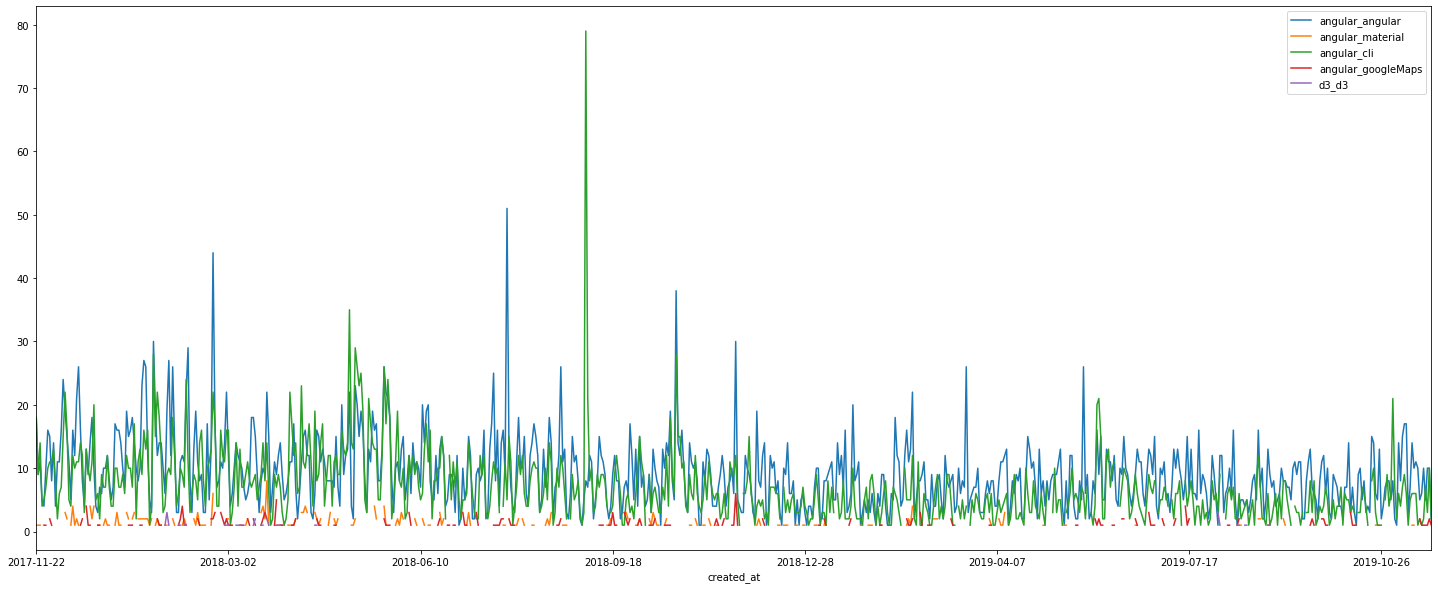

In [21]:
#2-A Line Chart to plot the issues for every Repo

issues_df.plot(figsize=(25,10))

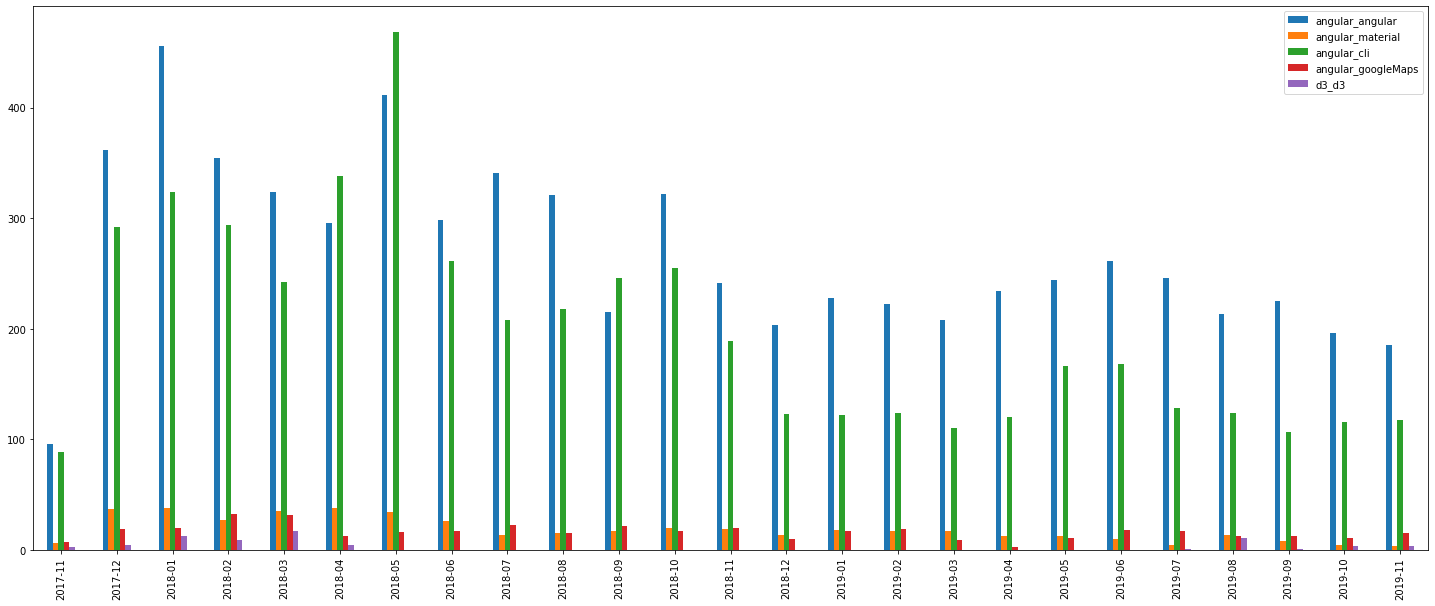

In [22]:
#3-A Bar Chart to plot the issues created for every month for every Repo

from pandas import DataFrame
monthlyIssues_df = DataFrame()

monthlyIssues_df['angular_angular']=angular_df['created_at'].apply(lambda x: dateutil.parser.parse(x).strftime('%Y-%m')).value_counts().sort_index()
monthlyIssues_df['angular_material']=material_df['created_at'].apply(lambda x: dateutil.parser.parse(x).strftime('%Y-%m')).value_counts().sort_index()
monthlyIssues_df['angular_cli']=angular_cli_df['created_at'].apply(lambda x: dateutil.parser.parse(x).strftime('%Y-%m')).value_counts().sort_index()
monthlyIssues_df['angular_googleMaps']=googleMaps_df['created_at'].apply(lambda x: dateutil.parser.parse(x).strftime('%Y-%m')).value_counts().sort_index()
monthlyIssues_df['d3_d3']=d3_df['created_at'].apply(lambda x: dateutil.parser.parse(x).strftime('%Y-%m')).value_counts().sort_index()

monthlyIssues_df
monthlyIssues_df.plot.bar(figsize=(25,10))



In [2]:
# Get all information about repositories

import json
import requests
import numpy as np
import pandas as pd
import requests
from requests.auth import HTTPBasicAuth

#credentials = json.loads(open('credentials.json').read())
#authentication = HTTPBasicAuth(credentials['username'], credentials['password'])

#data = requests.get('https://api.github.com/users/' + credentials['username'], auth = authentication)
#data = data.json()

url = 'https://api.github.com/repos/d3/d3'
page_no = 1
repos_data = []
while (True):
    response = requests.get(url)
    response = response.json()
    repos_data = repos_data + [response]
    repos_fetched = len(response)
    print("Total repositories fetched: {}".format(repos_fetched))
    if (repos_fetched == 30):
        page_no = page_no + 1
        url = data['repos_url'].encode("UTF-8") + '?page=' + str(page_no)
    else:
        break


repos_data

Total repositories fetched: 76


[{'id': 943149,
  'node_id': 'MDEwOlJlcG9zaXRvcnk5NDMxNDk=',
  'name': 'd3',
  'full_name': 'd3/d3',
  'private': False,
  'owner': {'login': 'd3',
   'id': 1562726,
   'node_id': 'MDEyOk9yZ2FuaXphdGlvbjE1NjI3MjY=',
   'avatar_url': 'https://avatars1.githubusercontent.com/u/1562726?v=4',
   'gravatar_id': '',
   'url': 'https://api.github.com/users/d3',
   'html_url': 'https://github.com/d3',
   'followers_url': 'https://api.github.com/users/d3/followers',
   'following_url': 'https://api.github.com/users/d3/following{/other_user}',
   'gists_url': 'https://api.github.com/users/d3/gists{/gist_id}',
   'starred_url': 'https://api.github.com/users/d3/starred{/owner}{/repo}',
   'subscriptions_url': 'https://api.github.com/users/d3/subscriptions',
   'organizations_url': 'https://api.github.com/users/d3/orgs',
   'repos_url': 'https://api.github.com/users/d3/repos',
   'events_url': 'https://api.github.com/users/d3/events{/privacy}',
   'received_events_url': 'https://api.github.com/users

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


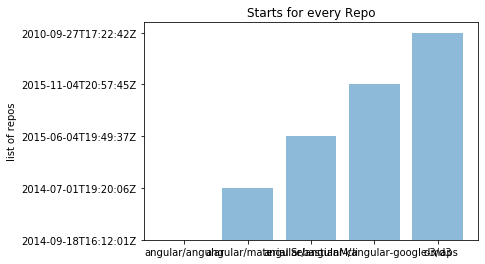

In [273]:
#4-A Bar Chart to plot the starts for every Repo

repos = ["angular/angular","angular/material","angular/angular-cli","SebastianM/angular-google-maps","d3/d3"]
y_pos = np.arange(len(repos))
repos_starts = ['2014-09-18T16:12:01Z','2014-07-01T19:20:06Z','2015-06-04T19:49:37Z','2015-11-04T20:57:45Z','2010-09-27T17:22:42Z']

plt.bar(y_pos, repos_starts, align='center', alpha=0.5)
plt.xticks(y_pos, repos)
plt.ylabel('list of repos')
plt.title('Starts for every Repo')

plt.show()

In [39]:
#5-A Bar Chart to plot the forks for every Repo

repos = ["angular/angular","angular/material","angular/angular-cli","SebastianM/angular-google-maps","d3/d3"]
dic = {}
for repo in repos:
    s = repo.split("/")
    gh = github3.login(token=GITHUB_TOKEN)
    repo = gh.repository(s[0],s[1])
    dic[s[1]] = repo.forks_count
print(dic)



INFO:github3:Building a url from ('https://api.github.com', 'repos', 'angular', 'angular')
INFO:github3:Missed the cache building the url
INFO:github3:JSON was returned
INFO:github3:Building a url from ('https://api.github.com', 'repos', 'angular', 'material')
INFO:github3:Missed the cache building the url
INFO:github3:JSON was returned
INFO:github3:Building a url from ('https://api.github.com', 'repos', 'angular', 'angular-cli')
INFO:github3:Missed the cache building the url
INFO:github3:JSON was returned
INFO:github3:Building a url from ('https://api.github.com', 'repos', 'SebastianM', 'angular-google-maps')
INFO:github3:Missed the cache building the url
INFO:github3:JSON was returned
INFO:github3:Building a url from ('https://api.github.com', 'repos', 'd3', 'd3')
INFO:github3:Missed the cache building the url
INFO:github3:JSON was returned


{'angular': 15029, 'material': 3602, 'angular-cli': 7959, 'angular-google-maps': 678, 'd3': 21560}


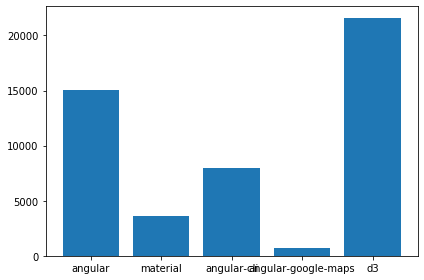

In [40]:
names = list(dic.keys())
values = list(dic.values())
plt.bar(range(len(dic)),values,tick_label=names)
plt.tight_layout()
plt.show()

C:\Users\Saeid\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated

C:\Users\Saeid\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated

C:\Users\Saeid\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated

C:\Users\Saeid\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning:


.ix i

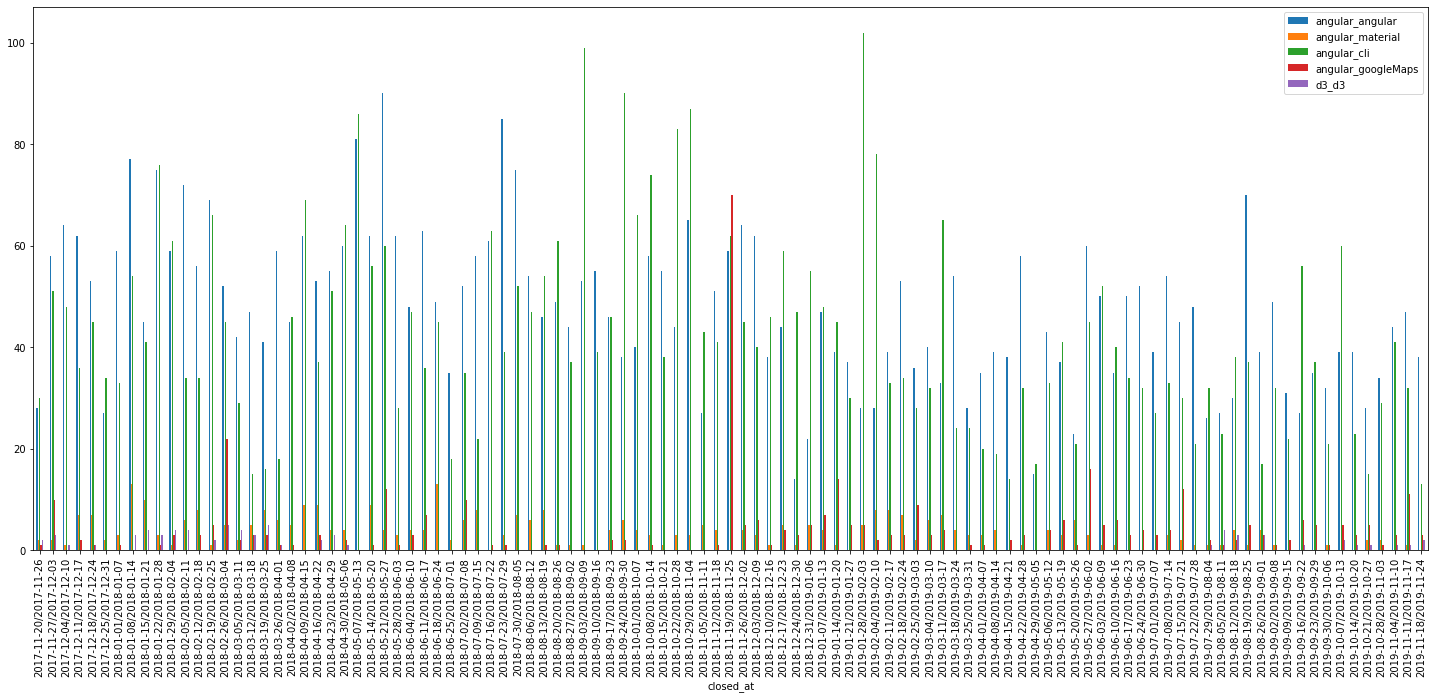

In [59]:
#6-A Bar Chart to plot the issues closed for every week for every Repo
from pandas import DataFrame
weeklyIssues_df = DataFrame()

weeklyIssues_df['angular_angular'] = (angular_df.groupby(pd.to_datetime(angular_df.closed_at).dt.to_period("W")).count()).ix[:,2]
weeklyIssues_df['angular_material'] = (material_df.groupby(pd.to_datetime(material_df.closed_at).dt.to_period("W")).count()).ix[:,0]
weeklyIssues_df['angular_cli'] = (angular_cli_df.groupby(pd.to_datetime(angular_cli_df.closed_at).dt.to_period("W")).count()).ix[:,0]
weeklyIssues_df['angular_googleMaps'] = (googleMaps_df.groupby(pd.to_datetime(googleMaps_df.closed_at).dt.to_period("W")).count()).ix[:,0]
weeklyIssues_df['d3_d3'] = (d3_df.groupby(pd.to_datetime(d3_df.closed_at).dt.to_period("W")).count()).ix[:,0]


weeklyIssues_df
weeklyIssues_df.plot.bar(figsize=(25,10))

(6702, 464, 4950, 410, 73)
(6702, 464, 4950, 410, 73, 71)


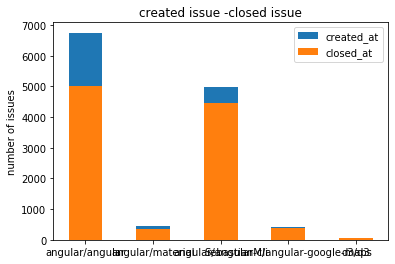

In [29]:
#7-A Stack-Bar Chart to plot the created and closed issues for every Repo
issue_created =()
issue_closed = ()

issue_created = issue_created + ((angular_df.groupby(['created_at']).created_at.count()).sum(),)
issue_created = issue_created + ((material_df.groupby(['created_at']).created_at.count()).sum(),)
issue_created = issue_created + ((angular_cli_df.groupby(['created_at']).created_at.count()).sum(),)
issue_created = issue_created + ((googleMaps_df.groupby(['created_at']).created_at.count()).sum(),)
issue_created = issue_created + ((d3_df.groupby(['created_at']).created_at.count()).sum(),)

issue_closed = issue_created + ((angular_df.groupby(['closed_at']).closed_at.count()).sum(),)
issue_closed = issue_created + ((material_df.groupby(['closed_at']).closed_at.count()).sum(),)
issue_closed = issue_created + ((angular_cli_df.groupby(['closed_at']).closed_at.count()).sum(),)
issue_closed = issue_created + ((googleMaps_df.groupby(['closed_at']).closed_at.count()).sum(),)
issue_closed = issue_created + ((d3_df.groupby(['closed_at']).closed_at.count()).sum(),)

print(issue_created)
print(issue_closed)
issue_created =(6752,454,4983,413,73)
issue_closed = (5001,356,4463,390,71)
ind=np.arange(5)
width = 0.5
created=plt.bar(ind, issue_created,width)
closed= plt.bar(ind, issue_closed,width)
plt.ylabel('number of issues')
plt.title('created issue -closed issue')
plt.xticks(ind,("angular/angular","angular/material","angular/angular-cli","SebastianM/angular-google-maps","d3/d3"))
plt.legend((created[0],closed[0]),('created_at','closed_at'))
plt.show()

In [ ]:
angular_df.to_csv('angular.csv', sep=',', encoding='utf-8', index=False)
material_df.to_csv('material.csv', sep=',', encoding='utf-8', index=False)
angular_cli_df.to_csv('angular_cli.csv', sep=',', encoding='utf-8', index=False)
googleMaps_df.to_csv('angular_google.csv', sep=',', encoding='utf-8', index=False)
d3_df.to_csv('d3.csv', sep=',', encoding='utf-8', index=False)

In [186]:
#I repeate below lines for every repo
newdf=d3_df.groupby(['created_at'], as_index = False).count()
dataFrame_createdIssue=newdf[['created_at','issue_number']]
dataFrame_createdIssue.columns = ['ds', 'y']
dataFrame_createdIssue.to_csv (r'd3.csv', index = None, header=True) 
dataFrame_createdIssue = pd.read_csv('d3.csv')
m = Prophet(daily_seasonality=True)
m.fit(dataFrame_createdIssue)
future = m.make_future_dataframe(periods=300)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()   
  


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


ds      yhat  yhat_lower  yhat_upper
356 2020-09-09  1.025601    0.449617    1.599444
357 2020-09-10  1.188955    0.630307    1.754797
358 2020-09-11  1.075309    0.538293    1.691704
359 2020-09-12  1.922657    1.293088    2.523822
360 2020-09-13  0.940812    0.365892    1.532478

In [167]:
#8-1-The day of the week maximum number of issues created for angular repo
#forecast['yhat_upper'].max()
forecast.loc[forecast['yhat_upper'] == 22.611488596141307, 'ds']

58   2018-01-17
Name: ds, dtype: datetime64[ns]

In [173]:
#8-1-The day of the week maximum number of issues created for material repo
#forecast['yhat_upper'].max()
forecast.loc[forecast['yhat_upper'] == 3.4735808199111684, 'ds']

25   2018-01-03
Name: ds, dtype: datetime64[ns]

In [176]:
#8-1-The day of the week maximum number of issues created for cli repo
#forecast['yhat_upper'].max()
forecast.loc[forecast['yhat_upper'] == 21.3722369936565, 'ds']

172   2018-05-11
Name: ds, dtype: datetime64[ns]

In [181]:
#8-1-The day of the week maximum number of issues created for google map repo
#forecast['yhat_upper'].max()
forecast.loc[forecast['yhat_upper'] == 3.0818713529188093, 'ds']

68   2018-03-26
Name: ds, dtype: datetime64[ns]

In [184]:
#8-1-The day of the week maximum number of issues created for d3 repo
#forecast['yhat_upper'].max()
forecast.loc[forecast['yhat_upper'] == 2.614211267020676, 'ds']

10   2018-01-20
Name: ds, dtype: datetime64[ns]

In [201]:
newdf=material_df.groupby(['closed_at'], as_index = False).count()
dataFrame_closedIssue=newdf[['closed_at','issue_number']]
dataFrame_closedIssue.columns = ['ds', 'y']
dataFrame_closedIssue.to_csv (r'material.csv', index = None, header=True) 
dataFrame_closedIssue = pd.read_csv('material.csv')
m = Prophet(daily_seasonality=True)
m.fit(dataFrame_closedIssue)
future = m.make_future_dataframe(periods=300)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()   

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


ds      yhat  yhat_lower  yhat_upper
484 2020-09-03  1.393003   -0.208768    3.065598
485 2020-09-04  0.819709   -0.840117    2.584170
486 2020-09-05  0.785879   -0.999293    2.551787
487 2020-09-06  0.993317   -0.655695    2.613921
488 2020-09-07  0.673826   -1.014742    2.195216

In [190]:
#8-2-The day of the week maximum number of issues closed for d3 repo
#forecast['yhat_upper'].max()
forecast.loc[forecast['yhat_upper'] == 2.3503084776185905, 'ds']

1   2017-11-29
Name: ds, dtype: datetime64[ns]

In [193]:
#8-2-The day of the week maximum number of issues closed for angular repo
#forecast['yhat_upper'].max()
forecast.loc[forecast['yhat_upper'] == 22.25532722388744, 'ds']

1   2017-11-21
Name: ds, dtype: datetime64[ns]

In [203]:
#8-2-The day of the week maximum number of issues closed for material repo
#forecast['yhat_upper'].max()
forecast.loc[forecast['yhat_upper'] == 4.400089574192524, 'ds']

29   2018-03-01
Name: ds, dtype: datetime64[ns]

In [199]:
#8-2-The day of the week maximum number of issues closed for cli repo
#forecast['yhat_upper'].max()
forecast.loc[forecast['yhat_upper'] == 20.681774323043363, 'ds']

284   2018-10-04
Name: ds, dtype: datetime64[ns]

In [196]:
#8-2-The day of the week maximum number of issues closed for map repo
#forecast['yhat_upper'].max()
forecast.loc[forecast['yhat_upper'] == 11.24133991787822, 'ds']

0   2017-11-21
Name: ds, dtype: datetime64[ns]

In [216]:
#8-3-The month of the year that has maximum number of issues closed
newdf=angular_df.groupby(['closed_at'], as_index = False).count()
dataFrame_closedIssue=newdf[['closed_at','issue_number']]
dataFrame_closedIssue.columns = ['ds', 'y']
dataFrame_closedIssue.to_csv (r'angular.csv', index = None, header=True) 
dataFrame_closedIssue = pd.read_csv('angular.csv')
m = Prophet(yearly_seasonality=True)
m.fit(dataFrame_closedIssue)
future = m.make_future_dataframe(periods=300, freq='M')
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()  


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds       yhat  yhat_lower  yhat_upper
960 2044-06-30 -42.056449  -51.707464  -33.428953
961 2044-07-31 -48.938342  -58.438119  -39.859908
962 2044-08-31 -42.942786  -52.851079  -34.199805
963 2044-09-30 -45.915358  -54.982081  -37.097504
964 2044-10-31 -45.176238  -55.116587  -36.678453

In [219]:
#8-3-The month of the year maximum number of issues closed for angular repo is 2017-11
#forecast['yhat_upper'].max()
forecast.loc[forecast['yhat_upper'] ==21.71794310316616, 'ds']

7   2017-11-28
Name: ds, dtype: datetime64[ns]

In [206]:
#8-3-The month of the year maximum number of issues closed for material repo is December 2017
#forecast['yhat_upper'].max()
forecast.loc[forecast['yhat_upper'] == 4.454624355263731, 'ds']

5   2017-12-21
Name: ds, dtype: datetime64[ns]

In [215]:
#8-3-The month of the year maximum number of issues closed for angular/cli repo is 2020-09
#forecast['yhat_upper'].max()
forecast.loc[forecast['yhat_upper'] == 2.9144117421212297, 'ds']

62   2020-09-30
Name: ds, dtype: datetime64[ns]

In [209]:
#8-3-The month of the year maximum number of issues closed for map repo is 2018-03
#forecast['yhat_upper'].max()
forecast.loc[forecast['yhat_upper'] == 10.903776648432228, 'ds']

18   2018-03-06
Name: ds, dtype: datetime64[ns]

In [212]:
#8-3-The month of the year maximum number of issues closed for d3 repo is 2020-09
#forecast['yhat_upper'].max()
forecast.loc[forecast['yhat_upper'] == 2.9144117421212297, 'ds']

62   2020-09-30
Name: ds, dtype: datetime64[ns]

In [163]:
#second approach
#8-Use Facebook/Prophet package
#8-1-The day of the week maximum number of issues created

def max_issues_created(dataframe):
    data = (dataframe.groupby(['created_at']).count().reset_index()).sort_values('issue_number', ascending=False).head(1).iloc[0]['created_at']
    return data

angular = max_issues_created(angular_df)
material = max_issues_created(material_df)
angularCli = max_issues_created(angular_cli_df)
angularGoogleMaps = max_issues_created(googleMaps_df)
d3 = max_issues_created(d3_df)

print("Maximum number of issues created for angular repository = ", angular, datetime.date(pd.to_datetime(angular)).strftime("%A"))
print("Maximum number of issues created for material repository= ", material, datetime.date(pd.to_datetime(material)).strftime("%A"))
print("Maximum number of issues created for angular-cli repository = ", angularCli , datetime.date(pd.to_datetime(angularCli)).strftime("%A"))
print("Maximum number of issues created for angular-google-maps repository= ", angularGoogleMaps, datetime.date(pd.to_datetime(angularGoogleMaps)).strftime("%A"))
print("Maximum number of issues created for repository d3", d3, datetime.date(pd.to_datetime(d3)).strftime("%A"))

Maximum number of issues created for angular repository =  2018-07-25 Wednesday
Maximum number of issues created for material repository=  2017-12-20 Wednesday
Maximum number of issues created for angular-cli repository =  2018-09-04 Tuesday
Maximum number of issues created for angular-google-maps repository=  2018-03-27 Tuesday
Maximum number of issues created for repository d3 2019-08-01 Thursday


In [139]:
#second approach
#8-Use Facebook/Prophet package
#8-2-The day of the week maximum number of issues closed


def max_issues_closed(dataframe):
    data = (dataframe.groupby(['closed_at']).count().reset_index()).sort_values('issue_number', ascending=False).head(1).iloc[0]['closed_at']
    return data

angular = max_issues_closed(angular_df)
material = max_issues_closed(material_df)
angularCli = max_issues_closed(angular_cli_df)
angularGoogleMaps = max_issues_closed(googleMaps_df)
d3 = max_issues_closed(d3_df)

print("Maximum number of issues closed for angular repository = ", angular, datetime.date(pd.to_datetime(angular)).strftime("%A"))
print("Maximum number of issues closed for material repository= ", material, datetime.date(pd.to_datetime(material)).strftime("%A"))
print("Maximum number of issues closed for angular-cli repository = ", angularCli , datetime.date(pd.to_datetime(angularCli)).strftime("%A"))
print("Maximum number of issues closed for angular-google-maps repository= ", angularGoogleMaps, datetime.date(pd.to_datetime(angularGoogleMaps)).strftime("%A"))
print("Maximum number of issues closed for repository d3", d3, datetime.date(pd.to_datetime(d3)).strftime("%A"))



Maximum number of issues closed for angular repository =  2018-07-26 Thursday
Maximum number of issues closed for material repository=  2018-06-22 Friday
Maximum number of issues closed for angular-cli repository =  2019-01-29 Tuesday
Maximum number of issues closed for angular-google-maps repository=  2018-11-20 Tuesday
Maximum number of issues closed for repository d3 2018-01-29 Monday


In [ ]:
#8-3-second approach
#The month of the year that has maximum number of issues closed

# Creating new dataframes and copying original dataframes
angular_df_ = angular_df.copy()
material_df_ = material_df.copy()
angular_cli_df_ = angular_df.copy()
angular_google_df_ = angular_google_df.copy()
d3_df_ = d3_df.copy()


angular_df_['closed_month'] = pd.to_datetime(angular_df['closed_at']).dt.to_period('M')
material_df_['closed_month'] = pd.to_datetime(material_df['closed_at']).dt.to_period('M')
angular_cli_df_['closed_month'] = pd.to_datetime(angular_df['closed_at']).dt.to_period('M')
angular_googleMaps_df_['closed_month'] = pd.to_datetime(angular_googleMaps_df['closed_at']).dt.to_period('M')
d3_df_['closed_month'] = pd.to_datetime(d3_df['closed_at']).dt.to_period('M')


Max_angular = angular_df_.groupby('closed_month').count()['issue_number'].idxmax(axis=0, skipna = True)
Max_material = material_df_.groupby('closed_month').count()['issue_number'].idxmax(axis=0, skipna = True)
Max_angularCli = angular_cli_df_.groupby('closed_month').count()['issue_number'].idxmax(axis=0, skipna = True)
Max_angularmaps = angular_googleMaps_df_.groupby('closed_month').count()['issue_number'].idxmax(axis=0, skipna = True)
Max_d3 = d3_df_.groupby('closed_month').count()['issue_number'].idxmax(axis=0, skipna = True)

print("maximum number of issues closed for angular repository :",Max_angular.strftime('%B %F'))
print("maximum number of issues closed for material repository :",Max_material.strftime('%B %F'))
print("maximum number of issues closed angular-cli repository :",Max_angularCli.strftime('%B %F'))
print("maximum number of issues closed angular-google-maps repository :",Max_angularmaps.strftime('%B %F'))
print("maximum number of issues closed d3 repository :",Max_d3.strftime('%B %F'))




#maximum number of issues closed for angular repository : May 2018
#maximum number of issues closed for material repository : January 2018
#maximum number of issues closed angular-cli repository : May 2018
#maximum number of issues closed angular-google-maps repository : November 2018
#maximum number of issues closed d3 repository : March 2018

In [221]:
#8-4- Plot the created issue forecast by calling the Prophet.plot method and passing in your forecast dataframe.
angular_df.to_csv('angular1.csv', sep=',', encoding='utf-8', index=False)
material_df.to_csv('material1.csv', sep=',', encoding='utf-8', index=False)
angular_cli_df.to_csv('angular_cli1.csv', sep=',', encoding='utf-8', index=False)
googleMaps_df.to_csv('angular_google1.csv', sep=',', encoding='utf-8', index=False)
d3_df.to_csv('d31.csv', sep=',', encoding='utf-8', index=False)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


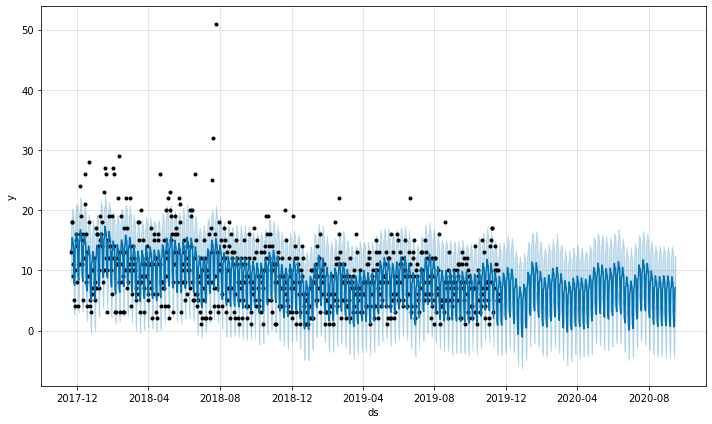

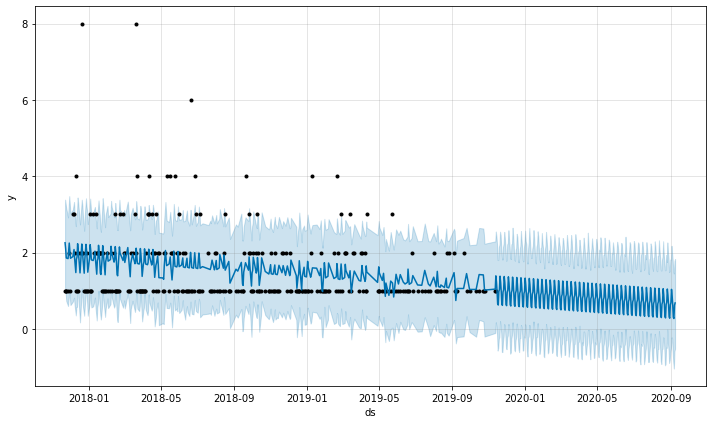

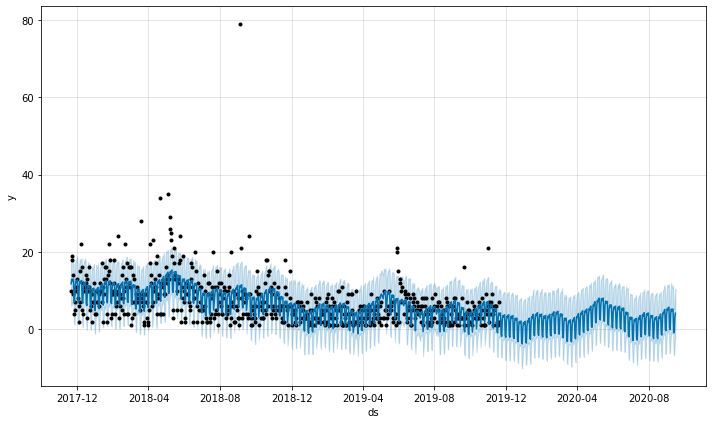

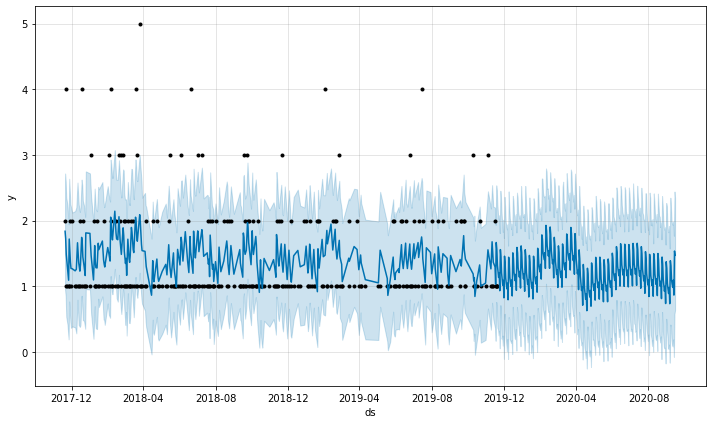

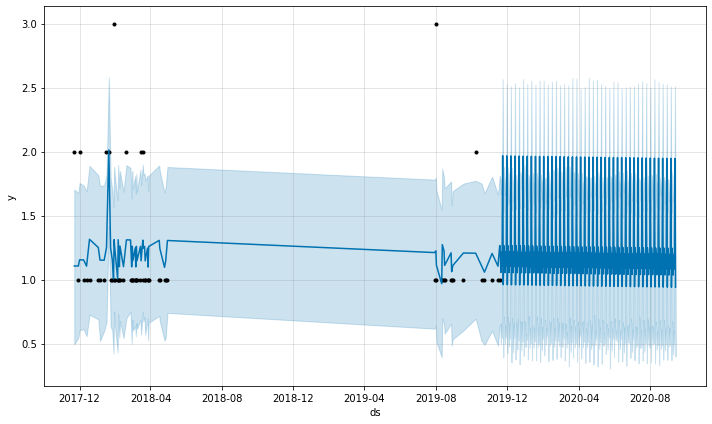

In [222]:

def prophet_forecast(csv_file):
    m = Prophet()
    df = pd.read_csv(csv_file)
    newdf = df['created_at'].value_counts().rename_axis('ds').reset_index(name='y')
    m.fit(newdf)
    future = m.make_future_dataframe(periods=300)
    forecast = m.predict(future)
    fig = m.plot(forecast)

prophet_forecast('angular1.csv')
prophet_forecast('material1.csv')
prophet_forecast('angular_cli1.csv')
prophet_forecast('angular_google1.csv')
prophet_forecast('d31.csv')



INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


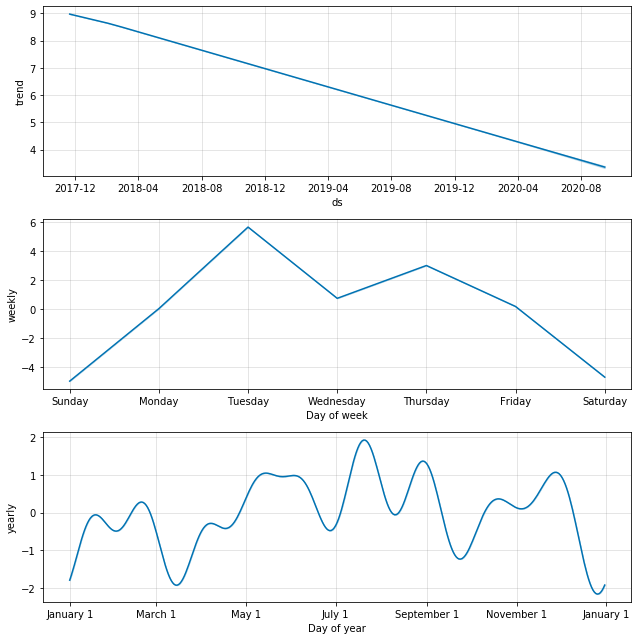

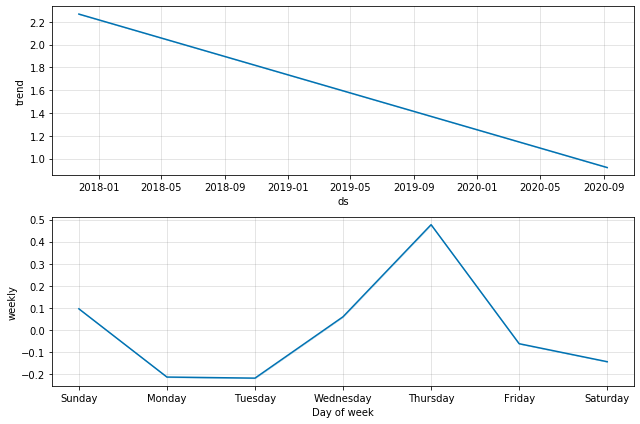

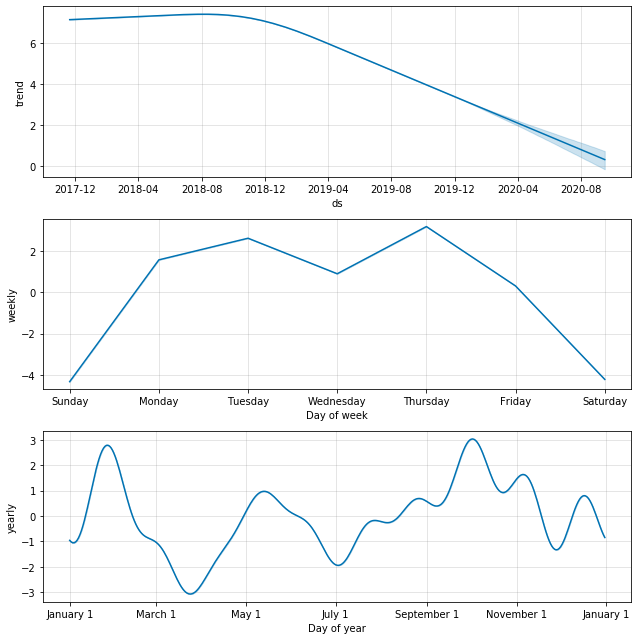

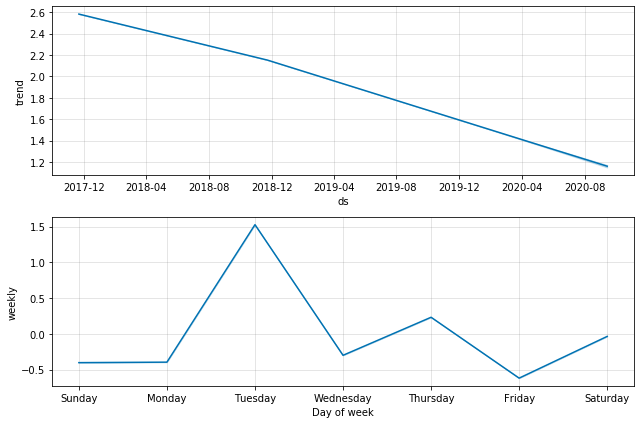

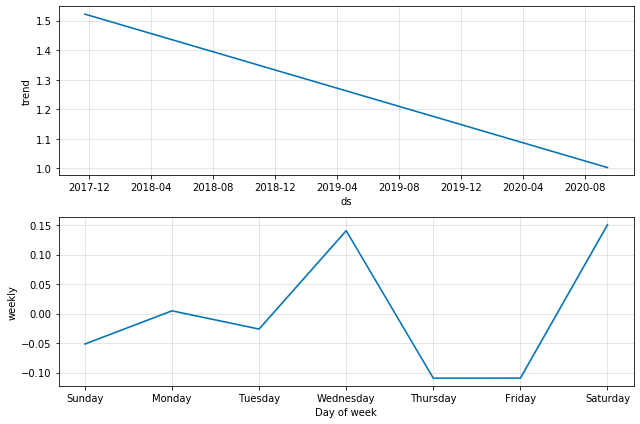

In [223]:
#8-5-Plot the closed issues forecast; use the Prophet.plot_components method.
def closed_prophet_forecast(csv_file):
    m = Prophet()
    df = pd.read_csv(csv_file)
    newdf = df['closed_at'].value_counts().rename_axis('ds').reset_index(name='y')
    m.fit(newdf)
    future = m.make_future_dataframe(periods=300)
    forecast = m.predict(future)
    fig = m.plot_components(forecast)

closed_prophet_forecast('angular1.csv')
closed_prophet_forecast('material1.csv')
closed_prophet_forecast('angular_cli1.csv')
closed_prophet_forecast('angular_google1.csv')
closed_prophet_forecast('d31.csv')

In [224]:
#8-6-Plot the pulls forecast; use the Prophet.plot_components method.

from github import Github
g = Github("d57d1988dd385e5b018cca5f5814c75e001c75de")
repo = g.get_repo("angular/material")
repo.name
pulls = repo.get_pulls(state='open', sort='created', base='master')
for pr in pulls:
    print(pr.number)

8713
8716
8970
8993
9220
9631
9641
9708
9871
9872
9940
10143
10287
10289
10399
10433
10478
10481
10491
10745
10773
10788
10826
10827
10871
11042
11135
11154
11156
11376
11378
11385
11390
11421
11438
11469
11578
11581
11649
11673
11761
11763
11771
11777
11787
11792
11798
11801
11802
11803
11804
11806
11808
11815
11816
11817
11818
11822


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


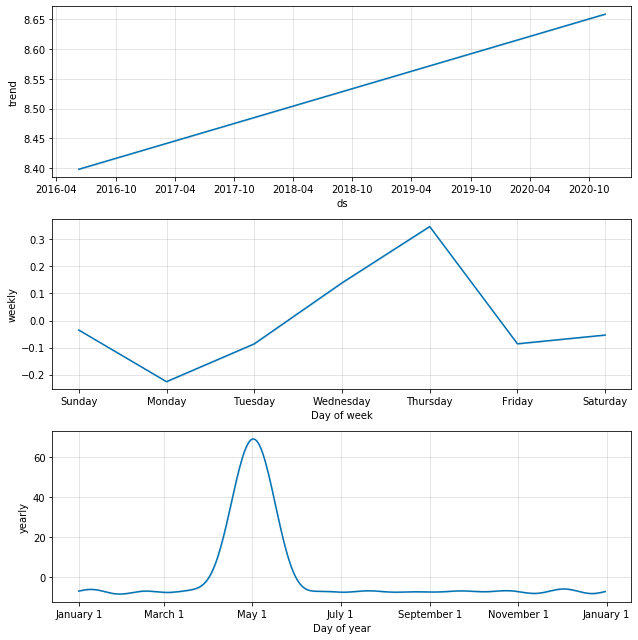

In [225]:
from github import Github
g = Github("d57d1988dd385e5b018cca5f5814c75e001c75de")
repo = g.get_repo("angular/material")
repo.name
pulls = repo.get_pulls(state='open', sort='created', base='master')
number_pulls_list = []
created_at_pulls_list = []
for pr in pulls:
   created_at_pulls_list = created_at_pulls_list + [datetime.date(pd.to_datetime(pr.created_at))]
   number_pulls_list = number_pulls_list + [int(pr.number)]
number_pulls_list
#print((number_pulls_list[1]))
pulls_df = DataFrame()
pulls_df['number'] = number_pulls_list
pulls_df['created_at'] = created_at_pulls_list
#print(pulls_df)
pulls_df.to_csv('angular_pull.csv', sep=',', encoding='utf-8', index=False)
def predict_plot_pulls(file):
   m = Prophet()
   df = pd.read_csv(file)
   df_pulls = df['created_at'].value_counts().rename_axis('ds').reset_index(name='y')
   m.fit(df_pulls)
   future = m.make_future_dataframe(periods=365)
   forecast = m.predict(future)
   fig1 = m.plot_components(forecast)
predict_plot_pulls('angular_pull.csv')

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


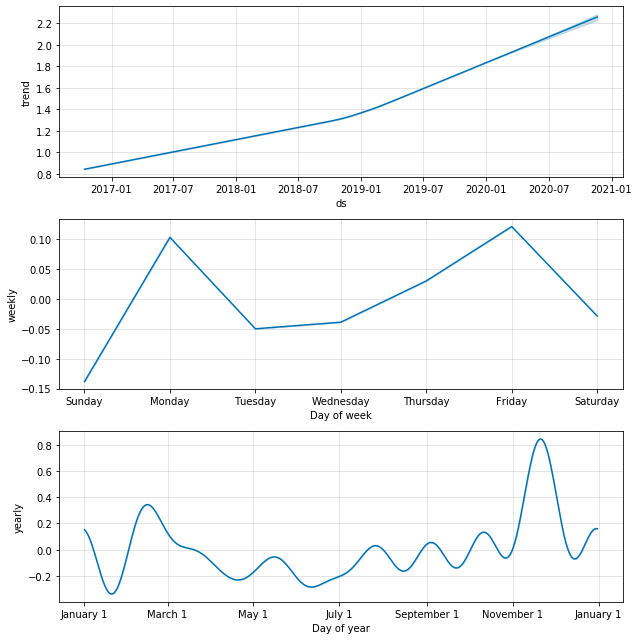

In [226]:
from github import Github
g = Github("d57d1988dd385e5b018cca5f5814c75e001c75de")
repo = g.get_repo("angular/angular")
repo.name
pulls = repo.get_pulls(state='open', sort='created', base='master')
number_pulls_list = []
created_at_pulls_list = []
for pr in pulls:
   created_at_pulls_list = created_at_pulls_list + [datetime.date(pd.to_datetime(pr.created_at))]
   number_pulls_list = number_pulls_list + [int(pr.number)]
number_pulls_list
#print((number_pulls_list[1]))
pulls_df = DataFrame()
pulls_df['number'] = number_pulls_list
pulls_df['created_at'] = created_at_pulls_list
#print(pulls_df)
pulls_df.to_csv('angular1_pull.csv', sep=',', encoding='utf-8', index=False)
def predict_plot_pulls(file):
   m = Prophet()
   df = pd.read_csv(file)
   df_pulls = df['created_at'].value_counts().rename_axis('ds').reset_index(name='y')
   m.fit(df_pulls)
   future = m.make_future_dataframe(periods=365)
   forecast = m.predict(future)
   fig1 = m.plot_components(forecast)
predict_plot_pulls('angular1_pull.csv')

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 12.


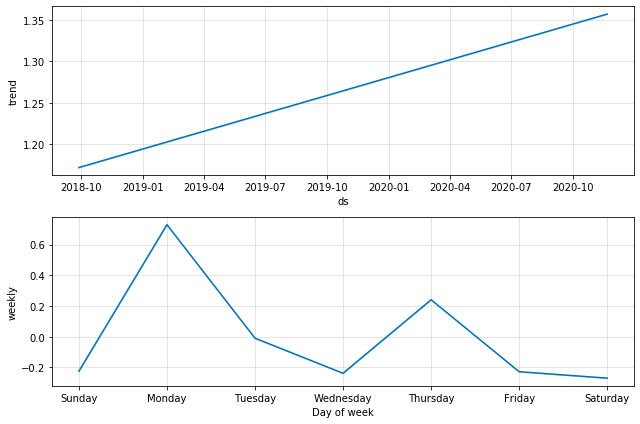

In [227]:
from github import Github
g = Github("d57d1988dd385e5b018cca5f5814c75e001c75de")
repo = g.get_repo("angular/angular-cli")
repo.name
pulls = repo.get_pulls(state='open', sort='created', base='master')
number_pulls_list = []
created_at_pulls_list = []
for pr in pulls:
   created_at_pulls_list = created_at_pulls_list + [datetime.date(pd.to_datetime(pr.created_at))]
   number_pulls_list = number_pulls_list + [int(pr.number)]
number_pulls_list
#print((number_pulls_list[1]))
pulls_df = DataFrame()
pulls_df['number'] = number_pulls_list
pulls_df['created_at'] = created_at_pulls_list
#print(pulls_df)
pulls_df.to_csv('angular-cli_pull.csv', sep=',', encoding='utf-8', index=False)
def predict_plot_pulls(file):
   m = Prophet()
   df = pd.read_csv(file)
   df_pulls = df['created_at'].value_counts().rename_axis('ds').reset_index(name='y')
   m.fit(df_pulls)
   future = m.make_future_dataframe(periods=365)
   forecast = m.predict(future)
   fig1 = m.plot_components(forecast)
predict_plot_pulls('angular-cli_pull.csv')

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 4.


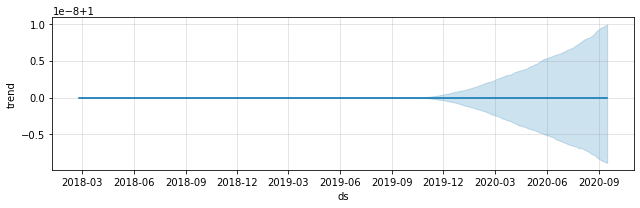

In [228]:
from github import Github
g = Github("d57d1988dd385e5b018cca5f5814c75e001c75de")
repo = g.get_repo("SebastianM/angular-google-maps")
repo.name
pulls = repo.get_pulls(state='open', sort='created', base='master')
number_pulls_list = []
created_at_pulls_list = []
for pr in pulls:
   created_at_pulls_list = created_at_pulls_list + [datetime.date(pd.to_datetime(pr.created_at))]
   number_pulls_list = number_pulls_list + [int(pr.number)]
number_pulls_list
#print((number_pulls_list[1]))
pulls_df = DataFrame()
pulls_df['number'] = number_pulls_list
pulls_df['created_at'] = created_at_pulls_list
#print(pulls_df)
pulls_df.to_csv('angular_googleMaps_pull.csv', sep=',', encoding='utf-8', index=False)
def predict_plot_pulls(file):
   m = Prophet()
   df = pd.read_csv(file)
   df_pulls = df['created_at'].value_counts().rename_axis('ds').reset_index(name='y')
   m.fit(df_pulls)
   future = m.make_future_dataframe(periods=365)
   forecast = m.predict(future)
   fig1 = m.plot_components(forecast)
predict_plot_pulls('angular_googleMaps_pull.csv')

In [30]:
# plotting for d3 repo

print("No graph is plotted for d3 pull")

No graph is plotted for d3 pull


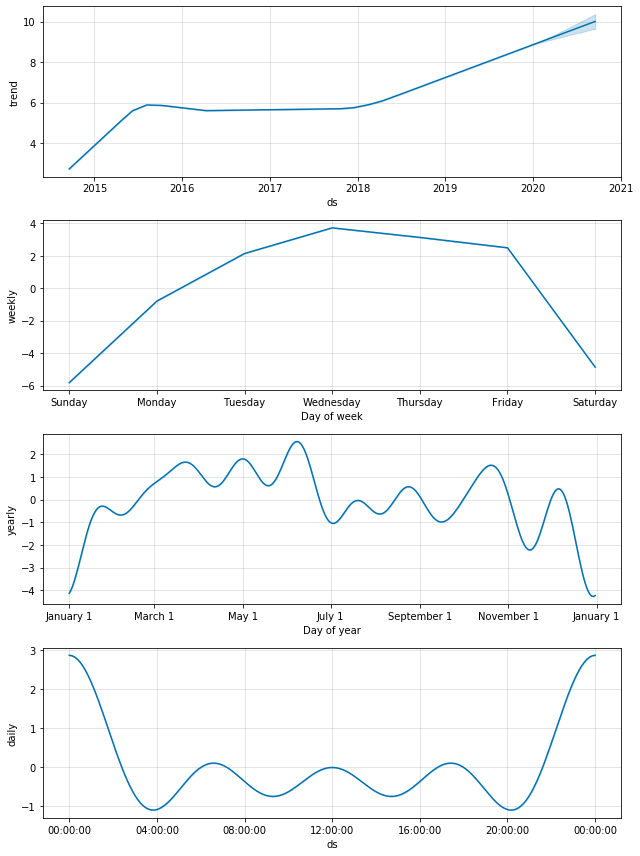

In [41]:
#8-7-Plot the commits forecast; use the Prophet.plot_components method.
from github import Github
g = Github("d57d1988dd385e5b018cca5f5814c75e001c75de")

def commit_info(repoName):
   repo = g.get_repo(repoName)
   commits = repo.get_commits()
   created_at_commits_list = []
   for ct in commits:
       created_at_commits_list = created_at_commits_list + [datetime.date(pd.to_datetime(ct.commit.author.date))]
   commit_df = DataFrame()
   commit_df['created_at'] = created_at_commits_list
   return commit_df

def predict_plot_commits(dfName):
   m = Prophet(yearly_seasonality=True, daily_seasonality=True)
   m.fit(dfName)
   future = m.make_future_dataframe(periods=300)
   forecast = m.predict(future)
   fig1 = m.plot_components(forecast)

def prophet_forecast_commits(new_df):
    c = new_df.groupby(['created_at'])['created_at']
    c1 = c.describe()
    temp = pd.DataFrame()
    temp = c1[['top', 'count']]
    temp.columns = ['ds', 'y']
    return temp

angular_commits_df = pd.DataFrame(commit_info('angular/angular'))
material_commits_df = pd.DataFrame(commit_info('angular/material'))
angular_cli_commits_df = pd.DataFrame(commit_info('angular/angular-cli'))
angular_googleMap_commits_df = pd.DataFrame(commit_info('SebastianM/angular-google-maps'))
d3_commits_df = pd.DataFrame(commit_info('d3/d3'))

#plotting for angular repo
predict_plot_commits(prophet_forecast_commits(angular_commits_df))


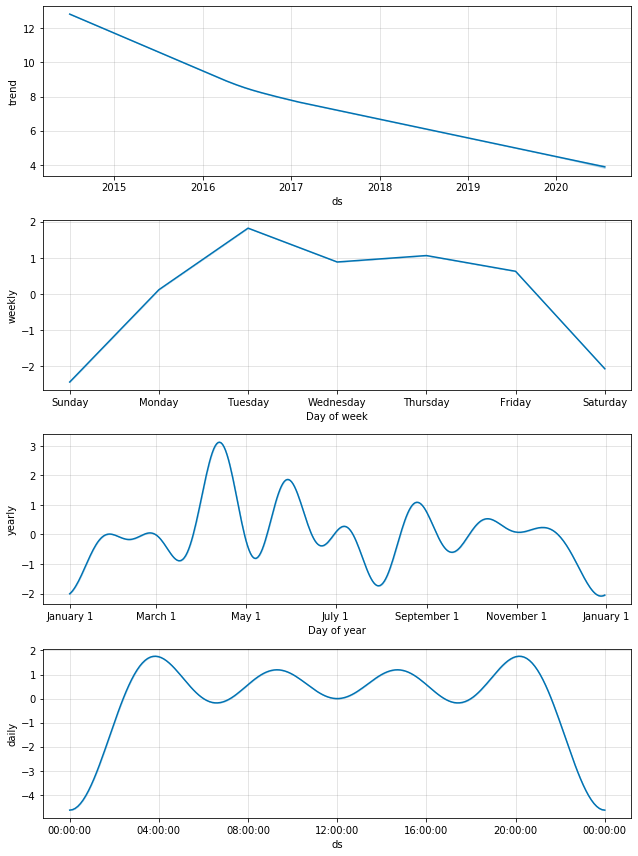

In [42]:
#plotting for material repo
predict_plot_commits(prophet_forecast_commits(material_commits_df))

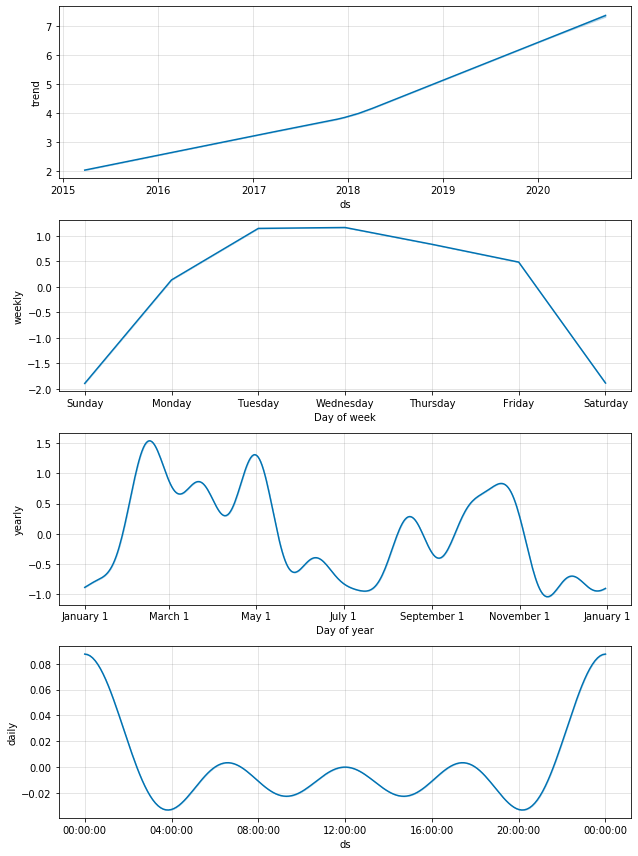

In [43]:
#plotting for angular-cli repo
predict_plot_commits(prophet_forecast_commits(angular_cli_commits_df))

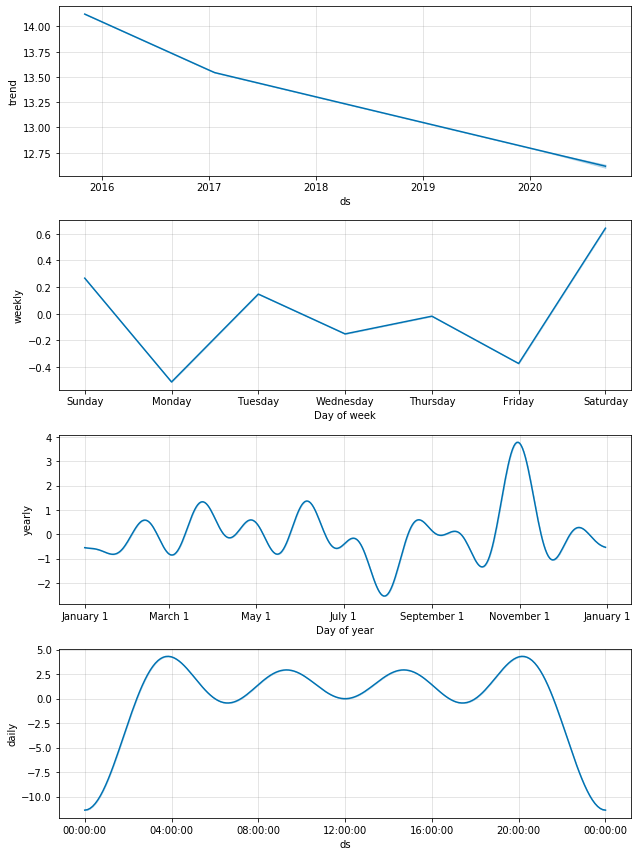

In [44]:
#plotting for google map repo
predict_plot_commits(prophet_forecast_commits(angular_googleMap_commits_df))

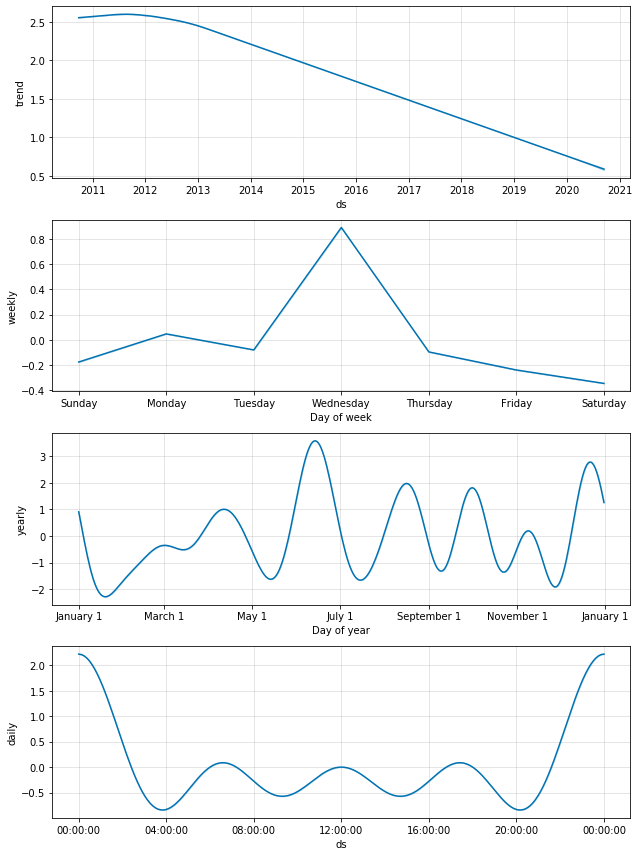

In [45]:
#plotting for d3 repo
predict_plot_commits(prophet_forecast_commits(d3_commits_df))

In [120]:
#8-8-Plot the branches forecast; use the Prophet.plot_components method.
import requests

def branch_info(file):
   repo = g.get_repo(file)
   print(repo)
   pulls = repo.get_branches()
   created_at_pulls_list = []
   for pr in pulls:
       created_at_pulls_list = created_at_pulls_list + [pr.commit.url]
   pulls_df = DataFrame()
   pulls_df['commit'] = created_at_pulls_list
   return pulls_df

def prophet_plot_branch(br_df):
    m = Prophet(yearly_seasonality=True)
    m.fit(br_df)
    future = m.make_future_dataframe(periods=300)
    forecast = m.predict(future)
    fig = m.plot_components(forecast)

def prophet_newdf_branches(newdf):
    b = newdf.groupby(['created_at'])['created_at']
    b1 = b.describe()
    temp = pd.DataFrame()
    temp = b1[['top', 'count']]
    temp.columns = ['ds', 'y']
    return temp

headers = {'Authorization': 'token ' + GITHUB_TOKEN}

def branchDate(all_urls):
    x = range(len(all_urls))
    created_at_branch = []
    branch_df = pd.DataFrame()
    for n in x:
        val = requests.get(all_urls.iloc[n], headers=headers)
        created_at_branch = created_at_branch +  [datetime.date(pd.to_datetime(val.json().get('commit').get('author').get('date')))]
    branch_df['created_at'] = created_at_branch
    return branch_df  


angular_branches_df = pd.DataFrame(branchDate(branch_info("angular/angular")['commit']))
material_branches_df = pd.DataFrame(branchDate(branch_info("angular/material")['commit']))
angular_cli_branches_df = pd.DataFrame(branchDate(branch_info("angular/angular-cli")['commit']))
angular_googleMaps_branches_df = pd.DataFrame(branchDate(branch_info("SebastianM/angular-google-maps")['commit']))
d3_branches_df = pd.DataFrame(branchDate(branch_info("d3/d3")['commit']))


Repository(full_name="angular/angular")
Repository(full_name="angular/material")
Repository(full_name="angular/angular-cli")
Repository(full_name="SebastianM/angular-google-maps")
Repository(full_name="d3/d3")


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


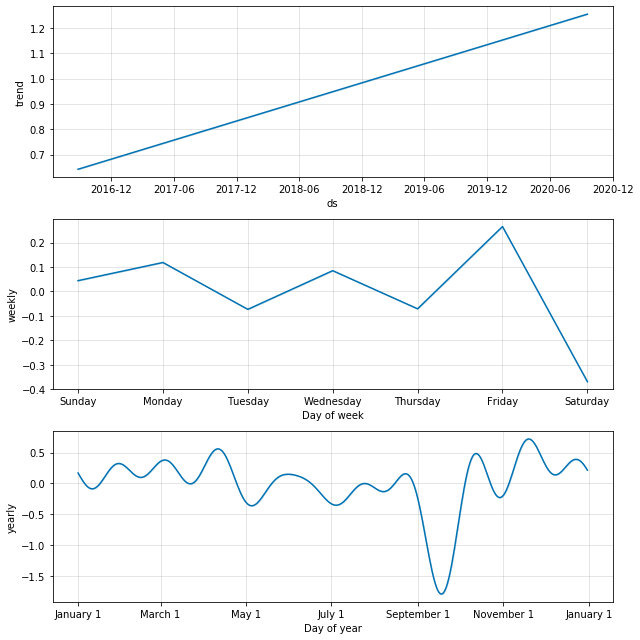

In [121]:
# plotting for angular repo
prophet_plot_branch(prophet_newdf_branches(angular_branches_df))

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


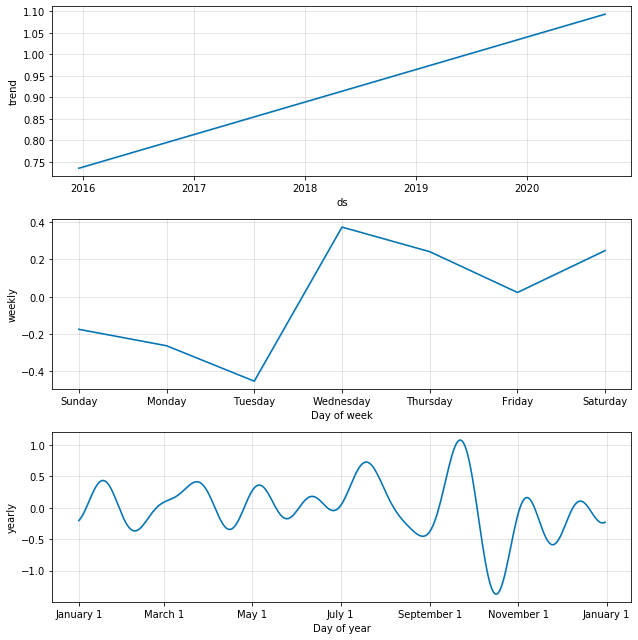

In [122]:
prophet_plot_branch(prophet_newdf_branches(material_branches_df))

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 21.


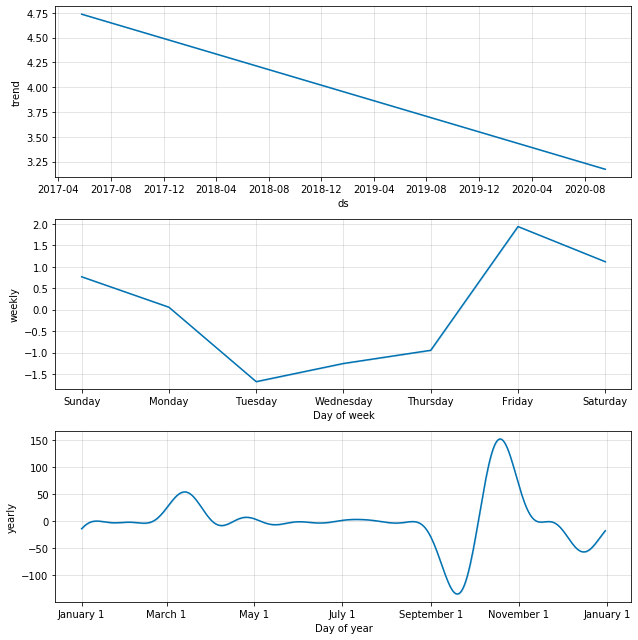

In [123]:
prophet_plot_branch(prophet_newdf_branches(angular_cli_branches_df))

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 5.


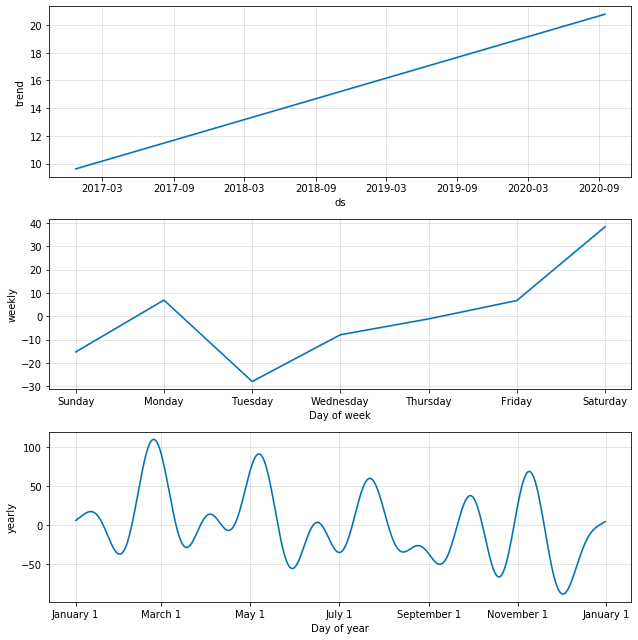

In [124]:
prophet_plot_branch(prophet_newdf_branches(angular_googleMaps_branches_df))

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 18.


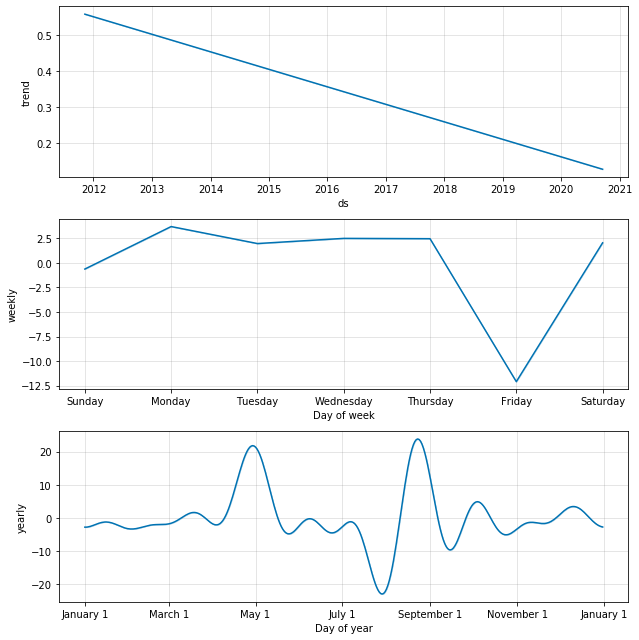

In [125]:
prophet_plot_branch(prophet_newdf_branches(d3_branches_df))

In [246]:
list(repo.get_contributors())

[NamedUser(login="SebastianM"),
 NamedUser(login="greenkeeperio-bot"),
 NamedUser(login="doom777"),
 NamedUser(login="jigfox"),
 NamedUser(login="DefJunx"),
 NamedUser(login="parmod-arora"),
 NamedUser(login="terencehonles"),
 NamedUser(login="IsaacSomething"),
 NamedUser(login="andir"),
 NamedUser(login="bmamey"),
 NamedUser(login="FrederikSchlemmer"),
 NamedUser(login="qfel13"),
 NamedUser(login="mpienkowski"),
 NamedUser(login="TSHiYK"),
 NamedUser(login="timhovius"),
 NamedUser(login="jinder"),
 NamedUser(login="lazarljubenovic"),
 NamedUser(login="IlianSchokkaert"),
 NamedUser(login="agustinbcu01"),
 NamedUser(login="brian-singer"),
 NamedUser(login="carl09"),
 NamedUser(login="chrene"),
 NamedUser(login="ComFreek"),
 NamedUser(login="CorneeSean"),
 NamedUser(login="dankreiger"),
 NamedUser(login="DaSchTour"),
 NamedUser(login="dariobraun"),
 NamedUser(login="demianh"),
 NamedUser(login="dangerdespain"),
 NamedUser(login="DimaNikishin"),
 NamedUser(login="DominikAngerer"),
 NamedU

In [265]:
list(repo.get_releases())

[GitRelease(title="v0.6.0"), GitRelease(title="")]

In [250]:
g = Github("d57d1988dd385e5b018cca5f5814c75e001c75de")
material_repo = g.get_repo("angular/material")
list(material_repo.get_branches())

[Branch(name="Splaktar-patch-1"),
 Branch(name="audit-fix-vulns"),
 Branch(name="autocomplete-chips-big-combined-pr"),
 Branch(name="changeTabMinWidth"),
 Branch(name="checkboxA11yLinks"),
 Branch(name="dependabot/npm_and_yarn/angular-1.7.9"),
 Branch(name="dependabot/npm_and_yarn/mixin-deep-1.3.2"),
 Branch(name="fixCodingGuideFormatting"),
 Branch(name="fixConflictWithBabelMinify"),
 Branch(name="fixDialogDocsTypo"),
 Branch(name="fixPanelReopenAnimation"),
 Branch(name="fixSelectKeyboardSearch"),
 Branch(name="fixSideNavDocs"),
 Branch(name="g3_v0_x"),
 Branch(name="list-ariaWarningSpan"),
 Branch(name="list-crossBrowserFix"),
 Branch(name="list-cutoffSubtext"),
 Branch(name="list-duplicateActions"),
 Branch(name="master"),
 Branch(name="mdTheme-contrastOpacities"),
 Branch(name="menu-fixContrastColors"),
 Branch(name="navBar-clickingScrolledTab"),
 Branch(name="ngChangeDocUpdate"),
 Branch(name="panel-offset-animation"),
 Branch(name="radio-button-code-cleanup"),
 Branch(name="rele

In [251]:
list(material_repo.get_contributors())

[NamedUser(login="ThomasBurleson"),
 NamedUser(login="robertmesserle"),
 NamedUser(login="ajoslin"),
 NamedUser(login="rschmukler"),
 NamedUser(login="devversion"),
 NamedUser(login="Splaktar"),
 NamedUser(login="crisbeto"),
 NamedUser(login="topherfangio"),
 NamedUser(login="jelbourn"),
 NamedUser(login="EladBezalel"),
 NamedUser(login="clshortfuse"),
 NamedUser(login="adamdbradley"),
 NamedUser(login="gkalpak"),
 NamedUser(login="ErinCoughlan"),
 NamedUser(login="mlynch"),
 NamedUser(login="kseamon"),
 NamedUser(login="matthewrfindley"),
 NamedUser(login="bradrich"),
 NamedUser(login="typotter"),
 NamedUser(login="btford"),
 NamedUser(login="matsko"),
 NamedUser(login="programmist"),
 NamedUser(login="codymikol"),
 NamedUser(login="epelc"),
 NamedUser(login="mmalerba"),
 NamedUser(login="petebacondarwin"),
 NamedUser(login="kara"),
 NamedUser(login="jesselpalmer"),
 NamedUser(login="KarenParker"),
 NamedUser(login="feloy"),
 NamedUser(login="marosoft"),
 NamedUser(login="rudzikdawid"

In [252]:
list(material_repo.get_releases())

[GitRelease(title="v0.6.0"), GitRelease(title="")]

In [253]:
g = Github("d57d1988dd385e5b018cca5f5814c75e001c75de")
angular_cli_repo = g.get_repo("angular/angular-cli")
list(angular_cli_repo.get_branches())

[Branch(name="1.0.x"),
 Branch(name="1.1.x"),
 Branch(name="1.2.x"),
 Branch(name="1.3.x"),
 Branch(name="1.4.x"),
 Branch(name="1.5.x"),
 Branch(name="1.6.x"),
 Branch(name="1.7.x"),
 Branch(name="6.0.x-devkit"),
 Branch(name="6.0.x"),
 Branch(name="6.1.x"),
 Branch(name="6.2.x"),
 Branch(name="7.0.x"),
 Branch(name="7.1.x"),
 Branch(name="7.2.x"),
 Branch(name="7.3.x"),
 Branch(name="8.0.x"),
 Branch(name="8.1.x"),
 Branch(name="8.2.x"),
 Branch(name="8.3.x"),
 Branch(name="9.0.x"),
 Branch(name="IgorMinar-patch-1"),
 Branch(name="cci-prev"),
 Branch(name="devkit"),
 Branch(name="hansl-release-process"),
 Branch(name="jbogarthyde-patch-1"),
 Branch(name="master"),
 Branch(name="polyfills-migration"),
 Branch(name="renovate/angular"),
 Branch(name="renovate/lock-file-maintenance"),
 Branch(name="renovate/rollup-1.x"),
 Branch(name="revert-15311-raw-loader")]

In [254]:
list(angular_cli_repo.get_contributors())

[NamedUser(login="filipesilva"),
 NamedUser(login="hansl"),
 NamedUser(login="clydin"),
 NamedUser(login="renovate-bot"),
 NamedUser(login="Brocco"),
 NamedUser(login="alan-agius4"),
 NamedUser(login="IgorMinar"),
 NamedUser(login="cexbrayat"),
 NamedUser(login="sumitarora"),
 NamedUser(login="alexeagle"),
 NamedUser(login="rodyhaddad"),
 NamedUser(login="jbogarthyde"),
 NamedUser(login="kyliau"),
 NamedUser(login="vikerman"),
 NamedUser(login="mgechev"),
 NamedUser(login="jkuri"),
 NamedUser(login="delasteve"),
 NamedUser(login="cironunes"),
 NamedUser(login="jeffbcross"),
 NamedUser(login="beeman"),
 NamedUser(login="alxhub"),
 NamedUser(login="catull"),
 NamedUser(login="ahasall"),
 NamedUser(login="Meligy"),
 NamedUser(login="noelmace"),
 NamedUser(login="ocombe"),
 NamedUser(login="TheLarkInn"),
 NamedUser(login="dgp1130"),
 NamedUser(login="sarunint"),
 NamedUser(login="wKoza"),
 NamedUser(login="FrozenPandaz"),
 NamedUser(login="cyrilletuzi"),
 NamedUser(login="gkalpak"),
 Named

In [256]:
list(angular_cli_repo.get_releases())

[GitRelease(title="v9.0.0-rc.3"),
 GitRelease(title=""),
 GitRelease(title=""),
 GitRelease(title=""),
 GitRelease(title=""),
 GitRelease(title="v8.3.17"),
 GitRelease(title=""),
 GitRelease(title="v8.3.16"),
 GitRelease(title="v9.0.0-next.19"),
 GitRelease(title="v9.0.0-next.15"),
 GitRelease(title="v8.3.14"),
 GitRelease(title="v9.0.0-next.14"),
 GitRelease(title="v8.3.13"),
 GitRelease(title="v9.0.0-next.13"),
 GitRelease(title="v9.0.0-next.11"),
 GitRelease(title="v9.0.0-next.10"),
 GitRelease(title="v9.0.0-next.12"),
 GitRelease(title="v8.3.12"),
 GitRelease(title="v8.3.10"),
 GitRelease(title=""),
 GitRelease(title=""),
 GitRelease(title="v9.0.0-next.8"),
 GitRelease(title="v8.3.8"),
 GitRelease(title="v9.0.0-next.7"),
 GitRelease(title="v8.3.7"),
 GitRelease(title=""),
 GitRelease(title="v9.0.0-next.6"),
 GitRelease(title=""),
 GitRelease(title=""),
 GitRelease(title="v8.3.4"),
 GitRelease(title="v9.0.0-next.4"),
 GitRelease(title="v9.0.0-next.3"),
 GitRelease(title="v8.3.3"),
 

In [258]:
g = Github("d57d1988dd385e5b018cca5f5814c75e001c75de")
google_repo = g.get_repo("SebastianM/angular-google-maps")
list(google_repo.get_branches())

[Branch(name="1.x"),
 Branch(name="branding"),
 Branch(name="change-name"),
 Branch(name="docs"),
 Branch(name="jest"),
 Branch(name="master"),
 Branch(name="newdocs"),
 Branch(name="snazzy-maps"),
 Branch(name="trigger-resizer-recenter")]

In [259]:
list(google_repo.get_contributors())

[NamedUser(login="SebastianM"),
 NamedUser(login="greenkeeperio-bot"),
 NamedUser(login="doom777"),
 NamedUser(login="jigfox"),
 NamedUser(login="DefJunx"),
 NamedUser(login="parmod-arora"),
 NamedUser(login="terencehonles"),
 NamedUser(login="IsaacSomething"),
 NamedUser(login="andir"),
 NamedUser(login="bmamey"),
 NamedUser(login="FrederikSchlemmer"),
 NamedUser(login="qfel13"),
 NamedUser(login="mpienkowski"),
 NamedUser(login="TSHiYK"),
 NamedUser(login="timhovius"),
 NamedUser(login="jinder"),
 NamedUser(login="lazarljubenovic"),
 NamedUser(login="IlianSchokkaert"),
 NamedUser(login="agustinbcu01"),
 NamedUser(login="brian-singer"),
 NamedUser(login="carl09"),
 NamedUser(login="chrene"),
 NamedUser(login="ComFreek"),
 NamedUser(login="CorneeSean"),
 NamedUser(login="dankreiger"),
 NamedUser(login="DaSchTour"),
 NamedUser(login="dariobraun"),
 NamedUser(login="demianh"),
 NamedUser(login="dangerdespain"),
 NamedUser(login="DimaNikishin"),
 NamedUser(login="DominikAngerer"),
 NamedU

In [260]:
list(google_repo.get_releases())

[]

In [261]:
g = Github("d57d1988dd385e5b018cca5f5814c75e001c75de")
d3_repo = g.get_repo("d3/d3")
list(d3_repo.get_branches())

[Branch(name="4"),
 Branch(name="adopt"),
 Branch(name="better-subsecond-ticks"),
 Branch(name="bower-metadata"),
 Branch(name="decouple-clip-rotate"),
 Branch(name="dsv-parse-type"),
 Branch(name="environment"),
 Branch(name="extensible-interpolate"),
 Branch(name="fix-drag-touchend"),
 Branch(name="fix-geo-area"),
 Branch(name="fix-ie9-string-coercion"),
 Branch(name="fix-monotone"),
 Branch(name="fix-resample-caching"),
 Branch(name="fix-treemap"),
 Branch(name="geo-voronoi"),
 Branch(name="get-or-remove-tween"),
 Branch(name="gh-pages-old"),
 Branch(name="graphics-pipeline"),
 Branch(name="line-copy"),
 Branch(name="master"),
 Branch(name="native-map"),
 Branch(name="property"),
 Branch(name="remove-beta"),
 Branch(name="rotate-as-stream"),
 Branch(name="zoom-translate-extent")]

In [263]:
list(d3_repo.get_contributors())

[NamedUser(login="mbostock"),
 NamedUser(login="jasondavies"),
 NamedUser(login="kitmonisit"),
 NamedUser(login="27359794"),
 NamedUser(login="larskotthoff"),
 NamedUser(login="natevw"),
 NamedUser(login="yasirs"),
 NamedUser(login="square-build-bot"),
 NamedUser(login="jheer"),
 NamedUser(login="leodutra"),
 NamedUser(login="scottcheng"),
 NamedUser(login="mrcarlosrendon"),
 NamedUser(login="NelsonMinar"),
 NamedUser(login="webmonarch"),
 NamedUser(login="hlvoorhees"),
 NamedUser(login="trevnorris"),
 NamedUser(login="dandv"),
 NamedUser(login="pjjw"),
 NamedUser(login="curran"),
 NamedUser(login="jfirebaugh"),
 NamedUser(login="mrblueblue"),
 NamedUser(login="splendido"),
 NamedUser(login="snoble"),
 NamedUser(login="iterion"),
 NamedUser(login="zenmoto"),
 NamedUser(login="trinary"),
 NamedUser(login="GerHobbelt"),
 NamedUser(login="jisaacks"),
 NamedUser(login="dwt"),
 NamedUser(login="notlion"),
 NamedUser(login="tbranyen"),
 NamedUser(login="alexmacy"),
 NamedUser(login="kmindi")

In [264]:
list(d3_repo.get_releases())

[GitRelease(title=""),
 GitRelease(title=""),
 GitRelease(title=""),
 GitRelease(title=""),
 GitRelease(title=""),
 GitRelease(title=""),
 GitRelease(title=""),
 GitRelease(title=""),
 GitRelease(title=""),
 GitRelease(title=""),
 GitRelease(title=""),
 GitRelease(title=""),
 GitRelease(title=""),
 GitRelease(title=""),
 GitRelease(title=""),
 GitRelease(title=""),
 GitRelease(title=""),
 GitRelease(title=""),
 GitRelease(title=""),
 GitRelease(title=""),
 GitRelease(title=""),
 GitRelease(title=""),
 GitRelease(title=""),
 GitRelease(title=""),
 GitRelease(title=""),
 GitRelease(title=""),
 GitRelease(title=""),
 GitRelease(title=""),
 GitRelease(title=""),
 GitRelease(title=""),
 GitRelease(title=""),
 GitRelease(title="5.0.0"),
 GitRelease(title=""),
 GitRelease(title=""),
 GitRelease(title=""),
 GitRelease(title=""),
 GitRelease(title=""),
 GitRelease(title=""),
 GitRelease(title=""),
 GitRelease(title=""),
 GitRelease(title=""),
 GitRelease(title=""),
 GitRelease(title=""),
 GitRe

In [57]:
#using statsmodel
#The day of the week maximum number of issues created

df_sm = pd.read_csv('angular.csv')
df_sm.set_index('ds')
predict = sm.tsa.seasonal_decompose(df_sm.index, freq='D')
#figure = predict.plot()
figure.set_size_inches(15, 8)
model = sm.tsa.ARIMA(df_sm['y'].iloc[1:], order = (1, 0, 0))
results = model.fit()
df_sm['forecast'] = results.fittedvalues
#df_sm[['y', 'forecast']].plot(figsize=(15,8))


maxIssue = df_sm['forecast'].max()
print(maxIssue)
df_sm.loc[df_sm['forecast'] == 12.589544045366345]



12.589544045366345


ds  y   forecast
238  2018-07-27  5  12.589544

In [59]:
#using statsmodel
#The day of the week maximum number of issues created

df_sm = pd.read_csv('material.csv')
df_sm.set_index('ds')
predict = sm.tsa.seasonal_decompose(df_sm.index, freq='D')
#figure = predict.plot()
figure.set_size_inches(15, 8)
model = sm.tsa.ARIMA(df_sm['y'].iloc[1:], order = (1, 0, 0))
results = model.fit()
df_sm['forecast'] = results.fittedvalues
#df_sm[['y', 'forecast']].plot(figsize=(15,8))


maxIssue = df_sm['forecast'].max()
print(maxIssue)
df_sm.loc[df_sm['forecast'] == 2.242155198213794]



2.242155198213794


ds  y  forecast
74  2018-06-26  1  2.242155

In [61]:
#using statsmodel
#The day of the week maximum number of issues created

df_sm = pd.read_csv('angular_cli.csv')
df_sm.set_index('ds')
predict = sm.tsa.seasonal_decompose(df_sm.index, freq='D')
#figure = predict.plot()
figure.set_size_inches(15, 8)
model = sm.tsa.ARIMA(df_sm['y'].iloc[1:], order = (1, 0, 0))
results = model.fit()
df_sm['forecast'] = results.fittedvalues
#df_sm[['y', 'forecast']].plot(figsize=(15,8))


maxIssue = df_sm['forecast'].max()
print(maxIssue)
df_sm.loc[df_sm['forecast'] == 14.806298879389704]



14.806298879389704


ds  y   forecast
398  2019-01-30  7  14.806299

In [65]:
#using statsmodel
#The day of the week maximum number of issues created

df_sm = pd.read_csv('angular_google.csv')
df_sm.set_index('ds')
predict = sm.tsa.seasonal_decompose(df_sm.index, freq='D')
#figure = predict.plot()
figure.set_size_inches(15, 8)
model = sm.tsa.ARIMA(df_sm['y'].iloc[1:], order = (1, 0, 0))
results = model.fit()
df_sm['forecast'] = results.fittedvalues
#df_sm[['y', 'forecast']].plot(figsize=(15,8))


maxIssue = df_sm['forecast'].max()
print(maxIssue)
df_sm.loc[df_sm['forecast'] == 2.1904518754790234]



2.1904518754790234


ds  y  forecast
4    2018-01-03  1  2.190452
5    2018-01-22  1  2.190452
6    2018-01-31  1  2.190452
7    2018-02-01  1  2.190452
8    2018-02-02  1  2.190452
..          ... ..       ...
172  2019-11-05  2  2.190452
176  2019-11-16  1  2.190452
177  2019-11-17  1  2.190452
178  2019-11-18  1  2.190452
179  2019-11-19  2  2.190452

[117 rows x 3 columns]

In [69]:
#using statsmodel
#The day of the week maximum number of issues created
print("d3 does not give  maximum number of issues created")



d3 does not give  maximum number of issues created


In [138]:
#using statsmodel
#The day of the week maximum number of issues closed

newdf=angular_df.groupby(['closed_at'], as_index = False).count()
dataFrame_closedIssue=newdf[['closed_at','issue_number']]
dataFrame_closedIssue.columns = ['ds', 'y']
dataFrame_closedIssue.to_csv (r'angular.csv', index = None, header=True) 
dataFrame_closedIssue = pd.read_csv('angular.csv')
dataFrame_closedIssue.set_index('ds')
predict = sm.tsa.seasonal_decompose(dataFrame_closedIssue.index, freq='D')
#figure = predict.plot()
#figure.set_size_inches(15, 8)
model = sm.tsa.ARIMA(dataFrame_closedIssue['y'].iloc[1:], order = (1, 0, 0))
results = model.fit()
dataFrame_closedIssue['forecast'] = results.fittedvalues
#dataFrame_closedIssue[['y', 'forecast']].plot(figsize=(15,8))



maxIssue = dataFrame_closedIssue['forecast'].max()
print(maxIssue)
dataFrame_closedIssue.loc[dataFrame_closedIssue['forecast'] == 12.824343818944156]




12.824343818944156


ds  y   forecast
235  2018-07-27  5  12.824344

In [95]:
#using statsmodel
#The day of the week maximum number of issues closed

newdf=material_df.groupby(['closed_at'], as_index = False).count()
dataFrame_closedIssue=newdf[['closed_at','issue_number']]
dataFrame_closedIssue.columns = ['ds', 'y']
dataFrame_closedIssue.to_csv (r'material.csv', index = None, header=True) 
dataFrame_closedIssue = pd.read_csv('material.csv')
dataFrame_closedIssue.set_index('ds')
predict = sm.tsa.seasonal_decompose(dataFrame_closedIssue.index, freq='D')
#figure = predict.plot()
figure.set_size_inches(15, 8)
model = sm.tsa.ARIMA(dataFrame_closedIssue['y'].iloc[1:], order = (1, 0, 0))
results = model.fit()
dataFrame_closedIssue['forecast'] = results.fittedvalues
#dataFrame_closedIssue[['y', 'forecast']].plot(figsize=(15,8))



maxIssue = dataFrame_closedIssue['forecast'].max()
print(maxIssue)
dataFrame_closedIssue.loc[dataFrame_closedIssue['forecast'] == 2.0478216968362206]




2.0478216968362206


ds  y  forecast
74  2018-06-26  1  2.047822

In [93]:
#using statsmodel
#The day of the week maximum number of issues closed

newdf=angular_cli_df.groupby(['closed_at'], as_index = False).count()
dataFrame_closedIssue=newdf[['closed_at','issue_number']]
dataFrame_closedIssue.columns = ['ds', 'y']
dataFrame_closedIssue.to_csv (r'angular_cli.csv', index = None, header=True) 
dataFrame_closedIssue = pd.read_csv('angular_cli.csv')
dataFrame_closedIssue.set_index('ds')
predict = sm.tsa.seasonal_decompose(dataFrame_closedIssue.index, freq='D')
#figure = predict.plot()
figure.set_size_inches(15, 8)
model = sm.tsa.ARIMA(dataFrame_closedIssue['y'].iloc[1:], order = (1, 0, 0))
results = model.fit()
dataFrame_closedIssue['forecast'] = results.fittedvalues
#dataFrame_closedIssue[['y', 'forecast']].plot(figsize=(15,8))



maxIssue = dataFrame_closedIssue['forecast'].max()
print(maxIssue)
dataFrame_closedIssue.loc[dataFrame_closedIssue['forecast'] == 14.570866769722503]




14.570866769722503


ds  y   forecast
396  2019-01-30  6  14.570867

In [91]:
#using statsmodel
#The day of the week maximum number of issues closed

newdf=googleMaps_df.groupby(['closed_at'], as_index = False).count()
dataFrame_closedIssue=newdf[['closed_at','issue_number']]
dataFrame_closedIssue.columns = ['ds', 'y']
dataFrame_closedIssue.to_csv (r'angular_google.csv', index = None, header=True) 
dataFrame_closedIssue = pd.read_csv('angular_google.csv')
dataFrame_closedIssue.set_index('ds')
predict = sm.tsa.seasonal_decompose(dataFrame_closedIssue.index, freq='D')
#figure = predict.plot()
figure.set_size_inches(15, 8)
model = sm.tsa.ARIMA(dataFrame_closedIssue['y'].iloc[1:], order = (1, 0, 0))
results = model.fit()
dataFrame_closedIssue['forecast'] = results.fittedvalues
#dataFrame_closedIssue[['y', 'forecast']].plot(figsize=(15,8))



maxIssue = dataFrame_closedIssue['forecast'].max()
print(maxIssue)
dataFrame_closedIssue.loc[dataFrame_closedIssue['forecast'] == 2.1468460955962456]




2.1468460955962456


ds   y  forecast
49  2018-11-20  65  2.146846

In [152]:
#using statsmodel
#The day of the week maximum number of issues closed

newdf=d3_df.groupby(['closed_at'], as_index = False).count()
dataFrame_closedIssue=newdf[['closed_at','issue_number']]
dataFrame_closedIssue.columns = ['ds', 'y']
dataFrame_closedIssue.to_csv (r'd3D.csv', index = None, header=True) 
dataFrame_closedIssue = pd.read_csv('d3D.csv')
dataFrame_closedIssue.set_index('ds')
dataFrame_closedIssue['ds_new'] = pd.to_datetime(dataFrame_closedIssue['ds']) - pd.to_timedelta(7, unit='d')
df_weekly_max = dataFrame_closedIssue.reset_index().groupby([pd.Grouper(key='ds_new', freq='W-MON')]).apply(lambda x: x.loc[x.y == x.y.max(),['original','y']])
df_new = pd.DataFrame()
df_new = df_weekly_max[['original','y']]
df_new.columns = ['ds','y']
#figure = predict.plot()
#figure.set_size_inches(15, 8)
model = sm.tsa.ARIMA(df_new['y'].iloc[1:], order = (1, 0, 0))
results = model.fit()
df_new['forecast'] = results.fittedvalues
#dataFrame_closedIssue[['y', 'forecast']].plot(figsize=(15,8))



maxIssue = df_new['forecast'].max()
print(maxIssue)
df_new.loc[df_new['forecast'] == 1.485749430508831]




1.485749430508831


C:\Users\Saeid\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



ds  y  forecast
ds_new                        
2018-01-29 11 NaN  1  1.485749
2018-02-12 14 NaN  2  1.485749

In [140]:
#using statsmodel
#The maximum number of issues closed monthly
newdf=angular_df.groupby(['closed_at'], as_index = False).count()
dataFrame_closedIssue=newdf[['closed_at','issue_number']]
dataFrame_closedIssue.columns = ['ds', 'y']
dataFrame_closedIssue.to_csv (r'angularM.csv', index = None, header=True) 
dataFrame_closedIssue = pd.read_csv('angularM.csv')
dataFrame_closedIssue.set_index('ds')
dataFrame_closedIssue['ds_new'] = pd.to_datetime(dataFrame_closedIssue['ds']) - pd.to_timedelta(7, unit='d')
df_monthly_max = dataFrame_closedIssue.reset_index().groupby([pd.Grouper(key='ds_new', freq='M')]).apply(lambda x: x.loc[x.y == x.y.max(),['original','y']])
df_new = pd.DataFrame()
df_new = df_monthly_max[['original','y']]
df_new.columns = ['ds','y']

#predict = sm.tsa.seasonal_decompose(dataFrame_closedIssue.index, freq='W-MON')
#figure = predict.plot()
#figure.set_size_inches(15, 8)
model = sm.tsa.ARIMA(df_new['y'].iloc[1:], order = (1, 0, 0))
results = model.fit()
df_new['forecast'] = results.fittedvalues
#dataFrame_closedIssue[['y', 'forecast']].plot(figsize=(15,8))



maxIssue = df_new['forecast'].max()
print(maxIssue)
df_new.loc[df_new['forecast'] == 26.168209512327994]





26.168209512327994


C:\Users\Saeid\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



ds   y  forecast
ds_new                          
2018-08-31 268 NaN  27  26.16821

In [148]:
#using statsmodel
#The maximum number of issues closed monthly
newdf=material_df.groupby(['closed_at'], as_index = False).count()
dataFrame_closedIssue=newdf[['closed_at','issue_number']]
dataFrame_closedIssue.columns = ['ds', 'y']
dataFrame_closedIssue.to_csv (r'materialM.csv', index = None, header=True) 
dataFrame_closedIssue = pd.read_csv('materialM.csv')
dataFrame_closedIssue.set_index('ds')
dataFrame_closedIssue['ds_new'] = pd.to_datetime(dataFrame_closedIssue['ds']) - pd.to_timedelta(7, unit='d')
df_monthly_max = dataFrame_closedIssue.reset_index().groupby([pd.Grouper(key='ds_new', freq='M')]).apply(lambda x: x.loc[x.y == x.y.max(),['original','y']])
df_new = pd.DataFrame()
df_new = df_monthly_max[['original','y']]
df_new.columns = ['ds','y']

#predict = sm.tsa.seasonal_decompose(dataFrame_closedIssue.index, freq='W-MON')
#figure = predict.plot()
#figure.set_size_inches(15, 8)
model = sm.tsa.ARIMA(df_new['y'].iloc[1:], order = (1, 0, 0))
results = model.fit()
df_new['forecast'] = results.fittedvalues
#dataFrame_closedIssue[['y', 'forecast']].plot(figsize=(15,8))



maxIssue = df_new['forecast'].max()
print(maxIssue)
df_new.loc[df_new['forecast'] == 5.5506977597696]





5.5506977597696


C:\Users\Saeid\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



ds  y  forecast
ds_new                        
2018-07-31 78 NaN  5  5.550698

In [146]:
#using statsmodel
#The maximum number of issues closed monthly
newdf=angular_cli_df.groupby(['closed_at'], as_index = False).count()
dataFrame_closedIssue=newdf[['closed_at','issue_number']]
dataFrame_closedIssue.columns = ['ds', 'y']
dataFrame_closedIssue.to_csv (r'angularCliM.csv', index = None, header=True) 
dataFrame_closedIssue = pd.read_csv('angularCliM.csv')
dataFrame_closedIssue.set_index('ds')
dataFrame_closedIssue['ds_new'] = pd.to_datetime(dataFrame_closedIssue['ds']) - pd.to_timedelta(7, unit='d')
df_monthly_max = dataFrame_closedIssue.reset_index().groupby([pd.Grouper(key='ds_new', freq='M')]).apply(lambda x: x.loc[x.y == x.y.max(),['original','y']])
df_new = pd.DataFrame()
df_new = df_monthly_max[['original','y']]
df_new.columns = ['ds','y']

#predict = sm.tsa.seasonal_decompose(dataFrame_closedIssue.index, freq='W-MON')
#figure = predict.plot()
#figure.set_size_inches(15, 8)
model = sm.tsa.ARIMA(df_new['y'].iloc[1:], order = (1, 0, 0))
results = model.fit()
df_new['forecast'] = results.fittedvalues
#dataFrame_closedIssue[['y', 'forecast']].plot(figsize=(15,8))



maxIssue = df_new['forecast'].max()
print(maxIssue)
df_new.loc[df_new['forecast'] == 22.89928491539684]





22.89928491539684


C:\Users\Saeid\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



ds   y   forecast
ds_new                           
2019-07-31 545 NaN  11  22.899285
           552 NaN  11  22.899285
2019-08-31 567 NaN  22  22.899285

In [144]:
#using statsmodel
#The maximum number of issues closed monthly
newdf=googleMaps_df.groupby(['closed_at'], as_index = False).count()
dataFrame_closedIssue=newdf[['closed_at','issue_number']]
dataFrame_closedIssue.columns = ['ds', 'y']
dataFrame_closedIssue.to_csv (r'googleMapM.csv', index = None, header=True) 
dataFrame_closedIssue = pd.read_csv('googleMapM.csv')
dataFrame_closedIssue.set_index('ds')
dataFrame_closedIssue['ds_new'] = pd.to_datetime(dataFrame_closedIssue['ds']) - pd.to_timedelta(7, unit='d')
df_monthly_max = dataFrame_closedIssue.reset_index().groupby([pd.Grouper(key='ds_new', freq='M')]).apply(lambda x: x.loc[x.y == x.y.max(),['original','y']])
df_new = pd.DataFrame()
df_new = df_monthly_max[['original','y']]
df_new.columns = ['ds','y']

#predict = sm.tsa.seasonal_decompose(dataFrame_closedIssue.index, freq='W-MON')
#figure = predict.plot()
#figure.set_size_inches(15, 8)
model = sm.tsa.ARIMA(df_new['y'].iloc[1:], order = (1, 0, 0))
results = model.fit()
df_new['forecast'] = results.fittedvalues
#dataFrame_closedIssue[['y', 'forecast']].plot(figsize=(15,8))



maxIssue = df_new['forecast'].max()
print(maxIssue)
df_new.loc[df_new['forecast'] == 4.191011280769068]





4.191011280769068


C:\Users\Saeid\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



ds   y  forecast
ds_new                         
2018-11-30 49 NaN  65  4.191011

In [142]:
#using statsmodel
#The maximum number of issues closed monthly
newdf=d3_df.groupby(['closed_at'], as_index = False).count()
dataFrame_closedIssue=newdf[['closed_at','issue_number']]
dataFrame_closedIssue.columns = ['ds', 'y']
dataFrame_closedIssue.to_csv (r'd3_M.csv', index = None, header=True) 
dataFrame_closedIssue = pd.read_csv('d3_M.csv')
dataFrame_closedIssue.set_index('ds')
dataFrame_closedIssue['ds_new'] = pd.to_datetime(dataFrame_closedIssue['ds']) - pd.to_timedelta(7, unit='d')
df_monthly_max = dataFrame_closedIssue.reset_index().groupby([pd.Grouper(key='ds_new', freq='M')]).apply(lambda x: x.loc[x.y == x.y.max(),['original','y']])
df_new = pd.DataFrame()
df_new = df_monthly_max[['original','y']]
df_new.columns = ['ds','y']

#predict = sm.tsa.seasonal_decompose(dataFrame_closedIssue.index, freq='W-MON')
#figure = predict.plot()
#figure.set_size_inches(15, 8)
model = sm.tsa.ARIMA(df_new['y'].iloc[1:], order = (1, 0, 0))
results = model.fit()
df_new['forecast'] = results.fittedvalues
#dataFrame_closedIssue[['y', 'forecast']].plot(figsize=(15,8))



maxIssue = df_new['forecast'].max()
print(maxIssue)
df_new.loc[df_new['forecast'] ==2.143251288900247 ]





2.143251288900247


C:\Users\Saeid\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



ds  y  forecast
ds_new                        
2018-01-31 12 NaN  3  2.143251
2018-02-28 14 NaN  2  2.143251

['2017-11-22' '2017-11-23' '2017-11-24' '2017-11-25' '2017-11-26'
 '2017-11-27' '2017-11-28' '2017-11-29' '2017-11-30' '2017-12-01'
 '2017-12-02' '2017-12-03' '2017-12-04' '2017-12-05' '2017-12-06'
 '2017-12-07' '2017-12-08' '2017-12-09' '2017-12-10' '2017-12-11'
 '2017-12-12' '2017-12-13' '2017-12-14' '2017-12-15' '2017-12-16'
 '2017-12-17' '2017-12-18' '2017-12-19' '2017-12-20' '2017-12-21'
 '2017-12-22' '2017-12-23' '2017-12-24' '2017-12-25' '2017-12-26'
 '2017-12-27' '2017-12-28' '2017-12-29' '2017-12-30' '2017-12-31'
 '2018-01-01' '2018-01-02' '2018-01-03' '2018-01-04' '2018-01-05'
 '2018-01-06' '2018-01-07' '2018-01-08' '2018-01-09' '2018-01-10'
 '2018-01-11' '2018-01-12' '2018-01-13' '2018-01-14' '2018-01-15'
 '2018-01-16' '2018-01-17' '2018-01-18' '2018-01-19' '2018-01-20'
 '2018-01-21' '2018-01-22' '2018-01-23' '2018-01-24' '2018-01-25'
 '2018-01-26' '2018-01-27' '2018-01-28' '2018-01-29' '2018-01-30'
 '2018-01-31' '2018-02-01' '2018-02-02' '2018-02-03' '2018-02-04'
 '2018-02-

C:\Users\Saeid\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Saeid\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Test MSE: 18.938


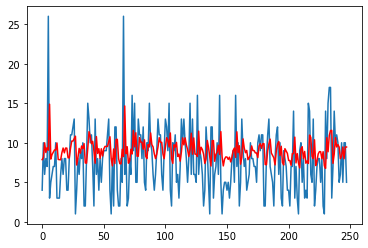

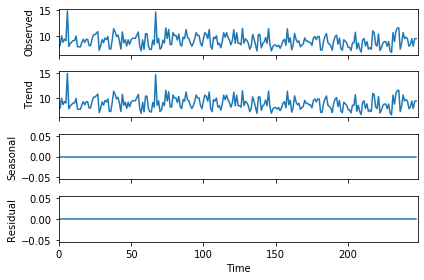

In [132]:
#Statsmodel 
#8-4 Plot the created issues
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
def parse_date(x):
    print(x)
    return datetime.strptime(x, '%Y-%m-%d')

def statFunction(series):
    X = series.values
    size = int(len(X) * 0.66)
    train, test = X[0:size], X[size:len(X)]
    history = [x for x in train]
    predictions_data = list()
    for t in range(len(test)):
        model = ARIMA(history, order=(1,0,0))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions_data.append(yhat)
        obs = test[t]
        history.append(obs)
        #print('predicted=%f, expected=%f' % (yhat, obs))
    error = mean_squared_error(test, predictions_data)
    print('Test MSE: %.3f' % error)
    # plot
    plt.plot(test)
    plt.plot(predictions_data, color='red')
    plt.show()
    result = seasonal_decompose(list(predictions_data), model='additive', freq=1)
    result.plot()
    plt.show()
    
def statsmodel_newdf_created(newdf):
    s = newdf.groupby(['created_at'])['created_at']
    s1 = s.describe()
    temp_df = pd.DataFrame()
    temp_df = s1[['top', 'count']]
    temp_df.columns = ['ds', 'y']
    return temp_df

angular_sm_df = pd.DataFrame(statsmodel_newdf_created(angular_df))
material_sm_df = pd.DataFrame(statsmodel_newdf_created(material_df))
angular_cli_sm_df = pd.DataFrame(statsmodel_newdf_created(angular_cli_df))
googleMaps_sm_df = pd.DataFrame(statsmodel_newdf_created(googleMaps_df))
d3_sm_df = pd.DataFrame(statsmodel_newdf_created(d3_df))

angular_sm_df.to_csv('angular_stat.csv', sep = ',', encoding = 'utf-8', index = False)
material_sm_df.to_csv('material_stat.csv', sep = ',', encoding = 'utf-8', index = False)
angular_cli_sm_df.to_csv('angular_cli_stat.csv', sep = ',', encoding = 'utf-8', index = False)
googleMaps_sm_df.to_csv('googleMap_stat.csv', sep = ',', encoding = 'utf-8', index = False)
d3_sm_df.to_csv('d3_stat.csv', sep = ',', encoding = 'utf-8', index = False)

#plotting for angular repo
series = read_csv('angular_stat.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parse_date)
statFunction(series)


['2017-11-22' '2017-11-23' '2017-11-24' '2017-11-27' '2017-11-29'
 '2017-12-01' '2017-12-05' '2017-12-07' '2017-12-08' '2017-12-10'
 '2017-12-11' '2017-12-12' '2017-12-13' '2017-12-14' '2017-12-17'
 '2017-12-20' '2017-12-21' '2017-12-22' '2017-12-24' '2017-12-25'
 '2017-12-27' '2017-12-28' '2017-12-29' '2017-12-30' '2018-01-02'
 '2018-01-03' '2018-01-04' '2018-01-05' '2018-01-08' '2018-01-09'
 '2018-01-11' '2018-01-12' '2018-01-14' '2018-01-15' '2018-01-16'
 '2018-01-17' '2018-01-18' '2018-01-19' '2018-01-20' '2018-01-21'
 '2018-01-23' '2018-01-24' '2018-01-25' '2018-01-26' '2018-01-28'
 '2018-01-29' '2018-02-01' '2018-02-02' '2018-02-06' '2018-02-07'
 '2018-02-08' '2018-02-12' '2018-02-13' '2018-02-14' '2018-02-15'
 '2018-02-16' '2018-02-17' '2018-02-18' '2018-02-21' '2018-02-22'
 '2018-02-27' '2018-03-01' '2018-03-02' '2018-03-07' '2018-03-09'
 '2018-03-11' '2018-03-12' '2018-03-15' '2018-03-19' '2018-03-20'
 '2018-03-21' '2018-03-22' '2018-03-23' '2018-03-26' '2018-03-27'
 '2018-03-

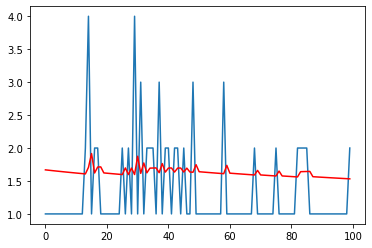

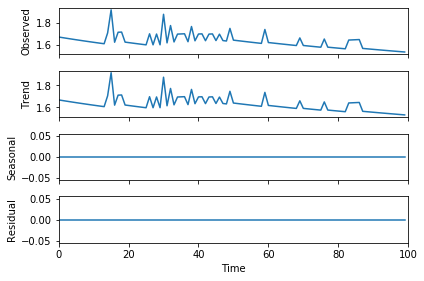

In [133]:
#plotting for material repo
series = read_csv('material_stat.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parse_date)
statFunction(series)


['2017-11-22' '2017-11-23' '2017-11-24' '2017-11-25' '2017-11-26'
 '2017-11-27' '2017-11-28' '2017-11-29' '2017-11-30' '2017-12-01'
 '2017-12-02' '2017-12-03' '2017-12-04' '2017-12-05' '2017-12-06'
 '2017-12-07' '2017-12-08' '2017-12-09' '2017-12-10' '2017-12-11'
 '2017-12-12' '2017-12-13' '2017-12-14' '2017-12-15' '2017-12-16'
 '2017-12-17' '2017-12-18' '2017-12-19' '2017-12-20' '2017-12-21'
 '2017-12-22' '2017-12-23' '2017-12-24' '2017-12-25' '2017-12-26'
 '2017-12-27' '2017-12-28' '2017-12-29' '2017-12-30' '2017-12-31'
 '2018-01-01' '2018-01-02' '2018-01-03' '2018-01-04' '2018-01-05'
 '2018-01-06' '2018-01-07' '2018-01-08' '2018-01-09' '2018-01-10'
 '2018-01-11' '2018-01-12' '2018-01-13' '2018-01-14' '2018-01-15'
 '2018-01-16' '2018-01-17' '2018-01-18' '2018-01-19' '2018-01-20'
 '2018-01-21' '2018-01-22' '2018-01-23' '2018-01-24' '2018-01-25'
 '2018-01-26' '2018-01-27' '2018-01-28' '2018-01-29' '2018-01-30'
 '2018-01-31' '2018-02-01' '2018-02-02' '2018-02-03' '2018-02-04'
 '2018-02-

Test MSE: 13.145


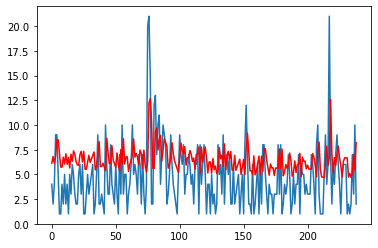

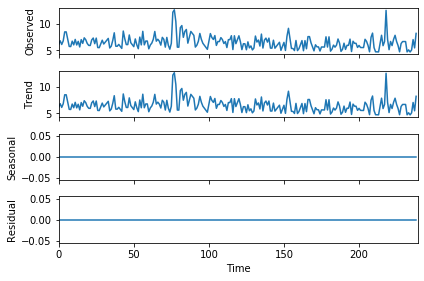

In [134]:
#plotting for angular-cli repo
series = read_csv('angular_cli_stat.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parse_date)
statFunction(series)

['2017-11-22' '2017-11-24' '2017-11-26' '2017-11-27' '2017-11-29'
 '2017-11-30' '2017-12-02' '2017-12-07' '2017-12-09' '2017-12-11'
 '2017-12-13' '2017-12-15' '2017-12-16' '2017-12-18' '2017-12-19'
 '2017-12-20' '2017-12-22' '2017-12-24' '2017-12-25' '2018-01-01'
 '2018-01-03' '2018-01-07' '2018-01-09' '2018-01-10' '2018-01-11'
 '2018-01-13' '2018-01-15' '2018-01-16' '2018-01-22' '2018-01-24'
 '2018-01-25' '2018-01-26' '2018-01-31' '2018-02-02' '2018-02-04'
 '2018-02-05' '2018-02-06' '2018-02-07' '2018-02-08' '2018-02-12'
 '2018-02-14' '2018-02-15' '2018-02-17' '2018-02-19' '2018-02-21'
 '2018-02-22' '2018-02-23' '2018-02-26' '2018-02-27' '2018-02-28'
 '2018-03-01' '2018-03-02' '2018-03-03' '2018-03-04' '2018-03-06'
 '2018-03-08' '2018-03-09' '2018-03-10' '2018-03-12' '2018-03-13'
 '2018-03-15' '2018-03-16' '2018-03-19' '2018-03-20' '2018-03-21'
 '2018-03-22' '2018-03-26' '2018-03-27' '2018-03-29' '2018-03-30'
 '2018-04-04' '2018-04-05' '2018-04-06' '2018-04-15' '2018-04-17'
 '2018-04-

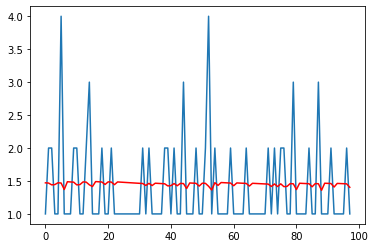

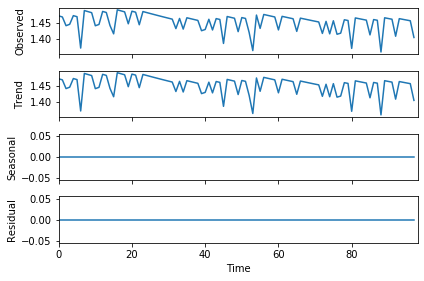

In [135]:
#plotting for map repo
series = read_csv('googleMap_stat.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parse_date)
statFunction(series)

['2017-11-22' '2017-11-29' '2017-12-01' '2017-12-08' '2017-12-13'
 '2017-12-18' '2018-01-02' '2018-01-05' '2018-01-12' '2018-01-16'
 '2018-01-20' '2018-01-23' '2018-01-26' '2018-01-28' '2018-01-29'
 '2018-01-30' '2018-02-04' '2018-02-05' '2018-02-07' '2018-02-08'
 '2018-02-14' '2018-02-19' '2018-02-26' '2018-02-28' '2018-03-01'
 '2018-03-02' '2018-03-06' '2018-03-07' '2018-03-08' '2018-03-09'
 '2018-03-15' '2018-03-16' '2018-03-19' '2018-03-20' '2018-03-22'
 '2018-03-23' '2018-03-27' '2018-03-28' '2018-03-29' '2018-04-16'
 '2018-04-17' '2018-04-25' '2018-04-27' '2018-04-30' '2019-07-30'
 '2019-08-01' '2019-08-02' '2019-08-11' '2019-08-12' '2019-08-15'
 '2019-08-16' '2019-08-27' '2019-08-28' '2019-08-30' '2019-09-17'
 '2019-10-08' '2019-10-18' '2019-10-23' '2019-11-05' '2019-11-15'
 '2019-11-18' '2019-11-21']
2017-11-22
2017-11-29
2017-12-01
2017-12-08
2017-12-13
2017-12-18
2018-01-02
2018-01-05
2018-01-12
2018-01-16
2018-01-20
2018-01-23
2018-01-26
2018-01-28
2018-01-29
2018-01-30
2018

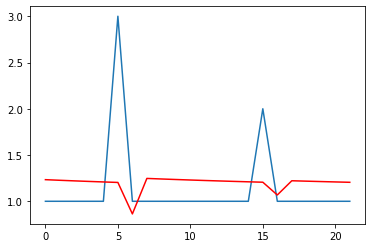

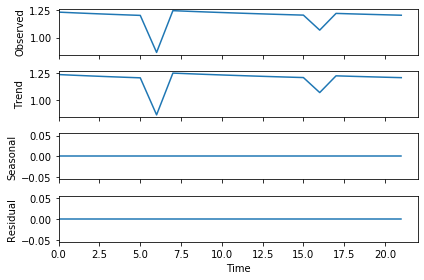

In [136]:
#plotting for d3 repo
series = read_csv('d3_stat.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parse_date)
statFunction(series)

['2017-11-22' '2017-11-23' '2017-11-24' '2017-11-26' '2017-11-27'
 '2017-11-28' '2017-11-29' '2017-11-30' '2017-12-01' '2017-12-02'
 '2017-12-03' '2017-12-04' '2017-12-05' '2017-12-06' '2017-12-07'
 '2017-12-08' '2017-12-09' '2017-12-10' '2017-12-11' '2017-12-12'
 '2017-12-13' '2017-12-14' '2017-12-15' '2017-12-18' '2017-12-19'
 '2017-12-20' '2017-12-21' '2017-12-22' '2017-12-23' '2017-12-24'
 '2017-12-25' '2017-12-26' '2017-12-27' '2017-12-28' '2017-12-29'
 '2017-12-30' '2017-12-31' '2018-01-01' '2018-01-02' '2018-01-03'
 '2018-01-04' '2018-01-05' '2018-01-06' '2018-01-07' '2018-01-08'
 '2018-01-09' '2018-01-10' '2018-01-11' '2018-01-12' '2018-01-13'
 '2018-01-14' '2018-01-15' '2018-01-16' '2018-01-17' '2018-01-18'
 '2018-01-19' '2018-01-20' '2018-01-22' '2018-01-23' '2018-01-24'
 '2018-01-25' '2018-01-26' '2018-01-27' '2018-01-28' '2018-01-29'
 '2018-01-30' '2018-01-31' '2018-02-01' '2018-02-02' '2018-02-04'
 '2018-02-05' '2018-02-06' '2018-02-07' '2018-02-08' '2018-02-09'
 '2018-02-

Test MSE: 22.189


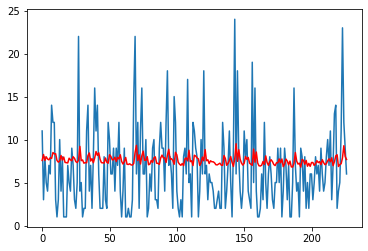

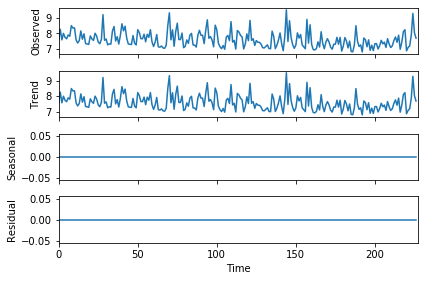

In [138]:
#Statsmodel
#8-5- Plot the closed issues
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def parse_date(x):
    print(x)
    return datetime.strptime(x, '%Y-%m-%d')

def statFunction(series):
    X = series.values
    size = int(len(X) * 0.66)
    train, test = X[0:size], X[size:len(X)]
    history = [x for x in train]
    predictions_data = list()
    for t in range(len(test)):
        model = ARIMA(history, order=(1,0,0))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions_data.append(yhat)
        obs = test[t]
        history.append(obs)
        #print('predicted=%f, expected=%f' % (yhat, obs))
    error = mean_squared_error(test, predictions_data)
    print('Test MSE: %.3f' % error)
    # plot
    plt.plot(test)
    plt.plot(predictions_data, color='red')
    plt.show()
    result = seasonal_decompose(list(predictions_data), model='additive', freq=1)
    result.plot()
    plt.show()
    
def statsmodel_newdf_closed(newdf):
    s = newdf.groupby(['closed_at'])['closed_at']
    s1 = s.describe()
    temp_df = pd.DataFrame()
    temp_df = s1[['top', 'count']]
    temp_df.columns = ['ds', 'y']
    return temp_df

angular_sm_df = pd.DataFrame(statsmodel_newdf_closed(angular_df))
material_sm_df = pd.DataFrame(statsmodel_newdf_closed(material_df))
angular_cli_sm_df = pd.DataFrame(statsmodel_newdf_closed(angular_cli_df))
googleMaps_sm_df = pd.DataFrame(statsmodel_newdf_closed(googleMaps_df))
d3_sm_df = pd.DataFrame(statsmodel_newdf_closed(d3_df))

angular_sm_df.to_csv('angular_stat_closed.csv', sep = ',', encoding = 'utf-8', index = False)
material_sm_df.to_csv('material_stat_closed.csv', sep = ',', encoding = 'utf-8', index = False)
angular_cli_sm_df.to_csv('angular_cli_stat_closed.csv', sep = ',', encoding = 'utf-8', index = False)
googleMaps_sm_df.to_csv('angular_google_stat_closed.csv', sep = ',', encoding = 'utf-8', index = False)
d3_sm_df.to_csv('d3_stat_closed.csv', sep = ',', encoding = 'utf-8', index = False)

#plotting for angular repo
series = read_csv('angular_stat_closed.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parse_date)
statFunction(series)

['2017-11-24' '2017-11-27' '2017-11-28' '2017-12-10' '2017-12-13'
 '2017-12-21' '2017-12-27' '2018-01-05' '2018-01-10' '2018-01-11'
 '2018-01-13' '2018-01-14' '2018-01-16' '2018-01-17' '2018-01-19'
 '2018-01-20' '2018-01-21' '2018-01-22' '2018-01-24' '2018-01-26'
 '2018-01-29' '2018-02-08' '2018-02-11' '2018-02-12' '2018-02-13'
 '2018-02-18' '2018-02-20' '2018-02-26' '2018-02-27' '2018-03-01'
 '2018-03-05' '2018-03-12' '2018-03-16' '2018-03-21' '2018-03-22'
 '2018-03-23' '2018-03-25' '2018-03-26' '2018-03-27' '2018-03-30'
 '2018-04-05' '2018-04-07' '2018-04-09' '2018-04-10' '2018-04-11'
 '2018-04-17' '2018-04-18' '2018-04-19' '2018-04-21' '2018-04-23'
 '2018-04-25' '2018-04-27' '2018-05-03' '2018-05-15' '2018-05-16'
 '2018-05-17' '2018-05-19' '2018-05-24' '2018-05-25' '2018-05-26'
 '2018-05-27' '2018-05-29' '2018-05-30' '2018-05-31' '2018-06-05'
 '2018-06-08' '2018-06-10' '2018-06-12' '2018-06-13' '2018-06-14'
 '2018-06-19' '2018-06-20' '2018-06-21' '2018-06-22' '2018-06-26'
 '2018-06-

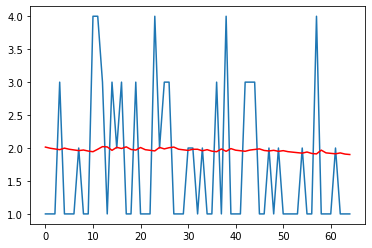

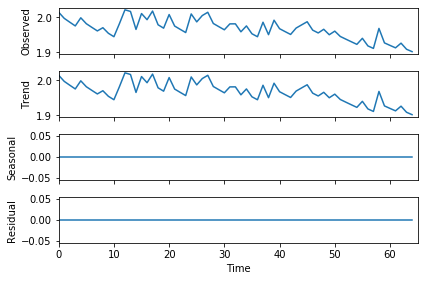

In [141]:
#plotting for material repo
series = read_csv('material_stat_closed.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parse_date)
statFunction(series)

['2017-11-22' '2017-11-23' '2017-11-24' '2017-11-25' '2017-11-26'
 '2017-11-27' '2017-11-28' '2017-11-30' '2017-12-01' '2017-12-02'
 '2017-12-03' '2017-12-04' '2017-12-05' '2017-12-06' '2017-12-07'
 '2017-12-08' '2017-12-11' '2017-12-12' '2017-12-13' '2017-12-14'
 '2017-12-16' '2017-12-17' '2017-12-18' '2017-12-19' '2017-12-20'
 '2017-12-21' '2017-12-22' '2017-12-23' '2017-12-25' '2017-12-26'
 '2017-12-27' '2017-12-28' '2017-12-29' '2017-12-30' '2018-01-01'
 '2018-01-02' '2018-01-03' '2018-01-04' '2018-01-05' '2018-01-07'
 '2018-01-08' '2018-01-09' '2018-01-10' '2018-01-11' '2018-01-12'
 '2018-01-13' '2018-01-15' '2018-01-16' '2018-01-17' '2018-01-18'
 '2018-01-19' '2018-01-20' '2018-01-21' '2018-01-22' '2018-01-23'
 '2018-01-24' '2018-01-25' '2018-01-26' '2018-01-27' '2018-01-29'
 '2018-01-30' '2018-01-31' '2018-02-01' '2018-02-02' '2018-02-03'
 '2018-02-04' '2018-02-05' '2018-02-06' '2018-02-07' '2018-02-08'
 '2018-02-09' '2018-02-12' '2018-02-13' '2018-02-14' '2018-02-15'
 '2018-02-

Test MSE: 24.830


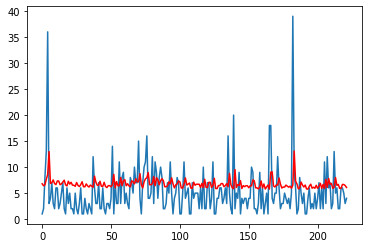

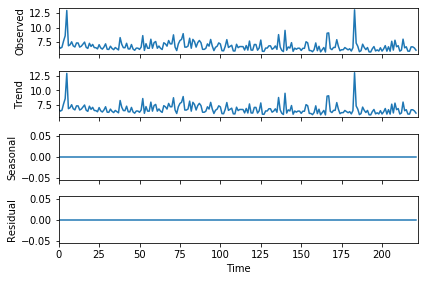

In [143]:
#plotting for angular-cli repo
series = read_csv('angular_cli_stat_closed.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parse_date)
statFunction(series)

['2017-12-02' '2017-12-17' '2017-12-18' '2018-01-03' '2018-01-22'
 '2018-01-31' '2018-02-01' '2018-02-02' '2018-02-13' '2018-02-15'
 '2018-02-21' '2018-02-23' '2018-02-26' '2018-02-28' '2018-03-01'
 '2018-03-02' '2018-03-03' '2018-03-06' '2018-03-07' '2018-03-13'
 '2018-03-18' '2018-03-19' '2018-03-21' '2018-03-27' '2018-04-06'
 '2018-04-16' '2018-04-19' '2018-04-21' '2018-04-30' '2018-05-01'
 '2018-05-18' '2018-05-23' '2018-05-24' '2018-05-30' '2018-06-06'
 '2018-06-07' '2018-06-10' '2018-06-12' '2018-07-02' '2018-07-04'
 '2018-07-22' '2018-07-28' '2018-08-15' '2018-08-21' '2018-09-18'
 '2018-09-19' '2018-09-24' '2018-10-10' '2018-11-14' '2018-11-20'
 '2018-11-22' '2018-11-23' '2018-11-25' '2018-11-30' '2018-12-02'
 '2018-12-03' '2018-12-04' '2018-12-06' '2018-12-08' '2018-12-09'
 '2018-12-12' '2018-12-18' '2018-12-19' '2018-12-23' '2018-12-24'
 '2018-12-30' '2019-01-01' '2019-01-02' '2019-01-06' '2019-01-08'
 '2019-01-10' '2019-01-12' '2019-01-14' '2019-01-15' '2019-01-17'
 '2019-01-

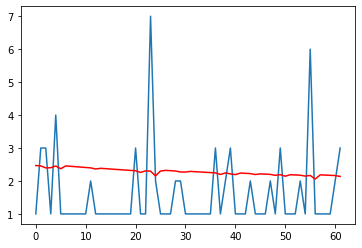

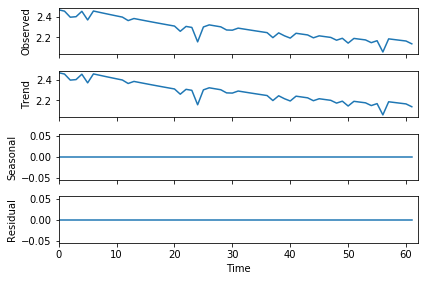

In [142]:
#plotting for map repo
series = read_csv('angular_google_stat_closed.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parse_date)
statFunction(series)

['2017-11-22' '2017-11-29' '2017-12-01' '2017-12-08' '2017-12-18'
 '2018-01-08' '2018-01-12' '2018-01-16' '2018-01-20' '2018-01-23'
 '2018-01-28' '2018-01-29' '2018-01-30' '2018-02-07' '2018-02-08'
 '2018-02-19' '2018-02-26' '2018-02-28' '2018-03-01' '2018-03-02'
 '2018-03-07' '2018-03-08' '2018-03-09' '2018-03-15' '2018-03-16'
 '2018-03-19' '2018-03-20' '2018-03-22' '2018-03-25' '2018-03-28'
 '2018-04-16' '2018-04-17' '2018-04-25' '2018-04-27' '2018-04-30'
 '2019-08-01' '2019-08-09' '2019-08-10' '2019-08-11' '2019-08-15'
 '2019-08-16' '2019-08-27' '2019-08-28' '2019-08-30' '2019-09-17'
 '2019-10-08' '2019-10-18' '2019-10-23' '2019-11-05' '2019-11-15'
 '2019-11-18' '2019-11-19' '2019-11-21']
2017-11-22
2017-11-29
2017-12-01
2017-12-08
2017-12-18
2018-01-08
2018-01-12
2018-01-16
2018-01-20
2018-01-23
2018-01-28
2018-01-29
2018-01-30
2018-02-07
2018-02-08
2018-02-19
2018-02-26
2018-02-28
2018-03-01
2018-03-02
2018-03-07
2018-03-08
2018-03-09
2018-03-15
2018-03-16
2018-03-19
2018-03-20
20

C:\Users\Saeid\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Test MSE: 0.224


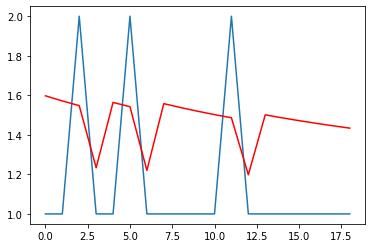

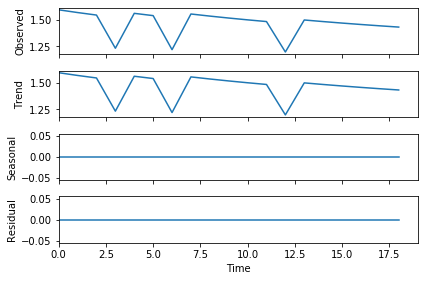

In [140]:
#plotting for d3 repo
series = read_csv('d3_stat_closed.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parse_date)
statFunction(series)

C:\Users\Saeid\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Test MSE: 45.316


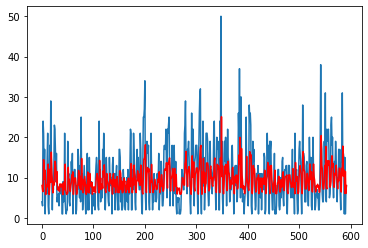

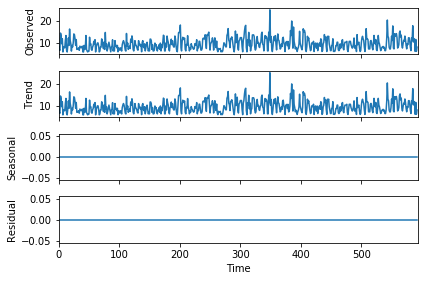

In [146]:
#Statsmodel
#8-7 Plot the commit forecast
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
def parse_date(x):
    #print(x)
    return datetime.strptime(x, '%Y-%m-%d')

def statfunction(series):
    X = series.values
    size = int(len(X) * 0.66)
    train, test = X[0:size], X[size:len(X)]
    history = [x for x in train]
    predictions_data = list()
    for t in range(len(test)):
        model = ARIMA(history, order=(1,0,0))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions_data.append(yhat)
        obs = test[t]
        history.append(obs)
        #print('predicted=%f, expected=%f' % (yhat, obs))
    error = mean_squared_error(test, predictions_data)
    print('Test MSE: %.3f' % error)
    # plot
    plt.plot(test)
    plt.plot(predictions_data, color='red')
    plt.show()
    result = seasonal_decompose(list(predictions_data), model='additive', freq=1)
    result.plot()
    plt.show()
    
def statsmodel_newdf_commits(newdf):
    s = newdf.groupby(['created_at'])['created_at']
    s1 = s.describe()
    temp_df = pd.DataFrame()
    temp_df = s1[['top', 'count']]
    temp_df.columns = ['ds', 'y']
    return temp_df

angular_sm_df = pd.DataFrame(statsmodel_newdf_commits(angular_commits_df))
material_sm_df = pd.DataFrame(statsmodel_newdf_commits(material_commits_df))
angular_cli_sm_df = pd.DataFrame(statsmodel_newdf_commits(angular_cli_commits_df))
googleMaps_sm_df = pd.DataFrame(statsmodel_newdf_commits(angular_googleMap_commits_df))
d3_sm_df = pd.DataFrame(statsmodel_newdf_commits(d3_commits_df))

angular_sm_df.to_csv('angular_stat_commits.csv', sep = ',', encoding = 'utf-8', index = False)
material_sm_df.to_csv('material_stat_commits.csv', sep = ',', encoding = 'utf-8', index = False)
angular_cli_sm_df.to_csv('angular_cli_stat_commits.csv', sep = ',', encoding = 'utf-8', index = False)
googleMaps_sm_df.to_csv('googleMaps_stat_commits.csv', sep = ',', encoding = 'utf-8', index = False)
d3_sm_df.to_csv('d3_stat_commits.csv', sep = ',', encoding = 'utf-8', index = False)

#plotting for angular repo
series = read_csv('angular_stat_commits.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parse_date)
statfunction(series)

Test MSE: 13.140


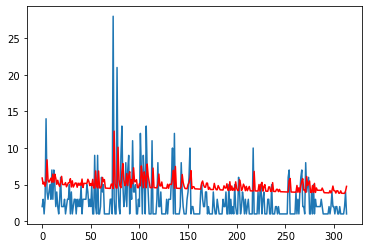

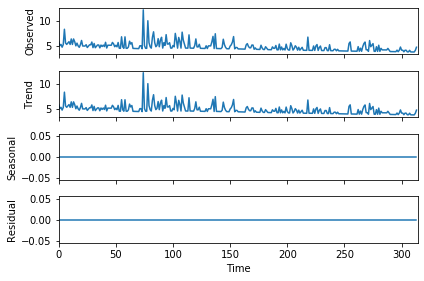

In [147]:
#plotting for material repo
series = read_csv('material_stat_commits.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parse_date)
statfunction(series)

C:\Users\Saeid\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Test MSE: 20.137


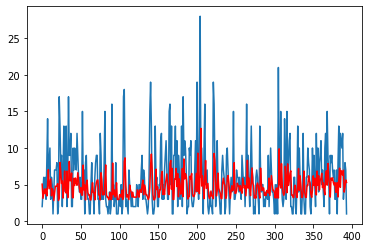

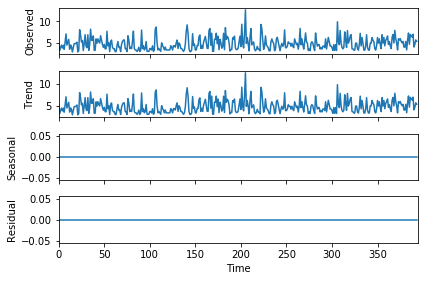

In [148]:
#plotting for angular_cli repo
series = read_csv('angular_cli_stat_commits.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parse_date)
statfunction(series)

Test MSE: 3.315


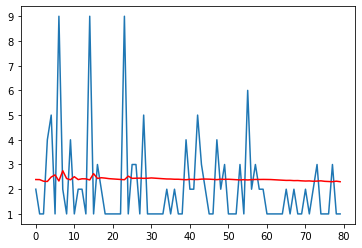

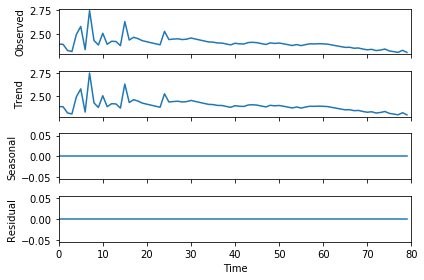

In [149]:
#plotting for map repo
series = read_csv('googleMaps_stat_commits.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parse_date)
statfunction(series)

Test MSE: 23.166


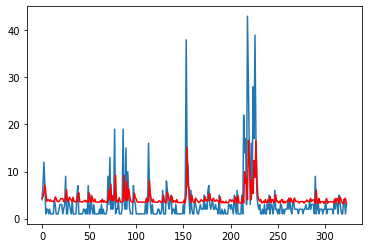

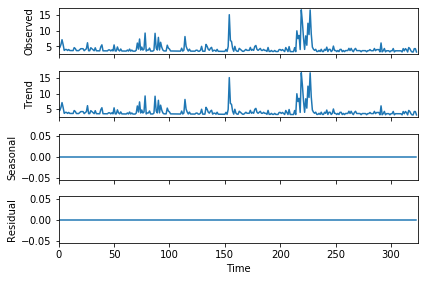

In [150]:
#plotting for d3 repo
series = read_csv('d3_stat_commits.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parse_date)
statfunction(series)

In [178]:
#8-8-Plot the branches forecast; 
#Statsmodel
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import requests


def parse_date(x):
    #print(x)
    return datetime.strptime(x, '%Y-%m-%d')


def stat_plot_branch(series):
    X = series.values
    size = int(len(X) * 0.66)
    train, test = X[0:size], X[size:len(X)]
    history = [x for x in train]
    predictions_data = list()
    for t in range(len(test)):
        model = ARIMA(history, order=(1,0,0))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions_data.append(yhat)
        obs = test[t]
        history.append(obs)
        #print('predicted=%f, expected=%f' % (yhat, obs))
    error = mean_squared_error(test, predictions_data)
    print('Test MSE: %.3f' % error)
    # plot
    plt.plot(test)
    plt.plot(predictions_data, color='red')
    plt.show()
    result = seasonal_decompose(list(predictions_data), model='additive', freq=1)
    result.plot()
    plt.show()

def stat_newdf_branches(newdf):
    b = newdf.groupby(['created_at'])['created_at']
    b1 = b.describe()
    temp = pd.DataFrame()
    temp = b1[['top', 'count']]
    temp.columns = ['ds', 'y']
    return temp

 
angular_sm_branch_df = pd.DataFrame(stat_newdf_branches(angular_branches_df))
material_sm_branch_df = pd.DataFrame(stat_newdf_branches(material_branches_df))
angular_cli_sm_branch_df = pd.DataFrame(stat_newdf_branches(angular_cli_branches_df))
angular_google_sm_branch_df = pd.DataFrame(stat_newdf_branches(angular_googleMaps_branches_df))
d3_sm_branch_df = pd.DataFrame(stat_newdf_branches(d3_branches_df))


angular_sm_branch_df.to_csv('angular_stat_branch.csv', sep = ',', encoding = 'utf-8', index = False)
material_sm_branch_df.to_csv('material_stat_branch.csv', sep = ',', encoding = 'utf-8', index = False)
angular_cli_sm_branch_df.to_csv('angular_cli_stat_branch.csv', sep = ',', encoding = 'utf-8', index = False)
angular_google_sm_branch_df.to_csv('googleMaps_stat_branch.csv', sep = ',', encoding = 'utf-8', index = False)
d3_sm_branch_df.to_csv('d3_stat_branch.csv', sep = ',', encoding = 'utf-8', index = False)
                         
                      
                 

        
                    
 

Test MSE: 0.558


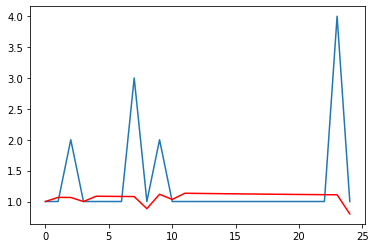

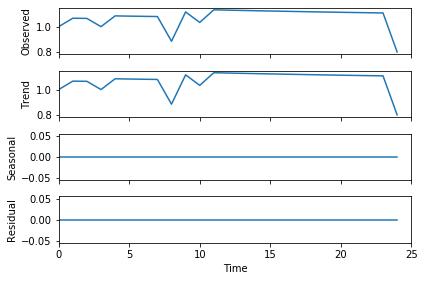

In [180]:
#plotting for angular repo
series = read_csv('angular_stat_branch.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parse_date)
stat_plot_branch(series)

Test MSE: 0.434


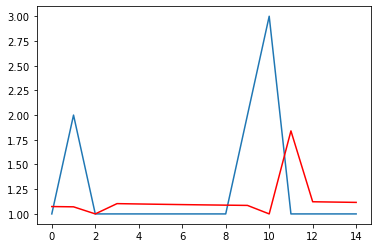

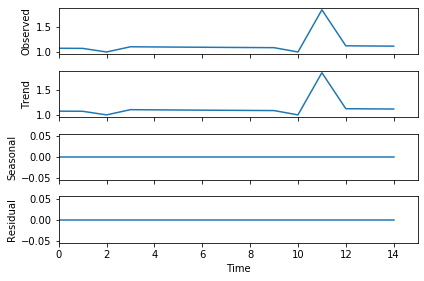

In [184]:
#plotting for material repo
series = read_csv('material_stat_branch.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parse_date)
stat_plot_branch(series)

Test MSE: 2.971


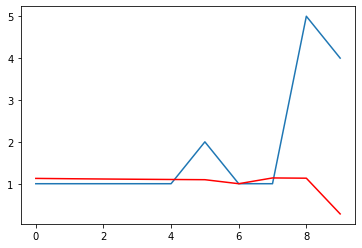

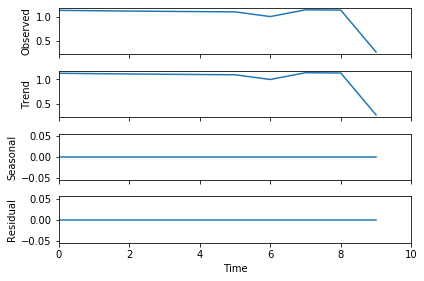

In [183]:
#plotting for angular cli repo
series = read_csv('angular_cli_stat_branch.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parse_date)
stat_plot_branch(series)

In [185]:
#plotting for angular map repo
series = read_csv('googleMaps_stat_branch.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parse_date)
stat_plot_branch(series)

In [186]:
#plotting for d3 repo
series = read_csv('d3_stat_branch.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parse_date)
stat_plot_branch(series)

In [3]:
#Tensorflow
#8-4- Plot the created issues
import tensorflow as tf
from tensorflow.contrib.timeseries.python.timeseries import  NumpyReader
import time

angular_tf_df_created = pd.read_csv('angular.csv')
angular_tf_df_created['ds'] = angular_tf_df_created['ds'].astype('datetime64[ns]')
array = angular_tf_df_created.to_numpy()
x = np.array([time.mktime(i[0].timetuple()) for i in array])
y = np.array([i[1] for i in array])


data = {
    tf.contrib.timeseries.TrainEvalFeatures.TIMES: x,
    tf.contrib.timeseries.TrainEvalFeatures.VALUES: y,
}
print (data)

reader = NumpyReader(data)

train_input_fn = tf.contrib.timeseries.RandomWindowInputFn(reader, batch_size = 40, window_size = 40)
ar = tf.contrib.timeseries.ARRegressor(
        periodicities=200, input_window_size=30, output_window_size=10,
        num_features=1,
        loss=tf.contrib.timeseries.ARModel.NORMAL_LIKELIHOOD_LOSS)
ar.train(input_fn=train_input_fn, steps=6000)


#evaluation

evaluation_input_fn = tf.contrib.timeseries.WholeDatasetInputFn(reader)
evaluation = ar.evaluate(input_fn=evaluation_input_fn, steps=1000)

#prediction
(predictions,) = tuple(ar.predict(
        input_fn=tf.contrib.timeseries.predict_continuation_input_fn(
            evaluation, steps=365)))



{'times': array([1.5113304e+09, 1.5119352e+09, 1.5121080e+09, 1.5127128e+09,
       1.5135768e+09, 1.5153912e+09, 1.5157368e+09, 1.5160824e+09,
       1.5164280e+09, 1.5166872e+09, 1.5171192e+09, 1.5172056e+09,
       1.5172920e+09, 1.5179832e+09, 1.5180696e+09, 1.5190200e+09,
       1.5196248e+09, 1.5197976e+09, 1.5198840e+09, 1.5199704e+09,
       1.5204024e+09, 1.5204888e+09, 1.5205752e+09, 1.5210900e+09,
       1.5211764e+09, 1.5214356e+09, 1.5215220e+09, 1.5216948e+09,
       1.5219540e+09, 1.5222132e+09, 1.5238548e+09, 1.5239412e+09,
       1.5246324e+09, 1.5248052e+09, 1.5250644e+09, 1.5646356e+09,
       1.5653268e+09, 1.5654132e+09, 1.5654996e+09, 1.5658452e+09,
       1.5659316e+09, 1.5668820e+09, 1.5669684e+09, 1.5671412e+09,
       1.5686964e+09, 1.5705108e+09, 1.5713748e+09, 1.5718068e+09,
       1.5729336e+09, 1.5737976e+09, 1.5740568e+09, 1.5741432e+09,
       1.5743160e+09]), 'values': array([2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 3, 1, 3, 1, 2, 1, 1, 2, 1, 2, 1,
       1, 1,

INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Saeid\\AppData\\Local\\Temp\\tmp01hewtar', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000259A8AD35C8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Saeid\\AppData\\Local\\Temp\\tmp01hewtar', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000259A8AD35C8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


Instructions for updating:
To construct input pipelines, use the `tf.data` module.


Instructions for updating:
To construct input pipelines, use the `tf.data` module.


Instructions for updating:
To construct input pipelines, use the `tf.data` module.


Instructions for updating:
To construct input pipelines, use the `tf.data` module.


Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.batch(batch_size)` (or `padded_batch(...)` if `dynamic_pad=True`).


Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.batch(batch_size)` (or `padded_batch(...)` if `dynamic_pad=True`).


Instructions for updating:
Prefer Dataset.range instead.


Instructions for updating:
Prefer Dataset.range instead.


Instructions for updating:
Prefer Dataset.range instead.


Instructions for updating:
Prefer Dataset.range instead.


Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.filter(...).shuffle(min_after_dequeue).batch(batch_size)`.


Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.filter(...).shuffle(min_after_dequeue).batch(batch_size)`.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


Instructions for updating:
To construct input pipelines, use the `tf.data` module.


Instructions for updating:
To construct input pipelines, use the `tf.data` module.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Saeid\AppData\Local\Temp\tmp01hewtar\model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Saeid\AppData\Local\Temp\tmp01hewtar\model.ckpt.


INFO:tensorflow:loss = 1.1946381, step = 1


INFO:tensorflow:loss = 1.1946381, step = 1


INFO:tensorflow:global_step/sec: 64.6395


INFO:tensorflow:global_step/sec: 64.6395


INFO:tensorflow:loss = 0.46981788, step = 101 (1.549 sec)


INFO:tensorflow:loss = 0.46981788, step = 101 (1.549 sec)


INFO:tensorflow:global_step/sec: 45.921


INFO:tensorflow:global_step/sec: 45.921


INFO:tensorflow:loss = 0.08991396, step = 201 (2.178 sec)


INFO:tensorflow:loss = 0.08991396, step = 201 (2.178 sec)


INFO:tensorflow:global_step/sec: 44.7104


INFO:tensorflow:global_step/sec: 44.7104


INFO:tensorflow:loss = -0.07309909, step = 301 (2.237 sec)


INFO:tensorflow:loss = -0.07309909, step = 301 (2.237 sec)


INFO:tensorflow:global_step/sec: 45.6695


INFO:tensorflow:global_step/sec: 45.6695


INFO:tensorflow:loss = -0.18700886, step = 401 (2.191 sec)


INFO:tensorflow:loss = -0.18700886, step = 401 (2.191 sec)


INFO:tensorflow:global_step/sec: 45.2974


INFO:tensorflow:global_step/sec: 45.2974


INFO:tensorflow:loss = -0.06037483, step = 501 (2.208 sec)


INFO:tensorflow:loss = -0.06037483, step = 501 (2.208 sec)


INFO:tensorflow:global_step/sec: 39.8812


INFO:tensorflow:global_step/sec: 39.8812


INFO:tensorflow:loss = -0.31828398, step = 601 (2.507 sec)


INFO:tensorflow:loss = -0.31828398, step = 601 (2.507 sec)


INFO:tensorflow:global_step/sec: 46.0902


INFO:tensorflow:global_step/sec: 46.0902


INFO:tensorflow:loss = -0.067638144, step = 701 (2.169 sec)


INFO:tensorflow:loss = -0.067638144, step = 701 (2.169 sec)


INFO:tensorflow:global_step/sec: 46.1115


INFO:tensorflow:global_step/sec: 46.1115


INFO:tensorflow:loss = -0.31678766, step = 801 (2.169 sec)


INFO:tensorflow:loss = -0.31678766, step = 801 (2.169 sec)


INFO:tensorflow:global_step/sec: 46.8016


INFO:tensorflow:global_step/sec: 46.8016


INFO:tensorflow:loss = -0.45695496, step = 901 (2.137 sec)


INFO:tensorflow:loss = -0.45695496, step = 901 (2.137 sec)


INFO:tensorflow:global_step/sec: 45.8999


INFO:tensorflow:global_step/sec: 45.8999


INFO:tensorflow:loss = -0.5784766, step = 1001 (2.180 sec)


INFO:tensorflow:loss = -0.5784766, step = 1001 (2.180 sec)


INFO:tensorflow:global_step/sec: 45.774


INFO:tensorflow:global_step/sec: 45.774


INFO:tensorflow:loss = -0.6250777, step = 1101 (2.185 sec)


INFO:tensorflow:loss = -0.6250777, step = 1101 (2.185 sec)


INFO:tensorflow:global_step/sec: 45.8578


INFO:tensorflow:global_step/sec: 45.8578


INFO:tensorflow:loss = -0.5622029, step = 1201 (2.184 sec)


INFO:tensorflow:loss = -0.5622029, step = 1201 (2.184 sec)


INFO:tensorflow:global_step/sec: 45.5241


INFO:tensorflow:global_step/sec: 45.5241


INFO:tensorflow:loss = -0.6417469, step = 1301 (2.195 sec)


INFO:tensorflow:loss = -0.6417469, step = 1301 (2.195 sec)


INFO:tensorflow:global_step/sec: 46.0055


INFO:tensorflow:global_step/sec: 46.0055


INFO:tensorflow:loss = -0.25788733, step = 1401 (2.172 sec)


INFO:tensorflow:loss = -0.25788733, step = 1401 (2.172 sec)


INFO:tensorflow:global_step/sec: 46.6489


INFO:tensorflow:global_step/sec: 46.6489


INFO:tensorflow:loss = -0.4741339, step = 1501 (2.144 sec)


INFO:tensorflow:loss = -0.4741339, step = 1501 (2.144 sec)


INFO:tensorflow:global_step/sec: 45.607


INFO:tensorflow:global_step/sec: 45.607


INFO:tensorflow:loss = -0.485056, step = 1601 (2.193 sec)


INFO:tensorflow:loss = -0.485056, step = 1601 (2.193 sec)


INFO:tensorflow:global_step/sec: 46.4756


INFO:tensorflow:global_step/sec: 46.4756


INFO:tensorflow:loss = -0.7418213, step = 1701 (2.152 sec)


INFO:tensorflow:loss = -0.7418213, step = 1701 (2.152 sec)


INFO:tensorflow:global_step/sec: 41.009


INFO:tensorflow:global_step/sec: 41.009


INFO:tensorflow:loss = -0.7844438, step = 1801 (2.438 sec)


INFO:tensorflow:loss = -0.7844438, step = 1801 (2.438 sec)


INFO:tensorflow:global_step/sec: 37.9597


INFO:tensorflow:global_step/sec: 37.9597


INFO:tensorflow:loss = -0.2088813, step = 1901 (2.635 sec)


INFO:tensorflow:loss = -0.2088813, step = 1901 (2.635 sec)


INFO:tensorflow:global_step/sec: 39.6913


INFO:tensorflow:global_step/sec: 39.6913


INFO:tensorflow:loss = -0.30775642, step = 2001 (2.518 sec)


INFO:tensorflow:loss = -0.30775642, step = 2001 (2.518 sec)


INFO:tensorflow:global_step/sec: 45.774


INFO:tensorflow:global_step/sec: 45.774


INFO:tensorflow:loss = -0.74448514, step = 2101 (2.188 sec)


INFO:tensorflow:loss = -0.74448514, step = 2101 (2.188 sec)


INFO:tensorflow:global_step/sec: 42.8347


INFO:tensorflow:global_step/sec: 42.8347


INFO:tensorflow:loss = -0.7086244, step = 2201 (2.333 sec)


INFO:tensorflow:loss = -0.7086244, step = 2201 (2.333 sec)


INFO:tensorflow:global_step/sec: 45.921


INFO:tensorflow:global_step/sec: 45.921


INFO:tensorflow:loss = -0.67144054, step = 2301 (2.177 sec)


INFO:tensorflow:loss = -0.67144054, step = 2301 (2.177 sec)


INFO:tensorflow:global_step/sec: 45.607


INFO:tensorflow:global_step/sec: 45.607


INFO:tensorflow:loss = -0.85466695, step = 2401 (2.194 sec)


INFO:tensorflow:loss = -0.85466695, step = 2401 (2.194 sec)


INFO:tensorflow:global_step/sec: 41.2967


INFO:tensorflow:global_step/sec: 41.2967


INFO:tensorflow:loss = -0.865784, step = 2501 (2.421 sec)


INFO:tensorflow:loss = -0.865784, step = 2501 (2.421 sec)


INFO:tensorflow:global_step/sec: 46.0478


INFO:tensorflow:global_step/sec: 46.0478


INFO:tensorflow:loss = 0.26790053, step = 2601 (2.172 sec)


INFO:tensorflow:loss = 0.26790053, step = 2601 (2.172 sec)


INFO:tensorflow:global_step/sec: 46.154


INFO:tensorflow:global_step/sec: 46.154


INFO:tensorflow:loss = -0.8922158, step = 2701 (2.168 sec)


INFO:tensorflow:loss = -0.8922158, step = 2701 (2.168 sec)


INFO:tensorflow:global_step/sec: 45.921


INFO:tensorflow:global_step/sec: 45.921


INFO:tensorflow:loss = -0.78066343, step = 2801 (2.176 sec)


INFO:tensorflow:loss = -0.78066343, step = 2801 (2.176 sec)


INFO:tensorflow:global_step/sec: 46.2607


INFO:tensorflow:global_step/sec: 46.2607


INFO:tensorflow:loss = -0.85986924, step = 2901 (2.163 sec)


INFO:tensorflow:loss = -0.85986924, step = 2901 (2.163 sec)


INFO:tensorflow:global_step/sec: 46.0266


INFO:tensorflow:global_step/sec: 46.0266


INFO:tensorflow:loss = -0.9205072, step = 3001 (2.174 sec)


INFO:tensorflow:loss = -0.9205072, step = 3001 (2.174 sec)


INFO:tensorflow:global_step/sec: 45.8999


INFO:tensorflow:global_step/sec: 45.8999


INFO:tensorflow:loss = -0.94149566, step = 3101 (2.178 sec)


INFO:tensorflow:loss = -0.94149566, step = 3101 (2.178 sec)


INFO:tensorflow:global_step/sec: 45.8579


INFO:tensorflow:global_step/sec: 45.8579


INFO:tensorflow:loss = -0.8288159, step = 3201 (2.186 sec)


INFO:tensorflow:loss = -0.8288159, step = 3201 (2.186 sec)


INFO:tensorflow:global_step/sec: 45.774


INFO:tensorflow:global_step/sec: 45.774


INFO:tensorflow:loss = -0.8958627, step = 3301 (2.180 sec)


INFO:tensorflow:loss = -0.8958627, step = 3301 (2.180 sec)


INFO:tensorflow:global_step/sec: 46.8894


INFO:tensorflow:global_step/sec: 46.8894


INFO:tensorflow:loss = -0.34434304, step = 3401 (2.134 sec)


INFO:tensorflow:loss = -0.34434304, step = 3401 (2.134 sec)


INFO:tensorflow:global_step/sec: 45.6904


INFO:tensorflow:global_step/sec: 45.6904


INFO:tensorflow:loss = -0.8660415, step = 3501 (2.188 sec)


INFO:tensorflow:loss = -0.8660415, step = 3501 (2.188 sec)


INFO:tensorflow:global_step/sec: 45.8789


INFO:tensorflow:global_step/sec: 45.8789


INFO:tensorflow:loss = -0.7190002, step = 3601 (2.180 sec)


INFO:tensorflow:loss = -0.7190002, step = 3601 (2.180 sec)


INFO:tensorflow:global_step/sec: 46.6706


INFO:tensorflow:global_step/sec: 46.6706


INFO:tensorflow:loss = -0.80849576, step = 3701 (2.144 sec)


INFO:tensorflow:loss = -0.80849576, step = 3701 (2.144 sec)


INFO:tensorflow:global_step/sec: 45.7112


INFO:tensorflow:global_step/sec: 45.7112


INFO:tensorflow:loss = -0.9863377, step = 3801 (2.187 sec)


INFO:tensorflow:loss = -0.9863377, step = 3801 (2.187 sec)


INFO:tensorflow:global_step/sec: 46.069


INFO:tensorflow:global_step/sec: 46.069


INFO:tensorflow:loss = -0.62063396, step = 3901 (2.171 sec)


INFO:tensorflow:loss = -0.62063396, step = 3901 (2.171 sec)


INFO:tensorflow:global_step/sec: 46.0478


INFO:tensorflow:global_step/sec: 46.0478


INFO:tensorflow:loss = -0.82621855, step = 4001 (2.173 sec)


INFO:tensorflow:loss = -0.82621855, step = 4001 (2.173 sec)


INFO:tensorflow:global_step/sec: 46.5404


INFO:tensorflow:global_step/sec: 46.5404


INFO:tensorflow:loss = -0.9699307, step = 4101 (2.148 sec)


INFO:tensorflow:loss = -0.9699307, step = 4101 (2.148 sec)


INFO:tensorflow:global_step/sec: 45.524


INFO:tensorflow:global_step/sec: 45.524


INFO:tensorflow:loss = -0.80187756, step = 4201 (2.198 sec)


INFO:tensorflow:loss = -0.80187756, step = 4201 (2.198 sec)


INFO:tensorflow:global_step/sec: 44.3144


INFO:tensorflow:global_step/sec: 44.3144


INFO:tensorflow:loss = -0.94359154, step = 4301 (2.257 sec)


INFO:tensorflow:loss = -0.94359154, step = 4301 (2.257 sec)


INFO:tensorflow:global_step/sec: 39.9608


INFO:tensorflow:global_step/sec: 39.9608


INFO:tensorflow:loss = -0.78177756, step = 4401 (2.503 sec)


INFO:tensorflow:loss = -0.78177756, step = 4401 (2.503 sec)


INFO:tensorflow:global_step/sec: 39.4721


INFO:tensorflow:global_step/sec: 39.4721


INFO:tensorflow:loss = -0.1975886, step = 4501 (2.532 sec)


INFO:tensorflow:loss = -0.1975886, step = 4501 (2.532 sec)


INFO:tensorflow:global_step/sec: 46.069


INFO:tensorflow:global_step/sec: 46.069


INFO:tensorflow:loss = -0.6282284, step = 4601 (2.170 sec)


INFO:tensorflow:loss = -0.6282284, step = 4601 (2.170 sec)


INFO:tensorflow:global_step/sec: 36.7739


INFO:tensorflow:global_step/sec: 36.7739


INFO:tensorflow:loss = -0.24143632, step = 4701 (2.720 sec)


INFO:tensorflow:loss = -0.24143632, step = 4701 (2.720 sec)


INFO:tensorflow:global_step/sec: 38.2061


INFO:tensorflow:global_step/sec: 38.2061


INFO:tensorflow:loss = -0.9969386, step = 4801 (2.616 sec)


INFO:tensorflow:loss = -0.9969386, step = 4801 (2.616 sec)


INFO:tensorflow:global_step/sec: 39.7071


INFO:tensorflow:global_step/sec: 39.7071


INFO:tensorflow:loss = -0.7893991, step = 4901 (2.518 sec)


INFO:tensorflow:loss = -0.7893991, step = 4901 (2.518 sec)


INFO:tensorflow:global_step/sec: 44.0413


INFO:tensorflow:global_step/sec: 44.0413


INFO:tensorflow:loss = -0.8839539, step = 5001 (2.272 sec)


INFO:tensorflow:loss = -0.8839539, step = 5001 (2.272 sec)


INFO:tensorflow:global_step/sec: 46.8454


INFO:tensorflow:global_step/sec: 46.8454


INFO:tensorflow:loss = -1.0234737, step = 5101 (2.134 sec)


INFO:tensorflow:loss = -1.0234737, step = 5101 (2.134 sec)


INFO:tensorflow:global_step/sec: 46.3894


INFO:tensorflow:global_step/sec: 46.3894


INFO:tensorflow:loss = -1.0838797, step = 5201 (2.157 sec)


INFO:tensorflow:loss = -1.0838797, step = 5201 (2.157 sec)


INFO:tensorflow:global_step/sec: 44.8507


INFO:tensorflow:global_step/sec: 44.8507


INFO:tensorflow:loss = -1.0740116, step = 5301 (2.240 sec)


INFO:tensorflow:loss = -1.0740116, step = 5301 (2.240 sec)


INFO:tensorflow:global_step/sec: 43.6951


INFO:tensorflow:global_step/sec: 43.6951


INFO:tensorflow:loss = -1.0870533, step = 5401 (2.278 sec)


INFO:tensorflow:loss = -1.0870533, step = 5401 (2.278 sec)


INFO:tensorflow:global_step/sec: 39.6599


INFO:tensorflow:global_step/sec: 39.6599


INFO:tensorflow:loss = -1.052043, step = 5501 (2.521 sec)


INFO:tensorflow:loss = -1.052043, step = 5501 (2.521 sec)


INFO:tensorflow:global_step/sec: 44.334


INFO:tensorflow:global_step/sec: 44.334


INFO:tensorflow:loss = -0.8803472, step = 5601 (2.256 sec)


INFO:tensorflow:loss = -0.8803472, step = 5601 (2.256 sec)


INFO:tensorflow:global_step/sec: 42.2916


INFO:tensorflow:global_step/sec: 42.2916


INFO:tensorflow:loss = 0.012014236, step = 5701 (2.366 sec)


INFO:tensorflow:loss = 0.012014236, step = 5701 (2.366 sec)


INFO:tensorflow:global_step/sec: 46.2393


INFO:tensorflow:global_step/sec: 46.2393


INFO:tensorflow:loss = -1.1114736, step = 5801 (2.162 sec)


INFO:tensorflow:loss = -1.1114736, step = 5801 (2.162 sec)


INFO:tensorflow:global_step/sec: 46.2393


INFO:tensorflow:global_step/sec: 46.2393


INFO:tensorflow:loss = -1.003165, step = 5901 (2.164 sec)


INFO:tensorflow:loss = -1.003165, step = 5901 (2.164 sec)


INFO:tensorflow:Saving checkpoints for 6000 into C:\Users\Saeid\AppData\Local\Temp\tmp01hewtar\model.ckpt.


INFO:tensorflow:Saving checkpoints for 6000 into C:\Users\Saeid\AppData\Local\Temp\tmp01hewtar\model.ckpt.


INFO:tensorflow:Loss for final step: -0.6151649.


INFO:tensorflow:Loss for final step: -0.6151649.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2019-11-23T17:16:09Z


INFO:tensorflow:Starting evaluation at 2019-11-23T17:16:09Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


Instructions for updating:
Use standard file APIs to check for files with this prefix.


Instructions for updating:
Use standard file APIs to check for files with this prefix.


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmp01hewtar\model.ckpt-6000


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmp01hewtar\model.ckpt-6000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Evaluation [100/1000]


INFO:tensorflow:Evaluation [100/1000]


INFO:tensorflow:Evaluation [200/1000]


INFO:tensorflow:Evaluation [200/1000]


INFO:tensorflow:Evaluation [300/1000]


INFO:tensorflow:Evaluation [300/1000]


INFO:tensorflow:Evaluation [400/1000]


INFO:tensorflow:Evaluation [400/1000]


INFO:tensorflow:Evaluation [500/1000]


INFO:tensorflow:Evaluation [500/1000]


INFO:tensorflow:Evaluation [600/1000]


INFO:tensorflow:Evaluation [600/1000]


INFO:tensorflow:Evaluation [700/1000]


INFO:tensorflow:Evaluation [700/1000]


INFO:tensorflow:Evaluation [800/1000]


INFO:tensorflow:Evaluation [800/1000]


INFO:tensorflow:Evaluation [900/1000]


INFO:tensorflow:Evaluation [900/1000]


INFO:tensorflow:Evaluation [1000/1000]


INFO:tensorflow:Evaluation [1000/1000]


INFO:tensorflow:Finished evaluation at 2019-11-23-17:16:12


INFO:tensorflow:Finished evaluation at 2019-11-23-17:16:12


INFO:tensorflow:Saving dict for global step 6000: average_loss = -0.40414247, covariance = [[[8.6218475e-05]
  [8.5792708e-05]
  [8.1867169e-05]
  [9.7559605e-05]
  [8.8701294e-05]
  [8.5210020e-05]
  [1.0379265e-04]
  [1.0710372e-04]
  [8.0812366e-05]
  [1.0142011e-04]
  [1.0514239e-04]
  [7.2925919e-05]
  [7.0031383e-05]
  [7.8847355e-05]
  [8.4506763e-05]
  [5.6527013e-05]
  [7.4140553e-05]
  [6.9397720e-05]
  [8.4469619e-05]
  [1.2432227e-04]]], global_step = 6000, loss = -0.40414247, mean = [[[1.0000331 ]
  [1.0000008 ]
  [0.9998273 ]
  [2.0000172 ]
  [1.0156096 ]
  [0.99481   ]
  [1.9999979 ]
  [1.000061  ]
  [0.9671943 ]
  [1.0000002 ]
  [0.99997807]
  [0.9999993 ]
  [2.000235  ]
  [0.9999859 ]
  [0.9834532 ]
  [1.0101459 ]
  [1.0000024 ]
  [0.9999112 ]
  [1.0259814 ]
  [0.99999976]]], observed = [[[1.]
  [1.]
  [1.]
  [2.]
  [1.]
  [1.]
  [2.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [2.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]]], start_tuple = (array([[1521090000, 1521176

INFO:tensorflow:Saving dict for global step 6000: average_loss = -0.40414247, covariance = [[[8.6218475e-05]
  [8.5792708e-05]
  [8.1867169e-05]
  [9.7559605e-05]
  [8.8701294e-05]
  [8.5210020e-05]
  [1.0379265e-04]
  [1.0710372e-04]
  [8.0812366e-05]
  [1.0142011e-04]
  [1.0514239e-04]
  [7.2925919e-05]
  [7.0031383e-05]
  [7.8847355e-05]
  [8.4506763e-05]
  [5.6527013e-05]
  [7.4140553e-05]
  [6.9397720e-05]
  [8.4469619e-05]
  [1.2432227e-04]]], global_step = 6000, loss = -0.40414247, mean = [[[1.0000331 ]
  [1.0000008 ]
  [0.9998273 ]
  [2.0000172 ]
  [1.0156096 ]
  [0.99481   ]
  [1.9999979 ]
  [1.000061  ]
  [0.9671943 ]
  [1.0000002 ]
  [0.99997807]
  [0.9999993 ]
  [2.000235  ]
  [0.9999859 ]
  [0.9834532 ]
  [1.0101459 ]
  [1.0000024 ]
  [0.9999112 ]
  [1.0259814 ]
  [0.99999976]]], observed = [[[1.]
  [1.]
  [1.]
  [2.]
  [1.]
  [1.]
  [2.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [2.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]]], start_tuple = (array([[1521090000, 1521176

INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6000: C:\Users\Saeid\AppData\Local\Temp\tmp01hewtar\model.ckpt-6000


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6000: C:\Users\Saeid\AppData\Local\Temp\tmp01hewtar\model.ckpt-6000


Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensors(tensor).repeat(num_epochs)`.


Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensors(tensor).repeat(num_epochs)`.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmp01hewtar\model.ckpt-6000


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmp01hewtar\model.ckpt-6000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


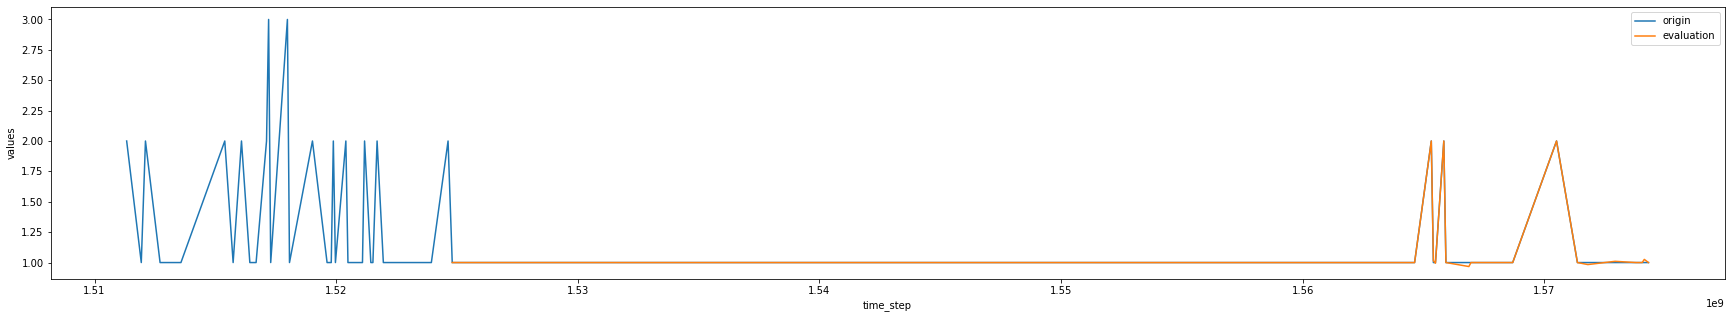

In [15]:
#plot origin and evaluation 
plt.figure(figsize=(30, 5))
plt.plot(data['times'].reshape(-1), data['values'].reshape(-1), label='origin')
plt.plot(evaluation['times'].reshape(-1), evaluation['mean'].reshape(-1), label='evaluation')
plt.xlabel('time_step')
plt.ylabel('values')
plt.legend()
plt.show()



In [49]:
#Tensorflow
#8-4- Plot the created issues
import tensorflow as tf
from tensorflow.contrib.timeseries.python.timeseries import  NumpyReader
import time

material_tf_df_created = pd.read_csv('material.csv')
material_tf_df_created['ds'] = material_tf_df_created['ds'].astype('datetime64[ns]')
array = material_tf_df_created.to_numpy()
x = np.array([time.mktime(i[0].timetuple()) for i in array])
y = np.array([i[1] for i in array])


data = {
    tf.contrib.timeseries.TrainEvalFeatures.TIMES: x,
    tf.contrib.timeseries.TrainEvalFeatures.VALUES: y,
}
print (data)

reader = NumpyReader(data)

train_input_fn = tf.contrib.timeseries.RandomWindowInputFn(reader, batch_size = 40, window_size = 40)
ar = tf.contrib.timeseries.ARRegressor(
        periodicities=200, input_window_size=30, output_window_size=10,
        num_features=1,
        loss=tf.contrib.timeseries.ARModel.NORMAL_LIKELIHOOD_LOSS)
ar.train(input_fn=train_input_fn, steps=6000)


#evaluation

evaluation_input_fn = tf.contrib.timeseries.WholeDatasetInputFn(reader)
evaluation = ar.evaluate(input_fn=evaluation_input_fn, steps=1000)

#prediction
(predictions,) = tuple(ar.predict(
        input_fn=tf.contrib.timeseries.predict_continuation_input_fn(
            evaluation, steps=365)))


{'times': array([1.5115032e+09, 1.5117624e+09, 1.5118488e+09, 1.5128856e+09,
       1.5131448e+09, 1.5138360e+09, 1.5143544e+09, 1.5151320e+09,
       1.5155640e+09, 1.5156504e+09, 1.5158232e+09, 1.5159096e+09,
       1.5160824e+09, 1.5161688e+09, 1.5163416e+09, 1.5164280e+09,
       1.5165144e+09, 1.5166008e+09, 1.5167736e+09, 1.5169464e+09,
       1.5172056e+09, 1.5180696e+09, 1.5183288e+09, 1.5184152e+09,
       1.5185016e+09, 1.5189336e+09, 1.5191064e+09, 1.5196248e+09,
       1.5197112e+09, 1.5198840e+09, 1.5202296e+09, 1.5208308e+09,
       1.5211764e+09, 1.5216084e+09, 1.5216948e+09, 1.5217812e+09,
       1.5219540e+09, 1.5220404e+09, 1.5221268e+09, 1.5223860e+09,
       1.5229044e+09, 1.5230772e+09, 1.5232500e+09, 1.5233364e+09,
       1.5234228e+09, 1.5239412e+09, 1.5240276e+09, 1.5241140e+09,
       1.5242868e+09, 1.5244596e+09, 1.5246324e+09, 1.5248052e+09,
       1.5253236e+09, 1.5263604e+09, 1.5264468e+09, 1.5265332e+09,
       1.5267060e+09, 1.5271380e+09, 1.5272244e+09, 

INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Saeid\\AppData\\Local\\Temp\\tmpqrvof4gy', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000259ACD6A188>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Saeid\\AppData\\Local\\Temp\\tmpqrvof4gy', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000259ACD6A188>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Saeid\AppData\Local\Temp\tmpqrvof4gy\model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Saeid\AppData\Local\Temp\tmpqrvof4gy\model.ckpt.


INFO:tensorflow:loss = 1.5103743, step = 1


INFO:tensorflow:loss = 1.5103743, step = 1


INFO:tensorflow:global_step/sec: 192.427


INFO:tensorflow:global_step/sec: 192.427


INFO:tensorflow:loss = 1.1320703, step = 101 (0.523 sec)


INFO:tensorflow:loss = 1.1320703, step = 101 (0.523 sec)


INFO:tensorflow:global_step/sec: 131.66


INFO:tensorflow:global_step/sec: 131.66


INFO:tensorflow:loss = 1.1020869, step = 201 (0.760 sec)


INFO:tensorflow:loss = 1.1020869, step = 201 (0.760 sec)


INFO:tensorflow:global_step/sec: 129.95


INFO:tensorflow:global_step/sec: 129.95


INFO:tensorflow:loss = 1.0818602, step = 301 (0.769 sec)


INFO:tensorflow:loss = 1.0818602, step = 301 (0.769 sec)


INFO:tensorflow:global_step/sec: 130.629


INFO:tensorflow:global_step/sec: 130.629


INFO:tensorflow:loss = 1.1131217, step = 401 (0.767 sec)


INFO:tensorflow:loss = 1.1131217, step = 401 (0.767 sec)


INFO:tensorflow:global_step/sec: 132.357


INFO:tensorflow:global_step/sec: 132.357


INFO:tensorflow:loss = 1.0430593, step = 501 (0.756 sec)


INFO:tensorflow:loss = 1.0430593, step = 501 (0.756 sec)


INFO:tensorflow:global_step/sec: 128.946


INFO:tensorflow:global_step/sec: 128.946


INFO:tensorflow:loss = 1.0801358, step = 601 (0.778 sec)


INFO:tensorflow:loss = 1.0801358, step = 601 (0.778 sec)


INFO:tensorflow:global_step/sec: 127.793


INFO:tensorflow:global_step/sec: 127.793


INFO:tensorflow:loss = 1.0490036, step = 701 (0.781 sec)


INFO:tensorflow:loss = 1.0490036, step = 701 (0.781 sec)


INFO:tensorflow:global_step/sec: 117.581


INFO:tensorflow:global_step/sec: 117.581


INFO:tensorflow:loss = 1.0667845, step = 801 (0.850 sec)


INFO:tensorflow:loss = 1.0667845, step = 801 (0.850 sec)


INFO:tensorflow:global_step/sec: 128.78


INFO:tensorflow:global_step/sec: 128.78


INFO:tensorflow:loss = 1.0334818, step = 901 (0.777 sec)


INFO:tensorflow:loss = 1.0334818, step = 901 (0.777 sec)


INFO:tensorflow:global_step/sec: 116.486


INFO:tensorflow:global_step/sec: 116.486


INFO:tensorflow:loss = 1.044572, step = 1001 (0.859 sec)


INFO:tensorflow:loss = 1.044572, step = 1001 (0.859 sec)


INFO:tensorflow:global_step/sec: 129.112


INFO:tensorflow:global_step/sec: 129.112


INFO:tensorflow:loss = 1.0353805, step = 1101 (0.774 sec)


INFO:tensorflow:loss = 1.0353805, step = 1101 (0.774 sec)


INFO:tensorflow:global_step/sec: 122.775


INFO:tensorflow:global_step/sec: 122.775


INFO:tensorflow:loss = 1.0974723, step = 1201 (0.814 sec)


INFO:tensorflow:loss = 1.0974723, step = 1201 (0.814 sec)


INFO:tensorflow:global_step/sec: 124.61


INFO:tensorflow:global_step/sec: 124.61


INFO:tensorflow:loss = 1.0041509, step = 1301 (0.804 sec)


INFO:tensorflow:loss = 1.0041509, step = 1301 (0.804 sec)


INFO:tensorflow:global_step/sec: 130.119


INFO:tensorflow:global_step/sec: 130.119


INFO:tensorflow:loss = 1.0286285, step = 1401 (0.768 sec)


INFO:tensorflow:loss = 1.0286285, step = 1401 (0.768 sec)


INFO:tensorflow:global_step/sec: 126.341


INFO:tensorflow:global_step/sec: 126.341


INFO:tensorflow:loss = 1.0522317, step = 1501 (0.793 sec)


INFO:tensorflow:loss = 1.0522317, step = 1501 (0.793 sec)


INFO:tensorflow:global_step/sec: 123.686


INFO:tensorflow:global_step/sec: 123.686


INFO:tensorflow:loss = 1.061483, step = 1601 (0.808 sec)


INFO:tensorflow:loss = 1.061483, step = 1601 (0.808 sec)


INFO:tensorflow:global_step/sec: 130.12


INFO:tensorflow:global_step/sec: 130.12


INFO:tensorflow:loss = 1.0025741, step = 1701 (0.769 sec)


INFO:tensorflow:loss = 1.0025741, step = 1701 (0.769 sec)


INFO:tensorflow:global_step/sec: 128.284


INFO:tensorflow:global_step/sec: 128.284


INFO:tensorflow:loss = 1.0453472, step = 1801 (0.780 sec)


INFO:tensorflow:loss = 1.0453472, step = 1801 (0.780 sec)


INFO:tensorflow:global_step/sec: 133.061


INFO:tensorflow:global_step/sec: 133.061


INFO:tensorflow:loss = 0.9955604, step = 1901 (0.751 sec)


INFO:tensorflow:loss = 0.9955604, step = 1901 (0.751 sec)


INFO:tensorflow:global_step/sec: 124.3


INFO:tensorflow:global_step/sec: 124.3


INFO:tensorflow:loss = 1.0197313, step = 2001 (0.805 sec)


INFO:tensorflow:loss = 1.0197313, step = 2001 (0.805 sec)


INFO:tensorflow:global_step/sec: 93.1674


INFO:tensorflow:global_step/sec: 93.1674


INFO:tensorflow:loss = 1.0124983, step = 2101 (1.079 sec)


INFO:tensorflow:loss = 1.0124983, step = 2101 (1.079 sec)


INFO:tensorflow:global_step/sec: 124.146


INFO:tensorflow:global_step/sec: 124.146


INFO:tensorflow:loss = 1.0381879, step = 2201 (0.810 sec)


INFO:tensorflow:loss = 1.0381879, step = 2201 (0.810 sec)


INFO:tensorflow:global_step/sec: 130.459


INFO:tensorflow:global_step/sec: 130.459


INFO:tensorflow:loss = 1.0277367, step = 2301 (0.758 sec)


INFO:tensorflow:loss = 1.0277367, step = 2301 (0.758 sec)


INFO:tensorflow:global_step/sec: 127.143


INFO:tensorflow:global_step/sec: 127.143


INFO:tensorflow:loss = 1.0100015, step = 2401 (0.786 sec)


INFO:tensorflow:loss = 1.0100015, step = 2401 (0.786 sec)


INFO:tensorflow:global_step/sec: 132.885


INFO:tensorflow:global_step/sec: 132.885


INFO:tensorflow:loss = 0.9852528, step = 2501 (0.754 sec)


INFO:tensorflow:loss = 0.9852528, step = 2501 (0.754 sec)


INFO:tensorflow:global_step/sec: 130.459


INFO:tensorflow:global_step/sec: 130.459


INFO:tensorflow:loss = 1.0041008, step = 2601 (0.766 sec)


INFO:tensorflow:loss = 1.0041008, step = 2601 (0.766 sec)


INFO:tensorflow:global_step/sec: 131.834


INFO:tensorflow:global_step/sec: 131.834


INFO:tensorflow:loss = 1.0345052, step = 2701 (0.760 sec)


INFO:tensorflow:loss = 1.0345052, step = 2701 (0.760 sec)


INFO:tensorflow:global_step/sec: 131.66


INFO:tensorflow:global_step/sec: 131.66


INFO:tensorflow:loss = 1.0196966, step = 2801 (0.758 sec)


INFO:tensorflow:loss = 1.0196966, step = 2801 (0.758 sec)


INFO:tensorflow:global_step/sec: 118.838


INFO:tensorflow:global_step/sec: 118.838


INFO:tensorflow:loss = 1.1327417, step = 2901 (0.842 sec)


INFO:tensorflow:loss = 1.1327417, step = 2901 (0.842 sec)


INFO:tensorflow:global_step/sec: 129.951


INFO:tensorflow:global_step/sec: 129.951


INFO:tensorflow:loss = 1.0272369, step = 3001 (0.770 sec)


INFO:tensorflow:loss = 1.0272369, step = 3001 (0.770 sec)


INFO:tensorflow:global_step/sec: 127.63


INFO:tensorflow:global_step/sec: 127.63


INFO:tensorflow:loss = 0.9974556, step = 3101 (0.784 sec)


INFO:tensorflow:loss = 0.9974556, step = 3101 (0.784 sec)


INFO:tensorflow:global_step/sec: 122.176


INFO:tensorflow:global_step/sec: 122.176


INFO:tensorflow:loss = 1.0227222, step = 3201 (0.825 sec)


INFO:tensorflow:loss = 1.0227222, step = 3201 (0.825 sec)


INFO:tensorflow:global_step/sec: 123.992


INFO:tensorflow:global_step/sec: 123.992


INFO:tensorflow:loss = 1.0104373, step = 3301 (0.799 sec)


INFO:tensorflow:loss = 1.0104373, step = 3301 (0.799 sec)


INFO:tensorflow:global_step/sec: 129.614


INFO:tensorflow:global_step/sec: 129.614


INFO:tensorflow:loss = 0.96482337, step = 3401 (0.774 sec)


INFO:tensorflow:loss = 0.96482337, step = 3401 (0.774 sec)


INFO:tensorflow:global_step/sec: 130.8


INFO:tensorflow:global_step/sec: 130.8


INFO:tensorflow:loss = 0.9939085, step = 3501 (0.763 sec)


INFO:tensorflow:loss = 0.9939085, step = 3501 (0.763 sec)


INFO:tensorflow:global_step/sec: 132.357


INFO:tensorflow:global_step/sec: 132.357


INFO:tensorflow:loss = 0.9798743, step = 3601 (0.757 sec)


INFO:tensorflow:loss = 0.9798743, step = 3601 (0.757 sec)


INFO:tensorflow:global_step/sec: 123.992


INFO:tensorflow:global_step/sec: 123.992


INFO:tensorflow:loss = 0.96621776, step = 3701 (0.806 sec)


INFO:tensorflow:loss = 0.96621776, step = 3701 (0.806 sec)


INFO:tensorflow:global_step/sec: 127.631


INFO:tensorflow:global_step/sec: 127.631


INFO:tensorflow:loss = 1.0020236, step = 3801 (0.785 sec)


INFO:tensorflow:loss = 1.0020236, step = 3801 (0.785 sec)


INFO:tensorflow:global_step/sec: 106.11


INFO:tensorflow:global_step/sec: 106.11


INFO:tensorflow:loss = 1.0050665, step = 3901 (0.942 sec)


INFO:tensorflow:loss = 1.0050665, step = 3901 (0.942 sec)


INFO:tensorflow:global_step/sec: 94.1316


INFO:tensorflow:global_step/sec: 94.1316


INFO:tensorflow:loss = 1.01404, step = 4001 (1.063 sec)


INFO:tensorflow:loss = 1.01404, step = 4001 (1.063 sec)


INFO:tensorflow:global_step/sec: 108.881


INFO:tensorflow:global_step/sec: 108.881


INFO:tensorflow:loss = 1.0223296, step = 4101 (0.917 sec)


INFO:tensorflow:loss = 1.0223296, step = 4101 (0.917 sec)


INFO:tensorflow:global_step/sec: 102


INFO:tensorflow:global_step/sec: 102


INFO:tensorflow:loss = 0.9846098, step = 4201 (0.981 sec)


INFO:tensorflow:loss = 0.9846098, step = 4201 (0.981 sec)


INFO:tensorflow:global_step/sec: 104.667


INFO:tensorflow:global_step/sec: 104.667


INFO:tensorflow:loss = 1.0291317, step = 4301 (0.953 sec)


INFO:tensorflow:loss = 1.0291317, step = 4301 (0.953 sec)


INFO:tensorflow:global_step/sec: 111.304


INFO:tensorflow:global_step/sec: 111.304


INFO:tensorflow:loss = 1.0418384, step = 4401 (0.900 sec)


INFO:tensorflow:loss = 1.0418384, step = 4401 (0.900 sec)


INFO:tensorflow:global_step/sec: 127.63


INFO:tensorflow:global_step/sec: 127.63


INFO:tensorflow:loss = 1.0413585, step = 4501 (0.782 sec)


INFO:tensorflow:loss = 1.0413585, step = 4501 (0.782 sec)


INFO:tensorflow:global_step/sec: 129.614


INFO:tensorflow:global_step/sec: 129.614


INFO:tensorflow:loss = 0.9916702, step = 4601 (0.777 sec)


INFO:tensorflow:loss = 0.9916702, step = 4601 (0.777 sec)


INFO:tensorflow:global_step/sec: 130.971


INFO:tensorflow:global_step/sec: 130.971


INFO:tensorflow:loss = 0.95204955, step = 4701 (0.761 sec)


INFO:tensorflow:loss = 0.95204955, step = 4701 (0.761 sec)


INFO:tensorflow:global_step/sec: 125.548


INFO:tensorflow:global_step/sec: 125.548


INFO:tensorflow:loss = 0.99352515, step = 4801 (0.797 sec)


INFO:tensorflow:loss = 0.99352515, step = 4801 (0.797 sec)


INFO:tensorflow:global_step/sec: 123.533


INFO:tensorflow:global_step/sec: 123.533


INFO:tensorflow:loss = 1.0190916, step = 4901 (0.808 sec)


INFO:tensorflow:loss = 1.0190916, step = 4901 (0.808 sec)


INFO:tensorflow:global_step/sec: 121.14


INFO:tensorflow:global_step/sec: 121.14


INFO:tensorflow:loss = 1.0196072, step = 5001 (0.825 sec)


INFO:tensorflow:loss = 1.0196072, step = 5001 (0.825 sec)


INFO:tensorflow:global_step/sec: 129.112


INFO:tensorflow:global_step/sec: 129.112


INFO:tensorflow:loss = 0.9965709, step = 5101 (0.776 sec)


INFO:tensorflow:loss = 0.9965709, step = 5101 (0.776 sec)


INFO:tensorflow:global_step/sec: 126.982


INFO:tensorflow:global_step/sec: 126.982


INFO:tensorflow:loss = 0.9524433, step = 5201 (0.788 sec)


INFO:tensorflow:loss = 0.9524433, step = 5201 (0.788 sec)


INFO:tensorflow:global_step/sec: 127.305


INFO:tensorflow:global_step/sec: 127.305


INFO:tensorflow:loss = 0.9507415, step = 5301 (0.787 sec)


INFO:tensorflow:loss = 0.9507415, step = 5301 (0.787 sec)


INFO:tensorflow:global_step/sec: 123.993


INFO:tensorflow:global_step/sec: 123.993


INFO:tensorflow:loss = 0.96584, step = 5401 (0.807 sec)


INFO:tensorflow:loss = 0.96584, step = 5401 (0.807 sec)


INFO:tensorflow:global_step/sec: 125.864


INFO:tensorflow:global_step/sec: 125.864


INFO:tensorflow:loss = 0.96906775, step = 5501 (0.794 sec)


INFO:tensorflow:loss = 0.96906775, step = 5501 (0.794 sec)


INFO:tensorflow:global_step/sec: 126.982


INFO:tensorflow:global_step/sec: 126.982


INFO:tensorflow:loss = 1.0487186, step = 5601 (0.788 sec)


INFO:tensorflow:loss = 1.0487186, step = 5601 (0.788 sec)


INFO:tensorflow:global_step/sec: 117.582


INFO:tensorflow:global_step/sec: 117.582


INFO:tensorflow:loss = 0.9711635, step = 5701 (0.851 sec)


INFO:tensorflow:loss = 0.9711635, step = 5701 (0.851 sec)


INFO:tensorflow:global_step/sec: 125.391


INFO:tensorflow:global_step/sec: 125.391


INFO:tensorflow:loss = 1.0995783, step = 5801 (0.797 sec)


INFO:tensorflow:loss = 1.0995783, step = 5801 (0.797 sec)


INFO:tensorflow:global_step/sec: 127.143


INFO:tensorflow:global_step/sec: 127.143


INFO:tensorflow:loss = 1.0284503, step = 5901 (0.786 sec)


INFO:tensorflow:loss = 1.0284503, step = 5901 (0.786 sec)


INFO:tensorflow:Saving checkpoints for 6000 into C:\Users\Saeid\AppData\Local\Temp\tmpqrvof4gy\model.ckpt.


INFO:tensorflow:Saving checkpoints for 6000 into C:\Users\Saeid\AppData\Local\Temp\tmpqrvof4gy\model.ckpt.


INFO:tensorflow:Loss for final step: 0.9840074.


INFO:tensorflow:Loss for final step: 0.9840074.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2019-11-23T21:27:55Z


INFO:tensorflow:Starting evaluation at 2019-11-23T21:27:55Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmpqrvof4gy\model.ckpt-6000


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmpqrvof4gy\model.ckpt-6000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Evaluation [100/1000]


INFO:tensorflow:Evaluation [100/1000]


INFO:tensorflow:Evaluation [200/1000]


INFO:tensorflow:Evaluation [200/1000]


INFO:tensorflow:Evaluation [300/1000]


INFO:tensorflow:Evaluation [300/1000]


INFO:tensorflow:Evaluation [400/1000]


INFO:tensorflow:Evaluation [400/1000]


INFO:tensorflow:Evaluation [500/1000]


INFO:tensorflow:Evaluation [500/1000]


INFO:tensorflow:Evaluation [600/1000]


INFO:tensorflow:Evaluation [600/1000]


INFO:tensorflow:Evaluation [700/1000]


INFO:tensorflow:Evaluation [700/1000]


INFO:tensorflow:Evaluation [800/1000]


INFO:tensorflow:Evaluation [800/1000]


INFO:tensorflow:Evaluation [900/1000]


INFO:tensorflow:Evaluation [900/1000]


INFO:tensorflow:Evaluation [1000/1000]


INFO:tensorflow:Evaluation [1000/1000]


INFO:tensorflow:Finished evaluation at 2019-11-23-21:27:58


INFO:tensorflow:Finished evaluation at 2019-11-23-21:27:58


INFO:tensorflow:Saving dict for global step 6000: average_loss = 0.99418616, covariance = [[[1.29267937e-02]
  [5.40331268e+00]
  [1.62722945e+00]
  [1.16242416e-01]
  [1.21519156e+01]
  [8.61756690e-03]
  [4.75537265e-03]
  [2.11961956e+01]
  [4.32927608e-01]
  [2.67777944e+00]
  [1.45644150e+01]
  [1.39406130e-01]
  [5.68992049e-02]
  [7.84327936e+00]
  [2.14079753e-01]
  [1.50440587e-03]
  [1.30416560e+00]
  [2.98719382e+00]
  [1.10798161e-02]
  [2.50253916e+00]
  [1.55656111e+00]
  [1.41027734e-01]
  [2.13567662e+00]
  [1.54680622e+00]
  [2.82997335e-03]
  [4.28226709e+00]
  [4.28665495e+00]
  [5.59052154e-02]
  [3.53705406e+00]
  [5.48387110e-01]
  [2.95974898e+00]
  [4.54549103e+01]
  [3.62575417e+01]
  [1.67317852e-01]
  [2.61712513e+01]
  [6.58716297e+00]
  [1.35149360e-02]
  [2.28596911e-01]
  [8.75064278e+00]
  [3.87552333e+00]
  [4.23064690e+01]
  [2.44335842e+00]
  [6.50648773e-03]
  [4.05362663e+01]
  [7.32991053e-03]
  [5.51155663e+00]
  [5.41128492e+00]
  [3.44600153e+00

INFO:tensorflow:Saving dict for global step 6000: average_loss = 0.99418616, covariance = [[[1.29267937e-02]
  [5.40331268e+00]
  [1.62722945e+00]
  [1.16242416e-01]
  [1.21519156e+01]
  [8.61756690e-03]
  [4.75537265e-03]
  [2.11961956e+01]
  [4.32927608e-01]
  [2.67777944e+00]
  [1.45644150e+01]
  [1.39406130e-01]
  [5.68992049e-02]
  [7.84327936e+00]
  [2.14079753e-01]
  [1.50440587e-03]
  [1.30416560e+00]
  [2.98719382e+00]
  [1.10798161e-02]
  [2.50253916e+00]
  [1.55656111e+00]
  [1.41027734e-01]
  [2.13567662e+00]
  [1.54680622e+00]
  [2.82997335e-03]
  [4.28226709e+00]
  [4.28665495e+00]
  [5.59052154e-02]
  [3.53705406e+00]
  [5.48387110e-01]
  [2.95974898e+00]
  [4.54549103e+01]
  [3.62575417e+01]
  [1.67317852e-01]
  [2.61712513e+01]
  [6.58716297e+00]
  [1.35149360e-02]
  [2.28596911e-01]
  [8.75064278e+00]
  [3.87552333e+00]
  [4.23064690e+01]
  [2.44335842e+00]
  [6.50648773e-03]
  [4.05362663e+01]
  [7.32991053e-03]
  [5.51155663e+00]
  [5.41128492e+00]
  [3.44600153e+00

INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6000: C:\Users\Saeid\AppData\Local\Temp\tmpqrvof4gy\model.ckpt-6000


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6000: C:\Users\Saeid\AppData\Local\Temp\tmpqrvof4gy\model.ckpt-6000


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmpqrvof4gy\model.ckpt-6000


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmpqrvof4gy\model.ckpt-6000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


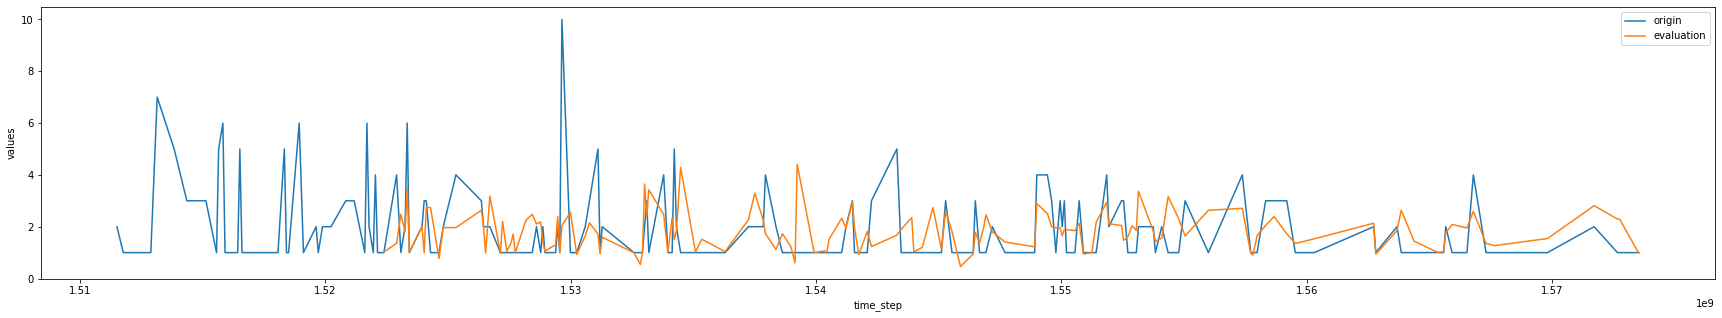

In [50]:
#plot origin and evaluation 
plt.figure(figsize=(30, 5))
plt.plot(data['times'].reshape(-1), data['values'].reshape(-1), label='origin')
plt.plot(evaluation['times'].reshape(-1), evaluation['mean'].reshape(-1), label='evaluation')
plt.xlabel('time_step')
plt.ylabel('values')
plt.legend()
plt.show()


In [51]:
#Tensorflow
#8-4-Plot the created issues
import tensorflow as tf
from tensorflow.contrib.timeseries.python.timeseries import  NumpyReader
import time

angular_cli_tf_df_created = pd.read_csv('angular_cli.csv')
angular_cli_tf_df_created['ds'] = angular_cli_tf_df_created['ds'].astype('datetime64[ns]')
array = angular_cli_tf_df_created.to_numpy()
x = np.array([time.mktime(i[0].timetuple()) for i in array])
y = np.array([i[1] for i in array])


data = {
    tf.contrib.timeseries.TrainEvalFeatures.TIMES: x,
    tf.contrib.timeseries.TrainEvalFeatures.VALUES: y,
}
print (data)

reader = NumpyReader(data)

train_input_fn = tf.contrib.timeseries.RandomWindowInputFn(reader, batch_size = 40, window_size = 40)
ar = tf.contrib.timeseries.ARRegressor(
        periodicities=200, input_window_size=30, output_window_size=10,
        num_features=1,
        loss=tf.contrib.timeseries.ARModel.NORMAL_LIKELIHOOD_LOSS)
ar.train(input_fn=train_input_fn, steps=6000)


#evaluation

evaluation_input_fn = tf.contrib.timeseries.WholeDatasetInputFn(reader)
evaluation = ar.evaluate(input_fn=evaluation_input_fn, steps=1000)

#prediction
(predictions,) = tuple(ar.predict(
        input_fn=tf.contrib.timeseries.predict_continuation_input_fn(
            evaluation, steps=365)))



{'times': array([1.5113304e+09, 1.5114168e+09, 1.5115032e+09, 1.5115896e+09,
       1.5116760e+09, 1.5117624e+09, 1.5118488e+09, 1.5120216e+09,
       1.5121080e+09, 1.5121944e+09, 1.5122808e+09, 1.5123672e+09,
       1.5124536e+09, 1.5125400e+09, 1.5126264e+09, 1.5127128e+09,
       1.5129720e+09, 1.5130584e+09, 1.5131448e+09, 1.5132312e+09,
       1.5134040e+09, 1.5134904e+09, 1.5135768e+09, 1.5136632e+09,
       1.5137496e+09, 1.5138360e+09, 1.5139224e+09, 1.5140088e+09,
       1.5141816e+09, 1.5142680e+09, 1.5143544e+09, 1.5144408e+09,
       1.5145272e+09, 1.5146136e+09, 1.5147864e+09, 1.5148728e+09,
       1.5149592e+09, 1.5150456e+09, 1.5151320e+09, 1.5153048e+09,
       1.5153912e+09, 1.5154776e+09, 1.5155640e+09, 1.5156504e+09,
       1.5157368e+09, 1.5158232e+09, 1.5159960e+09, 1.5160824e+09,
       1.5161688e+09, 1.5162552e+09, 1.5163416e+09, 1.5164280e+09,
       1.5165144e+09, 1.5166008e+09, 1.5166872e+09, 1.5167736e+09,
       1.5168600e+09, 1.5169464e+09, 1.5170328e+09, 

INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Saeid\\AppData\\Local\\Temp\\tmpyh98l_zv', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000259ACDFC208>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Saeid\\AppData\\Local\\Temp\\tmpyh98l_zv', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000259ACDFC208>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Saeid\AppData\Local\Temp\tmpyh98l_zv\model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Saeid\AppData\Local\Temp\tmpyh98l_zv\model.ckpt.


INFO:tensorflow:loss = 1.6265253, step = 1


INFO:tensorflow:loss = 1.6265253, step = 1


INFO:tensorflow:global_step/sec: 237.114


INFO:tensorflow:global_step/sec: 237.114


INFO:tensorflow:loss = 1.2431251, step = 101 (0.425 sec)


INFO:tensorflow:loss = 1.2431251, step = 101 (0.425 sec)


INFO:tensorflow:global_step/sec: 137.447


INFO:tensorflow:global_step/sec: 137.447


INFO:tensorflow:loss = 1.3310379, step = 201 (0.727 sec)


INFO:tensorflow:loss = 1.3310379, step = 201 (0.727 sec)


INFO:tensorflow:global_step/sec: 111.427


INFO:tensorflow:global_step/sec: 111.427


INFO:tensorflow:loss = 1.2954212, step = 301 (0.897 sec)


INFO:tensorflow:loss = 1.2954212, step = 301 (0.897 sec)


INFO:tensorflow:global_step/sec: 136.139


INFO:tensorflow:global_step/sec: 136.139


INFO:tensorflow:loss = 1.2931851, step = 401 (0.736 sec)


INFO:tensorflow:loss = 1.2931851, step = 401 (0.736 sec)


INFO:tensorflow:global_step/sec: 149.569


INFO:tensorflow:global_step/sec: 149.569


INFO:tensorflow:loss = 1.2430949, step = 501 (0.667 sec)


INFO:tensorflow:loss = 1.2430949, step = 501 (0.667 sec)


INFO:tensorflow:global_step/sec: 119.835


INFO:tensorflow:global_step/sec: 119.835


INFO:tensorflow:loss = 1.2519817, step = 601 (0.835 sec)


INFO:tensorflow:loss = 1.2519817, step = 601 (0.835 sec)


INFO:tensorflow:global_step/sec: 136.324


INFO:tensorflow:global_step/sec: 136.324


INFO:tensorflow:loss = 1.2487863, step = 701 (0.735 sec)


INFO:tensorflow:loss = 1.2487863, step = 701 (0.735 sec)


INFO:tensorflow:global_step/sec: 134.132


INFO:tensorflow:global_step/sec: 134.132


INFO:tensorflow:loss = 1.2788457, step = 801 (0.747 sec)


INFO:tensorflow:loss = 1.2788457, step = 801 (0.747 sec)


INFO:tensorflow:global_step/sec: 145.65


INFO:tensorflow:global_step/sec: 145.65


INFO:tensorflow:loss = 1.240282, step = 901 (0.686 sec)


INFO:tensorflow:loss = 1.240282, step = 901 (0.686 sec)


INFO:tensorflow:global_step/sec: 135.769


INFO:tensorflow:global_step/sec: 135.769


INFO:tensorflow:loss = 1.2798468, step = 1001 (0.736 sec)


INFO:tensorflow:loss = 1.2798468, step = 1001 (0.736 sec)


INFO:tensorflow:global_step/sec: 147.15


INFO:tensorflow:global_step/sec: 147.15


INFO:tensorflow:loss = 1.2767974, step = 1101 (0.679 sec)


INFO:tensorflow:loss = 1.2767974, step = 1101 (0.679 sec)


INFO:tensorflow:global_step/sec: 153.705


INFO:tensorflow:global_step/sec: 153.705


INFO:tensorflow:loss = 1.2362083, step = 1201 (0.650 sec)


INFO:tensorflow:loss = 1.2362083, step = 1201 (0.650 sec)


INFO:tensorflow:global_step/sec: 139.362


INFO:tensorflow:global_step/sec: 139.362


INFO:tensorflow:loss = 1.2938497, step = 1301 (0.719 sec)


INFO:tensorflow:loss = 1.2938497, step = 1301 (0.719 sec)


INFO:tensorflow:global_step/sec: 144.389


INFO:tensorflow:global_step/sec: 144.389


INFO:tensorflow:loss = 1.2141626, step = 1401 (0.694 sec)


INFO:tensorflow:loss = 1.2141626, step = 1401 (0.694 sec)


INFO:tensorflow:global_step/sec: 140.932


INFO:tensorflow:global_step/sec: 140.932


INFO:tensorflow:loss = 1.2156503, step = 1501 (0.710 sec)


INFO:tensorflow:loss = 1.2156503, step = 1501 (0.710 sec)


INFO:tensorflow:global_step/sec: 148.68


INFO:tensorflow:global_step/sec: 148.68


INFO:tensorflow:loss = 1.2892712, step = 1601 (0.672 sec)


INFO:tensorflow:loss = 1.2892712, step = 1601 (0.672 sec)


INFO:tensorflow:global_step/sec: 151.151


INFO:tensorflow:global_step/sec: 151.151


INFO:tensorflow:loss = 1.2494742, step = 1701 (0.663 sec)


INFO:tensorflow:loss = 1.2494742, step = 1701 (0.663 sec)


INFO:tensorflow:global_step/sec: 154.178


INFO:tensorflow:global_step/sec: 154.178


INFO:tensorflow:loss = 1.2248608, step = 1801 (0.650 sec)


INFO:tensorflow:loss = 1.2248608, step = 1801 (0.650 sec)


INFO:tensorflow:global_step/sec: 155.617


INFO:tensorflow:global_step/sec: 155.617


INFO:tensorflow:loss = 1.202527, step = 1901 (0.642 sec)


INFO:tensorflow:loss = 1.202527, step = 1901 (0.642 sec)


INFO:tensorflow:global_step/sec: 150.018


INFO:tensorflow:global_step/sec: 150.018


INFO:tensorflow:loss = 1.2505053, step = 2001 (0.668 sec)


INFO:tensorflow:loss = 1.2505053, step = 2001 (0.668 sec)


INFO:tensorflow:global_step/sec: 156.837


INFO:tensorflow:global_step/sec: 156.837


INFO:tensorflow:loss = 1.3080269, step = 2101 (0.636 sec)


INFO:tensorflow:loss = 1.3080269, step = 2101 (0.636 sec)


INFO:tensorflow:global_step/sec: 152.534


INFO:tensorflow:global_step/sec: 152.534


INFO:tensorflow:loss = 1.2449086, step = 2201 (0.658 sec)


INFO:tensorflow:loss = 1.2449086, step = 2201 (0.658 sec)


INFO:tensorflow:global_step/sec: 153.234


INFO:tensorflow:global_step/sec: 153.234


INFO:tensorflow:loss = 1.2009755, step = 2301 (0.651 sec)


INFO:tensorflow:loss = 1.2009755, step = 2301 (0.651 sec)


INFO:tensorflow:global_step/sec: 156.837


INFO:tensorflow:global_step/sec: 156.837


INFO:tensorflow:loss = 1.2216846, step = 2401 (0.639 sec)


INFO:tensorflow:loss = 1.2216846, step = 2401 (0.639 sec)


INFO:tensorflow:global_step/sec: 152.07


INFO:tensorflow:global_step/sec: 152.07


INFO:tensorflow:loss = 1.2380502, step = 2501 (0.658 sec)


INFO:tensorflow:loss = 1.2380502, step = 2501 (0.658 sec)


INFO:tensorflow:global_step/sec: 152.301


INFO:tensorflow:global_step/sec: 152.301


INFO:tensorflow:loss = 1.2537159, step = 2601 (0.659 sec)


INFO:tensorflow:loss = 1.2537159, step = 2601 (0.659 sec)


INFO:tensorflow:global_step/sec: 151.839


INFO:tensorflow:global_step/sec: 151.839


INFO:tensorflow:loss = 1.2252314, step = 2701 (0.659 sec)


INFO:tensorflow:loss = 1.2252314, step = 2701 (0.659 sec)


INFO:tensorflow:global_step/sec: 148.46


INFO:tensorflow:global_step/sec: 148.46


INFO:tensorflow:loss = 1.2617677, step = 2801 (0.671 sec)


INFO:tensorflow:loss = 1.2617677, step = 2801 (0.671 sec)


INFO:tensorflow:global_step/sec: 154.417


INFO:tensorflow:global_step/sec: 154.417


INFO:tensorflow:loss = 1.284747, step = 2901 (0.650 sec)


INFO:tensorflow:loss = 1.284747, step = 2901 (0.650 sec)


INFO:tensorflow:global_step/sec: 151.839


INFO:tensorflow:global_step/sec: 151.839


INFO:tensorflow:loss = 1.2636758, step = 3001 (0.659 sec)


INFO:tensorflow:loss = 1.2636758, step = 3001 (0.659 sec)


INFO:tensorflow:global_step/sec: 152.533


INFO:tensorflow:global_step/sec: 152.533


INFO:tensorflow:loss = 1.224168, step = 3101 (0.656 sec)


INFO:tensorflow:loss = 1.224168, step = 3101 (0.656 sec)


INFO:tensorflow:global_step/sec: 151.609


INFO:tensorflow:global_step/sec: 151.609


INFO:tensorflow:loss = 1.2847914, step = 3201 (0.658 sec)


INFO:tensorflow:loss = 1.2847914, step = 3201 (0.658 sec)


INFO:tensorflow:global_step/sec: 154.417


INFO:tensorflow:global_step/sec: 154.417


INFO:tensorflow:loss = 1.2544754, step = 3301 (0.648 sec)


INFO:tensorflow:loss = 1.2544754, step = 3301 (0.648 sec)


INFO:tensorflow:global_step/sec: 153.469


INFO:tensorflow:global_step/sec: 153.469


INFO:tensorflow:loss = 1.2474757, step = 3401 (0.653 sec)


INFO:tensorflow:loss = 1.2474757, step = 3401 (0.653 sec)


INFO:tensorflow:global_step/sec: 153.469


INFO:tensorflow:global_step/sec: 153.469


INFO:tensorflow:loss = 1.230823, step = 3501 (0.653 sec)


INFO:tensorflow:loss = 1.230823, step = 3501 (0.653 sec)


INFO:tensorflow:global_step/sec: 149.793


INFO:tensorflow:global_step/sec: 149.793


INFO:tensorflow:loss = 1.2874916, step = 3601 (0.668 sec)


INFO:tensorflow:loss = 1.2874916, step = 3601 (0.668 sec)


INFO:tensorflow:global_step/sec: 145.863


INFO:tensorflow:global_step/sec: 145.863


INFO:tensorflow:loss = 1.2084663, step = 3701 (0.685 sec)


INFO:tensorflow:loss = 1.2084663, step = 3701 (0.685 sec)


INFO:tensorflow:global_step/sec: 153.234


INFO:tensorflow:global_step/sec: 153.234


INFO:tensorflow:loss = 1.224093, step = 3801 (0.653 sec)


INFO:tensorflow:loss = 1.224093, step = 3801 (0.653 sec)


INFO:tensorflow:global_step/sec: 152.301


INFO:tensorflow:global_step/sec: 152.301


INFO:tensorflow:loss = 1.2408823, step = 3901 (0.657 sec)


INFO:tensorflow:loss = 1.2408823, step = 3901 (0.657 sec)


INFO:tensorflow:global_step/sec: 153.469


INFO:tensorflow:global_step/sec: 153.469


INFO:tensorflow:loss = 1.2200135, step = 4001 (0.652 sec)


INFO:tensorflow:loss = 1.2200135, step = 4001 (0.652 sec)


INFO:tensorflow:global_step/sec: 148.46


INFO:tensorflow:global_step/sec: 148.46


INFO:tensorflow:loss = 1.2398646, step = 4101 (0.673 sec)


INFO:tensorflow:loss = 1.2398646, step = 4101 (0.673 sec)


INFO:tensorflow:global_step/sec: 156.346


INFO:tensorflow:global_step/sec: 156.346


INFO:tensorflow:loss = 1.1901083, step = 4201 (0.640 sec)


INFO:tensorflow:loss = 1.1901083, step = 4201 (0.640 sec)


INFO:tensorflow:global_step/sec: 150.923


INFO:tensorflow:global_step/sec: 150.923


INFO:tensorflow:loss = 1.2656738, step = 4301 (0.665 sec)


INFO:tensorflow:loss = 1.2656738, step = 4301 (0.665 sec)


INFO:tensorflow:global_step/sec: 149.793


INFO:tensorflow:global_step/sec: 149.793


INFO:tensorflow:loss = 1.3023932, step = 4401 (0.668 sec)


INFO:tensorflow:loss = 1.3023932, step = 4401 (0.668 sec)


INFO:tensorflow:global_step/sec: 152.766


INFO:tensorflow:global_step/sec: 152.766


INFO:tensorflow:loss = 1.2379844, step = 4501 (0.653 sec)


INFO:tensorflow:loss = 1.2379844, step = 4501 (0.653 sec)


INFO:tensorflow:global_step/sec: 150.018


INFO:tensorflow:global_step/sec: 150.018


INFO:tensorflow:loss = 1.3229846, step = 4601 (0.667 sec)


INFO:tensorflow:loss = 1.3229846, step = 4601 (0.667 sec)


INFO:tensorflow:global_step/sec: 150.469


INFO:tensorflow:global_step/sec: 150.469


INFO:tensorflow:loss = 1.242154, step = 4701 (0.667 sec)


INFO:tensorflow:loss = 1.242154, step = 4701 (0.667 sec)


INFO:tensorflow:global_step/sec: 150.469


INFO:tensorflow:global_step/sec: 150.469


INFO:tensorflow:loss = 1.283425, step = 4801 (0.664 sec)


INFO:tensorflow:loss = 1.283425, step = 4801 (0.664 sec)


INFO:tensorflow:global_step/sec: 152.301


INFO:tensorflow:global_step/sec: 152.301


INFO:tensorflow:loss = 1.2386398, step = 4901 (0.656 sec)


INFO:tensorflow:loss = 1.2386398, step = 4901 (0.656 sec)


INFO:tensorflow:global_step/sec: 151.839


INFO:tensorflow:global_step/sec: 151.839


INFO:tensorflow:loss = 1.1897426, step = 5001 (0.660 sec)


INFO:tensorflow:loss = 1.1897426, step = 5001 (0.660 sec)


INFO:tensorflow:global_step/sec: 150.469


INFO:tensorflow:global_step/sec: 150.469


INFO:tensorflow:loss = 1.2266647, step = 5101 (0.664 sec)


INFO:tensorflow:loss = 1.2266647, step = 5101 (0.664 sec)


INFO:tensorflow:global_step/sec: 153.234


INFO:tensorflow:global_step/sec: 153.234


INFO:tensorflow:loss = 1.2543476, step = 5201 (0.654 sec)


INFO:tensorflow:loss = 1.2543476, step = 5201 (0.654 sec)


INFO:tensorflow:global_step/sec: 155.375


INFO:tensorflow:global_step/sec: 155.375


INFO:tensorflow:loss = 1.3106414, step = 5301 (0.643 sec)


INFO:tensorflow:loss = 1.3106414, step = 5301 (0.643 sec)


INFO:tensorflow:global_step/sec: 149.569


INFO:tensorflow:global_step/sec: 149.569


INFO:tensorflow:loss = 1.2784737, step = 5401 (0.673 sec)


INFO:tensorflow:loss = 1.2784737, step = 5401 (0.673 sec)


INFO:tensorflow:global_step/sec: 150.469


INFO:tensorflow:global_step/sec: 150.469


INFO:tensorflow:loss = 1.2174655, step = 5501 (0.663 sec)


INFO:tensorflow:loss = 1.2174655, step = 5501 (0.663 sec)


INFO:tensorflow:global_step/sec: 152.069


INFO:tensorflow:global_step/sec: 152.069


INFO:tensorflow:loss = 1.2655259, step = 5601 (0.656 sec)


INFO:tensorflow:loss = 1.2655259, step = 5601 (0.656 sec)


INFO:tensorflow:global_step/sec: 150.243


INFO:tensorflow:global_step/sec: 150.243


INFO:tensorflow:loss = 1.222698, step = 5701 (0.668 sec)


INFO:tensorflow:loss = 1.222698, step = 5701 (0.668 sec)


INFO:tensorflow:global_step/sec: 153.704


INFO:tensorflow:global_step/sec: 153.704


INFO:tensorflow:loss = 1.2485441, step = 5801 (0.650 sec)


INFO:tensorflow:loss = 1.2485441, step = 5801 (0.650 sec)


INFO:tensorflow:global_step/sec: 153


INFO:tensorflow:global_step/sec: 153


INFO:tensorflow:loss = 1.303793, step = 5901 (0.654 sec)


INFO:tensorflow:loss = 1.303793, step = 5901 (0.654 sec)


INFO:tensorflow:Saving checkpoints for 6000 into C:\Users\Saeid\AppData\Local\Temp\tmpyh98l_zv\model.ckpt.


INFO:tensorflow:Saving checkpoints for 6000 into C:\Users\Saeid\AppData\Local\Temp\tmpyh98l_zv\model.ckpt.


INFO:tensorflow:Loss for final step: 1.2666588.


INFO:tensorflow:Loss for final step: 1.2666588.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2019-11-23T21:35:37Z


INFO:tensorflow:Starting evaluation at 2019-11-23T21:35:37Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmpyh98l_zv\model.ckpt-6000


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmpyh98l_zv\model.ckpt-6000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Evaluation [100/1000]


INFO:tensorflow:Evaluation [100/1000]


INFO:tensorflow:Evaluation [200/1000]


INFO:tensorflow:Evaluation [200/1000]


INFO:tensorflow:Evaluation [300/1000]


INFO:tensorflow:Evaluation [300/1000]


INFO:tensorflow:Evaluation [400/1000]


INFO:tensorflow:Evaluation [400/1000]


INFO:tensorflow:Evaluation [500/1000]


INFO:tensorflow:Evaluation [500/1000]


INFO:tensorflow:Evaluation [600/1000]


INFO:tensorflow:Evaluation [600/1000]


INFO:tensorflow:Evaluation [700/1000]


INFO:tensorflow:Evaluation [700/1000]


INFO:tensorflow:Evaluation [800/1000]


INFO:tensorflow:Evaluation [800/1000]


INFO:tensorflow:Evaluation [900/1000]


INFO:tensorflow:Evaluation [900/1000]


INFO:tensorflow:Evaluation [1000/1000]


INFO:tensorflow:Evaluation [1000/1000]


INFO:tensorflow:Finished evaluation at 2019-11-23-21:35:45


INFO:tensorflow:Finished evaluation at 2019-11-23-21:35:45


INFO:tensorflow:Saving dict for global step 6000: average_loss = 1.2450795, covariance = [[[239.48474  ]
  [ 62.132492 ]
  [ 45.506123 ]
  [ 33.336617 ]
  [ 18.660858 ]
  [ 88.28655  ]
  [ 76.46668  ]
  [539.00055  ]
  [ 68.721886 ]
  [ 84.40833  ]
  [ 36.53487  ]
  [ 88.84851  ]
  [ 30.17825  ]
  [ 91.060104 ]
  [ 51.13417  ]
  [ 51.326683 ]
  [ 44.988564 ]
  [125.58301  ]
  [ 76.81325  ]
  [ 27.533098 ]
  [ 99.74528  ]
  [ 28.466028 ]
  [ 56.15665  ]
  [ 33.260834 ]
  [112.5103   ]
  [ 48.9437   ]
  [100.9152   ]
  [ 39.98262  ]
  [ 53.319366 ]
  [ 33.45058  ]
  [297.99     ]
  [108.95334  ]
  [106.10733  ]
  [ 24.198437 ]
  [ 32.69839  ]
  [ 47.99043  ]
  [ 62.82153  ]
  [ 53.709843 ]
  [ 47.691986 ]
  [ 80.53712  ]
  [ 25.144705 ]
  [ 68.98052  ]
  [ 22.780512 ]
  [195.02034  ]
  [110.68115  ]
  [105.652    ]
  [ 45.99404  ]
  [157.14508  ]
  [240.78044  ]
  [223.51779  ]
  [ 76.99583  ]
  [ 26.535673 ]
  [ 12.4393015]
  [ 98.31309  ]
  [165.52151  ]
  [452.70648  ]
  [ 84.13126  ]

INFO:tensorflow:Saving dict for global step 6000: average_loss = 1.2450795, covariance = [[[239.48474  ]
  [ 62.132492 ]
  [ 45.506123 ]
  [ 33.336617 ]
  [ 18.660858 ]
  [ 88.28655  ]
  [ 76.46668  ]
  [539.00055  ]
  [ 68.721886 ]
  [ 84.40833  ]
  [ 36.53487  ]
  [ 88.84851  ]
  [ 30.17825  ]
  [ 91.060104 ]
  [ 51.13417  ]
  [ 51.326683 ]
  [ 44.988564 ]
  [125.58301  ]
  [ 76.81325  ]
  [ 27.533098 ]
  [ 99.74528  ]
  [ 28.466028 ]
  [ 56.15665  ]
  [ 33.260834 ]
  [112.5103   ]
  [ 48.9437   ]
  [100.9152   ]
  [ 39.98262  ]
  [ 53.319366 ]
  [ 33.45058  ]
  [297.99     ]
  [108.95334  ]
  [106.10733  ]
  [ 24.198437 ]
  [ 32.69839  ]
  [ 47.99043  ]
  [ 62.82153  ]
  [ 53.709843 ]
  [ 47.691986 ]
  [ 80.53712  ]
  [ 25.144705 ]
  [ 68.98052  ]
  [ 22.780512 ]
  [195.02034  ]
  [110.68115  ]
  [105.652    ]
  [ 45.99404  ]
  [157.14508  ]
  [240.78044  ]
  [223.51779  ]
  [ 76.99583  ]
  [ 26.535673 ]
  [ 12.4393015]
  [ 98.31309  ]
  [165.52151  ]
  [452.70648  ]
  [ 84.13126  ]

INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6000: C:\Users\Saeid\AppData\Local\Temp\tmpyh98l_zv\model.ckpt-6000


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6000: C:\Users\Saeid\AppData\Local\Temp\tmpyh98l_zv\model.ckpt-6000


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmpyh98l_zv\model.ckpt-6000


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmpyh98l_zv\model.ckpt-6000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


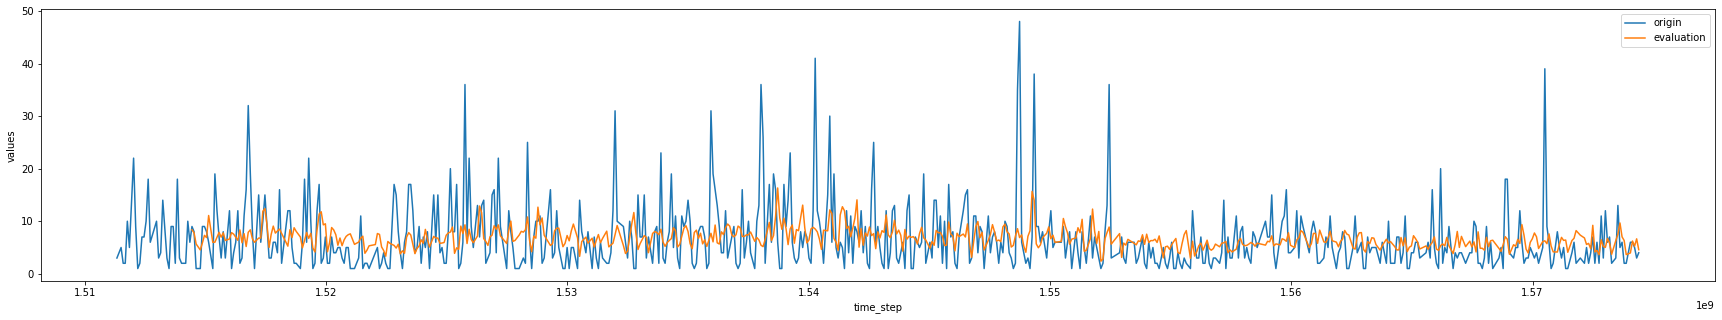

In [52]:
#plot origin and evaluation 
plt.figure(figsize=(30, 5))
plt.plot(data['times'].reshape(-1), data['values'].reshape(-1), label='origin')
plt.plot(evaluation['times'].reshape(-1), evaluation['mean'].reshape(-1), label='evaluation')
plt.xlabel('time_step')
plt.ylabel('values')
plt.legend()
plt.show()

In [53]:
#Tensorflow
#8-4- Plot the created issues
import tensorflow as tf
from tensorflow.contrib.timeseries.python.timeseries import  NumpyReader
import time

angular_google_tf_df_created = pd.read_csv('angular_google.csv')
angular_google_tf_df_created['ds'] = angular_google_tf_df_created['ds'].astype('datetime64[ns]')
array = angular_google_tf_df_created.to_numpy()
x = np.array([time.mktime(i[0].timetuple()) for i in array])
y = np.array([i[1] for i in array])


data = {
    tf.contrib.timeseries.TrainEvalFeatures.TIMES: x,
    tf.contrib.timeseries.TrainEvalFeatures.VALUES: y,
}
print (data)

reader = NumpyReader(data)

train_input_fn = tf.contrib.timeseries.RandomWindowInputFn(reader, batch_size = 40, window_size = 40)
ar = tf.contrib.timeseries.ARRegressor(
        periodicities=200, input_window_size=30, output_window_size=10,
        num_features=1,
        loss=tf.contrib.timeseries.ARModel.NORMAL_LIKELIHOOD_LOSS)
ar.train(input_fn=train_input_fn, steps=6000)


#evaluation

evaluation_input_fn = tf.contrib.timeseries.WholeDatasetInputFn(reader)
evaluation = ar.evaluate(input_fn=evaluation_input_fn, steps=1000)

#prediction
(predictions,) = tuple(ar.predict(
        input_fn=tf.contrib.timeseries.predict_continuation_input_fn(
            evaluation, steps=365)))



{'times': array([1.5121944e+09, 1.5134904e+09, 1.5135768e+09, 1.5149592e+09,
       1.5166008e+09, 1.5173784e+09, 1.5174648e+09, 1.5175512e+09,
       1.5185016e+09, 1.5186744e+09, 1.5191928e+09, 1.5193656e+09,
       1.5196248e+09, 1.5197976e+09, 1.5198840e+09, 1.5199704e+09,
       1.5200568e+09, 1.5203160e+09, 1.5204024e+09, 1.5209172e+09,
       1.5213492e+09, 1.5214356e+09, 1.5216084e+09, 1.5221268e+09,
       1.5229908e+09, 1.5238548e+09, 1.5241140e+09, 1.5242868e+09,
       1.5250644e+09, 1.5251508e+09, 1.5266196e+09, 1.5270516e+09,
       1.5271380e+09, 1.5276564e+09, 1.5282612e+09, 1.5283476e+09,
       1.5286068e+09, 1.5287796e+09, 1.5305076e+09, 1.5306804e+09,
       1.5322356e+09, 1.5327540e+09, 1.5343092e+09, 1.5348276e+09,
       1.5372468e+09, 1.5373332e+09, 1.5377652e+09, 1.5391476e+09,
       1.5421752e+09, 1.5426936e+09, 1.5428664e+09, 1.5429528e+09,
       1.5431256e+09, 1.5435576e+09, 1.5437304e+09, 1.5438168e+09,
       1.5439032e+09, 1.5440760e+09, 1.5442488e+09, 

INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Saeid\\AppData\\Local\\Temp\\tmp2roei7il', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000259ACC96208>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Saeid\\AppData\\Local\\Temp\\tmp2roei7il', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000259ACC96208>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Saeid\AppData\Local\Temp\tmp2roei7il\model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Saeid\AppData\Local\Temp\tmp2roei7il\model.ckpt.


INFO:tensorflow:loss = 1.2465706, step = 1


INFO:tensorflow:loss = 1.2465706, step = 1


INFO:tensorflow:global_step/sec: 182.263


INFO:tensorflow:global_step/sec: 182.263


INFO:tensorflow:loss = 1.032353, step = 101 (0.551 sec)


INFO:tensorflow:loss = 1.032353, step = 101 (0.551 sec)


INFO:tensorflow:global_step/sec: 99.1692


INFO:tensorflow:global_step/sec: 99.1692


INFO:tensorflow:loss = 0.8960983, step = 201 (1.009 sec)


INFO:tensorflow:loss = 0.8960983, step = 201 (1.009 sec)


INFO:tensorflow:global_step/sec: 123.381


INFO:tensorflow:global_step/sec: 123.381


INFO:tensorflow:loss = 0.87162185, step = 301 (0.809 sec)


INFO:tensorflow:loss = 0.87162185, step = 301 (0.809 sec)


INFO:tensorflow:global_step/sec: 130.629


INFO:tensorflow:global_step/sec: 130.629


INFO:tensorflow:loss = 0.8575114, step = 401 (0.766 sec)


INFO:tensorflow:loss = 0.8575114, step = 401 (0.766 sec)


INFO:tensorflow:global_step/sec: 124.766


INFO:tensorflow:global_step/sec: 124.766


INFO:tensorflow:loss = 0.92192185, step = 501 (0.803 sec)


INFO:tensorflow:loss = 0.92192185, step = 501 (0.803 sec)


INFO:tensorflow:global_step/sec: 128.614


INFO:tensorflow:global_step/sec: 128.614


INFO:tensorflow:loss = 0.7684962, step = 601 (0.777 sec)


INFO:tensorflow:loss = 0.7684962, step = 601 (0.777 sec)


INFO:tensorflow:global_step/sec: 126.982


INFO:tensorflow:global_step/sec: 126.982


INFO:tensorflow:loss = 0.7815515, step = 701 (0.788 sec)


INFO:tensorflow:loss = 0.7815515, step = 701 (0.788 sec)


INFO:tensorflow:global_step/sec: 128.78


INFO:tensorflow:global_step/sec: 128.78


INFO:tensorflow:loss = 0.76167554, step = 801 (0.776 sec)


INFO:tensorflow:loss = 0.76167554, step = 801 (0.776 sec)


INFO:tensorflow:global_step/sec: 128.78


INFO:tensorflow:global_step/sec: 128.78


INFO:tensorflow:loss = 0.6899926, step = 901 (0.778 sec)


INFO:tensorflow:loss = 0.6899926, step = 901 (0.778 sec)


INFO:tensorflow:global_step/sec: 126.982


INFO:tensorflow:global_step/sec: 126.982


INFO:tensorflow:loss = 0.72339475, step = 1001 (0.787 sec)


INFO:tensorflow:loss = 0.72339475, step = 1001 (0.787 sec)


INFO:tensorflow:global_step/sec: 130.971


INFO:tensorflow:global_step/sec: 130.971


INFO:tensorflow:loss = 0.75515866, step = 1101 (0.763 sec)


INFO:tensorflow:loss = 0.75515866, step = 1101 (0.763 sec)


INFO:tensorflow:global_step/sec: 129.614


INFO:tensorflow:global_step/sec: 129.614


INFO:tensorflow:loss = 0.665247, step = 1201 (0.774 sec)


INFO:tensorflow:loss = 0.665247, step = 1201 (0.774 sec)


INFO:tensorflow:global_step/sec: 124.765


INFO:tensorflow:global_step/sec: 124.765


INFO:tensorflow:loss = 0.6979983, step = 1301 (0.802 sec)


INFO:tensorflow:loss = 0.6979983, step = 1301 (0.802 sec)


INFO:tensorflow:global_step/sec: 126.982


INFO:tensorflow:global_step/sec: 126.982


INFO:tensorflow:loss = 0.6700586, step = 1401 (0.786 sec)


INFO:tensorflow:loss = 0.6700586, step = 1401 (0.786 sec)


INFO:tensorflow:global_step/sec: 132.357


INFO:tensorflow:global_step/sec: 132.357


INFO:tensorflow:loss = 0.667973, step = 1501 (0.759 sec)


INFO:tensorflow:loss = 0.667973, step = 1501 (0.759 sec)


INFO:tensorflow:global_step/sec: 127.63


INFO:tensorflow:global_step/sec: 127.63


INFO:tensorflow:loss = 0.67472976, step = 1601 (0.783 sec)


INFO:tensorflow:loss = 0.67472976, step = 1601 (0.783 sec)


INFO:tensorflow:global_step/sec: 127.305


INFO:tensorflow:global_step/sec: 127.305


INFO:tensorflow:loss = 0.875512, step = 1701 (0.787 sec)


INFO:tensorflow:loss = 0.875512, step = 1701 (0.787 sec)


INFO:tensorflow:global_step/sec: 126.661


INFO:tensorflow:global_step/sec: 126.661


INFO:tensorflow:loss = 0.77572846, step = 1801 (0.790 sec)


INFO:tensorflow:loss = 0.77572846, step = 1801 (0.790 sec)


INFO:tensorflow:global_step/sec: 130.459


INFO:tensorflow:global_step/sec: 130.459


INFO:tensorflow:loss = 0.75059044, step = 1901 (0.765 sec)


INFO:tensorflow:loss = 0.75059044, step = 1901 (0.765 sec)


INFO:tensorflow:global_step/sec: 129.279


INFO:tensorflow:global_step/sec: 129.279


INFO:tensorflow:loss = 0.6849474, step = 2001 (0.775 sec)


INFO:tensorflow:loss = 0.6849474, step = 2001 (0.775 sec)


INFO:tensorflow:global_step/sec: 129.279


INFO:tensorflow:global_step/sec: 129.279


INFO:tensorflow:loss = 0.78666395, step = 2101 (0.773 sec)


INFO:tensorflow:loss = 0.78666395, step = 2101 (0.773 sec)


INFO:tensorflow:global_step/sec: 128.78


INFO:tensorflow:global_step/sec: 128.78


INFO:tensorflow:loss = 0.63984144, step = 2201 (0.778 sec)


INFO:tensorflow:loss = 0.63984144, step = 2201 (0.778 sec)


INFO:tensorflow:global_step/sec: 128.946


INFO:tensorflow:global_step/sec: 128.946


INFO:tensorflow:loss = 0.69403434, step = 2301 (0.776 sec)


INFO:tensorflow:loss = 0.69403434, step = 2301 (0.776 sec)


INFO:tensorflow:global_step/sec: 127.956


INFO:tensorflow:global_step/sec: 127.956


INFO:tensorflow:loss = 0.63795316, step = 2401 (0.782 sec)


INFO:tensorflow:loss = 0.63795316, step = 2401 (0.782 sec)


INFO:tensorflow:global_step/sec: 132.008


INFO:tensorflow:global_step/sec: 132.008


INFO:tensorflow:loss = 0.5967011, step = 2501 (0.759 sec)


INFO:tensorflow:loss = 0.5967011, step = 2501 (0.759 sec)


INFO:tensorflow:global_step/sec: 128.285


INFO:tensorflow:global_step/sec: 128.285


INFO:tensorflow:loss = 0.6620437, step = 2601 (0.779 sec)


INFO:tensorflow:loss = 0.6620437, step = 2601 (0.779 sec)


INFO:tensorflow:global_step/sec: 125.864


INFO:tensorflow:global_step/sec: 125.864


INFO:tensorflow:loss = 0.60757816, step = 2701 (0.796 sec)


INFO:tensorflow:loss = 0.60757816, step = 2701 (0.796 sec)


INFO:tensorflow:global_step/sec: 126.821


INFO:tensorflow:global_step/sec: 126.821


INFO:tensorflow:loss = 0.59442085, step = 2801 (0.788 sec)


INFO:tensorflow:loss = 0.59442085, step = 2801 (0.788 sec)


INFO:tensorflow:global_step/sec: 129.95


INFO:tensorflow:global_step/sec: 129.95


INFO:tensorflow:loss = 0.6127099, step = 2901 (0.770 sec)


INFO:tensorflow:loss = 0.6127099, step = 2901 (0.770 sec)


INFO:tensorflow:global_step/sec: 126.023


INFO:tensorflow:global_step/sec: 126.023


INFO:tensorflow:loss = 0.724782, step = 3001 (0.794 sec)


INFO:tensorflow:loss = 0.724782, step = 3001 (0.794 sec)


INFO:tensorflow:global_step/sec: 127.143


INFO:tensorflow:global_step/sec: 127.143


INFO:tensorflow:loss = 0.6140977, step = 3101 (0.786 sec)


INFO:tensorflow:loss = 0.6140977, step = 3101 (0.786 sec)


INFO:tensorflow:global_step/sec: 128.12


INFO:tensorflow:global_step/sec: 128.12


INFO:tensorflow:loss = 0.7845994, step = 3201 (0.781 sec)


INFO:tensorflow:loss = 0.7845994, step = 3201 (0.781 sec)


INFO:tensorflow:global_step/sec: 128.449


INFO:tensorflow:global_step/sec: 128.449


INFO:tensorflow:loss = 0.7721947, step = 3301 (0.781 sec)


INFO:tensorflow:loss = 0.7721947, step = 3301 (0.781 sec)


INFO:tensorflow:global_step/sec: 124.921


INFO:tensorflow:global_step/sec: 124.921


INFO:tensorflow:loss = 0.71531093, step = 3401 (0.800 sec)


INFO:tensorflow:loss = 0.71531093, step = 3401 (0.800 sec)


INFO:tensorflow:global_step/sec: 128.614


INFO:tensorflow:global_step/sec: 128.614


INFO:tensorflow:loss = 0.6558784, step = 3501 (0.779 sec)


INFO:tensorflow:loss = 0.6558784, step = 3501 (0.779 sec)


INFO:tensorflow:global_step/sec: 131.143


INFO:tensorflow:global_step/sec: 131.143


INFO:tensorflow:loss = 0.748667, step = 3601 (0.761 sec)


INFO:tensorflow:loss = 0.748667, step = 3601 (0.761 sec)


INFO:tensorflow:global_step/sec: 129.614


INFO:tensorflow:global_step/sec: 129.614


INFO:tensorflow:loss = 0.61919636, step = 3701 (0.773 sec)


INFO:tensorflow:loss = 0.61919636, step = 3701 (0.773 sec)


INFO:tensorflow:global_step/sec: 130.459


INFO:tensorflow:global_step/sec: 130.459


INFO:tensorflow:loss = 0.5322028, step = 3801 (0.768 sec)


INFO:tensorflow:loss = 0.5322028, step = 3801 (0.768 sec)


INFO:tensorflow:global_step/sec: 130.459


INFO:tensorflow:global_step/sec: 130.459


INFO:tensorflow:loss = 0.56600505, step = 3901 (0.767 sec)


INFO:tensorflow:loss = 0.56600505, step = 3901 (0.767 sec)


INFO:tensorflow:global_step/sec: 128.284


INFO:tensorflow:global_step/sec: 128.284


INFO:tensorflow:loss = 0.6372823, step = 4001 (0.780 sec)


INFO:tensorflow:loss = 0.6372823, step = 4001 (0.780 sec)


INFO:tensorflow:global_step/sec: 126.821


INFO:tensorflow:global_step/sec: 126.821


INFO:tensorflow:loss = 0.6805568, step = 4101 (0.789 sec)


INFO:tensorflow:loss = 0.6805568, step = 4101 (0.789 sec)


INFO:tensorflow:global_step/sec: 128.614


INFO:tensorflow:global_step/sec: 128.614


INFO:tensorflow:loss = 0.73445255, step = 4201 (0.777 sec)


INFO:tensorflow:loss = 0.73445255, step = 4201 (0.777 sec)


INFO:tensorflow:global_step/sec: 127.793


INFO:tensorflow:global_step/sec: 127.793


INFO:tensorflow:loss = 0.5593045, step = 4301 (0.783 sec)


INFO:tensorflow:loss = 0.5593045, step = 4301 (0.783 sec)


INFO:tensorflow:global_step/sec: 127.63


INFO:tensorflow:global_step/sec: 127.63


INFO:tensorflow:loss = 0.76977813, step = 4401 (0.784 sec)


INFO:tensorflow:loss = 0.76977813, step = 4401 (0.784 sec)


INFO:tensorflow:global_step/sec: 127.63


INFO:tensorflow:global_step/sec: 127.63


INFO:tensorflow:loss = 0.6499742, step = 4501 (0.784 sec)


INFO:tensorflow:loss = 0.6499742, step = 4501 (0.784 sec)


INFO:tensorflow:global_step/sec: 128.285


INFO:tensorflow:global_step/sec: 128.285


INFO:tensorflow:loss = 0.7773746, step = 4601 (0.781 sec)


INFO:tensorflow:loss = 0.7773746, step = 4601 (0.781 sec)


INFO:tensorflow:global_step/sec: 130.629


INFO:tensorflow:global_step/sec: 130.629


INFO:tensorflow:loss = 0.62804115, step = 4701 (0.765 sec)


INFO:tensorflow:loss = 0.62804115, step = 4701 (0.765 sec)


INFO:tensorflow:global_step/sec: 127.63


INFO:tensorflow:global_step/sec: 127.63


INFO:tensorflow:loss = 0.69403535, step = 4801 (0.784 sec)


INFO:tensorflow:loss = 0.69403535, step = 4801 (0.784 sec)


INFO:tensorflow:global_step/sec: 126.821


INFO:tensorflow:global_step/sec: 126.821


INFO:tensorflow:loss = 0.74598294, step = 4901 (0.788 sec)


INFO:tensorflow:loss = 0.74598294, step = 4901 (0.788 sec)


INFO:tensorflow:global_step/sec: 128.12


INFO:tensorflow:global_step/sec: 128.12


INFO:tensorflow:loss = 0.61865515, step = 5001 (0.782 sec)


INFO:tensorflow:loss = 0.61865515, step = 5001 (0.782 sec)


INFO:tensorflow:global_step/sec: 131.488


INFO:tensorflow:global_step/sec: 131.488


INFO:tensorflow:loss = 0.70746017, step = 5101 (0.762 sec)


INFO:tensorflow:loss = 0.70746017, step = 5101 (0.762 sec)


INFO:tensorflow:global_step/sec: 128.284


INFO:tensorflow:global_step/sec: 128.284


INFO:tensorflow:loss = 0.71621895, step = 5201 (0.779 sec)


INFO:tensorflow:loss = 0.71621895, step = 5201 (0.779 sec)


INFO:tensorflow:global_step/sec: 128.78


INFO:tensorflow:global_step/sec: 128.78


INFO:tensorflow:loss = 0.6407818, step = 5301 (0.777 sec)


INFO:tensorflow:loss = 0.6407818, step = 5301 (0.777 sec)


INFO:tensorflow:global_step/sec: 126.341


INFO:tensorflow:global_step/sec: 126.341


INFO:tensorflow:loss = 0.6975354, step = 5401 (0.792 sec)


INFO:tensorflow:loss = 0.6975354, step = 5401 (0.792 sec)


INFO:tensorflow:global_step/sec: 128.78


INFO:tensorflow:global_step/sec: 128.78


INFO:tensorflow:loss = 0.64178956, step = 5501 (0.776 sec)


INFO:tensorflow:loss = 0.64178956, step = 5501 (0.776 sec)


INFO:tensorflow:global_step/sec: 130.459


INFO:tensorflow:global_step/sec: 130.459


INFO:tensorflow:loss = 0.6719745, step = 5601 (0.767 sec)


INFO:tensorflow:loss = 0.6719745, step = 5601 (0.767 sec)


INFO:tensorflow:global_step/sec: 126.341


INFO:tensorflow:global_step/sec: 126.341


INFO:tensorflow:loss = 0.6222588, step = 5701 (0.793 sec)


INFO:tensorflow:loss = 0.6222588, step = 5701 (0.793 sec)


INFO:tensorflow:global_step/sec: 127.793


INFO:tensorflow:global_step/sec: 127.793


INFO:tensorflow:loss = 0.60175484, step = 5801 (0.783 sec)


INFO:tensorflow:loss = 0.60175484, step = 5801 (0.783 sec)


INFO:tensorflow:global_step/sec: 129.614


INFO:tensorflow:global_step/sec: 129.614


INFO:tensorflow:loss = 0.5777834, step = 5901 (0.773 sec)


INFO:tensorflow:loss = 0.5777834, step = 5901 (0.773 sec)


INFO:tensorflow:Saving checkpoints for 6000 into C:\Users\Saeid\AppData\Local\Temp\tmp2roei7il\model.ckpt.


INFO:tensorflow:Saving checkpoints for 6000 into C:\Users\Saeid\AppData\Local\Temp\tmp2roei7il\model.ckpt.


INFO:tensorflow:Loss for final step: 0.7068788.


INFO:tensorflow:Loss for final step: 0.7068788.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2019-11-23T21:36:47Z


INFO:tensorflow:Starting evaluation at 2019-11-23T21:36:47Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmp2roei7il\model.ckpt-6000


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmp2roei7il\model.ckpt-6000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Evaluation [100/1000]


INFO:tensorflow:Evaluation [100/1000]


INFO:tensorflow:Evaluation [200/1000]


INFO:tensorflow:Evaluation [200/1000]


INFO:tensorflow:Evaluation [300/1000]


INFO:tensorflow:Evaluation [300/1000]


INFO:tensorflow:Evaluation [400/1000]


INFO:tensorflow:Evaluation [400/1000]


INFO:tensorflow:Evaluation [500/1000]


INFO:tensorflow:Evaluation [500/1000]


INFO:tensorflow:Evaluation [600/1000]


INFO:tensorflow:Evaluation [600/1000]


INFO:tensorflow:Evaluation [700/1000]


INFO:tensorflow:Evaluation [700/1000]


INFO:tensorflow:Evaluation [800/1000]


INFO:tensorflow:Evaluation [800/1000]


INFO:tensorflow:Evaluation [900/1000]


INFO:tensorflow:Evaluation [900/1000]


INFO:tensorflow:Evaluation [1000/1000]


INFO:tensorflow:Evaluation [1000/1000]


INFO:tensorflow:Finished evaluation at 2019-11-23-21:36:50


INFO:tensorflow:Finished evaluation at 2019-11-23-21:36:50


INFO:tensorflow:Saving dict for global step 6000: average_loss = 0.61205924, covariance = [[[1.34847193e+01]
  [6.96513462e+00]
  [5.96860886e+00]
  [2.94517374e+00]
  [7.68852806e+00]
  [7.35966539e+00]
  [4.53936005e+00]
  [1.71871758e+01]
  [2.88214016e+00]
  [5.76838398e+00]
  [9.00775671e-01]
  [1.56870070e+01]
  [1.03892243e+00]
  [3.09905052e+00]
  [1.07680249e+00]
  [1.10482395e+00]
  [4.96654749e-01]
  [2.05002975e+01]
  [1.12433088e+00]
  [4.44838165e+02]
  [8.15218464e-02]
  [9.19059515e-01]
  [4.96924743e-02]
  [4.23774198e-02]
  [6.80512041e-02]
  [8.79776239e-01]
  [5.90958074e-02]
  [4.33456689e-01]
  [1.42542452e-01]
  [3.35046719e+04]
  [1.39149994e-01]
  [1.49210094e+05]
  [1.95579499e-01]
  [9.99491215e-02]
  [1.07417464e-01]
  [1.42255219e+02]
  [1.20979570e-01]
  [6.62540527e+03]
  [2.53199100e-01]
  [7.03115836e-02]
  [6.11353219e-02]
  [4.60658185e-02]
  [9.17078018e+00]
  [9.03088074e+01]
  [2.73280151e+03]
  [6.24401756e-02]
  [1.93544750e+01]
  [4.98178415e-02

INFO:tensorflow:Saving dict for global step 6000: average_loss = 0.61205924, covariance = [[[1.34847193e+01]
  [6.96513462e+00]
  [5.96860886e+00]
  [2.94517374e+00]
  [7.68852806e+00]
  [7.35966539e+00]
  [4.53936005e+00]
  [1.71871758e+01]
  [2.88214016e+00]
  [5.76838398e+00]
  [9.00775671e-01]
  [1.56870070e+01]
  [1.03892243e+00]
  [3.09905052e+00]
  [1.07680249e+00]
  [1.10482395e+00]
  [4.96654749e-01]
  [2.05002975e+01]
  [1.12433088e+00]
  [4.44838165e+02]
  [8.15218464e-02]
  [9.19059515e-01]
  [4.96924743e-02]
  [4.23774198e-02]
  [6.80512041e-02]
  [8.79776239e-01]
  [5.90958074e-02]
  [4.33456689e-01]
  [1.42542452e-01]
  [3.35046719e+04]
  [1.39149994e-01]
  [1.49210094e+05]
  [1.95579499e-01]
  [9.99491215e-02]
  [1.07417464e-01]
  [1.42255219e+02]
  [1.20979570e-01]
  [6.62540527e+03]
  [2.53199100e-01]
  [7.03115836e-02]
  [6.11353219e-02]
  [4.60658185e-02]
  [9.17078018e+00]
  [9.03088074e+01]
  [2.73280151e+03]
  [6.24401756e-02]
  [1.93544750e+01]
  [4.98178415e-02

INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6000: C:\Users\Saeid\AppData\Local\Temp\tmp2roei7il\model.ckpt-6000


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6000: C:\Users\Saeid\AppData\Local\Temp\tmp2roei7il\model.ckpt-6000


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmp2roei7il\model.ckpt-6000


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmp2roei7il\model.ckpt-6000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


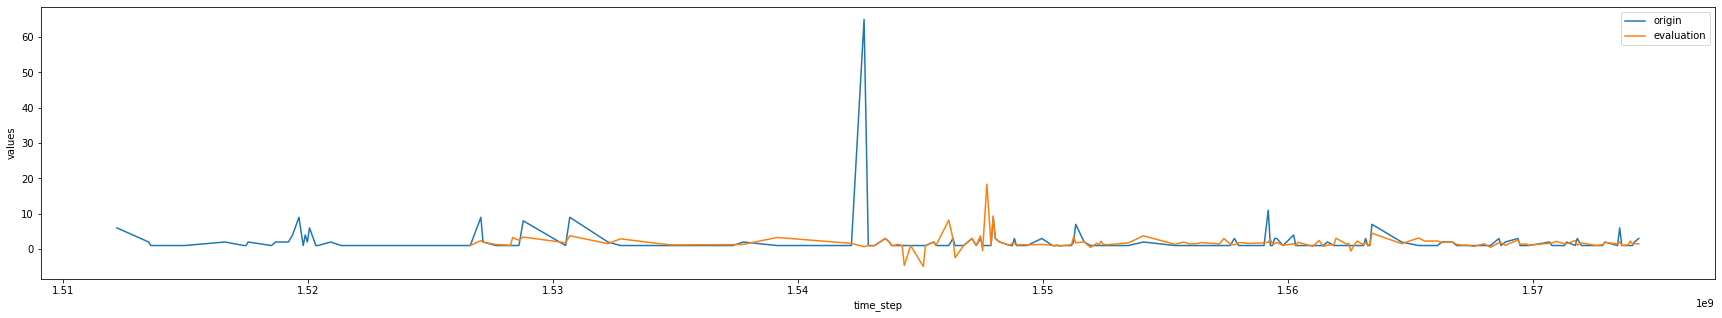

In [54]:
#plot origin and evaluation 
plt.figure(figsize=(30, 5))
plt.plot(data['times'].reshape(-1), data['values'].reshape(-1), label='origin')
plt.plot(evaluation['times'].reshape(-1), evaluation['mean'].reshape(-1), label='evaluation')
plt.xlabel('time_step')
plt.ylabel('values')
plt.legend()
plt.show()

In [55]:
#Tensorflow
#8-4- Plot the created issues
import tensorflow as tf
from tensorflow.contrib.timeseries.python.timeseries import  NumpyReader
import time

d3_tf_df_created = pd.read_csv('d3.csv')
d3_tf_df_created['ds'] = d3_tf_df_created['ds'].astype('datetime64[ns]')
array = d3_tf_df_created.to_numpy()
x = np.array([time.mktime(i[0].timetuple()) for i in array])
y = np.array([i[1] for i in array])


data = {
    tf.contrib.timeseries.TrainEvalFeatures.TIMES: x,
    tf.contrib.timeseries.TrainEvalFeatures.VALUES: y,
}
print (data)

reader = NumpyReader(data)

train_input_fn = tf.contrib.timeseries.RandomWindowInputFn(reader, batch_size = 40, window_size = 40)
ar = tf.contrib.timeseries.ARRegressor(
        periodicities=200, input_window_size=30, output_window_size=10,
        num_features=1,
        loss=tf.contrib.timeseries.ARModel.NORMAL_LIKELIHOOD_LOSS)
ar.train(input_fn=train_input_fn, steps=6000)


#evaluation

evaluation_input_fn = tf.contrib.timeseries.WholeDatasetInputFn(reader)
evaluation = ar.evaluate(input_fn=evaluation_input_fn, steps=1000)

#prediction
(predictions,) = tuple(ar.predict(
        input_fn=tf.contrib.timeseries.predict_continuation_input_fn(
            evaluation, steps=365)))



{'times': array([1.5113304e+09, 1.5119352e+09, 1.5121080e+09, 1.5127128e+09,
       1.5135768e+09, 1.5153912e+09, 1.5157368e+09, 1.5160824e+09,
       1.5164280e+09, 1.5166872e+09, 1.5171192e+09, 1.5172056e+09,
       1.5172920e+09, 1.5179832e+09, 1.5180696e+09, 1.5190200e+09,
       1.5196248e+09, 1.5197976e+09, 1.5198840e+09, 1.5199704e+09,
       1.5204024e+09, 1.5204888e+09, 1.5205752e+09, 1.5210900e+09,
       1.5211764e+09, 1.5214356e+09, 1.5215220e+09, 1.5216948e+09,
       1.5219540e+09, 1.5222132e+09, 1.5238548e+09, 1.5239412e+09,
       1.5246324e+09, 1.5248052e+09, 1.5250644e+09, 1.5646356e+09,
       1.5653268e+09, 1.5654132e+09, 1.5654996e+09, 1.5658452e+09,
       1.5659316e+09, 1.5668820e+09, 1.5669684e+09, 1.5671412e+09,
       1.5686964e+09, 1.5705108e+09, 1.5713748e+09, 1.5718068e+09,
       1.5729336e+09, 1.5737976e+09, 1.5740568e+09, 1.5741432e+09,
       1.5743160e+09]), 'values': array([2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 3, 1, 3, 1, 2, 1, 1, 2, 1, 2, 1,
       1, 1,

INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Saeid\\AppData\\Local\\Temp\\tmptqcx8teh', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000259AFE4AB48>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Saeid\\AppData\\Local\\Temp\\tmptqcx8teh', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000259AFE4AB48>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Saeid\AppData\Local\Temp\tmptqcx8teh\model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Saeid\AppData\Local\Temp\tmptqcx8teh\model.ckpt.


INFO:tensorflow:loss = 1.3166977, step = 1


INFO:tensorflow:loss = 1.3166977, step = 1


INFO:tensorflow:global_step/sec: 40.5766


INFO:tensorflow:global_step/sec: 40.5766


INFO:tensorflow:loss = 0.36260578, step = 101 (2.467 sec)


INFO:tensorflow:loss = 0.36260578, step = 101 (2.467 sec)


INFO:tensorflow:global_step/sec: 40.7584


INFO:tensorflow:global_step/sec: 40.7584


INFO:tensorflow:loss = 0.05151155, step = 201 (2.453 sec)


INFO:tensorflow:loss = 0.05151155, step = 201 (2.453 sec)


INFO:tensorflow:global_step/sec: 37.0188


INFO:tensorflow:global_step/sec: 37.0188


INFO:tensorflow:loss = -0.119835615, step = 301 (2.700 sec)


INFO:tensorflow:loss = -0.119835615, step = 301 (2.700 sec)


INFO:tensorflow:global_step/sec: 38.5892


INFO:tensorflow:global_step/sec: 38.5892


INFO:tensorflow:loss = 0.04751066, step = 401 (2.592 sec)


INFO:tensorflow:loss = 0.04751066, step = 401 (2.592 sec)


INFO:tensorflow:global_step/sec: 43.0004


INFO:tensorflow:global_step/sec: 43.0004


INFO:tensorflow:loss = -0.21840861, step = 501 (2.326 sec)


INFO:tensorflow:loss = -0.21840861, step = 501 (2.326 sec)


INFO:tensorflow:global_step/sec: 40.9754


INFO:tensorflow:global_step/sec: 40.9754


INFO:tensorflow:loss = -0.088457145, step = 601 (2.439 sec)


INFO:tensorflow:loss = -0.088457145, step = 601 (2.439 sec)


INFO:tensorflow:global_step/sec: 43.4673


INFO:tensorflow:global_step/sec: 43.4673


INFO:tensorflow:loss = -0.3661675, step = 701 (2.302 sec)


INFO:tensorflow:loss = -0.3661675, step = 701 (2.302 sec)


INFO:tensorflow:global_step/sec: 36.5189


INFO:tensorflow:global_step/sec: 36.5189


INFO:tensorflow:loss = -0.3826933, step = 801 (2.738 sec)


INFO:tensorflow:loss = -0.3826933, step = 801 (2.738 sec)


INFO:tensorflow:global_step/sec: 39.1019


INFO:tensorflow:global_step/sec: 39.1019


INFO:tensorflow:loss = -0.3662482, step = 901 (2.556 sec)


INFO:tensorflow:loss = -0.3662482, step = 901 (2.556 sec)


INFO:tensorflow:global_step/sec: 45.6695


INFO:tensorflow:global_step/sec: 45.6695


INFO:tensorflow:loss = -0.33639565, step = 1001 (2.191 sec)


INFO:tensorflow:loss = -0.33639565, step = 1001 (2.191 sec)


INFO:tensorflow:global_step/sec: 41.6404


INFO:tensorflow:global_step/sec: 41.6404


INFO:tensorflow:loss = -0.51040107, step = 1101 (2.405 sec)


INFO:tensorflow:loss = -0.51040107, step = 1101 (2.405 sec)


INFO:tensorflow:global_step/sec: 35.6092


INFO:tensorflow:global_step/sec: 35.6092


INFO:tensorflow:loss = -0.4573545, step = 1201 (2.804 sec)


INFO:tensorflow:loss = -0.4573545, step = 1201 (2.804 sec)


INFO:tensorflow:global_step/sec: 37.4623


INFO:tensorflow:global_step/sec: 37.4623


INFO:tensorflow:loss = -0.547151, step = 1301 (2.669 sec)


INFO:tensorflow:loss = -0.547151, step = 1301 (2.669 sec)


INFO:tensorflow:global_step/sec: 43.638


INFO:tensorflow:global_step/sec: 43.638


INFO:tensorflow:loss = -0.6636798, step = 1401 (2.294 sec)


INFO:tensorflow:loss = -0.6636798, step = 1401 (2.294 sec)


INFO:tensorflow:global_step/sec: 39.9608


INFO:tensorflow:global_step/sec: 39.9608


INFO:tensorflow:loss = -0.6606081, step = 1501 (2.503 sec)


INFO:tensorflow:loss = -0.6606081, step = 1501 (2.503 sec)


INFO:tensorflow:global_step/sec: 46.4756


INFO:tensorflow:global_step/sec: 46.4756


INFO:tensorflow:loss = -0.5688006, step = 1601 (2.150 sec)


INFO:tensorflow:loss = -0.5688006, step = 1601 (2.150 sec)


INFO:tensorflow:global_step/sec: 46.3679


INFO:tensorflow:global_step/sec: 46.3679


INFO:tensorflow:loss = -0.36368254, step = 1701 (2.157 sec)


INFO:tensorflow:loss = -0.36368254, step = 1701 (2.157 sec)


INFO:tensorflow:global_step/sec: 46.154


INFO:tensorflow:global_step/sec: 46.154


INFO:tensorflow:loss = -0.74507564, step = 1801 (2.166 sec)


INFO:tensorflow:loss = -0.74507564, step = 1801 (2.166 sec)


INFO:tensorflow:global_step/sec: 46.3464


INFO:tensorflow:global_step/sec: 46.3464


INFO:tensorflow:loss = -0.81238717, step = 1901 (2.159 sec)


INFO:tensorflow:loss = -0.81238717, step = 1901 (2.159 sec)


INFO:tensorflow:global_step/sec: 46.4755


INFO:tensorflow:global_step/sec: 46.4755


INFO:tensorflow:loss = -0.7951544, step = 2001 (2.152 sec)


INFO:tensorflow:loss = -0.7951544, step = 2001 (2.152 sec)


INFO:tensorflow:global_step/sec: 46.4324


INFO:tensorflow:global_step/sec: 46.4324


INFO:tensorflow:loss = -0.8183937, step = 2101 (2.154 sec)


INFO:tensorflow:loss = -0.8183937, step = 2101 (2.154 sec)


INFO:tensorflow:global_step/sec: 46.454


INFO:tensorflow:global_step/sec: 46.454


INFO:tensorflow:loss = -0.66440535, step = 2201 (2.153 sec)


INFO:tensorflow:loss = -0.66440535, step = 2201 (2.153 sec)


INFO:tensorflow:global_step/sec: 46.8454


INFO:tensorflow:global_step/sec: 46.8454


INFO:tensorflow:loss = -0.27545258, step = 2301 (2.134 sec)


INFO:tensorflow:loss = -0.27545258, step = 2301 (2.134 sec)


INFO:tensorflow:global_step/sec: 46.7579


INFO:tensorflow:global_step/sec: 46.7579


INFO:tensorflow:loss = -0.7172952, step = 2401 (2.140 sec)


INFO:tensorflow:loss = -0.7172952, step = 2401 (2.140 sec)


INFO:tensorflow:global_step/sec: 46.6272


INFO:tensorflow:global_step/sec: 46.6272


INFO:tensorflow:loss = -0.7057136, step = 2501 (2.143 sec)


INFO:tensorflow:loss = -0.7057136, step = 2501 (2.143 sec)


INFO:tensorflow:global_step/sec: 46.7797


INFO:tensorflow:global_step/sec: 46.7797


INFO:tensorflow:loss = -0.4428469, step = 2601 (2.139 sec)


INFO:tensorflow:loss = -0.4428469, step = 2601 (2.139 sec)


INFO:tensorflow:global_step/sec: 45.6904


INFO:tensorflow:global_step/sec: 45.6904


INFO:tensorflow:loss = -0.03313957, step = 2701 (2.189 sec)


INFO:tensorflow:loss = -0.03313957, step = 2701 (2.189 sec)


INFO:tensorflow:global_step/sec: 46.3894


INFO:tensorflow:global_step/sec: 46.3894


INFO:tensorflow:loss = -0.90547407, step = 2801 (2.156 sec)


INFO:tensorflow:loss = -0.90547407, step = 2801 (2.156 sec)


INFO:tensorflow:global_step/sec: 47.1767


INFO:tensorflow:global_step/sec: 47.1767


INFO:tensorflow:loss = -0.88685906, step = 2901 (2.120 sec)


INFO:tensorflow:loss = -0.88685906, step = 2901 (2.120 sec)


INFO:tensorflow:global_step/sec: 46.5404


INFO:tensorflow:global_step/sec: 46.5404


INFO:tensorflow:loss = -0.9407025, step = 3001 (2.149 sec)


INFO:tensorflow:loss = -0.9407025, step = 3001 (2.149 sec)


INFO:tensorflow:global_step/sec: 46.6925


INFO:tensorflow:global_step/sec: 46.6925


INFO:tensorflow:loss = -0.9343106, step = 3101 (2.143 sec)


INFO:tensorflow:loss = -0.9343106, step = 3101 (2.143 sec)


INFO:tensorflow:global_step/sec: 46.6271


INFO:tensorflow:global_step/sec: 46.6271


INFO:tensorflow:loss = -0.91447735, step = 3201 (2.145 sec)


INFO:tensorflow:loss = -0.91447735, step = 3201 (2.145 sec)


INFO:tensorflow:global_step/sec: 46.6924


INFO:tensorflow:global_step/sec: 46.6924


INFO:tensorflow:loss = -0.6070338, step = 3301 (2.141 sec)


INFO:tensorflow:loss = -0.6070338, step = 3301 (2.141 sec)


INFO:tensorflow:global_step/sec: 46.0478


INFO:tensorflow:global_step/sec: 46.0478


INFO:tensorflow:loss = -0.9044037, step = 3401 (2.172 sec)


INFO:tensorflow:loss = -0.9044037, step = 3401 (2.172 sec)


INFO:tensorflow:global_step/sec: 39.317


INFO:tensorflow:global_step/sec: 39.317


INFO:tensorflow:loss = -0.9866641, step = 3501 (2.543 sec)


INFO:tensorflow:loss = -0.9866641, step = 3501 (2.543 sec)


INFO:tensorflow:global_step/sec: 46.3679


INFO:tensorflow:global_step/sec: 46.3679


INFO:tensorflow:loss = -0.99218094, step = 3601 (2.158 sec)


INFO:tensorflow:loss = -0.99218094, step = 3601 (2.158 sec)


INFO:tensorflow:global_step/sec: 46.2607


INFO:tensorflow:global_step/sec: 46.2607


INFO:tensorflow:loss = -0.5373022, step = 3701 (2.161 sec)


INFO:tensorflow:loss = -0.5373022, step = 3701 (2.161 sec)


INFO:tensorflow:global_step/sec: 46.2821


INFO:tensorflow:global_step/sec: 46.2821


INFO:tensorflow:loss = -0.9599435, step = 3801 (2.162 sec)


INFO:tensorflow:loss = -0.9599435, step = 3801 (2.162 sec)


INFO:tensorflow:global_step/sec: 46.6706


INFO:tensorflow:global_step/sec: 46.6706


INFO:tensorflow:loss = -0.42299303, step = 3901 (2.143 sec)


INFO:tensorflow:loss = -0.42299303, step = 3901 (2.143 sec)


INFO:tensorflow:global_step/sec: 46.3035


INFO:tensorflow:global_step/sec: 46.3035


INFO:tensorflow:loss = -1.0115672, step = 4001 (2.160 sec)


INFO:tensorflow:loss = -1.0115672, step = 4001 (2.160 sec)


INFO:tensorflow:global_step/sec: 47.0216


INFO:tensorflow:global_step/sec: 47.0216


INFO:tensorflow:loss = -1.018103, step = 4101 (2.127 sec)


INFO:tensorflow:loss = -1.018103, step = 4101 (2.127 sec)


INFO:tensorflow:global_step/sec: 46.8235


INFO:tensorflow:global_step/sec: 46.8235


INFO:tensorflow:loss = -0.96833295, step = 4201 (2.135 sec)


INFO:tensorflow:loss = -0.96833295, step = 4201 (2.135 sec)


INFO:tensorflow:global_step/sec: 46.454


INFO:tensorflow:global_step/sec: 46.454


INFO:tensorflow:loss = -0.87670135, step = 4301 (2.153 sec)


INFO:tensorflow:loss = -0.87670135, step = 4301 (2.153 sec)


INFO:tensorflow:global_step/sec: 46.6707


INFO:tensorflow:global_step/sec: 46.6707


INFO:tensorflow:loss = -0.98414624, step = 4401 (2.144 sec)


INFO:tensorflow:loss = -0.98414624, step = 4401 (2.144 sec)


INFO:tensorflow:global_step/sec: 46.2179


INFO:tensorflow:global_step/sec: 46.2179


INFO:tensorflow:loss = -0.49045008, step = 4501 (2.163 sec)


INFO:tensorflow:loss = -0.49045008, step = 4501 (2.163 sec)


INFO:tensorflow:global_step/sec: 46.4108


INFO:tensorflow:global_step/sec: 46.4108


INFO:tensorflow:loss = -1.0689772, step = 4601 (2.156 sec)


INFO:tensorflow:loss = -1.0689772, step = 4601 (2.156 sec)


INFO:tensorflow:global_step/sec: 46.7579


INFO:tensorflow:global_step/sec: 46.7579


INFO:tensorflow:loss = -1.059351, step = 4701 (2.138 sec)


INFO:tensorflow:loss = -1.059351, step = 4701 (2.138 sec)


INFO:tensorflow:global_step/sec: 46.7579


INFO:tensorflow:global_step/sec: 46.7579


INFO:tensorflow:loss = -0.5656937, step = 4801 (2.138 sec)


INFO:tensorflow:loss = -0.5656937, step = 4801 (2.138 sec)


INFO:tensorflow:global_step/sec: 46.1753


INFO:tensorflow:global_step/sec: 46.1753


INFO:tensorflow:loss = -1.0635705, step = 4901 (2.168 sec)


INFO:tensorflow:loss = -1.0635705, step = 4901 (2.168 sec)


INFO:tensorflow:global_step/sec: 46.8016


INFO:tensorflow:global_step/sec: 46.8016


INFO:tensorflow:loss = -0.88699186, step = 5001 (2.136 sec)


INFO:tensorflow:loss = -0.88699186, step = 5001 (2.136 sec)


INFO:tensorflow:global_step/sec: 46.8674


INFO:tensorflow:global_step/sec: 46.8674


INFO:tensorflow:loss = -0.97759885, step = 5101 (2.142 sec)


INFO:tensorflow:loss = -0.97759885, step = 5101 (2.142 sec)


INFO:tensorflow:global_step/sec: 46.4109


INFO:tensorflow:global_step/sec: 46.4109


INFO:tensorflow:loss = -1.0857551, step = 5201 (2.147 sec)


INFO:tensorflow:loss = -1.0857551, step = 5201 (2.147 sec)


INFO:tensorflow:global_step/sec: 46.8674


INFO:tensorflow:global_step/sec: 46.8674


INFO:tensorflow:loss = -0.76181304, step = 5301 (2.143 sec)


INFO:tensorflow:loss = -0.76181304, step = 5301 (2.143 sec)


INFO:tensorflow:global_step/sec: 46.9333


INFO:tensorflow:global_step/sec: 46.9333


INFO:tensorflow:loss = -0.8520362, step = 5401 (2.122 sec)


INFO:tensorflow:loss = -0.8520362, step = 5401 (2.122 sec)


INFO:tensorflow:global_step/sec: 46.3464


INFO:tensorflow:global_step/sec: 46.3464


INFO:tensorflow:loss = -0.64202636, step = 5501 (2.158 sec)


INFO:tensorflow:loss = -0.64202636, step = 5501 (2.158 sec)


INFO:tensorflow:global_step/sec: 47.0437


INFO:tensorflow:global_step/sec: 47.0437


INFO:tensorflow:loss = -0.9161273, step = 5601 (2.126 sec)


INFO:tensorflow:loss = -0.9161273, step = 5601 (2.126 sec)


INFO:tensorflow:global_step/sec: 47.0437


INFO:tensorflow:global_step/sec: 47.0437


INFO:tensorflow:loss = -0.4160498, step = 5701 (2.126 sec)


INFO:tensorflow:loss = -0.4160498, step = 5701 (2.126 sec)


INFO:tensorflow:global_step/sec: 46.4755


INFO:tensorflow:global_step/sec: 46.4755


INFO:tensorflow:loss = -1.1135752, step = 5801 (2.153 sec)


INFO:tensorflow:loss = -1.1135752, step = 5801 (2.153 sec)


INFO:tensorflow:global_step/sec: 45.8159


INFO:tensorflow:global_step/sec: 45.8159


INFO:tensorflow:loss = -1.0015451, step = 5901 (2.183 sec)


INFO:tensorflow:loss = -1.0015451, step = 5901 (2.183 sec)


INFO:tensorflow:Saving checkpoints for 6000 into C:\Users\Saeid\AppData\Local\Temp\tmptqcx8teh\model.ckpt.


INFO:tensorflow:Saving checkpoints for 6000 into C:\Users\Saeid\AppData\Local\Temp\tmptqcx8teh\model.ckpt.


INFO:tensorflow:Loss for final step: -0.65788573.


INFO:tensorflow:Loss for final step: -0.65788573.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2019-11-23T21:39:25Z


INFO:tensorflow:Starting evaluation at 2019-11-23T21:39:25Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmptqcx8teh\model.ckpt-6000


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmptqcx8teh\model.ckpt-6000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Evaluation [100/1000]


INFO:tensorflow:Evaluation [100/1000]


INFO:tensorflow:Evaluation [200/1000]


INFO:tensorflow:Evaluation [200/1000]


INFO:tensorflow:Evaluation [300/1000]


INFO:tensorflow:Evaluation [300/1000]


INFO:tensorflow:Evaluation [400/1000]


INFO:tensorflow:Evaluation [400/1000]


INFO:tensorflow:Evaluation [500/1000]


INFO:tensorflow:Evaluation [500/1000]


INFO:tensorflow:Evaluation [600/1000]


INFO:tensorflow:Evaluation [600/1000]


INFO:tensorflow:Evaluation [700/1000]


INFO:tensorflow:Evaluation [700/1000]


INFO:tensorflow:Evaluation [800/1000]


INFO:tensorflow:Evaluation [800/1000]


INFO:tensorflow:Evaluation [900/1000]


INFO:tensorflow:Evaluation [900/1000]


INFO:tensorflow:Evaluation [1000/1000]


INFO:tensorflow:Evaluation [1000/1000]


INFO:tensorflow:Finished evaluation at 2019-11-23-21:39:27


INFO:tensorflow:Finished evaluation at 2019-11-23-21:39:27


INFO:tensorflow:Saving dict for global step 6000: average_loss = -0.86920595, covariance = [[[7.2847739e-05]
  [9.2805116e-05]
  [1.0190296e-04]
  [7.2962248e-05]
  [8.8396802e-05]
  [8.1764047e-05]
  [9.8823890e-05]
  [8.8182598e-05]
  [9.2866467e-05]
  [7.6486831e-05]
  [6.7860965e-05]
  [8.6727152e-05]
  [6.7556837e-05]
  [1.0071325e-04]
  [6.8942965e-05]
  [5.5580065e-05]
  [6.2103696e-05]
  [8.3056322e-05]
  [6.8105132e-05]
  [6.3394327e-05]]], global_step = 6000, loss = -0.86920595, mean = [[[0.99994314]
  [0.99999964]
  [0.99997205]
  [2.0000193 ]
  [0.9712734 ]
  [1.0001465 ]
  [1.9999743 ]
  [0.99982595]
  [1.0007555 ]
  [1.0000001 ]
  [1.0000274 ]
  [1.0000005 ]
  [1.9985932 ]
  [0.99991566]
  [0.98730946]
  [0.9999045 ]
  [1.0000442 ]
  [1.0003196 ]
  [0.99992824]
  [0.9999625 ]]], observed = [[[1.]
  [1.]
  [1.]
  [2.]
  [1.]
  [1.]
  [2.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [2.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]]], start_tuple = (array([[1521090000, 1521176

INFO:tensorflow:Saving dict for global step 6000: average_loss = -0.86920595, covariance = [[[7.2847739e-05]
  [9.2805116e-05]
  [1.0190296e-04]
  [7.2962248e-05]
  [8.8396802e-05]
  [8.1764047e-05]
  [9.8823890e-05]
  [8.8182598e-05]
  [9.2866467e-05]
  [7.6486831e-05]
  [6.7860965e-05]
  [8.6727152e-05]
  [6.7556837e-05]
  [1.0071325e-04]
  [6.8942965e-05]
  [5.5580065e-05]
  [6.2103696e-05]
  [8.3056322e-05]
  [6.8105132e-05]
  [6.3394327e-05]]], global_step = 6000, loss = -0.86920595, mean = [[[0.99994314]
  [0.99999964]
  [0.99997205]
  [2.0000193 ]
  [0.9712734 ]
  [1.0001465 ]
  [1.9999743 ]
  [0.99982595]
  [1.0007555 ]
  [1.0000001 ]
  [1.0000274 ]
  [1.0000005 ]
  [1.9985932 ]
  [0.99991566]
  [0.98730946]
  [0.9999045 ]
  [1.0000442 ]
  [1.0003196 ]
  [0.99992824]
  [0.9999625 ]]], observed = [[[1.]
  [1.]
  [1.]
  [2.]
  [1.]
  [1.]
  [2.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [2.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]]], start_tuple = (array([[1521090000, 1521176

INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6000: C:\Users\Saeid\AppData\Local\Temp\tmptqcx8teh\model.ckpt-6000


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6000: C:\Users\Saeid\AppData\Local\Temp\tmptqcx8teh\model.ckpt-6000


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmptqcx8teh\model.ckpt-6000


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmptqcx8teh\model.ckpt-6000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


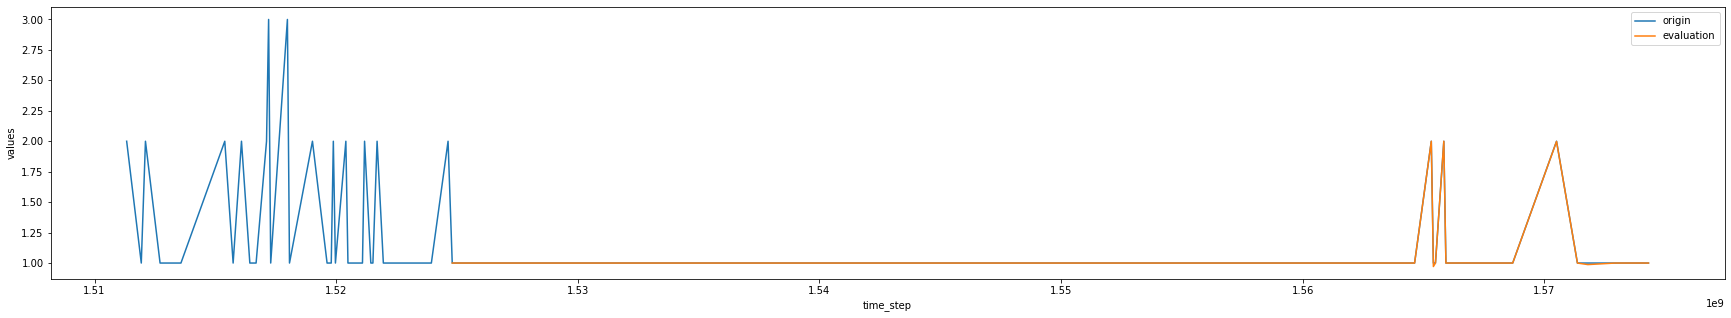

In [56]:
#plot origin and evaluation 
plt.figure(figsize=(30, 5))
plt.plot(data['times'].reshape(-1), data['values'].reshape(-1), label='origin')
plt.plot(evaluation['times'].reshape(-1), evaluation['mean'].reshape(-1), label='evaluation')
plt.xlabel('time_step')
plt.ylabel('values')
plt.legend()
plt.show()

In [99]:
#Tensorflow
#8-5- Plot the closed issues
from pandas import read_csv
import tensorflow as tf
from tensorflow.contrib.timeseries.python.timeseries import  NumpyReader
import time
import matplotlib.pyplot as plt


def transorflowFunction(tensorflowDataFrame):
   tensorflowDataFrame['ds'] = tensorflowDataFrame['ds'].astype('datetime64[ns]')
   array = tensorflowDataFrame.to_numpy()
   x = np.array([time.mktime(i[0].timetuple()) for i in array])
   y = np.array([i[1] for i in array])


   data = {
            tf.contrib.timeseries.TrainEvalFeatures.TIMES: x,
            tf.contrib.timeseries.TrainEvalFeatures.VALUES: y,
          }
   print (data)

   reader = NumpyReader(data)

   train_input_fn = tf.contrib.timeseries.RandomWindowInputFn(reader, batch_size = 40, window_size = 40)
   ar = tf.contrib.timeseries.ARRegressor(
        periodicities=200, input_window_size=30, output_window_size=10,
        num_features=1,
        loss=tf.contrib.timeseries.ARModel.NORMAL_LIKELIHOOD_LOSS)
   ar.train(input_fn=train_input_fn, steps=6000)


#evaluation

   evaluation_input_fn = tf.contrib.timeseries.WholeDatasetInputFn(reader)
   evaluation = ar.evaluate(input_fn=evaluation_input_fn, steps=1000)

#prediction
   (predictions,) = tuple(ar.predict(
        input_fn=tf.contrib.timeseries.predict_continuation_input_fn(
            evaluation, steps=365)))
#plot origin and evaluation for angular repo
   plt.figure(figsize=(30, 5))
   plt.plot(data['times'].reshape(-1), data['values'].reshape(-1), label='origin')
   plt.plot(evaluation['times'].reshape(-1), evaluation['mean'].reshape(-1), label='evaluation')
   plt.xlabel('time_step')
   plt.ylabel('values')
   plt.legend()
   plt.show()

    
def tensorflow_newdf_closed(newdf):
    s = newdf.groupby(['closed_at'])['closed_at']
    s1 = s.describe()
    temp_df = pd.DataFrame()
    temp_df = s1[['top', 'count']]
    temp_df.columns = ['ds', 'y']
    return temp_df

angular_tf_df = pd.DataFrame(tensorflow_newdf_closed(angular_df))
material_tf_df = pd.DataFrame(tensorflow_newdf_closed(material_df))
angular_cli_tf_df = pd.DataFrame(tensorflow_newdf_closed(angular_cli_df))
googleMaps_tf_df = pd.DataFrame(tensorflow_newdf_closed(googleMaps_df))
d3_tf_df = pd.DataFrame(tensorflow_newdf_closed(d3_df))

angular_tf_df.to_csv('angular_tf_closed.csv', sep = ',', encoding = 'utf-8', index = False)
material_tf_df.to_csv('material_tf_closed.csv', sep = ',', encoding = 'utf-8', index = False)
angular_cli_tf_df.to_csv('angular_cli_tf_closed.csv', sep = ',', encoding = 'utf-8', index = False)
googleMaps_tf_df.to_csv('angular_google_tf_closed.csv', sep = ',', encoding = 'utf-8', index = False)
d3_tf_df.to_csv('d3_tf_closed.csv', sep = ',', encoding = 'utf-8', index = False)








{'times': array([1.5114168e+09, 1.5115032e+09, 1.5116760e+09, 1.5117624e+09,
       1.5118488e+09, 1.5119352e+09, 1.5120216e+09, 1.5121080e+09,
       1.5121944e+09, 1.5122808e+09, 1.5123672e+09, 1.5124536e+09,
       1.5125400e+09, 1.5126264e+09, 1.5127128e+09, 1.5127992e+09,
       1.5128856e+09, 1.5129720e+09, 1.5130584e+09, 1.5131448e+09,
       1.5132312e+09, 1.5133176e+09, 1.5135768e+09, 1.5136632e+09,
       1.5137496e+09, 1.5138360e+09, 1.5139224e+09, 1.5140088e+09,
       1.5140952e+09, 1.5141816e+09, 1.5142680e+09, 1.5143544e+09,
       1.5144408e+09, 1.5145272e+09, 1.5146136e+09, 1.5147000e+09,
       1.5147864e+09, 1.5148728e+09, 1.5149592e+09, 1.5150456e+09,
       1.5151320e+09, 1.5152184e+09, 1.5153048e+09, 1.5153912e+09,
       1.5154776e+09, 1.5155640e+09, 1.5156504e+09, 1.5157368e+09,
       1.5158232e+09, 1.5159096e+09, 1.5159960e+09, 1.5160824e+09,
       1.5161688e+09, 1.5162552e+09, 1.5163416e+09, 1.5164280e+09,
       1.5166008e+09, 1.5166872e+09, 1.5167736e+09, 

INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Saeid\\AppData\\Local\\Temp\\tmp_4n7wqvd', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000259B37D9B48>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Saeid\\AppData\\Local\\Temp\\tmp_4n7wqvd', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000259B37D9B48>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Saeid\AppData\Local\Temp\tmp_4n7wqvd\model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Saeid\AppData\Local\Temp\tmp_4n7wqvd\model.ckpt.


INFO:tensorflow:loss = 1.5083948, step = 1


INFO:tensorflow:loss = 1.5083948, step = 1


INFO:tensorflow:global_step/sec: 221.867


INFO:tensorflow:global_step/sec: 221.867


INFO:tensorflow:loss = 1.2798231, step = 101 (0.461 sec)


INFO:tensorflow:loss = 1.2798231, step = 101 (0.461 sec)


INFO:tensorflow:global_step/sec: 139.751


INFO:tensorflow:global_step/sec: 139.751


INFO:tensorflow:loss = 1.2448633, step = 201 (0.710 sec)


INFO:tensorflow:loss = 1.2448633, step = 201 (0.710 sec)


INFO:tensorflow:global_step/sec: 140.734


INFO:tensorflow:global_step/sec: 140.734


INFO:tensorflow:loss = 1.239893, step = 301 (0.711 sec)


INFO:tensorflow:loss = 1.239893, step = 301 (0.711 sec)


INFO:tensorflow:global_step/sec: 145.017


INFO:tensorflow:global_step/sec: 145.017


INFO:tensorflow:loss = 1.2984055, step = 401 (0.691 sec)


INFO:tensorflow:loss = 1.2984055, step = 401 (0.691 sec)


INFO:tensorflow:global_step/sec: 145.439


INFO:tensorflow:global_step/sec: 145.439


INFO:tensorflow:loss = 1.2659566, step = 501 (0.685 sec)


INFO:tensorflow:loss = 1.2659566, step = 501 (0.685 sec)


INFO:tensorflow:global_step/sec: 145.439


INFO:tensorflow:global_step/sec: 145.439


INFO:tensorflow:loss = 1.3092306, step = 601 (0.690 sec)


INFO:tensorflow:loss = 1.3092306, step = 601 (0.690 sec)


INFO:tensorflow:global_step/sec: 147.15


INFO:tensorflow:global_step/sec: 147.15


INFO:tensorflow:loss = 1.2660953, step = 701 (0.679 sec)


INFO:tensorflow:loss = 1.2660953, step = 701 (0.679 sec)


INFO:tensorflow:global_step/sec: 150.018


INFO:tensorflow:global_step/sec: 150.018


INFO:tensorflow:loss = 1.2679874, step = 801 (0.667 sec)


INFO:tensorflow:loss = 1.2679874, step = 801 (0.667 sec)


INFO:tensorflow:global_step/sec: 147.584


INFO:tensorflow:global_step/sec: 147.584


INFO:tensorflow:loss = 1.2430136, step = 901 (0.678 sec)


INFO:tensorflow:loss = 1.2430136, step = 901 (0.678 sec)


INFO:tensorflow:global_step/sec: 148.24


INFO:tensorflow:global_step/sec: 148.24


INFO:tensorflow:loss = 1.2487708, step = 1001 (0.676 sec)


INFO:tensorflow:loss = 1.2487708, step = 1001 (0.676 sec)


INFO:tensorflow:global_step/sec: 150.243


INFO:tensorflow:global_step/sec: 150.243


INFO:tensorflow:loss = 1.235415, step = 1101 (0.673 sec)


INFO:tensorflow:loss = 1.235415, step = 1101 (0.673 sec)


INFO:tensorflow:global_step/sec: 147.366


INFO:tensorflow:global_step/sec: 147.366


INFO:tensorflow:loss = 1.2712246, step = 1201 (0.672 sec)


INFO:tensorflow:loss = 1.2712246, step = 1201 (0.672 sec)


INFO:tensorflow:global_step/sec: 147.802


INFO:tensorflow:global_step/sec: 147.802


INFO:tensorflow:loss = 1.2222693, step = 1301 (0.676 sec)


INFO:tensorflow:loss = 1.2222693, step = 1301 (0.676 sec)


INFO:tensorflow:global_step/sec: 148.68


INFO:tensorflow:global_step/sec: 148.68


INFO:tensorflow:loss = 1.2518966, step = 1401 (0.674 sec)


INFO:tensorflow:loss = 1.2518966, step = 1401 (0.674 sec)


INFO:tensorflow:global_step/sec: 150.469


INFO:tensorflow:global_step/sec: 150.469


INFO:tensorflow:loss = 1.2569265, step = 1501 (0.664 sec)


INFO:tensorflow:loss = 1.2569265, step = 1501 (0.664 sec)


INFO:tensorflow:global_step/sec: 150.018


INFO:tensorflow:global_step/sec: 150.018


INFO:tensorflow:loss = 1.2534413, step = 1601 (0.668 sec)


INFO:tensorflow:loss = 1.2534413, step = 1601 (0.668 sec)


INFO:tensorflow:global_step/sec: 152.533


INFO:tensorflow:global_step/sec: 152.533


INFO:tensorflow:loss = 1.2846817, step = 1701 (0.655 sec)


INFO:tensorflow:loss = 1.2846817, step = 1701 (0.655 sec)


INFO:tensorflow:global_step/sec: 152.301


INFO:tensorflow:global_step/sec: 152.301


INFO:tensorflow:loss = 1.2767922, step = 1801 (0.657 sec)


INFO:tensorflow:loss = 1.2767922, step = 1801 (0.657 sec)


INFO:tensorflow:global_step/sec: 148.24


INFO:tensorflow:global_step/sec: 148.24


INFO:tensorflow:loss = 1.2832286, step = 1901 (0.674 sec)


INFO:tensorflow:loss = 1.2832286, step = 1901 (0.674 sec)


INFO:tensorflow:global_step/sec: 149.793


INFO:tensorflow:global_step/sec: 149.793


INFO:tensorflow:loss = 1.2510566, step = 2001 (0.669 sec)


INFO:tensorflow:loss = 1.2510566, step = 2001 (0.669 sec)


INFO:tensorflow:global_step/sec: 150.018


INFO:tensorflow:global_step/sec: 150.018


INFO:tensorflow:loss = 1.2302274, step = 2101 (0.668 sec)


INFO:tensorflow:loss = 1.2302274, step = 2101 (0.668 sec)


INFO:tensorflow:global_step/sec: 137.259


INFO:tensorflow:global_step/sec: 137.259


INFO:tensorflow:loss = 1.2197883, step = 2201 (0.733 sec)


INFO:tensorflow:loss = 1.2197883, step = 2201 (0.733 sec)


INFO:tensorflow:global_step/sec: 149.346


INFO:tensorflow:global_step/sec: 149.346


INFO:tensorflow:loss = 1.2246127, step = 2301 (0.664 sec)


INFO:tensorflow:loss = 1.2246127, step = 2301 (0.664 sec)


INFO:tensorflow:global_step/sec: 148.46


INFO:tensorflow:global_step/sec: 148.46


INFO:tensorflow:loss = 1.2697076, step = 2401 (0.675 sec)


INFO:tensorflow:loss = 1.2697076, step = 2401 (0.675 sec)


INFO:tensorflow:global_step/sec: 146.934


INFO:tensorflow:global_step/sec: 146.934


INFO:tensorflow:loss = 1.2398243, step = 2501 (0.680 sec)


INFO:tensorflow:loss = 1.2398243, step = 2501 (0.680 sec)


INFO:tensorflow:global_step/sec: 147.802


INFO:tensorflow:global_step/sec: 147.802


INFO:tensorflow:loss = 1.230051, step = 2601 (0.678 sec)


INFO:tensorflow:loss = 1.230051, step = 2601 (0.678 sec)


INFO:tensorflow:global_step/sec: 148.24


INFO:tensorflow:global_step/sec: 148.24


INFO:tensorflow:loss = 1.2868538, step = 2701 (0.675 sec)


INFO:tensorflow:loss = 1.2868538, step = 2701 (0.675 sec)


INFO:tensorflow:global_step/sec: 146.504


INFO:tensorflow:global_step/sec: 146.504


INFO:tensorflow:loss = 1.2745721, step = 2801 (0.683 sec)


INFO:tensorflow:loss = 1.2745721, step = 2801 (0.683 sec)


INFO:tensorflow:global_step/sec: 150.018


INFO:tensorflow:global_step/sec: 150.018


INFO:tensorflow:loss = 1.250982, step = 2901 (0.672 sec)


INFO:tensorflow:loss = 1.250982, step = 2901 (0.672 sec)


INFO:tensorflow:global_step/sec: 149.346


INFO:tensorflow:global_step/sec: 149.346


INFO:tensorflow:loss = 1.2354976, step = 3001 (0.665 sec)


INFO:tensorflow:loss = 1.2354976, step = 3001 (0.665 sec)


INFO:tensorflow:global_step/sec: 150.243


INFO:tensorflow:global_step/sec: 150.243


INFO:tensorflow:loss = 1.2515948, step = 3101 (0.666 sec)


INFO:tensorflow:loss = 1.2515948, step = 3101 (0.666 sec)


INFO:tensorflow:global_step/sec: 150.923


INFO:tensorflow:global_step/sec: 150.923


INFO:tensorflow:loss = 1.2200078, step = 3201 (0.663 sec)


INFO:tensorflow:loss = 1.2200078, step = 3201 (0.663 sec)


INFO:tensorflow:global_step/sec: 149.346


INFO:tensorflow:global_step/sec: 149.346


INFO:tensorflow:loss = 1.25759, step = 3301 (0.669 sec)


INFO:tensorflow:loss = 1.25759, step = 3301 (0.669 sec)


INFO:tensorflow:global_step/sec: 151.609


INFO:tensorflow:global_step/sec: 151.609


INFO:tensorflow:loss = 1.2494793, step = 3401 (0.662 sec)


INFO:tensorflow:loss = 1.2494793, step = 3401 (0.662 sec)


INFO:tensorflow:global_step/sec: 151.609


INFO:tensorflow:global_step/sec: 151.609


INFO:tensorflow:loss = 1.2604859, step = 3501 (0.659 sec)


INFO:tensorflow:loss = 1.2604859, step = 3501 (0.659 sec)


INFO:tensorflow:global_step/sec: 146.718


INFO:tensorflow:global_step/sec: 146.718


INFO:tensorflow:loss = 1.2668304, step = 3601 (0.682 sec)


INFO:tensorflow:loss = 1.2668304, step = 3601 (0.682 sec)


INFO:tensorflow:global_step/sec: 119.263


INFO:tensorflow:global_step/sec: 119.263


INFO:tensorflow:loss = 1.221544, step = 3701 (0.838 sec)


INFO:tensorflow:loss = 1.221544, step = 3701 (0.838 sec)


INFO:tensorflow:global_step/sec: 137.259


INFO:tensorflow:global_step/sec: 137.259


INFO:tensorflow:loss = 1.2597275, step = 3801 (0.731 sec)


INFO:tensorflow:loss = 1.2597275, step = 3801 (0.731 sec)


INFO:tensorflow:global_step/sec: 121.434


INFO:tensorflow:global_step/sec: 121.434


INFO:tensorflow:loss = 1.2600142, step = 3901 (0.821 sec)


INFO:tensorflow:loss = 1.2600142, step = 3901 (0.821 sec)


INFO:tensorflow:global_step/sec: 142.742


INFO:tensorflow:global_step/sec: 142.742


INFO:tensorflow:loss = 1.2890544, step = 4001 (0.701 sec)


INFO:tensorflow:loss = 1.2890544, step = 4001 (0.701 sec)


INFO:tensorflow:global_step/sec: 145.651


INFO:tensorflow:global_step/sec: 145.651


INFO:tensorflow:loss = 1.2903112, step = 4101 (0.687 sec)


INFO:tensorflow:loss = 1.2903112, step = 4101 (0.687 sec)


INFO:tensorflow:global_step/sec: 130.629


INFO:tensorflow:global_step/sec: 130.629


INFO:tensorflow:loss = 1.2492847, step = 4201 (0.767 sec)


INFO:tensorflow:loss = 1.2492847, step = 4201 (0.767 sec)


INFO:tensorflow:global_step/sec: 139.362


INFO:tensorflow:global_step/sec: 139.362


INFO:tensorflow:loss = 1.2777513, step = 4301 (0.716 sec)


INFO:tensorflow:loss = 1.2777513, step = 4301 (0.716 sec)


INFO:tensorflow:global_step/sec: 143.561


INFO:tensorflow:global_step/sec: 143.561


INFO:tensorflow:loss = 1.2378727, step = 4401 (0.699 sec)


INFO:tensorflow:loss = 1.2378727, step = 4401 (0.699 sec)


INFO:tensorflow:global_step/sec: 146.718


INFO:tensorflow:global_step/sec: 146.718


INFO:tensorflow:loss = 1.2631629, step = 4501 (0.680 sec)


INFO:tensorflow:loss = 1.2631629, step = 4501 (0.680 sec)


INFO:tensorflow:global_step/sec: 140.536


INFO:tensorflow:global_step/sec: 140.536


INFO:tensorflow:loss = 1.3028774, step = 4601 (0.713 sec)


INFO:tensorflow:loss = 1.3028774, step = 4601 (0.713 sec)


INFO:tensorflow:global_step/sec: 149.123


INFO:tensorflow:global_step/sec: 149.123


INFO:tensorflow:loss = 1.2730955, step = 4701 (0.671 sec)


INFO:tensorflow:loss = 1.2730955, step = 4701 (0.671 sec)


INFO:tensorflow:global_step/sec: 140.537


INFO:tensorflow:global_step/sec: 140.537


INFO:tensorflow:loss = 1.2594463, step = 4801 (0.713 sec)


INFO:tensorflow:loss = 1.2594463, step = 4801 (0.713 sec)


INFO:tensorflow:global_step/sec: 118.838


INFO:tensorflow:global_step/sec: 118.838


INFO:tensorflow:loss = 1.2320303, step = 4901 (0.843 sec)


INFO:tensorflow:loss = 1.2320303, step = 4901 (0.843 sec)


INFO:tensorflow:global_step/sec: 120.994


INFO:tensorflow:global_step/sec: 120.994


INFO:tensorflow:loss = 1.2827203, step = 5001 (0.824 sec)


INFO:tensorflow:loss = 1.2827203, step = 5001 (0.824 sec)


INFO:tensorflow:global_step/sec: 143.15


INFO:tensorflow:global_step/sec: 143.15


INFO:tensorflow:loss = 1.2199854, step = 5101 (0.698 sec)


INFO:tensorflow:loss = 1.2199854, step = 5101 (0.698 sec)


INFO:tensorflow:global_step/sec: 147.367


INFO:tensorflow:global_step/sec: 147.367


INFO:tensorflow:loss = 1.2948998, step = 5201 (0.678 sec)


INFO:tensorflow:loss = 1.2948998, step = 5201 (0.678 sec)


INFO:tensorflow:global_step/sec: 122.625


INFO:tensorflow:global_step/sec: 122.625


INFO:tensorflow:loss = 1.3048302, step = 5301 (0.816 sec)


INFO:tensorflow:loss = 1.3048302, step = 5301 (0.816 sec)


INFO:tensorflow:global_step/sec: 113.32


INFO:tensorflow:global_step/sec: 113.32


INFO:tensorflow:loss = 1.2586598, step = 5401 (0.910 sec)


INFO:tensorflow:loss = 1.2586598, step = 5401 (0.910 sec)


INFO:tensorflow:global_step/sec: 89.5007


INFO:tensorflow:global_step/sec: 89.5007


INFO:tensorflow:loss = 1.2763641, step = 5501 (1.090 sec)


INFO:tensorflow:loss = 1.2763641, step = 5501 (1.090 sec)


INFO:tensorflow:global_step/sec: 123.686


INFO:tensorflow:global_step/sec: 123.686


INFO:tensorflow:loss = 1.2234707, step = 5601 (0.816 sec)


INFO:tensorflow:loss = 1.2234707, step = 5601 (0.816 sec)


INFO:tensorflow:global_step/sec: 135.402


INFO:tensorflow:global_step/sec: 135.402


INFO:tensorflow:loss = 1.2524447, step = 5701 (0.731 sec)


INFO:tensorflow:loss = 1.2524447, step = 5701 (0.731 sec)


INFO:tensorflow:global_step/sec: 111.427


INFO:tensorflow:global_step/sec: 111.427


INFO:tensorflow:loss = 1.2060568, step = 5801 (0.898 sec)


INFO:tensorflow:loss = 1.2060568, step = 5801 (0.898 sec)


INFO:tensorflow:global_step/sec: 136.51


INFO:tensorflow:global_step/sec: 136.51


INFO:tensorflow:loss = 1.2986534, step = 5901 (0.731 sec)


INFO:tensorflow:loss = 1.2986534, step = 5901 (0.731 sec)


INFO:tensorflow:Saving checkpoints for 6000 into C:\Users\Saeid\AppData\Local\Temp\tmp_4n7wqvd\model.ckpt.


INFO:tensorflow:Saving checkpoints for 6000 into C:\Users\Saeid\AppData\Local\Temp\tmp_4n7wqvd\model.ckpt.


INFO:tensorflow:Loss for final step: 1.2512621.


INFO:tensorflow:Loss for final step: 1.2512621.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2019-11-24T00:52:55Z


INFO:tensorflow:Starting evaluation at 2019-11-24T00:52:55Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmp_4n7wqvd\model.ckpt-6000


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmp_4n7wqvd\model.ckpt-6000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Evaluation [100/1000]


INFO:tensorflow:Evaluation [100/1000]


INFO:tensorflow:Evaluation [200/1000]


INFO:tensorflow:Evaluation [200/1000]


INFO:tensorflow:Evaluation [300/1000]


INFO:tensorflow:Evaluation [300/1000]


INFO:tensorflow:Evaluation [400/1000]


INFO:tensorflow:Evaluation [400/1000]


INFO:tensorflow:Evaluation [500/1000]


INFO:tensorflow:Evaluation [500/1000]


INFO:tensorflow:Evaluation [600/1000]


INFO:tensorflow:Evaluation [600/1000]


INFO:tensorflow:Evaluation [700/1000]


INFO:tensorflow:Evaluation [700/1000]


INFO:tensorflow:Evaluation [800/1000]


INFO:tensorflow:Evaluation [800/1000]


INFO:tensorflow:Evaluation [900/1000]


INFO:tensorflow:Evaluation [900/1000]


INFO:tensorflow:Evaluation [1000/1000]


INFO:tensorflow:Evaluation [1000/1000]


INFO:tensorflow:Finished evaluation at 2019-11-24-00:53:03


INFO:tensorflow:Finished evaluation at 2019-11-24-00:53:03


INFO:tensorflow:Saving dict for global step 6000: average_loss = 1.2670892, covariance = [[[ 45.20126  ]
  [ 73.81954  ]
  [ 48.068783 ]
  [ 46.43437  ]
  [ 56.752914 ]
  [ 50.379593 ]
  [ 97.82284  ]
  [ 55.644176 ]
  [ 53.749573 ]
  [110.67886  ]
  [ 33.17342  ]
  [ 14.582866 ]
  [ 57.036495 ]
  [  6.430581 ]
  [ 66.94151  ]
  [145.6      ]
  [ 77.46366  ]
  [ 36.418053 ]
  [ 56.061947 ]
  [ 49.876484 ]
  [  7.292547 ]
  [ 35.085823 ]
  [165.34682  ]
  [ 47.288315 ]
  [132.62912  ]
  [158.61714  ]
  [ 31.586683 ]
  [ 19.252645 ]
  [ 24.790663 ]
  [ 72.563675 ]
  [178.71805  ]
  [ 31.654337 ]
  [ 57.98862  ]
  [ 54.342525 ]
  [  9.463504 ]
  [130.22011  ]
  [ 71.007576 ]
  [ 65.09107  ]
  [ 23.903793 ]
  [104.27798  ]
  [ 23.043457 ]
  [129.22864  ]
  [275.64545  ]
  [ 38.86097  ]
  [ 37.390663 ]
  [ 69.89401  ]
  [ 38.96776  ]
  [ 44.634857 ]
  [ 58.37254  ]
  [108.09518  ]
  [ 17.09667  ]
  [ 92.617256 ]
  [ 72.688774 ]
  [ 21.704437 ]
  [215.08936  ]
  [ 74.61393  ]
  [ 92.08944  ]

INFO:tensorflow:Saving dict for global step 6000: average_loss = 1.2670892, covariance = [[[ 45.20126  ]
  [ 73.81954  ]
  [ 48.068783 ]
  [ 46.43437  ]
  [ 56.752914 ]
  [ 50.379593 ]
  [ 97.82284  ]
  [ 55.644176 ]
  [ 53.749573 ]
  [110.67886  ]
  [ 33.17342  ]
  [ 14.582866 ]
  [ 57.036495 ]
  [  6.430581 ]
  [ 66.94151  ]
  [145.6      ]
  [ 77.46366  ]
  [ 36.418053 ]
  [ 56.061947 ]
  [ 49.876484 ]
  [  7.292547 ]
  [ 35.085823 ]
  [165.34682  ]
  [ 47.288315 ]
  [132.62912  ]
  [158.61714  ]
  [ 31.586683 ]
  [ 19.252645 ]
  [ 24.790663 ]
  [ 72.563675 ]
  [178.71805  ]
  [ 31.654337 ]
  [ 57.98862  ]
  [ 54.342525 ]
  [  9.463504 ]
  [130.22011  ]
  [ 71.007576 ]
  [ 65.09107  ]
  [ 23.903793 ]
  [104.27798  ]
  [ 23.043457 ]
  [129.22864  ]
  [275.64545  ]
  [ 38.86097  ]
  [ 37.390663 ]
  [ 69.89401  ]
  [ 38.96776  ]
  [ 44.634857 ]
  [ 58.37254  ]
  [108.09518  ]
  [ 17.09667  ]
  [ 92.617256 ]
  [ 72.688774 ]
  [ 21.704437 ]
  [215.08936  ]
  [ 74.61393  ]
  [ 92.08944  ]

INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6000: C:\Users\Saeid\AppData\Local\Temp\tmp_4n7wqvd\model.ckpt-6000


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6000: C:\Users\Saeid\AppData\Local\Temp\tmp_4n7wqvd\model.ckpt-6000


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmp_4n7wqvd\model.ckpt-6000


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmp_4n7wqvd\model.ckpt-6000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


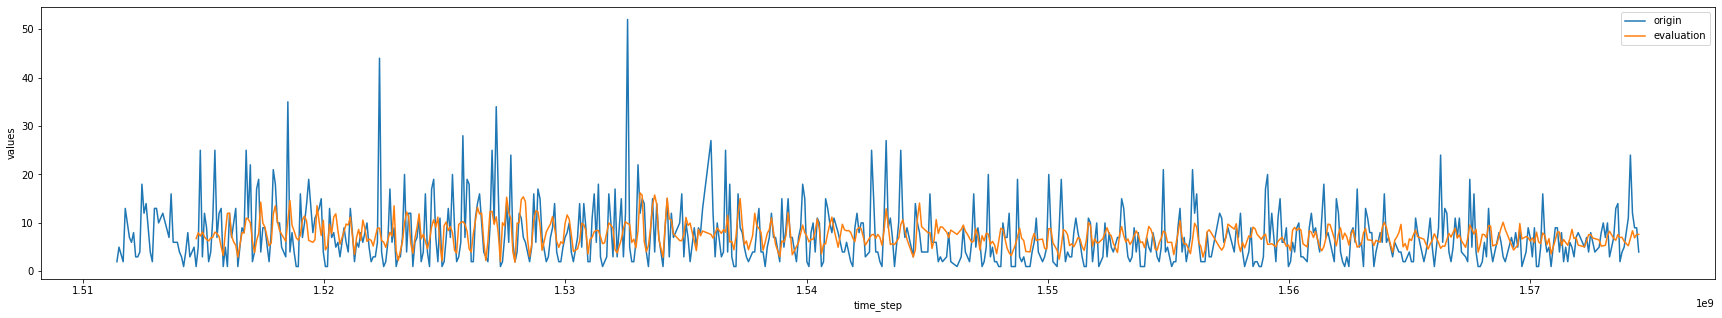

In [100]:
#plot origin and evaluation for angular repo
tensorflowDataFrame = pd.read_csv('angular_tf_closed.csv')
transorflowFunction(tensorflowDataFrame)

{'times': array([1.5115032e+09, 1.5117624e+09, 1.5118488e+09, 1.5128856e+09,
       1.5131448e+09, 1.5138360e+09, 1.5143544e+09, 1.5151320e+09,
       1.5155640e+09, 1.5156504e+09, 1.5158232e+09, 1.5159096e+09,
       1.5160824e+09, 1.5161688e+09, 1.5163416e+09, 1.5164280e+09,
       1.5165144e+09, 1.5166008e+09, 1.5167736e+09, 1.5169464e+09,
       1.5172056e+09, 1.5180696e+09, 1.5183288e+09, 1.5184152e+09,
       1.5185016e+09, 1.5189336e+09, 1.5191064e+09, 1.5196248e+09,
       1.5197112e+09, 1.5198840e+09, 1.5202296e+09, 1.5208308e+09,
       1.5211764e+09, 1.5216084e+09, 1.5216948e+09, 1.5217812e+09,
       1.5219540e+09, 1.5220404e+09, 1.5221268e+09, 1.5223860e+09,
       1.5229044e+09, 1.5230772e+09, 1.5232500e+09, 1.5233364e+09,
       1.5234228e+09, 1.5239412e+09, 1.5240276e+09, 1.5241140e+09,
       1.5242868e+09, 1.5244596e+09, 1.5246324e+09, 1.5248052e+09,
       1.5253236e+09, 1.5263604e+09, 1.5264468e+09, 1.5265332e+09,
       1.5267060e+09, 1.5271380e+09, 1.5272244e+09, 

INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Saeid\\AppData\\Local\\Temp\\tmph645e7_u', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000259B07C6BC8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Saeid\\AppData\\Local\\Temp\\tmph645e7_u', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000259B07C6BC8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Saeid\AppData\Local\Temp\tmph645e7_u\model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Saeid\AppData\Local\Temp\tmph645e7_u\model.ckpt.


INFO:tensorflow:loss = 1.6015201, step = 1


INFO:tensorflow:loss = 1.6015201, step = 1


INFO:tensorflow:global_step/sec: 156.346


INFO:tensorflow:global_step/sec: 156.346


INFO:tensorflow:loss = 1.1845496, step = 101 (0.642 sec)


INFO:tensorflow:loss = 1.1845496, step = 101 (0.642 sec)


INFO:tensorflow:global_step/sec: 108.763


INFO:tensorflow:global_step/sec: 108.763


INFO:tensorflow:loss = 1.1240498, step = 201 (0.918 sec)


INFO:tensorflow:loss = 1.1240498, step = 201 (0.918 sec)


INFO:tensorflow:global_step/sec: 119.834


INFO:tensorflow:global_step/sec: 119.834


INFO:tensorflow:loss = 1.090894, step = 301 (0.833 sec)


INFO:tensorflow:loss = 1.090894, step = 301 (0.833 sec)


INFO:tensorflow:global_step/sec: 118.417


INFO:tensorflow:global_step/sec: 118.417


INFO:tensorflow:loss = 1.0676736, step = 401 (0.845 sec)


INFO:tensorflow:loss = 1.0676736, step = 401 (0.845 sec)


INFO:tensorflow:global_step/sec: 109.477


INFO:tensorflow:global_step/sec: 109.477


INFO:tensorflow:loss = 1.092088, step = 501 (0.913 sec)


INFO:tensorflow:loss = 1.092088, step = 501 (0.913 sec)


INFO:tensorflow:global_step/sec: 114.356


INFO:tensorflow:global_step/sec: 114.356


INFO:tensorflow:loss = 1.0630914, step = 601 (0.875 sec)


INFO:tensorflow:loss = 1.0630914, step = 601 (0.875 sec)


INFO:tensorflow:global_step/sec: 120.411


INFO:tensorflow:global_step/sec: 120.411


INFO:tensorflow:loss = 1.0680741, step = 701 (0.829 sec)


INFO:tensorflow:loss = 1.0680741, step = 701 (0.829 sec)


INFO:tensorflow:global_step/sec: 117.168


INFO:tensorflow:global_step/sec: 117.168


INFO:tensorflow:loss = 1.0504354, step = 801 (0.852 sec)


INFO:tensorflow:loss = 1.0504354, step = 801 (0.852 sec)


INFO:tensorflow:global_step/sec: 112.682


INFO:tensorflow:global_step/sec: 112.682


INFO:tensorflow:loss = 1.0471159, step = 901 (0.895 sec)


INFO:tensorflow:loss = 1.0471159, step = 901 (0.895 sec)


INFO:tensorflow:global_step/sec: 107.018


INFO:tensorflow:global_step/sec: 107.018


INFO:tensorflow:loss = 1.052488, step = 1001 (0.930 sec)


INFO:tensorflow:loss = 1.052488, step = 1001 (0.930 sec)


INFO:tensorflow:global_step/sec: 100.869


INFO:tensorflow:global_step/sec: 100.869


INFO:tensorflow:loss = 1.0696293, step = 1101 (0.988 sec)


INFO:tensorflow:loss = 1.0696293, step = 1101 (0.988 sec)


INFO:tensorflow:global_step/sec: 106.562


INFO:tensorflow:global_step/sec: 106.562


INFO:tensorflow:loss = 1.0734677, step = 1201 (0.937 sec)


INFO:tensorflow:loss = 1.0734677, step = 1201 (0.937 sec)


INFO:tensorflow:global_step/sec: 104.123


INFO:tensorflow:global_step/sec: 104.123


INFO:tensorflow:loss = 1.0601017, step = 1301 (0.962 sec)


INFO:tensorflow:loss = 1.0601017, step = 1301 (0.962 sec)


INFO:tensorflow:global_step/sec: 110.079


INFO:tensorflow:global_step/sec: 110.079


INFO:tensorflow:loss = 1.0835317, step = 1401 (0.907 sec)


INFO:tensorflow:loss = 1.0835317, step = 1401 (0.907 sec)


INFO:tensorflow:global_step/sec: 99.2679


INFO:tensorflow:global_step/sec: 99.2679


INFO:tensorflow:loss = 1.0429411, step = 1501 (1.007 sec)


INFO:tensorflow:loss = 1.0429411, step = 1501 (1.007 sec)


INFO:tensorflow:global_step/sec: 98.3893


INFO:tensorflow:global_step/sec: 98.3893


INFO:tensorflow:loss = 1.0793822, step = 1601 (1.016 sec)


INFO:tensorflow:loss = 1.0793822, step = 1601 (1.016 sec)


INFO:tensorflow:global_step/sec: 111.056


INFO:tensorflow:global_step/sec: 111.056


INFO:tensorflow:loss = 1.0892154, step = 1701 (0.902 sec)


INFO:tensorflow:loss = 1.0892154, step = 1701 (0.902 sec)


INFO:tensorflow:global_step/sec: 107.363


INFO:tensorflow:global_step/sec: 107.363


INFO:tensorflow:loss = 1.0728263, step = 1801 (0.928 sec)


INFO:tensorflow:loss = 1.0728263, step = 1801 (0.928 sec)


INFO:tensorflow:global_step/sec: 95.0254


INFO:tensorflow:global_step/sec: 95.0254


INFO:tensorflow:loss = 1.0580776, step = 1901 (1.052 sec)


INFO:tensorflow:loss = 1.0580776, step = 1901 (1.052 sec)


INFO:tensorflow:global_step/sec: 91.5479


INFO:tensorflow:global_step/sec: 91.5479


INFO:tensorflow:loss = 0.998582, step = 2001 (1.095 sec)


INFO:tensorflow:loss = 0.998582, step = 2001 (1.095 sec)


INFO:tensorflow:global_step/sec: 106.449


INFO:tensorflow:global_step/sec: 106.449


INFO:tensorflow:loss = 1.0831523, step = 2101 (0.938 sec)


INFO:tensorflow:loss = 1.0831523, step = 2101 (0.938 sec)


INFO:tensorflow:global_step/sec: 109.958


INFO:tensorflow:global_step/sec: 109.958


INFO:tensorflow:loss = 1.0356336, step = 2201 (0.908 sec)


INFO:tensorflow:loss = 1.0356336, step = 2201 (0.908 sec)


INFO:tensorflow:global_step/sec: 100.869


INFO:tensorflow:global_step/sec: 100.869


INFO:tensorflow:loss = 1.0562489, step = 2301 (0.992 sec)


INFO:tensorflow:loss = 1.0562489, step = 2301 (0.992 sec)


INFO:tensorflow:global_step/sec: 91.0481


INFO:tensorflow:global_step/sec: 91.0481


INFO:tensorflow:loss = 1.022927, step = 2401 (1.097 sec)


INFO:tensorflow:loss = 1.022927, step = 2401 (1.097 sec)


INFO:tensorflow:global_step/sec: 116.758


INFO:tensorflow:global_step/sec: 116.758


INFO:tensorflow:loss = 1.0064833, step = 2501 (0.855 sec)


INFO:tensorflow:loss = 1.0064833, step = 2501 (0.855 sec)


INFO:tensorflow:global_step/sec: 116.758


INFO:tensorflow:global_step/sec: 116.758


INFO:tensorflow:loss = 1.0248547, step = 2601 (0.857 sec)


INFO:tensorflow:loss = 1.0248547, step = 2601 (0.857 sec)


INFO:tensorflow:global_step/sec: 111.18


INFO:tensorflow:global_step/sec: 111.18


INFO:tensorflow:loss = 1.0508299, step = 2701 (0.899 sec)


INFO:tensorflow:loss = 1.0508299, step = 2701 (0.899 sec)


INFO:tensorflow:global_step/sec: 118.137


INFO:tensorflow:global_step/sec: 118.137


INFO:tensorflow:loss = 1.0267557, step = 2801 (0.846 sec)


INFO:tensorflow:loss = 1.0267557, step = 2801 (0.846 sec)


INFO:tensorflow:global_step/sec: 116.758


INFO:tensorflow:global_step/sec: 116.758


INFO:tensorflow:loss = 1.0228621, step = 2901 (0.857 sec)


INFO:tensorflow:loss = 1.0228621, step = 2901 (0.857 sec)


INFO:tensorflow:global_step/sec: 110.322


INFO:tensorflow:global_step/sec: 110.322


INFO:tensorflow:loss = 1.0195439, step = 3001 (0.905 sec)


INFO:tensorflow:loss = 1.0195439, step = 3001 (0.905 sec)


INFO:tensorflow:global_step/sec: 107.942


INFO:tensorflow:global_step/sec: 107.942


INFO:tensorflow:loss = 1.0844238, step = 3101 (0.927 sec)


INFO:tensorflow:loss = 1.0844238, step = 3101 (0.927 sec)


INFO:tensorflow:global_step/sec: 103.799


INFO:tensorflow:global_step/sec: 103.799


INFO:tensorflow:loss = 1.0728958, step = 3201 (0.962 sec)


INFO:tensorflow:loss = 1.0728958, step = 3201 (0.962 sec)


INFO:tensorflow:global_step/sec: 116.487


INFO:tensorflow:global_step/sec: 116.487


INFO:tensorflow:loss = 1.050952, step = 3301 (0.858 sec)


INFO:tensorflow:loss = 1.050952, step = 3301 (0.858 sec)


INFO:tensorflow:global_step/sec: 105.55


INFO:tensorflow:global_step/sec: 105.55


INFO:tensorflow:loss = 1.0030775, step = 3401 (0.946 sec)


INFO:tensorflow:loss = 1.0030775, step = 3401 (0.946 sec)


INFO:tensorflow:global_step/sec: 114.226


INFO:tensorflow:global_step/sec: 114.226


INFO:tensorflow:loss = 1.0293494, step = 3501 (0.876 sec)


INFO:tensorflow:loss = 1.0293494, step = 3501 (0.876 sec)


INFO:tensorflow:global_step/sec: 116.351


INFO:tensorflow:global_step/sec: 116.351


INFO:tensorflow:loss = 1.0524943, step = 3601 (0.860 sec)


INFO:tensorflow:loss = 1.0524943, step = 3601 (0.860 sec)


INFO:tensorflow:global_step/sec: 114.226


INFO:tensorflow:global_step/sec: 114.226


INFO:tensorflow:loss = 1.0026326, step = 3701 (0.874 sec)


INFO:tensorflow:loss = 1.0026326, step = 3701 (0.874 sec)


INFO:tensorflow:global_step/sec: 108.763


INFO:tensorflow:global_step/sec: 108.763


INFO:tensorflow:loss = 1.0508703, step = 3801 (0.920 sec)


INFO:tensorflow:loss = 1.0508703, step = 3801 (0.920 sec)


INFO:tensorflow:global_step/sec: 114.618


INFO:tensorflow:global_step/sec: 114.618


INFO:tensorflow:loss = 1.0082893, step = 3901 (0.871 sec)


INFO:tensorflow:loss = 1.0082893, step = 3901 (0.871 sec)


INFO:tensorflow:global_step/sec: 119.548


INFO:tensorflow:global_step/sec: 119.548


INFO:tensorflow:loss = 1.0042763, step = 4001 (0.836 sec)


INFO:tensorflow:loss = 1.0042763, step = 4001 (0.836 sec)


INFO:tensorflow:global_step/sec: 99.8621


INFO:tensorflow:global_step/sec: 99.8621


INFO:tensorflow:loss = 0.95372176, step = 4101 (1.005 sec)


INFO:tensorflow:loss = 0.95372176, step = 4101 (1.005 sec)


INFO:tensorflow:global_step/sec: 94.9354


INFO:tensorflow:global_step/sec: 94.9354


INFO:tensorflow:loss = 1.0200808, step = 4201 (1.049 sec)


INFO:tensorflow:loss = 1.0200808, step = 4201 (1.049 sec)


INFO:tensorflow:global_step/sec: 96.8652


INFO:tensorflow:global_step/sec: 96.8652


INFO:tensorflow:loss = 1.0210053, step = 4301 (1.031 sec)


INFO:tensorflow:loss = 1.0210053, step = 4301 (1.031 sec)


INFO:tensorflow:global_step/sec: 114.357


INFO:tensorflow:global_step/sec: 114.357


INFO:tensorflow:loss = 1.0608946, step = 4401 (0.876 sec)


INFO:tensorflow:loss = 1.0608946, step = 4401 (0.876 sec)


INFO:tensorflow:global_step/sec: 117.582


INFO:tensorflow:global_step/sec: 117.582


INFO:tensorflow:loss = 1.0400608, step = 4501 (0.850 sec)


INFO:tensorflow:loss = 1.0400608, step = 4501 (0.850 sec)


INFO:tensorflow:global_step/sec: 99.2677


INFO:tensorflow:global_step/sec: 99.2677


INFO:tensorflow:loss = 1.0250137, step = 4601 (1.008 sec)


INFO:tensorflow:loss = 1.0250137, step = 4601 (1.008 sec)


INFO:tensorflow:global_step/sec: 90.8001


INFO:tensorflow:global_step/sec: 90.8001


INFO:tensorflow:loss = 1.0721542, step = 4701 (1.100 sec)


INFO:tensorflow:loss = 1.0721542, step = 4701 (1.100 sec)


INFO:tensorflow:global_step/sec: 102.418


INFO:tensorflow:global_step/sec: 102.418


INFO:tensorflow:loss = 1.0415196, step = 4801 (0.976 sec)


INFO:tensorflow:loss = 1.0415196, step = 4801 (0.976 sec)


INFO:tensorflow:global_step/sec: 111.18


INFO:tensorflow:global_step/sec: 111.18


INFO:tensorflow:loss = 1.0363384, step = 4901 (0.899 sec)


INFO:tensorflow:loss = 1.0363384, step = 4901 (0.899 sec)


INFO:tensorflow:global_step/sec: 114.882


INFO:tensorflow:global_step/sec: 114.882


INFO:tensorflow:loss = 0.96467537, step = 5001 (0.869 sec)


INFO:tensorflow:loss = 0.96467537, step = 5001 (0.869 sec)


INFO:tensorflow:global_step/sec: 112.303


INFO:tensorflow:global_step/sec: 112.303


INFO:tensorflow:loss = 1.0583247, step = 5101 (0.890 sec)


INFO:tensorflow:loss = 1.0583247, step = 5101 (0.890 sec)


INFO:tensorflow:global_step/sec: 98.6803


INFO:tensorflow:global_step/sec: 98.6803


INFO:tensorflow:loss = 1.0642529, step = 5201 (1.013 sec)


INFO:tensorflow:loss = 1.0642529, step = 5201 (1.013 sec)


INFO:tensorflow:global_step/sec: 94.398


INFO:tensorflow:global_step/sec: 94.398


INFO:tensorflow:loss = 1.0541626, step = 5301 (1.065 sec)


INFO:tensorflow:loss = 1.0541626, step = 5301 (1.065 sec)


INFO:tensorflow:global_step/sec: 116.486


INFO:tensorflow:global_step/sec: 116.486


INFO:tensorflow:loss = 1.0132293, step = 5401 (0.853 sec)


INFO:tensorflow:loss = 1.0132293, step = 5401 (0.853 sec)


INFO:tensorflow:global_step/sec: 116.487


INFO:tensorflow:global_step/sec: 116.487


INFO:tensorflow:loss = 1.021448, step = 5501 (0.857 sec)


INFO:tensorflow:loss = 1.021448, step = 5501 (0.857 sec)


INFO:tensorflow:global_step/sec: 120.848


INFO:tensorflow:global_step/sec: 120.848


INFO:tensorflow:loss = 1.010138, step = 5601 (0.827 sec)


INFO:tensorflow:loss = 1.010138, step = 5601 (0.827 sec)


INFO:tensorflow:global_step/sec: 116.758


INFO:tensorflow:global_step/sec: 116.758


INFO:tensorflow:loss = 0.98757905, step = 5701 (0.861 sec)


INFO:tensorflow:loss = 0.98757905, step = 5701 (0.861 sec)


INFO:tensorflow:global_step/sec: 95.7528


INFO:tensorflow:global_step/sec: 95.7528


INFO:tensorflow:loss = 1.034454, step = 5801 (1.048 sec)


INFO:tensorflow:loss = 1.034454, step = 5801 (1.048 sec)


INFO:tensorflow:global_step/sec: 121.435


INFO:tensorflow:global_step/sec: 121.435


INFO:tensorflow:loss = 1.0725421, step = 5901 (0.814 sec)


INFO:tensorflow:loss = 1.0725421, step = 5901 (0.814 sec)


INFO:tensorflow:Saving checkpoints for 6000 into C:\Users\Saeid\AppData\Local\Temp\tmph645e7_u\model.ckpt.


INFO:tensorflow:Saving checkpoints for 6000 into C:\Users\Saeid\AppData\Local\Temp\tmph645e7_u\model.ckpt.


INFO:tensorflow:Loss for final step: 1.0442826.


INFO:tensorflow:Loss for final step: 1.0442826.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2019-11-24T00:54:42Z


INFO:tensorflow:Starting evaluation at 2019-11-24T00:54:42Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmph645e7_u\model.ckpt-6000


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmph645e7_u\model.ckpt-6000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Evaluation [100/1000]


INFO:tensorflow:Evaluation [100/1000]


INFO:tensorflow:Evaluation [200/1000]


INFO:tensorflow:Evaluation [200/1000]


INFO:tensorflow:Evaluation [300/1000]


INFO:tensorflow:Evaluation [300/1000]


INFO:tensorflow:Evaluation [400/1000]


INFO:tensorflow:Evaluation [400/1000]


INFO:tensorflow:Evaluation [500/1000]


INFO:tensorflow:Evaluation [500/1000]


INFO:tensorflow:Evaluation [600/1000]


INFO:tensorflow:Evaluation [600/1000]


INFO:tensorflow:Evaluation [700/1000]


INFO:tensorflow:Evaluation [700/1000]


INFO:tensorflow:Evaluation [800/1000]


INFO:tensorflow:Evaluation [800/1000]


INFO:tensorflow:Evaluation [900/1000]


INFO:tensorflow:Evaluation [900/1000]


INFO:tensorflow:Evaluation [1000/1000]


INFO:tensorflow:Evaluation [1000/1000]


INFO:tensorflow:Finished evaluation at 2019-11-24-00:54:46


INFO:tensorflow:Finished evaluation at 2019-11-24-00:54:46


INFO:tensorflow:Saving dict for global step 6000: average_loss = 1.0375984, covariance = [[[2.46337242e-02]
  [3.09619808e+00]
  [3.24859118e+00]
  [4.48327586e-02]
  [1.72614346e+01]
  [2.63586473e-02]
  [2.84482841e-03]
  [5.47071278e-01]
  [9.50128078e-01]
  [7.47428536e-01]
  [3.30020308e+00]
  [2.74608773e-03]
  [2.60938276e-02]
  [2.26331894e+02]
  [1.74184620e+00]
  [1.35087920e-03]
  [5.78835583e+00]
  [9.42059422e+00]
  [4.74604778e-02]
  [2.73726058e+00]
  [8.97456825e-01]
  [6.59009162e-03]
  [2.94925928e-01]
  [1.33559096e+00]
  [4.85018104e-01]
  [1.44573852e-01]
  [4.16648477e-01]
  [1.37087658e-01]
  [1.11470175e+00]
  [8.33201289e-01]
  [2.09020361e-01]
  [1.41662979e+01]
  [1.03357911e+00]
  [1.02430165e-01]
  [3.52627373e+01]
  [8.95736098e-01]
  [1.08368904e-03]
  [7.37838745e-02]
  [3.30941272e+00]
  [2.72038593e+01]
  [1.32814369e+01]
  [5.38386881e-01]
  [2.45025638e-03]
  [4.95128679e+00]
  [1.13963890e+00]
  [7.78643370e+00]
  [7.73568535e+00]
  [8.07144463e-01]

INFO:tensorflow:Saving dict for global step 6000: average_loss = 1.0375984, covariance = [[[2.46337242e-02]
  [3.09619808e+00]
  [3.24859118e+00]
  [4.48327586e-02]
  [1.72614346e+01]
  [2.63586473e-02]
  [2.84482841e-03]
  [5.47071278e-01]
  [9.50128078e-01]
  [7.47428536e-01]
  [3.30020308e+00]
  [2.74608773e-03]
  [2.60938276e-02]
  [2.26331894e+02]
  [1.74184620e+00]
  [1.35087920e-03]
  [5.78835583e+00]
  [9.42059422e+00]
  [4.74604778e-02]
  [2.73726058e+00]
  [8.97456825e-01]
  [6.59009162e-03]
  [2.94925928e-01]
  [1.33559096e+00]
  [4.85018104e-01]
  [1.44573852e-01]
  [4.16648477e-01]
  [1.37087658e-01]
  [1.11470175e+00]
  [8.33201289e-01]
  [2.09020361e-01]
  [1.41662979e+01]
  [1.03357911e+00]
  [1.02430165e-01]
  [3.52627373e+01]
  [8.95736098e-01]
  [1.08368904e-03]
  [7.37838745e-02]
  [3.30941272e+00]
  [2.72038593e+01]
  [1.32814369e+01]
  [5.38386881e-01]
  [2.45025638e-03]
  [4.95128679e+00]
  [1.13963890e+00]
  [7.78643370e+00]
  [7.73568535e+00]
  [8.07144463e-01]

INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6000: C:\Users\Saeid\AppData\Local\Temp\tmph645e7_u\model.ckpt-6000


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6000: C:\Users\Saeid\AppData\Local\Temp\tmph645e7_u\model.ckpt-6000


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmph645e7_u\model.ckpt-6000


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmph645e7_u\model.ckpt-6000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


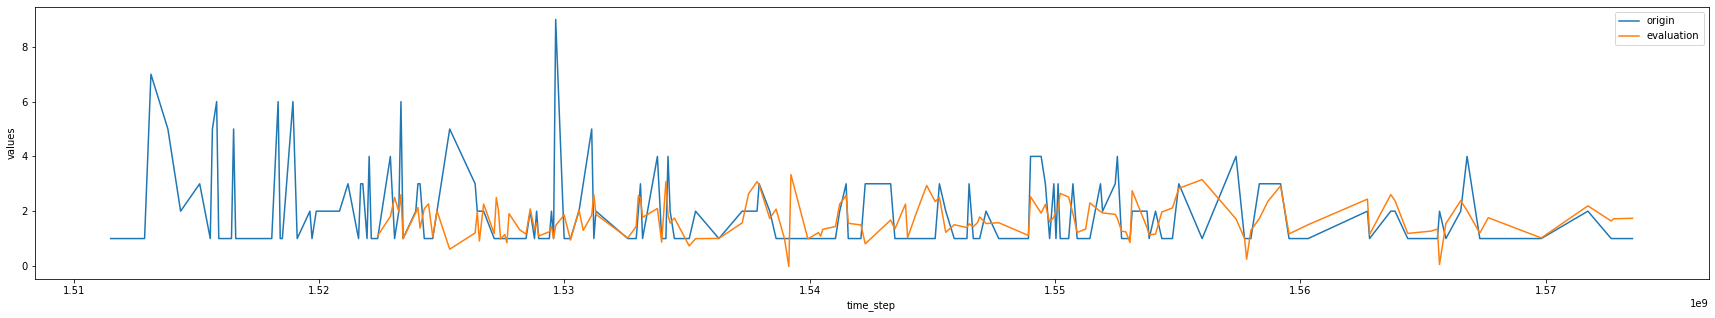

In [101]:
tensorflowDataFrame = pd.read_csv('material_tf_closed.csv')
transorflowFunction(tensorflowDataFrame)


{'times': array([1.5114168e+09, 1.5115032e+09, 1.5115896e+09, 1.5116760e+09,
       1.5117624e+09, 1.5118488e+09, 1.5120216e+09, 1.5121080e+09,
       1.5121944e+09, 1.5122808e+09, 1.5123672e+09, 1.5124536e+09,
       1.5125400e+09, 1.5126264e+09, 1.5127128e+09, 1.5129720e+09,
       1.5130584e+09, 1.5131448e+09, 1.5132312e+09, 1.5134040e+09,
       1.5134904e+09, 1.5135768e+09, 1.5136632e+09, 1.5137496e+09,
       1.5138360e+09, 1.5139224e+09, 1.5140088e+09, 1.5141816e+09,
       1.5142680e+09, 1.5143544e+09, 1.5144408e+09, 1.5145272e+09,
       1.5146136e+09, 1.5147864e+09, 1.5148728e+09, 1.5149592e+09,
       1.5150456e+09, 1.5151320e+09, 1.5153048e+09, 1.5153912e+09,
       1.5154776e+09, 1.5155640e+09, 1.5156504e+09, 1.5157368e+09,
       1.5158232e+09, 1.5159960e+09, 1.5160824e+09, 1.5161688e+09,
       1.5162552e+09, 1.5163416e+09, 1.5164280e+09, 1.5165144e+09,
       1.5166008e+09, 1.5166872e+09, 1.5167736e+09, 1.5168600e+09,
       1.5169464e+09, 1.5170328e+09, 1.5172056e+09, 

INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Saeid\\AppData\\Local\\Temp\\tmp6t3ysha2', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000259AA468908>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Saeid\\AppData\\Local\\Temp\\tmp6t3ysha2', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000259AA468908>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Saeid\AppData\Local\Temp\tmp6t3ysha2\model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Saeid\AppData\Local\Temp\tmp6t3ysha2\model.ckpt.


INFO:tensorflow:loss = 1.5571759, step = 1


INFO:tensorflow:loss = 1.5571759, step = 1


INFO:tensorflow:global_step/sec: 202.554


INFO:tensorflow:global_step/sec: 202.554


INFO:tensorflow:loss = 1.2652714, step = 101 (0.505 sec)


INFO:tensorflow:loss = 1.2652714, step = 101 (0.505 sec)


INFO:tensorflow:global_step/sec: 141.731


INFO:tensorflow:global_step/sec: 141.731


INFO:tensorflow:loss = 1.2420803, step = 201 (0.698 sec)


INFO:tensorflow:loss = 1.2420803, step = 201 (0.698 sec)


INFO:tensorflow:global_step/sec: 140.536


INFO:tensorflow:global_step/sec: 140.536


INFO:tensorflow:loss = 1.2810599, step = 301 (0.711 sec)


INFO:tensorflow:loss = 1.2810599, step = 301 (0.711 sec)


INFO:tensorflow:global_step/sec: 143.767


INFO:tensorflow:global_step/sec: 143.767


INFO:tensorflow:loss = 1.2808663, step = 401 (0.696 sec)


INFO:tensorflow:loss = 1.2808663, step = 401 (0.696 sec)


INFO:tensorflow:global_step/sec: 141.53


INFO:tensorflow:global_step/sec: 141.53


INFO:tensorflow:loss = 1.2724344, step = 501 (0.707 sec)


INFO:tensorflow:loss = 1.2724344, step = 501 (0.707 sec)


INFO:tensorflow:global_step/sec: 140.932


INFO:tensorflow:global_step/sec: 140.932


INFO:tensorflow:loss = 1.2195567, step = 601 (0.711 sec)


INFO:tensorflow:loss = 1.2195567, step = 601 (0.711 sec)


INFO:tensorflow:global_step/sec: 137.636


INFO:tensorflow:global_step/sec: 137.636


INFO:tensorflow:loss = 1.2542224, step = 701 (0.726 sec)


INFO:tensorflow:loss = 1.2542224, step = 701 (0.726 sec)


INFO:tensorflow:global_step/sec: 144.808


INFO:tensorflow:global_step/sec: 144.808


INFO:tensorflow:loss = 1.252261, step = 801 (0.697 sec)


INFO:tensorflow:loss = 1.252261, step = 801 (0.697 sec)


INFO:tensorflow:global_step/sec: 138.207


INFO:tensorflow:global_step/sec: 138.207


INFO:tensorflow:loss = 1.2733457, step = 901 (0.719 sec)


INFO:tensorflow:loss = 1.2733457, step = 901 (0.719 sec)


INFO:tensorflow:global_step/sec: 139.557


INFO:tensorflow:global_step/sec: 139.557


INFO:tensorflow:loss = 1.2236874, step = 1001 (0.720 sec)


INFO:tensorflow:loss = 1.2236874, step = 1001 (0.720 sec)


INFO:tensorflow:global_step/sec: 146.934


INFO:tensorflow:global_step/sec: 146.934


INFO:tensorflow:loss = 1.2286899, step = 1101 (0.677 sec)


INFO:tensorflow:loss = 1.2286899, step = 1101 (0.677 sec)


INFO:tensorflow:global_step/sec: 134.311


INFO:tensorflow:global_step/sec: 134.311


INFO:tensorflow:loss = 1.2327429, step = 1201 (0.745 sec)


INFO:tensorflow:loss = 1.2327429, step = 1201 (0.745 sec)


INFO:tensorflow:global_step/sec: 139.168


INFO:tensorflow:global_step/sec: 139.168


INFO:tensorflow:loss = 1.2339046, step = 1301 (0.719 sec)


INFO:tensorflow:loss = 1.2339046, step = 1301 (0.719 sec)


INFO:tensorflow:global_step/sec: 137.826


INFO:tensorflow:global_step/sec: 137.826


INFO:tensorflow:loss = 1.2405082, step = 1401 (0.725 sec)


INFO:tensorflow:loss = 1.2405082, step = 1401 (0.725 sec)


INFO:tensorflow:global_step/sec: 115.412


INFO:tensorflow:global_step/sec: 115.412


INFO:tensorflow:loss = 1.2582654, step = 1501 (0.872 sec)


INFO:tensorflow:loss = 1.2582654, step = 1501 (0.872 sec)


INFO:tensorflow:global_step/sec: 139.168


INFO:tensorflow:global_step/sec: 139.168


INFO:tensorflow:loss = 1.2316619, step = 1601 (0.714 sec)


INFO:tensorflow:loss = 1.2316619, step = 1601 (0.714 sec)


INFO:tensorflow:global_step/sec: 131.315


INFO:tensorflow:global_step/sec: 131.315


INFO:tensorflow:loss = 1.2369715, step = 1701 (0.761 sec)


INFO:tensorflow:loss = 1.2369715, step = 1701 (0.761 sec)


INFO:tensorflow:global_step/sec: 142.742


INFO:tensorflow:global_step/sec: 142.742


INFO:tensorflow:loss = 1.2041076, step = 1801 (0.702 sec)


INFO:tensorflow:loss = 1.2041076, step = 1801 (0.702 sec)


INFO:tensorflow:global_step/sec: 145.863


INFO:tensorflow:global_step/sec: 145.863


INFO:tensorflow:loss = 1.2313266, step = 1901 (0.686 sec)


INFO:tensorflow:loss = 1.2313266, step = 1901 (0.686 sec)


INFO:tensorflow:global_step/sec: 135.402


INFO:tensorflow:global_step/sec: 135.402


INFO:tensorflow:loss = 1.3126781, step = 2001 (0.739 sec)


INFO:tensorflow:loss = 1.3126781, step = 2001 (0.739 sec)


INFO:tensorflow:global_step/sec: 138.207


INFO:tensorflow:global_step/sec: 138.207


INFO:tensorflow:loss = 1.225105, step = 2101 (0.723 sec)


INFO:tensorflow:loss = 1.225105, step = 2101 (0.723 sec)


INFO:tensorflow:global_step/sec: 142.742


INFO:tensorflow:global_step/sec: 142.742


INFO:tensorflow:loss = 1.2530723, step = 2201 (0.703 sec)


INFO:tensorflow:loss = 1.2530723, step = 2201 (0.703 sec)


INFO:tensorflow:global_step/sec: 143.15


INFO:tensorflow:global_step/sec: 143.15


INFO:tensorflow:loss = 1.2638355, step = 2301 (0.697 sec)


INFO:tensorflow:loss = 1.2638355, step = 2301 (0.697 sec)


INFO:tensorflow:global_step/sec: 136.884


INFO:tensorflow:global_step/sec: 136.884


INFO:tensorflow:loss = 1.234388, step = 2401 (0.731 sec)


INFO:tensorflow:loss = 1.234388, step = 2401 (0.731 sec)


INFO:tensorflow:global_step/sec: 146.289


INFO:tensorflow:global_step/sec: 146.289


INFO:tensorflow:loss = 1.2664787, step = 2501 (0.686 sec)


INFO:tensorflow:loss = 1.2664787, step = 2501 (0.686 sec)


INFO:tensorflow:global_step/sec: 147.802


INFO:tensorflow:global_step/sec: 147.802


INFO:tensorflow:loss = 1.2259147, step = 2601 (0.675 sec)


INFO:tensorflow:loss = 1.2259147, step = 2601 (0.675 sec)


INFO:tensorflow:global_step/sec: 137.071


INFO:tensorflow:global_step/sec: 137.071


INFO:tensorflow:loss = 1.2427161, step = 2701 (0.731 sec)


INFO:tensorflow:loss = 1.2427161, step = 2701 (0.731 sec)


INFO:tensorflow:global_step/sec: 150.696


INFO:tensorflow:global_step/sec: 150.696


INFO:tensorflow:loss = 1.3024625, step = 2801 (0.664 sec)


INFO:tensorflow:loss = 1.3024625, step = 2801 (0.664 sec)


INFO:tensorflow:global_step/sec: 146.503


INFO:tensorflow:global_step/sec: 146.503


INFO:tensorflow:loss = 1.2576301, step = 2901 (0.684 sec)


INFO:tensorflow:loss = 1.2576301, step = 2901 (0.684 sec)


INFO:tensorflow:global_step/sec: 145.863


INFO:tensorflow:global_step/sec: 145.863


INFO:tensorflow:loss = 1.2920276, step = 3001 (0.686 sec)


INFO:tensorflow:loss = 1.2920276, step = 3001 (0.686 sec)


INFO:tensorflow:global_step/sec: 152.533


INFO:tensorflow:global_step/sec: 152.533


INFO:tensorflow:loss = 1.2547277, step = 3101 (0.656 sec)


INFO:tensorflow:loss = 1.2547277, step = 3101 (0.656 sec)


INFO:tensorflow:global_step/sec: 146.076


INFO:tensorflow:global_step/sec: 146.076


INFO:tensorflow:loss = 1.236604, step = 3201 (0.685 sec)


INFO:tensorflow:loss = 1.236604, step = 3201 (0.685 sec)


INFO:tensorflow:global_step/sec: 145.863


INFO:tensorflow:global_step/sec: 145.863


INFO:tensorflow:loss = 1.2532912, step = 3301 (0.685 sec)


INFO:tensorflow:loss = 1.2532912, step = 3301 (0.685 sec)


INFO:tensorflow:global_step/sec: 155.376


INFO:tensorflow:global_step/sec: 155.376


INFO:tensorflow:loss = 1.1972857, step = 3401 (0.645 sec)


INFO:tensorflow:loss = 1.1972857, step = 3401 (0.645 sec)


INFO:tensorflow:global_step/sec: 146.503


INFO:tensorflow:global_step/sec: 146.503


INFO:tensorflow:loss = 1.2290237, step = 3501 (0.682 sec)


INFO:tensorflow:loss = 1.2290237, step = 3501 (0.682 sec)


INFO:tensorflow:global_step/sec: 150.018


INFO:tensorflow:global_step/sec: 150.018


INFO:tensorflow:loss = 1.2770642, step = 3601 (0.667 sec)


INFO:tensorflow:loss = 1.2770642, step = 3601 (0.667 sec)


INFO:tensorflow:global_step/sec: 150.922


INFO:tensorflow:global_step/sec: 150.922


INFO:tensorflow:loss = 1.2472618, step = 3701 (0.664 sec)


INFO:tensorflow:loss = 1.2472618, step = 3701 (0.664 sec)


INFO:tensorflow:global_step/sec: 150.018


INFO:tensorflow:global_step/sec: 150.018


INFO:tensorflow:loss = 1.2081649, step = 3801 (0.666 sec)


INFO:tensorflow:loss = 1.2081649, step = 3801 (0.666 sec)


INFO:tensorflow:global_step/sec: 148.46


INFO:tensorflow:global_step/sec: 148.46


INFO:tensorflow:loss = 1.2090402, step = 3901 (0.673 sec)


INFO:tensorflow:loss = 1.2090402, step = 3901 (0.673 sec)


INFO:tensorflow:global_step/sec: 148.68


INFO:tensorflow:global_step/sec: 148.68


INFO:tensorflow:loss = 1.2389141, step = 4001 (0.674 sec)


INFO:tensorflow:loss = 1.2389141, step = 4001 (0.674 sec)


INFO:tensorflow:global_step/sec: 149.793


INFO:tensorflow:global_step/sec: 149.793


INFO:tensorflow:loss = 1.2751555, step = 4101 (0.668 sec)


INFO:tensorflow:loss = 1.2751555, step = 4101 (0.668 sec)


INFO:tensorflow:global_step/sec: 145.439


INFO:tensorflow:global_step/sec: 145.439


INFO:tensorflow:loss = 1.2700887, step = 4201 (0.688 sec)


INFO:tensorflow:loss = 1.2700887, step = 4201 (0.688 sec)


INFO:tensorflow:global_step/sec: 152.301


INFO:tensorflow:global_step/sec: 152.301


INFO:tensorflow:loss = 1.2381132, step = 4301 (0.658 sec)


INFO:tensorflow:loss = 1.2381132, step = 4301 (0.658 sec)


INFO:tensorflow:global_step/sec: 147.15


INFO:tensorflow:global_step/sec: 147.15


INFO:tensorflow:loss = 1.2802627, step = 4401 (0.678 sec)


INFO:tensorflow:loss = 1.2802627, step = 4401 (0.678 sec)


INFO:tensorflow:global_step/sec: 148.68


INFO:tensorflow:global_step/sec: 148.68


INFO:tensorflow:loss = 1.2663072, step = 4501 (0.673 sec)


INFO:tensorflow:loss = 1.2663072, step = 4501 (0.673 sec)


INFO:tensorflow:global_step/sec: 147.802


INFO:tensorflow:global_step/sec: 147.802


INFO:tensorflow:loss = 1.2448909, step = 4601 (0.677 sec)


INFO:tensorflow:loss = 1.2448909, step = 4601 (0.677 sec)


INFO:tensorflow:global_step/sec: 148.901


INFO:tensorflow:global_step/sec: 148.901


INFO:tensorflow:loss = 1.2671422, step = 4701 (0.673 sec)


INFO:tensorflow:loss = 1.2671422, step = 4701 (0.673 sec)


INFO:tensorflow:global_step/sec: 147.367


INFO:tensorflow:global_step/sec: 147.367


INFO:tensorflow:loss = 1.2860636, step = 4801 (0.680 sec)


INFO:tensorflow:loss = 1.2860636, step = 4801 (0.680 sec)


INFO:tensorflow:global_step/sec: 150.696


INFO:tensorflow:global_step/sec: 150.696


INFO:tensorflow:loss = 1.2550414, step = 4901 (0.663 sec)


INFO:tensorflow:loss = 1.2550414, step = 4901 (0.663 sec)


INFO:tensorflow:global_step/sec: 152.07


INFO:tensorflow:global_step/sec: 152.07


INFO:tensorflow:loss = 1.2180792, step = 5001 (0.662 sec)


INFO:tensorflow:loss = 1.2180792, step = 5001 (0.662 sec)


INFO:tensorflow:global_step/sec: 147.802


INFO:tensorflow:global_step/sec: 147.802


INFO:tensorflow:loss = 1.2842863, step = 5101 (0.672 sec)


INFO:tensorflow:loss = 1.2842863, step = 5101 (0.672 sec)


INFO:tensorflow:global_step/sec: 151.839


INFO:tensorflow:global_step/sec: 151.839


INFO:tensorflow:loss = 1.2731285, step = 5201 (0.665 sec)


INFO:tensorflow:loss = 1.2731285, step = 5201 (0.665 sec)


INFO:tensorflow:global_step/sec: 150.469


INFO:tensorflow:global_step/sec: 150.469


INFO:tensorflow:loss = 1.2501179, step = 5301 (0.661 sec)


INFO:tensorflow:loss = 1.2501179, step = 5301 (0.661 sec)


INFO:tensorflow:global_step/sec: 146.934


INFO:tensorflow:global_step/sec: 146.934


INFO:tensorflow:loss = 1.2403736, step = 5401 (0.680 sec)


INFO:tensorflow:loss = 1.2403736, step = 5401 (0.680 sec)


INFO:tensorflow:global_step/sec: 152.07


INFO:tensorflow:global_step/sec: 152.07


INFO:tensorflow:loss = 1.2749802, step = 5501 (0.668 sec)


INFO:tensorflow:loss = 1.2749802, step = 5501 (0.668 sec)


INFO:tensorflow:global_step/sec: 147.583


INFO:tensorflow:global_step/sec: 147.583


INFO:tensorflow:loss = 1.2473816, step = 5601 (0.667 sec)


INFO:tensorflow:loss = 1.2473816, step = 5601 (0.667 sec)


INFO:tensorflow:global_step/sec: 146.719


INFO:tensorflow:global_step/sec: 146.719


INFO:tensorflow:loss = 1.2855309, step = 5701 (0.683 sec)


INFO:tensorflow:loss = 1.2855309, step = 5701 (0.683 sec)


INFO:tensorflow:global_step/sec: 152.766


INFO:tensorflow:global_step/sec: 152.766


INFO:tensorflow:loss = 1.252928, step = 5801 (0.656 sec)


INFO:tensorflow:loss = 1.252928, step = 5801 (0.656 sec)


INFO:tensorflow:global_step/sec: 147.15


INFO:tensorflow:global_step/sec: 147.15


INFO:tensorflow:loss = 1.284508, step = 5901 (0.680 sec)


INFO:tensorflow:loss = 1.284508, step = 5901 (0.680 sec)


INFO:tensorflow:Saving checkpoints for 6000 into C:\Users\Saeid\AppData\Local\Temp\tmp6t3ysha2\model.ckpt.


INFO:tensorflow:Saving checkpoints for 6000 into C:\Users\Saeid\AppData\Local\Temp\tmp6t3ysha2\model.ckpt.


INFO:tensorflow:Loss for final step: 1.2071769.


INFO:tensorflow:Loss for final step: 1.2071769.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2019-11-24T00:56:39Z


INFO:tensorflow:Starting evaluation at 2019-11-24T00:56:39Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmp6t3ysha2\model.ckpt-6000


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmp6t3ysha2\model.ckpt-6000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Evaluation [100/1000]


INFO:tensorflow:Evaluation [100/1000]


INFO:tensorflow:Evaluation [200/1000]


INFO:tensorflow:Evaluation [200/1000]


INFO:tensorflow:Evaluation [300/1000]


INFO:tensorflow:Evaluation [300/1000]


INFO:tensorflow:Evaluation [400/1000]


INFO:tensorflow:Evaluation [400/1000]


INFO:tensorflow:Evaluation [500/1000]


INFO:tensorflow:Evaluation [500/1000]


INFO:tensorflow:Evaluation [600/1000]


INFO:tensorflow:Evaluation [600/1000]


INFO:tensorflow:Evaluation [700/1000]


INFO:tensorflow:Evaluation [700/1000]


INFO:tensorflow:Evaluation [800/1000]


INFO:tensorflow:Evaluation [800/1000]


INFO:tensorflow:Evaluation [900/1000]


INFO:tensorflow:Evaluation [900/1000]


INFO:tensorflow:Evaluation [1000/1000]


INFO:tensorflow:Evaluation [1000/1000]


INFO:tensorflow:Finished evaluation at 2019-11-24-00:56:47


INFO:tensorflow:Finished evaluation at 2019-11-24-00:56:47


INFO:tensorflow:Saving dict for global step 6000: average_loss = 1.241099, covariance = [[[168.56853  ]
  [ 62.656197 ]
  [ 41.36655  ]
  [ 34.75806  ]
  [ 14.98457  ]
  [ 99.61244  ]
  [ 67.10131  ]
  [572.23035  ]
  [ 71.71414  ]
  [ 89.662506 ]
  [ 38.66474  ]
  [ 82.50947  ]
  [ 32.763817 ]
  [102.21148  ]
  [ 54.071796 ]
  [ 44.745544 ]
  [ 62.283134 ]
  [136.09023  ]
  [ 63.794086 ]
  [ 25.12287  ]
  [122.788025 ]
  [ 26.38747  ]
  [ 69.107376 ]
  [ 28.161335 ]
  [121.04978  ]
  [ 40.420315 ]
  [119.965866 ]
  [ 34.68219  ]
  [ 72.765884 ]
  [ 31.381895 ]
  [269.48337  ]
  [ 99.17981  ]
  [111.87267  ]
  [ 20.932343 ]
  [ 21.548512 ]
  [ 54.772858 ]
  [ 50.35613  ]
  [ 72.59696  ]
  [ 45.913128 ]
  [120.725075 ]
  [ 18.958973 ]
  [ 58.46478  ]
  [ 21.4598   ]
  [297.469    ]
  [111.36471  ]
  [ 82.03216  ]
  [ 33.362793 ]
  [153.18098  ]
  [233.60112  ]
  [239.45425  ]
  [ 78.11208  ]
  [ 30.988804 ]
  [ 11.867009 ]
  [111.93677  ]
  [157.9983   ]
  [401.43115  ]
  [104.27115  ]


INFO:tensorflow:Saving dict for global step 6000: average_loss = 1.241099, covariance = [[[168.56853  ]
  [ 62.656197 ]
  [ 41.36655  ]
  [ 34.75806  ]
  [ 14.98457  ]
  [ 99.61244  ]
  [ 67.10131  ]
  [572.23035  ]
  [ 71.71414  ]
  [ 89.662506 ]
  [ 38.66474  ]
  [ 82.50947  ]
  [ 32.763817 ]
  [102.21148  ]
  [ 54.071796 ]
  [ 44.745544 ]
  [ 62.283134 ]
  [136.09023  ]
  [ 63.794086 ]
  [ 25.12287  ]
  [122.788025 ]
  [ 26.38747  ]
  [ 69.107376 ]
  [ 28.161335 ]
  [121.04978  ]
  [ 40.420315 ]
  [119.965866 ]
  [ 34.68219  ]
  [ 72.765884 ]
  [ 31.381895 ]
  [269.48337  ]
  [ 99.17981  ]
  [111.87267  ]
  [ 20.932343 ]
  [ 21.548512 ]
  [ 54.772858 ]
  [ 50.35613  ]
  [ 72.59696  ]
  [ 45.913128 ]
  [120.725075 ]
  [ 18.958973 ]
  [ 58.46478  ]
  [ 21.4598   ]
  [297.469    ]
  [111.36471  ]
  [ 82.03216  ]
  [ 33.362793 ]
  [153.18098  ]
  [233.60112  ]
  [239.45425  ]
  [ 78.11208  ]
  [ 30.988804 ]
  [ 11.867009 ]
  [111.93677  ]
  [157.9983   ]
  [401.43115  ]
  [104.27115  ]


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6000: C:\Users\Saeid\AppData\Local\Temp\tmp6t3ysha2\model.ckpt-6000


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6000: C:\Users\Saeid\AppData\Local\Temp\tmp6t3ysha2\model.ckpt-6000


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmp6t3ysha2\model.ckpt-6000


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmp6t3ysha2\model.ckpt-6000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


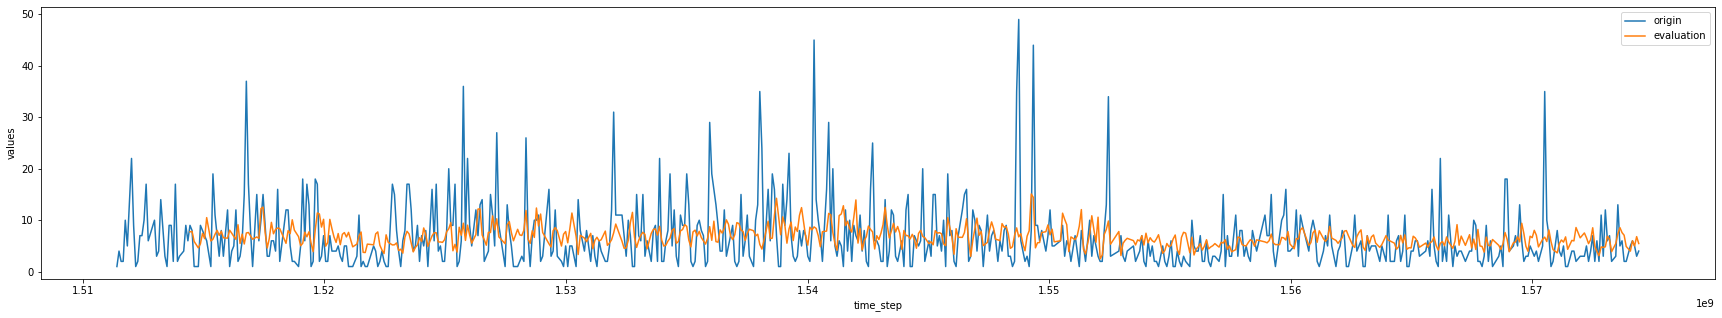

In [102]:
tensorflowDataFrame = pd.read_csv('angular_cli_tf_closed.csv')
transorflowFunction(tensorflowDataFrame)


{'times': array([1.5121944e+09, 1.5134904e+09, 1.5135768e+09, 1.5149592e+09,
       1.5166008e+09, 1.5173784e+09, 1.5174648e+09, 1.5175512e+09,
       1.5185016e+09, 1.5186744e+09, 1.5191928e+09, 1.5193656e+09,
       1.5196248e+09, 1.5197976e+09, 1.5198840e+09, 1.5199704e+09,
       1.5200568e+09, 1.5203160e+09, 1.5204024e+09, 1.5209172e+09,
       1.5213492e+09, 1.5214356e+09, 1.5216084e+09, 1.5221268e+09,
       1.5229908e+09, 1.5238548e+09, 1.5241140e+09, 1.5242868e+09,
       1.5250644e+09, 1.5251508e+09, 1.5266196e+09, 1.5270516e+09,
       1.5271380e+09, 1.5276564e+09, 1.5282612e+09, 1.5283476e+09,
       1.5286068e+09, 1.5287796e+09, 1.5305076e+09, 1.5306804e+09,
       1.5322356e+09, 1.5327540e+09, 1.5343092e+09, 1.5348276e+09,
       1.5372468e+09, 1.5373332e+09, 1.5377652e+09, 1.5391476e+09,
       1.5421752e+09, 1.5426936e+09, 1.5428664e+09, 1.5429528e+09,
       1.5431256e+09, 1.5435576e+09, 1.5437304e+09, 1.5438168e+09,
       1.5439032e+09, 1.5440760e+09, 1.5442488e+09, 

INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Saeid\\AppData\\Local\\Temp\\tmp9us72qr_', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000259B3861E08>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Saeid\\AppData\\Local\\Temp\\tmp9us72qr_', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000259B3861E08>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Saeid\AppData\Local\Temp\tmp9us72qr_\model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Saeid\AppData\Local\Temp\tmp9us72qr_\model.ckpt.


INFO:tensorflow:loss = 1.5143869, step = 1


INFO:tensorflow:loss = 1.5143869, step = 1


INFO:tensorflow:global_step/sec: 161.39


INFO:tensorflow:global_step/sec: 161.39


INFO:tensorflow:loss = 0.99808294, step = 101 (0.624 sec)


INFO:tensorflow:loss = 0.99808294, step = 101 (0.624 sec)


INFO:tensorflow:global_step/sec: 124.455


INFO:tensorflow:global_step/sec: 124.455


INFO:tensorflow:loss = 0.98437434, step = 201 (0.803 sec)


INFO:tensorflow:loss = 0.98437434, step = 201 (0.803 sec)


INFO:tensorflow:global_step/sec: 117.998


INFO:tensorflow:global_step/sec: 117.998


INFO:tensorflow:loss = 0.88441753, step = 301 (0.850 sec)


INFO:tensorflow:loss = 0.88441753, step = 301 (0.850 sec)


INFO:tensorflow:global_step/sec: 110.322


INFO:tensorflow:global_step/sec: 110.322


INFO:tensorflow:loss = 0.84425277, step = 401 (0.907 sec)


INFO:tensorflow:loss = 0.84425277, step = 401 (0.907 sec)


INFO:tensorflow:global_step/sec: 106.562


INFO:tensorflow:global_step/sec: 106.562


INFO:tensorflow:loss = 0.88385564, step = 501 (0.936 sec)


INFO:tensorflow:loss = 0.88385564, step = 501 (0.936 sec)


INFO:tensorflow:global_step/sec: 120.122


INFO:tensorflow:global_step/sec: 120.122


INFO:tensorflow:loss = 0.8798873, step = 601 (0.832 sec)


INFO:tensorflow:loss = 0.8798873, step = 601 (0.832 sec)


INFO:tensorflow:global_step/sec: 116.081


INFO:tensorflow:global_step/sec: 116.081


INFO:tensorflow:loss = 0.7487704, step = 701 (0.861 sec)


INFO:tensorflow:loss = 0.7487704, step = 701 (0.861 sec)


INFO:tensorflow:global_step/sec: 119.121


INFO:tensorflow:global_step/sec: 119.121


INFO:tensorflow:loss = 0.7179915, step = 801 (0.838 sec)


INFO:tensorflow:loss = 0.7179915, step = 801 (0.838 sec)


INFO:tensorflow:global_step/sec: 120.994


INFO:tensorflow:global_step/sec: 120.994


INFO:tensorflow:loss = 0.7718176, step = 901 (0.827 sec)


INFO:tensorflow:loss = 0.7718176, step = 901 (0.827 sec)


INFO:tensorflow:global_step/sec: 101.38


INFO:tensorflow:global_step/sec: 101.38


INFO:tensorflow:loss = 0.76003945, step = 1001 (0.985 sec)


INFO:tensorflow:loss = 0.76003945, step = 1001 (0.985 sec)


INFO:tensorflow:global_step/sec: 119.263


INFO:tensorflow:global_step/sec: 119.263


INFO:tensorflow:loss = 0.7112338, step = 1101 (0.839 sec)


INFO:tensorflow:loss = 0.7112338, step = 1101 (0.839 sec)


INFO:tensorflow:global_step/sec: 121.73


INFO:tensorflow:global_step/sec: 121.73


INFO:tensorflow:loss = 0.6725058, step = 1201 (0.821 sec)


INFO:tensorflow:loss = 0.6725058, step = 1201 (0.821 sec)


INFO:tensorflow:global_step/sec: 128.284


INFO:tensorflow:global_step/sec: 128.284


INFO:tensorflow:loss = 0.7772449, step = 1301 (0.778 sec)


INFO:tensorflow:loss = 0.7772449, step = 1301 (0.778 sec)


INFO:tensorflow:global_step/sec: 126.341


INFO:tensorflow:global_step/sec: 126.341


INFO:tensorflow:loss = 0.6934024, step = 1401 (0.792 sec)


INFO:tensorflow:loss = 0.6934024, step = 1401 (0.792 sec)


INFO:tensorflow:global_step/sec: 134.131


INFO:tensorflow:global_step/sec: 134.131


INFO:tensorflow:loss = 0.7261331, step = 1501 (0.747 sec)


INFO:tensorflow:loss = 0.7261331, step = 1501 (0.747 sec)


INFO:tensorflow:global_step/sec: 121.878


INFO:tensorflow:global_step/sec: 121.878


INFO:tensorflow:loss = 0.8005072, step = 1601 (0.819 sec)


INFO:tensorflow:loss = 0.8005072, step = 1601 (0.819 sec)


INFO:tensorflow:global_step/sec: 122.026


INFO:tensorflow:global_step/sec: 122.026


INFO:tensorflow:loss = 0.61405504, step = 1701 (0.819 sec)


INFO:tensorflow:loss = 0.61405504, step = 1701 (0.819 sec)


INFO:tensorflow:global_step/sec: 125.078


INFO:tensorflow:global_step/sec: 125.078


INFO:tensorflow:loss = 0.68779236, step = 1801 (0.803 sec)


INFO:tensorflow:loss = 0.68779236, step = 1801 (0.803 sec)


INFO:tensorflow:global_step/sec: 128.285


INFO:tensorflow:global_step/sec: 128.285


INFO:tensorflow:loss = 0.5916212, step = 1901 (0.778 sec)


INFO:tensorflow:loss = 0.5916212, step = 1901 (0.778 sec)


INFO:tensorflow:global_step/sec: 131.142


INFO:tensorflow:global_step/sec: 131.142


INFO:tensorflow:loss = 0.58708036, step = 2001 (0.763 sec)


INFO:tensorflow:loss = 0.58708036, step = 2001 (0.763 sec)


INFO:tensorflow:global_step/sec: 132.708


INFO:tensorflow:global_step/sec: 132.708


INFO:tensorflow:loss = 0.7276843, step = 2101 (0.753 sec)


INFO:tensorflow:loss = 0.7276843, step = 2101 (0.753 sec)


INFO:tensorflow:global_step/sec: 111.303


INFO:tensorflow:global_step/sec: 111.303


INFO:tensorflow:loss = 0.6922537, step = 2201 (0.900 sec)


INFO:tensorflow:loss = 0.6922537, step = 2201 (0.900 sec)


INFO:tensorflow:global_step/sec: 100.464


INFO:tensorflow:global_step/sec: 100.464


INFO:tensorflow:loss = 0.6839494, step = 2301 (0.994 sec)


INFO:tensorflow:loss = 0.6839494, step = 2301 (0.994 sec)


INFO:tensorflow:global_step/sec: 101.38


INFO:tensorflow:global_step/sec: 101.38


INFO:tensorflow:loss = 0.5851937, step = 2401 (0.987 sec)


INFO:tensorflow:loss = 0.5851937, step = 2401 (0.987 sec)


INFO:tensorflow:global_step/sec: 94.7555


INFO:tensorflow:global_step/sec: 94.7555


INFO:tensorflow:loss = 0.62821585, step = 2501 (1.054 sec)


INFO:tensorflow:loss = 0.62821585, step = 2501 (1.054 sec)


INFO:tensorflow:global_step/sec: 106.336


INFO:tensorflow:global_step/sec: 106.336


INFO:tensorflow:loss = 0.6898622, step = 2601 (0.940 sec)


INFO:tensorflow:loss = 0.6898622, step = 2601 (0.940 sec)


INFO:tensorflow:global_step/sec: 89.7416


INFO:tensorflow:global_step/sec: 89.7416


INFO:tensorflow:loss = 0.63946015, step = 2701 (1.114 sec)


INFO:tensorflow:loss = 0.63946015, step = 2701 (1.114 sec)


INFO:tensorflow:global_step/sec: 94.5764


INFO:tensorflow:global_step/sec: 94.5764


INFO:tensorflow:loss = 0.60182744, step = 2801 (1.060 sec)


INFO:tensorflow:loss = 0.60182744, step = 2801 (1.060 sec)


INFO:tensorflow:global_step/sec: 94.5764


INFO:tensorflow:global_step/sec: 94.5764


INFO:tensorflow:loss = 0.6908123, step = 2901 (1.055 sec)


INFO:tensorflow:loss = 0.6908123, step = 2901 (1.055 sec)


INFO:tensorflow:global_step/sec: 89.1023


INFO:tensorflow:global_step/sec: 89.1023


INFO:tensorflow:loss = 0.62115216, step = 3001 (1.121 sec)


INFO:tensorflow:loss = 0.62115216, step = 3001 (1.121 sec)


INFO:tensorflow:global_step/sec: 92.7358


INFO:tensorflow:global_step/sec: 92.7358


INFO:tensorflow:loss = 0.6329226, step = 3101 (1.079 sec)


INFO:tensorflow:loss = 0.6329226, step = 3101 (1.079 sec)


INFO:tensorflow:global_step/sec: 119.406


INFO:tensorflow:global_step/sec: 119.406


INFO:tensorflow:loss = 0.5522468, step = 3201 (0.835 sec)


INFO:tensorflow:loss = 0.5522468, step = 3201 (0.835 sec)


INFO:tensorflow:global_step/sec: 115.947


INFO:tensorflow:global_step/sec: 115.947


INFO:tensorflow:loss = 0.69013625, step = 3301 (0.862 sec)


INFO:tensorflow:loss = 0.69013625, step = 3301 (0.862 sec)


INFO:tensorflow:global_step/sec: 121.582


INFO:tensorflow:global_step/sec: 121.582


INFO:tensorflow:loss = 0.64820236, step = 3401 (0.822 sec)


INFO:tensorflow:loss = 0.64820236, step = 3401 (0.822 sec)


INFO:tensorflow:global_step/sec: 128.78


INFO:tensorflow:global_step/sec: 128.78


INFO:tensorflow:loss = 0.62927765, step = 3501 (0.778 sec)


INFO:tensorflow:loss = 0.62927765, step = 3501 (0.778 sec)


INFO:tensorflow:global_step/sec: 118.416


INFO:tensorflow:global_step/sec: 118.416


INFO:tensorflow:loss = 0.70672727, step = 3601 (0.844 sec)


INFO:tensorflow:loss = 0.70672727, step = 3601 (0.844 sec)


INFO:tensorflow:global_step/sec: 118.98


INFO:tensorflow:global_step/sec: 118.98


INFO:tensorflow:loss = 0.55228627, step = 3701 (0.841 sec)


INFO:tensorflow:loss = 0.55228627, step = 3701 (0.841 sec)


INFO:tensorflow:global_step/sec: 117.168


INFO:tensorflow:global_step/sec: 117.168


INFO:tensorflow:loss = 0.5955067, step = 3801 (0.852 sec)


INFO:tensorflow:loss = 0.5955067, step = 3801 (0.852 sec)


INFO:tensorflow:global_step/sec: 126.341


INFO:tensorflow:global_step/sec: 126.341


INFO:tensorflow:loss = 0.53842926, step = 3901 (0.792 sec)


INFO:tensorflow:loss = 0.53842926, step = 3901 (0.792 sec)


INFO:tensorflow:global_step/sec: 129.614


INFO:tensorflow:global_step/sec: 129.614


INFO:tensorflow:loss = 0.6183436, step = 4001 (0.784 sec)


INFO:tensorflow:loss = 0.6183436, step = 4001 (0.784 sec)


INFO:tensorflow:global_step/sec: 126.501


INFO:tensorflow:global_step/sec: 126.501


INFO:tensorflow:loss = 0.6117367, step = 4101 (0.779 sec)


INFO:tensorflow:loss = 0.6117367, step = 4101 (0.779 sec)


INFO:tensorflow:global_step/sec: 129.112


INFO:tensorflow:global_step/sec: 129.112


INFO:tensorflow:loss = 0.6039404, step = 4201 (0.776 sec)


INFO:tensorflow:loss = 0.6039404, step = 4201 (0.776 sec)


INFO:tensorflow:global_step/sec: 102.628


INFO:tensorflow:global_step/sec: 102.628


INFO:tensorflow:loss = 0.625913, step = 4301 (0.973 sec)


INFO:tensorflow:loss = 0.625913, step = 4301 (0.973 sec)


INFO:tensorflow:global_step/sec: 118.979


INFO:tensorflow:global_step/sec: 118.979


INFO:tensorflow:loss = 0.680233, step = 4401 (0.840 sec)


INFO:tensorflow:loss = 0.680233, step = 4401 (0.840 sec)


INFO:tensorflow:global_step/sec: 97.8122


INFO:tensorflow:global_step/sec: 97.8122


INFO:tensorflow:loss = 0.624038, step = 4501 (1.022 sec)


INFO:tensorflow:loss = 0.624038, step = 4501 (1.022 sec)


INFO:tensorflow:global_step/sec: 101.38


INFO:tensorflow:global_step/sec: 101.38


INFO:tensorflow:loss = 0.5687867, step = 4601 (0.986 sec)


INFO:tensorflow:loss = 0.5687867, step = 4601 (0.986 sec)


INFO:tensorflow:global_step/sec: 120.702


INFO:tensorflow:global_step/sec: 120.702


INFO:tensorflow:loss = 0.5862496, step = 4701 (0.829 sec)


INFO:tensorflow:loss = 0.5862496, step = 4701 (0.829 sec)


INFO:tensorflow:global_step/sec: 104.34


INFO:tensorflow:global_step/sec: 104.34


INFO:tensorflow:loss = 0.57624495, step = 4801 (0.956 sec)


INFO:tensorflow:loss = 0.57624495, step = 4801 (0.956 sec)


INFO:tensorflow:global_step/sec: 113.192


INFO:tensorflow:global_step/sec: 113.192


INFO:tensorflow:loss = 0.5750439, step = 4901 (0.883 sec)


INFO:tensorflow:loss = 0.5750439, step = 4901 (0.883 sec)


INFO:tensorflow:global_step/sec: 101.277


INFO:tensorflow:global_step/sec: 101.277


INFO:tensorflow:loss = 0.61043465, step = 5001 (0.987 sec)


INFO:tensorflow:loss = 0.61043465, step = 5001 (0.987 sec)


INFO:tensorflow:global_step/sec: 121.581


INFO:tensorflow:global_step/sec: 121.581


INFO:tensorflow:loss = 0.63780737, step = 5101 (0.825 sec)


INFO:tensorflow:loss = 0.63780737, step = 5101 (0.825 sec)


INFO:tensorflow:global_step/sec: 103.37


INFO:tensorflow:global_step/sec: 103.37


INFO:tensorflow:loss = 0.6108815, step = 5201 (0.966 sec)


INFO:tensorflow:loss = 0.6108815, step = 5201 (0.966 sec)


INFO:tensorflow:global_step/sec: 129.782


INFO:tensorflow:global_step/sec: 129.782


INFO:tensorflow:loss = 0.54132634, step = 5301 (0.771 sec)


INFO:tensorflow:loss = 0.54132634, step = 5301 (0.771 sec)


INFO:tensorflow:global_step/sec: 108.881


INFO:tensorflow:global_step/sec: 108.881


INFO:tensorflow:loss = 0.63484496, step = 5401 (0.917 sec)


INFO:tensorflow:loss = 0.63484496, step = 5401 (0.917 sec)


INFO:tensorflow:global_step/sec: 96.4917


INFO:tensorflow:global_step/sec: 96.4917


INFO:tensorflow:loss = 0.67462933, step = 5501 (1.036 sec)


INFO:tensorflow:loss = 0.67462933, step = 5501 (1.036 sec)


INFO:tensorflow:global_step/sec: 101.792


INFO:tensorflow:global_step/sec: 101.792


INFO:tensorflow:loss = 0.52604383, step = 5601 (0.982 sec)


INFO:tensorflow:loss = 0.52604383, step = 5601 (0.982 sec)


INFO:tensorflow:global_step/sec: 129.782


INFO:tensorflow:global_step/sec: 129.782


INFO:tensorflow:loss = 0.5132561, step = 5701 (0.772 sec)


INFO:tensorflow:loss = 0.5132561, step = 5701 (0.772 sec)


INFO:tensorflow:global_step/sec: 129.95


INFO:tensorflow:global_step/sec: 129.95


INFO:tensorflow:loss = 0.64525884, step = 5801 (0.768 sec)


INFO:tensorflow:loss = 0.64525884, step = 5801 (0.768 sec)


INFO:tensorflow:global_step/sec: 129.446


INFO:tensorflow:global_step/sec: 129.446


INFO:tensorflow:loss = 0.5615847, step = 5901 (0.773 sec)


INFO:tensorflow:loss = 0.5615847, step = 5901 (0.773 sec)


INFO:tensorflow:Saving checkpoints for 6000 into C:\Users\Saeid\AppData\Local\Temp\tmp9us72qr_\model.ckpt.


INFO:tensorflow:Saving checkpoints for 6000 into C:\Users\Saeid\AppData\Local\Temp\tmp9us72qr_\model.ckpt.


INFO:tensorflow:Loss for final step: 0.5329557.


INFO:tensorflow:Loss for final step: 0.5329557.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2019-11-24T01:00:12Z


INFO:tensorflow:Starting evaluation at 2019-11-24T01:00:12Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmp9us72qr_\model.ckpt-6000


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmp9us72qr_\model.ckpt-6000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Evaluation [100/1000]


INFO:tensorflow:Evaluation [100/1000]


INFO:tensorflow:Evaluation [200/1000]


INFO:tensorflow:Evaluation [200/1000]


INFO:tensorflow:Evaluation [300/1000]


INFO:tensorflow:Evaluation [300/1000]


INFO:tensorflow:Evaluation [400/1000]


INFO:tensorflow:Evaluation [400/1000]


INFO:tensorflow:Evaluation [500/1000]


INFO:tensorflow:Evaluation [500/1000]


INFO:tensorflow:Evaluation [600/1000]


INFO:tensorflow:Evaluation [600/1000]


INFO:tensorflow:Evaluation [700/1000]


INFO:tensorflow:Evaluation [700/1000]


INFO:tensorflow:Evaluation [800/1000]


INFO:tensorflow:Evaluation [800/1000]


INFO:tensorflow:Evaluation [900/1000]


INFO:tensorflow:Evaluation [900/1000]


INFO:tensorflow:Evaluation [1000/1000]


INFO:tensorflow:Evaluation [1000/1000]


INFO:tensorflow:Finished evaluation at 2019-11-24-01:00:15


INFO:tensorflow:Finished evaluation at 2019-11-24-01:00:15


INFO:tensorflow:Saving dict for global step 6000: average_loss = 0.57806945, covariance = [[[9.1930351e+00]
  [5.7912807e+00]
  [2.2678156e+00]
  [7.5284748e+00]
  [2.9459207e+00]
  [1.0903850e+01]
  [8.5274162e+00]
  [4.4599633e+00]
  [7.6555481e+00]
  [3.0338306e+00]
  [1.6133957e+01]
  [8.4576386e-01]
  [2.5353699e+00]
  [5.4936922e-01]
  [8.9567572e-01]
  [2.5705224e-01]
  [1.0426546e+01]
  [5.5785692e-01]
  [5.0474246e+02]
  [5.7032359e-01]
  [6.0237687e-02]
  [2.5644658e-02]
  [2.1401998e-02]
  [2.9468022e-02]
  [1.5393114e+00]
  [3.3328682e-02]
  [7.1137875e-02]
  [3.3877172e-02]
  [7.4740695e+04]
  [2.4862103e-02]
  [1.5649706e+03]
  [3.1320747e-02]
  [2.6399501e-02]
  [7.1756706e-02]
  [2.1162794e+02]
  [3.2390766e-02]
  [2.1567495e+06]
  [1.3475198e-01]
  [3.8184766e-02]
  [3.0016718e-02]
  [2.6316198e-02]
  [1.1841905e-01]
  [5.3116058e+02]
  [1.2980540e+03]
  [4.2425938e-02]
  [7.3036969e+02]
  [1.9764809e-02]
  [3.3895206e-02]
  [4.9310647e-02]
  [2.9266151e-02]
  [4.76379

INFO:tensorflow:Saving dict for global step 6000: average_loss = 0.57806945, covariance = [[[9.1930351e+00]
  [5.7912807e+00]
  [2.2678156e+00]
  [7.5284748e+00]
  [2.9459207e+00]
  [1.0903850e+01]
  [8.5274162e+00]
  [4.4599633e+00]
  [7.6555481e+00]
  [3.0338306e+00]
  [1.6133957e+01]
  [8.4576386e-01]
  [2.5353699e+00]
  [5.4936922e-01]
  [8.9567572e-01]
  [2.5705224e-01]
  [1.0426546e+01]
  [5.5785692e-01]
  [5.0474246e+02]
  [5.7032359e-01]
  [6.0237687e-02]
  [2.5644658e-02]
  [2.1401998e-02]
  [2.9468022e-02]
  [1.5393114e+00]
  [3.3328682e-02]
  [7.1137875e-02]
  [3.3877172e-02]
  [7.4740695e+04]
  [2.4862103e-02]
  [1.5649706e+03]
  [3.1320747e-02]
  [2.6399501e-02]
  [7.1756706e-02]
  [2.1162794e+02]
  [3.2390766e-02]
  [2.1567495e+06]
  [1.3475198e-01]
  [3.8184766e-02]
  [3.0016718e-02]
  [2.6316198e-02]
  [1.1841905e-01]
  [5.3116058e+02]
  [1.2980540e+03]
  [4.2425938e-02]
  [7.3036969e+02]
  [1.9764809e-02]
  [3.3895206e-02]
  [4.9310647e-02]
  [2.9266151e-02]
  [4.76379

INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6000: C:\Users\Saeid\AppData\Local\Temp\tmp9us72qr_\model.ckpt-6000


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6000: C:\Users\Saeid\AppData\Local\Temp\tmp9us72qr_\model.ckpt-6000


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmp9us72qr_\model.ckpt-6000


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmp9us72qr_\model.ckpt-6000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


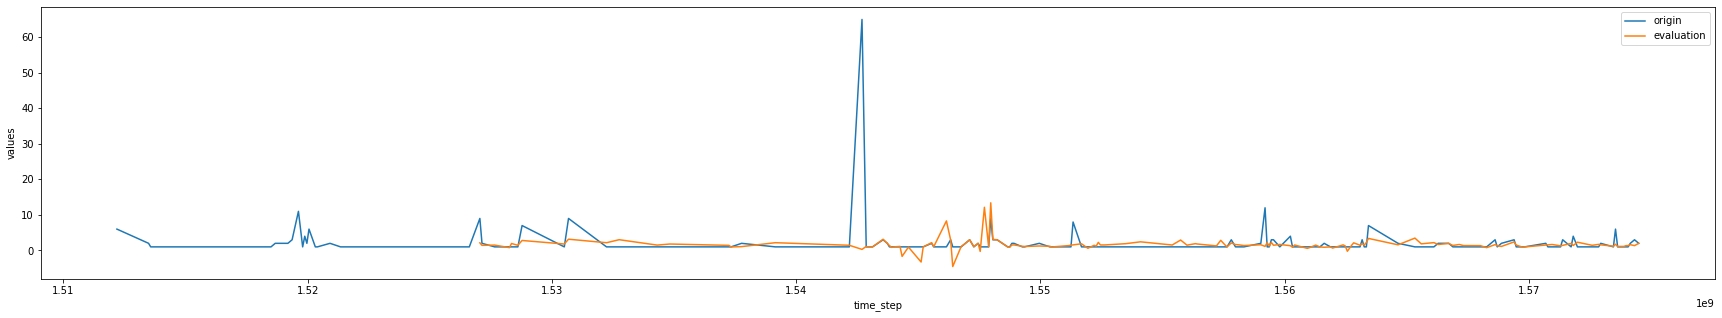

In [104]:
tensorflowDataFrame = pd.read_csv('angular_google_tf_closed.csv')
transorflowFunction(tensorflowDataFrame)


{'times': array([1.5119352e+09, 1.5121080e+09, 1.5127128e+09, 1.5135768e+09,
       1.5153912e+09, 1.5157368e+09, 1.5160824e+09, 1.5164280e+09,
       1.5166872e+09, 1.5171192e+09, 1.5172056e+09, 1.5172920e+09,
       1.5179832e+09, 1.5180696e+09, 1.5190200e+09, 1.5196248e+09,
       1.5197976e+09, 1.5198840e+09, 1.5199704e+09, 1.5204024e+09,
       1.5204888e+09, 1.5205752e+09, 1.5210900e+09, 1.5211764e+09,
       1.5214356e+09, 1.5215220e+09, 1.5216948e+09, 1.5219540e+09,
       1.5222132e+09, 1.5238548e+09, 1.5239412e+09, 1.5246324e+09,
       1.5248052e+09, 1.5250644e+09, 1.5646356e+09, 1.5653268e+09,
       1.5654132e+09, 1.5654996e+09, 1.5658452e+09, 1.5659316e+09,
       1.5668820e+09, 1.5669684e+09, 1.5671412e+09, 1.5686964e+09,
       1.5705108e+09, 1.5713748e+09, 1.5718068e+09, 1.5729336e+09,
       1.5737976e+09, 1.5740568e+09, 1.5741432e+09, 1.5743160e+09]), 'values': array([1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 3, 1, 3, 1, 2, 1, 1, 2, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 2, 1, 1, 1, 

INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Saeid\\AppData\\Local\\Temp\\tmpo3y6rqew', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000259AED9DC88>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Saeid\\AppData\\Local\\Temp\\tmpo3y6rqew', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000259AED9DC88>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Saeid\AppData\Local\Temp\tmpo3y6rqew\model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Saeid\AppData\Local\Temp\tmpo3y6rqew\model.ckpt.


INFO:tensorflow:loss = 1.3682079, step = 1


INFO:tensorflow:loss = 1.3682079, step = 1


INFO:tensorflow:global_step/sec: 47.2882


INFO:tensorflow:global_step/sec: 47.2882


INFO:tensorflow:loss = 0.39232883, step = 101 (2.118 sec)


INFO:tensorflow:loss = 0.39232883, step = 101 (2.118 sec)


INFO:tensorflow:global_step/sec: 39.8653


INFO:tensorflow:global_step/sec: 39.8653


INFO:tensorflow:loss = 0.12728731, step = 201 (2.508 sec)


INFO:tensorflow:loss = 0.12728731, step = 201 (2.508 sec)


INFO:tensorflow:global_step/sec: 40.3638


INFO:tensorflow:global_step/sec: 40.3638


INFO:tensorflow:loss = -0.022027826, step = 301 (2.477 sec)


INFO:tensorflow:loss = -0.022027826, step = 301 (2.477 sec)


INFO:tensorflow:global_step/sec: 40.7418


INFO:tensorflow:global_step/sec: 40.7418


INFO:tensorflow:loss = -0.08477516, step = 401 (2.454 sec)


INFO:tensorflow:loss = -0.08477516, step = 401 (2.454 sec)


INFO:tensorflow:global_step/sec: 38.8138


INFO:tensorflow:global_step/sec: 38.8138


INFO:tensorflow:loss = -0.14768896, step = 501 (2.576 sec)


INFO:tensorflow:loss = -0.14768896, step = 501 (2.576 sec)


INFO:tensorflow:global_step/sec: 41.4678


INFO:tensorflow:global_step/sec: 41.4678


INFO:tensorflow:loss = 0.04682088, step = 601 (2.411 sec)


INFO:tensorflow:loss = 0.04682088, step = 601 (2.411 sec)


INFO:tensorflow:global_step/sec: 37.1287


INFO:tensorflow:global_step/sec: 37.1287


INFO:tensorflow:loss = -0.26447317, step = 701 (2.693 sec)


INFO:tensorflow:loss = -0.26447317, step = 701 (2.693 sec)


INFO:tensorflow:global_step/sec: 44.1384


INFO:tensorflow:global_step/sec: 44.1384


INFO:tensorflow:loss = 0.26798692, step = 801 (2.266 sec)


INFO:tensorflow:loss = 0.26798692, step = 801 (2.266 sec)


INFO:tensorflow:global_step/sec: 44.3537


INFO:tensorflow:global_step/sec: 44.3537


INFO:tensorflow:loss = -0.39723954, step = 901 (2.256 sec)


INFO:tensorflow:loss = -0.39723954, step = 901 (2.256 sec)


INFO:tensorflow:global_step/sec: 41.5712


INFO:tensorflow:global_step/sec: 41.5712


INFO:tensorflow:loss = 0.7207264, step = 1001 (2.413 sec)


INFO:tensorflow:loss = 0.7207264, step = 1001 (2.413 sec)


INFO:tensorflow:global_step/sec: 39.7071


INFO:tensorflow:global_step/sec: 39.7071


INFO:tensorflow:loss = -0.36700046, step = 1101 (2.510 sec)


INFO:tensorflow:loss = -0.36700046, step = 1101 (2.510 sec)


INFO:tensorflow:global_step/sec: 44.2556


INFO:tensorflow:global_step/sec: 44.2556


INFO:tensorflow:loss = -0.4743344, step = 1201 (2.261 sec)


INFO:tensorflow:loss = -0.4743344, step = 1201 (2.261 sec)


INFO:tensorflow:global_step/sec: 43.906


INFO:tensorflow:global_step/sec: 43.906


INFO:tensorflow:loss = -0.16512959, step = 1301 (2.277 sec)


INFO:tensorflow:loss = -0.16512959, step = 1301 (2.277 sec)


INFO:tensorflow:global_step/sec: 43.3356


INFO:tensorflow:global_step/sec: 43.3356


INFO:tensorflow:loss = -0.53700113, step = 1401 (2.308 sec)


INFO:tensorflow:loss = -0.53700113, step = 1401 (2.308 sec)


INFO:tensorflow:global_step/sec: 43.543


INFO:tensorflow:global_step/sec: 43.543


INFO:tensorflow:loss = -0.47202873, step = 1501 (2.298 sec)


INFO:tensorflow:loss = -0.47202873, step = 1501 (2.298 sec)


INFO:tensorflow:global_step/sec: 42.8164


INFO:tensorflow:global_step/sec: 42.8164


INFO:tensorflow:loss = -0.50041693, step = 1601 (2.336 sec)


INFO:tensorflow:loss = -0.50041693, step = 1601 (2.336 sec)


INFO:tensorflow:global_step/sec: 42.6885


INFO:tensorflow:global_step/sec: 42.6885


INFO:tensorflow:loss = -0.5874402, step = 1701 (2.342 sec)


INFO:tensorflow:loss = -0.5874402, step = 1701 (2.342 sec)


INFO:tensorflow:global_step/sec: 44.1384


INFO:tensorflow:global_step/sec: 44.1384


INFO:tensorflow:loss = -0.32470596, step = 1801 (2.266 sec)


INFO:tensorflow:loss = -0.32470596, step = 1801 (2.266 sec)


INFO:tensorflow:global_step/sec: 43.4108


INFO:tensorflow:global_step/sec: 43.4108


INFO:tensorflow:loss = -0.5559631, step = 1901 (2.305 sec)


INFO:tensorflow:loss = -0.5559631, step = 1901 (2.305 sec)


INFO:tensorflow:global_step/sec: 38.515


INFO:tensorflow:global_step/sec: 38.515


INFO:tensorflow:loss = -0.65167034, step = 2001 (2.595 sec)


INFO:tensorflow:loss = -0.65167034, step = 2001 (2.595 sec)


INFO:tensorflow:global_step/sec: 37.2393


INFO:tensorflow:global_step/sec: 37.2393


INFO:tensorflow:loss = -0.63986367, step = 2101 (2.685 sec)


INFO:tensorflow:loss = -0.63986367, step = 2101 (2.685 sec)


INFO:tensorflow:global_step/sec: 35.4704


INFO:tensorflow:global_step/sec: 35.4704


INFO:tensorflow:loss = -0.6561865, step = 2201 (2.824 sec)


INFO:tensorflow:loss = -0.6561865, step = 2201 (2.824 sec)


INFO:tensorflow:global_step/sec: 38.9801


INFO:tensorflow:global_step/sec: 38.9801


INFO:tensorflow:loss = -0.6715897, step = 2301 (2.560 sec)


INFO:tensorflow:loss = -0.6715897, step = 2301 (2.560 sec)


INFO:tensorflow:global_step/sec: 42.6885


INFO:tensorflow:global_step/sec: 42.6885


INFO:tensorflow:loss = -0.6896483, step = 2401 (2.344 sec)


INFO:tensorflow:loss = -0.6896483, step = 2401 (2.344 sec)


INFO:tensorflow:global_step/sec: 43.543


INFO:tensorflow:global_step/sec: 43.543


INFO:tensorflow:loss = -0.72190094, step = 2501 (2.297 sec)


INFO:tensorflow:loss = -0.72190094, step = 2501 (2.297 sec)


INFO:tensorflow:global_step/sec: 42.945


INFO:tensorflow:global_step/sec: 42.945


INFO:tensorflow:loss = -0.74345565, step = 2601 (2.329 sec)


INFO:tensorflow:loss = -0.74345565, step = 2601 (2.329 sec)


INFO:tensorflow:global_step/sec: 43.2606


INFO:tensorflow:global_step/sec: 43.2606


INFO:tensorflow:loss = -0.41842312, step = 2701 (2.311 sec)


INFO:tensorflow:loss = -0.41842312, step = 2701 (2.311 sec)


INFO:tensorflow:global_step/sec: 44.119


INFO:tensorflow:global_step/sec: 44.119


INFO:tensorflow:loss = -0.7484258, step = 2801 (2.267 sec)


INFO:tensorflow:loss = -0.7484258, step = 2801 (2.267 sec)


INFO:tensorflow:global_step/sec: 43.392


INFO:tensorflow:global_step/sec: 43.392


INFO:tensorflow:loss = 0.56259805, step = 2901 (2.305 sec)


INFO:tensorflow:loss = 0.56259805, step = 2901 (2.305 sec)


INFO:tensorflow:global_step/sec: 43.7716


INFO:tensorflow:global_step/sec: 43.7716


INFO:tensorflow:loss = -0.73541695, step = 3001 (2.285 sec)


INFO:tensorflow:loss = -0.73541695, step = 3001 (2.285 sec)


INFO:tensorflow:global_step/sec: 42.8347


INFO:tensorflow:global_step/sec: 42.8347


INFO:tensorflow:loss = -0.7337694, step = 3101 (2.336 sec)


INFO:tensorflow:loss = -0.7337694, step = 3101 (2.336 sec)


INFO:tensorflow:global_step/sec: 40.0247


INFO:tensorflow:global_step/sec: 40.0247


INFO:tensorflow:loss = 3.7512746, step = 3201 (2.504 sec)


INFO:tensorflow:loss = 3.7512746, step = 3201 (2.504 sec)


INFO:tensorflow:global_step/sec: 43.4108


INFO:tensorflow:global_step/sec: 43.4108


INFO:tensorflow:loss = -0.74853486, step = 3301 (2.297 sec)


INFO:tensorflow:loss = -0.74853486, step = 3301 (2.297 sec)


INFO:tensorflow:global_step/sec: 43.7333


INFO:tensorflow:global_step/sec: 43.7333


INFO:tensorflow:loss = -0.74591833, step = 3401 (2.287 sec)


INFO:tensorflow:loss = -0.74591833, step = 3401 (2.287 sec)


INFO:tensorflow:global_step/sec: 43.1115


INFO:tensorflow:global_step/sec: 43.1115


INFO:tensorflow:loss = -0.7758664, step = 3501 (2.321 sec)


INFO:tensorflow:loss = -0.7758664, step = 3501 (2.321 sec)


INFO:tensorflow:global_step/sec: 44.0607


INFO:tensorflow:global_step/sec: 44.0607


INFO:tensorflow:loss = -0.4176087, step = 3601 (2.268 sec)


INFO:tensorflow:loss = -0.4176087, step = 3601 (2.268 sec)


INFO:tensorflow:global_step/sec: 38.3232


INFO:tensorflow:global_step/sec: 38.3232


INFO:tensorflow:loss = -0.8279856, step = 3701 (2.610 sec)


INFO:tensorflow:loss = -0.8279856, step = 3701 (2.610 sec)


INFO:tensorflow:global_step/sec: 44.5909


INFO:tensorflow:global_step/sec: 44.5909


INFO:tensorflow:loss = -0.8039824, step = 3801 (2.243 sec)


INFO:tensorflow:loss = -0.8039824, step = 3801 (2.243 sec)


INFO:tensorflow:global_step/sec: 43.5241


INFO:tensorflow:global_step/sec: 43.5241


INFO:tensorflow:loss = -0.7853869, step = 3901 (2.298 sec)


INFO:tensorflow:loss = -0.7853869, step = 3901 (2.298 sec)


INFO:tensorflow:global_step/sec: 41.4335


INFO:tensorflow:global_step/sec: 41.4335


INFO:tensorflow:loss = -0.83669025, step = 4001 (2.415 sec)


INFO:tensorflow:loss = -0.83669025, step = 4001 (2.415 sec)


INFO:tensorflow:global_step/sec: 40.2988


INFO:tensorflow:global_step/sec: 40.2988


INFO:tensorflow:loss = -0.83654326, step = 4101 (2.481 sec)


INFO:tensorflow:loss = -0.83654326, step = 4101 (2.481 sec)


INFO:tensorflow:global_step/sec: 43.9253


INFO:tensorflow:global_step/sec: 43.9253


INFO:tensorflow:loss = -0.8327771, step = 4201 (2.277 sec)


INFO:tensorflow:loss = -0.8327771, step = 4201 (2.277 sec)


INFO:tensorflow:global_step/sec: 44.1969


INFO:tensorflow:global_step/sec: 44.1969


INFO:tensorflow:loss = -0.8579235, step = 4301 (2.262 sec)


INFO:tensorflow:loss = -0.8579235, step = 4301 (2.262 sec)


INFO:tensorflow:global_step/sec: 43.7142


INFO:tensorflow:global_step/sec: 43.7142


INFO:tensorflow:loss = -0.7926849, step = 4401 (2.289 sec)


INFO:tensorflow:loss = -0.7926849, step = 4401 (2.289 sec)


INFO:tensorflow:global_step/sec: 43.8675


INFO:tensorflow:global_step/sec: 43.8675


INFO:tensorflow:loss = 0.3952963, step = 4501 (2.279 sec)


INFO:tensorflow:loss = 0.3952963, step = 4501 (2.279 sec)


INFO:tensorflow:global_step/sec: 43.8484


INFO:tensorflow:global_step/sec: 43.8484


INFO:tensorflow:loss = -0.8409136, step = 4601 (2.282 sec)


INFO:tensorflow:loss = -0.8409136, step = 4601 (2.282 sec)


INFO:tensorflow:global_step/sec: 43.3356


INFO:tensorflow:global_step/sec: 43.3356


INFO:tensorflow:loss = -0.8700145, step = 4701 (2.307 sec)


INFO:tensorflow:loss = -0.8700145, step = 4701 (2.307 sec)


INFO:tensorflow:global_step/sec: 43.562


INFO:tensorflow:global_step/sec: 43.562


INFO:tensorflow:loss = -0.87390554, step = 4801 (2.296 sec)


INFO:tensorflow:loss = -0.87390554, step = 4801 (2.296 sec)


INFO:tensorflow:global_step/sec: 44.4719


INFO:tensorflow:global_step/sec: 44.4719


INFO:tensorflow:loss = 1.0297295, step = 4901 (2.249 sec)


INFO:tensorflow:loss = 1.0297295, step = 4901 (2.249 sec)


INFO:tensorflow:global_step/sec: 43.581


INFO:tensorflow:global_step/sec: 43.581


INFO:tensorflow:loss = -0.7813783, step = 5001 (2.296 sec)


INFO:tensorflow:loss = -0.7813783, step = 5001 (2.296 sec)


INFO:tensorflow:global_step/sec: 43.6951


INFO:tensorflow:global_step/sec: 43.6951


INFO:tensorflow:loss = -0.8853444, step = 5101 (2.293 sec)


INFO:tensorflow:loss = -0.8853444, step = 5101 (2.293 sec)


INFO:tensorflow:global_step/sec: 43.7333


INFO:tensorflow:global_step/sec: 43.7333


INFO:tensorflow:loss = -0.86779445, step = 5201 (2.283 sec)


INFO:tensorflow:loss = -0.86779445, step = 5201 (2.283 sec)


INFO:tensorflow:global_step/sec: 44.3734


INFO:tensorflow:global_step/sec: 44.3734


INFO:tensorflow:loss = -0.89070785, step = 5301 (2.253 sec)


INFO:tensorflow:loss = -0.89070785, step = 5301 (2.253 sec)


INFO:tensorflow:global_step/sec: 41.8669


INFO:tensorflow:global_step/sec: 41.8669


INFO:tensorflow:loss = -0.83072346, step = 5401 (2.391 sec)


INFO:tensorflow:loss = -0.83072346, step = 5401 (2.391 sec)


INFO:tensorflow:global_step/sec: 36.7874


INFO:tensorflow:global_step/sec: 36.7874


INFO:tensorflow:loss = -0.9002274, step = 5501 (2.717 sec)


INFO:tensorflow:loss = -0.9002274, step = 5501 (2.717 sec)


INFO:tensorflow:global_step/sec: 40.659


INFO:tensorflow:global_step/sec: 40.659


INFO:tensorflow:loss = -0.921808, step = 5601 (2.458 sec)


INFO:tensorflow:loss = -0.921808, step = 5601 (2.458 sec)


INFO:tensorflow:global_step/sec: 44.6905


INFO:tensorflow:global_step/sec: 44.6905


INFO:tensorflow:loss = 0.016466636, step = 5701 (2.238 sec)


INFO:tensorflow:loss = 0.016466636, step = 5701 (2.238 sec)


INFO:tensorflow:global_step/sec: 43.7333


INFO:tensorflow:global_step/sec: 43.7333


INFO:tensorflow:loss = -0.94677526, step = 5801 (2.287 sec)


INFO:tensorflow:loss = -0.94677526, step = 5801 (2.287 sec)


INFO:tensorflow:global_step/sec: 43.657


INFO:tensorflow:global_step/sec: 43.657


INFO:tensorflow:loss = -0.93664336, step = 5901 (2.291 sec)


INFO:tensorflow:loss = -0.93664336, step = 5901 (2.291 sec)


INFO:tensorflow:Saving checkpoints for 6000 into C:\Users\Saeid\AppData\Local\Temp\tmpo3y6rqew\model.ckpt.


INFO:tensorflow:Saving checkpoints for 6000 into C:\Users\Saeid\AppData\Local\Temp\tmpo3y6rqew\model.ckpt.


INFO:tensorflow:Loss for final step: -0.9456271.


INFO:tensorflow:Loss for final step: -0.9456271.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2019-11-24T00:59:14Z


INFO:tensorflow:Starting evaluation at 2019-11-24T00:59:14Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmpo3y6rqew\model.ckpt-6000


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmpo3y6rqew\model.ckpt-6000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Evaluation [100/1000]


INFO:tensorflow:Evaluation [100/1000]


INFO:tensorflow:Evaluation [200/1000]


INFO:tensorflow:Evaluation [200/1000]


INFO:tensorflow:Evaluation [300/1000]


INFO:tensorflow:Evaluation [300/1000]


INFO:tensorflow:Evaluation [400/1000]


INFO:tensorflow:Evaluation [400/1000]


INFO:tensorflow:Evaluation [500/1000]


INFO:tensorflow:Evaluation [500/1000]


INFO:tensorflow:Evaluation [600/1000]


INFO:tensorflow:Evaluation [600/1000]


INFO:tensorflow:Evaluation [700/1000]


INFO:tensorflow:Evaluation [700/1000]


INFO:tensorflow:Evaluation [800/1000]


INFO:tensorflow:Evaluation [800/1000]


INFO:tensorflow:Evaluation [900/1000]


INFO:tensorflow:Evaluation [900/1000]


INFO:tensorflow:Evaluation [1000/1000]


INFO:tensorflow:Evaluation [1000/1000]


INFO:tensorflow:Finished evaluation at 2019-11-24-00:59:15


INFO:tensorflow:Finished evaluation at 2019-11-24-00:59:15


INFO:tensorflow:Saving dict for global step 6000: average_loss = -0.9719269, covariance = [[[0.0003295 ]
  [0.00016753]
  [0.0002047 ]
  [0.00016012]
  [0.0001737 ]
  [0.00023666]
  [0.00015936]
  [0.00017684]
  [0.0001978 ]
  [0.00014326]
  [0.00011531]
  [0.00017034]
  [0.00011179]
  [0.00010953]
  [0.00036319]
  [0.00011972]
  [0.00018905]
  [0.00019578]
  [0.00013459]
  [0.00013652]]], global_step = 6000, loss = -0.9719269, mean = [[[1.0000386 ]
  [1.0001416 ]
  [0.9999969 ]
  [1.9999058 ]
  [0.999998  ]
  [0.99999684]
  [2.0006678 ]
  [0.99999976]
  [1.0000969 ]
  [0.99999225]
  [1.0000379 ]
  [1.0011697 ]
  [1.999999  ]
  [1.0001794 ]
  [1.9999995 ]
  [1.0000018 ]
  [1.0004904 ]
  [1.        ]
  [1.0001007 ]
  [0.999998  ]]], observed = [[[1.]
  [1.]
  [1.]
  [2.]
  [1.]
  [1.]
  [2.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [2.]
  [1.]
  [2.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]]], start_tuple = (array([[1521090000, 1521176400, 1521435600, 1521522000, 1521694800,
        1521954000, 1

INFO:tensorflow:Saving dict for global step 6000: average_loss = -0.9719269, covariance = [[[0.0003295 ]
  [0.00016753]
  [0.0002047 ]
  [0.00016012]
  [0.0001737 ]
  [0.00023666]
  [0.00015936]
  [0.00017684]
  [0.0001978 ]
  [0.00014326]
  [0.00011531]
  [0.00017034]
  [0.00011179]
  [0.00010953]
  [0.00036319]
  [0.00011972]
  [0.00018905]
  [0.00019578]
  [0.00013459]
  [0.00013652]]], global_step = 6000, loss = -0.9719269, mean = [[[1.0000386 ]
  [1.0001416 ]
  [0.9999969 ]
  [1.9999058 ]
  [0.999998  ]
  [0.99999684]
  [2.0006678 ]
  [0.99999976]
  [1.0000969 ]
  [0.99999225]
  [1.0000379 ]
  [1.0011697 ]
  [1.999999  ]
  [1.0001794 ]
  [1.9999995 ]
  [1.0000018 ]
  [1.0004904 ]
  [1.        ]
  [1.0001007 ]
  [0.999998  ]]], observed = [[[1.]
  [1.]
  [1.]
  [2.]
  [1.]
  [1.]
  [2.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [2.]
  [1.]
  [2.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]]], start_tuple = (array([[1521090000, 1521176400, 1521435600, 1521522000, 1521694800,
        1521954000, 1

INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6000: C:\Users\Saeid\AppData\Local\Temp\tmpo3y6rqew\model.ckpt-6000


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6000: C:\Users\Saeid\AppData\Local\Temp\tmpo3y6rqew\model.ckpt-6000


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmpo3y6rqew\model.ckpt-6000


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmpo3y6rqew\model.ckpt-6000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


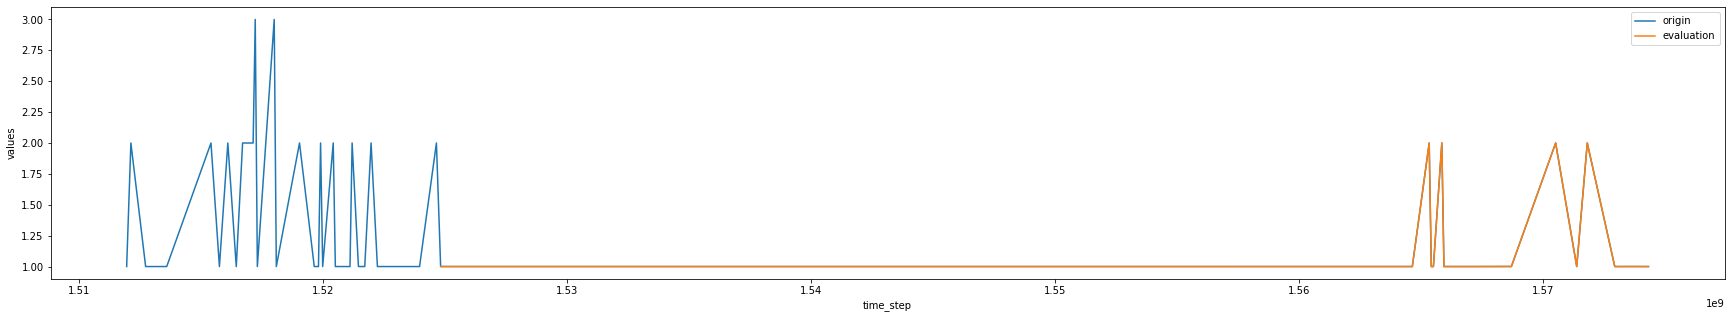

In [103]:
tensorflowDataFrame = pd.read_csv('d3_tf_closed.csv')
transorflowFunction(tensorflowDataFrame)


In [93]:
#Tensorflow
# Plot the created issues - second approach 
from pandas import read_csv
import tensorflow as tf
from tensorflow.contrib.timeseries.python.timeseries import  NumpyReader
import time
import matplotlib.pyplot as plt


def transorflowFunction(tensorflowDataFrame):
   tensorflowDataFrame['ds'] = tensorflowDataFrame['ds'].astype('datetime64[ns]')
   array = tensorflowDataFrame.to_numpy()
   x = np.array([time.mktime(i[0].timetuple()) for i in array])
   y = np.array([i[1] for i in array])


   data = {
            tf.contrib.timeseries.TrainEvalFeatures.TIMES: x,
            tf.contrib.timeseries.TrainEvalFeatures.VALUES: y,
          }
   print (data)

   reader = NumpyReader(data)

   train_input_fn = tf.contrib.timeseries.RandomWindowInputFn(reader, batch_size = 40, window_size = 40)
   ar = tf.contrib.timeseries.ARRegressor(
        periodicities=200, input_window_size=30, output_window_size=10,
        num_features=1,
        loss=tf.contrib.timeseries.ARModel.NORMAL_LIKELIHOOD_LOSS)
   ar.train(input_fn=train_input_fn, steps=6000)


#evaluation

   evaluation_input_fn = tf.contrib.timeseries.WholeDatasetInputFn(reader)
   evaluation = ar.evaluate(input_fn=evaluation_input_fn, steps=1000)

#prediction
   (predictions,) = tuple(ar.predict(
        input_fn=tf.contrib.timeseries.predict_continuation_input_fn(
            evaluation, steps=365)))
#plot origin and evaluation for angular repo
   plt.figure(figsize=(30, 5))
   plt.plot(data['times'].reshape(-1), data['values'].reshape(-1), label='origin')
   plt.plot(evaluation['times'].reshape(-1), evaluation['mean'].reshape(-1), label='evaluation')
   plt.xlabel('time_step')
   plt.ylabel('values')
   plt.legend()
   plt.show()

    
def tensorflow_newdf_created(newdf):
    s = newdf.groupby(['created_at'])['created_at']
    s1 = s.describe()
    temp_df = pd.DataFrame()
    temp_df = s1[['top', 'count']]
    temp_df.columns = ['ds', 'y']
    return temp_df

angular_tf_df_created = pd.DataFrame(tensorflow_newdf_created(angular_df))
material_tf_df_created = pd.DataFrame(tensorflow_newdf_created(material_df))
angular_cli_tf_df_created = pd.DataFrame(tensorflow_newdf_created(angular_cli_df))
googleMaps_tf_df_created = pd.DataFrame(tensorflow_newdf_created(googleMaps_df))
d3_tf_df_created = pd.DataFrame(tensorflow_newdf_created(d3_df))

angular_tf_df_created.to_csv('angular_tf_created.csv', sep = ',', encoding = 'utf-8', index = False)
material_tf_df_created.to_csv('material_tf_created.csv', sep = ',', encoding = 'utf-8', index = False)
angular_cli_tf_df_created.to_csv('angular_cli_tf_created.csv', sep = ',', encoding = 'utf-8', index = False)
googleMaps_tf_df_created.to_csv('angular_google_tf_created.csv', sep = ',', encoding = 'utf-8', index = False)
d3_tf_df_created.to_csv('d3_tf_created.csv', sep = ',', encoding = 'utf-8', index = False)








{'times': array([1.5114168e+09, 1.5115032e+09, 1.5115896e+09, 1.5116760e+09,
       1.5117624e+09, 1.5118488e+09, 1.5119352e+09, 1.5120216e+09,
       1.5121080e+09, 1.5121944e+09, 1.5122808e+09, 1.5123672e+09,
       1.5124536e+09, 1.5125400e+09, 1.5126264e+09, 1.5127128e+09,
       1.5127992e+09, 1.5128856e+09, 1.5129720e+09, 1.5130584e+09,
       1.5131448e+09, 1.5132312e+09, 1.5133176e+09, 1.5134040e+09,
       1.5134904e+09, 1.5135768e+09, 1.5136632e+09, 1.5137496e+09,
       1.5138360e+09, 1.5139224e+09, 1.5140088e+09, 1.5140952e+09,
       1.5141816e+09, 1.5142680e+09, 1.5143544e+09, 1.5144408e+09,
       1.5145272e+09, 1.5146136e+09, 1.5147000e+09, 1.5147864e+09,
       1.5148728e+09, 1.5149592e+09, 1.5150456e+09, 1.5151320e+09,
       1.5152184e+09, 1.5153048e+09, 1.5153912e+09, 1.5154776e+09,
       1.5155640e+09, 1.5156504e+09, 1.5157368e+09, 1.5158232e+09,
       1.5159096e+09, 1.5159960e+09, 1.5160824e+09, 1.5161688e+09,
       1.5162552e+09, 1.5163416e+09, 1.5164280e+09, 

INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Saeid\\AppData\\Local\\Temp\\tmp1zfd5f39', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000259AA71BCC8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Saeid\\AppData\\Local\\Temp\\tmp1zfd5f39', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000259AA71BCC8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Saeid\AppData\Local\Temp\tmp1zfd5f39\model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Saeid\AppData\Local\Temp\tmp1zfd5f39\model.ckpt.


INFO:tensorflow:loss = 1.4520657, step = 1


INFO:tensorflow:loss = 1.4520657, step = 1


INFO:tensorflow:global_step/sec: 253.321


INFO:tensorflow:global_step/sec: 253.321


INFO:tensorflow:loss = 1.2056737, step = 101 (0.398 sec)


INFO:tensorflow:loss = 1.2056737, step = 101 (0.398 sec)


INFO:tensorflow:global_step/sec: 146.503


INFO:tensorflow:global_step/sec: 146.503


INFO:tensorflow:loss = 1.1632572, step = 201 (0.682 sec)


INFO:tensorflow:loss = 1.1632572, step = 201 (0.682 sec)


INFO:tensorflow:global_step/sec: 150.923


INFO:tensorflow:global_step/sec: 150.923


INFO:tensorflow:loss = 1.14276, step = 301 (0.666 sec)


INFO:tensorflow:loss = 1.14276, step = 301 (0.666 sec)


INFO:tensorflow:global_step/sec: 150.469


INFO:tensorflow:global_step/sec: 150.469


INFO:tensorflow:loss = 1.1508883, step = 401 (0.663 sec)


INFO:tensorflow:loss = 1.1508883, step = 401 (0.663 sec)


INFO:tensorflow:global_step/sec: 145.439


INFO:tensorflow:global_step/sec: 145.439


INFO:tensorflow:loss = 1.1872014, step = 501 (0.689 sec)


INFO:tensorflow:loss = 1.1872014, step = 501 (0.689 sec)


INFO:tensorflow:global_step/sec: 145.65


INFO:tensorflow:global_step/sec: 145.65


INFO:tensorflow:loss = 1.1954888, step = 601 (0.686 sec)


INFO:tensorflow:loss = 1.1954888, step = 601 (0.686 sec)


INFO:tensorflow:global_step/sec: 140.932


INFO:tensorflow:global_step/sec: 140.932


INFO:tensorflow:loss = 1.1562874, step = 701 (0.711 sec)


INFO:tensorflow:loss = 1.1562874, step = 701 (0.711 sec)


INFO:tensorflow:global_step/sec: 145.65


INFO:tensorflow:global_step/sec: 145.65


INFO:tensorflow:loss = 1.1686789, step = 801 (0.686 sec)


INFO:tensorflow:loss = 1.1686789, step = 801 (0.686 sec)


INFO:tensorflow:global_step/sec: 149.123


INFO:tensorflow:global_step/sec: 149.123


INFO:tensorflow:loss = 1.1676292, step = 901 (0.671 sec)


INFO:tensorflow:loss = 1.1676292, step = 901 (0.671 sec)


INFO:tensorflow:global_step/sec: 148.681


INFO:tensorflow:global_step/sec: 148.681


INFO:tensorflow:loss = 1.1796706, step = 1001 (0.673 sec)


INFO:tensorflow:loss = 1.1796706, step = 1001 (0.673 sec)


INFO:tensorflow:global_step/sec: 145.438


INFO:tensorflow:global_step/sec: 145.438


INFO:tensorflow:loss = 1.1647967, step = 1101 (0.690 sec)


INFO:tensorflow:loss = 1.1647967, step = 1101 (0.690 sec)


INFO:tensorflow:global_step/sec: 145.017


INFO:tensorflow:global_step/sec: 145.017


INFO:tensorflow:loss = 1.1290972, step = 1201 (0.688 sec)


INFO:tensorflow:loss = 1.1290972, step = 1201 (0.688 sec)


INFO:tensorflow:global_step/sec: 150.018


INFO:tensorflow:global_step/sec: 150.018


INFO:tensorflow:loss = 1.1377639, step = 1301 (0.667 sec)


INFO:tensorflow:loss = 1.1377639, step = 1301 (0.667 sec)


INFO:tensorflow:global_step/sec: 148.02


INFO:tensorflow:global_step/sec: 148.02


INFO:tensorflow:loss = 1.1100886, step = 1401 (0.677 sec)


INFO:tensorflow:loss = 1.1100886, step = 1401 (0.677 sec)


INFO:tensorflow:global_step/sec: 151.379


INFO:tensorflow:global_step/sec: 151.379


INFO:tensorflow:loss = 1.2358031, step = 1501 (0.661 sec)


INFO:tensorflow:loss = 1.2358031, step = 1501 (0.661 sec)


INFO:tensorflow:global_step/sec: 150.923


INFO:tensorflow:global_step/sec: 150.923


INFO:tensorflow:loss = 1.1816932, step = 1601 (0.663 sec)


INFO:tensorflow:loss = 1.1816932, step = 1601 (0.663 sec)


INFO:tensorflow:global_step/sec: 146.076


INFO:tensorflow:global_step/sec: 146.076


INFO:tensorflow:loss = 1.1673709, step = 1701 (0.692 sec)


INFO:tensorflow:loss = 1.1673709, step = 1701 (0.692 sec)


INFO:tensorflow:global_step/sec: 116.486


INFO:tensorflow:global_step/sec: 116.486


INFO:tensorflow:loss = 1.1235726, step = 1801 (0.850 sec)


INFO:tensorflow:loss = 1.1235726, step = 1801 (0.850 sec)


INFO:tensorflow:global_step/sec: 137.448


INFO:tensorflow:global_step/sec: 137.448


INFO:tensorflow:loss = 1.1787333, step = 1901 (0.728 sec)


INFO:tensorflow:loss = 1.1787333, step = 1901 (0.728 sec)


INFO:tensorflow:global_step/sec: 126.982


INFO:tensorflow:global_step/sec: 126.982


INFO:tensorflow:loss = 1.1462331, step = 2001 (0.786 sec)


INFO:tensorflow:loss = 1.1462331, step = 2001 (0.786 sec)


INFO:tensorflow:global_step/sec: 120.994


INFO:tensorflow:global_step/sec: 120.994


INFO:tensorflow:loss = 1.1785693, step = 2101 (0.829 sec)


INFO:tensorflow:loss = 1.1785693, step = 2101 (0.829 sec)


INFO:tensorflow:global_step/sec: 134.131


INFO:tensorflow:global_step/sec: 134.131


INFO:tensorflow:loss = 1.1679775, step = 2201 (0.746 sec)


INFO:tensorflow:loss = 1.1679775, step = 2201 (0.746 sec)


INFO:tensorflow:global_step/sec: 132.182


INFO:tensorflow:global_step/sec: 132.182


INFO:tensorflow:loss = 1.189831, step = 2301 (0.755 sec)


INFO:tensorflow:loss = 1.189831, step = 2301 (0.755 sec)


INFO:tensorflow:global_step/sec: 127.143


INFO:tensorflow:global_step/sec: 127.143


INFO:tensorflow:loss = 1.235918, step = 2401 (0.789 sec)


INFO:tensorflow:loss = 1.235918, step = 2401 (0.789 sec)


INFO:tensorflow:global_step/sec: 107.942


INFO:tensorflow:global_step/sec: 107.942


INFO:tensorflow:loss = 1.1812513, step = 2501 (0.929 sec)


INFO:tensorflow:loss = 1.1812513, step = 2501 (0.929 sec)


INFO:tensorflow:global_step/sec: 125.077


INFO:tensorflow:global_step/sec: 125.077


INFO:tensorflow:loss = 1.161609, step = 2601 (0.797 sec)


INFO:tensorflow:loss = 1.161609, step = 2601 (0.797 sec)


INFO:tensorflow:global_step/sec: 112.682


INFO:tensorflow:global_step/sec: 112.682


INFO:tensorflow:loss = 1.1608099, step = 2701 (0.885 sec)


INFO:tensorflow:loss = 1.1608099, step = 2701 (0.885 sec)


INFO:tensorflow:global_step/sec: 148.46


INFO:tensorflow:global_step/sec: 148.46


INFO:tensorflow:loss = 1.1805668, step = 2801 (0.675 sec)


INFO:tensorflow:loss = 1.1805668, step = 2801 (0.675 sec)


INFO:tensorflow:global_step/sec: 150.469


INFO:tensorflow:global_step/sec: 150.469


INFO:tensorflow:loss = 1.1550028, step = 2901 (0.667 sec)


INFO:tensorflow:loss = 1.1550028, step = 2901 (0.667 sec)


INFO:tensorflow:global_step/sec: 130.458


INFO:tensorflow:global_step/sec: 130.458


INFO:tensorflow:loss = 1.1235218, step = 3001 (0.766 sec)


INFO:tensorflow:loss = 1.1235218, step = 3001 (0.766 sec)


INFO:tensorflow:global_step/sec: 140.933


INFO:tensorflow:global_step/sec: 140.933


INFO:tensorflow:loss = 1.1087207, step = 3101 (0.709 sec)


INFO:tensorflow:loss = 1.1087207, step = 3101 (0.709 sec)


INFO:tensorflow:global_step/sec: 141.731


INFO:tensorflow:global_step/sec: 141.731


INFO:tensorflow:loss = 1.1562265, step = 3201 (0.707 sec)


INFO:tensorflow:loss = 1.1562265, step = 3201 (0.707 sec)


INFO:tensorflow:global_step/sec: 141.73


INFO:tensorflow:global_step/sec: 141.73


INFO:tensorflow:loss = 1.145349, step = 3301 (0.705 sec)


INFO:tensorflow:loss = 1.145349, step = 3301 (0.705 sec)


INFO:tensorflow:global_step/sec: 142.538


INFO:tensorflow:global_step/sec: 142.538


INFO:tensorflow:loss = 1.1472819, step = 3401 (0.702 sec)


INFO:tensorflow:loss = 1.1472819, step = 3401 (0.702 sec)


INFO:tensorflow:global_step/sec: 130.8


INFO:tensorflow:global_step/sec: 130.8


INFO:tensorflow:loss = 1.1674478, step = 3501 (0.766 sec)


INFO:tensorflow:loss = 1.1674478, step = 3501 (0.766 sec)


INFO:tensorflow:global_step/sec: 148.02


INFO:tensorflow:global_step/sec: 148.02


INFO:tensorflow:loss = 1.1839216, step = 3601 (0.676 sec)


INFO:tensorflow:loss = 1.1839216, step = 3601 (0.676 sec)


INFO:tensorflow:global_step/sec: 145.228


INFO:tensorflow:global_step/sec: 145.228


INFO:tensorflow:loss = 1.2044951, step = 3701 (0.694 sec)


INFO:tensorflow:loss = 1.2044951, step = 3701 (0.694 sec)


INFO:tensorflow:global_step/sec: 127.467


INFO:tensorflow:global_step/sec: 127.467


INFO:tensorflow:loss = 1.1659126, step = 3801 (0.781 sec)


INFO:tensorflow:loss = 1.1659126, step = 3801 (0.781 sec)


INFO:tensorflow:global_step/sec: 134.492


INFO:tensorflow:global_step/sec: 134.492


INFO:tensorflow:loss = 1.1505222, step = 3901 (0.743 sec)


INFO:tensorflow:loss = 1.1505222, step = 3901 (0.743 sec)


INFO:tensorflow:global_step/sec: 152.766


INFO:tensorflow:global_step/sec: 152.766


INFO:tensorflow:loss = 1.1891048, step = 4001 (0.654 sec)


INFO:tensorflow:loss = 1.1891048, step = 4001 (0.654 sec)


INFO:tensorflow:global_step/sec: 146.076


INFO:tensorflow:global_step/sec: 146.076


INFO:tensorflow:loss = 1.1715089, step = 4101 (0.684 sec)


INFO:tensorflow:loss = 1.1715089, step = 4101 (0.684 sec)


INFO:tensorflow:global_step/sec: 148.24


INFO:tensorflow:global_step/sec: 148.24


INFO:tensorflow:loss = 1.1418545, step = 4201 (0.676 sec)


INFO:tensorflow:loss = 1.1418545, step = 4201 (0.676 sec)


INFO:tensorflow:global_step/sec: 149.793


INFO:tensorflow:global_step/sec: 149.793


INFO:tensorflow:loss = 1.198113, step = 4301 (0.668 sec)


INFO:tensorflow:loss = 1.198113, step = 4301 (0.668 sec)


INFO:tensorflow:global_step/sec: 145.439


INFO:tensorflow:global_step/sec: 145.439


INFO:tensorflow:loss = 1.2110983, step = 4401 (0.688 sec)


INFO:tensorflow:loss = 1.2110983, step = 4401 (0.688 sec)


INFO:tensorflow:global_step/sec: 148.46


INFO:tensorflow:global_step/sec: 148.46


INFO:tensorflow:loss = 1.1541297, step = 4501 (0.682 sec)


INFO:tensorflow:loss = 1.1541297, step = 4501 (0.682 sec)


INFO:tensorflow:global_step/sec: 149.346


INFO:tensorflow:global_step/sec: 149.346


INFO:tensorflow:loss = 1.1692612, step = 4601 (0.662 sec)


INFO:tensorflow:loss = 1.1692612, step = 4601 (0.662 sec)


INFO:tensorflow:global_step/sec: 147.366


INFO:tensorflow:global_step/sec: 147.366


INFO:tensorflow:loss = 1.1814024, step = 4701 (0.678 sec)


INFO:tensorflow:loss = 1.1814024, step = 4701 (0.678 sec)


INFO:tensorflow:global_step/sec: 146.718


INFO:tensorflow:global_step/sec: 146.718


INFO:tensorflow:loss = 1.1097336, step = 4801 (0.684 sec)


INFO:tensorflow:loss = 1.1097336, step = 4801 (0.684 sec)


INFO:tensorflow:global_step/sec: 127.305


INFO:tensorflow:global_step/sec: 127.305


INFO:tensorflow:loss = 1.2277611, step = 4901 (0.786 sec)


INFO:tensorflow:loss = 1.2277611, step = 4901 (0.786 sec)


INFO:tensorflow:global_step/sec: 124.765


INFO:tensorflow:global_step/sec: 124.765


INFO:tensorflow:loss = 1.1672499, step = 5001 (0.804 sec)


INFO:tensorflow:loss = 1.1672499, step = 5001 (0.804 sec)


INFO:tensorflow:global_step/sec: 130.459


INFO:tensorflow:global_step/sec: 130.459


INFO:tensorflow:loss = 1.1345389, step = 5101 (0.765 sec)


INFO:tensorflow:loss = 1.1345389, step = 5101 (0.765 sec)


INFO:tensorflow:global_step/sec: 144.807


INFO:tensorflow:global_step/sec: 144.807


INFO:tensorflow:loss = 1.1831362, step = 5201 (0.690 sec)


INFO:tensorflow:loss = 1.1831362, step = 5201 (0.690 sec)


INFO:tensorflow:global_step/sec: 73.3053


INFO:tensorflow:global_step/sec: 73.3053


INFO:tensorflow:loss = 1.1284895, step = 5301 (1.370 sec)


INFO:tensorflow:loss = 1.1284895, step = 5301 (1.370 sec)


INFO:tensorflow:global_step/sec: 45.2827


INFO:tensorflow:global_step/sec: 45.2827


INFO:tensorflow:loss = 1.205841, step = 5401 (2.206 sec)


INFO:tensorflow:loss = 1.205841, step = 5401 (2.206 sec)


INFO:tensorflow:global_step/sec: 51.3501


INFO:tensorflow:global_step/sec: 51.3501


INFO:tensorflow:loss = 1.1432036, step = 5501 (1.947 sec)


INFO:tensorflow:loss = 1.1432036, step = 5501 (1.947 sec)


INFO:tensorflow:global_step/sec: 53.0944


INFO:tensorflow:global_step/sec: 53.0944


INFO:tensorflow:loss = 1.2187213, step = 5601 (1.887 sec)


INFO:tensorflow:loss = 1.2187213, step = 5601 (1.887 sec)


INFO:tensorflow:global_step/sec: 60.114


INFO:tensorflow:global_step/sec: 60.114


INFO:tensorflow:loss = 1.1855235, step = 5701 (1.664 sec)


INFO:tensorflow:loss = 1.1855235, step = 5701 (1.664 sec)


INFO:tensorflow:global_step/sec: 61.2927


INFO:tensorflow:global_step/sec: 61.2927


INFO:tensorflow:loss = 1.1570137, step = 5801 (1.628 sec)


INFO:tensorflow:loss = 1.1570137, step = 5801 (1.628 sec)


INFO:tensorflow:global_step/sec: 60.2589


INFO:tensorflow:global_step/sec: 60.2589


INFO:tensorflow:loss = 1.175018, step = 5901 (1.664 sec)


INFO:tensorflow:loss = 1.175018, step = 5901 (1.664 sec)


INFO:tensorflow:Saving checkpoints for 6000 into C:\Users\Saeid\AppData\Local\Temp\tmp1zfd5f39\model.ckpt.


INFO:tensorflow:Saving checkpoints for 6000 into C:\Users\Saeid\AppData\Local\Temp\tmp1zfd5f39\model.ckpt.


INFO:tensorflow:Loss for final step: 1.1210179.


INFO:tensorflow:Loss for final step: 1.1210179.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2019-11-24T00:36:18Z


INFO:tensorflow:Starting evaluation at 2019-11-24T00:36:18Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmp1zfd5f39\model.ckpt-6000


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmp1zfd5f39\model.ckpt-6000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Evaluation [100/1000]


INFO:tensorflow:Evaluation [100/1000]


INFO:tensorflow:Evaluation [200/1000]


INFO:tensorflow:Evaluation [200/1000]


INFO:tensorflow:Evaluation [300/1000]


INFO:tensorflow:Evaluation [300/1000]


INFO:tensorflow:Evaluation [400/1000]


INFO:tensorflow:Evaluation [400/1000]


INFO:tensorflow:Evaluation [500/1000]


INFO:tensorflow:Evaluation [500/1000]


INFO:tensorflow:Evaluation [600/1000]


INFO:tensorflow:Evaluation [600/1000]


INFO:tensorflow:Evaluation [700/1000]


INFO:tensorflow:Evaluation [700/1000]


INFO:tensorflow:Evaluation [800/1000]


INFO:tensorflow:Evaluation [800/1000]


INFO:tensorflow:Evaluation [900/1000]


INFO:tensorflow:Evaluation [900/1000]


INFO:tensorflow:Evaluation [1000/1000]


INFO:tensorflow:Evaluation [1000/1000]


INFO:tensorflow:Finished evaluation at 2019-11-24-00:36:35


INFO:tensorflow:Finished evaluation at 2019-11-24-00:36:35


INFO:tensorflow:Saving dict for global step 6000: average_loss = 1.1687009, covariance = [[[  14.943595 ]
  [  14.704753 ]
  [  16.23259  ]
  [  28.901365 ]
  [  29.239828 ]
  [  44.658306 ]
  [  39.69826  ]
  [  25.47312  ]
  [  27.125122 ]
  [  39.01975  ]
  [  70.414795 ]
  [  64.403694 ]
  [  55.809464 ]
  [  47.555534 ]
  [  23.798897 ]
  [  31.12552  ]
  [ 144.79411  ]
  [ 126.86311  ]
  [  94.41136  ]
  [ 178.94516  ]
  [  41.92289  ]
  [  31.573399 ]
  [  38.266987 ]
  [ 165.44475  ]
  [ 185.97395  ]
  [ 430.87018  ]
  [ 122.7148   ]
  [  41.56046  ]
  [  16.834782 ]
  [  24.796381 ]
  [ 137.82867  ]
  [1547.4551   ]
  [  85.19381  ]
  [  61.677277 ]
  [  21.8965   ]
  [  42.069565 ]
  [  13.064991 ]
  [ 128.33572  ]
  [ 366.14603  ]
  [ 107.39001  ]
  [  87.14316  ]
  [  54.41582  ]
  [  20.656292 ]
  [   8.123911 ]
  [  35.875134 ]
  [  62.33497  ]
  [  55.265015 ]
  [ 218.86996  ]
  [  70.4746   ]
  [   8.762733 ]
  [   6.097013 ]
  [  24.429714 ]
  [ 226.13664  ]
  [  23.38

INFO:tensorflow:Saving dict for global step 6000: average_loss = 1.1687009, covariance = [[[  14.943595 ]
  [  14.704753 ]
  [  16.23259  ]
  [  28.901365 ]
  [  29.239828 ]
  [  44.658306 ]
  [  39.69826  ]
  [  25.47312  ]
  [  27.125122 ]
  [  39.01975  ]
  [  70.414795 ]
  [  64.403694 ]
  [  55.809464 ]
  [  47.555534 ]
  [  23.798897 ]
  [  31.12552  ]
  [ 144.79411  ]
  [ 126.86311  ]
  [  94.41136  ]
  [ 178.94516  ]
  [  41.92289  ]
  [  31.573399 ]
  [  38.266987 ]
  [ 165.44475  ]
  [ 185.97395  ]
  [ 430.87018  ]
  [ 122.7148   ]
  [  41.56046  ]
  [  16.834782 ]
  [  24.796381 ]
  [ 137.82867  ]
  [1547.4551   ]
  [  85.19381  ]
  [  61.677277 ]
  [  21.8965   ]
  [  42.069565 ]
  [  13.064991 ]
  [ 128.33572  ]
  [ 366.14603  ]
  [ 107.39001  ]
  [  87.14316  ]
  [  54.41582  ]
  [  20.656292 ]
  [   8.123911 ]
  [  35.875134 ]
  [  62.33497  ]
  [  55.265015 ]
  [ 218.86996  ]
  [  70.4746   ]
  [   8.762733 ]
  [   6.097013 ]
  [  24.429714 ]
  [ 226.13664  ]
  [  23.38

INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6000: C:\Users\Saeid\AppData\Local\Temp\tmp1zfd5f39\model.ckpt-6000


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6000: C:\Users\Saeid\AppData\Local\Temp\tmp1zfd5f39\model.ckpt-6000


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmp1zfd5f39\model.ckpt-6000


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmp1zfd5f39\model.ckpt-6000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


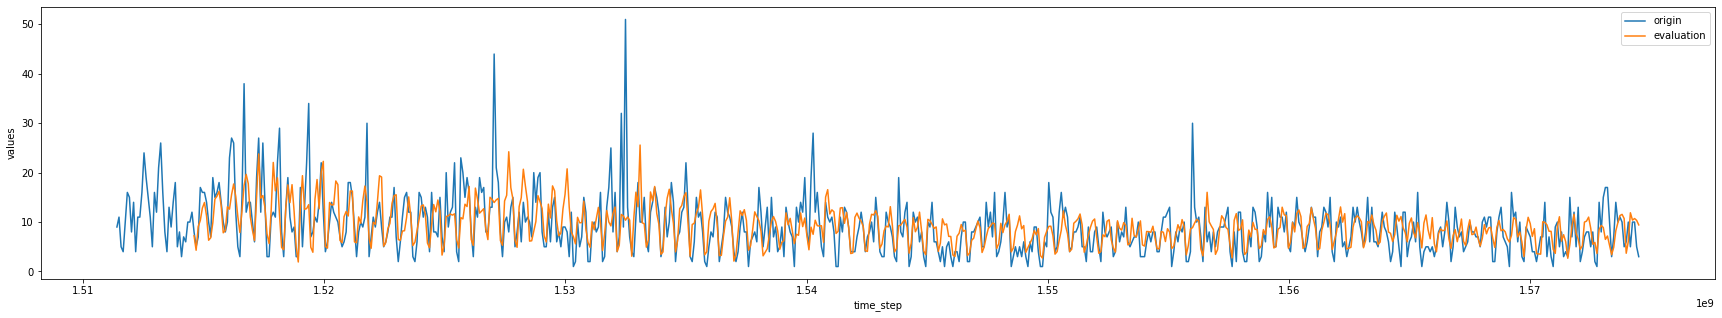

In [94]:
tensorflowDataFrame = pd.read_csv('angular_tf_created.csv')
transorflowFunction(tensorflowDataFrame)

{'times': array([1.5114168e+09, 1.5115032e+09, 1.5117624e+09, 1.5119352e+09,
       1.5121080e+09, 1.5124536e+09, 1.5126264e+09, 1.5127128e+09,
       1.5128856e+09, 1.5129720e+09, 1.5130584e+09, 1.5131448e+09,
       1.5132312e+09, 1.5134904e+09, 1.5137496e+09, 1.5138360e+09,
       1.5139224e+09, 1.5140952e+09, 1.5141816e+09, 1.5143544e+09,
       1.5144408e+09, 1.5145272e+09, 1.5146136e+09, 1.5148728e+09,
       1.5149592e+09, 1.5150456e+09, 1.5151320e+09, 1.5153912e+09,
       1.5154776e+09, 1.5156504e+09, 1.5157368e+09, 1.5159096e+09,
       1.5159960e+09, 1.5160824e+09, 1.5161688e+09, 1.5162552e+09,
       1.5163416e+09, 1.5164280e+09, 1.5165144e+09, 1.5166872e+09,
       1.5167736e+09, 1.5168600e+09, 1.5169464e+09, 1.5171192e+09,
       1.5172056e+09, 1.5174648e+09, 1.5175512e+09, 1.5178968e+09,
       1.5179832e+09, 1.5180696e+09, 1.5184152e+09, 1.5185016e+09,
       1.5185880e+09, 1.5186744e+09, 1.5187608e+09, 1.5188472e+09,
       1.5189336e+09, 1.5191928e+09, 1.5192792e+09, 

INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Saeid\\AppData\\Local\\Temp\\tmpvaodfy0c', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000259B6D50748>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Saeid\\AppData\\Local\\Temp\\tmpvaodfy0c', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000259B6D50748>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Saeid\AppData\Local\Temp\tmpvaodfy0c\model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Saeid\AppData\Local\Temp\tmpvaodfy0c\model.ckpt.


INFO:tensorflow:loss = 1.5669366, step = 1


INFO:tensorflow:loss = 1.5669366, step = 1


INFO:tensorflow:global_step/sec: 192.427


INFO:tensorflow:global_step/sec: 192.427


INFO:tensorflow:loss = 1.1984122, step = 101 (0.522 sec)


INFO:tensorflow:loss = 1.1984122, step = 101 (0.522 sec)


INFO:tensorflow:global_step/sec: 122.775


INFO:tensorflow:global_step/sec: 122.775


INFO:tensorflow:loss = 1.1859131, step = 201 (0.819 sec)


INFO:tensorflow:loss = 1.1859131, step = 201 (0.819 sec)


INFO:tensorflow:global_step/sec: 104.339


INFO:tensorflow:global_step/sec: 104.339


INFO:tensorflow:loss = 1.2510877, step = 301 (0.955 sec)


INFO:tensorflow:loss = 1.2510877, step = 301 (0.955 sec)


INFO:tensorflow:global_step/sec: 138.591


INFO:tensorflow:global_step/sec: 138.591


INFO:tensorflow:loss = 1.1908417, step = 401 (0.721 sec)


INFO:tensorflow:loss = 1.1908417, step = 401 (0.721 sec)


INFO:tensorflow:global_step/sec: 141.53


INFO:tensorflow:global_step/sec: 141.53


INFO:tensorflow:loss = 1.2430018, step = 501 (0.711 sec)


INFO:tensorflow:loss = 1.2430018, step = 501 (0.711 sec)


INFO:tensorflow:global_step/sec: 141.932


INFO:tensorflow:global_step/sec: 141.932


INFO:tensorflow:loss = 1.2097363, step = 601 (0.706 sec)


INFO:tensorflow:loss = 1.2097363, step = 601 (0.706 sec)


INFO:tensorflow:global_step/sec: 138.016


INFO:tensorflow:global_step/sec: 138.016


INFO:tensorflow:loss = 1.2125554, step = 701 (0.719 sec)


INFO:tensorflow:loss = 1.2125554, step = 701 (0.719 sec)


INFO:tensorflow:global_step/sec: 139.751


INFO:tensorflow:global_step/sec: 139.751


INFO:tensorflow:loss = 1.1953418, step = 801 (0.715 sec)


INFO:tensorflow:loss = 1.1953418, step = 801 (0.715 sec)


INFO:tensorflow:global_step/sec: 136.324


INFO:tensorflow:global_step/sec: 136.324


INFO:tensorflow:loss = 1.2835335, step = 901 (0.734 sec)


INFO:tensorflow:loss = 1.2835335, step = 901 (0.734 sec)


INFO:tensorflow:global_step/sec: 135.954


INFO:tensorflow:global_step/sec: 135.954


INFO:tensorflow:loss = 1.1775644, step = 1001 (0.736 sec)


INFO:tensorflow:loss = 1.1775644, step = 1001 (0.736 sec)


INFO:tensorflow:global_step/sec: 130.8


INFO:tensorflow:global_step/sec: 130.8


INFO:tensorflow:loss = 1.177238, step = 1101 (0.767 sec)


INFO:tensorflow:loss = 1.177238, step = 1101 (0.767 sec)


INFO:tensorflow:global_step/sec: 138.975


INFO:tensorflow:global_step/sec: 138.975


INFO:tensorflow:loss = 1.1652304, step = 1201 (0.719 sec)


INFO:tensorflow:loss = 1.1652304, step = 1201 (0.719 sec)


INFO:tensorflow:global_step/sec: 138.016


INFO:tensorflow:global_step/sec: 138.016


INFO:tensorflow:loss = 1.2079217, step = 1301 (0.726 sec)


INFO:tensorflow:loss = 1.2079217, step = 1301 (0.726 sec)


INFO:tensorflow:global_step/sec: 138.398


INFO:tensorflow:global_step/sec: 138.398


INFO:tensorflow:loss = 1.2313477, step = 1401 (0.722 sec)


INFO:tensorflow:loss = 1.2313477, step = 1401 (0.722 sec)


INFO:tensorflow:global_step/sec: 142.336


INFO:tensorflow:global_step/sec: 142.336


INFO:tensorflow:loss = 1.1719835, step = 1501 (0.709 sec)


INFO:tensorflow:loss = 1.1719835, step = 1501 (0.709 sec)


INFO:tensorflow:global_step/sec: 136.696


INFO:tensorflow:global_step/sec: 136.696


INFO:tensorflow:loss = 1.2090348, step = 1601 (0.725 sec)


INFO:tensorflow:loss = 1.2090348, step = 1601 (0.725 sec)


INFO:tensorflow:global_step/sec: 138.782


INFO:tensorflow:global_step/sec: 138.782


INFO:tensorflow:loss = 1.2110757, step = 1701 (0.720 sec)


INFO:tensorflow:loss = 1.2110757, step = 1701 (0.720 sec)


INFO:tensorflow:global_step/sec: 138.398


INFO:tensorflow:global_step/sec: 138.398


INFO:tensorflow:loss = 1.2104459, step = 1801 (0.726 sec)


INFO:tensorflow:loss = 1.2104459, step = 1801 (0.726 sec)


INFO:tensorflow:global_step/sec: 139.362


INFO:tensorflow:global_step/sec: 139.362


INFO:tensorflow:loss = 1.2288463, step = 1901 (0.718 sec)


INFO:tensorflow:loss = 1.2288463, step = 1901 (0.718 sec)


INFO:tensorflow:global_step/sec: 138.016


INFO:tensorflow:global_step/sec: 138.016


INFO:tensorflow:loss = 1.1508374, step = 2001 (0.725 sec)


INFO:tensorflow:loss = 1.1508374, step = 2001 (0.725 sec)


INFO:tensorflow:global_step/sec: 137.826


INFO:tensorflow:global_step/sec: 137.826


INFO:tensorflow:loss = 1.1694542, step = 2101 (0.724 sec)


INFO:tensorflow:loss = 1.1694542, step = 2101 (0.724 sec)


INFO:tensorflow:global_step/sec: 139.751


INFO:tensorflow:global_step/sec: 139.751


INFO:tensorflow:loss = 1.2141821, step = 2201 (0.716 sec)


INFO:tensorflow:loss = 1.2141821, step = 2201 (0.716 sec)


INFO:tensorflow:global_step/sec: 142.133


INFO:tensorflow:global_step/sec: 142.133


INFO:tensorflow:loss = 1.1901459, step = 2301 (0.704 sec)


INFO:tensorflow:loss = 1.1901459, step = 2301 (0.704 sec)


INFO:tensorflow:global_step/sec: 139.556


INFO:tensorflow:global_step/sec: 139.556


INFO:tensorflow:loss = 1.2030259, step = 2401 (0.718 sec)


INFO:tensorflow:loss = 1.2030259, step = 2401 (0.718 sec)


INFO:tensorflow:global_step/sec: 101.689


INFO:tensorflow:global_step/sec: 101.689


INFO:tensorflow:loss = 1.2034554, step = 2501 (0.987 sec)


INFO:tensorflow:loss = 1.2034554, step = 2501 (0.987 sec)


INFO:tensorflow:global_step/sec: 137.448


INFO:tensorflow:global_step/sec: 137.448


INFO:tensorflow:loss = 1.1710708, step = 2601 (0.725 sec)


INFO:tensorflow:loss = 1.1710708, step = 2601 (0.725 sec)


INFO:tensorflow:global_step/sec: 140.536


INFO:tensorflow:global_step/sec: 140.536


INFO:tensorflow:loss = 1.1888028, step = 2701 (0.711 sec)


INFO:tensorflow:loss = 1.1888028, step = 2701 (0.711 sec)


INFO:tensorflow:global_step/sec: 124.61


INFO:tensorflow:global_step/sec: 124.61


INFO:tensorflow:loss = 1.2226036, step = 2801 (0.804 sec)


INFO:tensorflow:loss = 1.2226036, step = 2801 (0.804 sec)


INFO:tensorflow:global_step/sec: 103.156


INFO:tensorflow:global_step/sec: 103.156


INFO:tensorflow:loss = 1.2468957, step = 2901 (0.969 sec)


INFO:tensorflow:loss = 1.2468957, step = 2901 (0.969 sec)


INFO:tensorflow:global_step/sec: 139.947


INFO:tensorflow:global_step/sec: 139.947


INFO:tensorflow:loss = 1.1731942, step = 3001 (0.714 sec)


INFO:tensorflow:loss = 1.1731942, step = 3001 (0.714 sec)


INFO:tensorflow:global_step/sec: 138.59


INFO:tensorflow:global_step/sec: 138.59


INFO:tensorflow:loss = 1.2128266, step = 3101 (0.722 sec)


INFO:tensorflow:loss = 1.2128266, step = 3101 (0.722 sec)


INFO:tensorflow:global_step/sec: 128.449


INFO:tensorflow:global_step/sec: 128.449


INFO:tensorflow:loss = 1.1985569, step = 3201 (0.779 sec)


INFO:tensorflow:loss = 1.1985569, step = 3201 (0.779 sec)


INFO:tensorflow:global_step/sec: 110.322


INFO:tensorflow:global_step/sec: 110.322


INFO:tensorflow:loss = 1.1891965, step = 3301 (0.906 sec)


INFO:tensorflow:loss = 1.1891965, step = 3301 (0.906 sec)


INFO:tensorflow:global_step/sec: 138.975


INFO:tensorflow:global_step/sec: 138.975


INFO:tensorflow:loss = 1.1721143, step = 3401 (0.720 sec)


INFO:tensorflow:loss = 1.1721143, step = 3401 (0.720 sec)


INFO:tensorflow:global_step/sec: 141.932


INFO:tensorflow:global_step/sec: 141.932


INFO:tensorflow:loss = 1.2148412, step = 3501 (0.706 sec)


INFO:tensorflow:loss = 1.2148412, step = 3501 (0.706 sec)


INFO:tensorflow:global_step/sec: 141.53


INFO:tensorflow:global_step/sec: 141.53


INFO:tensorflow:loss = 1.1869854, step = 3601 (0.707 sec)


INFO:tensorflow:loss = 1.1869854, step = 3601 (0.707 sec)


INFO:tensorflow:global_step/sec: 120.994


INFO:tensorflow:global_step/sec: 120.994


INFO:tensorflow:loss = 1.1911348, step = 3701 (0.827 sec)


INFO:tensorflow:loss = 1.1911348, step = 3701 (0.827 sec)


INFO:tensorflow:global_step/sec: 132.708


INFO:tensorflow:global_step/sec: 132.708


INFO:tensorflow:loss = 1.2156789, step = 3801 (0.751 sec)


INFO:tensorflow:loss = 1.2156789, step = 3801 (0.751 sec)


INFO:tensorflow:global_step/sec: 122.625


INFO:tensorflow:global_step/sec: 122.625


INFO:tensorflow:loss = 1.2029941, step = 3901 (0.817 sec)


INFO:tensorflow:loss = 1.2029941, step = 3901 (0.817 sec)


INFO:tensorflow:global_step/sec: 127.793


INFO:tensorflow:global_step/sec: 127.793


INFO:tensorflow:loss = 1.184063, step = 4001 (0.788 sec)


INFO:tensorflow:loss = 1.184063, step = 4001 (0.788 sec)


INFO:tensorflow:global_step/sec: 114.881


INFO:tensorflow:global_step/sec: 114.881


INFO:tensorflow:loss = 1.184479, step = 4101 (0.863 sec)


INFO:tensorflow:loss = 1.184479, step = 4101 (0.863 sec)


INFO:tensorflow:global_step/sec: 129.446


INFO:tensorflow:global_step/sec: 129.446


INFO:tensorflow:loss = 1.206368, step = 4201 (0.775 sec)


INFO:tensorflow:loss = 1.206368, step = 4201 (0.775 sec)


INFO:tensorflow:global_step/sec: 114.487


INFO:tensorflow:global_step/sec: 114.487


INFO:tensorflow:loss = 1.2302626, step = 4301 (0.873 sec)


INFO:tensorflow:loss = 1.2302626, step = 4301 (0.873 sec)


INFO:tensorflow:global_step/sec: 139.556


INFO:tensorflow:global_step/sec: 139.556


INFO:tensorflow:loss = 1.2176131, step = 4401 (0.716 sec)


INFO:tensorflow:loss = 1.2176131, step = 4401 (0.716 sec)


INFO:tensorflow:global_step/sec: 109


INFO:tensorflow:global_step/sec: 109


INFO:tensorflow:loss = 1.2355473, step = 4501 (0.918 sec)


INFO:tensorflow:loss = 1.2355473, step = 4501 (0.918 sec)


INFO:tensorflow:global_step/sec: 137.071


INFO:tensorflow:global_step/sec: 137.071


INFO:tensorflow:loss = 1.1725402, step = 4601 (0.729 sec)


INFO:tensorflow:loss = 1.1725402, step = 4601 (0.729 sec)


INFO:tensorflow:global_step/sec: 123.686


INFO:tensorflow:global_step/sec: 123.686


INFO:tensorflow:loss = 1.2291421, step = 4701 (0.813 sec)


INFO:tensorflow:loss = 1.2291421, step = 4701 (0.813 sec)


INFO:tensorflow:global_step/sec: 121.14


INFO:tensorflow:global_step/sec: 121.14


INFO:tensorflow:loss = 1.2075204, step = 4801 (0.819 sec)


INFO:tensorflow:loss = 1.2075204, step = 4801 (0.819 sec)


INFO:tensorflow:global_step/sec: 141.131


INFO:tensorflow:global_step/sec: 141.131


INFO:tensorflow:loss = 1.1680171, step = 4901 (0.710 sec)


INFO:tensorflow:loss = 1.1680171, step = 4901 (0.710 sec)


INFO:tensorflow:global_step/sec: 142.133


INFO:tensorflow:global_step/sec: 142.133


INFO:tensorflow:loss = 1.2103478, step = 5001 (0.704 sec)


INFO:tensorflow:loss = 1.2103478, step = 5001 (0.704 sec)


INFO:tensorflow:global_step/sec: 140.143


INFO:tensorflow:global_step/sec: 140.143


INFO:tensorflow:loss = 1.1614448, step = 5101 (0.715 sec)


INFO:tensorflow:loss = 1.1614448, step = 5101 (0.715 sec)


INFO:tensorflow:global_step/sec: 142.945


INFO:tensorflow:global_step/sec: 142.945


INFO:tensorflow:loss = 1.1475132, step = 5201 (0.699 sec)


INFO:tensorflow:loss = 1.1475132, step = 5201 (0.699 sec)


INFO:tensorflow:global_step/sec: 114.881


INFO:tensorflow:global_step/sec: 114.881


INFO:tensorflow:loss = 1.2010976, step = 5301 (0.879 sec)


INFO:tensorflow:loss = 1.2010976, step = 5301 (0.879 sec)


INFO:tensorflow:global_step/sec: 127.144


INFO:tensorflow:global_step/sec: 127.144


INFO:tensorflow:loss = 1.1414756, step = 5401 (0.778 sec)


INFO:tensorflow:loss = 1.1414756, step = 5401 (0.778 sec)


INFO:tensorflow:global_step/sec: 115.412


INFO:tensorflow:global_step/sec: 115.412


INFO:tensorflow:loss = 1.184015, step = 5501 (0.865 sec)


INFO:tensorflow:loss = 1.184015, step = 5501 (0.865 sec)


INFO:tensorflow:global_step/sec: 116.758


INFO:tensorflow:global_step/sec: 116.758


INFO:tensorflow:loss = 1.218817, step = 5601 (0.856 sec)


INFO:tensorflow:loss = 1.218817, step = 5601 (0.856 sec)


INFO:tensorflow:global_step/sec: 142.133


INFO:tensorflow:global_step/sec: 142.133


INFO:tensorflow:loss = 1.2257837, step = 5701 (0.706 sec)


INFO:tensorflow:loss = 1.2257837, step = 5701 (0.706 sec)


INFO:tensorflow:global_step/sec: 141.731


INFO:tensorflow:global_step/sec: 141.731


INFO:tensorflow:loss = 1.1904038, step = 5801 (0.705 sec)


INFO:tensorflow:loss = 1.1904038, step = 5801 (0.705 sec)


INFO:tensorflow:global_step/sec: 143.355


INFO:tensorflow:global_step/sec: 143.355


INFO:tensorflow:loss = 1.1338378, step = 5901 (0.699 sec)


INFO:tensorflow:loss = 1.1338378, step = 5901 (0.699 sec)


INFO:tensorflow:Saving checkpoints for 6000 into C:\Users\Saeid\AppData\Local\Temp\tmpvaodfy0c\model.ckpt.


INFO:tensorflow:Saving checkpoints for 6000 into C:\Users\Saeid\AppData\Local\Temp\tmpvaodfy0c\model.ckpt.


INFO:tensorflow:Loss for final step: 1.2025838.


INFO:tensorflow:Loss for final step: 1.2025838.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2019-11-24T00:44:57Z


INFO:tensorflow:Starting evaluation at 2019-11-24T00:44:57Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmpvaodfy0c\model.ckpt-6000


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmpvaodfy0c\model.ckpt-6000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Evaluation [100/1000]


INFO:tensorflow:Evaluation [100/1000]


INFO:tensorflow:Evaluation [200/1000]


INFO:tensorflow:Evaluation [200/1000]


INFO:tensorflow:Evaluation [300/1000]


INFO:tensorflow:Evaluation [300/1000]


INFO:tensorflow:Evaluation [400/1000]


INFO:tensorflow:Evaluation [400/1000]


INFO:tensorflow:Evaluation [500/1000]


INFO:tensorflow:Evaluation [500/1000]


INFO:tensorflow:Evaluation [600/1000]


INFO:tensorflow:Evaluation [600/1000]


INFO:tensorflow:Evaluation [700/1000]


INFO:tensorflow:Evaluation [700/1000]


INFO:tensorflow:Evaluation [800/1000]


INFO:tensorflow:Evaluation [800/1000]


INFO:tensorflow:Evaluation [900/1000]


INFO:tensorflow:Evaluation [900/1000]


INFO:tensorflow:Evaluation [1000/1000]


INFO:tensorflow:Evaluation [1000/1000]


INFO:tensorflow:Finished evaluation at 2019-11-24-00:45:01


INFO:tensorflow:Finished evaluation at 2019-11-24-00:45:01


INFO:tensorflow:Saving dict for global step 6000: average_loss = 1.207083, covariance = [[[4.64348733e-01]
  [2.48663673e+01]
  [3.98074538e-01]
  [1.05636954e+00]
  [7.57224560e-02]
  [9.26734656e-02]
  [3.07300776e-01]
  [1.87640369e-01]
  [1.08698511e+00]
  [1.14994872e+00]
  [4.47379649e-01]
  [3.46863836e-01]
  [6.93138897e-01]
  [6.32097423e-01]
  [1.25737643e+00]
  [8.86424959e-01]
  [3.89575362e+00]
  [1.24583137e+00]
  [2.05987048e+00]
  [1.29020095e+00]
  [5.12371898e-01]
  [1.38557780e+00]
  [5.09774303e+00]
  [1.18741107e+00]
  [1.16296351e+00]
  [2.35190332e-01]
  [5.18820703e-01]
  [1.34411204e+00]
  [8.11324239e-01]
  [2.04623193e-01]
  [1.11684752e+00]
  [1.43424094e-01]
  [1.75275952e-01]
  [3.96410562e-02]
  [2.22354650e-01]
  [1.12635121e-01]
  [1.46577024e+00]
  [1.33967459e+00]
  [8.74056697e-01]
  [2.45507169e+00]
  [2.07165852e-01]
  [5.74756488e-02]
  [5.68316430e-02]
  [1.23357708e-02]
  [3.19200611e+00]
  [2.81766582e+00]
  [7.51238556e+01]
  [1.27834072e+01]


INFO:tensorflow:Saving dict for global step 6000: average_loss = 1.207083, covariance = [[[4.64348733e-01]
  [2.48663673e+01]
  [3.98074538e-01]
  [1.05636954e+00]
  [7.57224560e-02]
  [9.26734656e-02]
  [3.07300776e-01]
  [1.87640369e-01]
  [1.08698511e+00]
  [1.14994872e+00]
  [4.47379649e-01]
  [3.46863836e-01]
  [6.93138897e-01]
  [6.32097423e-01]
  [1.25737643e+00]
  [8.86424959e-01]
  [3.89575362e+00]
  [1.24583137e+00]
  [2.05987048e+00]
  [1.29020095e+00]
  [5.12371898e-01]
  [1.38557780e+00]
  [5.09774303e+00]
  [1.18741107e+00]
  [1.16296351e+00]
  [2.35190332e-01]
  [5.18820703e-01]
  [1.34411204e+00]
  [8.11324239e-01]
  [2.04623193e-01]
  [1.11684752e+00]
  [1.43424094e-01]
  [1.75275952e-01]
  [3.96410562e-02]
  [2.22354650e-01]
  [1.12635121e-01]
  [1.46577024e+00]
  [1.33967459e+00]
  [8.74056697e-01]
  [2.45507169e+00]
  [2.07165852e-01]
  [5.74756488e-02]
  [5.68316430e-02]
  [1.23357708e-02]
  [3.19200611e+00]
  [2.81766582e+00]
  [7.51238556e+01]
  [1.27834072e+01]


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6000: C:\Users\Saeid\AppData\Local\Temp\tmpvaodfy0c\model.ckpt-6000


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6000: C:\Users\Saeid\AppData\Local\Temp\tmpvaodfy0c\model.ckpt-6000


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmpvaodfy0c\model.ckpt-6000


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmpvaodfy0c\model.ckpt-6000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


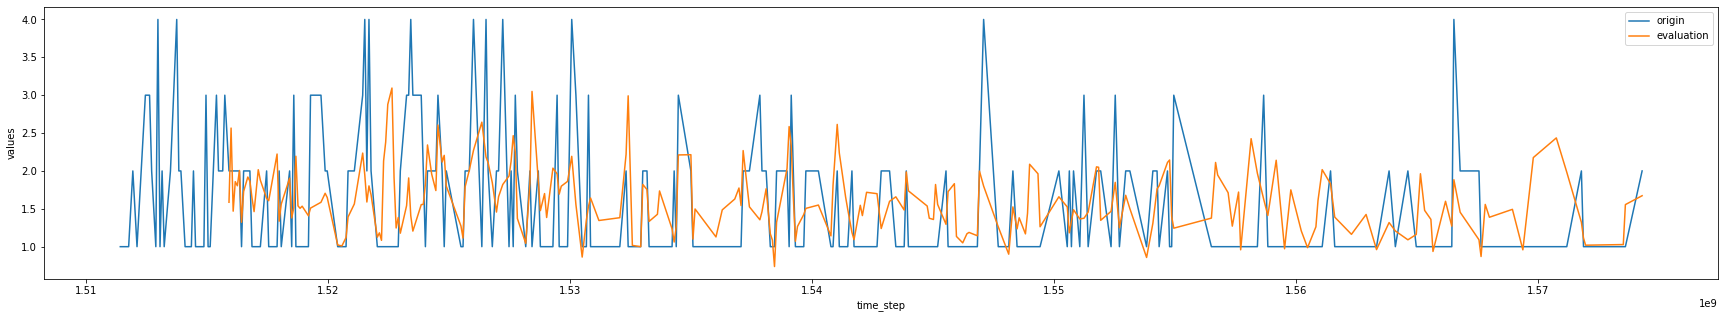

In [95]:
tensorflowDataFrame = pd.read_csv('material_tf_created.csv')
transorflowFunction(tensorflowDataFrame)


{'times': array([1.5114168e+09, 1.5115032e+09, 1.5115896e+09, 1.5116760e+09,
       1.5117624e+09, 1.5118488e+09, 1.5119352e+09, 1.5120216e+09,
       1.5121080e+09, 1.5121944e+09, 1.5122808e+09, 1.5123672e+09,
       1.5124536e+09, 1.5125400e+09, 1.5126264e+09, 1.5127128e+09,
       1.5127992e+09, 1.5128856e+09, 1.5129720e+09, 1.5130584e+09,
       1.5131448e+09, 1.5132312e+09, 1.5133176e+09, 1.5134040e+09,
       1.5134904e+09, 1.5135768e+09, 1.5136632e+09, 1.5137496e+09,
       1.5138360e+09, 1.5139224e+09, 1.5140088e+09, 1.5140952e+09,
       1.5141816e+09, 1.5142680e+09, 1.5143544e+09, 1.5144408e+09,
       1.5145272e+09, 1.5146136e+09, 1.5147000e+09, 1.5147864e+09,
       1.5148728e+09, 1.5149592e+09, 1.5150456e+09, 1.5151320e+09,
       1.5152184e+09, 1.5153048e+09, 1.5153912e+09, 1.5154776e+09,
       1.5155640e+09, 1.5156504e+09, 1.5157368e+09, 1.5158232e+09,
       1.5159096e+09, 1.5159960e+09, 1.5160824e+09, 1.5161688e+09,
       1.5162552e+09, 1.5163416e+09, 1.5164280e+09, 

INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Saeid\\AppData\\Local\\Temp\\tmp_x917fv1', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000259B6D8EE88>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Saeid\\AppData\\Local\\Temp\\tmp_x917fv1', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000259B6D8EE88>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Saeid\AppData\Local\Temp\tmp_x917fv1\model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Saeid\AppData\Local\Temp\tmp_x917fv1\model.ckpt.


INFO:tensorflow:loss = 1.559981, step = 1


INFO:tensorflow:loss = 1.559981, step = 1


INFO:tensorflow:global_step/sec: 234.337


INFO:tensorflow:global_step/sec: 234.337


INFO:tensorflow:loss = 1.1736281, step = 101 (0.429 sec)


INFO:tensorflow:loss = 1.1736281, step = 101 (0.429 sec)


INFO:tensorflow:global_step/sec: 119.548


INFO:tensorflow:global_step/sec: 119.548


INFO:tensorflow:loss = 1.2650371, step = 201 (0.836 sec)


INFO:tensorflow:loss = 1.2650371, step = 201 (0.836 sec)


INFO:tensorflow:global_step/sec: 130.12


INFO:tensorflow:global_step/sec: 130.12


INFO:tensorflow:loss = 1.0819819, step = 301 (0.769 sec)


INFO:tensorflow:loss = 1.0819819, step = 301 (0.769 sec)


INFO:tensorflow:global_step/sec: 146.934


INFO:tensorflow:global_step/sec: 146.934


INFO:tensorflow:loss = 1.1403716, step = 401 (0.680 sec)


INFO:tensorflow:loss = 1.1403716, step = 401 (0.680 sec)


INFO:tensorflow:global_step/sec: 151.839


INFO:tensorflow:global_step/sec: 151.839


INFO:tensorflow:loss = 1.1598052, step = 501 (0.659 sec)


INFO:tensorflow:loss = 1.1598052, step = 501 (0.659 sec)


INFO:tensorflow:global_step/sec: 148.24


INFO:tensorflow:global_step/sec: 148.24


INFO:tensorflow:loss = 1.1280544, step = 601 (0.675 sec)


INFO:tensorflow:loss = 1.1280544, step = 601 (0.675 sec)


INFO:tensorflow:global_step/sec: 155.376


INFO:tensorflow:global_step/sec: 155.376


INFO:tensorflow:loss = 1.0706973, step = 701 (0.645 sec)


INFO:tensorflow:loss = 1.0706973, step = 701 (0.645 sec)


INFO:tensorflow:global_step/sec: 149.793


INFO:tensorflow:global_step/sec: 149.793


INFO:tensorflow:loss = 1.1236774, step = 801 (0.666 sec)


INFO:tensorflow:loss = 1.1236774, step = 801 (0.666 sec)


INFO:tensorflow:global_step/sec: 153


INFO:tensorflow:global_step/sec: 153


INFO:tensorflow:loss = 1.1679167, step = 901 (0.656 sec)


INFO:tensorflow:loss = 1.1679167, step = 901 (0.656 sec)


INFO:tensorflow:global_step/sec: 157.578


INFO:tensorflow:global_step/sec: 157.578


INFO:tensorflow:loss = 1.1574341, step = 1001 (0.634 sec)


INFO:tensorflow:loss = 1.1574341, step = 1001 (0.634 sec)


INFO:tensorflow:global_step/sec: 150.018


INFO:tensorflow:global_step/sec: 150.018


INFO:tensorflow:loss = 1.1821735, step = 1101 (0.668 sec)


INFO:tensorflow:loss = 1.1821735, step = 1101 (0.668 sec)


INFO:tensorflow:global_step/sec: 155.376


INFO:tensorflow:global_step/sec: 155.376


INFO:tensorflow:loss = 1.1473329, step = 1201 (0.644 sec)


INFO:tensorflow:loss = 1.1473329, step = 1201 (0.644 sec)


INFO:tensorflow:global_step/sec: 151.609


INFO:tensorflow:global_step/sec: 151.609


INFO:tensorflow:loss = 1.176711, step = 1301 (0.658 sec)


INFO:tensorflow:loss = 1.176711, step = 1301 (0.658 sec)


INFO:tensorflow:global_step/sec: 140.143


INFO:tensorflow:global_step/sec: 140.143


INFO:tensorflow:loss = 1.1595494, step = 1401 (0.715 sec)


INFO:tensorflow:loss = 1.1595494, step = 1401 (0.715 sec)


INFO:tensorflow:global_step/sec: 140.536


INFO:tensorflow:global_step/sec: 140.536


INFO:tensorflow:loss = 1.2068202, step = 1501 (0.713 sec)


INFO:tensorflow:loss = 1.2068202, step = 1501 (0.713 sec)


INFO:tensorflow:global_step/sec: 146.289


INFO:tensorflow:global_step/sec: 146.289


INFO:tensorflow:loss = 1.0952733, step = 1601 (0.683 sec)


INFO:tensorflow:loss = 1.0952733, step = 1601 (0.683 sec)


INFO:tensorflow:global_step/sec: 137.071


INFO:tensorflow:global_step/sec: 137.071


INFO:tensorflow:loss = 1.1396247, step = 1701 (0.731 sec)


INFO:tensorflow:loss = 1.1396247, step = 1701 (0.731 sec)


INFO:tensorflow:global_step/sec: 144.389


INFO:tensorflow:global_step/sec: 144.389


INFO:tensorflow:loss = 1.0934972, step = 1801 (0.698 sec)


INFO:tensorflow:loss = 1.0934972, step = 1801 (0.698 sec)


INFO:tensorflow:global_step/sec: 130.12


INFO:tensorflow:global_step/sec: 130.12


INFO:tensorflow:loss = 1.167308, step = 1901 (0.762 sec)


INFO:tensorflow:loss = 1.167308, step = 1901 (0.762 sec)


INFO:tensorflow:global_step/sec: 148.46


INFO:tensorflow:global_step/sec: 148.46


INFO:tensorflow:loss = 1.1005057, step = 2001 (0.675 sec)


INFO:tensorflow:loss = 1.1005057, step = 2001 (0.675 sec)


INFO:tensorflow:global_step/sec: 120.122


INFO:tensorflow:global_step/sec: 120.122


INFO:tensorflow:loss = 1.1055596, step = 2101 (0.832 sec)


INFO:tensorflow:loss = 1.1055596, step = 2101 (0.832 sec)


INFO:tensorflow:global_step/sec: 117.998


INFO:tensorflow:global_step/sec: 117.998


INFO:tensorflow:loss = 1.1135327, step = 2201 (0.848 sec)


INFO:tensorflow:loss = 1.1135327, step = 2201 (0.848 sec)


INFO:tensorflow:global_step/sec: 114.618


INFO:tensorflow:global_step/sec: 114.618


INFO:tensorflow:loss = 1.2290937, step = 2301 (0.870 sec)


INFO:tensorflow:loss = 1.2290937, step = 2301 (0.870 sec)


INFO:tensorflow:global_step/sec: 115.812


INFO:tensorflow:global_step/sec: 115.812


INFO:tensorflow:loss = 1.1768416, step = 2401 (0.873 sec)


INFO:tensorflow:loss = 1.1768416, step = 2401 (0.873 sec)


INFO:tensorflow:global_step/sec: 108.763


INFO:tensorflow:global_step/sec: 108.763


INFO:tensorflow:loss = 1.1504954, step = 2501 (0.914 sec)


INFO:tensorflow:loss = 1.1504954, step = 2501 (0.914 sec)


INFO:tensorflow:global_step/sec: 122.926


INFO:tensorflow:global_step/sec: 122.926


INFO:tensorflow:loss = 1.103014, step = 2601 (0.813 sec)


INFO:tensorflow:loss = 1.103014, step = 2601 (0.813 sec)


INFO:tensorflow:global_step/sec: 117.168


INFO:tensorflow:global_step/sec: 117.168


INFO:tensorflow:loss = 1.117209, step = 2701 (0.849 sec)


INFO:tensorflow:loss = 1.117209, step = 2701 (0.849 sec)


INFO:tensorflow:global_step/sec: 117.306


INFO:tensorflow:global_step/sec: 117.306


INFO:tensorflow:loss = 1.1441994, step = 2801 (0.853 sec)


INFO:tensorflow:loss = 1.1441994, step = 2801 (0.853 sec)


INFO:tensorflow:global_step/sec: 110.688


INFO:tensorflow:global_step/sec: 110.688


INFO:tensorflow:loss = 1.0957916, step = 2901 (0.906 sec)


INFO:tensorflow:loss = 1.0957916, step = 2901 (0.906 sec)


INFO:tensorflow:global_step/sec: 123.229


INFO:tensorflow:global_step/sec: 123.229


INFO:tensorflow:loss = 1.0951711, step = 3001 (0.808 sec)


INFO:tensorflow:loss = 1.0951711, step = 3001 (0.808 sec)


INFO:tensorflow:global_step/sec: 115.279


INFO:tensorflow:global_step/sec: 115.279


INFO:tensorflow:loss = 1.0748256, step = 3101 (0.869 sec)


INFO:tensorflow:loss = 1.0748256, step = 3101 (0.869 sec)


INFO:tensorflow:global_step/sec: 140.143


INFO:tensorflow:global_step/sec: 140.143


INFO:tensorflow:loss = 1.2267063, step = 3201 (0.713 sec)


INFO:tensorflow:loss = 1.2267063, step = 3201 (0.713 sec)


INFO:tensorflow:global_step/sec: 148.46


INFO:tensorflow:global_step/sec: 148.46


INFO:tensorflow:loss = 1.0933081, step = 3301 (0.674 sec)


INFO:tensorflow:loss = 1.0933081, step = 3301 (0.674 sec)


INFO:tensorflow:global_step/sec: 142.741


INFO:tensorflow:global_step/sec: 142.741


INFO:tensorflow:loss = 1.1655399, step = 3401 (0.700 sec)


INFO:tensorflow:loss = 1.1655399, step = 3401 (0.700 sec)


INFO:tensorflow:global_step/sec: 153.705


INFO:tensorflow:global_step/sec: 153.705


INFO:tensorflow:loss = 1.0922402, step = 3501 (0.650 sec)


INFO:tensorflow:loss = 1.0922402, step = 3501 (0.650 sec)


INFO:tensorflow:global_step/sec: 124.61


INFO:tensorflow:global_step/sec: 124.61


INFO:tensorflow:loss = 1.163965, step = 3601 (0.805 sec)


INFO:tensorflow:loss = 1.163965, step = 3601 (0.805 sec)


INFO:tensorflow:global_step/sec: 111.551


INFO:tensorflow:global_step/sec: 111.551


INFO:tensorflow:loss = 1.0706874, step = 3701 (0.896 sec)


INFO:tensorflow:loss = 1.0706874, step = 3701 (0.896 sec)


INFO:tensorflow:global_step/sec: 136.697


INFO:tensorflow:global_step/sec: 136.697


INFO:tensorflow:loss = 1.2387623, step = 3801 (0.733 sec)


INFO:tensorflow:loss = 1.2387623, step = 3801 (0.733 sec)


INFO:tensorflow:global_step/sec: 119.835


INFO:tensorflow:global_step/sec: 119.835


INFO:tensorflow:loss = 1.1406021, step = 3901 (0.833 sec)


INFO:tensorflow:loss = 1.1406021, step = 3901 (0.833 sec)


INFO:tensorflow:global_step/sec: 137.637


INFO:tensorflow:global_step/sec: 137.637


INFO:tensorflow:loss = 1.1186513, step = 4001 (0.730 sec)


INFO:tensorflow:loss = 1.1186513, step = 4001 (0.730 sec)


INFO:tensorflow:global_step/sec: 113.836


INFO:tensorflow:global_step/sec: 113.836


INFO:tensorflow:loss = 1.149814, step = 4101 (0.875 sec)


INFO:tensorflow:loss = 1.149814, step = 4101 (0.875 sec)


INFO:tensorflow:global_step/sec: 151.379


INFO:tensorflow:global_step/sec: 151.379


INFO:tensorflow:loss = 1.2677093, step = 4201 (0.659 sec)


INFO:tensorflow:loss = 1.2677093, step = 4201 (0.659 sec)


INFO:tensorflow:global_step/sec: 139.947


INFO:tensorflow:global_step/sec: 139.947


INFO:tensorflow:loss = 1.2521789, step = 4301 (0.717 sec)


INFO:tensorflow:loss = 1.2521789, step = 4301 (0.717 sec)


INFO:tensorflow:global_step/sec: 122.176


INFO:tensorflow:global_step/sec: 122.176


INFO:tensorflow:loss = 1.2267381, step = 4401 (0.817 sec)


INFO:tensorflow:loss = 1.2267381, step = 4401 (0.817 sec)


INFO:tensorflow:global_step/sec: 128.449


INFO:tensorflow:global_step/sec: 128.449


INFO:tensorflow:loss = 1.270159, step = 4501 (0.793 sec)


INFO:tensorflow:loss = 1.270159, step = 4501 (0.793 sec)


INFO:tensorflow:global_step/sec: 131.315


INFO:tensorflow:global_step/sec: 131.315


INFO:tensorflow:loss = 1.1439976, step = 4601 (0.752 sec)


INFO:tensorflow:loss = 1.1439976, step = 4601 (0.752 sec)


INFO:tensorflow:global_step/sec: 118.697


INFO:tensorflow:global_step/sec: 118.697


INFO:tensorflow:loss = 1.1699665, step = 4701 (0.839 sec)


INFO:tensorflow:loss = 1.1699665, step = 4701 (0.839 sec)


INFO:tensorflow:global_step/sec: 148.46


INFO:tensorflow:global_step/sec: 148.46


INFO:tensorflow:loss = 1.1797878, step = 4801 (0.672 sec)


INFO:tensorflow:loss = 1.1797878, step = 4801 (0.672 sec)


INFO:tensorflow:global_step/sec: 144.39


INFO:tensorflow:global_step/sec: 144.39


INFO:tensorflow:loss = 1.1655079, step = 4901 (0.695 sec)


INFO:tensorflow:loss = 1.1655079, step = 4901 (0.695 sec)


INFO:tensorflow:global_step/sec: 117.997


INFO:tensorflow:global_step/sec: 117.997


INFO:tensorflow:loss = 1.1998258, step = 5001 (0.845 sec)


INFO:tensorflow:loss = 1.1998258, step = 5001 (0.845 sec)


INFO:tensorflow:global_step/sec: 150.923


INFO:tensorflow:global_step/sec: 150.923


INFO:tensorflow:loss = 1.1780258, step = 5101 (0.664 sec)


INFO:tensorflow:loss = 1.1780258, step = 5101 (0.664 sec)


INFO:tensorflow:global_step/sec: 140.339


INFO:tensorflow:global_step/sec: 140.339


INFO:tensorflow:loss = 1.0873296, step = 5201 (0.713 sec)


INFO:tensorflow:loss = 1.0873296, step = 5201 (0.713 sec)


INFO:tensorflow:global_step/sec: 111.056


INFO:tensorflow:global_step/sec: 111.056


INFO:tensorflow:loss = 1.2404149, step = 5301 (0.900 sec)


INFO:tensorflow:loss = 1.2404149, step = 5301 (0.900 sec)


INFO:tensorflow:global_step/sec: 146.934


INFO:tensorflow:global_step/sec: 146.934


INFO:tensorflow:loss = 1.2015887, step = 5401 (0.682 sec)


INFO:tensorflow:loss = 1.2015887, step = 5401 (0.682 sec)


INFO:tensorflow:global_step/sec: 154.179


INFO:tensorflow:global_step/sec: 154.179


INFO:tensorflow:loss = 1.1457775, step = 5501 (0.648 sec)


INFO:tensorflow:loss = 1.1457775, step = 5501 (0.648 sec)


INFO:tensorflow:global_step/sec: 153


INFO:tensorflow:global_step/sec: 153


INFO:tensorflow:loss = 1.0786651, step = 5601 (0.654 sec)


INFO:tensorflow:loss = 1.0786651, step = 5601 (0.654 sec)


INFO:tensorflow:global_step/sec: 145.228


INFO:tensorflow:global_step/sec: 145.228


INFO:tensorflow:loss = 1.1103166, step = 5701 (0.690 sec)


INFO:tensorflow:loss = 1.1103166, step = 5701 (0.690 sec)


INFO:tensorflow:global_step/sec: 146.933


INFO:tensorflow:global_step/sec: 146.933


INFO:tensorflow:loss = 1.1483982, step = 5801 (0.680 sec)


INFO:tensorflow:loss = 1.1483982, step = 5801 (0.680 sec)


INFO:tensorflow:global_step/sec: 153


INFO:tensorflow:global_step/sec: 153


INFO:tensorflow:loss = 1.1782606, step = 5901 (0.654 sec)


INFO:tensorflow:loss = 1.1782606, step = 5901 (0.654 sec)


INFO:tensorflow:Saving checkpoints for 6000 into C:\Users\Saeid\AppData\Local\Temp\tmp_x917fv1\model.ckpt.


INFO:tensorflow:Saving checkpoints for 6000 into C:\Users\Saeid\AppData\Local\Temp\tmp_x917fv1\model.ckpt.


INFO:tensorflow:Loss for final step: 1.1671324.


INFO:tensorflow:Loss for final step: 1.1671324.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2019-11-24T00:48:08Z


INFO:tensorflow:Starting evaluation at 2019-11-24T00:48:08Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmp_x917fv1\model.ckpt-6000


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmp_x917fv1\model.ckpt-6000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Evaluation [100/1000]


INFO:tensorflow:Evaluation [100/1000]


INFO:tensorflow:Evaluation [200/1000]


INFO:tensorflow:Evaluation [200/1000]


INFO:tensorflow:Evaluation [300/1000]


INFO:tensorflow:Evaluation [300/1000]


INFO:tensorflow:Evaluation [400/1000]


INFO:tensorflow:Evaluation [400/1000]


INFO:tensorflow:Evaluation [500/1000]


INFO:tensorflow:Evaluation [500/1000]


INFO:tensorflow:Evaluation [600/1000]


INFO:tensorflow:Evaluation [600/1000]


INFO:tensorflow:Evaluation [700/1000]


INFO:tensorflow:Evaluation [700/1000]


INFO:tensorflow:Evaluation [800/1000]


INFO:tensorflow:Evaluation [800/1000]


INFO:tensorflow:Evaluation [900/1000]


INFO:tensorflow:Evaluation [900/1000]


INFO:tensorflow:Evaluation [1000/1000]


INFO:tensorflow:Evaluation [1000/1000]


INFO:tensorflow:Finished evaluation at 2019-11-24-00:48:16


INFO:tensorflow:Finished evaluation at 2019-11-24-00:48:16


INFO:tensorflow:Saving dict for global step 6000: average_loss = 1.1576711, covariance = [[[6.54288635e+01]
  [8.49140854e+01]
  [1.13049622e+02]
  [2.96716366e+01]
  [4.54593697e+01]
  [2.77516613e+01]
  [1.88309155e+01]
  [9.12797546e+01]
  [1.44880981e+02]
  [3.53734398e+01]
  [4.63817024e+01]
  [2.15202980e+01]
  [3.43634911e+01]
  [4.56368027e+01]
  [2.63357391e+01]
  [1.09662392e+02]
  [6.42293091e+01]
  [2.99161682e+01]
  [2.56892853e+01]
  [2.08978729e+01]
  [9.88322639e+00]
  [2.51068668e+01]
  [5.36998711e+01]
  [9.62686234e+01]
  [2.51881447e+01]
  [5.78443031e+01]
  [2.24441109e+01]
  [2.81426296e+01]
  [4.31360359e+01]
  [2.38033524e+02]
  [7.00861740e+01]
  [3.06335621e+01]
  [1.04944443e+02]
  [1.49490528e+01]
  [6.56030426e+01]
  [8.91677551e+01]
  [3.04575958e+02]
  [4.11594238e+01]
  [9.95349274e+01]
  [8.60307770e+01]
  [7.88470612e+01]
  [1.64160099e+01]
  [7.13815536e+01]
  [2.31914749e+02]
  [1.42405518e+02]
  [8.81591949e+01]
  [7.14213486e+01]
  [9.20659943e+01]

INFO:tensorflow:Saving dict for global step 6000: average_loss = 1.1576711, covariance = [[[6.54288635e+01]
  [8.49140854e+01]
  [1.13049622e+02]
  [2.96716366e+01]
  [4.54593697e+01]
  [2.77516613e+01]
  [1.88309155e+01]
  [9.12797546e+01]
  [1.44880981e+02]
  [3.53734398e+01]
  [4.63817024e+01]
  [2.15202980e+01]
  [3.43634911e+01]
  [4.56368027e+01]
  [2.63357391e+01]
  [1.09662392e+02]
  [6.42293091e+01]
  [2.99161682e+01]
  [2.56892853e+01]
  [2.08978729e+01]
  [9.88322639e+00]
  [2.51068668e+01]
  [5.36998711e+01]
  [9.62686234e+01]
  [2.51881447e+01]
  [5.78443031e+01]
  [2.24441109e+01]
  [2.81426296e+01]
  [4.31360359e+01]
  [2.38033524e+02]
  [7.00861740e+01]
  [3.06335621e+01]
  [1.04944443e+02]
  [1.49490528e+01]
  [6.56030426e+01]
  [8.91677551e+01]
  [3.04575958e+02]
  [4.11594238e+01]
  [9.95349274e+01]
  [8.60307770e+01]
  [7.88470612e+01]
  [1.64160099e+01]
  [7.13815536e+01]
  [2.31914749e+02]
  [1.42405518e+02]
  [8.81591949e+01]
  [7.14213486e+01]
  [9.20659943e+01]

INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6000: C:\Users\Saeid\AppData\Local\Temp\tmp_x917fv1\model.ckpt-6000


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6000: C:\Users\Saeid\AppData\Local\Temp\tmp_x917fv1\model.ckpt-6000


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmp_x917fv1\model.ckpt-6000


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmp_x917fv1\model.ckpt-6000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


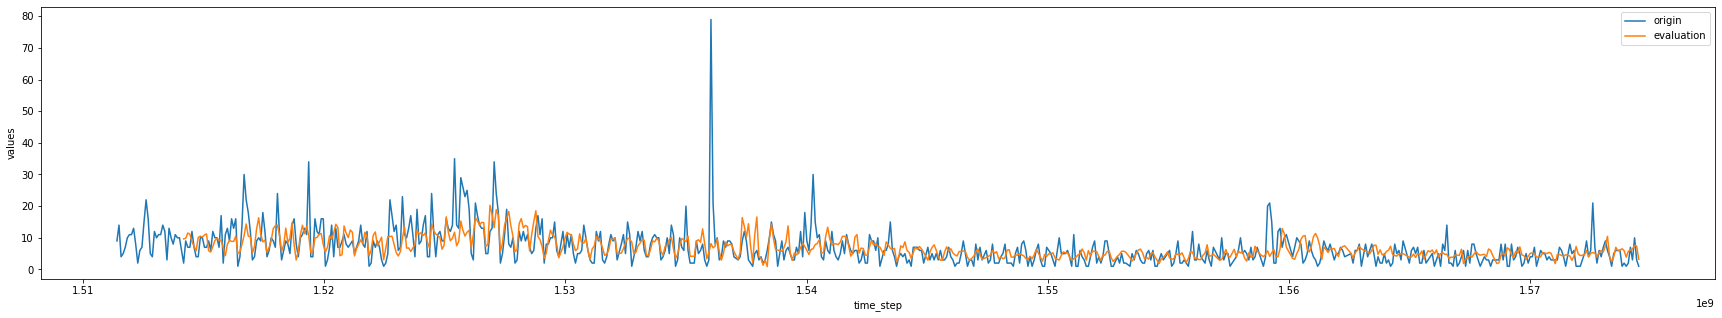

In [96]:
tensorflowDataFrame = pd.read_csv('angular_cli_tf_created.csv')
transorflowFunction(tensorflowDataFrame)


{'times': array([1.5115032e+09, 1.5116760e+09, 1.5117624e+09, 1.5119352e+09,
       1.5120216e+09, 1.5121944e+09, 1.5126264e+09, 1.5127992e+09,
       1.5129720e+09, 1.5131448e+09, 1.5133176e+09, 1.5134040e+09,
       1.5135768e+09, 1.5136632e+09, 1.5137496e+09, 1.5139224e+09,
       1.5140952e+09, 1.5141816e+09, 1.5147864e+09, 1.5149592e+09,
       1.5153048e+09, 1.5154776e+09, 1.5155640e+09, 1.5156504e+09,
       1.5158232e+09, 1.5159960e+09, 1.5160824e+09, 1.5166008e+09,
       1.5167736e+09, 1.5168600e+09, 1.5169464e+09, 1.5173784e+09,
       1.5175512e+09, 1.5177240e+09, 1.5178104e+09, 1.5178968e+09,
       1.5179832e+09, 1.5180696e+09, 1.5184152e+09, 1.5185880e+09,
       1.5186744e+09, 1.5188472e+09, 1.5190200e+09, 1.5191928e+09,
       1.5192792e+09, 1.5193656e+09, 1.5196248e+09, 1.5197112e+09,
       1.5197976e+09, 1.5198840e+09, 1.5199704e+09, 1.5200568e+09,
       1.5201432e+09, 1.5203160e+09, 1.5204888e+09, 1.5205752e+09,
       1.5206616e+09, 1.5208308e+09, 1.5209172e+09, 

INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Saeid\\AppData\\Local\\Temp\\tmpj6x2fmzd', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000259B1B98248>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Saeid\\AppData\\Local\\Temp\\tmpj6x2fmzd', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000259B1B98248>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Saeid\AppData\Local\Temp\tmpj6x2fmzd\model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Saeid\AppData\Local\Temp\tmpj6x2fmzd\model.ckpt.


INFO:tensorflow:loss = 1.5205857, step = 1


INFO:tensorflow:loss = 1.5205857, step = 1


INFO:tensorflow:global_step/sec: 191.322


INFO:tensorflow:global_step/sec: 191.322


INFO:tensorflow:loss = 1.2539642, step = 101 (0.526 sec)


INFO:tensorflow:loss = 1.2539642, step = 101 (0.526 sec)


INFO:tensorflow:global_step/sec: 107.709


INFO:tensorflow:global_step/sec: 107.709


INFO:tensorflow:loss = 1.2133869, step = 201 (0.928 sec)


INFO:tensorflow:loss = 1.2133869, step = 201 (0.928 sec)


INFO:tensorflow:global_step/sec: 132.532


INFO:tensorflow:global_step/sec: 132.532


INFO:tensorflow:loss = 1.2251523, step = 301 (0.756 sec)


INFO:tensorflow:loss = 1.2251523, step = 301 (0.756 sec)


INFO:tensorflow:global_step/sec: 108.763


INFO:tensorflow:global_step/sec: 108.763


INFO:tensorflow:loss = 1.1999369, step = 401 (0.919 sec)


INFO:tensorflow:loss = 1.1999369, step = 401 (0.919 sec)


INFO:tensorflow:global_step/sec: 122.775


INFO:tensorflow:global_step/sec: 122.775


INFO:tensorflow:loss = 1.2091569, step = 501 (0.814 sec)


INFO:tensorflow:loss = 1.2091569, step = 501 (0.814 sec)


INFO:tensorflow:global_step/sec: 102.838


INFO:tensorflow:global_step/sec: 102.838


INFO:tensorflow:loss = 1.2128404, step = 601 (0.970 sec)


INFO:tensorflow:loss = 1.2128404, step = 601 (0.970 sec)


INFO:tensorflow:global_step/sec: 119.264


INFO:tensorflow:global_step/sec: 119.264


INFO:tensorflow:loss = 1.1982231, step = 701 (0.842 sec)


INFO:tensorflow:loss = 1.1982231, step = 701 (0.842 sec)


INFO:tensorflow:global_step/sec: 104.015


INFO:tensorflow:global_step/sec: 104.015


INFO:tensorflow:loss = 1.1943415, step = 801 (0.957 sec)


INFO:tensorflow:loss = 1.1943415, step = 801 (0.957 sec)


INFO:tensorflow:global_step/sec: 139.168


INFO:tensorflow:global_step/sec: 139.168


INFO:tensorflow:loss = 1.2107632, step = 901 (0.719 sec)


INFO:tensorflow:loss = 1.2107632, step = 901 (0.719 sec)


INFO:tensorflow:global_step/sec: 139.556


INFO:tensorflow:global_step/sec: 139.556


INFO:tensorflow:loss = 1.1985415, step = 1001 (0.716 sec)


INFO:tensorflow:loss = 1.1985415, step = 1001 (0.716 sec)


INFO:tensorflow:global_step/sec: 137.071


INFO:tensorflow:global_step/sec: 137.071


INFO:tensorflow:loss = 1.230066, step = 1101 (0.731 sec)


INFO:tensorflow:loss = 1.230066, step = 1101 (0.731 sec)


INFO:tensorflow:global_step/sec: 118.557


INFO:tensorflow:global_step/sec: 118.557


INFO:tensorflow:loss = 1.1765609, step = 1201 (0.844 sec)


INFO:tensorflow:loss = 1.1765609, step = 1201 (0.844 sec)


INFO:tensorflow:global_step/sec: 108.409


INFO:tensorflow:global_step/sec: 108.409


INFO:tensorflow:loss = 1.2004238, step = 1301 (0.922 sec)


INFO:tensorflow:loss = 1.2004238, step = 1301 (0.922 sec)


INFO:tensorflow:global_step/sec: 138.782


INFO:tensorflow:global_step/sec: 138.782


INFO:tensorflow:loss = 1.1783271, step = 1401 (0.720 sec)


INFO:tensorflow:loss = 1.1783271, step = 1401 (0.720 sec)


INFO:tensorflow:global_step/sec: 129.782


INFO:tensorflow:global_step/sec: 129.782


INFO:tensorflow:loss = 1.1360708, step = 1501 (0.771 sec)


INFO:tensorflow:loss = 1.1360708, step = 1501 (0.771 sec)


INFO:tensorflow:global_step/sec: 138.59


INFO:tensorflow:global_step/sec: 138.59


INFO:tensorflow:loss = 1.1702445, step = 1601 (0.722 sec)


INFO:tensorflow:loss = 1.1702445, step = 1601 (0.722 sec)


INFO:tensorflow:global_step/sec: 132.884


INFO:tensorflow:global_step/sec: 132.884


INFO:tensorflow:loss = 1.1601444, step = 1701 (0.765 sec)


INFO:tensorflow:loss = 1.1601444, step = 1701 (0.765 sec)


INFO:tensorflow:global_step/sec: 125.548


INFO:tensorflow:global_step/sec: 125.548


INFO:tensorflow:loss = 1.1654643, step = 1801 (0.786 sec)


INFO:tensorflow:loss = 1.1654643, step = 1801 (0.786 sec)


INFO:tensorflow:global_step/sec: 132.884


INFO:tensorflow:global_step/sec: 132.884


INFO:tensorflow:loss = 1.1959856, step = 1901 (0.761 sec)


INFO:tensorflow:loss = 1.1959856, step = 1901 (0.761 sec)


INFO:tensorflow:global_step/sec: 141.731


INFO:tensorflow:global_step/sec: 141.731


INFO:tensorflow:loss = 1.1882821, step = 2001 (0.697 sec)


INFO:tensorflow:loss = 1.1882821, step = 2001 (0.697 sec)


INFO:tensorflow:global_step/sec: 136.324


INFO:tensorflow:global_step/sec: 136.324


INFO:tensorflow:loss = 1.1892446, step = 2101 (0.735 sec)


INFO:tensorflow:loss = 1.1892446, step = 2101 (0.735 sec)


INFO:tensorflow:global_step/sec: 126.982


INFO:tensorflow:global_step/sec: 126.982


INFO:tensorflow:loss = 1.1894108, step = 2201 (0.787 sec)


INFO:tensorflow:loss = 1.1894108, step = 2201 (0.787 sec)


INFO:tensorflow:global_step/sec: 135.585


INFO:tensorflow:global_step/sec: 135.585


INFO:tensorflow:loss = 1.1793717, step = 2301 (0.739 sec)


INFO:tensorflow:loss = 1.1793717, step = 2301 (0.739 sec)


INFO:tensorflow:global_step/sec: 137.447


INFO:tensorflow:global_step/sec: 137.447


INFO:tensorflow:loss = 1.1585193, step = 2401 (0.727 sec)


INFO:tensorflow:loss = 1.1585193, step = 2401 (0.727 sec)


INFO:tensorflow:global_step/sec: 138.398


INFO:tensorflow:global_step/sec: 138.398


INFO:tensorflow:loss = 1.2037121, step = 2501 (0.723 sec)


INFO:tensorflow:loss = 1.2037121, step = 2501 (0.723 sec)


INFO:tensorflow:global_step/sec: 137.448


INFO:tensorflow:global_step/sec: 137.448


INFO:tensorflow:loss = 1.1759987, step = 2601 (0.730 sec)


INFO:tensorflow:loss = 1.1759987, step = 2601 (0.730 sec)


INFO:tensorflow:global_step/sec: 137.259


INFO:tensorflow:global_step/sec: 137.259


INFO:tensorflow:loss = 1.2188329, step = 2701 (0.736 sec)


INFO:tensorflow:loss = 1.2188329, step = 2701 (0.736 sec)


INFO:tensorflow:global_step/sec: 130.629


INFO:tensorflow:global_step/sec: 130.629


INFO:tensorflow:loss = 1.1643604, step = 2801 (0.757 sec)


INFO:tensorflow:loss = 1.1643604, step = 2801 (0.757 sec)


INFO:tensorflow:global_step/sec: 130.12


INFO:tensorflow:global_step/sec: 130.12


INFO:tensorflow:loss = 1.1864607, step = 2901 (0.770 sec)


INFO:tensorflow:loss = 1.1864607, step = 2901 (0.770 sec)


INFO:tensorflow:global_step/sec: 137.259


INFO:tensorflow:global_step/sec: 137.259


INFO:tensorflow:loss = 1.1847754, step = 3001 (0.728 sec)


INFO:tensorflow:loss = 1.1847754, step = 3001 (0.728 sec)


INFO:tensorflow:global_step/sec: 135.402


INFO:tensorflow:global_step/sec: 135.402


INFO:tensorflow:loss = 1.1897645, step = 3101 (0.739 sec)


INFO:tensorflow:loss = 1.1897645, step = 3101 (0.739 sec)


INFO:tensorflow:global_step/sec: 135.954


INFO:tensorflow:global_step/sec: 135.954


INFO:tensorflow:loss = 1.1676018, step = 3201 (0.736 sec)


INFO:tensorflow:loss = 1.1676018, step = 3201 (0.736 sec)


INFO:tensorflow:global_step/sec: 135.769


INFO:tensorflow:global_step/sec: 135.769


INFO:tensorflow:loss = 1.1648933, step = 3301 (0.736 sec)


INFO:tensorflow:loss = 1.1648933, step = 3301 (0.736 sec)


INFO:tensorflow:global_step/sec: 132.708


INFO:tensorflow:global_step/sec: 132.708


INFO:tensorflow:loss = 1.2171335, step = 3401 (0.754 sec)


INFO:tensorflow:loss = 1.2171335, step = 3401 (0.754 sec)


INFO:tensorflow:global_step/sec: 135.769


INFO:tensorflow:global_step/sec: 135.769


INFO:tensorflow:loss = 1.1631081, step = 3501 (0.737 sec)


INFO:tensorflow:loss = 1.1631081, step = 3501 (0.737 sec)


INFO:tensorflow:global_step/sec: 138.016


INFO:tensorflow:global_step/sec: 138.016


INFO:tensorflow:loss = 1.1706011, step = 3601 (0.728 sec)


INFO:tensorflow:loss = 1.1706011, step = 3601 (0.728 sec)


INFO:tensorflow:global_step/sec: 123.229


INFO:tensorflow:global_step/sec: 123.229


INFO:tensorflow:loss = 1.167821, step = 3701 (0.809 sec)


INFO:tensorflow:loss = 1.167821, step = 3701 (0.809 sec)


INFO:tensorflow:global_step/sec: 135.219


INFO:tensorflow:global_step/sec: 135.219


INFO:tensorflow:loss = 1.1913555, step = 3801 (0.741 sec)


INFO:tensorflow:loss = 1.1913555, step = 3801 (0.741 sec)


INFO:tensorflow:global_step/sec: 134.131


INFO:tensorflow:global_step/sec: 134.131


INFO:tensorflow:loss = 1.1731561, step = 3901 (0.746 sec)


INFO:tensorflow:loss = 1.1731561, step = 3901 (0.746 sec)


INFO:tensorflow:global_step/sec: 120.411


INFO:tensorflow:global_step/sec: 120.411


INFO:tensorflow:loss = 1.1253157, step = 4001 (0.829 sec)


INFO:tensorflow:loss = 1.1253157, step = 4001 (0.829 sec)


INFO:tensorflow:global_step/sec: 128.946


INFO:tensorflow:global_step/sec: 128.946


INFO:tensorflow:loss = 1.1894839, step = 4101 (0.780 sec)


INFO:tensorflow:loss = 1.1894839, step = 4101 (0.780 sec)


INFO:tensorflow:global_step/sec: 135.402


INFO:tensorflow:global_step/sec: 135.402


INFO:tensorflow:loss = 1.1804501, step = 4201 (0.736 sec)


INFO:tensorflow:loss = 1.1804501, step = 4201 (0.736 sec)


INFO:tensorflow:global_step/sec: 139.751


INFO:tensorflow:global_step/sec: 139.751


INFO:tensorflow:loss = 1.1827354, step = 4301 (0.716 sec)


INFO:tensorflow:loss = 1.1827354, step = 4301 (0.716 sec)


INFO:tensorflow:global_step/sec: 133.952


INFO:tensorflow:global_step/sec: 133.952


INFO:tensorflow:loss = 1.1576761, step = 4401 (0.745 sec)


INFO:tensorflow:loss = 1.1576761, step = 4401 (0.745 sec)


INFO:tensorflow:global_step/sec: 123.229


INFO:tensorflow:global_step/sec: 123.229


INFO:tensorflow:loss = 1.1843843, step = 4501 (0.813 sec)


INFO:tensorflow:loss = 1.1843843, step = 4501 (0.813 sec)


INFO:tensorflow:global_step/sec: 125.548


INFO:tensorflow:global_step/sec: 125.548


INFO:tensorflow:loss = 1.1607134, step = 4601 (0.797 sec)


INFO:tensorflow:loss = 1.1607134, step = 4601 (0.797 sec)


INFO:tensorflow:global_step/sec: 118.416


INFO:tensorflow:global_step/sec: 118.416


INFO:tensorflow:loss = 1.1744283, step = 4701 (0.843 sec)


INFO:tensorflow:loss = 1.1744283, step = 4701 (0.843 sec)


INFO:tensorflow:global_step/sec: 110.933


INFO:tensorflow:global_step/sec: 110.933


INFO:tensorflow:loss = 1.1589711, step = 4801 (0.902 sec)


INFO:tensorflow:loss = 1.1589711, step = 4801 (0.902 sec)


INFO:tensorflow:global_step/sec: 134.492


INFO:tensorflow:global_step/sec: 134.492


INFO:tensorflow:loss = 1.1793193, step = 4901 (0.744 sec)


INFO:tensorflow:loss = 1.1793193, step = 4901 (0.744 sec)


INFO:tensorflow:global_step/sec: 135.769


INFO:tensorflow:global_step/sec: 135.769


INFO:tensorflow:loss = 1.152789, step = 5001 (0.738 sec)


INFO:tensorflow:loss = 1.152789, step = 5001 (0.738 sec)


INFO:tensorflow:global_step/sec: 128.78


INFO:tensorflow:global_step/sec: 128.78


INFO:tensorflow:loss = 1.1761366, step = 5101 (0.776 sec)


INFO:tensorflow:loss = 1.1761366, step = 5101 (0.776 sec)


INFO:tensorflow:global_step/sec: 116.758


INFO:tensorflow:global_step/sec: 116.758


INFO:tensorflow:loss = 1.2338897, step = 5201 (0.864 sec)


INFO:tensorflow:loss = 1.2338897, step = 5201 (0.864 sec)


INFO:tensorflow:global_step/sec: 105.886


INFO:tensorflow:global_step/sec: 105.886


INFO:tensorflow:loss = 1.18217, step = 5301 (0.935 sec)


INFO:tensorflow:loss = 1.18217, step = 5301 (0.935 sec)


INFO:tensorflow:global_step/sec: 117.169


INFO:tensorflow:global_step/sec: 117.169


INFO:tensorflow:loss = 1.192566, step = 5401 (0.854 sec)


INFO:tensorflow:loss = 1.192566, step = 5401 (0.854 sec)


INFO:tensorflow:global_step/sec: 136.696


INFO:tensorflow:global_step/sec: 136.696


INFO:tensorflow:loss = 1.1776464, step = 5501 (0.731 sec)


INFO:tensorflow:loss = 1.1776464, step = 5501 (0.731 sec)


INFO:tensorflow:global_step/sec: 111.056


INFO:tensorflow:global_step/sec: 111.056


INFO:tensorflow:loss = 1.173487, step = 5601 (0.901 sec)


INFO:tensorflow:loss = 1.173487, step = 5601 (0.901 sec)


INFO:tensorflow:global_step/sec: 107.362


INFO:tensorflow:global_step/sec: 107.362


INFO:tensorflow:loss = 1.1468114, step = 5701 (0.931 sec)


INFO:tensorflow:loss = 1.1468114, step = 5701 (0.931 sec)


INFO:tensorflow:global_step/sec: 123.686


INFO:tensorflow:global_step/sec: 123.686


INFO:tensorflow:loss = 1.16868, step = 5801 (0.808 sec)


INFO:tensorflow:loss = 1.16868, step = 5801 (0.808 sec)


INFO:tensorflow:global_step/sec: 134.131


INFO:tensorflow:global_step/sec: 134.131


INFO:tensorflow:loss = 1.2410032, step = 5901 (0.745 sec)


INFO:tensorflow:loss = 1.2410032, step = 5901 (0.745 sec)


INFO:tensorflow:Saving checkpoints for 6000 into C:\Users\Saeid\AppData\Local\Temp\tmpj6x2fmzd\model.ckpt.


INFO:tensorflow:Saving checkpoints for 6000 into C:\Users\Saeid\AppData\Local\Temp\tmpj6x2fmzd\model.ckpt.


INFO:tensorflow:Loss for final step: 1.1452087.


INFO:tensorflow:Loss for final step: 1.1452087.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2019-11-24T00:49:08Z


INFO:tensorflow:Starting evaluation at 2019-11-24T00:49:08Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmpj6x2fmzd\model.ckpt-6000


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmpj6x2fmzd\model.ckpt-6000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Evaluation [100/1000]


INFO:tensorflow:Evaluation [100/1000]


INFO:tensorflow:Evaluation [200/1000]


INFO:tensorflow:Evaluation [200/1000]


INFO:tensorflow:Evaluation [300/1000]


INFO:tensorflow:Evaluation [300/1000]


INFO:tensorflow:Evaluation [400/1000]


INFO:tensorflow:Evaluation [400/1000]


INFO:tensorflow:Evaluation [500/1000]


INFO:tensorflow:Evaluation [500/1000]


INFO:tensorflow:Evaluation [600/1000]


INFO:tensorflow:Evaluation [600/1000]


INFO:tensorflow:Evaluation [700/1000]


INFO:tensorflow:Evaluation [700/1000]


INFO:tensorflow:Evaluation [800/1000]


INFO:tensorflow:Evaluation [800/1000]


INFO:tensorflow:Evaluation [900/1000]


INFO:tensorflow:Evaluation [900/1000]


INFO:tensorflow:Evaluation [1000/1000]


INFO:tensorflow:Evaluation [1000/1000]


INFO:tensorflow:Finished evaluation at 2019-11-24-00:49:13


INFO:tensorflow:Finished evaluation at 2019-11-24-00:49:13


INFO:tensorflow:Saving dict for global step 6000: average_loss = 1.1840852, covariance = [[[6.23878002e+00]
  [9.61677656e-02]
  [3.56525570e-01]
  [2.25421786e+00]
  [7.37214804e-01]
  [1.03865519e+01]
  [3.13292891e-02]
  [9.28906560e-01]
  [1.65753543e+00]
  [1.03998172e+00]
  [9.78303242e+00]
  [1.02718198e+00]
  [5.28123736e-01]
  [3.82439382e-02]
  [2.41704941e-01]
  [9.08169076e-02]
  [5.96541405e-01]
  [7.33725905e-01]
  [4.54744244e+00]
  [5.43584973e-02]
  [1.43851604e+01]
  [5.13769684e+01]
  [2.82107621e-01]
  [4.50570911e-01]
  [2.58507013e-01]
  [1.83084309e-01]
  [1.06877409e-01]
  [2.02361256e-01]
  [5.95084786e-01]
  [3.68976593e-02]
  [2.90816754e-01]
  [9.71632004e+00]
  [5.56816292e+00]
  [1.01221609e+01]
  [9.29640472e-01]
  [1.97001421e+00]
  [5.56677103e-01]
  [3.94279385e+00]
  [2.30906219e+01]
  [4.02804327e+00]
  [1.37658222e-02]
  [4.82673883e-01]
  [1.42412260e-01]
  [6.64106235e-02]
  [5.35230450e-02]
  [2.73005068e-02]
  [2.32290220e-03]
  [5.77736273e-02]

INFO:tensorflow:Saving dict for global step 6000: average_loss = 1.1840852, covariance = [[[6.23878002e+00]
  [9.61677656e-02]
  [3.56525570e-01]
  [2.25421786e+00]
  [7.37214804e-01]
  [1.03865519e+01]
  [3.13292891e-02]
  [9.28906560e-01]
  [1.65753543e+00]
  [1.03998172e+00]
  [9.78303242e+00]
  [1.02718198e+00]
  [5.28123736e-01]
  [3.82439382e-02]
  [2.41704941e-01]
  [9.08169076e-02]
  [5.96541405e-01]
  [7.33725905e-01]
  [4.54744244e+00]
  [5.43584973e-02]
  [1.43851604e+01]
  [5.13769684e+01]
  [2.82107621e-01]
  [4.50570911e-01]
  [2.58507013e-01]
  [1.83084309e-01]
  [1.06877409e-01]
  [2.02361256e-01]
  [5.95084786e-01]
  [3.68976593e-02]
  [2.90816754e-01]
  [9.71632004e+00]
  [5.56816292e+00]
  [1.01221609e+01]
  [9.29640472e-01]
  [1.97001421e+00]
  [5.56677103e-01]
  [3.94279385e+00]
  [2.30906219e+01]
  [4.02804327e+00]
  [1.37658222e-02]
  [4.82673883e-01]
  [1.42412260e-01]
  [6.64106235e-02]
  [5.35230450e-02]
  [2.73005068e-02]
  [2.32290220e-03]
  [5.77736273e-02]

INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6000: C:\Users\Saeid\AppData\Local\Temp\tmpj6x2fmzd\model.ckpt-6000


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6000: C:\Users\Saeid\AppData\Local\Temp\tmpj6x2fmzd\model.ckpt-6000


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmpj6x2fmzd\model.ckpt-6000


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmpj6x2fmzd\model.ckpt-6000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


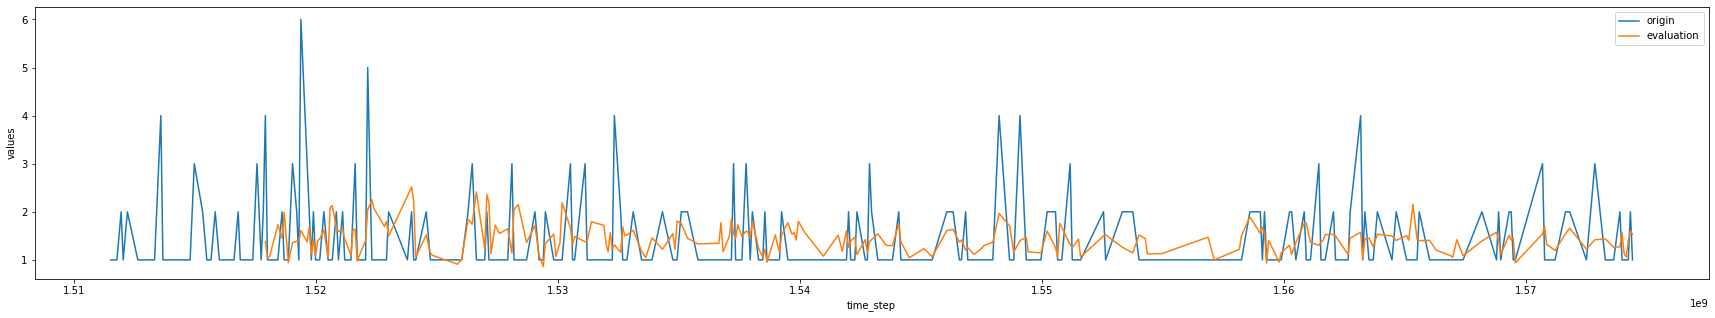

In [97]:
tensorflowDataFrame = pd.read_csv('angular_google_tf_created.csv')
transorflowFunction(tensorflowDataFrame)


{'times': array([1.5119352e+09, 1.5121080e+09, 1.5127128e+09, 1.5131448e+09,
       1.5135768e+09, 1.5148728e+09, 1.5151320e+09, 1.5157368e+09,
       1.5160824e+09, 1.5164280e+09, 1.5166872e+09, 1.5169464e+09,
       1.5171192e+09, 1.5172056e+09, 1.5172920e+09, 1.5177240e+09,
       1.5178104e+09, 1.5179832e+09, 1.5180696e+09, 1.5185880e+09,
       1.5190200e+09, 1.5196248e+09, 1.5197976e+09, 1.5198840e+09,
       1.5199704e+09, 1.5203160e+09, 1.5204024e+09, 1.5204888e+09,
       1.5205752e+09, 1.5210900e+09, 1.5211764e+09, 1.5214356e+09,
       1.5215220e+09, 1.5216948e+09, 1.5217812e+09, 1.5221268e+09,
       1.5222132e+09, 1.5222996e+09, 1.5238548e+09, 1.5239412e+09,
       1.5246324e+09, 1.5248052e+09, 1.5250644e+09, 1.5644628e+09,
       1.5646356e+09, 1.5647220e+09, 1.5654996e+09, 1.5655860e+09,
       1.5658452e+09, 1.5659316e+09, 1.5668820e+09, 1.5669684e+09,
       1.5671412e+09, 1.5686964e+09, 1.5705108e+09, 1.5713748e+09,
       1.5718068e+09, 1.5729336e+09, 1.5737976e+09, 

INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Saeid\\AppData\\Local\\Temp\\tmpqcho7675', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000259AA46B348>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Saeid\\AppData\\Local\\Temp\\tmpqcho7675', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000259AA46B348>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Saeid\AppData\Local\Temp\tmpqcho7675\model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Saeid\AppData\Local\Temp\tmpqcho7675\model.ckpt.


INFO:tensorflow:loss = 1.6229335, step = 1


INFO:tensorflow:loss = 1.6229335, step = 1


INFO:tensorflow:global_step/sec: 62.3051


INFO:tensorflow:global_step/sec: 62.3051


INFO:tensorflow:loss = 0.79208356, step = 101 (1.606 sec)


INFO:tensorflow:loss = 0.79208356, step = 101 (1.606 sec)


INFO:tensorflow:global_step/sec: 50.5618


INFO:tensorflow:global_step/sec: 50.5618


INFO:tensorflow:loss = 0.5568843, step = 201 (1.979 sec)


INFO:tensorflow:loss = 0.5568843, step = 201 (1.979 sec)


INFO:tensorflow:global_step/sec: 50.948


INFO:tensorflow:global_step/sec: 50.948


INFO:tensorflow:loss = 0.37361008, step = 301 (1.963 sec)


INFO:tensorflow:loss = 0.37361008, step = 301 (1.963 sec)


INFO:tensorflow:global_step/sec: 49.8316


INFO:tensorflow:global_step/sec: 49.8316


INFO:tensorflow:loss = 0.39758736, step = 401 (2.007 sec)


INFO:tensorflow:loss = 0.39758736, step = 401 (2.007 sec)


INFO:tensorflow:global_step/sec: 59.8457


INFO:tensorflow:global_step/sec: 59.8457


INFO:tensorflow:loss = 0.13074996, step = 501 (1.671 sec)


INFO:tensorflow:loss = 0.13074996, step = 501 (1.671 sec)


INFO:tensorflow:global_step/sec: 62.8924


INFO:tensorflow:global_step/sec: 62.8924


INFO:tensorflow:loss = 0.060452722, step = 601 (1.589 sec)


INFO:tensorflow:loss = 0.060452722, step = 601 (1.589 sec)


INFO:tensorflow:global_step/sec: 61.1625


INFO:tensorflow:global_step/sec: 61.1625


INFO:tensorflow:loss = 0.04534297, step = 701 (1.636 sec)


INFO:tensorflow:loss = 0.04534297, step = 701 (1.636 sec)


INFO:tensorflow:global_step/sec: 58.6529


INFO:tensorflow:global_step/sec: 58.6529


INFO:tensorflow:loss = -0.09020295, step = 801 (1.705 sec)


INFO:tensorflow:loss = -0.09020295, step = 801 (1.705 sec)


INFO:tensorflow:global_step/sec: 59.1033


INFO:tensorflow:global_step/sec: 59.1033


INFO:tensorflow:loss = -0.10144081, step = 901 (1.695 sec)


INFO:tensorflow:loss = -0.10144081, step = 901 (1.695 sec)


INFO:tensorflow:global_step/sec: 52.2789


INFO:tensorflow:global_step/sec: 52.2789


INFO:tensorflow:loss = -0.071748346, step = 1001 (1.910 sec)


INFO:tensorflow:loss = -0.071748346, step = 1001 (1.910 sec)


INFO:tensorflow:global_step/sec: 52.5535


INFO:tensorflow:global_step/sec: 52.5535


INFO:tensorflow:loss = -0.14055812, step = 1101 (1.908 sec)


INFO:tensorflow:loss = -0.14055812, step = 1101 (1.908 sec)


INFO:tensorflow:global_step/sec: 46.7361


INFO:tensorflow:global_step/sec: 46.7361


INFO:tensorflow:loss = -0.15885814, step = 1201 (2.135 sec)


INFO:tensorflow:loss = -0.15885814, step = 1201 (2.135 sec)


INFO:tensorflow:global_step/sec: 37.5608


INFO:tensorflow:global_step/sec: 37.5608


INFO:tensorflow:loss = -0.3778108, step = 1301 (2.662 sec)


INFO:tensorflow:loss = -0.3778108, step = 1301 (2.662 sec)


INFO:tensorflow:global_step/sec: 36.8145


INFO:tensorflow:global_step/sec: 36.8145


INFO:tensorflow:loss = -0.16624404, step = 1401 (2.717 sec)


INFO:tensorflow:loss = -0.16624404, step = 1401 (2.717 sec)


INFO:tensorflow:global_step/sec: 35.4201


INFO:tensorflow:global_step/sec: 35.4201


INFO:tensorflow:loss = -0.5043358, step = 1501 (2.822 sec)


INFO:tensorflow:loss = -0.5043358, step = 1501 (2.822 sec)


INFO:tensorflow:global_step/sec: 44.334


INFO:tensorflow:global_step/sec: 44.334


INFO:tensorflow:loss = -0.51926327, step = 1601 (2.256 sec)


INFO:tensorflow:loss = -0.51926327, step = 1601 (2.256 sec)


INFO:tensorflow:global_step/sec: 53.595


INFO:tensorflow:global_step/sec: 53.595


INFO:tensorflow:loss = -0.4636729, step = 1701 (1.866 sec)


INFO:tensorflow:loss = -0.4636729, step = 1701 (1.866 sec)


INFO:tensorflow:global_step/sec: 53.4519


INFO:tensorflow:global_step/sec: 53.4519


INFO:tensorflow:loss = -0.4043263, step = 1801 (1.872 sec)


INFO:tensorflow:loss = -0.4043263, step = 1801 (1.872 sec)


INFO:tensorflow:global_step/sec: 51.8186


INFO:tensorflow:global_step/sec: 51.8186


INFO:tensorflow:loss = -0.50163627, step = 1901 (1.939 sec)


INFO:tensorflow:loss = -0.50163627, step = 1901 (1.939 sec)


INFO:tensorflow:global_step/sec: 52.6364


INFO:tensorflow:global_step/sec: 52.6364


INFO:tensorflow:loss = -0.51535493, step = 2001 (1.889 sec)


INFO:tensorflow:loss = -0.51535493, step = 2001 (1.889 sec)


INFO:tensorflow:global_step/sec: 50.974


INFO:tensorflow:global_step/sec: 50.974


INFO:tensorflow:loss = -0.6306567, step = 2101 (1.963 sec)


INFO:tensorflow:loss = -0.6306567, step = 2101 (1.963 sec)


INFO:tensorflow:global_step/sec: 51.2349


INFO:tensorflow:global_step/sec: 51.2349


INFO:tensorflow:loss = -0.12132261, step = 2201 (1.952 sec)


INFO:tensorflow:loss = -0.12132261, step = 2201 (1.952 sec)


INFO:tensorflow:global_step/sec: 53.0831


INFO:tensorflow:global_step/sec: 53.0831


INFO:tensorflow:loss = -0.58490914, step = 2301 (1.884 sec)


INFO:tensorflow:loss = -0.58490914, step = 2301 (1.884 sec)


INFO:tensorflow:global_step/sec: 52.6088


INFO:tensorflow:global_step/sec: 52.6088


INFO:tensorflow:loss = -0.71243894, step = 2401 (1.902 sec)


INFO:tensorflow:loss = -0.71243894, step = 2401 (1.902 sec)


INFO:tensorflow:global_step/sec: 52.5811


INFO:tensorflow:global_step/sec: 52.5811


INFO:tensorflow:loss = -0.52622086, step = 2501 (1.900 sec)


INFO:tensorflow:loss = -0.52622086, step = 2501 (1.900 sec)


INFO:tensorflow:global_step/sec: 51.0519


INFO:tensorflow:global_step/sec: 51.0519


INFO:tensorflow:loss = -0.60475224, step = 2601 (1.961 sec)


INFO:tensorflow:loss = -0.60475224, step = 2601 (1.961 sec)


INFO:tensorflow:global_step/sec: 50.6387


INFO:tensorflow:global_step/sec: 50.6387


INFO:tensorflow:loss = -0.78353226, step = 2701 (1.976 sec)


INFO:tensorflow:loss = -0.78353226, step = 2701 (1.976 sec)


INFO:tensorflow:global_step/sec: 52.3884


INFO:tensorflow:global_step/sec: 52.3884


INFO:tensorflow:loss = -0.23112747, step = 2801 (1.908 sec)


INFO:tensorflow:loss = -0.23112747, step = 2801 (1.908 sec)


INFO:tensorflow:global_step/sec: 53.3664


INFO:tensorflow:global_step/sec: 53.3664


INFO:tensorflow:loss = -0.6731728, step = 2901 (1.873 sec)


INFO:tensorflow:loss = -0.6731728, step = 2901 (1.873 sec)


INFO:tensorflow:global_step/sec: 57.5399


INFO:tensorflow:global_step/sec: 57.5399


INFO:tensorflow:loss = -0.73440903, step = 3001 (1.738 sec)


INFO:tensorflow:loss = -0.73440903, step = 3001 (1.738 sec)


INFO:tensorflow:global_step/sec: 62.0346


INFO:tensorflow:global_step/sec: 62.0346


INFO:tensorflow:loss = -0.58918744, step = 3101 (1.612 sec)


INFO:tensorflow:loss = -0.58918744, step = 3101 (1.612 sec)


INFO:tensorflow:global_step/sec: 57.7058


INFO:tensorflow:global_step/sec: 57.7058


INFO:tensorflow:loss = -0.80017304, step = 3201 (1.734 sec)


INFO:tensorflow:loss = -0.80017304, step = 3201 (1.734 sec)


INFO:tensorflow:global_step/sec: 59.5252


INFO:tensorflow:global_step/sec: 59.5252


INFO:tensorflow:loss = -0.40881488, step = 3301 (1.678 sec)


INFO:tensorflow:loss = -0.40881488, step = 3301 (1.678 sec)


INFO:tensorflow:global_step/sec: 59.1033


INFO:tensorflow:global_step/sec: 59.1033


INFO:tensorflow:loss = -0.2526031, step = 3401 (1.692 sec)


INFO:tensorflow:loss = -0.2526031, step = 3401 (1.692 sec)


INFO:tensorflow:global_step/sec: 59.1382


INFO:tensorflow:global_step/sec: 59.1382


INFO:tensorflow:loss = -0.7095732, step = 3501 (1.691 sec)


INFO:tensorflow:loss = -0.7095732, step = 3501 (1.691 sec)


INFO:tensorflow:global_step/sec: 56.7244


INFO:tensorflow:global_step/sec: 56.7244


INFO:tensorflow:loss = -0.6119033, step = 3601 (1.764 sec)


INFO:tensorflow:loss = -0.6119033, step = 3601 (1.764 sec)


INFO:tensorflow:global_step/sec: 58.4816


INFO:tensorflow:global_step/sec: 58.4816


INFO:tensorflow:loss = -0.83124036, step = 3701 (1.709 sec)


INFO:tensorflow:loss = -0.83124036, step = 3701 (1.709 sec)


INFO:tensorflow:global_step/sec: 58.7562


INFO:tensorflow:global_step/sec: 58.7562


INFO:tensorflow:loss = -0.8405308, step = 3801 (1.703 sec)


INFO:tensorflow:loss = -0.8405308, step = 3801 (1.703 sec)


INFO:tensorflow:global_step/sec: 61.8047


INFO:tensorflow:global_step/sec: 61.8047


INFO:tensorflow:loss = -0.42910412, step = 3901 (1.618 sec)


INFO:tensorflow:loss = -0.42910412, step = 3901 (1.618 sec)


INFO:tensorflow:global_step/sec: 61.9578


INFO:tensorflow:global_step/sec: 61.9578


INFO:tensorflow:loss = -0.8675895, step = 4001 (1.614 sec)


INFO:tensorflow:loss = -0.8675895, step = 4001 (1.614 sec)


INFO:tensorflow:global_step/sec: 60.1333


INFO:tensorflow:global_step/sec: 60.1333


INFO:tensorflow:loss = -0.7250961, step = 4101 (1.663 sec)


INFO:tensorflow:loss = -0.7250961, step = 4101 (1.663 sec)


INFO:tensorflow:global_step/sec: 60.9761


INFO:tensorflow:global_step/sec: 60.9761


INFO:tensorflow:loss = -0.6884053, step = 4201 (1.640 sec)


INFO:tensorflow:loss = -0.6884053, step = 4201 (1.640 sec)


INFO:tensorflow:global_step/sec: 60.0612


INFO:tensorflow:global_step/sec: 60.0612


INFO:tensorflow:loss = -0.8648006, step = 4301 (1.664 sec)


INFO:tensorflow:loss = -0.8648006, step = 4301 (1.664 sec)


INFO:tensorflow:global_step/sec: 61.8429


INFO:tensorflow:global_step/sec: 61.8429


INFO:tensorflow:loss = -0.32854632, step = 4401 (1.617 sec)


INFO:tensorflow:loss = -0.32854632, step = 4401 (1.617 sec)


INFO:tensorflow:global_step/sec: 61.3876


INFO:tensorflow:global_step/sec: 61.3876


INFO:tensorflow:loss = -0.8797152, step = 4501 (1.630 sec)


INFO:tensorflow:loss = -0.8797152, step = 4501 (1.630 sec)


INFO:tensorflow:global_step/sec: 56.4684


INFO:tensorflow:global_step/sec: 56.4684


INFO:tensorflow:loss = -0.7308848, step = 4601 (1.776 sec)


INFO:tensorflow:loss = -0.7308848, step = 4601 (1.776 sec)


INFO:tensorflow:global_step/sec: 62.6954


INFO:tensorflow:global_step/sec: 62.6954


INFO:tensorflow:loss = 0.5312533, step = 4701 (1.589 sec)


INFO:tensorflow:loss = 0.5312533, step = 4701 (1.589 sec)


INFO:tensorflow:global_step/sec: 61.0133


INFO:tensorflow:global_step/sec: 61.0133


INFO:tensorflow:loss = -0.40442115, step = 4801 (1.640 sec)


INFO:tensorflow:loss = -0.40442115, step = 4801 (1.640 sec)


INFO:tensorflow:global_step/sec: 62.8135


INFO:tensorflow:global_step/sec: 62.8135


INFO:tensorflow:loss = -0.88898975, step = 4901 (1.591 sec)


INFO:tensorflow:loss = -0.88898975, step = 4901 (1.591 sec)


INFO:tensorflow:global_step/sec: 62.2662


INFO:tensorflow:global_step/sec: 62.2662


INFO:tensorflow:loss = -0.746372, step = 5001 (1.613 sec)


INFO:tensorflow:loss = -0.746372, step = 5001 (1.613 sec)


INFO:tensorflow:global_step/sec: 60.8649


INFO:tensorflow:global_step/sec: 60.8649


INFO:tensorflow:loss = -0.8309829, step = 5101 (1.637 sec)


INFO:tensorflow:loss = -0.8309829, step = 5101 (1.637 sec)


INFO:tensorflow:global_step/sec: 62.6169


INFO:tensorflow:global_step/sec: 62.6169


INFO:tensorflow:loss = -0.80985177, step = 5201 (1.597 sec)


INFO:tensorflow:loss = -0.80985177, step = 5201 (1.597 sec)


INFO:tensorflow:global_step/sec: 61.5009


INFO:tensorflow:global_step/sec: 61.5009


INFO:tensorflow:loss = -0.9937371, step = 5301 (1.626 sec)


INFO:tensorflow:loss = -0.9937371, step = 5301 (1.626 sec)


INFO:tensorflow:global_step/sec: 61.5376


INFO:tensorflow:global_step/sec: 61.5376


INFO:tensorflow:loss = -0.6007543, step = 5401 (1.625 sec)


INFO:tensorflow:loss = -0.6007543, step = 5401 (1.625 sec)


INFO:tensorflow:global_step/sec: 61.5019


INFO:tensorflow:global_step/sec: 61.5019


INFO:tensorflow:loss = -0.94266003, step = 5501 (1.625 sec)


INFO:tensorflow:loss = -0.94266003, step = 5501 (1.625 sec)


INFO:tensorflow:global_step/sec: 61.5009


INFO:tensorflow:global_step/sec: 61.5009


INFO:tensorflow:loss = -0.92372864, step = 5601 (1.626 sec)


INFO:tensorflow:loss = -0.92372864, step = 5601 (1.626 sec)


INFO:tensorflow:global_step/sec: 62.6954


INFO:tensorflow:global_step/sec: 62.6954


INFO:tensorflow:loss = -1.0117016, step = 5701 (1.596 sec)


INFO:tensorflow:loss = -1.0117016, step = 5701 (1.596 sec)


INFO:tensorflow:global_step/sec: 62.2662


INFO:tensorflow:global_step/sec: 62.2662


INFO:tensorflow:loss = -0.96970546, step = 5801 (1.606 sec)


INFO:tensorflow:loss = -0.96970546, step = 5801 (1.606 sec)


INFO:tensorflow:global_step/sec: 62.1889


INFO:tensorflow:global_step/sec: 62.1889


INFO:tensorflow:loss = -0.825425, step = 5901 (1.608 sec)


INFO:tensorflow:loss = -0.825425, step = 5901 (1.608 sec)


INFO:tensorflow:Saving checkpoints for 6000 into C:\Users\Saeid\AppData\Local\Temp\tmpqcho7675\model.ckpt.


INFO:tensorflow:Saving checkpoints for 6000 into C:\Users\Saeid\AppData\Local\Temp\tmpqcho7675\model.ckpt.


INFO:tensorflow:Loss for final step: -0.96581024.


INFO:tensorflow:Loss for final step: -0.96581024.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2019-11-24T00:51:06Z


INFO:tensorflow:Starting evaluation at 2019-11-24T00:51:06Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmpqcho7675\model.ckpt-6000


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmpqcho7675\model.ckpt-6000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Evaluation [100/1000]


INFO:tensorflow:Evaluation [100/1000]


INFO:tensorflow:Evaluation [200/1000]


INFO:tensorflow:Evaluation [200/1000]


INFO:tensorflow:Evaluation [300/1000]


INFO:tensorflow:Evaluation [300/1000]


INFO:tensorflow:Evaluation [400/1000]


INFO:tensorflow:Evaluation [400/1000]


INFO:tensorflow:Evaluation [500/1000]


INFO:tensorflow:Evaluation [500/1000]


INFO:tensorflow:Evaluation [600/1000]


INFO:tensorflow:Evaluation [600/1000]


INFO:tensorflow:Evaluation [700/1000]


INFO:tensorflow:Evaluation [700/1000]


INFO:tensorflow:Evaluation [800/1000]


INFO:tensorflow:Evaluation [800/1000]


INFO:tensorflow:Evaluation [900/1000]


INFO:tensorflow:Evaluation [900/1000]


INFO:tensorflow:Evaluation [1000/1000]


INFO:tensorflow:Evaluation [1000/1000]


INFO:tensorflow:Finished evaluation at 2019-11-24-00:51:08


INFO:tensorflow:Finished evaluation at 2019-11-24-00:51:08


INFO:tensorflow:Saving dict for global step 6000: average_loss = -1.0990103, covariance = [[[8.1945473e-05]
  [5.4113185e-05]
  [5.9116795e-05]
  [6.8165500e-05]
  [9.4530551e-05]
  [6.7174326e-05]
  [6.6334949e-05]
  [6.3760614e-05]
  [6.1664090e-05]
  [7.0124639e-05]
  [5.5383291e-05]
  [4.8332895e-05]
  [4.3462347e-05]
  [5.2733427e-05]
  [7.4053030e-05]
  [4.9137772e-05]
  [4.2597447e-05]
  [6.1200088e-05]
  [5.6617566e-05]
  [4.5590346e-05]
  [4.8677888e-05]
  [7.3044481e-05]
  [5.4676701e-05]
  [1.0759374e-04]
  [1.0351161e-04]
  [1.1516716e-04]
  [9.2865157e-05]
  [9.1458896e-05]
  [9.2267954e-05]
  [9.2886854e-05]]], global_step = 6000, loss = -1.0990103, mean = [[[1.001281  ]
  [1.0016859 ]
  [0.9998051 ]
  [2.0000014 ]
  [1.0039918 ]
  [0.99999875]
  [1.0000004 ]
  [0.99999315]
  [0.99999714]
  [1.0000031 ]
  [1.002039  ]
  [1.0005726 ]
  [0.99989176]
  [3.0000236 ]
  [1.0020661 ]
  [0.9999995 ]
  [1.0000002 ]
  [0.9999948 ]
  [0.9999996 ]
  [1.0000075 ]
  [0.9991744 ]
  [1.0

INFO:tensorflow:Saving dict for global step 6000: average_loss = -1.0990103, covariance = [[[8.1945473e-05]
  [5.4113185e-05]
  [5.9116795e-05]
  [6.8165500e-05]
  [9.4530551e-05]
  [6.7174326e-05]
  [6.6334949e-05]
  [6.3760614e-05]
  [6.1664090e-05]
  [7.0124639e-05]
  [5.5383291e-05]
  [4.8332895e-05]
  [4.3462347e-05]
  [5.2733427e-05]
  [7.4053030e-05]
  [4.9137772e-05]
  [4.2597447e-05]
  [6.1200088e-05]
  [5.6617566e-05]
  [4.5590346e-05]
  [4.8677888e-05]
  [7.3044481e-05]
  [5.4676701e-05]
  [1.0759374e-04]
  [1.0351161e-04]
  [1.1516716e-04]
  [9.2865157e-05]
  [9.1458896e-05]
  [9.2267954e-05]
  [9.2886854e-05]]], global_step = 6000, loss = -1.0990103, mean = [[[1.001281  ]
  [1.0016859 ]
  [0.9998051 ]
  [2.0000014 ]
  [1.0039918 ]
  [0.99999875]
  [1.0000004 ]
  [0.99999315]
  [0.99999714]
  [1.0000031 ]
  [1.002039  ]
  [1.0005726 ]
  [0.99989176]
  [3.0000236 ]
  [1.0020661 ]
  [0.9999995 ]
  [1.0000002 ]
  [0.9999948 ]
  [0.9999996 ]
  [1.0000075 ]
  [0.9991744 ]
  [1.0

INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6000: C:\Users\Saeid\AppData\Local\Temp\tmpqcho7675\model.ckpt-6000


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6000: C:\Users\Saeid\AppData\Local\Temp\tmpqcho7675\model.ckpt-6000


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmpqcho7675\model.ckpt-6000


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmpqcho7675\model.ckpt-6000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


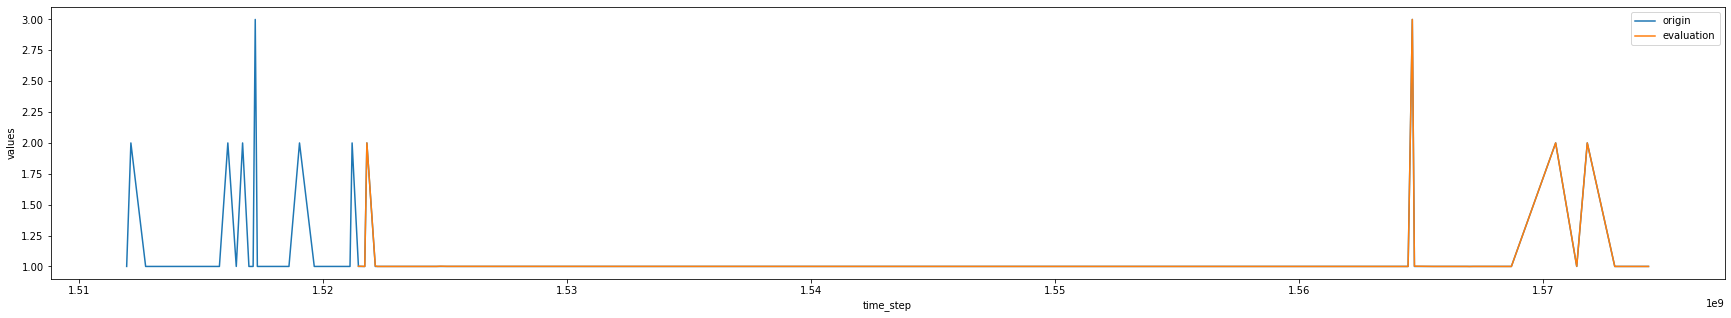

In [98]:
tensorflowDataFrame = pd.read_csv('d3_tf_created.csv')
transorflowFunction(tensorflowDataFrame)


           ds     y
0  2018-02-24  1329
1  2018-05-10  1398
2  2018-05-29  1413
3  2019-06-03  1648
4  2019-07-18  1691
5  2019-09-07  1719
6  2019-09-17  1725
{'times': array([1.5194520e+09, 1.5259284e+09, 1.5275700e+09, 1.5595380e+09,
       1.5634260e+09, 1.5678324e+09, 1.5686964e+09]), 'values': array([1329, 1398, 1413, 1648, 1691, 1719, 1725])}
INFO:tensorflow:Using default config.


INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Saeid\\AppData\\Local\\Temp\\tmpyyo7iey1', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000259AF8D49C8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Saeid\\AppData\\Local\\Temp\\tmpyyo7iey1', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000259AF8D49C8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Saeid\AppData\Local\Temp\tmpyyo7iey1\model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Saeid\AppData\Local\Temp\tmpyyo7iey1\model.ckpt.


INFO:tensorflow:loss = 1.9903612, step = 1


INFO:tensorflow:loss = 1.9903612, step = 1


INFO:tensorflow:global_step/sec: 293.437


INFO:tensorflow:global_step/sec: 293.437


INFO:tensorflow:loss = -0.33424738, step = 101 (0.348 sec)


INFO:tensorflow:loss = -0.33424738, step = 101 (0.348 sec)


INFO:tensorflow:global_step/sec: 495.346


INFO:tensorflow:global_step/sec: 495.346


INFO:tensorflow:loss = -0.44584936, step = 201 (0.202 sec)


INFO:tensorflow:loss = -0.44584936, step = 201 (0.202 sec)


INFO:tensorflow:global_step/sec: 474.234


INFO:tensorflow:global_step/sec: 474.234


INFO:tensorflow:loss = -0.6130304, step = 301 (0.209 sec)


INFO:tensorflow:loss = -0.6130304, step = 301 (0.209 sec)


INFO:tensorflow:global_step/sec: 490.5


INFO:tensorflow:global_step/sec: 490.5


INFO:tensorflow:loss = -0.7251039, step = 401 (0.203 sec)


INFO:tensorflow:loss = -0.7251039, step = 401 (0.203 sec)


INFO:tensorflow:global_step/sec: 427.614


INFO:tensorflow:global_step/sec: 427.614


INFO:tensorflow:loss = 0.11928583, step = 501 (0.234 sec)


INFO:tensorflow:loss = 0.11928583, step = 501 (0.234 sec)


INFO:tensorflow:global_step/sec: 333.539


INFO:tensorflow:global_step/sec: 333.539


INFO:tensorflow:loss = -0.69944566, step = 601 (0.303 sec)


INFO:tensorflow:loss = -0.69944566, step = 601 (0.303 sec)


INFO:tensorflow:global_step/sec: 366.528


INFO:tensorflow:global_step/sec: 366.528


INFO:tensorflow:loss = -0.73888946, step = 701 (0.271 sec)


INFO:tensorflow:loss = -0.73888946, step = 701 (0.271 sec)


INFO:tensorflow:global_step/sec: 323.824


INFO:tensorflow:global_step/sec: 323.824


INFO:tensorflow:loss = -0.86559546, step = 801 (0.310 sec)


INFO:tensorflow:loss = -0.86559546, step = 801 (0.310 sec)


INFO:tensorflow:global_step/sec: 389.347


INFO:tensorflow:global_step/sec: 389.347


INFO:tensorflow:loss = -0.936172, step = 901 (0.256 sec)


INFO:tensorflow:loss = -0.936172, step = 901 (0.256 sec)


INFO:tensorflow:global_step/sec: 338.046


INFO:tensorflow:global_step/sec: 338.046


INFO:tensorflow:loss = -0.93847764, step = 1001 (0.295 sec)


INFO:tensorflow:loss = -0.93847764, step = 1001 (0.295 sec)


INFO:tensorflow:global_step/sec: 348.647


INFO:tensorflow:global_step/sec: 348.647


INFO:tensorflow:loss = -0.9458332, step = 1101 (0.294 sec)


INFO:tensorflow:loss = -0.9458332, step = 1101 (0.294 sec)


INFO:tensorflow:global_step/sec: 349.868


INFO:tensorflow:global_step/sec: 349.868


INFO:tensorflow:loss = -0.95578957, step = 1201 (0.278 sec)


INFO:tensorflow:loss = -0.95578957, step = 1201 (0.278 sec)


INFO:tensorflow:global_step/sec: 376.171


INFO:tensorflow:global_step/sec: 376.171


INFO:tensorflow:loss = -0.96911776, step = 1301 (0.268 sec)


INFO:tensorflow:loss = -0.96911776, step = 1301 (0.268 sec)


INFO:tensorflow:global_step/sec: 358.645


INFO:tensorflow:global_step/sec: 358.645


INFO:tensorflow:loss = -0.9636498, step = 1401 (0.280 sec)


INFO:tensorflow:loss = -0.9636498, step = 1401 (0.280 sec)


INFO:tensorflow:global_step/sec: 347.435


INFO:tensorflow:global_step/sec: 347.435


INFO:tensorflow:loss = -0.07834673, step = 1501 (0.285 sec)


INFO:tensorflow:loss = -0.07834673, step = 1501 (0.285 sec)


INFO:tensorflow:global_step/sec: 365.191


INFO:tensorflow:global_step/sec: 365.191


INFO:tensorflow:loss = -1.0890447, step = 1601 (0.275 sec)


INFO:tensorflow:loss = -1.0890447, step = 1601 (0.275 sec)


INFO:tensorflow:global_step/sec: 330.236


INFO:tensorflow:global_step/sec: 330.236


INFO:tensorflow:loss = -1.0768352, step = 1701 (0.303 sec)


INFO:tensorflow:loss = -1.0768352, step = 1701 (0.303 sec)


INFO:tensorflow:global_step/sec: 400.248


INFO:tensorflow:global_step/sec: 400.248


INFO:tensorflow:loss = -1.0761542, step = 1801 (0.252 sec)


INFO:tensorflow:loss = -1.0761542, step = 1801 (0.252 sec)


INFO:tensorflow:global_step/sec: 336.91


INFO:tensorflow:global_step/sec: 336.91


INFO:tensorflow:loss = -1.0783587, step = 1901 (0.297 sec)


INFO:tensorflow:loss = -1.0783587, step = 1901 (0.297 sec)


INFO:tensorflow:global_step/sec: 362.542


INFO:tensorflow:global_step/sec: 362.542


INFO:tensorflow:loss = -1.0672536, step = 2001 (0.274 sec)


INFO:tensorflow:loss = -1.0672536, step = 2001 (0.274 sec)


INFO:tensorflow:global_step/sec: 362.545


INFO:tensorflow:global_step/sec: 362.545


INFO:tensorflow:loss = -1.1695355, step = 2101 (0.281 sec)


INFO:tensorflow:loss = -1.1695355, step = 2101 (0.281 sec)


INFO:tensorflow:global_step/sec: 373.365


INFO:tensorflow:global_step/sec: 373.365


INFO:tensorflow:loss = -1.1500088, step = 2201 (0.264 sec)


INFO:tensorflow:loss = -1.1500088, step = 2201 (0.264 sec)


INFO:tensorflow:global_step/sec: 346.234


INFO:tensorflow:global_step/sec: 346.234


INFO:tensorflow:loss = -1.1420627, step = 2301 (0.289 sec)


INFO:tensorflow:loss = -1.1420627, step = 2301 (0.289 sec)


INFO:tensorflow:global_step/sec: 376.173


INFO:tensorflow:global_step/sec: 376.173


INFO:tensorflow:loss = -1.1087809, step = 2401 (0.266 sec)


INFO:tensorflow:loss = -1.1087809, step = 2401 (0.266 sec)


INFO:tensorflow:global_step/sec: 369.232


INFO:tensorflow:global_step/sec: 369.232


INFO:tensorflow:loss = -1.2007617, step = 2501 (0.271 sec)


INFO:tensorflow:loss = -1.2007617, step = 2501 (0.271 sec)


INFO:tensorflow:global_step/sec: 349.866


INFO:tensorflow:global_step/sec: 349.866


INFO:tensorflow:loss = -1.1846396, step = 2601 (0.285 sec)


INFO:tensorflow:loss = -1.1846396, step = 2601 (0.285 sec)


INFO:tensorflow:global_step/sec: 294.299


INFO:tensorflow:global_step/sec: 294.299


INFO:tensorflow:loss = -1.1695536, step = 2701 (0.344 sec)


INFO:tensorflow:loss = -1.1695536, step = 2701 (0.344 sec)


INFO:tensorflow:global_step/sec: 312.694


INFO:tensorflow:global_step/sec: 312.694


INFO:tensorflow:loss = 5.1475215, step = 2801 (0.321 sec)


INFO:tensorflow:loss = 5.1475215, step = 2801 (0.321 sec)


INFO:tensorflow:global_step/sec: 310.751


INFO:tensorflow:global_step/sec: 310.751


INFO:tensorflow:loss = -1.237077, step = 2901 (0.317 sec)


INFO:tensorflow:loss = -1.237077, step = 2901 (0.317 sec)


INFO:tensorflow:global_step/sec: 318.668


INFO:tensorflow:global_step/sec: 318.668


INFO:tensorflow:loss = -1.2052472, step = 3001 (0.315 sec)


INFO:tensorflow:loss = -1.2052472, step = 3001 (0.315 sec)


INFO:tensorflow:global_step/sec: 317.655


INFO:tensorflow:global_step/sec: 317.655


INFO:tensorflow:loss = -1.1925179, step = 3101 (0.315 sec)


INFO:tensorflow:loss = -1.1925179, step = 3101 (0.315 sec)


INFO:tensorflow:global_step/sec: 328.072


INFO:tensorflow:global_step/sec: 328.072


INFO:tensorflow:loss = -1.2746062, step = 3201 (0.304 sec)


INFO:tensorflow:loss = -1.2746062, step = 3201 (0.304 sec)


INFO:tensorflow:global_step/sec: 370.599


INFO:tensorflow:global_step/sec: 370.599


INFO:tensorflow:loss = -1.2564389, step = 3301 (0.270 sec)


INFO:tensorflow:loss = -1.2564389, step = 3301 (0.270 sec)


INFO:tensorflow:global_step/sec: 290.035


INFO:tensorflow:global_step/sec: 290.035


INFO:tensorflow:loss = -1.2278035, step = 3401 (0.349 sec)


INFO:tensorflow:loss = -1.2278035, step = 3401 (0.349 sec)


INFO:tensorflow:global_step/sec: 313.673


INFO:tensorflow:global_step/sec: 313.673


INFO:tensorflow:loss = -1.2686925, step = 3501 (0.315 sec)


INFO:tensorflow:loss = -1.2686925, step = 3501 (0.315 sec)


INFO:tensorflow:global_step/sec: 386.34


INFO:tensorflow:global_step/sec: 386.34


INFO:tensorflow:loss = -1.2874306, step = 3601 (0.259 sec)


INFO:tensorflow:loss = -1.2874306, step = 3601 (0.259 sec)


INFO:tensorflow:global_step/sec: 329.15


INFO:tensorflow:global_step/sec: 329.15


INFO:tensorflow:loss = -1.2470908, step = 3701 (0.308 sec)


INFO:tensorflow:loss = -1.2470908, step = 3701 (0.308 sec)


INFO:tensorflow:global_step/sec: 373.365


INFO:tensorflow:global_step/sec: 373.365


INFO:tensorflow:loss = -1.3189868, step = 3801 (0.263 sec)


INFO:tensorflow:loss = -1.3189868, step = 3801 (0.263 sec)


INFO:tensorflow:global_step/sec: 312.694


INFO:tensorflow:global_step/sec: 312.694


INFO:tensorflow:loss = -1.301134, step = 3901 (0.321 sec)


INFO:tensorflow:loss = -1.301134, step = 3901 (0.321 sec)


INFO:tensorflow:global_step/sec: 390.867


INFO:tensorflow:global_step/sec: 390.867


INFO:tensorflow:loss = -1.2789286, step = 4001 (0.257 sec)


INFO:tensorflow:loss = -1.2789286, step = 4001 (0.257 sec)


INFO:tensorflow:global_step/sec: 308.833


INFO:tensorflow:global_step/sec: 308.833


INFO:tensorflow:loss = -1.3379014, step = 4101 (0.323 sec)


INFO:tensorflow:loss = -1.3379014, step = 4101 (0.323 sec)


INFO:tensorflow:global_step/sec: 349.867


INFO:tensorflow:global_step/sec: 349.867


INFO:tensorflow:loss = -1.3209647, step = 4201 (0.286 sec)


INFO:tensorflow:loss = -1.3209647, step = 4201 (0.286 sec)


INFO:tensorflow:global_step/sec: 332.431


INFO:tensorflow:global_step/sec: 332.431


INFO:tensorflow:loss = -1.3119817, step = 4301 (0.301 sec)


INFO:tensorflow:loss = -1.3119817, step = 4301 (0.301 sec)


INFO:tensorflow:global_step/sec: 374.763


INFO:tensorflow:global_step/sec: 374.763


INFO:tensorflow:loss = -1.2959069, step = 4401 (0.267 sec)


INFO:tensorflow:loss = -1.2959069, step = 4401 (0.267 sec)


INFO:tensorflow:global_step/sec: 393.945


INFO:tensorflow:global_step/sec: 393.945


INFO:tensorflow:loss = -1.3629178, step = 4501 (0.255 sec)


INFO:tensorflow:loss = -1.3629178, step = 4501 (0.255 sec)


INFO:tensorflow:global_step/sec: 381.916


INFO:tensorflow:global_step/sec: 381.916


INFO:tensorflow:loss = -1.3370494, step = 4601 (0.260 sec)


INFO:tensorflow:loss = -1.3370494, step = 4601 (0.260 sec)


INFO:tensorflow:global_step/sec: 336.908


INFO:tensorflow:global_step/sec: 336.908


INFO:tensorflow:loss = -1.3159881, step = 4701 (0.298 sec)


INFO:tensorflow:loss = -1.3159881, step = 4701 (0.298 sec)


INFO:tensorflow:global_step/sec: 353.576


INFO:tensorflow:global_step/sec: 353.576


INFO:tensorflow:loss = -1.3800752, step = 4801 (0.284 sec)


INFO:tensorflow:loss = -1.3800752, step = 4801 (0.284 sec)


INFO:tensorflow:global_step/sec: 405.107


INFO:tensorflow:global_step/sec: 405.107


INFO:tensorflow:loss = -1.354803, step = 4901 (0.247 sec)


INFO:tensorflow:loss = -1.354803, step = 4901 (0.247 sec)


INFO:tensorflow:global_step/sec: 354.83


INFO:tensorflow:global_step/sec: 354.83


INFO:tensorflow:loss = -1.3251116, step = 5001 (0.281 sec)


INFO:tensorflow:loss = -1.3251116, step = 5001 (0.281 sec)


INFO:tensorflow:global_step/sec: 387.836


INFO:tensorflow:global_step/sec: 387.836


INFO:tensorflow:loss = -1.3871001, step = 5101 (0.259 sec)


INFO:tensorflow:loss = -1.3871001, step = 5101 (0.259 sec)


INFO:tensorflow:global_step/sec: 354.829


INFO:tensorflow:global_step/sec: 354.829


INFO:tensorflow:loss = -1.3671774, step = 5201 (0.282 sec)


INFO:tensorflow:loss = -1.3671774, step = 5201 (0.282 sec)


INFO:tensorflow:global_step/sec: 446.705


INFO:tensorflow:global_step/sec: 446.705


INFO:tensorflow:loss = -1.2634276, step = 5301 (0.229 sec)


INFO:tensorflow:loss = -1.2634276, step = 5301 (0.229 sec)


INFO:tensorflow:global_step/sec: 362.543


INFO:tensorflow:global_step/sec: 362.543


INFO:tensorflow:loss = -1.3969754, step = 5401 (0.272 sec)


INFO:tensorflow:loss = -1.3969754, step = 5401 (0.272 sec)


INFO:tensorflow:global_step/sec: 362.543


INFO:tensorflow:global_step/sec: 362.543


INFO:tensorflow:loss = -1.3637292, step = 5501 (0.273 sec)


INFO:tensorflow:loss = -1.3637292, step = 5501 (0.273 sec)


INFO:tensorflow:global_step/sec: 340.346


INFO:tensorflow:global_step/sec: 340.346


INFO:tensorflow:loss = -1.4226859, step = 5601 (0.296 sec)


INFO:tensorflow:loss = -1.4226859, step = 5601 (0.296 sec)


INFO:tensorflow:global_step/sec: 361.233


INFO:tensorflow:global_step/sec: 361.233


INFO:tensorflow:loss = -1.3965061, step = 5701 (0.275 sec)


INFO:tensorflow:loss = -1.3965061, step = 5701 (0.275 sec)


INFO:tensorflow:global_step/sec: 389.348


INFO:tensorflow:global_step/sec: 389.348


INFO:tensorflow:loss = -1.374493, step = 5801 (0.259 sec)


INFO:tensorflow:loss = -1.374493, step = 5801 (0.259 sec)


INFO:tensorflow:global_step/sec: 371.977


INFO:tensorflow:global_step/sec: 371.977


INFO:tensorflow:loss = -1.4320142, step = 5901 (0.267 sec)


INFO:tensorflow:loss = -1.4320142, step = 5901 (0.267 sec)


INFO:tensorflow:Saving checkpoints for 6000 into C:\Users\Saeid\AppData\Local\Temp\tmpyyo7iey1\model.ckpt.


INFO:tensorflow:Saving checkpoints for 6000 into C:\Users\Saeid\AppData\Local\Temp\tmpyyo7iey1\model.ckpt.


INFO:tensorflow:Loss for final step: -1.4118661.


INFO:tensorflow:Loss for final step: -1.4118661.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2019-11-23T23:57:34Z


INFO:tensorflow:Starting evaluation at 2019-11-23T23:57:34Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmpyyo7iey1\model.ckpt-6000


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmpyyo7iey1\model.ckpt-6000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Evaluation [100/1000]


INFO:tensorflow:Evaluation [100/1000]


INFO:tensorflow:Evaluation [200/1000]


INFO:tensorflow:Evaluation [200/1000]


INFO:tensorflow:Evaluation [300/1000]


INFO:tensorflow:Evaluation [300/1000]


INFO:tensorflow:Evaluation [400/1000]


INFO:tensorflow:Evaluation [400/1000]


INFO:tensorflow:Evaluation [500/1000]


INFO:tensorflow:Evaluation [500/1000]


INFO:tensorflow:Evaluation [600/1000]


INFO:tensorflow:Evaluation [600/1000]


INFO:tensorflow:Evaluation [700/1000]


INFO:tensorflow:Evaluation [700/1000]


INFO:tensorflow:Evaluation [800/1000]


INFO:tensorflow:Evaluation [800/1000]


INFO:tensorflow:Evaluation [900/1000]


INFO:tensorflow:Evaluation [900/1000]


INFO:tensorflow:Evaluation [1000/1000]


INFO:tensorflow:Evaluation [1000/1000]


INFO:tensorflow:Finished evaluation at 2019-11-23-23:57:36


INFO:tensorflow:Finished evaluation at 2019-11-23-23:57:36


INFO:tensorflow:Saving dict for global step 6000: average_loss = -1.4124422, covariance = [[[2.304726]]], global_step = 6000, loss = -1.4124422, mean = [[[1724.9993]]], observed = [[[1725.]]], start_tuple = (array([[1525928400, 1527570000, 1559538000, 1563426000, 1567832400,
        1568696400]], dtype=int64), array([[[-1.0095139 ],
        [-0.91623783],
        [ 0.5450862 ],
        [ 0.8124774 ],
        [ 0.9865926 ],
        [ 1.023903  ]]], dtype=float32), array([], shape=(1, 6, 0), dtype=float32)), times = [[1568696400]]


INFO:tensorflow:Saving dict for global step 6000: average_loss = -1.4124422, covariance = [[[2.304726]]], global_step = 6000, loss = -1.4124422, mean = [[[1724.9993]]], observed = [[[1725.]]], start_tuple = (array([[1525928400, 1527570000, 1559538000, 1563426000, 1567832400,
        1568696400]], dtype=int64), array([[[-1.0095139 ],
        [-0.91623783],
        [ 0.5450862 ],
        [ 0.8124774 ],
        [ 0.9865926 ],
        [ 1.023903  ]]], dtype=float32), array([], shape=(1, 6, 0), dtype=float32)), times = [[1568696400]]


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6000: C:\Users\Saeid\AppData\Local\Temp\tmpyyo7iey1\model.ckpt-6000


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6000: C:\Users\Saeid\AppData\Local\Temp\tmpyyo7iey1\model.ckpt-6000


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmpyyo7iey1\model.ckpt-6000


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmpyyo7iey1\model.ckpt-6000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


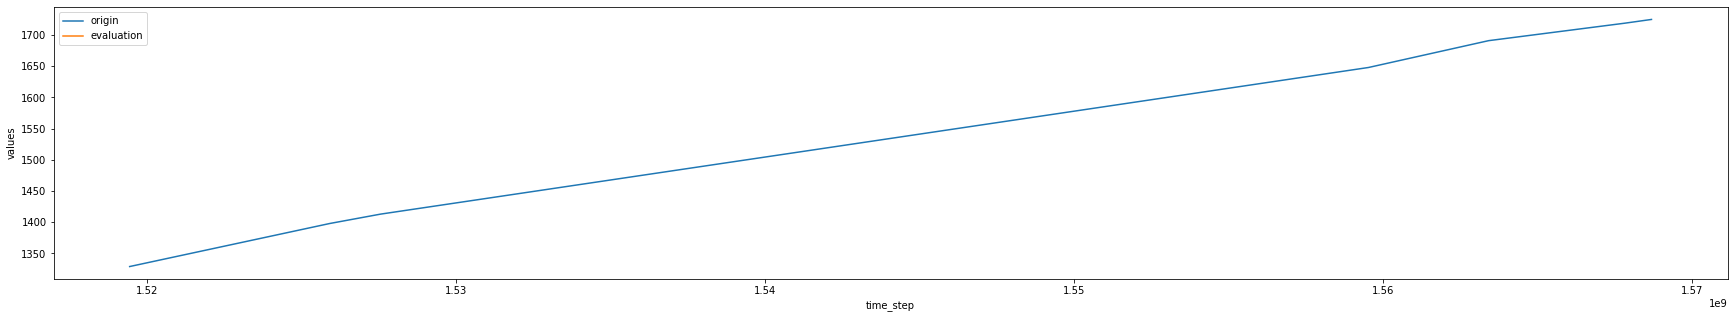

In [85]:
#8-6-plot the pull request for tesorflow for every repository
from github import Github
from pandas import read_csv
import tensorflow as tf
from tensorflow.contrib.timeseries.python.timeseries import  NumpyReader
from datetime import datetime
import time
import matplotlib.pyplot as plt


g = Github("d57d1988dd385e5b018cca5f5814c75e001c75de")
repo = g.get_repo("SebastianM/angular-google-maps")
repo.name
pulls = repo.get_pulls(state='open', sort='created', base='master')
number_pulls_list = []
created_at_pulls_list = []
for pr in pulls:
   created_at_pulls_list = created_at_pulls_list + [datetime.date(pd.to_datetime(pr.created_at))]
   number_pulls_list = number_pulls_list + [int(pr.number)]
number_pulls_list
#print((number_pulls_list[1]))
pulls_df = DataFrame()
pulls_df['created_at'] = created_at_pulls_list
pulls_df['number'] = number_pulls_list
pulls_df.columns = ['ds', 'y']
print(pulls_df)
pulls_df.to_csv('angular_googleMaps_pull.csv', sep=',', encoding='utf-8', index=False)


def predict_plot_pulls(file):
   
   df = pd.read_csv(file)
   df['ds'] = df['ds'].astype('datetime64[ns]')
   array = df.to_numpy()
   x = np.array([time.mktime(i[0].timetuple()) for i in array])
   y = np.array([i[1] for i in array])


   data = {
       tf.contrib.timeseries.TrainEvalFeatures.TIMES: x,
       tf.contrib.timeseries.TrainEvalFeatures.VALUES: y,
          }
   print (data)

   reader = NumpyReader(data)

   train_input_fn = tf.contrib.timeseries.RandomWindowInputFn(reader, batch_size = 7, window_size = 7)
   ar = tf.contrib.timeseries.ARRegressor(
        periodicities=200, input_window_size=6, output_window_size=1,
        num_features=1,
        loss=tf.contrib.timeseries.ARModel.NORMAL_LIKELIHOOD_LOSS)
   ar.train(input_fn=train_input_fn, steps=6000)
#evaluation
   evaluation_input_fn = tf.contrib.timeseries.WholeDatasetInputFn(reader)
   evaluation = ar.evaluate(input_fn=evaluation_input_fn, steps=1000)

#prediction
   (predictions,) = tuple(ar.predict(
        input_fn=tf.contrib.timeseries.predict_continuation_input_fn(
            evaluation, steps=365)))
#plot origin and evaluation for angular repo
   plt.figure(figsize=(30, 5))
   plt.plot(data['times'].reshape(-1), data['values'].reshape(-1), label='origin')
   plt.plot(evaluation['times'].reshape(-1), evaluation['mean'].reshape(-1), label='evaluation')
   plt.xlabel('time_step')
   plt.ylabel('values')
   plt.legend()
   plt.show()
    

predict_plot_pulls('angular_googleMaps_pull.csv')

             ds      y
0    2016-10-14  12310
1    2017-03-08  15009
2    2017-04-07  15826
3    2017-04-28  16416
4    2017-05-02  16489
..          ...    ...
461  2019-11-23  34012
462  2019-11-23  34013
463  2019-11-23  34014
464  2019-11-23  34015
465  2019-11-23  34017

[466 rows x 2 columns]
{'times': array([1.4764212e+09, 1.4889528e+09, 1.4915412e+09, 1.4933556e+09,
       1.4937012e+09, 1.4939604e+09, 1.4978484e+09, 1.4980212e+09,
       1.4981076e+09, 1.4985396e+09, 1.5010452e+09, 1.5010452e+09,
       1.5012180e+09, 1.5014772e+09, 1.5015636e+09, 1.5015636e+09,
       1.5020820e+09, 1.5024276e+09, 1.5030324e+09, 1.5032916e+09,
       1.5042420e+09, 1.5043284e+09, 1.5053652e+09, 1.5059700e+09,
       1.5060564e+09, 1.5064020e+09, 1.5066612e+09, 1.5072660e+09,
       1.5072660e+09, 1.5076116e+09, 1.5078708e+09, 1.5078708e+09,
       1.5078708e+09, 1.5081300e+09, 1.5084756e+09, 1.5086484e+09,
       1.5086484e+09, 1.5089940e+09, 1.5089940e+09, 1.5093396e+09,
       1.5093396e+09

INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Saeid\\AppData\\Local\\Temp\\tmp0rzt20cf', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000259AD9FB0C8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Saeid\\AppData\\Local\\Temp\\tmp0rzt20cf', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000259AD9FB0C8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Saeid\AppData\Local\Temp\tmp0rzt20cf\model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Saeid\AppData\Local\Temp\tmp0rzt20cf\model.ckpt.


INFO:tensorflow:loss = 1.2417932, step = 1


INFO:tensorflow:loss = 1.2417932, step = 1


INFO:tensorflow:global_step/sec: 342.677


INFO:tensorflow:global_step/sec: 342.677


INFO:tensorflow:loss = 0.5205437, step = 101 (0.295 sec)


INFO:tensorflow:loss = 0.5205437, step = 101 (0.295 sec)


INFO:tensorflow:global_step/sec: 741.194


INFO:tensorflow:global_step/sec: 741.194


INFO:tensorflow:loss = 0.34403867, step = 201 (0.137 sec)


INFO:tensorflow:loss = 0.34403867, step = 201 (0.137 sec)


INFO:tensorflow:global_step/sec: 730.374


INFO:tensorflow:global_step/sec: 730.374


INFO:tensorflow:loss = 0.13019972, step = 301 (0.135 sec)


INFO:tensorflow:loss = 0.13019972, step = 301 (0.135 sec)


INFO:tensorflow:global_step/sec: 725.092


INFO:tensorflow:global_step/sec: 725.092


INFO:tensorflow:loss = 0.03067061, step = 401 (0.141 sec)


INFO:tensorflow:loss = 0.03067061, step = 401 (0.141 sec)


INFO:tensorflow:global_step/sec: 714.729


INFO:tensorflow:global_step/sec: 714.729


INFO:tensorflow:loss = -0.11311452, step = 501 (0.138 sec)


INFO:tensorflow:loss = -0.11311452, step = 501 (0.138 sec)


INFO:tensorflow:global_step/sec: 719.869


INFO:tensorflow:global_step/sec: 719.869


INFO:tensorflow:loss = -0.18014081, step = 601 (0.138 sec)


INFO:tensorflow:loss = -0.18014081, step = 601 (0.138 sec)


INFO:tensorflow:global_step/sec: 704.661


INFO:tensorflow:global_step/sec: 704.661


INFO:tensorflow:loss = -0.2521784, step = 701 (0.142 sec)


INFO:tensorflow:loss = -0.2521784, step = 701 (0.142 sec)


INFO:tensorflow:global_step/sec: 690.084


INFO:tensorflow:global_step/sec: 690.084


INFO:tensorflow:loss = 0.696042, step = 801 (0.146 sec)


INFO:tensorflow:loss = 0.696042, step = 801 (0.146 sec)


INFO:tensorflow:global_step/sec: 725.085


INFO:tensorflow:global_step/sec: 725.085


INFO:tensorflow:loss = -0.44123816, step = 901 (0.138 sec)


INFO:tensorflow:loss = -0.44123816, step = 901 (0.138 sec)


INFO:tensorflow:global_step/sec: 714.723


INFO:tensorflow:global_step/sec: 714.723


INFO:tensorflow:loss = -0.32467544, step = 1001 (0.139 sec)


INFO:tensorflow:loss = -0.32467544, step = 1001 (0.139 sec)


INFO:tensorflow:global_step/sec: 840.859


INFO:tensorflow:global_step/sec: 840.859


INFO:tensorflow:loss = -0.14761052, step = 1101 (0.119 sec)


INFO:tensorflow:loss = -0.14761052, step = 1101 (0.119 sec)


INFO:tensorflow:global_step/sec: 704.663


INFO:tensorflow:global_step/sec: 704.663


INFO:tensorflow:loss = -0.49695623, step = 1201 (0.144 sec)


INFO:tensorflow:loss = -0.49695623, step = 1201 (0.144 sec)


INFO:tensorflow:global_step/sec: 775.669


INFO:tensorflow:global_step/sec: 775.669


INFO:tensorflow:loss = -0.3653463, step = 1301 (0.128 sec)


INFO:tensorflow:loss = -0.3653463, step = 1301 (0.128 sec)


INFO:tensorflow:global_step/sec: 671.558


INFO:tensorflow:global_step/sec: 671.558


INFO:tensorflow:loss = -0.5739325, step = 1401 (0.149 sec)


INFO:tensorflow:loss = -0.5739325, step = 1401 (0.149 sec)


INFO:tensorflow:global_step/sec: 730.378


INFO:tensorflow:global_step/sec: 730.378


INFO:tensorflow:loss = -0.53627276, step = 1501 (0.138 sec)


INFO:tensorflow:loss = -0.53627276, step = 1501 (0.138 sec)


INFO:tensorflow:global_step/sec: 813.513


INFO:tensorflow:global_step/sec: 813.513


INFO:tensorflow:loss = -0.63323987, step = 1601 (0.121 sec)


INFO:tensorflow:loss = -0.63323987, step = 1601 (0.121 sec)


INFO:tensorflow:global_step/sec: 719.871


INFO:tensorflow:global_step/sec: 719.871


INFO:tensorflow:loss = -0.5798272, step = 1701 (0.139 sec)


INFO:tensorflow:loss = -0.5798272, step = 1701 (0.139 sec)


INFO:tensorflow:global_step/sec: 719.867


INFO:tensorflow:global_step/sec: 719.867


INFO:tensorflow:loss = -0.77856565, step = 1801 (0.139 sec)


INFO:tensorflow:loss = -0.77856565, step = 1801 (0.139 sec)


INFO:tensorflow:global_step/sec: 820.185


INFO:tensorflow:global_step/sec: 820.185


INFO:tensorflow:loss = -0.6429752, step = 1901 (0.122 sec)


INFO:tensorflow:loss = -0.6429752, step = 1901 (0.122 sec)


INFO:tensorflow:global_step/sec: 820.168


INFO:tensorflow:global_step/sec: 820.168


INFO:tensorflow:loss = -0.6548292, step = 2001 (0.122 sec)


INFO:tensorflow:loss = -0.6548292, step = 2001 (0.122 sec)


INFO:tensorflow:global_step/sec: 714.733


INFO:tensorflow:global_step/sec: 714.733


INFO:tensorflow:loss = -0.8253959, step = 2101 (0.140 sec)


INFO:tensorflow:loss = -0.8253959, step = 2101 (0.140 sec)


INFO:tensorflow:global_step/sec: 704.659


INFO:tensorflow:global_step/sec: 704.659


INFO:tensorflow:loss = -0.55542403, step = 2201 (0.143 sec)


INFO:tensorflow:loss = -0.55542403, step = 2201 (0.143 sec)


INFO:tensorflow:global_step/sec: 826.961


INFO:tensorflow:global_step/sec: 826.961


INFO:tensorflow:loss = -0.6811853, step = 2301 (0.120 sec)


INFO:tensorflow:loss = -0.6811853, step = 2301 (0.120 sec)


INFO:tensorflow:global_step/sec: 719.869


INFO:tensorflow:global_step/sec: 719.869


INFO:tensorflow:loss = -0.729991, step = 2401 (0.139 sec)


INFO:tensorflow:loss = -0.729991, step = 2401 (0.139 sec)


INFO:tensorflow:global_step/sec: 763.833


INFO:tensorflow:global_step/sec: 763.833


INFO:tensorflow:loss = -0.7585271, step = 2501 (0.131 sec)


INFO:tensorflow:loss = -0.7585271, step = 2501 (0.131 sec)


INFO:tensorflow:global_step/sec: 680.692


INFO:tensorflow:global_step/sec: 680.692


INFO:tensorflow:loss = -0.77313936, step = 2601 (0.149 sec)


INFO:tensorflow:loss = -0.77313936, step = 2601 (0.149 sec)


INFO:tensorflow:global_step/sec: 704.661


INFO:tensorflow:global_step/sec: 704.661


INFO:tensorflow:loss = -0.74969584, step = 2701 (0.140 sec)


INFO:tensorflow:loss = -0.74969584, step = 2701 (0.140 sec)


INFO:tensorflow:global_step/sec: 704.666


INFO:tensorflow:global_step/sec: 704.666


INFO:tensorflow:loss = -0.8647964, step = 2801 (0.142 sec)


INFO:tensorflow:loss = -0.8647964, step = 2801 (0.142 sec)


INFO:tensorflow:global_step/sec: 794.138


INFO:tensorflow:global_step/sec: 794.138


INFO:tensorflow:loss = -0.7793918, step = 2901 (0.128 sec)


INFO:tensorflow:loss = -0.7793918, step = 2901 (0.128 sec)


INFO:tensorflow:global_step/sec: 719.435


INFO:tensorflow:global_step/sec: 719.435


INFO:tensorflow:loss = -0.8419599, step = 3001 (0.137 sec)


INFO:tensorflow:loss = -0.8419599, step = 3001 (0.137 sec)


INFO:tensorflow:global_step/sec: 725.085


INFO:tensorflow:global_step/sec: 725.085


INFO:tensorflow:loss = -0.90613335, step = 3101 (0.138 sec)


INFO:tensorflow:loss = -0.90613335, step = 3101 (0.138 sec)


INFO:tensorflow:global_step/sec: 725.085


INFO:tensorflow:global_step/sec: 725.085


INFO:tensorflow:loss = -0.88569415, step = 3201 (0.140 sec)


INFO:tensorflow:loss = -0.88569415, step = 3201 (0.140 sec)


INFO:tensorflow:global_step/sec: 758.051


INFO:tensorflow:global_step/sec: 758.051


INFO:tensorflow:loss = -0.83652824, step = 3301 (0.130 sec)


INFO:tensorflow:loss = -0.83652824, step = 3301 (0.130 sec)


INFO:tensorflow:global_step/sec: 752.342


INFO:tensorflow:global_step/sec: 752.342


INFO:tensorflow:loss = -0.8718217, step = 3401 (0.134 sec)


INFO:tensorflow:loss = -0.8718217, step = 3401 (0.134 sec)


INFO:tensorflow:global_step/sec: 735.752


INFO:tensorflow:global_step/sec: 735.752


INFO:tensorflow:loss = -0.8321267, step = 3501 (0.136 sec)


INFO:tensorflow:loss = -0.8321267, step = 3501 (0.136 sec)


INFO:tensorflow:global_step/sec: 709.661


INFO:tensorflow:global_step/sec: 709.661


INFO:tensorflow:loss = -0.7999212, step = 3601 (0.141 sec)


INFO:tensorflow:loss = -0.7999212, step = 3601 (0.141 sec)


INFO:tensorflow:global_step/sec: 775.667


INFO:tensorflow:global_step/sec: 775.667


INFO:tensorflow:loss = -0.75334924, step = 3701 (0.128 sec)


INFO:tensorflow:loss = -0.75334924, step = 3701 (0.128 sec)


INFO:tensorflow:global_step/sec: 735.755


INFO:tensorflow:global_step/sec: 735.755


INFO:tensorflow:loss = -0.7567342, step = 3801 (0.136 sec)


INFO:tensorflow:loss = -0.7567342, step = 3801 (0.136 sec)


INFO:tensorflow:global_step/sec: 725.086


INFO:tensorflow:global_step/sec: 725.086


INFO:tensorflow:loss = -0.66016173, step = 3901 (0.140 sec)


INFO:tensorflow:loss = -0.66016173, step = 3901 (0.140 sec)


INFO:tensorflow:global_step/sec: 690.08


INFO:tensorflow:global_step/sec: 690.08


INFO:tensorflow:loss = -0.7781996, step = 4001 (0.144 sec)


INFO:tensorflow:loss = -0.7781996, step = 4001 (0.144 sec)


INFO:tensorflow:global_step/sec: 730.36


INFO:tensorflow:global_step/sec: 730.36


INFO:tensorflow:loss = -0.8569134, step = 4101 (0.136 sec)


INFO:tensorflow:loss = -0.8569134, step = 4101 (0.136 sec)


INFO:tensorflow:global_step/sec: 781.752


INFO:tensorflow:global_step/sec: 781.752


INFO:tensorflow:loss = -0.9354692, step = 4201 (0.129 sec)


INFO:tensorflow:loss = -0.9354692, step = 4201 (0.129 sec)


INFO:tensorflow:global_step/sec: 763.831


INFO:tensorflow:global_step/sec: 763.831


INFO:tensorflow:loss = -0.7311192, step = 4301 (0.130 sec)


INFO:tensorflow:loss = -0.7311192, step = 4301 (0.130 sec)


INFO:tensorflow:global_step/sec: 685.361


INFO:tensorflow:global_step/sec: 685.361


INFO:tensorflow:loss = -0.4789623, step = 4401 (0.146 sec)


INFO:tensorflow:loss = -0.4789623, step = 4401 (0.146 sec)


INFO:tensorflow:global_step/sec: 741.188


INFO:tensorflow:global_step/sec: 741.188


INFO:tensorflow:loss = -1.0564518, step = 4501 (0.137 sec)


INFO:tensorflow:loss = -1.0564518, step = 4501 (0.137 sec)


INFO:tensorflow:global_step/sec: 833.858


INFO:tensorflow:global_step/sec: 833.858


INFO:tensorflow:loss = -0.9893089, step = 4601 (0.118 sec)


INFO:tensorflow:loss = -0.9893089, step = 4601 (0.118 sec)


INFO:tensorflow:global_step/sec: 699.729


INFO:tensorflow:global_step/sec: 699.729


INFO:tensorflow:loss = -0.79381377, step = 4701 (0.145 sec)


INFO:tensorflow:loss = -0.79381377, step = 4701 (0.145 sec)


INFO:tensorflow:global_step/sec: 769.71


INFO:tensorflow:global_step/sec: 769.71


INFO:tensorflow:loss = -0.94068336, step = 4801 (0.128 sec)


INFO:tensorflow:loss = -0.94068336, step = 4801 (0.128 sec)


INFO:tensorflow:global_step/sec: 763.83


INFO:tensorflow:global_step/sec: 763.83


INFO:tensorflow:loss = -0.80428344, step = 4901 (0.132 sec)


INFO:tensorflow:loss = -0.80428344, step = 4901 (0.132 sec)


INFO:tensorflow:global_step/sec: 826.962


INFO:tensorflow:global_step/sec: 826.962


INFO:tensorflow:loss = -1.1128314, step = 5001 (0.120 sec)


INFO:tensorflow:loss = -1.1128314, step = 5001 (0.120 sec)


INFO:tensorflow:global_step/sec: 735.745


INFO:tensorflow:global_step/sec: 735.745


INFO:tensorflow:loss = -0.82905376, step = 5101 (0.138 sec)


INFO:tensorflow:loss = -0.82905376, step = 5101 (0.138 sec)


INFO:tensorflow:global_step/sec: 794.149


INFO:tensorflow:global_step/sec: 794.149


INFO:tensorflow:loss = 0.4813997, step = 5201 (0.123 sec)


INFO:tensorflow:loss = 0.4813997, step = 5201 (0.123 sec)


INFO:tensorflow:global_step/sec: 763.828


INFO:tensorflow:global_step/sec: 763.828


INFO:tensorflow:loss = -0.79106116, step = 5301 (0.133 sec)


INFO:tensorflow:loss = -0.79106116, step = 5301 (0.133 sec)


INFO:tensorflow:global_step/sec: 763.833


INFO:tensorflow:global_step/sec: 763.833


INFO:tensorflow:loss = -1.010246, step = 5401 (0.130 sec)


INFO:tensorflow:loss = -1.010246, step = 5401 (0.130 sec)


INFO:tensorflow:global_step/sec: 730.375


INFO:tensorflow:global_step/sec: 730.375


INFO:tensorflow:loss = -0.45365766, step = 5501 (0.137 sec)


INFO:tensorflow:loss = -0.45365766, step = 5501 (0.137 sec)


INFO:tensorflow:global_step/sec: 725.087


INFO:tensorflow:global_step/sec: 725.087


INFO:tensorflow:loss = -0.8961552, step = 5601 (0.139 sec)


INFO:tensorflow:loss = -0.8961552, step = 5601 (0.139 sec)


INFO:tensorflow:global_step/sec: 758.044


INFO:tensorflow:global_step/sec: 758.044


INFO:tensorflow:loss = -0.5981997, step = 5701 (0.132 sec)


INFO:tensorflow:loss = -0.5981997, step = 5701 (0.132 sec)


INFO:tensorflow:global_step/sec: 719.868


INFO:tensorflow:global_step/sec: 719.868


INFO:tensorflow:loss = -1.0073538, step = 5801 (0.139 sec)


INFO:tensorflow:loss = -1.0073538, step = 5801 (0.139 sec)


INFO:tensorflow:global_step/sec: 699.729


INFO:tensorflow:global_step/sec: 699.729


INFO:tensorflow:loss = -0.515645, step = 5901 (0.143 sec)


INFO:tensorflow:loss = -0.515645, step = 5901 (0.143 sec)


INFO:tensorflow:Saving checkpoints for 6000 into C:\Users\Saeid\AppData\Local\Temp\tmp0rzt20cf\model.ckpt.


INFO:tensorflow:Saving checkpoints for 6000 into C:\Users\Saeid\AppData\Local\Temp\tmp0rzt20cf\model.ckpt.


INFO:tensorflow:Loss for final step: -0.97299606.


INFO:tensorflow:Loss for final step: -0.97299606.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2019-11-24T00:18:52Z


INFO:tensorflow:Starting evaluation at 2019-11-24T00:18:52Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmp0rzt20cf\model.ckpt-6000


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmp0rzt20cf\model.ckpt-6000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Evaluation [100/1000]


INFO:tensorflow:Evaluation [100/1000]


INFO:tensorflow:Evaluation [200/1000]


INFO:tensorflow:Evaluation [200/1000]


INFO:tensorflow:Evaluation [300/1000]


INFO:tensorflow:Evaluation [300/1000]


INFO:tensorflow:Evaluation [400/1000]


INFO:tensorflow:Evaluation [400/1000]


INFO:tensorflow:Evaluation [500/1000]


INFO:tensorflow:Evaluation [500/1000]


INFO:tensorflow:Evaluation [600/1000]


INFO:tensorflow:Evaluation [600/1000]


INFO:tensorflow:Evaluation [700/1000]


INFO:tensorflow:Evaluation [700/1000]


INFO:tensorflow:Evaluation [800/1000]


INFO:tensorflow:Evaluation [800/1000]


INFO:tensorflow:Evaluation [900/1000]


INFO:tensorflow:Evaluation [900/1000]


INFO:tensorflow:Evaluation [1000/1000]


INFO:tensorflow:Evaluation [1000/1000]


INFO:tensorflow:Finished evaluation at 2019-11-24-00:19:37


INFO:tensorflow:Finished evaluation at 2019-11-24-00:19:37


INFO:tensorflow:Saving dict for global step 6000: average_loss = -0.8505076, covariance = [[[182198.5   ]
  [140305.61  ]
  [128960.08  ]
  [124113.69  ]
  [118294.77  ]
  [109315.4   ]
  [102240.27  ]
  [101116.57  ]
  [ 98674.73  ]
  [ 97330.11  ]
  [ 94602.48  ]
  [ 93231.11  ]
  [ 91940.41  ]
  [ 90392.64  ]
  [ 89274.76  ]
  [ 86919.64  ]
  [ 85420.5   ]
  [ 83319.44  ]
  [ 80856.414 ]
  [ 79933.89  ]
  [ 78000.57  ]
  [ 76901.88  ]
  [ 75022.33  ]
  [ 74108.35  ]
  [ 73358.32  ]
  [ 72186.64  ]
  [ 71738.016 ]
  [ 71210.84  ]
  [ 70790.36  ]
  [ 69863.34  ]
  [ 69285.82  ]
  [ 69141.13  ]
  [ 68234.516 ]
  [ 67746.2   ]
  [ 66993.25  ]
  [ 66459.35  ]
  [ 65398.707 ]
  [ 64438.445 ]
  [ 63727.58  ]
  [ 62975.215 ]
  [ 62478.523 ]
  [ 61279.312 ]
  [ 59975.777 ]
  [ 59224.742 ]
  [ 58848.227 ]
  [ 58078.652 ]
  [ 57463.883 ]
  [ 56971.715 ]
  [ 56710.434 ]
  [ 56581.645 ]
  [ 56328.785 ]
  [ 55763.082 ]
  [ 54930.16  ]
  [ 54660.125 ]
  [ 54458.582 ]
  [ 52343.395 ]
  [ 50947.965 

INFO:tensorflow:Saving dict for global step 6000: average_loss = -0.8505076, covariance = [[[182198.5   ]
  [140305.61  ]
  [128960.08  ]
  [124113.69  ]
  [118294.77  ]
  [109315.4   ]
  [102240.27  ]
  [101116.57  ]
  [ 98674.73  ]
  [ 97330.11  ]
  [ 94602.48  ]
  [ 93231.11  ]
  [ 91940.41  ]
  [ 90392.64  ]
  [ 89274.76  ]
  [ 86919.64  ]
  [ 85420.5   ]
  [ 83319.44  ]
  [ 80856.414 ]
  [ 79933.89  ]
  [ 78000.57  ]
  [ 76901.88  ]
  [ 75022.33  ]
  [ 74108.35  ]
  [ 73358.32  ]
  [ 72186.64  ]
  [ 71738.016 ]
  [ 71210.84  ]
  [ 70790.36  ]
  [ 69863.34  ]
  [ 69285.82  ]
  [ 69141.13  ]
  [ 68234.516 ]
  [ 67746.2   ]
  [ 66993.25  ]
  [ 66459.35  ]
  [ 65398.707 ]
  [ 64438.445 ]
  [ 63727.58  ]
  [ 62975.215 ]
  [ 62478.523 ]
  [ 61279.312 ]
  [ 59975.777 ]
  [ 59224.742 ]
  [ 58848.227 ]
  [ 58078.652 ]
  [ 57463.883 ]
  [ 56971.715 ]
  [ 56710.434 ]
  [ 56581.645 ]
  [ 56328.785 ]
  [ 55763.082 ]
  [ 54930.16  ]
  [ 54660.125 ]
  [ 54458.582 ]
  [ 52343.395 ]
  [ 50947.965 

INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6000: C:\Users\Saeid\AppData\Local\Temp\tmp0rzt20cf\model.ckpt-6000


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6000: C:\Users\Saeid\AppData\Local\Temp\tmp0rzt20cf\model.ckpt-6000


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmp0rzt20cf\model.ckpt-6000


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmp0rzt20cf\model.ckpt-6000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


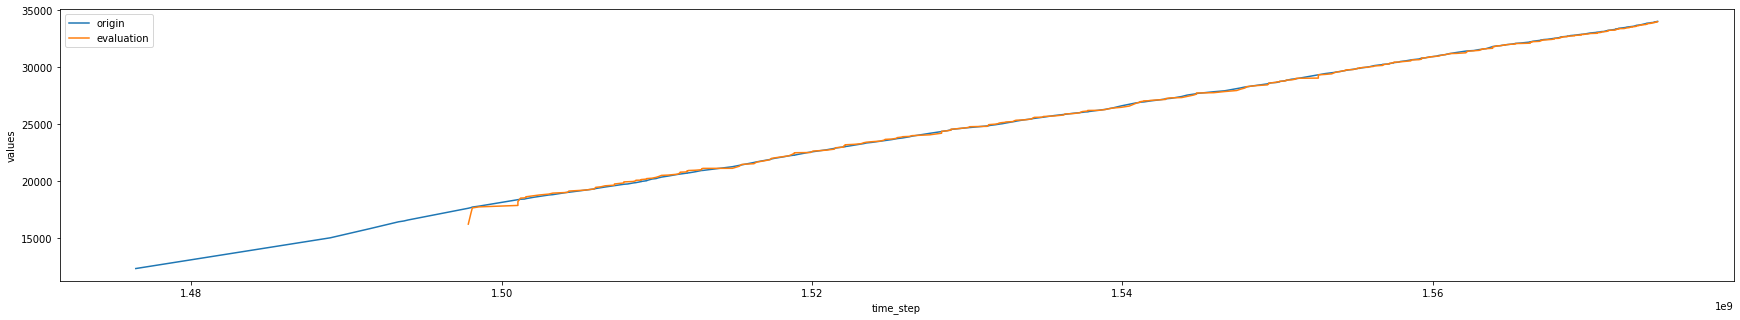

In [88]:
g = Github("d57d1988dd385e5b018cca5f5814c75e001c75de")
repo = g.get_repo("angular/angular")
repo.name
pulls = repo.get_pulls(state='open', sort='created', base='master')
number_pulls_list = []
created_at_pulls_list = []
for pr in pulls:
   created_at_pulls_list = created_at_pulls_list + [datetime.date(pd.to_datetime(pr.created_at))]
   number_pulls_list = number_pulls_list + [int(pr.number)]
number_pulls_list
#print((number_pulls_list[1]))
pulls_df = DataFrame()
pulls_df['created_at'] = created_at_pulls_list
pulls_df['number'] = number_pulls_list
pulls_df.columns = ['ds', 'y']
print(pulls_df)
pulls_df.to_csv('angular_pull.csv', sep=',', encoding='utf-8', index=False)

predict_plot_pulls('angular_pull.csv')

            ds      y
0   2016-06-09   8713
1   2016-06-09   8716
2   2016-07-07   8970
3   2016-07-10   8993
4   2016-08-03   9220
5   2016-09-17   9631
6   2016-09-19   9641
7   2016-09-27   9708
8   2016-10-20   9871
9   2016-10-20   9872
10  2016-10-28   9940
11  2016-12-15  10143
12  2017-01-19  10287
13  2017-01-20  10289
14  2017-02-13  10399
15  2017-02-22  10433
16  2017-03-09  10478
17  2017-03-10  10481
18  2017-03-13  10491
19  2017-06-16  10745
20  2017-06-27  10773
21  2017-07-06  10788
22  2017-08-01  10826
23  2017-08-02  10827
24  2017-08-26  10871
25  2017-12-31  11042
26  2018-02-26  11135
27  2018-03-08  11154
28  2018-03-10  11156
29  2018-07-20  11376
30  2018-07-20  11378
31  2018-07-29  11385
32  2018-07-31  11390
33  2018-08-19  11421
34  2018-09-10  11438
35  2018-10-02  11469
36  2019-01-07  11578
37  2019-01-07  11581
38  2019-02-22  11649
39  2019-03-12  11673
40  2019-07-15  11761
41  2019-07-22  11763
42  2019-08-08  11771
43  2019-08-19  11777
44  2019-0

INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Saeid\\AppData\\Local\\Temp\\tmpknb7k70m', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000259AA632748>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Saeid\\AppData\\Local\\Temp\\tmpknb7k70m', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000259AA632748>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Saeid\AppData\Local\Temp\tmpknb7k70m\model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Saeid\AppData\Local\Temp\tmpknb7k70m\model.ckpt.


INFO:tensorflow:loss = 2.2774987, step = 1


INFO:tensorflow:loss = 2.2774987, step = 1


INFO:tensorflow:global_step/sec: 320.711


INFO:tensorflow:global_step/sec: 320.711


INFO:tensorflow:loss = 0.62729716, step = 101 (0.314 sec)


INFO:tensorflow:loss = 0.62729716, step = 101 (0.314 sec)


INFO:tensorflow:global_step/sec: 654.001


INFO:tensorflow:global_step/sec: 654.001


INFO:tensorflow:loss = 0.4180595, step = 201 (0.154 sec)


INFO:tensorflow:loss = 0.4180595, step = 201 (0.154 sec)


INFO:tensorflow:global_step/sec: 690.08


INFO:tensorflow:global_step/sec: 690.08


INFO:tensorflow:loss = 0.29202357, step = 301 (0.144 sec)


INFO:tensorflow:loss = 0.29202357, step = 301 (0.144 sec)


INFO:tensorflow:global_step/sec: 704.659


INFO:tensorflow:global_step/sec: 704.659


INFO:tensorflow:loss = 0.17270747, step = 401 (0.141 sec)


INFO:tensorflow:loss = 0.17270747, step = 401 (0.141 sec)


INFO:tensorflow:global_step/sec: 704.664


INFO:tensorflow:global_step/sec: 704.664


INFO:tensorflow:loss = 0.12988, step = 501 (0.145 sec)


INFO:tensorflow:loss = 0.12988, step = 501 (0.145 sec)


INFO:tensorflow:global_step/sec: 714.723


INFO:tensorflow:global_step/sec: 714.723


INFO:tensorflow:loss = 0.06976786, step = 601 (0.138 sec)


INFO:tensorflow:loss = 0.06976786, step = 601 (0.138 sec)


INFO:tensorflow:global_step/sec: 704.663


INFO:tensorflow:global_step/sec: 704.663


INFO:tensorflow:loss = -0.050493762, step = 701 (0.143 sec)


INFO:tensorflow:loss = -0.050493762, step = 701 (0.143 sec)


INFO:tensorflow:global_step/sec: 676.094


INFO:tensorflow:global_step/sec: 676.094


INFO:tensorflow:loss = -0.0046967953, step = 801 (0.148 sec)


INFO:tensorflow:loss = -0.0046967953, step = 801 (0.148 sec)


INFO:tensorflow:global_step/sec: 699.733


INFO:tensorflow:global_step/sec: 699.733


INFO:tensorflow:loss = -0.01472563, step = 901 (0.143 sec)


INFO:tensorflow:loss = -0.01472563, step = 901 (0.143 sec)


INFO:tensorflow:global_step/sec: 694.871


INFO:tensorflow:global_step/sec: 694.871


INFO:tensorflow:loss = 0.14043516, step = 1001 (0.144 sec)


INFO:tensorflow:loss = 0.14043516, step = 1001 (0.144 sec)


INFO:tensorflow:global_step/sec: 671.558


INFO:tensorflow:global_step/sec: 671.558


INFO:tensorflow:loss = -0.17703407, step = 1101 (0.148 sec)


INFO:tensorflow:loss = -0.17703407, step = 1101 (0.148 sec)


INFO:tensorflow:global_step/sec: 709.656


INFO:tensorflow:global_step/sec: 709.656


INFO:tensorflow:loss = -0.257325, step = 1201 (0.141 sec)


INFO:tensorflow:loss = -0.257325, step = 1201 (0.141 sec)


INFO:tensorflow:global_step/sec: 730.384


INFO:tensorflow:global_step/sec: 730.384


INFO:tensorflow:loss = -0.1318032, step = 1301 (0.138 sec)


INFO:tensorflow:loss = -0.1318032, step = 1301 (0.138 sec)


INFO:tensorflow:global_step/sec: 641.421


INFO:tensorflow:global_step/sec: 641.421


INFO:tensorflow:loss = -0.14483854, step = 1401 (0.157 sec)


INFO:tensorflow:loss = -0.14483854, step = 1401 (0.157 sec)


INFO:tensorflow:global_step/sec: 680.69


INFO:tensorflow:global_step/sec: 680.69


INFO:tensorflow:loss = -0.1387817, step = 1501 (0.145 sec)


INFO:tensorflow:loss = -0.1387817, step = 1501 (0.145 sec)


INFO:tensorflow:global_step/sec: 699.736


INFO:tensorflow:global_step/sec: 699.736


INFO:tensorflow:loss = 0.3802465, step = 1601 (0.144 sec)


INFO:tensorflow:loss = 0.3802465, step = 1601 (0.144 sec)


INFO:tensorflow:global_step/sec: 613.879


INFO:tensorflow:global_step/sec: 613.879


INFO:tensorflow:loss = 0.8882149, step = 1701 (0.163 sec)


INFO:tensorflow:loss = 0.8882149, step = 1701 (0.163 sec)


INFO:tensorflow:global_step/sec: 719.858


INFO:tensorflow:global_step/sec: 719.858


INFO:tensorflow:loss = -0.049579818, step = 1801 (0.138 sec)


INFO:tensorflow:loss = -0.049579818, step = 1801 (0.138 sec)


INFO:tensorflow:global_step/sec: 676.1


INFO:tensorflow:global_step/sec: 676.1


INFO:tensorflow:loss = 0.25897855, step = 1901 (0.149 sec)


INFO:tensorflow:loss = 0.25897855, step = 1901 (0.149 sec)


INFO:tensorflow:global_step/sec: 685.353


INFO:tensorflow:global_step/sec: 685.353


INFO:tensorflow:loss = -0.17835416, step = 2001 (0.146 sec)


INFO:tensorflow:loss = -0.17835416, step = 2001 (0.146 sec)


INFO:tensorflow:global_step/sec: 685.357


INFO:tensorflow:global_step/sec: 685.357


INFO:tensorflow:loss = -0.10171392, step = 2101 (0.147 sec)


INFO:tensorflow:loss = -0.10171392, step = 2101 (0.147 sec)


INFO:tensorflow:global_step/sec: 654


INFO:tensorflow:global_step/sec: 654


INFO:tensorflow:loss = -0.22326341, step = 2201 (0.152 sec)


INFO:tensorflow:loss = -0.22326341, step = 2201 (0.152 sec)


INFO:tensorflow:global_step/sec: 730.377


INFO:tensorflow:global_step/sec: 730.377


INFO:tensorflow:loss = -0.35945097, step = 2301 (0.137 sec)


INFO:tensorflow:loss = -0.35945097, step = 2301 (0.137 sec)


INFO:tensorflow:global_step/sec: 719.868


INFO:tensorflow:global_step/sec: 719.868


INFO:tensorflow:loss = -0.10244087, step = 2401 (0.139 sec)


INFO:tensorflow:loss = -0.10244087, step = 2401 (0.139 sec)


INFO:tensorflow:global_step/sec: 690.081


INFO:tensorflow:global_step/sec: 690.081


INFO:tensorflow:loss = -0.18708746, step = 2501 (0.146 sec)


INFO:tensorflow:loss = -0.18708746, step = 2501 (0.146 sec)


INFO:tensorflow:global_step/sec: 714.727


INFO:tensorflow:global_step/sec: 714.727


INFO:tensorflow:loss = 0.13369092, step = 2601 (0.138 sec)


INFO:tensorflow:loss = 0.13369092, step = 2601 (0.138 sec)


INFO:tensorflow:global_step/sec: 694.874


INFO:tensorflow:global_step/sec: 694.874


INFO:tensorflow:loss = -0.21819487, step = 2701 (0.146 sec)


INFO:tensorflow:loss = -0.21819487, step = 2701 (0.146 sec)


INFO:tensorflow:global_step/sec: 709.66


INFO:tensorflow:global_step/sec: 709.66


INFO:tensorflow:loss = -0.17471965, step = 2801 (0.140 sec)


INFO:tensorflow:loss = -0.17471965, step = 2801 (0.140 sec)


INFO:tensorflow:global_step/sec: 690.085


INFO:tensorflow:global_step/sec: 690.085


INFO:tensorflow:loss = -0.26786858, step = 2901 (0.144 sec)


INFO:tensorflow:loss = -0.26786858, step = 2901 (0.144 sec)


INFO:tensorflow:global_step/sec: 709.65


INFO:tensorflow:global_step/sec: 709.65


INFO:tensorflow:loss = 0.25940576, step = 3001 (0.142 sec)


INFO:tensorflow:loss = 0.25940576, step = 3001 (0.142 sec)


INFO:tensorflow:global_step/sec: 752.354


INFO:tensorflow:global_step/sec: 752.354


INFO:tensorflow:loss = -0.1658167, step = 3101 (0.132 sec)


INFO:tensorflow:loss = -0.1658167, step = 3101 (0.132 sec)


INFO:tensorflow:global_step/sec: 709.659


INFO:tensorflow:global_step/sec: 709.659


INFO:tensorflow:loss = -0.23291422, step = 3201 (0.142 sec)


INFO:tensorflow:loss = -0.23291422, step = 3201 (0.142 sec)


INFO:tensorflow:global_step/sec: 680.692


INFO:tensorflow:global_step/sec: 680.692


INFO:tensorflow:loss = -0.09609041, step = 3301 (0.147 sec)


INFO:tensorflow:loss = -0.09609041, step = 3301 (0.147 sec)


INFO:tensorflow:global_step/sec: 658.289


INFO:tensorflow:global_step/sec: 658.289


INFO:tensorflow:loss = -0.12871525, step = 3401 (0.157 sec)


INFO:tensorflow:loss = -0.12871525, step = 3401 (0.157 sec)


INFO:tensorflow:global_step/sec: 741.215


INFO:tensorflow:global_step/sec: 741.215


INFO:tensorflow:loss = -0.24598414, step = 3501 (0.130 sec)


INFO:tensorflow:loss = -0.24598414, step = 3501 (0.130 sec)


INFO:tensorflow:global_step/sec: 725.086


INFO:tensorflow:global_step/sec: 725.086


INFO:tensorflow:loss = -0.2712735, step = 3601 (0.137 sec)


INFO:tensorflow:loss = -0.2712735, step = 3601 (0.137 sec)


INFO:tensorflow:global_step/sec: 694.871


INFO:tensorflow:global_step/sec: 694.871


INFO:tensorflow:loss = -0.109757945, step = 3701 (0.145 sec)


INFO:tensorflow:loss = -0.109757945, step = 3701 (0.145 sec)


INFO:tensorflow:global_step/sec: 592.085


INFO:tensorflow:global_step/sec: 592.085


INFO:tensorflow:loss = -0.06680116, step = 3801 (0.169 sec)


INFO:tensorflow:loss = -0.06680116, step = 3801 (0.169 sec)


INFO:tensorflow:global_step/sec: 704.657


INFO:tensorflow:global_step/sec: 704.657


INFO:tensorflow:loss = 0.4498997, step = 3901 (0.142 sec)


INFO:tensorflow:loss = 0.4498997, step = 3901 (0.142 sec)


INFO:tensorflow:global_step/sec: 654.004


INFO:tensorflow:global_step/sec: 654.004


INFO:tensorflow:loss = -0.1630731, step = 4001 (0.154 sec)


INFO:tensorflow:loss = -0.1630731, step = 4001 (0.154 sec)


INFO:tensorflow:global_step/sec: 617.666


INFO:tensorflow:global_step/sec: 617.666


INFO:tensorflow:loss = 0.30134535, step = 4101 (0.160 sec)


INFO:tensorflow:loss = 0.30134535, step = 4101 (0.160 sec)


INFO:tensorflow:global_step/sec: 699.728


INFO:tensorflow:global_step/sec: 699.728


INFO:tensorflow:loss = -0.17604055, step = 4201 (0.144 sec)


INFO:tensorflow:loss = -0.17604055, step = 4201 (0.144 sec)


INFO:tensorflow:global_step/sec: 676.095


INFO:tensorflow:global_step/sec: 676.095


INFO:tensorflow:loss = -0.20461182, step = 4301 (0.148 sec)


INFO:tensorflow:loss = -0.20461182, step = 4301 (0.148 sec)


INFO:tensorflow:global_step/sec: 704.662


INFO:tensorflow:global_step/sec: 704.662


INFO:tensorflow:loss = -0.45581996, step = 4401 (0.142 sec)


INFO:tensorflow:loss = -0.45581996, step = 4401 (0.142 sec)


INFO:tensorflow:global_step/sec: 787.891


INFO:tensorflow:global_step/sec: 787.891


INFO:tensorflow:loss = -0.13014677, step = 4501 (0.126 sec)


INFO:tensorflow:loss = -0.13014677, step = 4501 (0.126 sec)


INFO:tensorflow:global_step/sec: 287.534


INFO:tensorflow:global_step/sec: 287.534


INFO:tensorflow:loss = -0.12522916, step = 4601 (0.347 sec)


INFO:tensorflow:loss = -0.12522916, step = 4601 (0.347 sec)


INFO:tensorflow:global_step/sec: 769.703


INFO:tensorflow:global_step/sec: 769.703


INFO:tensorflow:loss = -0.023452265, step = 4701 (0.130 sec)


INFO:tensorflow:loss = -0.023452265, step = 4701 (0.130 sec)


INFO:tensorflow:global_step/sec: 741.204


INFO:tensorflow:global_step/sec: 741.204


INFO:tensorflow:loss = -0.095017694, step = 4801 (0.136 sec)


INFO:tensorflow:loss = -0.095017694, step = 4801 (0.136 sec)


INFO:tensorflow:global_step/sec: 704.657


INFO:tensorflow:global_step/sec: 704.657


INFO:tensorflow:loss = 0.67019874, step = 4901 (0.143 sec)


INFO:tensorflow:loss = 0.67019874, step = 4901 (0.143 sec)


INFO:tensorflow:global_step/sec: 769.711


INFO:tensorflow:global_step/sec: 769.711


INFO:tensorflow:loss = 0.2305741, step = 5001 (0.129 sec)


INFO:tensorflow:loss = 0.2305741, step = 5001 (0.129 sec)


INFO:tensorflow:global_step/sec: 690.083


INFO:tensorflow:global_step/sec: 690.083


INFO:tensorflow:loss = -0.32697126, step = 5101 (0.145 sec)


INFO:tensorflow:loss = -0.32697126, step = 5101 (0.145 sec)


INFO:tensorflow:global_step/sec: 725.082


INFO:tensorflow:global_step/sec: 725.082


INFO:tensorflow:loss = 0.047592156, step = 5201 (0.138 sec)


INFO:tensorflow:loss = 0.047592156, step = 5201 (0.138 sec)


INFO:tensorflow:global_step/sec: 725.089


INFO:tensorflow:global_step/sec: 725.089


INFO:tensorflow:loss = 0.21589734, step = 5301 (0.138 sec)


INFO:tensorflow:loss = 0.21589734, step = 5301 (0.138 sec)


INFO:tensorflow:global_step/sec: 685.356


INFO:tensorflow:global_step/sec: 685.356


INFO:tensorflow:loss = -0.003478953, step = 5401 (0.145 sec)


INFO:tensorflow:loss = -0.003478953, step = 5401 (0.145 sec)


INFO:tensorflow:global_step/sec: 704.653


INFO:tensorflow:global_step/sec: 704.653


INFO:tensorflow:loss = -0.38690445, step = 5501 (0.143 sec)


INFO:tensorflow:loss = -0.38690445, step = 5501 (0.143 sec)


INFO:tensorflow:global_step/sec: 735.759


INFO:tensorflow:global_step/sec: 735.759


INFO:tensorflow:loss = -0.3287816, step = 5601 (0.137 sec)


INFO:tensorflow:loss = -0.3287816, step = 5601 (0.137 sec)


INFO:tensorflow:global_step/sec: 645.559


INFO:tensorflow:global_step/sec: 645.559


INFO:tensorflow:loss = -0.02574168, step = 5701 (0.154 sec)


INFO:tensorflow:loss = -0.02574168, step = 5701 (0.154 sec)


INFO:tensorflow:global_step/sec: 649.751


INFO:tensorflow:global_step/sec: 649.751


INFO:tensorflow:loss = 0.22556487, step = 5801 (0.154 sec)


INFO:tensorflow:loss = 0.22556487, step = 5801 (0.154 sec)


INFO:tensorflow:global_step/sec: 709.659


INFO:tensorflow:global_step/sec: 709.659


INFO:tensorflow:loss = 0.048451785, step = 5901 (0.141 sec)


INFO:tensorflow:loss = 0.048451785, step = 5901 (0.141 sec)


INFO:tensorflow:Saving checkpoints for 6000 into C:\Users\Saeid\AppData\Local\Temp\tmpknb7k70m\model.ckpt.


INFO:tensorflow:Saving checkpoints for 6000 into C:\Users\Saeid\AppData\Local\Temp\tmpknb7k70m\model.ckpt.


INFO:tensorflow:Loss for final step: -0.10105534.


INFO:tensorflow:Loss for final step: -0.10105534.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2019-11-24T00:25:33Z


INFO:tensorflow:Starting evaluation at 2019-11-24T00:25:33Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmpknb7k70m\model.ckpt-6000


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmpknb7k70m\model.ckpt-6000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Evaluation [100/1000]


INFO:tensorflow:Evaluation [100/1000]


INFO:tensorflow:Evaluation [200/1000]


INFO:tensorflow:Evaluation [200/1000]


INFO:tensorflow:Evaluation [300/1000]


INFO:tensorflow:Evaluation [300/1000]


INFO:tensorflow:Evaluation [400/1000]


INFO:tensorflow:Evaluation [400/1000]


INFO:tensorflow:Evaluation [500/1000]


INFO:tensorflow:Evaluation [500/1000]


INFO:tensorflow:Evaluation [600/1000]


INFO:tensorflow:Evaluation [600/1000]


INFO:tensorflow:Evaluation [700/1000]


INFO:tensorflow:Evaluation [700/1000]


INFO:tensorflow:Evaluation [800/1000]


INFO:tensorflow:Evaluation [800/1000]


INFO:tensorflow:Evaluation [900/1000]


INFO:tensorflow:Evaluation [900/1000]


INFO:tensorflow:Evaluation [1000/1000]


INFO:tensorflow:Evaluation [1000/1000]


INFO:tensorflow:Finished evaluation at 2019-11-24-00:25:40


INFO:tensorflow:Finished evaluation at 2019-11-24-00:25:40


INFO:tensorflow:Saving dict for global step 6000: average_loss = -0.110868186, covariance = [[[44546.75  ]
  [26702.158 ]
  [33446.746 ]
  [27519.197 ]
  [25400.709 ]
  [32733.05  ]
  [22414.56  ]
  [13913.042 ]
  [14139.636 ]
  [12798.921 ]
  [11544.234 ]
  [11820.999 ]
  [13305.196 ]
  [13037.296 ]
  [ 8918.154 ]
  [ 6423.6987]
  [ 6470.3115]
  [ 6781.    ]
  [ 6300.7896]
  [ 7159.7188]
  [ 5142.947 ]
  [ 3575.1887]
  [ 3324.798 ]
  [ 3546.9282]
  [ 2471.4116]
  [ 2166.5276]
  [ 2347.5017]
  [ 2625.3704]
  [ 2364.293 ]
  [ 2647.7964]
  [ 2464.92  ]
  [ 1984.2799]
  [ 1754.48  ]
  [ 1617.9366]
  [ 1523.9414]
  [ 1272.4388]
  [ 1296.3148]
  [ 1287.5865]
  [ 1388.3627]
  [ 1357.8635]
  [ 1433.6975]
  [ 1415.3859]
  [ 1413.0635]
  [ 1414.0253]
  [ 1424.606 ]
  [ 1426.6733]
  [ 1426.6161]
  [ 1422.025 ]
  [ 1402.1832]
  [ 1390.7473]
  [ 1389.5686]
  [ 1392.2349]
  [ 1381.413 ]]], global_step = 6000, loss = -0.110868186, mean = [[[ 9726.2295]
  [ 9748.682 ]
  [ 9870.954 ]
  [10008.023 ]
  

INFO:tensorflow:Saving dict for global step 6000: average_loss = -0.110868186, covariance = [[[44546.75  ]
  [26702.158 ]
  [33446.746 ]
  [27519.197 ]
  [25400.709 ]
  [32733.05  ]
  [22414.56  ]
  [13913.042 ]
  [14139.636 ]
  [12798.921 ]
  [11544.234 ]
  [11820.999 ]
  [13305.196 ]
  [13037.296 ]
  [ 8918.154 ]
  [ 6423.6987]
  [ 6470.3115]
  [ 6781.    ]
  [ 6300.7896]
  [ 7159.7188]
  [ 5142.947 ]
  [ 3575.1887]
  [ 3324.798 ]
  [ 3546.9282]
  [ 2471.4116]
  [ 2166.5276]
  [ 2347.5017]
  [ 2625.3704]
  [ 2364.293 ]
  [ 2647.7964]
  [ 2464.92  ]
  [ 1984.2799]
  [ 1754.48  ]
  [ 1617.9366]
  [ 1523.9414]
  [ 1272.4388]
  [ 1296.3148]
  [ 1287.5865]
  [ 1388.3627]
  [ 1357.8635]
  [ 1433.6975]
  [ 1415.3859]
  [ 1413.0635]
  [ 1414.0253]
  [ 1424.606 ]
  [ 1426.6733]
  [ 1426.6161]
  [ 1422.025 ]
  [ 1402.1832]
  [ 1390.7473]
  [ 1389.5686]
  [ 1392.2349]
  [ 1381.413 ]]], global_step = 6000, loss = -0.110868186, mean = [[[ 9726.2295]
  [ 9748.682 ]
  [ 9870.954 ]
  [10008.023 ]
  

INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6000: C:\Users\Saeid\AppData\Local\Temp\tmpknb7k70m\model.ckpt-6000


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6000: C:\Users\Saeid\AppData\Local\Temp\tmpknb7k70m\model.ckpt-6000


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmpknb7k70m\model.ckpt-6000


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmpknb7k70m\model.ckpt-6000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


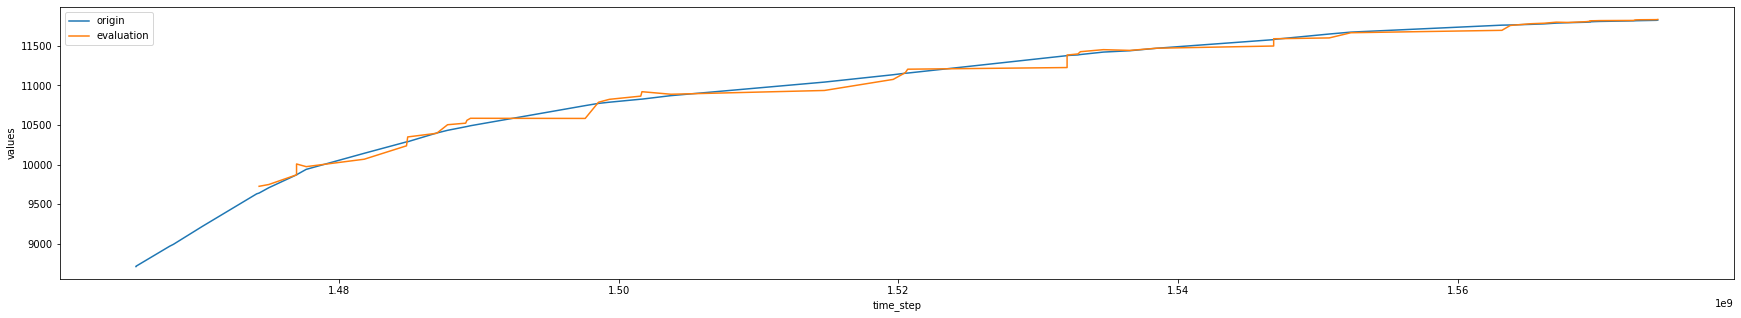

In [89]:
g = Github("d57d1988dd385e5b018cca5f5814c75e001c75de")
repo = g.get_repo("angular/material")
repo.name
pulls = repo.get_pulls(state='open', sort='created', base='master')
number_pulls_list = []
created_at_pulls_list = []
for pr in pulls:
   created_at_pulls_list = created_at_pulls_list + [datetime.date(pd.to_datetime(pr.created_at))]
   number_pulls_list = number_pulls_list + [int(pr.number)]
number_pulls_list
#print((number_pulls_list[1]))
pulls_df = DataFrame()
pulls_df['created_at'] = created_at_pulls_list
pulls_df['number'] = number_pulls_list
pulls_df.columns = ['ds', 'y']
print(pulls_df)
pulls_df.to_csv('angular_material_pull.csv', sep=',', encoding='utf-8', index=False)

predict_plot_pulls('angular_material_pull.csv')

            ds      y
0   2018-09-28  12394
1   2018-11-11  12927
2   2019-01-02  13348
3   2019-06-21  14850
4   2019-06-28  14936
5   2019-07-23  15146
6   2019-08-15  15345
7   2019-08-28  15472
8   2019-10-08  15781
9   2019-10-08  15783
10  2019-10-29  15977
11  2019-11-10  16138
12  2019-11-13  16186
13  2019-11-15  16199
14  2019-11-16  16203
15  2019-11-18  16209
16  2019-11-21  16252
17  2019-11-22  16258
18  2019-11-22  16259
19  2019-11-22  16260
20  2019-11-22  16261
21  2019-11-22  16262
22  2019-11-22  16263
23  2019-11-22  16268
24  2019-11-23  16269
25  2019-11-23  16270
26  2019-11-23  16271
27  2019-11-23  16273
28  2019-11-23  16274
{'times': array([1.5381108e+09, 1.5419160e+09, 1.5464088e+09, 1.5610932e+09,
       1.5616980e+09, 1.5638580e+09, 1.5658452e+09, 1.5669684e+09,
       1.5705108e+09, 1.5705108e+09, 1.5723252e+09, 1.5733656e+09,
       1.5736248e+09, 1.5737976e+09, 1.5738840e+09, 1.5740568e+09,
       1.5743160e+09, 1.5744024e+09, 1.5744024e+09, 1.5744024e

INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Saeid\\AppData\\Local\\Temp\\tmpxnx1hrqr', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000259AA63D108>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Saeid\\AppData\\Local\\Temp\\tmpxnx1hrqr', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000259AA63D108>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Saeid\AppData\Local\Temp\tmpxnx1hrqr\model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Saeid\AppData\Local\Temp\tmpxnx1hrqr\model.ckpt.


INFO:tensorflow:loss = 1.1462635, step = 1


INFO:tensorflow:loss = 1.1462635, step = 1


INFO:tensorflow:global_step/sec: 308.833


INFO:tensorflow:global_step/sec: 308.833


INFO:tensorflow:loss = 0.27783805, step = 101 (0.326 sec)


INFO:tensorflow:loss = 0.27783805, step = 101 (0.326 sec)


INFO:tensorflow:global_step/sec: 746.723


INFO:tensorflow:global_step/sec: 746.723


INFO:tensorflow:loss = -0.14231412, step = 201 (0.136 sec)


INFO:tensorflow:loss = -0.14231412, step = 201 (0.136 sec)


INFO:tensorflow:global_step/sec: 769.709


INFO:tensorflow:global_step/sec: 769.709


INFO:tensorflow:loss = -0.15638575, step = 301 (0.129 sec)


INFO:tensorflow:loss = -0.15638575, step = 301 (0.129 sec)


INFO:tensorflow:global_step/sec: 690.082


INFO:tensorflow:global_step/sec: 690.082


INFO:tensorflow:loss = -0.2482685, step = 401 (0.145 sec)


INFO:tensorflow:loss = -0.2482685, step = 401 (0.145 sec)


INFO:tensorflow:global_step/sec: 769.709


INFO:tensorflow:global_step/sec: 769.709


INFO:tensorflow:loss = -0.11956626, step = 501 (0.149 sec)


INFO:tensorflow:loss = -0.11956626, step = 501 (0.149 sec)


INFO:tensorflow:global_step/sec: 629.091


INFO:tensorflow:global_step/sec: 629.091


INFO:tensorflow:loss = -0.61033297, step = 601 (0.141 sec)


INFO:tensorflow:loss = -0.61033297, step = 601 (0.141 sec)


INFO:tensorflow:global_step/sec: 714.729


INFO:tensorflow:global_step/sec: 714.729


INFO:tensorflow:loss = -0.3033194, step = 701 (0.138 sec)


INFO:tensorflow:loss = -0.3033194, step = 701 (0.138 sec)


INFO:tensorflow:global_step/sec: 763.83


INFO:tensorflow:global_step/sec: 763.83


INFO:tensorflow:loss = -0.654545, step = 801 (0.131 sec)


INFO:tensorflow:loss = -0.654545, step = 801 (0.131 sec)


INFO:tensorflow:global_step/sec: 813.512


INFO:tensorflow:global_step/sec: 813.512


INFO:tensorflow:loss = -0.24856289, step = 901 (0.123 sec)


INFO:tensorflow:loss = -0.24856289, step = 901 (0.123 sec)


INFO:tensorflow:global_step/sec: 714.722


INFO:tensorflow:global_step/sec: 714.722


INFO:tensorflow:loss = 0.020956568, step = 1001 (0.140 sec)


INFO:tensorflow:loss = 0.020956568, step = 1001 (0.140 sec)


INFO:tensorflow:global_step/sec: 752.35


INFO:tensorflow:global_step/sec: 752.35


INFO:tensorflow:loss = -0.57676804, step = 1101 (0.134 sec)


INFO:tensorflow:loss = -0.57676804, step = 1101 (0.134 sec)


INFO:tensorflow:global_step/sec: 714.729


INFO:tensorflow:global_step/sec: 714.729


INFO:tensorflow:loss = -0.440264, step = 1201 (0.139 sec)


INFO:tensorflow:loss = -0.440264, step = 1201 (0.139 sec)


INFO:tensorflow:global_step/sec: 758.046


INFO:tensorflow:global_step/sec: 758.046


INFO:tensorflow:loss = -0.11912914, step = 1301 (0.133 sec)


INFO:tensorflow:loss = -0.11912914, step = 1301 (0.133 sec)


INFO:tensorflow:global_step/sec: 658.298


INFO:tensorflow:global_step/sec: 658.298


INFO:tensorflow:loss = -1.0469313, step = 1401 (0.153 sec)


INFO:tensorflow:loss = -1.0469313, step = 1401 (0.153 sec)


INFO:tensorflow:global_step/sec: 654


INFO:tensorflow:global_step/sec: 654


INFO:tensorflow:loss = -0.7538003, step = 1501 (0.153 sec)


INFO:tensorflow:loss = -0.7538003, step = 1501 (0.153 sec)


INFO:tensorflow:global_step/sec: 769.7


INFO:tensorflow:global_step/sec: 769.7


INFO:tensorflow:loss = -0.47264686, step = 1601 (0.127 sec)


INFO:tensorflow:loss = -0.47264686, step = 1601 (0.127 sec)


INFO:tensorflow:global_step/sec: 671.562


INFO:tensorflow:global_step/sec: 671.562


INFO:tensorflow:loss = -0.69181544, step = 1701 (0.150 sec)


INFO:tensorflow:loss = -0.69181544, step = 1701 (0.150 sec)


INFO:tensorflow:global_step/sec: 719.869


INFO:tensorflow:global_step/sec: 719.869


INFO:tensorflow:loss = -0.13530011, step = 1801 (0.141 sec)


INFO:tensorflow:loss = -0.13530011, step = 1801 (0.141 sec)


INFO:tensorflow:global_step/sec: 653.998


INFO:tensorflow:global_step/sec: 653.998


INFO:tensorflow:loss = -0.86506015, step = 1901 (0.152 sec)


INFO:tensorflow:loss = -0.86506015, step = 1901 (0.152 sec)


INFO:tensorflow:global_step/sec: 704.663


INFO:tensorflow:global_step/sec: 704.663


INFO:tensorflow:loss = -0.18630038, step = 2001 (0.142 sec)


INFO:tensorflow:loss = -0.18630038, step = 2001 (0.142 sec)


INFO:tensorflow:global_step/sec: 680.696


INFO:tensorflow:global_step/sec: 680.696


INFO:tensorflow:loss = -0.7517982, step = 2101 (0.148 sec)


INFO:tensorflow:loss = -0.7517982, step = 2101 (0.148 sec)


INFO:tensorflow:global_step/sec: 813.509


INFO:tensorflow:global_step/sec: 813.509


INFO:tensorflow:loss = -0.99112487, step = 2201 (0.121 sec)


INFO:tensorflow:loss = -0.99112487, step = 2201 (0.121 sec)


INFO:tensorflow:global_step/sec: 699.734


INFO:tensorflow:global_step/sec: 699.734


INFO:tensorflow:loss = -0.6730272, step = 2301 (0.145 sec)


INFO:tensorflow:loss = -0.6730272, step = 2301 (0.145 sec)


INFO:tensorflow:global_step/sec: 800.495


INFO:tensorflow:global_step/sec: 800.495


INFO:tensorflow:loss = -0.32646638, step = 2401 (0.123 sec)


INFO:tensorflow:loss = -0.32646638, step = 2401 (0.123 sec)


INFO:tensorflow:global_step/sec: 694.866


INFO:tensorflow:global_step/sec: 694.866


INFO:tensorflow:loss = -0.7673277, step = 2501 (0.144 sec)


INFO:tensorflow:loss = -0.7673277, step = 2501 (0.144 sec)


INFO:tensorflow:global_step/sec: 704.668


INFO:tensorflow:global_step/sec: 704.668


INFO:tensorflow:loss = -0.56977487, step = 2601 (0.142 sec)


INFO:tensorflow:loss = -0.56977487, step = 2601 (0.142 sec)


INFO:tensorflow:global_step/sec: 704.657


INFO:tensorflow:global_step/sec: 704.657


INFO:tensorflow:loss = -0.37908882, step = 2701 (0.143 sec)


INFO:tensorflow:loss = -0.37908882, step = 2701 (0.143 sec)


INFO:tensorflow:global_step/sec: 758.041


INFO:tensorflow:global_step/sec: 758.041


INFO:tensorflow:loss = -0.8638234, step = 2801 (0.131 sec)


INFO:tensorflow:loss = -0.8638234, step = 2801 (0.131 sec)


INFO:tensorflow:global_step/sec: 730.387


INFO:tensorflow:global_step/sec: 730.387


INFO:tensorflow:loss = -0.75004125, step = 2901 (0.137 sec)


INFO:tensorflow:loss = -0.75004125, step = 2901 (0.137 sec)


INFO:tensorflow:global_step/sec: 699.728


INFO:tensorflow:global_step/sec: 699.728


INFO:tensorflow:loss = -0.8487938, step = 3001 (0.145 sec)


INFO:tensorflow:loss = -0.8487938, step = 3001 (0.145 sec)


INFO:tensorflow:global_step/sec: 690.085


INFO:tensorflow:global_step/sec: 690.085


INFO:tensorflow:loss = -1.1219596, step = 3101 (0.146 sec)


INFO:tensorflow:loss = -1.1219596, step = 3101 (0.146 sec)


INFO:tensorflow:global_step/sec: 794.14


INFO:tensorflow:global_step/sec: 794.14


INFO:tensorflow:loss = -0.32745764, step = 3201 (0.123 sec)


INFO:tensorflow:loss = -0.32745764, step = 3201 (0.123 sec)


INFO:tensorflow:global_step/sec: 719.869


INFO:tensorflow:global_step/sec: 719.869


INFO:tensorflow:loss = -0.9288336, step = 3301 (0.140 sec)


INFO:tensorflow:loss = -0.9288336, step = 3301 (0.140 sec)


INFO:tensorflow:global_step/sec: 714.728


INFO:tensorflow:global_step/sec: 714.728


INFO:tensorflow:loss = -0.4547378, step = 3401 (0.139 sec)


INFO:tensorflow:loss = -0.4547378, step = 3401 (0.139 sec)


INFO:tensorflow:global_step/sec: 763.831


INFO:tensorflow:global_step/sec: 763.831


INFO:tensorflow:loss = -0.7328325, step = 3501 (0.132 sec)


INFO:tensorflow:loss = -0.7328325, step = 3501 (0.132 sec)


INFO:tensorflow:global_step/sec: 633.303


INFO:tensorflow:global_step/sec: 633.303


INFO:tensorflow:loss = -0.4466267, step = 3601 (0.160 sec)


INFO:tensorflow:loss = -0.4466267, step = 3601 (0.160 sec)


INFO:tensorflow:global_step/sec: 730.38


INFO:tensorflow:global_step/sec: 730.38


INFO:tensorflow:loss = -0.6173544, step = 3701 (0.135 sec)


INFO:tensorflow:loss = -0.6173544, step = 3701 (0.135 sec)


INFO:tensorflow:global_step/sec: 645.559


INFO:tensorflow:global_step/sec: 645.559


INFO:tensorflow:loss = -0.4835199, step = 3801 (0.155 sec)


INFO:tensorflow:loss = -0.4835199, step = 3801 (0.155 sec)


INFO:tensorflow:global_step/sec: 690.082


INFO:tensorflow:global_step/sec: 690.082


INFO:tensorflow:loss = -0.488652, step = 3901 (0.145 sec)


INFO:tensorflow:loss = -0.488652, step = 3901 (0.145 sec)


INFO:tensorflow:global_step/sec: 599.174


INFO:tensorflow:global_step/sec: 599.174


INFO:tensorflow:loss = -0.45892915, step = 4001 (0.168 sec)


INFO:tensorflow:loss = -0.45892915, step = 4001 (0.168 sec)


INFO:tensorflow:global_step/sec: 662.661


INFO:tensorflow:global_step/sec: 662.661


INFO:tensorflow:loss = -0.09543183, step = 4101 (0.151 sec)


INFO:tensorflow:loss = -0.09543183, step = 4101 (0.151 sec)


INFO:tensorflow:global_step/sec: 585.154


INFO:tensorflow:global_step/sec: 585.154


INFO:tensorflow:loss = -0.7601861, step = 4201 (0.171 sec)


INFO:tensorflow:loss = -0.7601861, step = 4201 (0.171 sec)


INFO:tensorflow:global_step/sec: 671.559


INFO:tensorflow:global_step/sec: 671.559


INFO:tensorflow:loss = -0.11084196, step = 4301 (0.148 sec)


INFO:tensorflow:loss = -0.11084196, step = 4301 (0.148 sec)


INFO:tensorflow:global_step/sec: 690.082


INFO:tensorflow:global_step/sec: 690.082


INFO:tensorflow:loss = -0.9198132, step = 4401 (0.148 sec)


INFO:tensorflow:loss = -0.9198132, step = 4401 (0.148 sec)


INFO:tensorflow:global_step/sec: 676.092


INFO:tensorflow:global_step/sec: 676.092


INFO:tensorflow:loss = -0.25933224, step = 4501 (0.146 sec)


INFO:tensorflow:loss = -0.25933224, step = 4501 (0.146 sec)


INFO:tensorflow:global_step/sec: 671.559


INFO:tensorflow:global_step/sec: 671.559


INFO:tensorflow:loss = -0.4439979, step = 4601 (0.147 sec)


INFO:tensorflow:loss = -0.4439979, step = 4601 (0.147 sec)


INFO:tensorflow:global_step/sec: 820.176


INFO:tensorflow:global_step/sec: 820.176


INFO:tensorflow:loss = -0.5990524, step = 4701 (0.122 sec)


INFO:tensorflow:loss = -0.5990524, step = 4701 (0.122 sec)


INFO:tensorflow:global_step/sec: 775.669


INFO:tensorflow:global_step/sec: 775.669


INFO:tensorflow:loss = -0.5703295, step = 4801 (0.129 sec)


INFO:tensorflow:loss = -0.5703295, step = 4801 (0.129 sec)


INFO:tensorflow:global_step/sec: 877.739


INFO:tensorflow:global_step/sec: 877.739


INFO:tensorflow:loss = -0.8842661, step = 4901 (0.113 sec)


INFO:tensorflow:loss = -0.8842661, step = 4901 (0.113 sec)


INFO:tensorflow:global_step/sec: 649.756


INFO:tensorflow:global_step/sec: 649.756


INFO:tensorflow:loss = -0.8672202, step = 5001 (0.155 sec)


INFO:tensorflow:loss = -0.8672202, step = 5001 (0.155 sec)


INFO:tensorflow:global_step/sec: 653.995


INFO:tensorflow:global_step/sec: 653.995


INFO:tensorflow:loss = -0.9165982, step = 5101 (0.154 sec)


INFO:tensorflow:loss = -0.9165982, step = 5101 (0.154 sec)


INFO:tensorflow:global_step/sec: 637.338


INFO:tensorflow:global_step/sec: 637.338


INFO:tensorflow:loss = -0.93466693, step = 5201 (0.156 sec)


INFO:tensorflow:loss = -0.93466693, step = 5201 (0.156 sec)


INFO:tensorflow:global_step/sec: 676.091


INFO:tensorflow:global_step/sec: 676.091


INFO:tensorflow:loss = -0.8145549, step = 5301 (0.149 sec)


INFO:tensorflow:loss = -0.8145549, step = 5301 (0.149 sec)


INFO:tensorflow:global_step/sec: 610.135


INFO:tensorflow:global_step/sec: 610.135


INFO:tensorflow:loss = -1.0606536, step = 5401 (0.165 sec)


INFO:tensorflow:loss = -1.0606536, step = 5401 (0.165 sec)


INFO:tensorflow:global_step/sec: 549.791


INFO:tensorflow:global_step/sec: 549.791


INFO:tensorflow:loss = -0.6152666, step = 5501 (0.181 sec)


INFO:tensorflow:loss = -0.6152666, step = 5501 (0.181 sec)


INFO:tensorflow:global_step/sec: 654


INFO:tensorflow:global_step/sec: 654


INFO:tensorflow:loss = -0.5816252, step = 5601 (0.153 sec)


INFO:tensorflow:loss = -0.5816252, step = 5601 (0.153 sec)


INFO:tensorflow:global_step/sec: 746.735


INFO:tensorflow:global_step/sec: 746.735


INFO:tensorflow:loss = -0.62461835, step = 5701 (0.135 sec)


INFO:tensorflow:loss = -0.62461835, step = 5701 (0.135 sec)


INFO:tensorflow:global_step/sec: 794.14


INFO:tensorflow:global_step/sec: 794.14


INFO:tensorflow:loss = -0.96577996, step = 5801 (0.124 sec)


INFO:tensorflow:loss = -0.96577996, step = 5801 (0.124 sec)


INFO:tensorflow:global_step/sec: 826.953


INFO:tensorflow:global_step/sec: 826.953


INFO:tensorflow:loss = -0.7550406, step = 5901 (0.122 sec)


INFO:tensorflow:loss = -0.7550406, step = 5901 (0.122 sec)


INFO:tensorflow:Saving checkpoints for 6000 into C:\Users\Saeid\AppData\Local\Temp\tmpxnx1hrqr\model.ckpt.


INFO:tensorflow:Saving checkpoints for 6000 into C:\Users\Saeid\AppData\Local\Temp\tmpxnx1hrqr\model.ckpt.


INFO:tensorflow:Loss for final step: -0.07660004.


INFO:tensorflow:Loss for final step: -0.07660004.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2019-11-24T00:27:41Z


INFO:tensorflow:Starting evaluation at 2019-11-24T00:27:41Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmpxnx1hrqr\model.ckpt-6000


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmpxnx1hrqr\model.ckpt-6000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Evaluation [100/1000]


INFO:tensorflow:Evaluation [100/1000]


INFO:tensorflow:Evaluation [200/1000]


INFO:tensorflow:Evaluation [200/1000]


INFO:tensorflow:Evaluation [300/1000]


INFO:tensorflow:Evaluation [300/1000]


INFO:tensorflow:Evaluation [400/1000]


INFO:tensorflow:Evaluation [400/1000]


INFO:tensorflow:Evaluation [500/1000]


INFO:tensorflow:Evaluation [500/1000]


INFO:tensorflow:Evaluation [600/1000]


INFO:tensorflow:Evaluation [600/1000]


INFO:tensorflow:Evaluation [700/1000]


INFO:tensorflow:Evaluation [700/1000]


INFO:tensorflow:Evaluation [800/1000]


INFO:tensorflow:Evaluation [800/1000]


INFO:tensorflow:Evaluation [900/1000]


INFO:tensorflow:Evaluation [900/1000]


INFO:tensorflow:Evaluation [1000/1000]


INFO:tensorflow:Evaluation [1000/1000]


INFO:tensorflow:Finished evaluation at 2019-11-24-00:27:44


INFO:tensorflow:Finished evaluation at 2019-11-24-00:27:44


INFO:tensorflow:Saving dict for global step 6000: average_loss = -0.6885987, covariance = [[[2.2866650e+05]
  [7.4362234e+04]
  [2.2188859e+04]
  [4.4879980e+04]
  [6.2530781e+03]
  [1.2525480e+03]
  [3.0721600e+02]
  [6.8309074e+01]
  [5.7343449e+01]
  [4.5515892e+01]
  [6.8779068e+01]
  [7.9182800e+01]
  [6.6592812e+01]
  [5.6311928e+01]
  [5.5062099e+01]
  [5.5565876e+01]
  [6.1022457e+01]
  [6.1059425e+01]
  [5.9115726e+01]
  [5.7120758e+01]
  [5.5604782e+01]
  [5.4949265e+01]
  [5.4068935e+01]]], global_step = 6000, loss = -0.6885987, mean = [[[15585.725 ]
  [15704.427 ]
  [15863.279 ]
  [16035.704 ]
  [16006.517 ]
  [16111.874 ]
  [16181.675 ]
  [16202.239 ]
  [16202.672 ]
  [16217.0205]
  [16236.756 ]
  [16265.256 ]
  [16264.08  ]
  [16262.404 ]
  [16263.218 ]
  [16267.201 ]
  [16269.028 ]
  [16269.572 ]
  [16272.024 ]
  [16271.879 ]
  [16272.121 ]
  [16272.56  ]
  [16273.818 ]]], observed = [[[15345.]
  [15472.]
  [15781.]
  [15783.]
  [15977.]
  [16138.]
  [16186.]
  [16199.]


INFO:tensorflow:Saving dict for global step 6000: average_loss = -0.6885987, covariance = [[[2.2866650e+05]
  [7.4362234e+04]
  [2.2188859e+04]
  [4.4879980e+04]
  [6.2530781e+03]
  [1.2525480e+03]
  [3.0721600e+02]
  [6.8309074e+01]
  [5.7343449e+01]
  [4.5515892e+01]
  [6.8779068e+01]
  [7.9182800e+01]
  [6.6592812e+01]
  [5.6311928e+01]
  [5.5062099e+01]
  [5.5565876e+01]
  [6.1022457e+01]
  [6.1059425e+01]
  [5.9115726e+01]
  [5.7120758e+01]
  [5.5604782e+01]
  [5.4949265e+01]
  [5.4068935e+01]]], global_step = 6000, loss = -0.6885987, mean = [[[15585.725 ]
  [15704.427 ]
  [15863.279 ]
  [16035.704 ]
  [16006.517 ]
  [16111.874 ]
  [16181.675 ]
  [16202.239 ]
  [16202.672 ]
  [16217.0205]
  [16236.756 ]
  [16265.256 ]
  [16264.08  ]
  [16262.404 ]
  [16263.218 ]
  [16267.201 ]
  [16269.028 ]
  [16269.572 ]
  [16272.024 ]
  [16271.879 ]
  [16272.121 ]
  [16272.56  ]
  [16273.818 ]]], observed = [[[15345.]
  [15472.]
  [15781.]
  [15783.]
  [15977.]
  [16138.]
  [16186.]
  [16199.]


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6000: C:\Users\Saeid\AppData\Local\Temp\tmpxnx1hrqr\model.ckpt-6000


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6000: C:\Users\Saeid\AppData\Local\Temp\tmpxnx1hrqr\model.ckpt-6000


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmpxnx1hrqr\model.ckpt-6000


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmpxnx1hrqr\model.ckpt-6000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


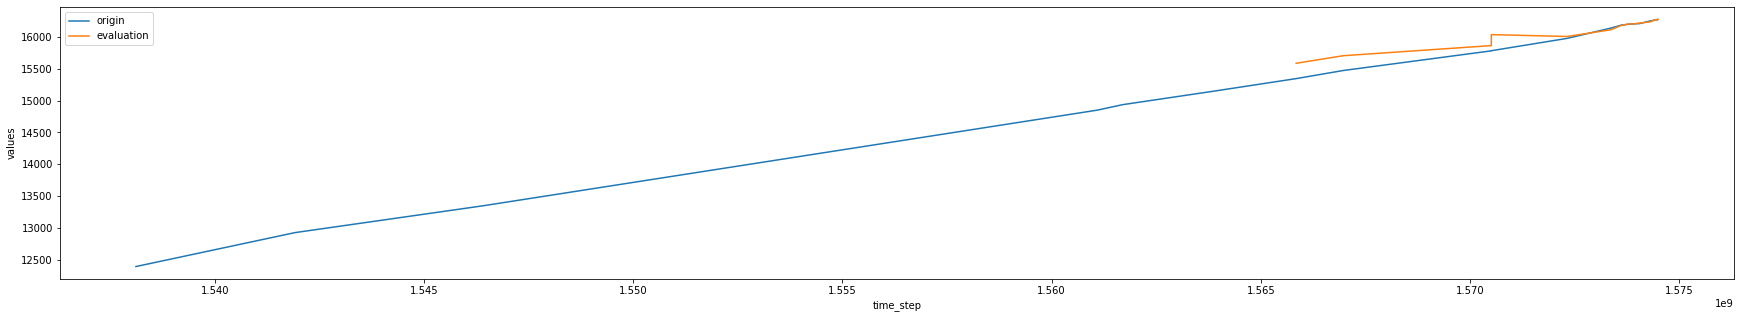

In [90]:
g = Github("d57d1988dd385e5b018cca5f5814c75e001c75de")
repo = g.get_repo("angular/angular-cli")
repo.name
pulls = repo.get_pulls(state='open', sort='created', base='master')
number_pulls_list = []
created_at_pulls_list = []
for pr in pulls:
   created_at_pulls_list = created_at_pulls_list + [datetime.date(pd.to_datetime(pr.created_at))]
   number_pulls_list = number_pulls_list + [int(pr.number)]
number_pulls_list
#print((number_pulls_list[1]))
pulls_df = DataFrame()
pulls_df['created_at'] = created_at_pulls_list
pulls_df['number'] = number_pulls_list
pulls_df.columns = ['ds', 'y']
print(pulls_df)
pulls_df.to_csv('angular_cli_pull.csv', sep=',', encoding='utf-8', index=False)

predict_plot_pulls('angular_cli_pull.csv')

In [92]:
print("d3_pull is not possible to plot")
#Empty DataFrame
#Columns: [ds, y]
#Index: []
#{'times': array([], dtype=float64), 'values': array([], dtype=float64)}

d3_pull is not possible to plot


In [106]:
#8-7-Plot the commits forecast
from github import Github
g = Github("d57d1988dd385e5b018cca5f5814c75e001c75de")

def commit_info(repoName):
   repo = g.get_repo(repoName)
   commits = repo.get_commits()
   created_at_commits_list = []
   for ct in commits:
       created_at_commits_list = created_at_commits_list + [datetime.date(pd.to_datetime(ct.commit.author.date))]
   commit_df = DataFrame()
   commit_df['created_at'] = created_at_commits_list
   return commit_df

def tensorflow_predict_plot_commits(file):
   df = pd.read_csv(file)
   df['ds'] = df['ds'].astype('datetime64[ns]')
   array = df.to_numpy()
   x = np.array([time.mktime(i[0].timetuple()) for i in array])
   y = np.array([i[1] for i in array])


   data = {
       tf.contrib.timeseries.TrainEvalFeatures.TIMES: x,
       tf.contrib.timeseries.TrainEvalFeatures.VALUES: y,
          }
   print (data)

   reader = NumpyReader(data)

   train_input_fn = tf.contrib.timeseries.RandomWindowInputFn(reader, batch_size = 7, window_size = 7)
   ar = tf.contrib.timeseries.ARRegressor(
        periodicities=200, input_window_size=6, output_window_size=1,
        num_features=1,
        loss=tf.contrib.timeseries.ARModel.NORMAL_LIKELIHOOD_LOSS)
   ar.train(input_fn=train_input_fn, steps=6000)
#evaluation
   evaluation_input_fn = tf.contrib.timeseries.WholeDatasetInputFn(reader)
   evaluation = ar.evaluate(input_fn=evaluation_input_fn, steps=1000)

#prediction
   (predictions,) = tuple(ar.predict(
        input_fn=tf.contrib.timeseries.predict_continuation_input_fn(
            evaluation, steps=365)))
#plot origin and evaluation for angular repo
   plt.figure(figsize=(30, 5))
   plt.plot(data['times'].reshape(-1), data['values'].reshape(-1), label='origin')
   plt.plot(evaluation['times'].reshape(-1), evaluation['mean'].reshape(-1), label='evaluation')
   plt.xlabel('time_step')
   plt.ylabel('values')
   plt.legend()
   plt.show()

def tensorflow_forecast_commits(new_df):
    c = new_df.groupby(['created_at'])['created_at']
    c1 = c.describe()
    temp = pd.DataFrame()
    temp = c1[['top', 'count']]
    temp.columns = ['ds', 'y']
    return temp


angular_commits_df = pd.DataFrame(commit_info('angular/angular'))
material_commits_df = pd.DataFrame(commit_info('angular/material'))
angular_cli_commits_df = pd.DataFrame(commit_info('angular/angular-cli'))
angular_googleMap_commits_df = pd.DataFrame(commit_info('SebastianM/angular-google-maps'))
d3_commits_df = pd.DataFrame(commit_info('d3/d3'))

angular_commits_tf_df = pd.DataFrame(tensorflow_forecast_commits(angular_commits_df))
material_commits_tf_df = pd.DataFrame(tensorflow_forecast_commits(material_commits_df))
angular_cli_commits_tf_df = pd.DataFrame(tensorflow_forecast_commits(angular_cli_commits_df))
angular_googleMap_commits_tf_df = pd.DataFrame(tensorflow_forecast_commits(angular_googleMap_commits_df))
d3_commits_tf_df = pd.DataFrame(tensorflow_forecast_commits(d3_commits_df))

angular_commits_tf_df.to_csv('angular_tf_commits.csv', sep = ',', encoding = 'utf-8', index = False)
material_commits_tf_df.to_csv('material_tf_commits.csv', sep = ',', encoding = 'utf-8', index = False)
angular_cli_commits_tf_df.to_csv('angular_cli_tf_commits.csv', sep = ',', encoding = 'utf-8', index = False)
angular_googleMap_commits_tf_df.to_csv('googleMaps_tf_commits.csv', sep = ',', encoding = 'utf-8', index = False)
d3_commits_tf_df.to_csv('d3_tf_commits.csv', sep = ',', encoding = 'utf-8', index = False)




{'times': array([1.4110164e+09, 1.4111028e+09, 1.4112756e+09, ..., 1.5742296e+09,
       1.5743160e+09, 1.5744024e+09]), 'values': array([ 2,  6,  1, ..., 10, 16,  7])}
INFO:tensorflow:Using default config.


INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Saeid\\AppData\\Local\\Temp\\tmp363xtkk1', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000259B0964A08>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Saeid\\AppData\\Local\\Temp\\tmp363xtkk1', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000259B0964A08>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Saeid\AppData\Local\Temp\tmp363xtkk1\model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Saeid\AppData\Local\Temp\tmp363xtkk1\model.ckpt.


INFO:tensorflow:loss = 2.4593074, step = 1


INFO:tensorflow:loss = 2.4593074, step = 1


INFO:tensorflow:global_step/sec: 332.433


INFO:tensorflow:global_step/sec: 332.433


INFO:tensorflow:loss = 1.2670071, step = 101 (0.302 sec)


INFO:tensorflow:loss = 1.2670071, step = 101 (0.302 sec)


INFO:tensorflow:global_step/sec: 699.733


INFO:tensorflow:global_step/sec: 699.733


INFO:tensorflow:loss = 1.2022526, step = 201 (0.143 sec)


INFO:tensorflow:loss = 1.2022526, step = 201 (0.143 sec)


INFO:tensorflow:global_step/sec: 730.378


INFO:tensorflow:global_step/sec: 730.378


INFO:tensorflow:loss = 1.0851057, step = 301 (0.138 sec)


INFO:tensorflow:loss = 1.0851057, step = 301 (0.138 sec)


INFO:tensorflow:global_step/sec: 741.196


INFO:tensorflow:global_step/sec: 741.196


INFO:tensorflow:loss = 1.2765498, step = 401 (0.134 sec)


INFO:tensorflow:loss = 1.2765498, step = 401 (0.134 sec)


INFO:tensorflow:global_step/sec: 714.731


INFO:tensorflow:global_step/sec: 714.731


INFO:tensorflow:loss = 1.118214, step = 501 (0.141 sec)


INFO:tensorflow:loss = 1.118214, step = 501 (0.141 sec)


INFO:tensorflow:global_step/sec: 690.082


INFO:tensorflow:global_step/sec: 690.082


INFO:tensorflow:loss = 1.2509632, step = 601 (0.145 sec)


INFO:tensorflow:loss = 1.2509632, step = 601 (0.145 sec)


INFO:tensorflow:global_step/sec: 735.75


INFO:tensorflow:global_step/sec: 735.75


INFO:tensorflow:loss = 1.2174917, step = 701 (0.136 sec)


INFO:tensorflow:loss = 1.2174917, step = 701 (0.136 sec)


INFO:tensorflow:global_step/sec: 787.886


INFO:tensorflow:global_step/sec: 787.886


INFO:tensorflow:loss = 1.2068899, step = 801 (0.128 sec)


INFO:tensorflow:loss = 1.2068899, step = 801 (0.128 sec)


INFO:tensorflow:global_step/sec: 694.87


INFO:tensorflow:global_step/sec: 694.87


INFO:tensorflow:loss = 1.3019559, step = 901 (0.146 sec)


INFO:tensorflow:loss = 1.3019559, step = 901 (0.146 sec)


INFO:tensorflow:global_step/sec: 730.385


INFO:tensorflow:global_step/sec: 730.385


INFO:tensorflow:loss = 1.0910276, step = 1001 (0.134 sec)


INFO:tensorflow:loss = 1.0910276, step = 1001 (0.134 sec)


INFO:tensorflow:global_step/sec: 690.078


INFO:tensorflow:global_step/sec: 690.078


INFO:tensorflow:loss = 1.4365529, step = 1101 (0.144 sec)


INFO:tensorflow:loss = 1.4365529, step = 1101 (0.144 sec)


INFO:tensorflow:global_step/sec: 709.661


INFO:tensorflow:global_step/sec: 709.661


INFO:tensorflow:loss = 1.19598, step = 1201 (0.142 sec)


INFO:tensorflow:loss = 1.19598, step = 1201 (0.142 sec)


INFO:tensorflow:global_step/sec: 676.092


INFO:tensorflow:global_step/sec: 676.092


INFO:tensorflow:loss = 1.2708069, step = 1301 (0.147 sec)


INFO:tensorflow:loss = 1.2708069, step = 1301 (0.147 sec)


INFO:tensorflow:global_step/sec: 667.073


INFO:tensorflow:global_step/sec: 667.073


INFO:tensorflow:loss = 1.2381535, step = 1401 (0.152 sec)


INFO:tensorflow:loss = 1.2381535, step = 1401 (0.152 sec)


INFO:tensorflow:global_step/sec: 719.877


INFO:tensorflow:global_step/sec: 719.877


INFO:tensorflow:loss = 1.2117523, step = 1501 (0.137 sec)


INFO:tensorflow:loss = 1.2117523, step = 1501 (0.137 sec)


INFO:tensorflow:global_step/sec: 714.731


INFO:tensorflow:global_step/sec: 714.731


INFO:tensorflow:loss = 1.1128472, step = 1601 (0.140 sec)


INFO:tensorflow:loss = 1.1128472, step = 1601 (0.140 sec)


INFO:tensorflow:global_step/sec: 763.826


INFO:tensorflow:global_step/sec: 763.826


INFO:tensorflow:loss = 1.1581993, step = 1701 (0.130 sec)


INFO:tensorflow:loss = 1.1581993, step = 1701 (0.130 sec)


INFO:tensorflow:global_step/sec: 787.892


INFO:tensorflow:global_step/sec: 787.892


INFO:tensorflow:loss = 1.2446113, step = 1801 (0.128 sec)


INFO:tensorflow:loss = 1.2446113, step = 1801 (0.128 sec)


INFO:tensorflow:global_step/sec: 685.355


INFO:tensorflow:global_step/sec: 685.355


INFO:tensorflow:loss = 1.2338417, step = 1901 (0.146 sec)


INFO:tensorflow:loss = 1.2338417, step = 1901 (0.146 sec)


INFO:tensorflow:global_step/sec: 676.091


INFO:tensorflow:global_step/sec: 676.091


INFO:tensorflow:loss = 1.2393482, step = 2001 (0.150 sec)


INFO:tensorflow:loss = 1.2393482, step = 2001 (0.150 sec)


INFO:tensorflow:global_step/sec: 763.837


INFO:tensorflow:global_step/sec: 763.837


INFO:tensorflow:loss = 1.1320481, step = 2101 (0.129 sec)


INFO:tensorflow:loss = 1.1320481, step = 2101 (0.129 sec)


INFO:tensorflow:global_step/sec: 840.857


INFO:tensorflow:global_step/sec: 840.857


INFO:tensorflow:loss = 1.2143368, step = 2201 (0.119 sec)


INFO:tensorflow:loss = 1.2143368, step = 2201 (0.119 sec)


INFO:tensorflow:global_step/sec: 667.08


INFO:tensorflow:global_step/sec: 667.08


INFO:tensorflow:loss = 1.0987085, step = 2301 (0.152 sec)


INFO:tensorflow:loss = 1.0987085, step = 2301 (0.152 sec)


INFO:tensorflow:global_step/sec: 662.654


INFO:tensorflow:global_step/sec: 662.654


INFO:tensorflow:loss = 1.1759982, step = 2401 (0.149 sec)


INFO:tensorflow:loss = 1.1759982, step = 2401 (0.149 sec)


INFO:tensorflow:global_step/sec: 793.931


INFO:tensorflow:global_step/sec: 793.931


INFO:tensorflow:loss = 1.2074418, step = 2501 (0.126 sec)


INFO:tensorflow:loss = 1.2074418, step = 2501 (0.126 sec)


INFO:tensorflow:global_step/sec: 800.718


INFO:tensorflow:global_step/sec: 800.718


INFO:tensorflow:loss = 1.1116724, step = 2601 (0.125 sec)


INFO:tensorflow:loss = 1.1116724, step = 2601 (0.125 sec)


INFO:tensorflow:global_step/sec: 813.512


INFO:tensorflow:global_step/sec: 813.512


INFO:tensorflow:loss = 1.166734, step = 2701 (0.123 sec)


INFO:tensorflow:loss = 1.166734, step = 2701 (0.123 sec)


INFO:tensorflow:global_step/sec: 637.333


INFO:tensorflow:global_step/sec: 637.333


INFO:tensorflow:loss = 1.2561287, step = 2801 (0.159 sec)


INFO:tensorflow:loss = 1.2561287, step = 2801 (0.159 sec)


INFO:tensorflow:global_step/sec: 694.877


INFO:tensorflow:global_step/sec: 694.877


INFO:tensorflow:loss = 1.0970656, step = 2901 (0.142 sec)


INFO:tensorflow:loss = 1.0970656, step = 2901 (0.142 sec)


INFO:tensorflow:global_step/sec: 730.379


INFO:tensorflow:global_step/sec: 730.379


INFO:tensorflow:loss = 1.0894079, step = 3001 (0.139 sec)


INFO:tensorflow:loss = 1.0894079, step = 3001 (0.139 sec)


INFO:tensorflow:global_step/sec: 794.141


INFO:tensorflow:global_step/sec: 794.141


INFO:tensorflow:loss = 1.1815952, step = 3101 (0.124 sec)


INFO:tensorflow:loss = 1.1815952, step = 3101 (0.124 sec)


INFO:tensorflow:global_step/sec: 781.733


INFO:tensorflow:global_step/sec: 781.733


INFO:tensorflow:loss = 1.5680825, step = 3201 (0.128 sec)


INFO:tensorflow:loss = 1.5680825, step = 3201 (0.128 sec)


INFO:tensorflow:global_step/sec: 775.673


INFO:tensorflow:global_step/sec: 775.673


INFO:tensorflow:loss = 1.1844796, step = 3301 (0.129 sec)


INFO:tensorflow:loss = 1.1844796, step = 3301 (0.129 sec)


INFO:tensorflow:global_step/sec: 714.729


INFO:tensorflow:global_step/sec: 714.729


INFO:tensorflow:loss = 1.0456476, step = 3401 (0.141 sec)


INFO:tensorflow:loss = 1.0456476, step = 3401 (0.141 sec)


INFO:tensorflow:global_step/sec: 685.349


INFO:tensorflow:global_step/sec: 685.349


INFO:tensorflow:loss = 1.2770629, step = 3501 (0.146 sec)


INFO:tensorflow:loss = 1.2770629, step = 3501 (0.146 sec)


INFO:tensorflow:global_step/sec: 704.668


INFO:tensorflow:global_step/sec: 704.668


INFO:tensorflow:loss = 1.4086918, step = 3601 (0.141 sec)


INFO:tensorflow:loss = 1.4086918, step = 3601 (0.141 sec)


INFO:tensorflow:global_step/sec: 730.373


INFO:tensorflow:global_step/sec: 730.373


INFO:tensorflow:loss = 1.0642924, step = 3701 (0.138 sec)


INFO:tensorflow:loss = 1.0642924, step = 3701 (0.138 sec)


INFO:tensorflow:global_step/sec: 709.662


INFO:tensorflow:global_step/sec: 709.662


INFO:tensorflow:loss = 1.1654167, step = 3801 (0.140 sec)


INFO:tensorflow:loss = 1.1654167, step = 3801 (0.140 sec)


INFO:tensorflow:global_step/sec: 699.735


INFO:tensorflow:global_step/sec: 699.735


INFO:tensorflow:loss = 1.2533251, step = 3901 (0.143 sec)


INFO:tensorflow:loss = 1.2533251, step = 3901 (0.143 sec)


INFO:tensorflow:global_step/sec: 746.723


INFO:tensorflow:global_step/sec: 746.723


INFO:tensorflow:loss = 1.2710994, step = 4001 (0.134 sec)


INFO:tensorflow:loss = 1.2710994, step = 4001 (0.134 sec)


INFO:tensorflow:global_step/sec: 725.09


INFO:tensorflow:global_step/sec: 725.09


INFO:tensorflow:loss = 1.2528579, step = 4101 (0.138 sec)


INFO:tensorflow:loss = 1.2528579, step = 4101 (0.138 sec)


INFO:tensorflow:global_step/sec: 610.132


INFO:tensorflow:global_step/sec: 610.132


INFO:tensorflow:loss = 1.140607, step = 4201 (0.166 sec)


INFO:tensorflow:loss = 1.140607, step = 4201 (0.166 sec)


INFO:tensorflow:global_step/sec: 752.34


INFO:tensorflow:global_step/sec: 752.34


INFO:tensorflow:loss = 1.3942808, step = 4301 (0.132 sec)


INFO:tensorflow:loss = 1.3942808, step = 4301 (0.132 sec)


INFO:tensorflow:global_step/sec: 735.756


INFO:tensorflow:global_step/sec: 735.756


INFO:tensorflow:loss = 1.265015, step = 4401 (0.135 sec)


INFO:tensorflow:loss = 1.265015, step = 4401 (0.135 sec)


INFO:tensorflow:global_step/sec: 787.888


INFO:tensorflow:global_step/sec: 787.888


INFO:tensorflow:loss = 1.1169069, step = 4501 (0.127 sec)


INFO:tensorflow:loss = 1.1169069, step = 4501 (0.127 sec)


INFO:tensorflow:global_step/sec: 735.75


INFO:tensorflow:global_step/sec: 735.75


INFO:tensorflow:loss = 1.171822, step = 4601 (0.137 sec)


INFO:tensorflow:loss = 1.171822, step = 4601 (0.137 sec)


INFO:tensorflow:global_step/sec: 719.869


INFO:tensorflow:global_step/sec: 719.869


INFO:tensorflow:loss = 1.2059188, step = 4701 (0.139 sec)


INFO:tensorflow:loss = 1.2059188, step = 4701 (0.139 sec)


INFO:tensorflow:global_step/sec: 725.081


INFO:tensorflow:global_step/sec: 725.081


INFO:tensorflow:loss = 1.1181164, step = 4801 (0.137 sec)


INFO:tensorflow:loss = 1.1181164, step = 4801 (0.137 sec)


INFO:tensorflow:global_step/sec: 758.048


INFO:tensorflow:global_step/sec: 758.048


INFO:tensorflow:loss = 1.2393587, step = 4901 (0.133 sec)


INFO:tensorflow:loss = 1.2393587, step = 4901 (0.133 sec)


INFO:tensorflow:global_step/sec: 690.085


INFO:tensorflow:global_step/sec: 690.085


INFO:tensorflow:loss = 1.2953744, step = 5001 (0.145 sec)


INFO:tensorflow:loss = 1.2953744, step = 5001 (0.145 sec)


INFO:tensorflow:global_step/sec: 741.198


INFO:tensorflow:global_step/sec: 741.198


INFO:tensorflow:loss = 1.2578294, step = 5101 (0.135 sec)


INFO:tensorflow:loss = 1.2578294, step = 5101 (0.135 sec)


INFO:tensorflow:global_step/sec: 694.872


INFO:tensorflow:global_step/sec: 694.872


INFO:tensorflow:loss = 1.5287796, step = 5201 (0.144 sec)


INFO:tensorflow:loss = 1.5287796, step = 5201 (0.144 sec)


INFO:tensorflow:global_step/sec: 735.751


INFO:tensorflow:global_step/sec: 735.751


INFO:tensorflow:loss = 1.1599, step = 5301 (0.135 sec)


INFO:tensorflow:loss = 1.1599, step = 5301 (0.135 sec)


INFO:tensorflow:global_step/sec: 806.948


INFO:tensorflow:global_step/sec: 806.948


INFO:tensorflow:loss = 1.1055216, step = 5401 (0.123 sec)


INFO:tensorflow:loss = 1.1055216, step = 5401 (0.123 sec)


INFO:tensorflow:global_step/sec: 725.086


INFO:tensorflow:global_step/sec: 725.086


INFO:tensorflow:loss = 1.3337595, step = 5501 (0.140 sec)


INFO:tensorflow:loss = 1.3337595, step = 5501 (0.140 sec)


INFO:tensorflow:global_step/sec: 699.738


INFO:tensorflow:global_step/sec: 699.738


INFO:tensorflow:loss = 1.3002713, step = 5601 (0.176 sec)


INFO:tensorflow:loss = 1.3002713, step = 5601 (0.176 sec)


INFO:tensorflow:global_step/sec: 630.35


INFO:tensorflow:global_step/sec: 630.35


INFO:tensorflow:loss = 1.221492, step = 5701 (0.125 sec)


INFO:tensorflow:loss = 1.221492, step = 5701 (0.125 sec)


INFO:tensorflow:global_step/sec: 833.848


INFO:tensorflow:global_step/sec: 833.848


INFO:tensorflow:loss = 1.4333746, step = 5801 (0.120 sec)


INFO:tensorflow:loss = 1.4333746, step = 5801 (0.120 sec)


INFO:tensorflow:global_step/sec: 769.706


INFO:tensorflow:global_step/sec: 769.706


INFO:tensorflow:loss = 1.2642004, step = 5901 (0.130 sec)


INFO:tensorflow:loss = 1.2642004, step = 5901 (0.130 sec)


INFO:tensorflow:Saving checkpoints for 6000 into C:\Users\Saeid\AppData\Local\Temp\tmp363xtkk1\model.ckpt.


INFO:tensorflow:Saving checkpoints for 6000 into C:\Users\Saeid\AppData\Local\Temp\tmp363xtkk1\model.ckpt.


INFO:tensorflow:Loss for final step: 1.4607452.


INFO:tensorflow:Loss for final step: 1.4607452.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2019-11-24T09:07:26Z


INFO:tensorflow:Starting evaluation at 2019-11-24T09:07:26Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmp363xtkk1\model.ckpt-6000


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmp363xtkk1\model.ckpt-6000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Evaluation [100/1000]


INFO:tensorflow:Evaluation [100/1000]


INFO:tensorflow:Evaluation [200/1000]


INFO:tensorflow:Evaluation [200/1000]


INFO:tensorflow:Evaluation [300/1000]


INFO:tensorflow:Evaluation [300/1000]


INFO:tensorflow:Evaluation [400/1000]


INFO:tensorflow:Evaluation [400/1000]


INFO:tensorflow:Evaluation [500/1000]


INFO:tensorflow:Evaluation [500/1000]


INFO:tensorflow:Evaluation [600/1000]


INFO:tensorflow:Evaluation [600/1000]


INFO:tensorflow:Evaluation [700/1000]


INFO:tensorflow:Evaluation [700/1000]


INFO:tensorflow:Evaluation [800/1000]


INFO:tensorflow:Evaluation [800/1000]


INFO:tensorflow:Evaluation [900/1000]


INFO:tensorflow:Evaluation [900/1000]


INFO:tensorflow:Evaluation [1000/1000]


INFO:tensorflow:Evaluation [1000/1000]


INFO:tensorflow:Finished evaluation at 2019-11-24-09:10:22


INFO:tensorflow:Finished evaluation at 2019-11-24-09:10:22


INFO:tensorflow:Saving dict for global step 6000: average_loss = 1.2516994, covariance = [[[44.747864]
  [42.392845]
  [31.032484]
  ...
  [47.48696 ]
  [93.6379  ]
  [97.04132 ]]], global_step = 6000, loss = 1.2516994, mean = [[[ 7.5046835]
  [ 5.9844847]
  [ 3.8718805]
  ...
  [ 7.291778 ]
  [12.499758 ]
  [14.087955 ]]], observed = [[[ 3.]
  [ 2.]
  [ 3.]
  ...
  [10.]
  [16.]
  [ 7.]]], start_tuple = (array([[1573970400, 1574056800, 1574143200, 1574229600, 1574316000,
        1574402400]], dtype=int64), array([[[-1.2142231 ],
        [ 0.8249876 ],
        [-1.2142231 ],
        [ 0.09669804],
        [ 0.9706455 ],
        [-0.3402757 ]]], dtype=float32), array([], shape=(1, 6, 0), dtype=float32)), times = [[1411794000 1411880400 1411966800 ... 1574229600 1574316000 1574402400]]


INFO:tensorflow:Saving dict for global step 6000: average_loss = 1.2516994, covariance = [[[44.747864]
  [42.392845]
  [31.032484]
  ...
  [47.48696 ]
  [93.6379  ]
  [97.04132 ]]], global_step = 6000, loss = 1.2516994, mean = [[[ 7.5046835]
  [ 5.9844847]
  [ 3.8718805]
  ...
  [ 7.291778 ]
  [12.499758 ]
  [14.087955 ]]], observed = [[[ 3.]
  [ 2.]
  [ 3.]
  ...
  [10.]
  [16.]
  [ 7.]]], start_tuple = (array([[1573970400, 1574056800, 1574143200, 1574229600, 1574316000,
        1574402400]], dtype=int64), array([[[-1.2142231 ],
        [ 0.8249876 ],
        [-1.2142231 ],
        [ 0.09669804],
        [ 0.9706455 ],
        [-0.3402757 ]]], dtype=float32), array([], shape=(1, 6, 0), dtype=float32)), times = [[1411794000 1411880400 1411966800 ... 1574229600 1574316000 1574402400]]


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6000: C:\Users\Saeid\AppData\Local\Temp\tmp363xtkk1\model.ckpt-6000


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6000: C:\Users\Saeid\AppData\Local\Temp\tmp363xtkk1\model.ckpt-6000


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmp363xtkk1\model.ckpt-6000


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmp363xtkk1\model.ckpt-6000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


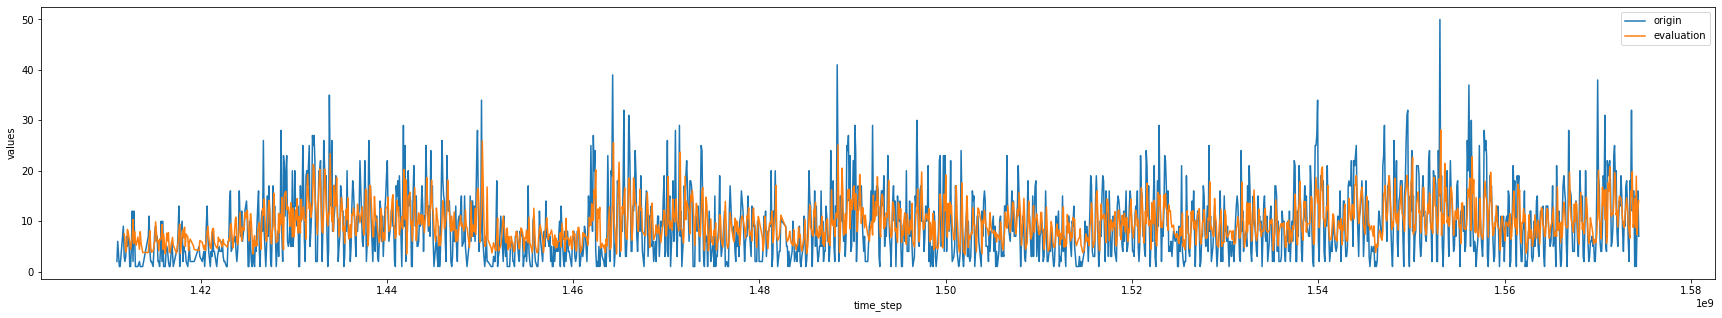

In [111]:
#plotting for angular repo
tensorflow_predict_plot_commits('angular_tf_commits.csv')

{'times': array([1.4041908e+09, 1.4042772e+09, 1.4043636e+09, 1.4044500e+09,
       1.4046228e+09, 1.4047092e+09, 1.4047956e+09, 1.4048820e+09,
       1.4049684e+09, 1.4050548e+09, 1.4051412e+09, 1.4053140e+09,
       1.4054004e+09, 1.4054868e+09, 1.4055732e+09, 1.4056596e+09,
       1.4058324e+09, 1.4059188e+09, 1.4060052e+09, 1.4060916e+09,
       1.4061780e+09, 1.4062644e+09, 1.4063508e+09, 1.4064372e+09,
       1.4067828e+09, 1.4068692e+09, 1.4069556e+09, 1.4070420e+09,
       1.4071284e+09, 1.4072148e+09, 1.4073012e+09, 1.4073876e+09,
       1.4074740e+09, 1.4075604e+09, 1.4078196e+09, 1.4079060e+09,
       1.4079924e+09, 1.4080788e+09, 1.4081652e+09, 1.4082516e+09,
       1.4083380e+09, 1.4084244e+09, 1.4085108e+09, 1.4085972e+09,
       1.4089428e+09, 1.4090292e+09, 1.4091156e+09, 1.4092020e+09,
       1.4092884e+09, 1.4093748e+09, 1.4094612e+09, 1.4096340e+09,
       1.4097204e+09, 1.4098068e+09, 1.4098932e+09, 1.4100660e+09,
       1.4101524e+09, 1.4102388e+09, 1.4103252e+09, 

INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Saeid\\AppData\\Local\\Temp\\tmp4ck7n12_', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000259B073E388>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Saeid\\AppData\\Local\\Temp\\tmp4ck7n12_', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000259B073E388>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Saeid\AppData\Local\Temp\tmp4ck7n12_\model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Saeid\AppData\Local\Temp\tmp4ck7n12_\model.ckpt.


INFO:tensorflow:loss = 2.316269, step = 1


INFO:tensorflow:loss = 2.316269, step = 1


INFO:tensorflow:global_step/sec: 335.778


INFO:tensorflow:global_step/sec: 335.778


INFO:tensorflow:loss = 1.2625868, step = 101 (0.300 sec)


INFO:tensorflow:loss = 1.2625868, step = 101 (0.300 sec)


INFO:tensorflow:global_step/sec: 719.866


INFO:tensorflow:global_step/sec: 719.866


INFO:tensorflow:loss = 1.1030244, step = 201 (0.140 sec)


INFO:tensorflow:loss = 1.1030244, step = 201 (0.140 sec)


INFO:tensorflow:global_step/sec: 741.202


INFO:tensorflow:global_step/sec: 741.202


INFO:tensorflow:loss = 1.1145321, step = 301 (0.135 sec)


INFO:tensorflow:loss = 1.1145321, step = 301 (0.135 sec)


INFO:tensorflow:global_step/sec: 694.877


INFO:tensorflow:global_step/sec: 694.877


INFO:tensorflow:loss = 1.1653788, step = 401 (0.144 sec)


INFO:tensorflow:loss = 1.1653788, step = 401 (0.144 sec)


INFO:tensorflow:global_step/sec: 787.891


INFO:tensorflow:global_step/sec: 787.891


INFO:tensorflow:loss = 1.1437764, step = 501 (0.127 sec)


INFO:tensorflow:loss = 1.1437764, step = 501 (0.127 sec)


INFO:tensorflow:global_step/sec: 758.043


INFO:tensorflow:global_step/sec: 758.043


INFO:tensorflow:loss = 1.0566195, step = 601 (0.132 sec)


INFO:tensorflow:loss = 1.0566195, step = 601 (0.132 sec)


INFO:tensorflow:global_step/sec: 694.873


INFO:tensorflow:global_step/sec: 694.873


INFO:tensorflow:loss = 1.375664, step = 701 (0.144 sec)


INFO:tensorflow:loss = 1.375664, step = 701 (0.144 sec)


INFO:tensorflow:global_step/sec: 725.087


INFO:tensorflow:global_step/sec: 725.087


INFO:tensorflow:loss = 1.1750922, step = 801 (0.137 sec)


INFO:tensorflow:loss = 1.1750922, step = 801 (0.137 sec)


INFO:tensorflow:global_step/sec: 763.831


INFO:tensorflow:global_step/sec: 763.831


INFO:tensorflow:loss = 1.0198622, step = 901 (0.132 sec)


INFO:tensorflow:loss = 1.0198622, step = 901 (0.132 sec)


INFO:tensorflow:global_step/sec: 746.727


INFO:tensorflow:global_step/sec: 746.727


INFO:tensorflow:loss = 1.2091098, step = 1001 (0.134 sec)


INFO:tensorflow:loss = 1.2091098, step = 1001 (0.134 sec)


INFO:tensorflow:global_step/sec: 714.729


INFO:tensorflow:global_step/sec: 714.729


INFO:tensorflow:loss = 1.3613876, step = 1101 (0.139 sec)


INFO:tensorflow:loss = 1.3613876, step = 1101 (0.139 sec)


INFO:tensorflow:global_step/sec: 649.751


INFO:tensorflow:global_step/sec: 649.751


INFO:tensorflow:loss = 1.1527656, step = 1201 (0.154 sec)


INFO:tensorflow:loss = 1.1527656, step = 1201 (0.154 sec)


INFO:tensorflow:global_step/sec: 649.747


INFO:tensorflow:global_step/sec: 649.747


INFO:tensorflow:loss = 1.1097049, step = 1301 (0.154 sec)


INFO:tensorflow:loss = 1.1097049, step = 1301 (0.154 sec)


INFO:tensorflow:global_step/sec: 585.154


INFO:tensorflow:global_step/sec: 585.154


INFO:tensorflow:loss = 1.0231564, step = 1401 (0.178 sec)


INFO:tensorflow:loss = 1.0231564, step = 1401 (0.178 sec)


INFO:tensorflow:global_step/sec: 621.511


INFO:tensorflow:global_step/sec: 621.511


INFO:tensorflow:loss = 1.2243792, step = 1501 (0.155 sec)


INFO:tensorflow:loss = 1.2243792, step = 1501 (0.155 sec)


INFO:tensorflow:global_step/sec: 676.095


INFO:tensorflow:global_step/sec: 676.095


INFO:tensorflow:loss = 1.1582353, step = 1601 (0.148 sec)


INFO:tensorflow:loss = 1.1582353, step = 1601 (0.148 sec)


INFO:tensorflow:global_step/sec: 719.871


INFO:tensorflow:global_step/sec: 719.871


INFO:tensorflow:loss = 3.5890536, step = 1701 (0.140 sec)


INFO:tensorflow:loss = 3.5890536, step = 1701 (0.140 sec)


INFO:tensorflow:global_step/sec: 617.663


INFO:tensorflow:global_step/sec: 617.663


INFO:tensorflow:loss = 1.7009541, step = 1801 (0.163 sec)


INFO:tensorflow:loss = 1.7009541, step = 1801 (0.163 sec)


INFO:tensorflow:global_step/sec: 730.383


INFO:tensorflow:global_step/sec: 730.383


INFO:tensorflow:loss = 1.0551965, step = 1901 (0.135 sec)


INFO:tensorflow:loss = 1.0551965, step = 1901 (0.135 sec)


INFO:tensorflow:global_step/sec: 806.938


INFO:tensorflow:global_step/sec: 806.938


INFO:tensorflow:loss = 1.1072917, step = 2001 (0.124 sec)


INFO:tensorflow:loss = 1.1072917, step = 2001 (0.124 sec)


INFO:tensorflow:global_step/sec: 690.089


INFO:tensorflow:global_step/sec: 690.089


INFO:tensorflow:loss = 1.6289743, step = 2101 (0.145 sec)


INFO:tensorflow:loss = 1.6289743, step = 2101 (0.145 sec)


INFO:tensorflow:global_step/sec: 725.087


INFO:tensorflow:global_step/sec: 725.087


INFO:tensorflow:loss = 1.0579875, step = 2201 (0.138 sec)


INFO:tensorflow:loss = 1.0579875, step = 2201 (0.138 sec)


INFO:tensorflow:global_step/sec: 653.999


INFO:tensorflow:global_step/sec: 653.999


INFO:tensorflow:loss = 1.2187316, step = 2301 (0.153 sec)


INFO:tensorflow:loss = 1.2187316, step = 2301 (0.153 sec)


INFO:tensorflow:global_step/sec: 676.092


INFO:tensorflow:global_step/sec: 676.092


INFO:tensorflow:loss = 0.99568737, step = 2401 (0.148 sec)


INFO:tensorflow:loss = 0.99568737, step = 2401 (0.148 sec)


INFO:tensorflow:global_step/sec: 680.695


INFO:tensorflow:global_step/sec: 680.695


INFO:tensorflow:loss = 1.1895869, step = 2501 (0.147 sec)


INFO:tensorflow:loss = 1.1895869, step = 2501 (0.147 sec)


INFO:tensorflow:global_step/sec: 714.729


INFO:tensorflow:global_step/sec: 714.729


INFO:tensorflow:loss = 1.1294379, step = 2601 (0.140 sec)


INFO:tensorflow:loss = 1.1294379, step = 2601 (0.140 sec)


INFO:tensorflow:global_step/sec: 719.864


INFO:tensorflow:global_step/sec: 719.864


INFO:tensorflow:loss = 1.1629332, step = 2701 (0.138 sec)


INFO:tensorflow:loss = 1.1629332, step = 2701 (0.138 sec)


INFO:tensorflow:global_step/sec: 654.002


INFO:tensorflow:global_step/sec: 654.002


INFO:tensorflow:loss = 1.1671098, step = 2801 (0.153 sec)


INFO:tensorflow:loss = 1.1671098, step = 2801 (0.153 sec)


INFO:tensorflow:global_step/sec: 641.418


INFO:tensorflow:global_step/sec: 641.418


INFO:tensorflow:loss = 1.262177, step = 2901 (0.158 sec)


INFO:tensorflow:loss = 1.262177, step = 2901 (0.158 sec)


INFO:tensorflow:global_step/sec: 758.051


INFO:tensorflow:global_step/sec: 758.051


INFO:tensorflow:loss = 1.445131, step = 3001 (0.131 sec)


INFO:tensorflow:loss = 1.445131, step = 3001 (0.131 sec)


INFO:tensorflow:global_step/sec: 794.141


INFO:tensorflow:global_step/sec: 794.141


INFO:tensorflow:loss = 1.2806354, step = 3101 (0.126 sec)


INFO:tensorflow:loss = 1.2806354, step = 3101 (0.126 sec)


INFO:tensorflow:global_step/sec: 709.658


INFO:tensorflow:global_step/sec: 709.658


INFO:tensorflow:loss = 4.0305367, step = 3201 (0.142 sec)


INFO:tensorflow:loss = 4.0305367, step = 3201 (0.142 sec)


INFO:tensorflow:global_step/sec: 752.346


INFO:tensorflow:global_step/sec: 752.346


INFO:tensorflow:loss = 1.385062, step = 3301 (0.132 sec)


INFO:tensorflow:loss = 1.385062, step = 3301 (0.132 sec)


INFO:tensorflow:global_step/sec: 730.371


INFO:tensorflow:global_step/sec: 730.371


INFO:tensorflow:loss = 1.0605896, step = 3401 (0.138 sec)


INFO:tensorflow:loss = 1.0605896, step = 3401 (0.138 sec)


INFO:tensorflow:global_step/sec: 658.306


INFO:tensorflow:global_step/sec: 658.306


INFO:tensorflow:loss = 1.5455232, step = 3501 (0.152 sec)


INFO:tensorflow:loss = 1.5455232, step = 3501 (0.152 sec)


INFO:tensorflow:global_step/sec: 676.087


INFO:tensorflow:global_step/sec: 676.087


INFO:tensorflow:loss = 1.8332036, step = 3601 (0.146 sec)


INFO:tensorflow:loss = 1.8332036, step = 3601 (0.146 sec)


INFO:tensorflow:global_step/sec: 680.702


INFO:tensorflow:global_step/sec: 680.702


INFO:tensorflow:loss = 1.1087356, step = 3701 (0.148 sec)


INFO:tensorflow:loss = 1.1087356, step = 3701 (0.148 sec)


INFO:tensorflow:global_step/sec: 694.873


INFO:tensorflow:global_step/sec: 694.873


INFO:tensorflow:loss = 1.0981636, step = 3801 (0.143 sec)


INFO:tensorflow:loss = 1.0981636, step = 3801 (0.143 sec)


INFO:tensorflow:global_step/sec: 694.868


INFO:tensorflow:global_step/sec: 694.868


INFO:tensorflow:loss = 1.0693265, step = 3901 (0.146 sec)


INFO:tensorflow:loss = 1.0693265, step = 3901 (0.146 sec)


INFO:tensorflow:global_step/sec: 680.698


INFO:tensorflow:global_step/sec: 680.698


INFO:tensorflow:loss = 1.4537022, step = 4001 (0.146 sec)


INFO:tensorflow:loss = 1.4537022, step = 4001 (0.146 sec)


INFO:tensorflow:global_step/sec: 649.747


INFO:tensorflow:global_step/sec: 649.747


INFO:tensorflow:loss = 1.100674, step = 4101 (0.155 sec)


INFO:tensorflow:loss = 1.100674, step = 4101 (0.155 sec)


INFO:tensorflow:global_step/sec: 725.092


INFO:tensorflow:global_step/sec: 725.092


INFO:tensorflow:loss = 1.1353097, step = 4201 (0.136 sec)


INFO:tensorflow:loss = 1.1353097, step = 4201 (0.136 sec)


INFO:tensorflow:global_step/sec: 725.08


INFO:tensorflow:global_step/sec: 725.08


INFO:tensorflow:loss = 1.1304369, step = 4301 (0.141 sec)


INFO:tensorflow:loss = 1.1304369, step = 4301 (0.141 sec)


INFO:tensorflow:global_step/sec: 775.682


INFO:tensorflow:global_step/sec: 775.682


INFO:tensorflow:loss = 1.0371999, step = 4401 (0.127 sec)


INFO:tensorflow:loss = 1.0371999, step = 4401 (0.127 sec)


INFO:tensorflow:global_step/sec: 813.509


INFO:tensorflow:global_step/sec: 813.509


INFO:tensorflow:loss = 1.4679906, step = 4501 (0.122 sec)


INFO:tensorflow:loss = 1.4679906, step = 4501 (0.122 sec)


INFO:tensorflow:global_step/sec: 735.755


INFO:tensorflow:global_step/sec: 735.755


INFO:tensorflow:loss = 1.1499047, step = 4601 (0.137 sec)


INFO:tensorflow:loss = 1.1499047, step = 4601 (0.137 sec)


INFO:tensorflow:global_step/sec: 746.723


INFO:tensorflow:global_step/sec: 746.723


INFO:tensorflow:loss = 1.037464, step = 4701 (0.133 sec)


INFO:tensorflow:loss = 1.037464, step = 4701 (0.133 sec)


INFO:tensorflow:global_step/sec: 769.709


INFO:tensorflow:global_step/sec: 769.709


INFO:tensorflow:loss = 1.2334268, step = 4801 (0.131 sec)


INFO:tensorflow:loss = 1.2334268, step = 4801 (0.131 sec)


INFO:tensorflow:global_step/sec: 781.736


INFO:tensorflow:global_step/sec: 781.736


INFO:tensorflow:loss = 1.246679, step = 4901 (0.127 sec)


INFO:tensorflow:loss = 1.246679, step = 4901 (0.127 sec)


INFO:tensorflow:global_step/sec: 758.043


INFO:tensorflow:global_step/sec: 758.043


INFO:tensorflow:loss = 1.1118262, step = 5001 (0.132 sec)


INFO:tensorflow:loss = 1.1118262, step = 5001 (0.132 sec)


INFO:tensorflow:global_step/sec: 775.671


INFO:tensorflow:global_step/sec: 775.671


INFO:tensorflow:loss = 1.1342483, step = 5101 (0.130 sec)


INFO:tensorflow:loss = 1.1342483, step = 5101 (0.130 sec)


INFO:tensorflow:global_step/sec: 719.875


INFO:tensorflow:global_step/sec: 719.875


INFO:tensorflow:loss = 1.0343262, step = 5201 (0.138 sec)


INFO:tensorflow:loss = 1.0343262, step = 5201 (0.138 sec)


INFO:tensorflow:global_step/sec: 752.343


INFO:tensorflow:global_step/sec: 752.343


INFO:tensorflow:loss = 1.5406419, step = 5301 (0.135 sec)


INFO:tensorflow:loss = 1.5406419, step = 5301 (0.135 sec)


INFO:tensorflow:global_step/sec: 725.085


INFO:tensorflow:global_step/sec: 725.085


INFO:tensorflow:loss = 1.1479578, step = 5401 (0.137 sec)


INFO:tensorflow:loss = 1.1479578, step = 5401 (0.137 sec)


INFO:tensorflow:global_step/sec: 730.378


INFO:tensorflow:global_step/sec: 730.378


INFO:tensorflow:loss = 1.1745772, step = 5501 (0.137 sec)


INFO:tensorflow:loss = 1.1745772, step = 5501 (0.137 sec)


INFO:tensorflow:global_step/sec: 758.046


INFO:tensorflow:global_step/sec: 758.046


INFO:tensorflow:loss = 1.1619899, step = 5601 (0.131 sec)


INFO:tensorflow:loss = 1.1619899, step = 5601 (0.131 sec)


INFO:tensorflow:global_step/sec: 654.001


INFO:tensorflow:global_step/sec: 654.001


INFO:tensorflow:loss = 1.2443926, step = 5701 (0.154 sec)


INFO:tensorflow:loss = 1.2443926, step = 5701 (0.154 sec)


INFO:tensorflow:global_step/sec: 758.041


INFO:tensorflow:global_step/sec: 758.041


INFO:tensorflow:loss = 1.29901, step = 5801 (0.132 sec)


INFO:tensorflow:loss = 1.29901, step = 5801 (0.132 sec)


INFO:tensorflow:global_step/sec: 775.677


INFO:tensorflow:global_step/sec: 775.677


INFO:tensorflow:loss = 1.2696309, step = 5901 (0.128 sec)


INFO:tensorflow:loss = 1.2696309, step = 5901 (0.128 sec)


INFO:tensorflow:Saving checkpoints for 6000 into C:\Users\Saeid\AppData\Local\Temp\tmp4ck7n12_\model.ckpt.


INFO:tensorflow:Saving checkpoints for 6000 into C:\Users\Saeid\AppData\Local\Temp\tmp4ck7n12_\model.ckpt.


INFO:tensorflow:Loss for final step: 1.2561378.


INFO:tensorflow:Loss for final step: 1.2561378.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2019-11-24T09:11:43Z


INFO:tensorflow:Starting evaluation at 2019-11-24T09:11:43Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmp4ck7n12_\model.ckpt-6000


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmp4ck7n12_\model.ckpt-6000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Evaluation [100/1000]


INFO:tensorflow:Evaluation [100/1000]


INFO:tensorflow:Evaluation [200/1000]


INFO:tensorflow:Evaluation [200/1000]


INFO:tensorflow:Evaluation [300/1000]


INFO:tensorflow:Evaluation [300/1000]


INFO:tensorflow:Evaluation [400/1000]


INFO:tensorflow:Evaluation [400/1000]


INFO:tensorflow:Evaluation [500/1000]


INFO:tensorflow:Evaluation [500/1000]


INFO:tensorflow:Evaluation [600/1000]


INFO:tensorflow:Evaluation [600/1000]


INFO:tensorflow:Evaluation [700/1000]


INFO:tensorflow:Evaluation [700/1000]


INFO:tensorflow:Evaluation [800/1000]


INFO:tensorflow:Evaluation [800/1000]


INFO:tensorflow:Evaluation [900/1000]


INFO:tensorflow:Evaluation [900/1000]


INFO:tensorflow:Evaluation [1000/1000]


INFO:tensorflow:Evaluation [1000/1000]


INFO:tensorflow:Finished evaluation at 2019-11-24-09:13:12


INFO:tensorflow:Finished evaluation at 2019-11-24-09:13:12


INFO:tensorflow:Saving dict for global step 6000: average_loss = 1.247683, covariance = [[[  35.26507 ]
  [  64.015854]
  [  27.231354]
  [  83.60616 ]
  [  38.857742]
  [  33.569626]
  [  48.56054 ]
  [  29.603931]
  [  36.47693 ]
  [  29.745794]
  [  31.082462]
  [  24.054926]
  [  27.816366]
  [  29.204067]
  [  23.032772]
  [  29.211845]
  [  42.93536 ]
  [  25.807365]
  [  26.679968]
  [  39.837437]
  [ 162.5773  ]
  [  39.49873 ]
  [  28.178797]
  [ 141.37296 ]
  [  60.020447]
  [  37.966125]
  [  48.86184 ]
  [  39.391308]
  [  34.12172 ]
  [  30.304678]
  [  21.622921]
  [  40.865494]
  [  61.555195]
  [  25.528978]
  [  28.496733]
  [ 133.66507 ]
  [1392.1143  ]
  [  80.52966 ]
  [ 297.08243 ]
  [ 462.9113  ]
  [ 166.30957 ]
  [ 407.8457  ]
  [  50.242474]
  [  96.93984 ]
  [ 135.57889 ]
  [  36.91973 ]
  [  27.67558 ]
  [  50.09138 ]
  [  35.000603]
  [  28.694262]
  [  24.562183]
  [  72.0621  ]
  [  34.33427 ]
  [  34.523613]
  [ 153.24963 ]
  [ 121.370735]
  [  43.31209 ]


INFO:tensorflow:Saving dict for global step 6000: average_loss = 1.247683, covariance = [[[  35.26507 ]
  [  64.015854]
  [  27.231354]
  [  83.60616 ]
  [  38.857742]
  [  33.569626]
  [  48.56054 ]
  [  29.603931]
  [  36.47693 ]
  [  29.745794]
  [  31.082462]
  [  24.054926]
  [  27.816366]
  [  29.204067]
  [  23.032772]
  [  29.211845]
  [  42.93536 ]
  [  25.807365]
  [  26.679968]
  [  39.837437]
  [ 162.5773  ]
  [  39.49873 ]
  [  28.178797]
  [ 141.37296 ]
  [  60.020447]
  [  37.966125]
  [  48.86184 ]
  [  39.391308]
  [  34.12172 ]
  [  30.304678]
  [  21.622921]
  [  40.865494]
  [  61.555195]
  [  25.528978]
  [  28.496733]
  [ 133.66507 ]
  [1392.1143  ]
  [  80.52966 ]
  [ 297.08243 ]
  [ 462.9113  ]
  [ 166.30957 ]
  [ 407.8457  ]
  [  50.242474]
  [  96.93984 ]
  [ 135.57889 ]
  [  36.91973 ]
  [  27.67558 ]
  [  50.09138 ]
  [  35.000603]
  [  28.694262]
  [  24.562183]
  [  72.0621  ]
  [  34.33427 ]
  [  34.523613]
  [ 153.24963 ]
  [ 121.370735]
  [  43.31209 ]


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6000: C:\Users\Saeid\AppData\Local\Temp\tmp4ck7n12_\model.ckpt-6000


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6000: C:\Users\Saeid\AppData\Local\Temp\tmp4ck7n12_\model.ckpt-6000


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmp4ck7n12_\model.ckpt-6000


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmp4ck7n12_\model.ckpt-6000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


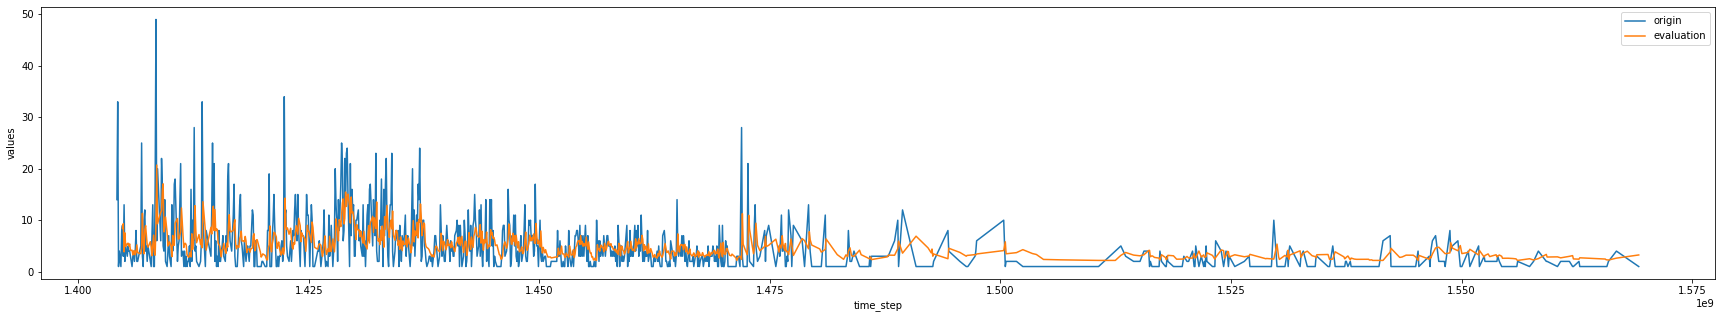

In [112]:
tensorflow_predict_plot_commits('material_tf_commits.csv')

{'times': array([1.4271732e+09, 1.4279508e+09, 1.4291604e+09, ..., 1.5743160e+09,
       1.5744024e+09, 1.5744888e+09]), 'values': array([2, 3, 2, ..., 1, 1, 1])}
INFO:tensorflow:Using default config.


INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Saeid\\AppData\\Local\\Temp\\tmpgtoz4e53', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000259B3258C48>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Saeid\\AppData\\Local\\Temp\\tmpgtoz4e53', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000259B3258C48>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Saeid\AppData\Local\Temp\tmpgtoz4e53\model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Saeid\AppData\Local\Temp\tmpgtoz4e53\model.ckpt.


INFO:tensorflow:loss = 1.2185097, step = 1


INFO:tensorflow:loss = 1.2185097, step = 1


INFO:tensorflow:global_step/sec: 348.647


INFO:tensorflow:global_step/sec: 348.647


INFO:tensorflow:loss = 1.0793922, step = 101 (0.289 sec)


INFO:tensorflow:loss = 1.0793922, step = 101 (0.289 sec)


INFO:tensorflow:global_step/sec: 806.952


INFO:tensorflow:global_step/sec: 806.952


INFO:tensorflow:loss = 1.2667558, step = 201 (0.125 sec)


INFO:tensorflow:loss = 1.2667558, step = 201 (0.125 sec)


INFO:tensorflow:global_step/sec: 781.73


INFO:tensorflow:global_step/sec: 781.73


INFO:tensorflow:loss = 1.2027702, step = 301 (0.128 sec)


INFO:tensorflow:loss = 1.2027702, step = 301 (0.128 sec)


INFO:tensorflow:global_step/sec: 781.736


INFO:tensorflow:global_step/sec: 781.736


INFO:tensorflow:loss = 1.1481597, step = 401 (0.128 sec)


INFO:tensorflow:loss = 1.1481597, step = 401 (0.128 sec)


INFO:tensorflow:global_step/sec: 794.137


INFO:tensorflow:global_step/sec: 794.137


INFO:tensorflow:loss = 1.1220047, step = 501 (0.126 sec)


INFO:tensorflow:loss = 1.1220047, step = 501 (0.126 sec)


INFO:tensorflow:global_step/sec: 840.859


INFO:tensorflow:global_step/sec: 840.859


INFO:tensorflow:loss = 1.1992115, step = 601 (0.119 sec)


INFO:tensorflow:loss = 1.1992115, step = 601 (0.119 sec)


INFO:tensorflow:global_step/sec: 725.084


INFO:tensorflow:global_step/sec: 725.084


INFO:tensorflow:loss = 1.2210302, step = 701 (0.137 sec)


INFO:tensorflow:loss = 1.2210302, step = 701 (0.137 sec)


INFO:tensorflow:global_step/sec: 787.885


INFO:tensorflow:global_step/sec: 787.885


INFO:tensorflow:loss = 1.4623331, step = 801 (0.127 sec)


INFO:tensorflow:loss = 1.4623331, step = 801 (0.127 sec)


INFO:tensorflow:global_step/sec: 719.875


INFO:tensorflow:global_step/sec: 719.875


INFO:tensorflow:loss = 1.1525201, step = 901 (0.140 sec)


INFO:tensorflow:loss = 1.1525201, step = 901 (0.140 sec)


INFO:tensorflow:global_step/sec: 826.959


INFO:tensorflow:global_step/sec: 826.959


INFO:tensorflow:loss = 1.0550619, step = 1001 (0.120 sec)


INFO:tensorflow:loss = 1.0550619, step = 1001 (0.120 sec)


INFO:tensorflow:global_step/sec: 714.727


INFO:tensorflow:global_step/sec: 714.727


INFO:tensorflow:loss = 1.1226896, step = 1101 (0.141 sec)


INFO:tensorflow:loss = 1.1226896, step = 1101 (0.141 sec)


INFO:tensorflow:global_step/sec: 746.731


INFO:tensorflow:global_step/sec: 746.731


INFO:tensorflow:loss = 1.2591982, step = 1201 (0.135 sec)


INFO:tensorflow:loss = 1.2591982, step = 1201 (0.135 sec)


INFO:tensorflow:global_step/sec: 769.696


INFO:tensorflow:global_step/sec: 769.696


INFO:tensorflow:loss = 1.2282188, step = 1301 (0.128 sec)


INFO:tensorflow:loss = 1.2282188, step = 1301 (0.128 sec)


INFO:tensorflow:global_step/sec: 714.737


INFO:tensorflow:global_step/sec: 714.737


INFO:tensorflow:loss = 1.3270727, step = 1401 (0.141 sec)


INFO:tensorflow:loss = 1.3270727, step = 1401 (0.141 sec)


INFO:tensorflow:global_step/sec: 725.082


INFO:tensorflow:global_step/sec: 725.082


INFO:tensorflow:loss = 1.5538042, step = 1501 (0.138 sec)


INFO:tensorflow:loss = 1.5538042, step = 1501 (0.138 sec)


INFO:tensorflow:global_step/sec: 746.735


INFO:tensorflow:global_step/sec: 746.735


INFO:tensorflow:loss = 1.1605353, step = 1601 (0.133 sec)


INFO:tensorflow:loss = 1.1605353, step = 1601 (0.133 sec)


INFO:tensorflow:global_step/sec: 806.952


INFO:tensorflow:global_step/sec: 806.952


INFO:tensorflow:loss = 1.0986961, step = 1701 (0.124 sec)


INFO:tensorflow:loss = 1.0986961, step = 1701 (0.124 sec)


INFO:tensorflow:global_step/sec: 758.044


INFO:tensorflow:global_step/sec: 758.044


INFO:tensorflow:loss = 1.385801, step = 1801 (0.135 sec)


INFO:tensorflow:loss = 1.385801, step = 1801 (0.135 sec)


INFO:tensorflow:global_step/sec: 735.743


INFO:tensorflow:global_step/sec: 735.743


INFO:tensorflow:loss = 1.1827381, step = 1901 (0.134 sec)


INFO:tensorflow:loss = 1.1827381, step = 1901 (0.134 sec)


INFO:tensorflow:global_step/sec: 855.237


INFO:tensorflow:global_step/sec: 855.237


INFO:tensorflow:loss = 1.0423932, step = 2001 (0.116 sec)


INFO:tensorflow:loss = 1.0423932, step = 2001 (0.116 sec)


INFO:tensorflow:global_step/sec: 746.731


INFO:tensorflow:global_step/sec: 746.731


INFO:tensorflow:loss = 1.1357617, step = 2101 (0.135 sec)


INFO:tensorflow:loss = 1.1357617, step = 2101 (0.135 sec)


INFO:tensorflow:global_step/sec: 725.082


INFO:tensorflow:global_step/sec: 725.082


INFO:tensorflow:loss = 1.0766348, step = 2201 (0.158 sec)


INFO:tensorflow:loss = 1.0766348, step = 2201 (0.158 sec)


INFO:tensorflow:global_step/sec: 616.175


INFO:tensorflow:global_step/sec: 616.175


INFO:tensorflow:loss = 1.0949298, step = 2301 (0.142 sec)


INFO:tensorflow:loss = 1.0949298, step = 2301 (0.142 sec)


INFO:tensorflow:global_step/sec: 758.05


INFO:tensorflow:global_step/sec: 758.05


INFO:tensorflow:loss = 2.3362603, step = 2401 (0.131 sec)


INFO:tensorflow:loss = 2.3362603, step = 2401 (0.131 sec)


INFO:tensorflow:global_step/sec: 746.729


INFO:tensorflow:global_step/sec: 746.729


INFO:tensorflow:loss = 1.1290207, step = 2501 (0.134 sec)


INFO:tensorflow:loss = 1.1290207, step = 2501 (0.134 sec)


INFO:tensorflow:global_step/sec: 735.746


INFO:tensorflow:global_step/sec: 735.746


INFO:tensorflow:loss = 1.1998447, step = 2601 (0.138 sec)


INFO:tensorflow:loss = 1.1998447, step = 2601 (0.138 sec)


INFO:tensorflow:global_step/sec: 840.862


INFO:tensorflow:global_step/sec: 840.862


INFO:tensorflow:loss = 1.3255262, step = 2701 (0.117 sec)


INFO:tensorflow:loss = 1.3255262, step = 2701 (0.117 sec)


INFO:tensorflow:global_step/sec: 752.343


INFO:tensorflow:global_step/sec: 752.343


INFO:tensorflow:loss = 1.2854598, step = 2801 (0.134 sec)


INFO:tensorflow:loss = 1.2854598, step = 2801 (0.134 sec)


INFO:tensorflow:global_step/sec: 813.515


INFO:tensorflow:global_step/sec: 813.515


INFO:tensorflow:loss = 1.1268604, step = 2901 (0.122 sec)


INFO:tensorflow:loss = 1.1268604, step = 2901 (0.122 sec)


INFO:tensorflow:global_step/sec: 840.852


INFO:tensorflow:global_step/sec: 840.852


INFO:tensorflow:loss = 1.1717992, step = 3001 (0.119 sec)


INFO:tensorflow:loss = 1.1717992, step = 3001 (0.119 sec)


INFO:tensorflow:global_step/sec: 752.347


INFO:tensorflow:global_step/sec: 752.347


INFO:tensorflow:loss = 1.1782999, step = 3101 (0.133 sec)


INFO:tensorflow:loss = 1.1782999, step = 3101 (0.133 sec)


INFO:tensorflow:global_step/sec: 769.697


INFO:tensorflow:global_step/sec: 769.697


INFO:tensorflow:loss = 1.2262341, step = 3201 (0.130 sec)


INFO:tensorflow:loss = 1.2262341, step = 3201 (0.130 sec)


INFO:tensorflow:global_step/sec: 741.208


INFO:tensorflow:global_step/sec: 741.208


INFO:tensorflow:loss = 2.788177, step = 3301 (0.136 sec)


INFO:tensorflow:loss = 2.788177, step = 3301 (0.136 sec)


INFO:tensorflow:global_step/sec: 794.138


INFO:tensorflow:global_step/sec: 794.138


INFO:tensorflow:loss = 1.1111469, step = 3401 (0.125 sec)


INFO:tensorflow:loss = 1.1111469, step = 3401 (0.125 sec)


INFO:tensorflow:global_step/sec: 699.734


INFO:tensorflow:global_step/sec: 699.734


INFO:tensorflow:loss = 1.548674, step = 3501 (0.143 sec)


INFO:tensorflow:loss = 1.548674, step = 3501 (0.143 sec)


INFO:tensorflow:global_step/sec: 781.736


INFO:tensorflow:global_step/sec: 781.736


INFO:tensorflow:loss = 1.1607621, step = 3601 (0.128 sec)


INFO:tensorflow:loss = 1.1607621, step = 3601 (0.128 sec)


INFO:tensorflow:global_step/sec: 730.375


INFO:tensorflow:global_step/sec: 730.375


INFO:tensorflow:loss = 1.1298892, step = 3701 (0.140 sec)


INFO:tensorflow:loss = 1.1298892, step = 3701 (0.140 sec)


INFO:tensorflow:global_step/sec: 833.851


INFO:tensorflow:global_step/sec: 833.851


INFO:tensorflow:loss = 1.1945273, step = 3801 (0.117 sec)


INFO:tensorflow:loss = 1.1945273, step = 3801 (0.117 sec)


INFO:tensorflow:global_step/sec: 820.18


INFO:tensorflow:global_step/sec: 820.18


INFO:tensorflow:loss = 1.1300503, step = 3901 (0.122 sec)


INFO:tensorflow:loss = 1.1300503, step = 3901 (0.122 sec)


INFO:tensorflow:global_step/sec: 758.046


INFO:tensorflow:global_step/sec: 758.046


INFO:tensorflow:loss = 1.0901356, step = 4001 (0.133 sec)


INFO:tensorflow:loss = 1.0901356, step = 4001 (0.133 sec)


INFO:tensorflow:global_step/sec: 725.089


INFO:tensorflow:global_step/sec: 725.089


INFO:tensorflow:loss = 1.4194458, step = 4101 (0.138 sec)


INFO:tensorflow:loss = 1.4194458, step = 4101 (0.138 sec)


INFO:tensorflow:global_step/sec: 714.718


INFO:tensorflow:global_step/sec: 714.718


INFO:tensorflow:loss = 1.3136908, step = 4201 (0.139 sec)


INFO:tensorflow:loss = 1.3136908, step = 4201 (0.139 sec)


INFO:tensorflow:global_step/sec: 758.047


INFO:tensorflow:global_step/sec: 758.047


INFO:tensorflow:loss = 1.1392053, step = 4301 (0.132 sec)


INFO:tensorflow:loss = 1.1392053, step = 4301 (0.132 sec)


INFO:tensorflow:global_step/sec: 820.187


INFO:tensorflow:global_step/sec: 820.187


INFO:tensorflow:loss = 2.1712904, step = 4401 (0.122 sec)


INFO:tensorflow:loss = 2.1712904, step = 4401 (0.122 sec)


INFO:tensorflow:global_step/sec: 847.977


INFO:tensorflow:global_step/sec: 847.977


INFO:tensorflow:loss = 1.1942298, step = 4501 (0.118 sec)


INFO:tensorflow:loss = 1.1942298, step = 4501 (0.118 sec)


INFO:tensorflow:global_step/sec: 709.66


INFO:tensorflow:global_step/sec: 709.66


INFO:tensorflow:loss = 1.2779822, step = 4601 (0.142 sec)


INFO:tensorflow:loss = 1.2779822, step = 4601 (0.142 sec)


INFO:tensorflow:global_step/sec: 787.888


INFO:tensorflow:global_step/sec: 787.888


INFO:tensorflow:loss = 1.0392494, step = 4701 (0.126 sec)


INFO:tensorflow:loss = 1.0392494, step = 4701 (0.126 sec)


INFO:tensorflow:global_step/sec: 769.704


INFO:tensorflow:global_step/sec: 769.704


INFO:tensorflow:loss = 1.1157985, step = 4801 (0.131 sec)


INFO:tensorflow:loss = 1.1157985, step = 4801 (0.131 sec)


INFO:tensorflow:global_step/sec: 719.873


INFO:tensorflow:global_step/sec: 719.873


INFO:tensorflow:loss = 1.3282708, step = 4901 (0.139 sec)


INFO:tensorflow:loss = 1.3282708, step = 4901 (0.139 sec)


INFO:tensorflow:global_step/sec: 840.855


INFO:tensorflow:global_step/sec: 840.855


INFO:tensorflow:loss = 1.262573, step = 5001 (0.118 sec)


INFO:tensorflow:loss = 1.262573, step = 5001 (0.118 sec)


INFO:tensorflow:global_step/sec: 800.496


INFO:tensorflow:global_step/sec: 800.496


INFO:tensorflow:loss = 1.231663, step = 5101 (0.126 sec)


INFO:tensorflow:loss = 1.231663, step = 5101 (0.126 sec)


INFO:tensorflow:global_step/sec: 746.72


INFO:tensorflow:global_step/sec: 746.72


INFO:tensorflow:loss = 1.1796589, step = 5201 (0.134 sec)


INFO:tensorflow:loss = 1.1796589, step = 5201 (0.134 sec)


INFO:tensorflow:global_step/sec: 826.967


INFO:tensorflow:global_step/sec: 826.967


INFO:tensorflow:loss = 1.1046243, step = 5301 (0.121 sec)


INFO:tensorflow:loss = 1.1046243, step = 5301 (0.121 sec)


INFO:tensorflow:global_step/sec: 862.603


INFO:tensorflow:global_step/sec: 862.603


INFO:tensorflow:loss = 1.3449476, step = 5401 (0.115 sec)


INFO:tensorflow:loss = 1.3449476, step = 5401 (0.115 sec)


INFO:tensorflow:global_step/sec: 741.195


INFO:tensorflow:global_step/sec: 741.195


INFO:tensorflow:loss = 1.2864164, step = 5501 (0.135 sec)


INFO:tensorflow:loss = 1.2864164, step = 5501 (0.135 sec)


INFO:tensorflow:global_step/sec: 800.504


INFO:tensorflow:global_step/sec: 800.504


INFO:tensorflow:loss = 1.3094344, step = 5601 (0.125 sec)


INFO:tensorflow:loss = 1.3094344, step = 5601 (0.125 sec)


INFO:tensorflow:global_step/sec: 680.682


INFO:tensorflow:global_step/sec: 680.682


INFO:tensorflow:loss = 1.3261161, step = 5701 (0.148 sec)


INFO:tensorflow:loss = 1.3261161, step = 5701 (0.148 sec)


INFO:tensorflow:global_step/sec: 833.858


INFO:tensorflow:global_step/sec: 833.858


INFO:tensorflow:loss = 1.3415972, step = 5801 (0.119 sec)


INFO:tensorflow:loss = 1.3415972, step = 5801 (0.119 sec)


INFO:tensorflow:global_step/sec: 862.598


INFO:tensorflow:global_step/sec: 862.598


INFO:tensorflow:loss = 1.1099019, step = 5901 (0.116 sec)


INFO:tensorflow:loss = 1.1099019, step = 5901 (0.116 sec)


INFO:tensorflow:Saving checkpoints for 6000 into C:\Users\Saeid\AppData\Local\Temp\tmpgtoz4e53\model.ckpt.


INFO:tensorflow:Saving checkpoints for 6000 into C:\Users\Saeid\AppData\Local\Temp\tmpgtoz4e53\model.ckpt.


INFO:tensorflow:Loss for final step: 1.0592045.


INFO:tensorflow:Loss for final step: 1.0592045.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2019-11-24T09:13:24Z


INFO:tensorflow:Starting evaluation at 2019-11-24T09:13:24Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmpgtoz4e53\model.ckpt-6000


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmpgtoz4e53\model.ckpt-6000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Evaluation [100/1000]


INFO:tensorflow:Evaluation [100/1000]


INFO:tensorflow:Evaluation [200/1000]


INFO:tensorflow:Evaluation [200/1000]


INFO:tensorflow:Evaluation [300/1000]


INFO:tensorflow:Evaluation [300/1000]


INFO:tensorflow:Evaluation [400/1000]


INFO:tensorflow:Evaluation [400/1000]


INFO:tensorflow:Evaluation [500/1000]


INFO:tensorflow:Evaluation [500/1000]


INFO:tensorflow:Evaluation [600/1000]


INFO:tensorflow:Evaluation [600/1000]


INFO:tensorflow:Evaluation [700/1000]


INFO:tensorflow:Evaluation [700/1000]


INFO:tensorflow:Evaluation [800/1000]


INFO:tensorflow:Evaluation [800/1000]


INFO:tensorflow:Evaluation [900/1000]


INFO:tensorflow:Evaluation [900/1000]


INFO:tensorflow:Evaluation [1000/1000]


INFO:tensorflow:Evaluation [1000/1000]


INFO:tensorflow:Finished evaluation at 2019-11-24-09:15:15


INFO:tensorflow:Finished evaluation at 2019-11-24-09:15:15


INFO:tensorflow:Saving dict for global step 6000: average_loss = 1.2777474, covariance = [[[12.817034]
  [11.919304]
  [16.101665]
  ...
  [32.94878 ]
  [19.612387]
  [22.272524]]], global_step = 6000, loss = 1.2777474, mean = [[[2.6018343]
  [2.5458736]
  [3.893971 ]
  ...
  [6.735776 ]
  [4.2703094]
  [3.7288926]]], observed = [[[1.]
  [6.]
  [3.]
  ...
  [1.]
  [1.]
  [1.]]], start_tuple = (array([[1574056800, 1574143200, 1574229600, 1574316000, 1574402400,
        1574488800]], dtype=int64), array([[[ 0.40274626],
        [ 0.93206084],
        [ 0.6674035 ],
        [-0.92054015],
        [-0.92054015],
        [-0.92054015]]], dtype=float32), array([], shape=(1, 6, 0), dtype=float32)), times = [[1431406800 1431493200 1433048400 ... 1574316000 1574402400 1574488800]]


INFO:tensorflow:Saving dict for global step 6000: average_loss = 1.2777474, covariance = [[[12.817034]
  [11.919304]
  [16.101665]
  ...
  [32.94878 ]
  [19.612387]
  [22.272524]]], global_step = 6000, loss = 1.2777474, mean = [[[2.6018343]
  [2.5458736]
  [3.893971 ]
  ...
  [6.735776 ]
  [4.2703094]
  [3.7288926]]], observed = [[[1.]
  [6.]
  [3.]
  ...
  [1.]
  [1.]
  [1.]]], start_tuple = (array([[1574056800, 1574143200, 1574229600, 1574316000, 1574402400,
        1574488800]], dtype=int64), array([[[ 0.40274626],
        [ 0.93206084],
        [ 0.6674035 ],
        [-0.92054015],
        [-0.92054015],
        [-0.92054015]]], dtype=float32), array([], shape=(1, 6, 0), dtype=float32)), times = [[1431406800 1431493200 1433048400 ... 1574316000 1574402400 1574488800]]


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6000: C:\Users\Saeid\AppData\Local\Temp\tmpgtoz4e53\model.ckpt-6000


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6000: C:\Users\Saeid\AppData\Local\Temp\tmpgtoz4e53\model.ckpt-6000


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmpgtoz4e53\model.ckpt-6000


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmpgtoz4e53\model.ckpt-6000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


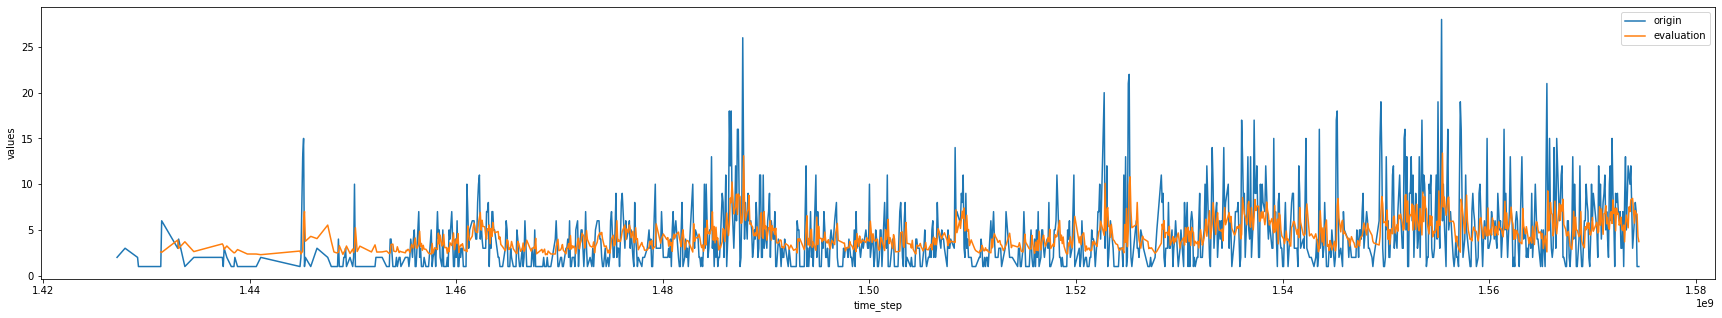

In [113]:
tensorflow_predict_plot_commits('angular_cli_tf_commits.csv')

{'times': array([1.4465304e+09, 1.4466168e+09, 1.4467032e+09, 1.4467896e+09,
       1.4468760e+09, 1.4469624e+09, 1.4473080e+09, 1.4473944e+09,
       1.4474808e+09, 1.4476536e+09, 1.4479128e+09, 1.4479992e+09,
       1.4483448e+09, 1.4484312e+09, 1.4488632e+09, 1.4489496e+09,
       1.4491224e+09, 1.4492952e+09, 1.4493816e+09, 1.4494680e+09,
       1.4496408e+09, 1.4497272e+09, 1.4498136e+09, 1.4499000e+09,
       1.4499864e+09, 1.4500728e+09, 1.4502456e+09, 1.4503320e+09,
       1.4504184e+09, 1.4506776e+09, 1.4507640e+09, 1.4508504e+09,
       1.4510232e+09, 1.4511096e+09, 1.4511960e+09, 1.4513688e+09,
       1.4517144e+09, 1.4519736e+09, 1.4520600e+09, 1.4522328e+09,
       1.4524056e+09, 1.4525784e+09, 1.4528376e+09, 1.4531832e+09,
       1.4537016e+09, 1.4539608e+09, 1.4541336e+09, 1.4542200e+09,
       1.4543928e+09, 1.4548248e+09, 1.4549112e+09, 1.4549976e+09,
       1.4551704e+09, 1.4552568e+09, 1.4557752e+09, 1.4560344e+09,
       1.4561208e+09, 1.4562072e+09, 1.4562936e+09, 

INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Saeid\\AppData\\Local\\Temp\\tmpkccuz4_x', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000259B077B308>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Saeid\\AppData\\Local\\Temp\\tmpkccuz4_x', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000259B077B308>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Saeid\AppData\Local\Temp\tmpkccuz4_x\model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Saeid\AppData\Local\Temp\tmpkccuz4_x\model.ckpt.


INFO:tensorflow:loss = 1.4737308, step = 1


INFO:tensorflow:loss = 1.4737308, step = 1


INFO:tensorflow:global_step/sec: 376.173


INFO:tensorflow:global_step/sec: 376.173


INFO:tensorflow:loss = 1.1192667, step = 101 (0.267 sec)


INFO:tensorflow:loss = 1.1192667, step = 101 (0.267 sec)


INFO:tensorflow:global_step/sec: 741.198


INFO:tensorflow:global_step/sec: 741.198


INFO:tensorflow:loss = 2.2460344, step = 201 (0.136 sec)


INFO:tensorflow:loss = 2.2460344, step = 201 (0.136 sec)


INFO:tensorflow:global_step/sec: 769.711


INFO:tensorflow:global_step/sec: 769.711


INFO:tensorflow:loss = 1.1653527, step = 301 (0.130 sec)


INFO:tensorflow:loss = 1.1653527, step = 301 (0.130 sec)


INFO:tensorflow:global_step/sec: 769.702


INFO:tensorflow:global_step/sec: 769.702


INFO:tensorflow:loss = 1.1318538, step = 401 (0.129 sec)


INFO:tensorflow:loss = 1.1318538, step = 401 (0.129 sec)


INFO:tensorflow:global_step/sec: 840.86


INFO:tensorflow:global_step/sec: 840.86


INFO:tensorflow:loss = 1.3026102, step = 501 (0.119 sec)


INFO:tensorflow:loss = 1.3026102, step = 501 (0.119 sec)


INFO:tensorflow:global_step/sec: 741.198


INFO:tensorflow:global_step/sec: 741.198


INFO:tensorflow:loss = 1.2528018, step = 601 (0.136 sec)


INFO:tensorflow:loss = 1.2528018, step = 601 (0.136 sec)


INFO:tensorflow:global_step/sec: 667.079


INFO:tensorflow:global_step/sec: 667.079


INFO:tensorflow:loss = 1.1020383, step = 701 (0.149 sec)


INFO:tensorflow:loss = 1.1020383, step = 701 (0.149 sec)


INFO:tensorflow:global_step/sec: 840.857


INFO:tensorflow:global_step/sec: 840.857


INFO:tensorflow:loss = 1.118116, step = 801 (0.119 sec)


INFO:tensorflow:loss = 1.118116, step = 801 (0.119 sec)


INFO:tensorflow:global_step/sec: 752.347


INFO:tensorflow:global_step/sec: 752.347


INFO:tensorflow:loss = 1.323406, step = 901 (0.134 sec)


INFO:tensorflow:loss = 1.323406, step = 901 (0.134 sec)


INFO:tensorflow:global_step/sec: 662.66


INFO:tensorflow:global_step/sec: 662.66


INFO:tensorflow:loss = 1.1199765, step = 1001 (0.150 sec)


INFO:tensorflow:loss = 1.1199765, step = 1001 (0.150 sec)


INFO:tensorflow:global_step/sec: 730.379


INFO:tensorflow:global_step/sec: 730.379


INFO:tensorflow:loss = 1.148029, step = 1101 (0.138 sec)


INFO:tensorflow:loss = 1.148029, step = 1101 (0.138 sec)


INFO:tensorflow:global_step/sec: 847.982


INFO:tensorflow:global_step/sec: 847.982


INFO:tensorflow:loss = 1.2936369, step = 1201 (0.118 sec)


INFO:tensorflow:loss = 1.2936369, step = 1201 (0.118 sec)


INFO:tensorflow:global_step/sec: 769.693


INFO:tensorflow:global_step/sec: 769.693


INFO:tensorflow:loss = 1.2195777, step = 1301 (0.129 sec)


INFO:tensorflow:loss = 1.2195777, step = 1301 (0.129 sec)


INFO:tensorflow:global_step/sec: 746.743


INFO:tensorflow:global_step/sec: 746.743


INFO:tensorflow:loss = 1.1087042, step = 1401 (0.134 sec)


INFO:tensorflow:loss = 1.1087042, step = 1401 (0.134 sec)


INFO:tensorflow:global_step/sec: 806.951


INFO:tensorflow:global_step/sec: 806.951


INFO:tensorflow:loss = 1.2108825, step = 1501 (0.124 sec)


INFO:tensorflow:loss = 1.2108825, step = 1501 (0.124 sec)


INFO:tensorflow:global_step/sec: 752.347


INFO:tensorflow:global_step/sec: 752.347


INFO:tensorflow:loss = 1.0817776, step = 1601 (0.133 sec)


INFO:tensorflow:loss = 1.0817776, step = 1601 (0.133 sec)


INFO:tensorflow:global_step/sec: 855.228


INFO:tensorflow:global_step/sec: 855.228


INFO:tensorflow:loss = 1.1190528, step = 1701 (0.118 sec)


INFO:tensorflow:loss = 1.1190528, step = 1701 (0.118 sec)


INFO:tensorflow:global_step/sec: 662.653


INFO:tensorflow:global_step/sec: 662.653


INFO:tensorflow:loss = 1.2854193, step = 1801 (0.151 sec)


INFO:tensorflow:loss = 1.2854193, step = 1801 (0.151 sec)


INFO:tensorflow:global_step/sec: 704.664


INFO:tensorflow:global_step/sec: 704.664


INFO:tensorflow:loss = 1.0519092, step = 1901 (0.141 sec)


INFO:tensorflow:loss = 1.0519092, step = 1901 (0.141 sec)


INFO:tensorflow:global_step/sec: 719.873


INFO:tensorflow:global_step/sec: 719.873


INFO:tensorflow:loss = 1.3093171, step = 2001 (0.140 sec)


INFO:tensorflow:loss = 1.3093171, step = 2001 (0.140 sec)


INFO:tensorflow:global_step/sec: 725.087


INFO:tensorflow:global_step/sec: 725.087


INFO:tensorflow:loss = 1.0883259, step = 2101 (0.138 sec)


INFO:tensorflow:loss = 1.0883259, step = 2101 (0.138 sec)


INFO:tensorflow:global_step/sec: 671.556


INFO:tensorflow:global_step/sec: 671.556


INFO:tensorflow:loss = 1.841949, step = 2201 (0.149 sec)


INFO:tensorflow:loss = 1.841949, step = 2201 (0.149 sec)


INFO:tensorflow:global_step/sec: 735.75


INFO:tensorflow:global_step/sec: 735.75


INFO:tensorflow:loss = 1.2109762, step = 2301 (0.137 sec)


INFO:tensorflow:loss = 1.2109762, step = 2301 (0.137 sec)


INFO:tensorflow:global_step/sec: 800.495


INFO:tensorflow:global_step/sec: 800.495


INFO:tensorflow:loss = 1.082496, step = 2401 (0.124 sec)


INFO:tensorflow:loss = 1.082496, step = 2401 (0.124 sec)


INFO:tensorflow:global_step/sec: 806.949


INFO:tensorflow:global_step/sec: 806.949


INFO:tensorflow:loss = 1.2794012, step = 2501 (0.123 sec)


INFO:tensorflow:loss = 1.2794012, step = 2501 (0.123 sec)


INFO:tensorflow:global_step/sec: 725.087


INFO:tensorflow:global_step/sec: 725.087


INFO:tensorflow:loss = 1.0399847, step = 2601 (0.138 sec)


INFO:tensorflow:loss = 1.0399847, step = 2601 (0.138 sec)


INFO:tensorflow:global_step/sec: 781.733


INFO:tensorflow:global_step/sec: 781.733


INFO:tensorflow:loss = 1.0630668, step = 2701 (0.128 sec)


INFO:tensorflow:loss = 1.0630668, step = 2701 (0.128 sec)


INFO:tensorflow:global_step/sec: 699.734


INFO:tensorflow:global_step/sec: 699.734


INFO:tensorflow:loss = 1.0911937, step = 2801 (0.144 sec)


INFO:tensorflow:loss = 1.0911937, step = 2801 (0.144 sec)


INFO:tensorflow:global_step/sec: 680.668


INFO:tensorflow:global_step/sec: 680.668


INFO:tensorflow:loss = 1.7652746, step = 2901 (0.147 sec)


INFO:tensorflow:loss = 1.7652746, step = 2901 (0.147 sec)


INFO:tensorflow:global_step/sec: 735.778


INFO:tensorflow:global_step/sec: 735.778


INFO:tensorflow:loss = 1.4929798, step = 3001 (0.135 sec)


INFO:tensorflow:loss = 1.4929798, step = 3001 (0.135 sec)


INFO:tensorflow:global_step/sec: 725.079


INFO:tensorflow:global_step/sec: 725.079


INFO:tensorflow:loss = 1.5085375, step = 3101 (0.139 sec)


INFO:tensorflow:loss = 1.5085375, step = 3101 (0.139 sec)


INFO:tensorflow:global_step/sec: 769.711


INFO:tensorflow:global_step/sec: 769.711


INFO:tensorflow:loss = 1.1452887, step = 3201 (0.130 sec)


INFO:tensorflow:loss = 1.1452887, step = 3201 (0.130 sec)


INFO:tensorflow:global_step/sec: 833.853


INFO:tensorflow:global_step/sec: 833.853


INFO:tensorflow:loss = 1.5962225, step = 3301 (0.119 sec)


INFO:tensorflow:loss = 1.5962225, step = 3301 (0.119 sec)


INFO:tensorflow:global_step/sec: 714.731


INFO:tensorflow:global_step/sec: 714.731


INFO:tensorflow:loss = 1.9302827, step = 3401 (0.140 sec)


INFO:tensorflow:loss = 1.9302827, step = 3401 (0.140 sec)


INFO:tensorflow:global_step/sec: 730.371


INFO:tensorflow:global_step/sec: 730.371


INFO:tensorflow:loss = 1.1511322, step = 3501 (0.136 sec)


INFO:tensorflow:loss = 1.1511322, step = 3501 (0.136 sec)


INFO:tensorflow:global_step/sec: 671.557


INFO:tensorflow:global_step/sec: 671.557


INFO:tensorflow:loss = 1.2111806, step = 3601 (0.151 sec)


INFO:tensorflow:loss = 1.2111806, step = 3601 (0.151 sec)


INFO:tensorflow:global_step/sec: 752.348


INFO:tensorflow:global_step/sec: 752.348


INFO:tensorflow:loss = 1.0910206, step = 3701 (0.132 sec)


INFO:tensorflow:loss = 1.0910206, step = 3701 (0.132 sec)


INFO:tensorflow:global_step/sec: 870.103


INFO:tensorflow:global_step/sec: 870.103


INFO:tensorflow:loss = 1.2612116, step = 3801 (0.115 sec)


INFO:tensorflow:loss = 1.2612116, step = 3801 (0.115 sec)


INFO:tensorflow:global_step/sec: 725.085


INFO:tensorflow:global_step/sec: 725.085


INFO:tensorflow:loss = 1.2377372, step = 3901 (0.138 sec)


INFO:tensorflow:loss = 1.2377372, step = 3901 (0.138 sec)


INFO:tensorflow:global_step/sec: 662.664


INFO:tensorflow:global_step/sec: 662.664


INFO:tensorflow:loss = 1.2052088, step = 4001 (0.152 sec)


INFO:tensorflow:loss = 1.2052088, step = 4001 (0.152 sec)


INFO:tensorflow:global_step/sec: 704.656


INFO:tensorflow:global_step/sec: 704.656


INFO:tensorflow:loss = 1.0837994, step = 4101 (0.142 sec)


INFO:tensorflow:loss = 1.0837994, step = 4101 (0.142 sec)


INFO:tensorflow:global_step/sec: 758.048


INFO:tensorflow:global_step/sec: 758.048


INFO:tensorflow:loss = 1.0422071, step = 4201 (0.132 sec)


INFO:tensorflow:loss = 1.0422071, step = 4201 (0.132 sec)


INFO:tensorflow:global_step/sec: 735.75


INFO:tensorflow:global_step/sec: 735.75


INFO:tensorflow:loss = 1.1332407, step = 4301 (0.136 sec)


INFO:tensorflow:loss = 1.1332407, step = 4301 (0.136 sec)


INFO:tensorflow:global_step/sec: 735.75


INFO:tensorflow:global_step/sec: 735.75


INFO:tensorflow:loss = 1.387056, step = 4401 (0.135 sec)


INFO:tensorflow:loss = 1.387056, step = 4401 (0.135 sec)


INFO:tensorflow:global_step/sec: 690.082


INFO:tensorflow:global_step/sec: 690.082


INFO:tensorflow:loss = 1.1862075, step = 4501 (0.149 sec)


INFO:tensorflow:loss = 1.1862075, step = 4501 (0.149 sec)


INFO:tensorflow:global_step/sec: 763.828


INFO:tensorflow:global_step/sec: 763.828


INFO:tensorflow:loss = 1.1976316, step = 4601 (0.128 sec)


INFO:tensorflow:loss = 1.1976316, step = 4601 (0.128 sec)


INFO:tensorflow:global_step/sec: 658.299


INFO:tensorflow:global_step/sec: 658.299


INFO:tensorflow:loss = 1.2565964, step = 4701 (0.152 sec)


INFO:tensorflow:loss = 1.2565964, step = 4701 (0.152 sec)


INFO:tensorflow:global_step/sec: 680.698


INFO:tensorflow:global_step/sec: 680.698


INFO:tensorflow:loss = 1.1816688, step = 4801 (0.147 sec)


INFO:tensorflow:loss = 1.1816688, step = 4801 (0.147 sec)


INFO:tensorflow:global_step/sec: 654.001


INFO:tensorflow:global_step/sec: 654.001


INFO:tensorflow:loss = 1.1557357, step = 4901 (0.153 sec)


INFO:tensorflow:loss = 1.1557357, step = 4901 (0.153 sec)


INFO:tensorflow:global_step/sec: 725.085


INFO:tensorflow:global_step/sec: 725.085


INFO:tensorflow:loss = 1.1390113, step = 5001 (0.138 sec)


INFO:tensorflow:loss = 1.1390113, step = 5001 (0.138 sec)


INFO:tensorflow:global_step/sec: 719.866


INFO:tensorflow:global_step/sec: 719.866


INFO:tensorflow:loss = 1.0366912, step = 5101 (0.139 sec)


INFO:tensorflow:loss = 1.0366912, step = 5101 (0.139 sec)


INFO:tensorflow:global_step/sec: 667.078


INFO:tensorflow:global_step/sec: 667.078


INFO:tensorflow:loss = 1.6172475, step = 5201 (0.150 sec)


INFO:tensorflow:loss = 1.6172475, step = 5201 (0.150 sec)


INFO:tensorflow:global_step/sec: 637.339


INFO:tensorflow:global_step/sec: 637.339


INFO:tensorflow:loss = 1.0656375, step = 5301 (0.158 sec)


INFO:tensorflow:loss = 1.0656375, step = 5301 (0.158 sec)


INFO:tensorflow:global_step/sec: 645.561


INFO:tensorflow:global_step/sec: 645.561


INFO:tensorflow:loss = 1.1981008, step = 5401 (0.155 sec)


INFO:tensorflow:loss = 1.1981008, step = 5401 (0.155 sec)


INFO:tensorflow:global_step/sec: 690.082


INFO:tensorflow:global_step/sec: 690.082


INFO:tensorflow:loss = 1.1367036, step = 5501 (0.144 sec)


INFO:tensorflow:loss = 1.1367036, step = 5501 (0.144 sec)


INFO:tensorflow:global_step/sec: 680.692


INFO:tensorflow:global_step/sec: 680.692


INFO:tensorflow:loss = 1.1461877, step = 5601 (0.147 sec)


INFO:tensorflow:loss = 1.1461877, step = 5601 (0.147 sec)


INFO:tensorflow:global_step/sec: 602.781


INFO:tensorflow:global_step/sec: 602.781


INFO:tensorflow:loss = 1.0672915, step = 5701 (0.167 sec)


INFO:tensorflow:loss = 1.0672915, step = 5701 (0.167 sec)


INFO:tensorflow:global_step/sec: 649.752


INFO:tensorflow:global_step/sec: 649.752


INFO:tensorflow:loss = 1.7460313, step = 5801 (0.153 sec)


INFO:tensorflow:loss = 1.7460313, step = 5801 (0.153 sec)


INFO:tensorflow:global_step/sec: 649.756


INFO:tensorflow:global_step/sec: 649.756


INFO:tensorflow:loss = 1.0732112, step = 5901 (0.154 sec)


INFO:tensorflow:loss = 1.0732112, step = 5901 (0.154 sec)


INFO:tensorflow:Saving checkpoints for 6000 into C:\Users\Saeid\AppData\Local\Temp\tmpkccuz4_x\model.ckpt.


INFO:tensorflow:Saving checkpoints for 6000 into C:\Users\Saeid\AppData\Local\Temp\tmpkccuz4_x\model.ckpt.


INFO:tensorflow:Loss for final step: 1.0900359.


INFO:tensorflow:Loss for final step: 1.0900359.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2019-11-24T09:15:28Z


INFO:tensorflow:Starting evaluation at 2019-11-24T09:15:28Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmpkccuz4_x\model.ckpt-6000


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmpkccuz4_x\model.ckpt-6000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Evaluation [100/1000]


INFO:tensorflow:Evaluation [100/1000]


INFO:tensorflow:Evaluation [200/1000]


INFO:tensorflow:Evaluation [200/1000]


INFO:tensorflow:Evaluation [300/1000]


INFO:tensorflow:Evaluation [300/1000]


INFO:tensorflow:Evaluation [400/1000]


INFO:tensorflow:Evaluation [400/1000]


INFO:tensorflow:Evaluation [500/1000]


INFO:tensorflow:Evaluation [500/1000]


INFO:tensorflow:Evaluation [600/1000]


INFO:tensorflow:Evaluation [600/1000]


INFO:tensorflow:Evaluation [700/1000]


INFO:tensorflow:Evaluation [700/1000]


INFO:tensorflow:Evaluation [800/1000]


INFO:tensorflow:Evaluation [800/1000]


INFO:tensorflow:Evaluation [900/1000]


INFO:tensorflow:Evaluation [900/1000]


INFO:tensorflow:Evaluation [1000/1000]


INFO:tensorflow:Evaluation [1000/1000]


INFO:tensorflow:Finished evaluation at 2019-11-24-09:15:50


INFO:tensorflow:Finished evaluation at 2019-11-24-09:15:50


INFO:tensorflow:Saving dict for global step 6000: average_loss = 1.2582252, covariance = [[[227.0894   ]
  [  0.8979274]
  [  1.6707448]
  [ 13.957436 ]
  [  7.7020216]
  [  4.5430717]
  [  9.145444 ]
  [ 13.299314 ]
  [  3.335821 ]
  [  4.5482926]
  [  5.4873123]
  [  5.529557 ]
  [ 13.3351555]
  [  3.5810614]
  [  3.9225855]
  [  6.3862395]
  [  5.6908135]
  [ 12.360691 ]
  [  3.5458455]
  [ 20.791075 ]
  [  2.7441285]
  [  3.9946907]
  [  6.6242065]
  [ 12.405837 ]
  [  3.7467637]
  [ 12.174777 ]
  [  6.343318 ]
  [  3.719422 ]
  [  6.311684 ]
  [  8.883737 ]
  [ 12.196266 ]
  [  3.5296373]
  [  3.5072606]
  [  6.318271 ]
  [  6.1144466]
  [  5.4890876]
  [ 12.394372 ]
  [  6.1321044]
  [  2.958661 ]
  [  5.187491 ]
  [  8.401479 ]
  [  4.8937726]
  [ 59.007618 ]
  [  1.5990468]
  [  2.1377413]
  [ 15.775398 ]
  [  6.315929 ]
  [  8.708141 ]
  [  3.565771 ]
  [  7.5127635]
  [  4.9853463]
  [129.16129  ]
  [  1.1113595]
  [  2.097011 ]
  [ 12.375442 ]
  [ 12.006325 ]
  [  3.356244 ]

INFO:tensorflow:Saving dict for global step 6000: average_loss = 1.2582252, covariance = [[[227.0894   ]
  [  0.8979274]
  [  1.6707448]
  [ 13.957436 ]
  [  7.7020216]
  [  4.5430717]
  [  9.145444 ]
  [ 13.299314 ]
  [  3.335821 ]
  [  4.5482926]
  [  5.4873123]
  [  5.529557 ]
  [ 13.3351555]
  [  3.5810614]
  [  3.9225855]
  [  6.3862395]
  [  5.6908135]
  [ 12.360691 ]
  [  3.5458455]
  [ 20.791075 ]
  [  2.7441285]
  [  3.9946907]
  [  6.6242065]
  [ 12.405837 ]
  [  3.7467637]
  [ 12.174777 ]
  [  6.343318 ]
  [  3.719422 ]
  [  6.311684 ]
  [  8.883737 ]
  [ 12.196266 ]
  [  3.5296373]
  [  3.5072606]
  [  6.318271 ]
  [  6.1144466]
  [  5.4890876]
  [ 12.394372 ]
  [  6.1321044]
  [  2.958661 ]
  [  5.187491 ]
  [  8.401479 ]
  [  4.8937726]
  [ 59.007618 ]
  [  1.5990468]
  [  2.1377413]
  [ 15.775398 ]
  [  6.315929 ]
  [  8.708141 ]
  [  3.565771 ]
  [  7.5127635]
  [  4.9853463]
  [129.16129  ]
  [  1.1113595]
  [  2.097011 ]
  [ 12.375442 ]
  [ 12.006325 ]
  [  3.356244 ]

INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6000: C:\Users\Saeid\AppData\Local\Temp\tmpkccuz4_x\model.ckpt-6000


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6000: C:\Users\Saeid\AppData\Local\Temp\tmpkccuz4_x\model.ckpt-6000


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmpkccuz4_x\model.ckpt-6000


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmpkccuz4_x\model.ckpt-6000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


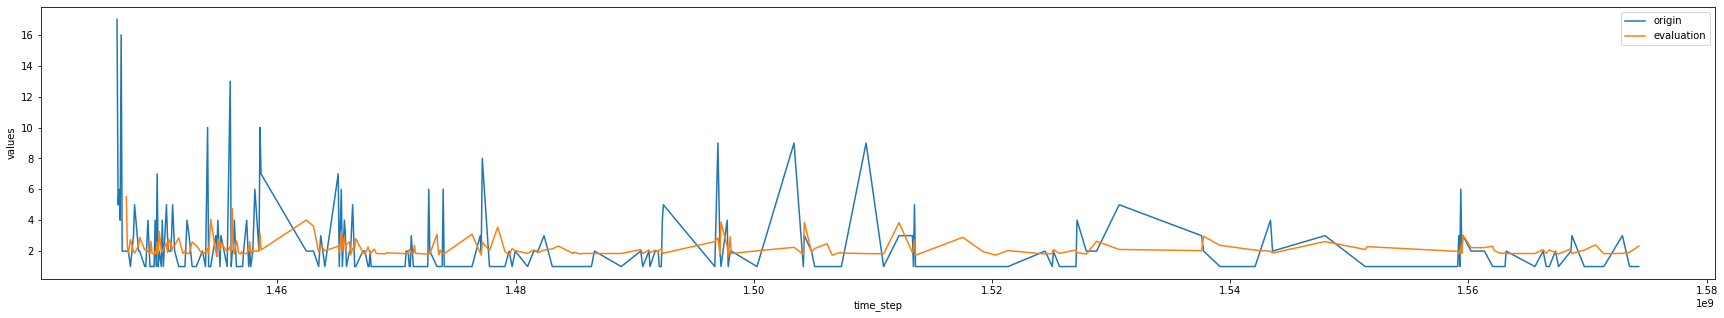

In [114]:
tensorflow_predict_plot_commits('googleMaps_tf_commits.csv')

{'times': array([1.2855636e+09, 1.2856500e+09, 1.2857364e+09, 1.2859956e+09,
       1.2861684e+09, 1.2862548e+09, 1.2863412e+09, 1.2866868e+09,
       1.2870324e+09, 1.2875508e+09, 1.2876372e+09, 1.2877236e+09,
       1.2878100e+09, 1.2878964e+09, 1.2879828e+09, 1.2880692e+09,
       1.2881556e+09, 1.2883284e+09, 1.2884148e+09, 1.2886740e+09,
       1.2887604e+09, 1.2888468e+09, 1.2889332e+09, 1.2890196e+09,
       1.2891060e+09, 1.2891960e+09, 1.2892824e+09, 1.2893688e+09,
       1.2894552e+09, 1.2895416e+09, 1.2898872e+09, 1.2901464e+09,
       1.2904920e+09, 1.2907512e+09, 1.2908376e+09, 1.2909240e+09,
       1.2910104e+09, 1.2910968e+09, 1.2916152e+09, 1.2917016e+09,
       1.2918744e+09, 1.2920472e+09, 1.2923064e+09, 1.2923928e+09,
       1.2924792e+09, 1.2925656e+09, 1.2940344e+09, 1.2941208e+09,
       1.2942072e+09, 1.2944664e+09, 1.2946392e+09, 1.2947256e+09,
       1.2948120e+09, 1.2952440e+09, 1.2955032e+09, 1.2955896e+09,
       1.2959352e+09, 1.2961080e+09, 1.2961944e+09, 

INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Saeid\\AppData\\Local\\Temp\\tmpyr3kkeur', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000259B37CF188>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Saeid\\AppData\\Local\\Temp\\tmpyr3kkeur', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000259B37CF188>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Saeid\AppData\Local\Temp\tmpyr3kkeur\model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Saeid\AppData\Local\Temp\tmpyr3kkeur\model.ckpt.


INFO:tensorflow:loss = 1.878186, step = 1


INFO:tensorflow:loss = 1.878186, step = 1


INFO:tensorflow:global_step/sec: 374.764


INFO:tensorflow:global_step/sec: 374.764


INFO:tensorflow:loss = 3.632979, step = 101 (0.269 sec)


INFO:tensorflow:loss = 3.632979, step = 101 (0.269 sec)


INFO:tensorflow:global_step/sec: 758.041


INFO:tensorflow:global_step/sec: 758.041


INFO:tensorflow:loss = 1.180837, step = 201 (0.133 sec)


INFO:tensorflow:loss = 1.180837, step = 201 (0.133 sec)


INFO:tensorflow:global_step/sec: 833.846


INFO:tensorflow:global_step/sec: 833.846


INFO:tensorflow:loss = 1.1530998, step = 301 (0.119 sec)


INFO:tensorflow:loss = 1.1530998, step = 301 (0.119 sec)


INFO:tensorflow:global_step/sec: 704.659


INFO:tensorflow:global_step/sec: 704.659


INFO:tensorflow:loss = 1.0731182, step = 401 (0.144 sec)


INFO:tensorflow:loss = 1.0731182, step = 401 (0.144 sec)


INFO:tensorflow:global_step/sec: 787.894


INFO:tensorflow:global_step/sec: 787.894


INFO:tensorflow:loss = 1.097112, step = 501 (0.125 sec)


INFO:tensorflow:loss = 1.097112, step = 501 (0.125 sec)


INFO:tensorflow:global_step/sec: 781.736


INFO:tensorflow:global_step/sec: 781.736


INFO:tensorflow:loss = 1.1311482, step = 601 (0.128 sec)


INFO:tensorflow:loss = 1.1311482, step = 601 (0.128 sec)


INFO:tensorflow:global_step/sec: 820.169


INFO:tensorflow:global_step/sec: 820.169


INFO:tensorflow:loss = 0.9976367, step = 701 (0.122 sec)


INFO:tensorflow:loss = 0.9976367, step = 701 (0.122 sec)


INFO:tensorflow:global_step/sec: 800.499


INFO:tensorflow:global_step/sec: 800.499


INFO:tensorflow:loss = 1.3372257, step = 801 (0.125 sec)


INFO:tensorflow:loss = 1.3372257, step = 801 (0.125 sec)


INFO:tensorflow:global_step/sec: 781.736


INFO:tensorflow:global_step/sec: 781.736


INFO:tensorflow:loss = 1.197783, step = 901 (0.130 sec)


INFO:tensorflow:loss = 1.197783, step = 901 (0.130 sec)


INFO:tensorflow:global_step/sec: 813.513


INFO:tensorflow:global_step/sec: 813.513


INFO:tensorflow:loss = 0.95914614, step = 1001 (0.121 sec)


INFO:tensorflow:loss = 0.95914614, step = 1001 (0.121 sec)


INFO:tensorflow:global_step/sec: 758.044


INFO:tensorflow:global_step/sec: 758.044


INFO:tensorflow:loss = 0.9971056, step = 1101 (0.132 sec)


INFO:tensorflow:loss = 0.9971056, step = 1101 (0.132 sec)


INFO:tensorflow:global_step/sec: 847.983


INFO:tensorflow:global_step/sec: 847.983


INFO:tensorflow:loss = 1.4842228, step = 1201 (0.118 sec)


INFO:tensorflow:loss = 1.4842228, step = 1201 (0.118 sec)


INFO:tensorflow:global_step/sec: 769.704


INFO:tensorflow:global_step/sec: 769.704


INFO:tensorflow:loss = 1.2475216, step = 1301 (0.131 sec)


INFO:tensorflow:loss = 1.2475216, step = 1301 (0.131 sec)


INFO:tensorflow:global_step/sec: 820.179


INFO:tensorflow:global_step/sec: 820.179


INFO:tensorflow:loss = 1.2173536, step = 1401 (0.123 sec)


INFO:tensorflow:loss = 1.2173536, step = 1401 (0.123 sec)


INFO:tensorflow:global_step/sec: 781.735


INFO:tensorflow:global_step/sec: 781.735


INFO:tensorflow:loss = 1.1202607, step = 1501 (0.127 sec)


INFO:tensorflow:loss = 1.1202607, step = 1501 (0.127 sec)


INFO:tensorflow:global_step/sec: 840.857


INFO:tensorflow:global_step/sec: 840.857


INFO:tensorflow:loss = 1.0174398, step = 1601 (0.118 sec)


INFO:tensorflow:loss = 1.0174398, step = 1601 (0.118 sec)


INFO:tensorflow:global_step/sec: 752.343


INFO:tensorflow:global_step/sec: 752.343


INFO:tensorflow:loss = 1.0748141, step = 1701 (0.134 sec)


INFO:tensorflow:loss = 1.0748141, step = 1701 (0.134 sec)


INFO:tensorflow:global_step/sec: 746.733


INFO:tensorflow:global_step/sec: 746.733


INFO:tensorflow:loss = 1.9216793, step = 1801 (0.133 sec)


INFO:tensorflow:loss = 1.9216793, step = 1801 (0.133 sec)


INFO:tensorflow:global_step/sec: 741.199


INFO:tensorflow:global_step/sec: 741.199


INFO:tensorflow:loss = 1.067634, step = 1901 (0.135 sec)


INFO:tensorflow:loss = 1.067634, step = 1901 (0.135 sec)


INFO:tensorflow:global_step/sec: 820.169


INFO:tensorflow:global_step/sec: 820.169


INFO:tensorflow:loss = 1.1083767, step = 2001 (0.122 sec)


INFO:tensorflow:loss = 1.1083767, step = 2001 (0.122 sec)


INFO:tensorflow:global_step/sec: 775.68


INFO:tensorflow:global_step/sec: 775.68


INFO:tensorflow:loss = 1.1429087, step = 2101 (0.129 sec)


INFO:tensorflow:loss = 1.1429087, step = 2101 (0.129 sec)


INFO:tensorflow:global_step/sec: 787.889


INFO:tensorflow:global_step/sec: 787.889


INFO:tensorflow:loss = 1.1467319, step = 2201 (0.127 sec)


INFO:tensorflow:loss = 1.1467319, step = 2201 (0.127 sec)


INFO:tensorflow:global_step/sec: 730.378


INFO:tensorflow:global_step/sec: 730.378


INFO:tensorflow:loss = 1.850028, step = 2301 (0.139 sec)


INFO:tensorflow:loss = 1.850028, step = 2301 (0.139 sec)


INFO:tensorflow:global_step/sec: 806.949


INFO:tensorflow:global_step/sec: 806.949


INFO:tensorflow:loss = 1.1323719, step = 2401 (0.122 sec)


INFO:tensorflow:loss = 1.1323719, step = 2401 (0.122 sec)


INFO:tensorflow:global_step/sec: 855.233


INFO:tensorflow:global_step/sec: 855.233


INFO:tensorflow:loss = 1.1467578, step = 2501 (0.117 sec)


INFO:tensorflow:loss = 1.1467578, step = 2501 (0.117 sec)


INFO:tensorflow:global_step/sec: 752.335


INFO:tensorflow:global_step/sec: 752.335


INFO:tensorflow:loss = 0.9232976, step = 2601 (0.134 sec)


INFO:tensorflow:loss = 0.9232976, step = 2601 (0.134 sec)


INFO:tensorflow:global_step/sec: 826.967


INFO:tensorflow:global_step/sec: 826.967


INFO:tensorflow:loss = 0.9978105, step = 2701 (0.119 sec)


INFO:tensorflow:loss = 0.9978105, step = 2701 (0.119 sec)


INFO:tensorflow:global_step/sec: 800.498


INFO:tensorflow:global_step/sec: 800.498


INFO:tensorflow:loss = 1.2126831, step = 2801 (0.128 sec)


INFO:tensorflow:loss = 1.2126831, step = 2801 (0.128 sec)


INFO:tensorflow:global_step/sec: 820.174


INFO:tensorflow:global_step/sec: 820.174


INFO:tensorflow:loss = 1.27132, step = 2901 (0.119 sec)


INFO:tensorflow:loss = 1.27132, step = 2901 (0.119 sec)


INFO:tensorflow:global_step/sec: 800.492


INFO:tensorflow:global_step/sec: 800.492


INFO:tensorflow:loss = 0.9402461, step = 3001 (0.126 sec)


INFO:tensorflow:loss = 0.9402461, step = 3001 (0.126 sec)


INFO:tensorflow:global_step/sec: 840.864


INFO:tensorflow:global_step/sec: 840.864


INFO:tensorflow:loss = 1.7120764, step = 3101 (0.120 sec)


INFO:tensorflow:loss = 1.7120764, step = 3101 (0.120 sec)


INFO:tensorflow:global_step/sec: 763.831


INFO:tensorflow:global_step/sec: 763.831


INFO:tensorflow:loss = 0.99103993, step = 3201 (0.131 sec)


INFO:tensorflow:loss = 0.99103993, step = 3201 (0.131 sec)


INFO:tensorflow:global_step/sec: 800.495


INFO:tensorflow:global_step/sec: 800.495


INFO:tensorflow:loss = 1.3232085, step = 3301 (0.124 sec)


INFO:tensorflow:loss = 1.3232085, step = 3301 (0.124 sec)


INFO:tensorflow:global_step/sec: 758.037


INFO:tensorflow:global_step/sec: 758.037


INFO:tensorflow:loss = 1.32342, step = 3401 (0.133 sec)


INFO:tensorflow:loss = 1.32342, step = 3401 (0.133 sec)


INFO:tensorflow:global_step/sec: 840.865


INFO:tensorflow:global_step/sec: 840.865


INFO:tensorflow:loss = 1.0291982, step = 3501 (0.118 sec)


INFO:tensorflow:loss = 1.0291982, step = 3501 (0.118 sec)


INFO:tensorflow:global_step/sec: 806.949


INFO:tensorflow:global_step/sec: 806.949


INFO:tensorflow:loss = 0.96924657, step = 3601 (0.124 sec)


INFO:tensorflow:loss = 0.96924657, step = 3601 (0.124 sec)


INFO:tensorflow:global_step/sec: 741.202


INFO:tensorflow:global_step/sec: 741.202


INFO:tensorflow:loss = 1.2947116, step = 3701 (0.136 sec)


INFO:tensorflow:loss = 1.2947116, step = 3701 (0.136 sec)


INFO:tensorflow:global_step/sec: 746.727


INFO:tensorflow:global_step/sec: 746.727


INFO:tensorflow:loss = 1.2199943, step = 3801 (0.134 sec)


INFO:tensorflow:loss = 1.2199943, step = 3801 (0.134 sec)


INFO:tensorflow:global_step/sec: 735.751


INFO:tensorflow:global_step/sec: 735.751


INFO:tensorflow:loss = 1.1021336, step = 3901 (0.135 sec)


INFO:tensorflow:loss = 1.1021336, step = 3901 (0.135 sec)


INFO:tensorflow:global_step/sec: 781.726


INFO:tensorflow:global_step/sec: 781.726


INFO:tensorflow:loss = 0.9743041, step = 4001 (0.128 sec)


INFO:tensorflow:loss = 0.9743041, step = 4001 (0.128 sec)


INFO:tensorflow:global_step/sec: 769.707


INFO:tensorflow:global_step/sec: 769.707


INFO:tensorflow:loss = 2.4042625, step = 4101 (0.131 sec)


INFO:tensorflow:loss = 2.4042625, step = 4101 (0.131 sec)


INFO:tensorflow:global_step/sec: 719.874


INFO:tensorflow:global_step/sec: 719.874


INFO:tensorflow:loss = 1.0993755, step = 4201 (0.139 sec)


INFO:tensorflow:loss = 1.0993755, step = 4201 (0.139 sec)


INFO:tensorflow:global_step/sec: 752.347


INFO:tensorflow:global_step/sec: 752.347


INFO:tensorflow:loss = 1.1550777, step = 4301 (0.132 sec)


INFO:tensorflow:loss = 1.1550777, step = 4301 (0.132 sec)


INFO:tensorflow:global_step/sec: 833.848


INFO:tensorflow:global_step/sec: 833.848


INFO:tensorflow:loss = 1.0856364, step = 4401 (0.120 sec)


INFO:tensorflow:loss = 1.0856364, step = 4401 (0.120 sec)


INFO:tensorflow:global_step/sec: 833.848


INFO:tensorflow:global_step/sec: 833.848


INFO:tensorflow:loss = 1.0197078, step = 4501 (0.120 sec)


INFO:tensorflow:loss = 1.0197078, step = 4501 (0.120 sec)


INFO:tensorflow:global_step/sec: 719.871


INFO:tensorflow:global_step/sec: 719.871


INFO:tensorflow:loss = 1.1041636, step = 4601 (0.140 sec)


INFO:tensorflow:loss = 1.1041636, step = 4601 (0.140 sec)


INFO:tensorflow:global_step/sec: 855.226


INFO:tensorflow:global_step/sec: 855.226


INFO:tensorflow:loss = 1.0662092, step = 4701 (0.116 sec)


INFO:tensorflow:loss = 1.0662092, step = 4701 (0.116 sec)


INFO:tensorflow:global_step/sec: 800.49


INFO:tensorflow:global_step/sec: 800.49


INFO:tensorflow:loss = 1.1473954, step = 4801 (0.124 sec)


INFO:tensorflow:loss = 1.1473954, step = 4801 (0.124 sec)


INFO:tensorflow:global_step/sec: 806.959


INFO:tensorflow:global_step/sec: 806.959


INFO:tensorflow:loss = 1.7276604, step = 4901 (0.125 sec)


INFO:tensorflow:loss = 1.7276604, step = 4901 (0.125 sec)


INFO:tensorflow:global_step/sec: 752.337


INFO:tensorflow:global_step/sec: 752.337


INFO:tensorflow:loss = 1.0217485, step = 5001 (0.135 sec)


INFO:tensorflow:loss = 1.0217485, step = 5001 (0.135 sec)


INFO:tensorflow:global_step/sec: 794.15


INFO:tensorflow:global_step/sec: 794.15


INFO:tensorflow:loss = 1.2478037, step = 5101 (0.124 sec)


INFO:tensorflow:loss = 1.2478037, step = 5101 (0.124 sec)


INFO:tensorflow:global_step/sec: 769.703


INFO:tensorflow:global_step/sec: 769.703


INFO:tensorflow:loss = 1.0782844, step = 5201 (0.130 sec)


INFO:tensorflow:loss = 1.0782844, step = 5201 (0.130 sec)


INFO:tensorflow:global_step/sec: 847.987


INFO:tensorflow:global_step/sec: 847.987


INFO:tensorflow:loss = 1.1477804, step = 5301 (0.118 sec)


INFO:tensorflow:loss = 1.1477804, step = 5301 (0.118 sec)


INFO:tensorflow:global_step/sec: 769.703


INFO:tensorflow:global_step/sec: 769.703


INFO:tensorflow:loss = 1.7983938, step = 5401 (0.130 sec)


INFO:tensorflow:loss = 1.7983938, step = 5401 (0.130 sec)


INFO:tensorflow:global_step/sec: 787.888


INFO:tensorflow:global_step/sec: 787.888


INFO:tensorflow:loss = 1.755068, step = 5501 (0.134 sec)


INFO:tensorflow:loss = 1.755068, step = 5501 (0.134 sec)


INFO:tensorflow:global_step/sec: 754.221


INFO:tensorflow:global_step/sec: 754.221


INFO:tensorflow:loss = 1.255058, step = 5601 (0.126 sec)


INFO:tensorflow:loss = 1.255058, step = 5601 (0.126 sec)


INFO:tensorflow:global_step/sec: 769.703


INFO:tensorflow:global_step/sec: 769.703


INFO:tensorflow:loss = 1.0140276, step = 5701 (0.131 sec)


INFO:tensorflow:loss = 1.0140276, step = 5701 (0.131 sec)


INFO:tensorflow:global_step/sec: 763.831


INFO:tensorflow:global_step/sec: 763.831


INFO:tensorflow:loss = 1.2635037, step = 5801 (0.130 sec)


INFO:tensorflow:loss = 1.2635037, step = 5801 (0.130 sec)


INFO:tensorflow:global_step/sec: 847.983


INFO:tensorflow:global_step/sec: 847.983


INFO:tensorflow:loss = 2.363059, step = 5901 (0.118 sec)


INFO:tensorflow:loss = 2.363059, step = 5901 (0.118 sec)


INFO:tensorflow:Saving checkpoints for 6000 into C:\Users\Saeid\AppData\Local\Temp\tmpyr3kkeur\model.ckpt.


INFO:tensorflow:Saving checkpoints for 6000 into C:\Users\Saeid\AppData\Local\Temp\tmpyr3kkeur\model.ckpt.


INFO:tensorflow:Loss for final step: 1.1178173.


INFO:tensorflow:Loss for final step: 1.1178173.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2019-11-24T09:16:02Z


INFO:tensorflow:Starting evaluation at 2019-11-24T09:16:02Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmpyr3kkeur\model.ckpt-6000


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmpyr3kkeur\model.ckpt-6000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Evaluation [100/1000]


INFO:tensorflow:Evaluation [100/1000]


INFO:tensorflow:Evaluation [200/1000]


INFO:tensorflow:Evaluation [200/1000]


INFO:tensorflow:Evaluation [300/1000]


INFO:tensorflow:Evaluation [300/1000]


INFO:tensorflow:Evaluation [400/1000]


INFO:tensorflow:Evaluation [400/1000]


INFO:tensorflow:Evaluation [500/1000]


INFO:tensorflow:Evaluation [500/1000]


INFO:tensorflow:Evaluation [600/1000]


INFO:tensorflow:Evaluation [600/1000]


INFO:tensorflow:Evaluation [700/1000]


INFO:tensorflow:Evaluation [700/1000]


INFO:tensorflow:Evaluation [800/1000]


INFO:tensorflow:Evaluation [800/1000]


INFO:tensorflow:Evaluation [900/1000]


INFO:tensorflow:Evaluation [900/1000]


INFO:tensorflow:Evaluation [1000/1000]


INFO:tensorflow:Evaluation [1000/1000]


INFO:tensorflow:Finished evaluation at 2019-11-24-09:17:37


INFO:tensorflow:Finished evaluation at 2019-11-24-09:17:37


INFO:tensorflow:Saving dict for global step 6000: average_loss = 1.2232642, covariance = [[[3.65381699e+01]
  [3.19805679e+01]
  [3.87819672e+01]
  [4.04290314e+01]
  [2.57015934e+01]
  [4.20452576e+01]
  [3.61243248e+01]
  [6.01122665e+01]
  [1.37996078e+02]
  [7.13412552e+01]
  [4.64393501e+01]
  [2.89442749e+01]
  [3.47434349e+01]
  [6.83456955e+01]
  [4.45562706e+01]
  [3.45278397e+01]
  [2.92523193e+01]
  [9.05349045e+01]
  [3.80703011e+01]
  [5.95559120e+01]
  [7.73679733e+01]
  [1.95650101e+01]
  [1.32120453e+02]
  [2.29975147e+01]
  [3.91797523e+01]
  [2.93077259e+01]
  [3.02014122e+01]
  [3.06769943e+01]
  [2.55681458e+01]
  [3.57577705e+01]
  [3.59212036e+01]
  [2.76612644e+01]
  [3.19084454e+01]
  [2.34542484e+01]
  [3.41368027e+01]
  [3.42148285e+01]
  [2.66426182e+01]
  [2.66729221e+01]
  [2.89387035e+01]
  [2.66317787e+01]
  [2.78219833e+01]
  [2.45402927e+01]
  [2.74347515e+01]
  [3.14916897e+01]
  [2.66068001e+01]
  [2.63194351e+01]
  [2.70367947e+01]
  [2.51767654e+01]

INFO:tensorflow:Saving dict for global step 6000: average_loss = 1.2232642, covariance = [[[3.65381699e+01]
  [3.19805679e+01]
  [3.87819672e+01]
  [4.04290314e+01]
  [2.57015934e+01]
  [4.20452576e+01]
  [3.61243248e+01]
  [6.01122665e+01]
  [1.37996078e+02]
  [7.13412552e+01]
  [4.64393501e+01]
  [2.89442749e+01]
  [3.47434349e+01]
  [6.83456955e+01]
  [4.45562706e+01]
  [3.45278397e+01]
  [2.92523193e+01]
  [9.05349045e+01]
  [3.80703011e+01]
  [5.95559120e+01]
  [7.73679733e+01]
  [1.95650101e+01]
  [1.32120453e+02]
  [2.29975147e+01]
  [3.91797523e+01]
  [2.93077259e+01]
  [3.02014122e+01]
  [3.06769943e+01]
  [2.55681458e+01]
  [3.57577705e+01]
  [3.59212036e+01]
  [2.76612644e+01]
  [3.19084454e+01]
  [2.34542484e+01]
  [3.41368027e+01]
  [3.42148285e+01]
  [2.66426182e+01]
  [2.66729221e+01]
  [2.89387035e+01]
  [2.66317787e+01]
  [2.78219833e+01]
  [2.45402927e+01]
  [2.74347515e+01]
  [3.14916897e+01]
  [2.66068001e+01]
  [2.63194351e+01]
  [2.70367947e+01]
  [2.51767654e+01]

INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6000: C:\Users\Saeid\AppData\Local\Temp\tmpyr3kkeur\model.ckpt-6000


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6000: C:\Users\Saeid\AppData\Local\Temp\tmpyr3kkeur\model.ckpt-6000


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmpyr3kkeur\model.ckpt-6000


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmpyr3kkeur\model.ckpt-6000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


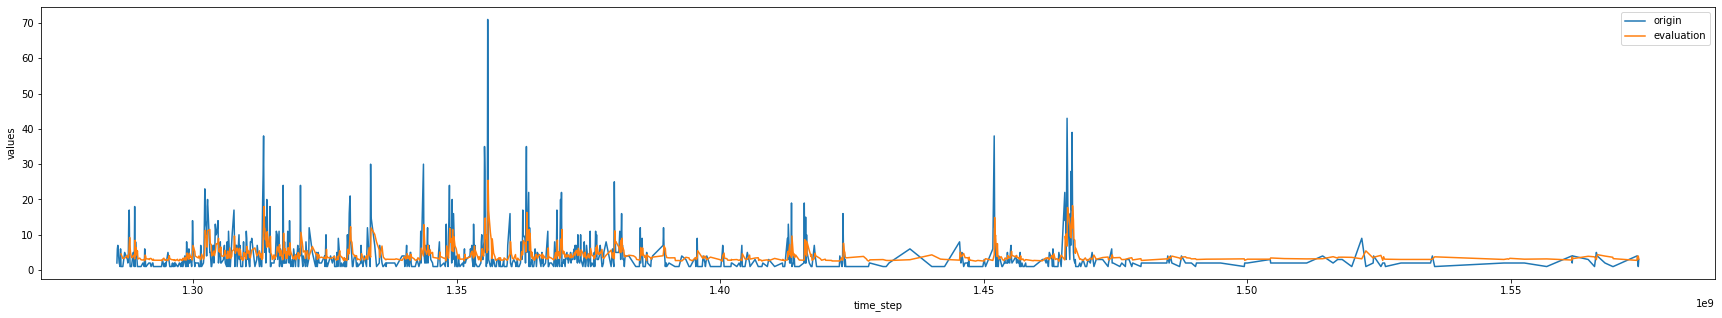

In [115]:
tensorflow_predict_plot_commits('d3_tf_commits.csv')

In [163]:
#8-8-Plot the branches forecast; 
#Statsmodel
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import requests


def parse_date(x):
    #print(x)
    return datetime.strptime(x, '%Y-%m-%d')

def branch_info(file):
   repo = g.get_repo(file)
   print(repo)
   pulls = repo.get_branches()
   created_at_pulls_list = []
   for pr in pulls:
       created_at_pulls_list = created_at_pulls_list + [pr.commit.url]
   pulls_df = DataFrame()
   pulls_df['commit'] = created_at_pulls_list
   return pulls_df


def predict_plot_branch(file):
   
   df = pd.read_csv(file)
   df['ds'] = df['ds'].astype('datetime64[ns]')
   array = df.to_numpy()
   x = np.array([time.mktime(i[0].timetuple()) for i in array])
   y = np.array([i[1] for i in array])


   data = {
       tf.contrib.timeseries.TrainEvalFeatures.TIMES: x,
       tf.contrib.timeseries.TrainEvalFeatures.VALUES: y,
          }
   print (data)

   reader = NumpyReader(data)

   train_input_fn = tf.contrib.timeseries.RandomWindowInputFn(reader, batch_size = 7, window_size = 7)
   ar = tf.contrib.timeseries.ARRegressor(
        periodicities=200, input_window_size=6, output_window_size=1,
        num_features=1,
        loss=tf.contrib.timeseries.ARModel.NORMAL_LIKELIHOOD_LOSS)
   ar.train(input_fn=train_input_fn, steps=6000)
#evaluation
   evaluation_input_fn = tf.contrib.timeseries.WholeDatasetInputFn(reader)
   evaluation = ar.evaluate(input_fn=evaluation_input_fn, steps=1000)

#prediction
   (predictions,) = tuple(ar.predict(
        input_fn=tf.contrib.timeseries.predict_continuation_input_fn(
            evaluation, steps=365)))
#plot origin and evaluation for angular repo
   plt.figure(figsize=(30, 5))
   plt.plot(data['times'].reshape(-1), data['values'].reshape(-1), label='origin')
   plt.plot(evaluation['times'].reshape(-1), evaluation['mean'].reshape(-1), label='evaluation')
   plt.xlabel('time_step')
   plt.ylabel('values')
   plt.legend()
   plt.show()

def tensorflow_newdf_branches(newdf):
    b = newdf.groupby(['created_at'])['created_at']
    b1 = b.describe()
    temp = pd.DataFrame()
    temp = b1[['top', 'count']]
    temp.columns = ['ds', 'y']
    return temp

headers = {'Authorization': 'token ' + GITHUB_TOKEN}

def branchDate(all_urls):
    x = range(len(all_urls))
    created_at_branch = []
    branch_df = pd.DataFrame()
    for n in x:
        val = requests.get(all_urls.iloc[n], headers=headers)
        created_at_branch = created_at_branch +  [datetime.date(pd.to_datetime(val.json().get('commit').get('author').get('date')))]
    branch_df['created_at'] = created_at_branch
    return branch_df  


angular_branches_df = pd.DataFrame(branchDate(branch_info("angular/angular")['commit']))
material_branches_df = pd.DataFrame(branchDate(branch_info("angular/material")['commit']))
angular_cli_branches_df = pd.DataFrame(branchDate(branch_info("angular/angular-cli")['commit']))
angular_googleMaps_branches_df = pd.DataFrame(branchDate(branch_info("SebastianM/angular-google-maps")['commit']))
d3_branches_df = pd.DataFrame(branchDate(branch_info("d3/d3")['commit']))


angular_tf_df = pd.DataFrame(tensorflow_newdf_branches(angular_branches_df))
material_tf_df = pd.DataFrame(tensorflow_newdf_branches(material_branches_df))
angular_cli_tf_df = pd.DataFrame(tensorflow_newdf_branches(angular_cli_branches_df))
googleMaps_tf_df = pd.DataFrame(tensorflow_newdf_branches(angular_googleMaps_branches_df))
d3_tf_df = pd.DataFrame(tensorflow_newdf_branches(d3_branches_df))

angular_tf_df.to_csv('angular_tf_branch.csv', sep = ',', encoding = 'utf-8', index = False)
material_tf_df.to_csv('material_tf_branch.csv', sep = ',', encoding = 'utf-8', index = False)
angular_cli_tf_df.to_csv('angular_cli_tf_branch.csv', sep = ',', encoding = 'utf-8', index = False)
googleMaps_tf_df.to_csv('googleMaps_tf_branch.csv', sep = ',', encoding = 'utf-8', index = False)
d3_tf_df.to_csv('d3_tf_branch.csv', sep = ',', encoding = 'utf-8', index = False)





Repository(full_name="angular/angular")
Repository(full_name="angular/material")
Repository(full_name="angular/angular-cli")
Repository(full_name="SebastianM/angular-google-maps")
Repository(full_name="d3/d3")


{'times': array([1.4721876e+09, 1.4756436e+09, 1.4784984e+09, 1.4804856e+09,
       1.4817816e+09, 1.4897268e+09, 1.4927508e+09, 1.4949972e+09,
       1.5010452e+09, 1.5028596e+09, 1.5077844e+09, 1.5132312e+09,
       1.5137496e+09, 1.5151320e+09, 1.5154776e+09, 1.5161688e+09,
       1.5172920e+09, 1.5191064e+09, 1.5197112e+09, 1.5197976e+09,
       1.5200568e+09, 1.5216084e+09, 1.5242004e+09, 1.5244596e+09,
       1.5254100e+09, 1.5272244e+09, 1.5290388e+09, 1.5318900e+09,
       1.5322356e+09, 1.5341364e+09, 1.5355188e+09, 1.5395796e+09,
       1.5396660e+09, 1.5404436e+09, 1.5409620e+09, 1.5426936e+09,
       1.5434712e+09, 1.5439032e+09, 1.5448536e+09, 1.5451128e+09,
       1.5453720e+09, 1.5454584e+09, 1.5467544e+09, 1.5469272e+09,
       1.5476184e+09, 1.5477912e+09, 1.5492600e+09, 1.5494328e+09,
       1.5501240e+09, 1.5520248e+09, 1.5530580e+09, 1.5537492e+09,
       1.5539220e+09, 1.5544404e+09, 1.5550452e+09, 1.5595380e+09,
       1.5601428e+09, 1.5610068e+09, 1.5610932e+09, 

INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Saeid\\AppData\\Local\\Temp\\tmpkgyvig_e', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000259B435B748>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Saeid\\AppData\\Local\\Temp\\tmpkgyvig_e', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000259B435B748>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Saeid\AppData\Local\Temp\tmpkgyvig_e\model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Saeid\AppData\Local\Temp\tmpkgyvig_e\model.ckpt.


INFO:tensorflow:loss = 1.0091496, step = 1


INFO:tensorflow:loss = 1.0091496, step = 1


INFO:tensorflow:global_step/sec: 305.067


INFO:tensorflow:global_step/sec: 305.067


INFO:tensorflow:loss = 1.1288964, step = 101 (0.330 sec)


INFO:tensorflow:loss = 1.1288964, step = 101 (0.330 sec)


INFO:tensorflow:global_step/sec: 763.827


INFO:tensorflow:global_step/sec: 763.827


INFO:tensorflow:loss = 1.0728576, step = 201 (0.132 sec)


INFO:tensorflow:loss = 1.0728576, step = 201 (0.132 sec)


INFO:tensorflow:global_step/sec: 725.087


INFO:tensorflow:global_step/sec: 725.087


INFO:tensorflow:loss = 1.0835938, step = 301 (0.140 sec)


INFO:tensorflow:loss = 1.0835938, step = 301 (0.140 sec)


INFO:tensorflow:global_step/sec: 714.726


INFO:tensorflow:global_step/sec: 714.726


INFO:tensorflow:loss = 1.2594872, step = 401 (0.138 sec)


INFO:tensorflow:loss = 1.2594872, step = 401 (0.138 sec)


INFO:tensorflow:global_step/sec: 813.521


INFO:tensorflow:global_step/sec: 813.521


INFO:tensorflow:loss = 1.0029624, step = 501 (0.122 sec)


INFO:tensorflow:loss = 1.0029624, step = 501 (0.122 sec)


INFO:tensorflow:global_step/sec: 671.554


INFO:tensorflow:global_step/sec: 671.554


INFO:tensorflow:loss = 1.0735207, step = 601 (0.150 sec)


INFO:tensorflow:loss = 1.0735207, step = 601 (0.150 sec)


INFO:tensorflow:global_step/sec: 719.868


INFO:tensorflow:global_step/sec: 719.868


INFO:tensorflow:loss = 1.1993337, step = 701 (0.139 sec)


INFO:tensorflow:loss = 1.1993337, step = 701 (0.139 sec)


INFO:tensorflow:global_step/sec: 787.882


INFO:tensorflow:global_step/sec: 787.882


INFO:tensorflow:loss = 2.041741, step = 801 (0.127 sec)


INFO:tensorflow:loss = 2.041741, step = 801 (0.127 sec)


INFO:tensorflow:global_step/sec: 676.098


INFO:tensorflow:global_step/sec: 676.098


INFO:tensorflow:loss = 1.0630385, step = 901 (0.149 sec)


INFO:tensorflow:loss = 1.0630385, step = 901 (0.149 sec)


INFO:tensorflow:global_step/sec: 730.371


INFO:tensorflow:global_step/sec: 730.371


INFO:tensorflow:loss = 1.0829344, step = 1001 (0.135 sec)


INFO:tensorflow:loss = 1.0829344, step = 1001 (0.135 sec)


INFO:tensorflow:global_step/sec: 714.737


INFO:tensorflow:global_step/sec: 714.737


INFO:tensorflow:loss = 1.1844975, step = 1101 (0.140 sec)


INFO:tensorflow:loss = 1.1844975, step = 1101 (0.140 sec)


INFO:tensorflow:global_step/sec: 725.086


INFO:tensorflow:global_step/sec: 725.086


INFO:tensorflow:loss = 0.98555595, step = 1201 (0.138 sec)


INFO:tensorflow:loss = 0.98555595, step = 1201 (0.138 sec)


INFO:tensorflow:global_step/sec: 680.689


INFO:tensorflow:global_step/sec: 680.689


INFO:tensorflow:loss = 1.1529896, step = 1301 (0.148 sec)


INFO:tensorflow:loss = 1.1529896, step = 1301 (0.148 sec)


INFO:tensorflow:global_step/sec: 704.662


INFO:tensorflow:global_step/sec: 704.662


INFO:tensorflow:loss = 0.98025656, step = 1401 (0.142 sec)


INFO:tensorflow:loss = 0.98025656, step = 1401 (0.142 sec)


INFO:tensorflow:global_step/sec: 735.747


INFO:tensorflow:global_step/sec: 735.747


INFO:tensorflow:loss = 1.138087, step = 1501 (0.136 sec)


INFO:tensorflow:loss = 1.138087, step = 1501 (0.136 sec)


INFO:tensorflow:global_step/sec: 714.728


INFO:tensorflow:global_step/sec: 714.728


INFO:tensorflow:loss = 1.1859623, step = 1601 (0.140 sec)


INFO:tensorflow:loss = 1.1859623, step = 1601 (0.140 sec)


INFO:tensorflow:global_step/sec: 699.733


INFO:tensorflow:global_step/sec: 699.733


INFO:tensorflow:loss = 0.8912802, step = 1701 (0.144 sec)


INFO:tensorflow:loss = 0.8912802, step = 1701 (0.144 sec)


INFO:tensorflow:global_step/sec: 690.084


INFO:tensorflow:global_step/sec: 690.084


INFO:tensorflow:loss = 0.90556, step = 1801 (0.145 sec)


INFO:tensorflow:loss = 0.90556, step = 1801 (0.145 sec)


INFO:tensorflow:global_step/sec: 658.301


INFO:tensorflow:global_step/sec: 658.301


INFO:tensorflow:loss = 1.0191501, step = 1901 (0.152 sec)


INFO:tensorflow:loss = 1.0191501, step = 1901 (0.152 sec)


INFO:tensorflow:global_step/sec: 725.087


INFO:tensorflow:global_step/sec: 725.087


INFO:tensorflow:loss = 0.99082774, step = 2001 (0.137 sec)


INFO:tensorflow:loss = 0.99082774, step = 2001 (0.137 sec)


INFO:tensorflow:global_step/sec: 806.949


INFO:tensorflow:global_step/sec: 806.949


INFO:tensorflow:loss = 0.7349641, step = 2101 (0.124 sec)


INFO:tensorflow:loss = 0.7349641, step = 2101 (0.124 sec)


INFO:tensorflow:global_step/sec: 704.659


INFO:tensorflow:global_step/sec: 704.659


INFO:tensorflow:loss = 0.969134, step = 2201 (0.143 sec)


INFO:tensorflow:loss = 0.969134, step = 2201 (0.143 sec)


INFO:tensorflow:global_step/sec: 763.835


INFO:tensorflow:global_step/sec: 763.835


INFO:tensorflow:loss = 1.0363871, step = 2301 (0.129 sec)


INFO:tensorflow:loss = 1.0363871, step = 2301 (0.129 sec)


INFO:tensorflow:global_step/sec: 714.726


INFO:tensorflow:global_step/sec: 714.726


INFO:tensorflow:loss = 1.1426772, step = 2401 (0.141 sec)


INFO:tensorflow:loss = 1.1426772, step = 2401 (0.141 sec)


INFO:tensorflow:global_step/sec: 676.093


INFO:tensorflow:global_step/sec: 676.093


INFO:tensorflow:loss = 0.8588597, step = 2501 (0.149 sec)


INFO:tensorflow:loss = 0.8588597, step = 2501 (0.149 sec)


INFO:tensorflow:global_step/sec: 714.729


INFO:tensorflow:global_step/sec: 714.729


INFO:tensorflow:loss = 1.4240133, step = 2601 (0.139 sec)


INFO:tensorflow:loss = 1.4240133, step = 2601 (0.139 sec)


INFO:tensorflow:global_step/sec: 709.656


INFO:tensorflow:global_step/sec: 709.656


INFO:tensorflow:loss = 0.9764778, step = 2701 (0.142 sec)


INFO:tensorflow:loss = 0.9764778, step = 2701 (0.142 sec)


INFO:tensorflow:global_step/sec: 633.299


INFO:tensorflow:global_step/sec: 633.299


INFO:tensorflow:loss = 1.2747366, step = 2801 (0.158 sec)


INFO:tensorflow:loss = 1.2747366, step = 2801 (0.158 sec)


INFO:tensorflow:global_step/sec: 735.756


INFO:tensorflow:global_step/sec: 735.756


INFO:tensorflow:loss = 2.2563872, step = 2901 (0.135 sec)


INFO:tensorflow:loss = 2.2563872, step = 2901 (0.135 sec)


INFO:tensorflow:global_step/sec: 690.08


INFO:tensorflow:global_step/sec: 690.08


INFO:tensorflow:loss = 1.1065865, step = 3001 (0.145 sec)


INFO:tensorflow:loss = 1.1065865, step = 3001 (0.145 sec)


INFO:tensorflow:global_step/sec: 667.08


INFO:tensorflow:global_step/sec: 667.08


INFO:tensorflow:loss = 0.90133, step = 3101 (0.153 sec)


INFO:tensorflow:loss = 0.90133, step = 3101 (0.153 sec)


INFO:tensorflow:global_step/sec: 699.729


INFO:tensorflow:global_step/sec: 699.729


INFO:tensorflow:loss = 0.98258674, step = 3201 (0.139 sec)


INFO:tensorflow:loss = 0.98258674, step = 3201 (0.139 sec)


INFO:tensorflow:global_step/sec: 685.358


INFO:tensorflow:global_step/sec: 685.358


INFO:tensorflow:loss = 1.2472997, step = 3301 (0.147 sec)


INFO:tensorflow:loss = 1.2472997, step = 3301 (0.147 sec)


INFO:tensorflow:global_step/sec: 699.734


INFO:tensorflow:global_step/sec: 699.734


INFO:tensorflow:loss = 1.6713198, step = 3401 (0.143 sec)


INFO:tensorflow:loss = 1.6713198, step = 3401 (0.143 sec)


INFO:tensorflow:global_step/sec: 676.096


INFO:tensorflow:global_step/sec: 676.096


INFO:tensorflow:loss = 1.1044048, step = 3501 (0.149 sec)


INFO:tensorflow:loss = 1.1044048, step = 3501 (0.149 sec)


INFO:tensorflow:global_step/sec: 699.732


INFO:tensorflow:global_step/sec: 699.732


INFO:tensorflow:loss = 0.8228214, step = 3601 (0.142 sec)


INFO:tensorflow:loss = 0.8228214, step = 3601 (0.142 sec)


INFO:tensorflow:global_step/sec: 694.872


INFO:tensorflow:global_step/sec: 694.872


INFO:tensorflow:loss = 1.01546, step = 3701 (0.144 sec)


INFO:tensorflow:loss = 1.01546, step = 3701 (0.144 sec)


INFO:tensorflow:global_step/sec: 680.696


INFO:tensorflow:global_step/sec: 680.696


INFO:tensorflow:loss = 0.7396857, step = 3801 (0.148 sec)


INFO:tensorflow:loss = 0.7396857, step = 3801 (0.148 sec)


INFO:tensorflow:global_step/sec: 641.416


INFO:tensorflow:global_step/sec: 641.416


INFO:tensorflow:loss = 0.88440466, step = 3901 (0.156 sec)


INFO:tensorflow:loss = 0.88440466, step = 3901 (0.156 sec)


INFO:tensorflow:global_step/sec: 680.698


INFO:tensorflow:global_step/sec: 680.698


INFO:tensorflow:loss = 1.3136498, step = 4001 (0.146 sec)


INFO:tensorflow:loss = 1.3136498, step = 4001 (0.146 sec)


INFO:tensorflow:global_step/sec: 633.296


INFO:tensorflow:global_step/sec: 633.296


INFO:tensorflow:loss = 0.94264054, step = 4101 (0.157 sec)


INFO:tensorflow:loss = 0.94264054, step = 4101 (0.157 sec)


INFO:tensorflow:global_step/sec: 714.738


INFO:tensorflow:global_step/sec: 714.738


INFO:tensorflow:loss = 1.0889524, step = 4201 (0.141 sec)


INFO:tensorflow:loss = 1.0889524, step = 4201 (0.141 sec)


INFO:tensorflow:global_step/sec: 704.656


INFO:tensorflow:global_step/sec: 704.656


INFO:tensorflow:loss = 1.071426, step = 4301 (0.142 sec)


INFO:tensorflow:loss = 1.071426, step = 4301 (0.142 sec)


INFO:tensorflow:global_step/sec: 671.558


INFO:tensorflow:global_step/sec: 671.558


INFO:tensorflow:loss = 0.97919255, step = 4401 (0.150 sec)


INFO:tensorflow:loss = 0.97919255, step = 4401 (0.150 sec)


INFO:tensorflow:global_step/sec: 741.198


INFO:tensorflow:global_step/sec: 741.198


INFO:tensorflow:loss = 0.83171725, step = 4501 (0.134 sec)


INFO:tensorflow:loss = 0.83171725, step = 4501 (0.134 sec)


INFO:tensorflow:global_step/sec: 730.382


INFO:tensorflow:global_step/sec: 730.382


INFO:tensorflow:loss = 1.1385038, step = 4601 (0.136 sec)


INFO:tensorflow:loss = 1.1385038, step = 4601 (0.136 sec)


INFO:tensorflow:global_step/sec: 671.551


INFO:tensorflow:global_step/sec: 671.551


INFO:tensorflow:loss = 0.84895605, step = 4701 (0.150 sec)


INFO:tensorflow:loss = 0.84895605, step = 4701 (0.150 sec)


INFO:tensorflow:global_step/sec: 699.738


INFO:tensorflow:global_step/sec: 699.738


INFO:tensorflow:loss = 0.951284, step = 4801 (0.143 sec)


INFO:tensorflow:loss = 0.951284, step = 4801 (0.143 sec)


INFO:tensorflow:global_step/sec: 719.873


INFO:tensorflow:global_step/sec: 719.873


INFO:tensorflow:loss = 1.3249394, step = 4901 (0.138 sec)


INFO:tensorflow:loss = 1.3249394, step = 4901 (0.138 sec)


INFO:tensorflow:global_step/sec: 658.299


INFO:tensorflow:global_step/sec: 658.299


INFO:tensorflow:loss = 1.4397599, step = 5001 (0.154 sec)


INFO:tensorflow:loss = 1.4397599, step = 5001 (0.154 sec)


INFO:tensorflow:global_step/sec: 746.735


INFO:tensorflow:global_step/sec: 746.735


INFO:tensorflow:loss = 1.9470699, step = 5101 (0.134 sec)


INFO:tensorflow:loss = 1.9470699, step = 5101 (0.134 sec)


INFO:tensorflow:global_step/sec: 719.871


INFO:tensorflow:global_step/sec: 719.871


INFO:tensorflow:loss = 1.0555918, step = 5201 (0.140 sec)


INFO:tensorflow:loss = 1.0555918, step = 5201 (0.140 sec)


INFO:tensorflow:global_step/sec: 617.666


INFO:tensorflow:global_step/sec: 617.666


INFO:tensorflow:loss = 1.1793036, step = 5301 (0.160 sec)


INFO:tensorflow:loss = 1.1793036, step = 5301 (0.160 sec)


INFO:tensorflow:global_step/sec: 741.202


INFO:tensorflow:global_step/sec: 741.202


INFO:tensorflow:loss = 0.7720033, step = 5401 (0.134 sec)


INFO:tensorflow:loss = 0.7720033, step = 5401 (0.134 sec)


INFO:tensorflow:global_step/sec: 709.654


INFO:tensorflow:global_step/sec: 709.654


INFO:tensorflow:loss = 2.3550634, step = 5501 (0.144 sec)


INFO:tensorflow:loss = 2.3550634, step = 5501 (0.144 sec)


INFO:tensorflow:global_step/sec: 671.552


INFO:tensorflow:global_step/sec: 671.552


INFO:tensorflow:loss = 1.0108474, step = 5601 (0.146 sec)


INFO:tensorflow:loss = 1.0108474, step = 5601 (0.146 sec)


INFO:tensorflow:global_step/sec: 676.099


INFO:tensorflow:global_step/sec: 676.099


INFO:tensorflow:loss = 1.1092228, step = 5701 (0.149 sec)


INFO:tensorflow:loss = 1.1092228, step = 5701 (0.149 sec)


INFO:tensorflow:global_step/sec: 654


INFO:tensorflow:global_step/sec: 654


INFO:tensorflow:loss = 0.8821016, step = 5801 (0.152 sec)


INFO:tensorflow:loss = 0.8821016, step = 5801 (0.152 sec)


INFO:tensorflow:global_step/sec: 709.654


INFO:tensorflow:global_step/sec: 709.654


INFO:tensorflow:loss = 0.93247133, step = 5901 (0.142 sec)


INFO:tensorflow:loss = 0.93247133, step = 5901 (0.142 sec)


INFO:tensorflow:Saving checkpoints for 6000 into C:\Users\Saeid\AppData\Local\Temp\tmpkgyvig_e\model.ckpt.


INFO:tensorflow:Saving checkpoints for 6000 into C:\Users\Saeid\AppData\Local\Temp\tmpkgyvig_e\model.ckpt.


INFO:tensorflow:Loss for final step: 1.0502481.


INFO:tensorflow:Loss for final step: 1.0502481.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2019-11-24T20:23:32Z


INFO:tensorflow:Starting evaluation at 2019-11-24T20:23:32Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmpkgyvig_e\model.ckpt-6000


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmpkgyvig_e\model.ckpt-6000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Evaluation [100/1000]


INFO:tensorflow:Evaluation [100/1000]


INFO:tensorflow:Evaluation [200/1000]


INFO:tensorflow:Evaluation [200/1000]


INFO:tensorflow:Evaluation [300/1000]


INFO:tensorflow:Evaluation [300/1000]


INFO:tensorflow:Evaluation [400/1000]


INFO:tensorflow:Evaluation [400/1000]


INFO:tensorflow:Evaluation [500/1000]


INFO:tensorflow:Evaluation [500/1000]


INFO:tensorflow:Evaluation [600/1000]


INFO:tensorflow:Evaluation [600/1000]


INFO:tensorflow:Evaluation [700/1000]


INFO:tensorflow:Evaluation [700/1000]


INFO:tensorflow:Evaluation [800/1000]


INFO:tensorflow:Evaluation [800/1000]


INFO:tensorflow:Evaluation [900/1000]


INFO:tensorflow:Evaluation [900/1000]


INFO:tensorflow:Evaluation [1000/1000]


INFO:tensorflow:Evaluation [1000/1000]


INFO:tensorflow:Finished evaluation at 2019-11-24-20:23:40


INFO:tensorflow:Finished evaluation at 2019-11-24-20:23:40


INFO:tensorflow:Saving dict for global step 6000: average_loss = 1.1646594, covariance = [[[5.3767490e-01]
  [5.3767490e-01]
  [5.3767490e-01]
  [5.3767490e-01]
  [5.3767490e-01]
  [5.3767490e-01]
  [5.3767490e-01]
  [3.0358830e-02]
  [5.8686930e-01]
  [2.8828916e-01]
  [6.2970282e-03]
  [1.0746466e+00]
  [5.3805284e-02]
  [5.3767490e-01]
  [5.3767490e-01]
  [5.3767490e-01]
  [5.3767490e-01]
  [5.3767490e-01]
  [5.3767490e-01]
  [5.3767490e-01]
  [5.3767490e-01]
  [5.3767490e-01]
  [5.3767490e-01]
  [5.3767490e-01]
  [5.3767490e-01]
  [5.3767490e-01]
  [5.3767490e-01]
  [3.0358830e-02]
  [5.8686930e-01]
  [2.8828916e-01]
  [6.2970282e-03]
  [1.0746466e+00]
  [5.3805284e-02]
  [5.3767490e-01]
  [5.3767490e-01]
  [5.3767490e-01]
  [5.3767490e-01]
  [5.3767490e-01]
  [5.3767490e-01]
  [5.3767490e-01]
  [5.3767490e-01]
  [3.0358830e-02]
  [5.8686930e-01]
  [2.8828916e-01]
  [3.5555018e-04]
  [1.1729710e+00]
  [2.8849188e-02]
  [6.2970282e-03]
  [1.0746466e+00]
  [1.7153616e-04]
  [6.405646

INFO:tensorflow:Saving dict for global step 6000: average_loss = 1.1646594, covariance = [[[5.3767490e-01]
  [5.3767490e-01]
  [5.3767490e-01]
  [5.3767490e-01]
  [5.3767490e-01]
  [5.3767490e-01]
  [5.3767490e-01]
  [3.0358830e-02]
  [5.8686930e-01]
  [2.8828916e-01]
  [6.2970282e-03]
  [1.0746466e+00]
  [5.3805284e-02]
  [5.3767490e-01]
  [5.3767490e-01]
  [5.3767490e-01]
  [5.3767490e-01]
  [5.3767490e-01]
  [5.3767490e-01]
  [5.3767490e-01]
  [5.3767490e-01]
  [5.3767490e-01]
  [5.3767490e-01]
  [5.3767490e-01]
  [5.3767490e-01]
  [5.3767490e-01]
  [5.3767490e-01]
  [3.0358830e-02]
  [5.8686930e-01]
  [2.8828916e-01]
  [6.2970282e-03]
  [1.0746466e+00]
  [5.3805284e-02]
  [5.3767490e-01]
  [5.3767490e-01]
  [5.3767490e-01]
  [5.3767490e-01]
  [5.3767490e-01]
  [5.3767490e-01]
  [5.3767490e-01]
  [5.3767490e-01]
  [3.0358830e-02]
  [5.8686930e-01]
  [2.8828916e-01]
  [3.5555018e-04]
  [1.1729710e+00]
  [2.8849188e-02]
  [6.2970282e-03]
  [1.0746466e+00]
  [1.7153616e-04]
  [6.405646

INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6000: C:\Users\Saeid\AppData\Local\Temp\tmpkgyvig_e\model.ckpt-6000


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6000: C:\Users\Saeid\AppData\Local\Temp\tmpkgyvig_e\model.ckpt-6000


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmpkgyvig_e\model.ckpt-6000


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmpkgyvig_e\model.ckpt-6000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


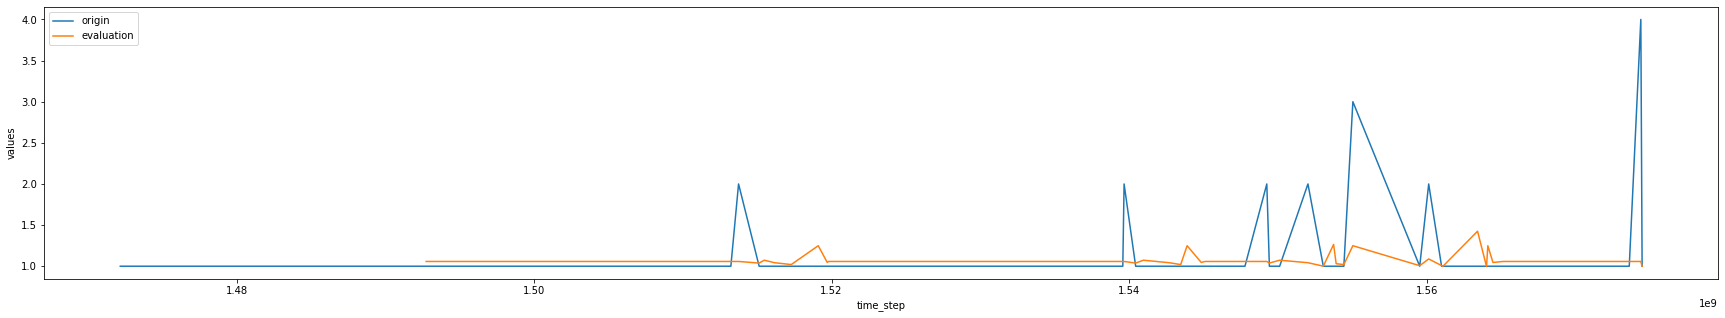

In [164]:
predict_plot_branch('angular_tf_branch.csv')

{'times': array([1.4503320e+09, 1.4679540e+09, 1.4777172e+09, 1.4781492e+09,
       1.4973300e+09, 1.5003540e+09, 1.5046740e+09, 1.5160824e+09,
       1.5170328e+09, 1.5179832e+09, 1.5180696e+09, 1.5204024e+09,
       1.5204888e+09, 1.5208308e+09, 1.5211764e+09, 1.5248052e+09,
       1.5273108e+09, 1.5301620e+09, 1.5302484e+09, 1.5320628e+09,
       1.5339636e+09, 1.5365556e+09, 1.5372468e+09, 1.5382836e+09,
       1.5453720e+09, 1.5464952e+09, 1.5507288e+09, 1.5509016e+09,
       1.5528852e+09, 1.5538356e+09, 1.5539220e+09, 1.5544404e+09,
       1.5592788e+09, 1.5603156e+09, 1.5612660e+09, 1.5652404e+09,
       1.5659316e+09, 1.5679188e+09, 1.5692148e+09, 1.5694740e+09,
       1.5698196e+09, 1.5725844e+09, 1.5726708e+09, 1.5742296e+09]), 'values': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1])}
INFO:tensorflow:Using default config.


INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Saeid\\AppData\\Local\\Temp\\tmp5us1wzkm', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000259B3F5E848>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Saeid\\AppData\\Local\\Temp\\tmp5us1wzkm', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000259B3F5E848>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Saeid\AppData\Local\Temp\tmp5us1wzkm\model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Saeid\AppData\Local\Temp\tmp5us1wzkm\model.ckpt.


INFO:tensorflow:loss = 1.2752684, step = 1


INFO:tensorflow:loss = 1.2752684, step = 1


INFO:tensorflow:global_step/sec: 295.168


INFO:tensorflow:global_step/sec: 295.168


INFO:tensorflow:loss = 1.7560065, step = 101 (0.345 sec)


INFO:tensorflow:loss = 1.7560065, step = 101 (0.345 sec)


INFO:tensorflow:global_step/sec: 653.998


INFO:tensorflow:global_step/sec: 653.998


INFO:tensorflow:loss = 0.93371046, step = 201 (0.150 sec)


INFO:tensorflow:loss = 0.93371046, step = 201 (0.150 sec)


INFO:tensorflow:global_step/sec: 730.379


INFO:tensorflow:global_step/sec: 730.379


INFO:tensorflow:loss = 1.1853213, step = 301 (0.139 sec)


INFO:tensorflow:loss = 1.1853213, step = 301 (0.139 sec)


INFO:tensorflow:global_step/sec: 730.384


INFO:tensorflow:global_step/sec: 730.384


INFO:tensorflow:loss = 0.83252174, step = 401 (0.135 sec)


INFO:tensorflow:loss = 0.83252174, step = 401 (0.135 sec)


INFO:tensorflow:global_step/sec: 725.085


INFO:tensorflow:global_step/sec: 725.085


INFO:tensorflow:loss = 0.9192207, step = 501 (0.138 sec)


INFO:tensorflow:loss = 0.9192207, step = 501 (0.138 sec)


INFO:tensorflow:global_step/sec: 699.734


INFO:tensorflow:global_step/sec: 699.734


INFO:tensorflow:loss = 0.922762, step = 601 (0.144 sec)


INFO:tensorflow:loss = 0.922762, step = 601 (0.144 sec)


INFO:tensorflow:global_step/sec: 714.729


INFO:tensorflow:global_step/sec: 714.729


INFO:tensorflow:loss = 1.277992, step = 701 (0.138 sec)


INFO:tensorflow:loss = 1.277992, step = 701 (0.138 sec)


INFO:tensorflow:global_step/sec: 719.868


INFO:tensorflow:global_step/sec: 719.868


INFO:tensorflow:loss = 1.7025104, step = 801 (0.140 sec)


INFO:tensorflow:loss = 1.7025104, step = 801 (0.140 sec)


INFO:tensorflow:global_step/sec: 709.656


INFO:tensorflow:global_step/sec: 709.656


INFO:tensorflow:loss = 0.7744391, step = 901 (0.141 sec)


INFO:tensorflow:loss = 0.7744391, step = 901 (0.141 sec)


INFO:tensorflow:global_step/sec: 709.652


INFO:tensorflow:global_step/sec: 709.652


INFO:tensorflow:loss = 1.2022537, step = 1001 (0.142 sec)


INFO:tensorflow:loss = 1.2022537, step = 1001 (0.142 sec)


INFO:tensorflow:global_step/sec: 680.7


INFO:tensorflow:global_step/sec: 680.7


INFO:tensorflow:loss = 0.50737154, step = 1101 (0.147 sec)


INFO:tensorflow:loss = 0.50737154, step = 1101 (0.147 sec)


INFO:tensorflow:global_step/sec: 699.734


INFO:tensorflow:global_step/sec: 699.734


INFO:tensorflow:loss = 1.0360415, step = 1201 (0.143 sec)


INFO:tensorflow:loss = 1.0360415, step = 1201 (0.143 sec)


INFO:tensorflow:global_step/sec: 694.869


INFO:tensorflow:global_step/sec: 694.869


INFO:tensorflow:loss = 1.0598207, step = 1301 (0.146 sec)


INFO:tensorflow:loss = 1.0598207, step = 1301 (0.146 sec)


INFO:tensorflow:global_step/sec: 699.738


INFO:tensorflow:global_step/sec: 699.738


INFO:tensorflow:loss = 1.2144477, step = 1401 (0.138 sec)


INFO:tensorflow:loss = 1.2144477, step = 1401 (0.138 sec)


INFO:tensorflow:global_step/sec: 709.659


INFO:tensorflow:global_step/sec: 709.659


INFO:tensorflow:loss = 0.8736217, step = 1501 (0.145 sec)


INFO:tensorflow:loss = 0.8736217, step = 1501 (0.145 sec)


INFO:tensorflow:global_step/sec: 662.661


INFO:tensorflow:global_step/sec: 662.661


INFO:tensorflow:loss = 1.3613954, step = 1601 (0.148 sec)


INFO:tensorflow:loss = 1.3613954, step = 1601 (0.148 sec)


INFO:tensorflow:global_step/sec: 685.358


INFO:tensorflow:global_step/sec: 685.358


INFO:tensorflow:loss = 1.2920024, step = 1701 (0.147 sec)


INFO:tensorflow:loss = 1.2920024, step = 1701 (0.147 sec)


INFO:tensorflow:global_step/sec: 653.993


INFO:tensorflow:global_step/sec: 653.993


INFO:tensorflow:loss = 0.54712313, step = 1801 (0.154 sec)


INFO:tensorflow:loss = 0.54712313, step = 1801 (0.154 sec)


INFO:tensorflow:global_step/sec: 680.699


INFO:tensorflow:global_step/sec: 680.699


INFO:tensorflow:loss = 1.2379751, step = 1901 (0.146 sec)


INFO:tensorflow:loss = 1.2379751, step = 1901 (0.146 sec)


INFO:tensorflow:global_step/sec: 709.652


INFO:tensorflow:global_step/sec: 709.652


INFO:tensorflow:loss = 0.5615201, step = 2001 (0.140 sec)


INFO:tensorflow:loss = 0.5615201, step = 2001 (0.140 sec)


INFO:tensorflow:global_step/sec: 633.305


INFO:tensorflow:global_step/sec: 633.305


INFO:tensorflow:loss = 1.3075275, step = 2101 (0.160 sec)


INFO:tensorflow:loss = 1.3075275, step = 2101 (0.160 sec)


INFO:tensorflow:global_step/sec: 719.873


INFO:tensorflow:global_step/sec: 719.873


INFO:tensorflow:loss = 0.9088214, step = 2201 (0.138 sec)


INFO:tensorflow:loss = 0.9088214, step = 2201 (0.138 sec)


INFO:tensorflow:global_step/sec: 719.872


INFO:tensorflow:global_step/sec: 719.872


INFO:tensorflow:loss = 0.7267131, step = 2301 (0.139 sec)


INFO:tensorflow:loss = 0.7267131, step = 2301 (0.139 sec)


INFO:tensorflow:global_step/sec: 719.867


INFO:tensorflow:global_step/sec: 719.867


INFO:tensorflow:loss = 0.5357361, step = 2401 (0.138 sec)


INFO:tensorflow:loss = 0.5357361, step = 2401 (0.138 sec)


INFO:tensorflow:global_step/sec: 568.533


INFO:tensorflow:global_step/sec: 568.533


INFO:tensorflow:loss = 0.36976135, step = 2501 (0.176 sec)


INFO:tensorflow:loss = 0.36976135, step = 2501 (0.176 sec)


INFO:tensorflow:global_step/sec: 680.686


INFO:tensorflow:global_step/sec: 680.686


INFO:tensorflow:loss = 1.1104119, step = 2601 (0.148 sec)


INFO:tensorflow:loss = 1.1104119, step = 2601 (0.148 sec)


INFO:tensorflow:global_step/sec: 676.093


INFO:tensorflow:global_step/sec: 676.093


INFO:tensorflow:loss = 0.59887403, step = 2701 (0.148 sec)


INFO:tensorflow:loss = 0.59887403, step = 2701 (0.148 sec)


INFO:tensorflow:global_step/sec: 704.674


INFO:tensorflow:global_step/sec: 704.674


INFO:tensorflow:loss = 1.1332479, step = 2801 (0.142 sec)


INFO:tensorflow:loss = 1.1332479, step = 2801 (0.142 sec)


INFO:tensorflow:global_step/sec: 685.352


INFO:tensorflow:global_step/sec: 685.352


INFO:tensorflow:loss = 0.398986, step = 2901 (0.146 sec)


INFO:tensorflow:loss = 0.398986, step = 2901 (0.146 sec)


INFO:tensorflow:global_step/sec: 671.555


INFO:tensorflow:global_step/sec: 671.555


INFO:tensorflow:loss = 0.91672575, step = 3001 (0.149 sec)


INFO:tensorflow:loss = 0.91672575, step = 3001 (0.149 sec)


INFO:tensorflow:global_step/sec: 658.303


INFO:tensorflow:global_step/sec: 658.303


INFO:tensorflow:loss = 0.04393324, step = 3101 (0.152 sec)


INFO:tensorflow:loss = 0.04393324, step = 3101 (0.152 sec)


INFO:tensorflow:global_step/sec: 694.87


INFO:tensorflow:global_step/sec: 694.87


INFO:tensorflow:loss = 0.8091491, step = 3201 (0.144 sec)


INFO:tensorflow:loss = 0.8091491, step = 3201 (0.144 sec)


INFO:tensorflow:global_step/sec: 637.34


INFO:tensorflow:global_step/sec: 637.34


INFO:tensorflow:loss = 1.2711986, step = 3301 (0.158 sec)


INFO:tensorflow:loss = 1.2711986, step = 3301 (0.158 sec)


INFO:tensorflow:global_step/sec: 680.693


INFO:tensorflow:global_step/sec: 680.693


INFO:tensorflow:loss = 0.40363172, step = 3401 (0.148 sec)


INFO:tensorflow:loss = 0.40363172, step = 3401 (0.148 sec)


INFO:tensorflow:global_step/sec: 667.076


INFO:tensorflow:global_step/sec: 667.076


INFO:tensorflow:loss = 1.3810486, step = 3501 (0.148 sec)


INFO:tensorflow:loss = 1.3810486, step = 3501 (0.148 sec)


INFO:tensorflow:global_step/sec: 690.082


INFO:tensorflow:global_step/sec: 690.082


INFO:tensorflow:loss = 0.7073334, step = 3601 (0.144 sec)


INFO:tensorflow:loss = 0.7073334, step = 3601 (0.144 sec)


INFO:tensorflow:global_step/sec: 746.733


INFO:tensorflow:global_step/sec: 746.733


INFO:tensorflow:loss = 0.98262817, step = 3701 (0.135 sec)


INFO:tensorflow:loss = 0.98262817, step = 3701 (0.135 sec)


INFO:tensorflow:global_step/sec: 690.085


INFO:tensorflow:global_step/sec: 690.085


INFO:tensorflow:loss = 0.8815764, step = 3801 (0.146 sec)


INFO:tensorflow:loss = 0.8815764, step = 3801 (0.146 sec)


INFO:tensorflow:global_step/sec: 704.657


INFO:tensorflow:global_step/sec: 704.657


INFO:tensorflow:loss = 0.37922156, step = 3901 (0.141 sec)


INFO:tensorflow:loss = 0.37922156, step = 3901 (0.141 sec)


INFO:tensorflow:global_step/sec: 676.095


INFO:tensorflow:global_step/sec: 676.095


INFO:tensorflow:loss = 1.3143486, step = 4001 (0.147 sec)


INFO:tensorflow:loss = 1.3143486, step = 4001 (0.147 sec)


INFO:tensorflow:global_step/sec: 704.662


INFO:tensorflow:global_step/sec: 704.662


INFO:tensorflow:loss = 0.5704793, step = 4101 (0.142 sec)


INFO:tensorflow:loss = 0.5704793, step = 4101 (0.142 sec)


INFO:tensorflow:global_step/sec: 667.079


INFO:tensorflow:global_step/sec: 667.079


INFO:tensorflow:loss = 0.41105348, step = 4201 (0.152 sec)


INFO:tensorflow:loss = 0.41105348, step = 4201 (0.152 sec)


INFO:tensorflow:global_step/sec: 633.3


INFO:tensorflow:global_step/sec: 633.3


INFO:tensorflow:loss = 0.77519995, step = 4301 (0.157 sec)


INFO:tensorflow:loss = 0.77519995, step = 4301 (0.157 sec)


INFO:tensorflow:global_step/sec: 699.736


INFO:tensorflow:global_step/sec: 699.736


INFO:tensorflow:loss = 1.2999787, step = 4401 (0.142 sec)


INFO:tensorflow:loss = 1.2999787, step = 4401 (0.142 sec)


INFO:tensorflow:global_step/sec: 694.869


INFO:tensorflow:global_step/sec: 694.869


INFO:tensorflow:loss = 0.9055221, step = 4501 (0.145 sec)


INFO:tensorflow:loss = 0.9055221, step = 4501 (0.145 sec)


INFO:tensorflow:global_step/sec: 680.697


INFO:tensorflow:global_step/sec: 680.697


INFO:tensorflow:loss = 1.2215105, step = 4601 (0.147 sec)


INFO:tensorflow:loss = 1.2215105, step = 4601 (0.147 sec)


INFO:tensorflow:global_step/sec: 758.046


INFO:tensorflow:global_step/sec: 758.046


INFO:tensorflow:loss = 0.2539447, step = 4701 (0.131 sec)


INFO:tensorflow:loss = 0.2539447, step = 4701 (0.131 sec)


INFO:tensorflow:global_step/sec: 709.66


INFO:tensorflow:global_step/sec: 709.66


INFO:tensorflow:loss = 1.3892181, step = 4801 (0.142 sec)


INFO:tensorflow:loss = 1.3892181, step = 4801 (0.142 sec)


INFO:tensorflow:global_step/sec: 769.706


INFO:tensorflow:global_step/sec: 769.706


INFO:tensorflow:loss = -0.32447276, step = 4901 (0.129 sec)


INFO:tensorflow:loss = -0.32447276, step = 4901 (0.129 sec)


INFO:tensorflow:global_step/sec: 714.725


INFO:tensorflow:global_step/sec: 714.725


INFO:tensorflow:loss = 0.18698199, step = 5001 (0.141 sec)


INFO:tensorflow:loss = 0.18698199, step = 5001 (0.141 sec)


INFO:tensorflow:global_step/sec: 699.739


INFO:tensorflow:global_step/sec: 699.739


INFO:tensorflow:loss = 1.4715885, step = 5101 (0.143 sec)


INFO:tensorflow:loss = 1.4715885, step = 5101 (0.143 sec)


INFO:tensorflow:global_step/sec: 667.076


INFO:tensorflow:global_step/sec: 667.076


INFO:tensorflow:loss = 0.08196373, step = 5201 (0.150 sec)


INFO:tensorflow:loss = 0.08196373, step = 5201 (0.150 sec)


INFO:tensorflow:global_step/sec: 641.423


INFO:tensorflow:global_step/sec: 641.423


INFO:tensorflow:loss = 0.303404, step = 5301 (0.160 sec)


INFO:tensorflow:loss = 0.303404, step = 5301 (0.160 sec)


INFO:tensorflow:global_step/sec: 709.656


INFO:tensorflow:global_step/sec: 709.656


INFO:tensorflow:loss = 0.20722242, step = 5401 (0.138 sec)


INFO:tensorflow:loss = 0.20722242, step = 5401 (0.138 sec)


INFO:tensorflow:global_step/sec: 758.048


INFO:tensorflow:global_step/sec: 758.048


INFO:tensorflow:loss = 1.1220169, step = 5501 (0.131 sec)


INFO:tensorflow:loss = 1.1220169, step = 5501 (0.131 sec)


INFO:tensorflow:global_step/sec: 725.086


INFO:tensorflow:global_step/sec: 725.086


INFO:tensorflow:loss = 0.66568065, step = 5601 (0.138 sec)


INFO:tensorflow:loss = 0.66568065, step = 5601 (0.138 sec)


INFO:tensorflow:global_step/sec: 787.889


INFO:tensorflow:global_step/sec: 787.889


INFO:tensorflow:loss = 0.39225906, step = 5701 (0.127 sec)


INFO:tensorflow:loss = 0.39225906, step = 5701 (0.127 sec)


INFO:tensorflow:global_step/sec: 654


INFO:tensorflow:global_step/sec: 654


INFO:tensorflow:loss = 0.95888674, step = 5801 (0.153 sec)


INFO:tensorflow:loss = 0.95888674, step = 5801 (0.153 sec)


INFO:tensorflow:global_step/sec: 730.365


INFO:tensorflow:global_step/sec: 730.365


INFO:tensorflow:loss = 1.1626046, step = 5901 (0.137 sec)


INFO:tensorflow:loss = 1.1626046, step = 5901 (0.137 sec)


INFO:tensorflow:Saving checkpoints for 6000 into C:\Users\Saeid\AppData\Local\Temp\tmp5us1wzkm\model.ckpt.


INFO:tensorflow:Saving checkpoints for 6000 into C:\Users\Saeid\AppData\Local\Temp\tmp5us1wzkm\model.ckpt.


INFO:tensorflow:Loss for final step: 0.85819805.


INFO:tensorflow:Loss for final step: 0.85819805.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2019-11-24T20:25:44Z


INFO:tensorflow:Starting evaluation at 2019-11-24T20:25:44Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmp5us1wzkm\model.ckpt-6000


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmp5us1wzkm\model.ckpt-6000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Evaluation [100/1000]


INFO:tensorflow:Evaluation [100/1000]


INFO:tensorflow:Evaluation [200/1000]


INFO:tensorflow:Evaluation [200/1000]


INFO:tensorflow:Evaluation [300/1000]


INFO:tensorflow:Evaluation [300/1000]


INFO:tensorflow:Evaluation [400/1000]


INFO:tensorflow:Evaluation [400/1000]


INFO:tensorflow:Evaluation [500/1000]


INFO:tensorflow:Evaluation [500/1000]


INFO:tensorflow:Evaluation [600/1000]


INFO:tensorflow:Evaluation [600/1000]


INFO:tensorflow:Evaluation [700/1000]


INFO:tensorflow:Evaluation [700/1000]


INFO:tensorflow:Evaluation [800/1000]


INFO:tensorflow:Evaluation [800/1000]


INFO:tensorflow:Evaluation [900/1000]


INFO:tensorflow:Evaluation [900/1000]


INFO:tensorflow:Evaluation [1000/1000]


INFO:tensorflow:Evaluation [1000/1000]


INFO:tensorflow:Finished evaluation at 2019-11-24-20:25:49


INFO:tensorflow:Finished evaluation at 2019-11-24-20:25:49


INFO:tensorflow:Saving dict for global step 6000: average_loss = 1.8348112, covariance = [[[3.4408587e-01]
  [3.4408587e-01]
  [3.4408587e-01]
  [3.4408587e-01]
  [3.4408587e-01]
  [3.4408587e-01]
  [1.4335039e+00]
  [1.9306710e-02]
  [1.0460630e-02]
  [5.4672595e-02]
  [1.8941577e-03]
  [1.5511810e-05]
  [3.4408587e-01]
  [3.4408587e-01]
  [1.4335039e+00]
  [1.9306710e-02]
  [1.0460630e-02]
  [5.4672595e-02]
  [1.8941577e-03]
  [1.5511810e-05]
  [3.4408587e-01]
  [3.4408587e-01]
  [3.4408587e-01]
  [3.4408587e-01]
  [3.4408587e-01]
  [1.4335039e+00]
  [1.9306710e-02]
  [1.0460630e-02]
  [5.4672595e-02]
  [1.8941577e-03]
  [1.5511810e-05]
  [3.4408587e-01]
  [3.4408587e-01]
  [1.4335039e+00]
  [3.3509853e-01]
  [3.2933720e-05]
  [5.0530285e-05]
  [4.7821315e-05]]], global_step = 6000, loss = 1.8348112, mean = [[[1.0550961 ]
  [1.0550961 ]
  [1.0550961 ]
  [1.0550961 ]
  [1.0550961 ]
  [1.0550961 ]
  [1.1569359 ]
  [1.0394156 ]
  [1.0417744 ]
  [1.0361667 ]
  [0.97589374]
  [1.0012745 ]

INFO:tensorflow:Saving dict for global step 6000: average_loss = 1.8348112, covariance = [[[3.4408587e-01]
  [3.4408587e-01]
  [3.4408587e-01]
  [3.4408587e-01]
  [3.4408587e-01]
  [3.4408587e-01]
  [1.4335039e+00]
  [1.9306710e-02]
  [1.0460630e-02]
  [5.4672595e-02]
  [1.8941577e-03]
  [1.5511810e-05]
  [3.4408587e-01]
  [3.4408587e-01]
  [1.4335039e+00]
  [1.9306710e-02]
  [1.0460630e-02]
  [5.4672595e-02]
  [1.8941577e-03]
  [1.5511810e-05]
  [3.4408587e-01]
  [3.4408587e-01]
  [3.4408587e-01]
  [3.4408587e-01]
  [3.4408587e-01]
  [1.4335039e+00]
  [1.9306710e-02]
  [1.0460630e-02]
  [5.4672595e-02]
  [1.8941577e-03]
  [1.5511810e-05]
  [3.4408587e-01]
  [3.4408587e-01]
  [1.4335039e+00]
  [3.3509853e-01]
  [3.2933720e-05]
  [5.0530285e-05]
  [4.7821315e-05]]], global_step = 6000, loss = 1.8348112, mean = [[[1.0550961 ]
  [1.0550961 ]
  [1.0550961 ]
  [1.0550961 ]
  [1.0550961 ]
  [1.0550961 ]
  [1.1569359 ]
  [1.0394156 ]
  [1.0417744 ]
  [1.0361667 ]
  [0.97589374]
  [1.0012745 ]

INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6000: C:\Users\Saeid\AppData\Local\Temp\tmp5us1wzkm\model.ckpt-6000


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6000: C:\Users\Saeid\AppData\Local\Temp\tmp5us1wzkm\model.ckpt-6000


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmp5us1wzkm\model.ckpt-6000


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmp5us1wzkm\model.ckpt-6000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


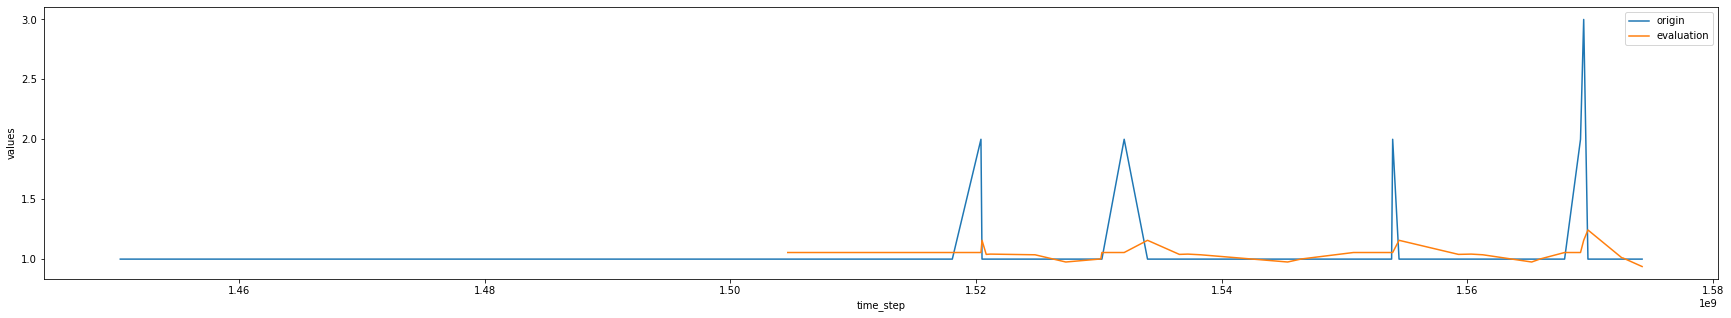

In [165]:
predict_plot_branch('material_tf_branch.csv')

{'times': array([1.4956884e+09, 1.4980212e+09, 1.5017364e+09, 1.5034644e+09,
       1.5162552e+09, 1.5179832e+09, 1.5235956e+09, 1.5281748e+09,
       1.5282612e+09, 1.5350004e+09, 1.5432120e+09, 1.5467544e+09,
       1.5469272e+09, 1.5489144e+09, 1.5505560e+09, 1.5542676e+09,
       1.5553044e+09, 1.5572052e+09, 1.5591060e+09, 1.5614388e+09,
       1.5644628e+09, 1.5655860e+09, 1.5658452e+09, 1.5740568e+09,
       1.5741432e+09, 1.5742296e+09, 1.5744024e+09, 1.5744888e+09]), 'values': array([1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 5, 4])}
INFO:tensorflow:Using default config.


INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Saeid\\AppData\\Local\\Temp\\tmpy82l8a9y', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000259B5401D08>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Saeid\\AppData\\Local\\Temp\\tmpy82l8a9y', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000259B5401D08>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Saeid\AppData\Local\Temp\tmpy82l8a9y\model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Saeid\AppData\Local\Temp\tmpy82l8a9y\model.ckpt.


INFO:tensorflow:loss = 2.1969442, step = 1


INFO:tensorflow:loss = 2.1969442, step = 1


INFO:tensorflow:global_step/sec: 331.33


INFO:tensorflow:global_step/sec: 331.33


INFO:tensorflow:loss = 2.4244277, step = 101 (0.305 sec)


INFO:tensorflow:loss = 2.4244277, step = 101 (0.305 sec)


INFO:tensorflow:global_step/sec: 690.085


INFO:tensorflow:global_step/sec: 690.085


INFO:tensorflow:loss = 1.256844, step = 201 (0.145 sec)


INFO:tensorflow:loss = 1.256844, step = 201 (0.145 sec)


INFO:tensorflow:global_step/sec: 714.728


INFO:tensorflow:global_step/sec: 714.728


INFO:tensorflow:loss = 1.7106757, step = 301 (0.140 sec)


INFO:tensorflow:loss = 1.7106757, step = 301 (0.140 sec)


INFO:tensorflow:global_step/sec: 741.196


INFO:tensorflow:global_step/sec: 741.196


INFO:tensorflow:loss = 1.2409465, step = 401 (0.138 sec)


INFO:tensorflow:loss = 1.2409465, step = 401 (0.138 sec)


INFO:tensorflow:global_step/sec: 709.658


INFO:tensorflow:global_step/sec: 709.658


INFO:tensorflow:loss = 1.0678163, step = 501 (0.138 sec)


INFO:tensorflow:loss = 1.0678163, step = 501 (0.138 sec)


INFO:tensorflow:global_step/sec: 654.002


INFO:tensorflow:global_step/sec: 654.002


INFO:tensorflow:loss = 1.0891023, step = 601 (0.153 sec)


INFO:tensorflow:loss = 1.0891023, step = 601 (0.153 sec)


INFO:tensorflow:global_step/sec: 658.303


INFO:tensorflow:global_step/sec: 658.303


INFO:tensorflow:loss = 1.1932596, step = 701 (0.153 sec)


INFO:tensorflow:loss = 1.1932596, step = 701 (0.153 sec)


INFO:tensorflow:global_step/sec: 741.19


INFO:tensorflow:global_step/sec: 741.19


INFO:tensorflow:loss = 1.1662927, step = 801 (0.133 sec)


INFO:tensorflow:loss = 1.1662927, step = 801 (0.133 sec)


INFO:tensorflow:global_step/sec: 649.756


INFO:tensorflow:global_step/sec: 649.756


INFO:tensorflow:loss = 1.2392504, step = 901 (0.156 sec)


INFO:tensorflow:loss = 1.2392504, step = 901 (0.156 sec)


INFO:tensorflow:global_step/sec: 735.747


INFO:tensorflow:global_step/sec: 735.747


INFO:tensorflow:loss = 1.407185, step = 1001 (0.136 sec)


INFO:tensorflow:loss = 1.407185, step = 1001 (0.136 sec)


INFO:tensorflow:global_step/sec: 680.696


INFO:tensorflow:global_step/sec: 680.696


INFO:tensorflow:loss = 1.0743256, step = 1101 (0.147 sec)


INFO:tensorflow:loss = 1.0743256, step = 1101 (0.147 sec)


INFO:tensorflow:global_step/sec: 690.082


INFO:tensorflow:global_step/sec: 690.082


INFO:tensorflow:loss = 1.0636494, step = 1201 (0.145 sec)


INFO:tensorflow:loss = 1.0636494, step = 1201 (0.145 sec)


INFO:tensorflow:global_step/sec: 676.094


INFO:tensorflow:global_step/sec: 676.094


INFO:tensorflow:loss = 1.0121046, step = 1301 (0.147 sec)


INFO:tensorflow:loss = 1.0121046, step = 1301 (0.147 sec)


INFO:tensorflow:global_step/sec: 699.734


INFO:tensorflow:global_step/sec: 699.734


INFO:tensorflow:loss = 1.1082424, step = 1401 (0.143 sec)


INFO:tensorflow:loss = 1.1082424, step = 1401 (0.143 sec)


INFO:tensorflow:global_step/sec: 658.302


INFO:tensorflow:global_step/sec: 658.302


INFO:tensorflow:loss = 1.1316118, step = 1501 (0.152 sec)


INFO:tensorflow:loss = 1.1316118, step = 1501 (0.152 sec)


INFO:tensorflow:global_step/sec: 676.094


INFO:tensorflow:global_step/sec: 676.094


INFO:tensorflow:loss = 0.83340204, step = 1601 (0.148 sec)


INFO:tensorflow:loss = 0.83340204, step = 1601 (0.148 sec)


INFO:tensorflow:global_step/sec: 658.302


INFO:tensorflow:global_step/sec: 658.302


INFO:tensorflow:loss = 0.8573005, step = 1701 (0.152 sec)


INFO:tensorflow:loss = 0.8573005, step = 1701 (0.152 sec)


INFO:tensorflow:global_step/sec: 671.546


INFO:tensorflow:global_step/sec: 671.546


INFO:tensorflow:loss = 1.2889628, step = 1801 (0.148 sec)


INFO:tensorflow:loss = 1.2889628, step = 1801 (0.148 sec)


INFO:tensorflow:global_step/sec: 699.74


INFO:tensorflow:global_step/sec: 699.74


INFO:tensorflow:loss = 1.0616124, step = 1901 (0.144 sec)


INFO:tensorflow:loss = 1.0616124, step = 1901 (0.144 sec)


INFO:tensorflow:global_step/sec: 676.093


INFO:tensorflow:global_step/sec: 676.093


INFO:tensorflow:loss = 1.3702198, step = 2001 (0.148 sec)


INFO:tensorflow:loss = 1.3702198, step = 2001 (0.148 sec)


INFO:tensorflow:global_step/sec: 787.897


INFO:tensorflow:global_step/sec: 787.897


INFO:tensorflow:loss = 1.1523819, step = 2101 (0.126 sec)


INFO:tensorflow:loss = 1.1523819, step = 2101 (0.126 sec)


INFO:tensorflow:global_step/sec: 676.091


INFO:tensorflow:global_step/sec: 676.091


INFO:tensorflow:loss = 0.86031836, step = 2201 (0.149 sec)


INFO:tensorflow:loss = 0.86031836, step = 2201 (0.149 sec)


INFO:tensorflow:global_step/sec: 685.356


INFO:tensorflow:global_step/sec: 685.356


INFO:tensorflow:loss = 1.1446319, step = 2301 (0.147 sec)


INFO:tensorflow:loss = 1.1446319, step = 2301 (0.147 sec)


INFO:tensorflow:global_step/sec: 645.558


INFO:tensorflow:global_step/sec: 645.558


INFO:tensorflow:loss = 1.330086, step = 2401 (0.154 sec)


INFO:tensorflow:loss = 1.330086, step = 2401 (0.154 sec)


INFO:tensorflow:global_step/sec: 714.725


INFO:tensorflow:global_step/sec: 714.725


INFO:tensorflow:loss = 0.9473022, step = 2501 (0.139 sec)


INFO:tensorflow:loss = 0.9473022, step = 2501 (0.139 sec)


INFO:tensorflow:global_step/sec: 699.74


INFO:tensorflow:global_step/sec: 699.74


INFO:tensorflow:loss = 1.4000536, step = 2601 (0.146 sec)


INFO:tensorflow:loss = 1.4000536, step = 2601 (0.146 sec)


INFO:tensorflow:global_step/sec: 730.369


INFO:tensorflow:global_step/sec: 730.369


INFO:tensorflow:loss = 1.1772704, step = 2701 (0.135 sec)


INFO:tensorflow:loss = 1.1772704, step = 2701 (0.135 sec)


INFO:tensorflow:global_step/sec: 633.311


INFO:tensorflow:global_step/sec: 633.311


INFO:tensorflow:loss = 1.2446802, step = 2801 (0.157 sec)


INFO:tensorflow:loss = 1.2446802, step = 2801 (0.157 sec)


INFO:tensorflow:global_step/sec: 676.094


INFO:tensorflow:global_step/sec: 676.094


INFO:tensorflow:loss = 0.74189496, step = 2901 (0.148 sec)


INFO:tensorflow:loss = 0.74189496, step = 2901 (0.148 sec)


INFO:tensorflow:global_step/sec: 680.691


INFO:tensorflow:global_step/sec: 680.691


INFO:tensorflow:loss = 1.1387453, step = 3001 (0.148 sec)


INFO:tensorflow:loss = 1.1387453, step = 3001 (0.148 sec)


INFO:tensorflow:global_step/sec: 704.662


INFO:tensorflow:global_step/sec: 704.662


INFO:tensorflow:loss = 0.7840466, step = 3101 (0.141 sec)


INFO:tensorflow:loss = 0.7840466, step = 3101 (0.141 sec)


INFO:tensorflow:global_step/sec: 671.558


INFO:tensorflow:global_step/sec: 671.558


INFO:tensorflow:loss = 1.0308084, step = 3201 (0.150 sec)


INFO:tensorflow:loss = 1.0308084, step = 3201 (0.150 sec)


INFO:tensorflow:global_step/sec: 631.615


INFO:tensorflow:global_step/sec: 631.615


INFO:tensorflow:loss = 1.2976687, step = 3301 (0.158 sec)


INFO:tensorflow:loss = 1.2976687, step = 3301 (0.158 sec)


INFO:tensorflow:global_step/sec: 711.787


INFO:tensorflow:global_step/sec: 711.787


INFO:tensorflow:loss = 0.5971787, step = 3401 (0.142 sec)


INFO:tensorflow:loss = 0.5971787, step = 3401 (0.142 sec)


INFO:tensorflow:global_step/sec: 662.663


INFO:tensorflow:global_step/sec: 662.663


INFO:tensorflow:loss = 0.915751, step = 3501 (0.151 sec)


INFO:tensorflow:loss = 0.915751, step = 3501 (0.151 sec)


INFO:tensorflow:global_step/sec: 725.075


INFO:tensorflow:global_step/sec: 725.075


INFO:tensorflow:loss = 0.9895979, step = 3601 (0.137 sec)


INFO:tensorflow:loss = 0.9895979, step = 3601 (0.137 sec)


INFO:tensorflow:global_step/sec: 685.361


INFO:tensorflow:global_step/sec: 685.361


INFO:tensorflow:loss = 0.32588044, step = 3701 (0.146 sec)


INFO:tensorflow:loss = 0.32588044, step = 3701 (0.146 sec)


INFO:tensorflow:global_step/sec: 794.138


INFO:tensorflow:global_step/sec: 794.138


INFO:tensorflow:loss = 1.5785161, step = 3801 (0.127 sec)


INFO:tensorflow:loss = 1.5785161, step = 3801 (0.127 sec)


INFO:tensorflow:global_step/sec: 699.736


INFO:tensorflow:global_step/sec: 699.736


INFO:tensorflow:loss = 1.3916665, step = 3901 (0.142 sec)


INFO:tensorflow:loss = 1.3916665, step = 3901 (0.142 sec)


INFO:tensorflow:global_step/sec: 709.665


INFO:tensorflow:global_step/sec: 709.665


INFO:tensorflow:loss = 1.4306104, step = 4001 (0.140 sec)


INFO:tensorflow:loss = 1.4306104, step = 4001 (0.140 sec)


INFO:tensorflow:global_step/sec: 685.354


INFO:tensorflow:global_step/sec: 685.354


INFO:tensorflow:loss = 1.1224331, step = 4101 (0.147 sec)


INFO:tensorflow:loss = 1.1224331, step = 4101 (0.147 sec)


INFO:tensorflow:global_step/sec: 725.086


INFO:tensorflow:global_step/sec: 725.086


INFO:tensorflow:loss = 1.1449187, step = 4201 (0.138 sec)


INFO:tensorflow:loss = 1.1449187, step = 4201 (0.138 sec)


INFO:tensorflow:global_step/sec: 606.434


INFO:tensorflow:global_step/sec: 606.434


INFO:tensorflow:loss = 0.9143469, step = 4301 (0.164 sec)


INFO:tensorflow:loss = 0.9143469, step = 4301 (0.164 sec)


INFO:tensorflow:global_step/sec: 725.086


INFO:tensorflow:global_step/sec: 725.086


INFO:tensorflow:loss = 0.9065291, step = 4401 (0.139 sec)


INFO:tensorflow:loss = 0.9065291, step = 4401 (0.139 sec)


INFO:tensorflow:global_step/sec: 704.662


INFO:tensorflow:global_step/sec: 704.662


INFO:tensorflow:loss = 1.3133118, step = 4501 (0.142 sec)


INFO:tensorflow:loss = 1.3133118, step = 4501 (0.142 sec)


INFO:tensorflow:global_step/sec: 667.079


INFO:tensorflow:global_step/sec: 667.079


INFO:tensorflow:loss = 0.8508175, step = 4601 (0.150 sec)


INFO:tensorflow:loss = 0.8508175, step = 4601 (0.150 sec)


INFO:tensorflow:global_step/sec: 685.355


INFO:tensorflow:global_step/sec: 685.355


INFO:tensorflow:loss = 1.2309605, step = 4701 (0.147 sec)


INFO:tensorflow:loss = 1.2309605, step = 4701 (0.147 sec)


INFO:tensorflow:global_step/sec: 621.495


INFO:tensorflow:global_step/sec: 621.495


INFO:tensorflow:loss = 0.55975705, step = 4801 (0.161 sec)


INFO:tensorflow:loss = 0.55975705, step = 4801 (0.161 sec)


INFO:tensorflow:global_step/sec: 714.733


INFO:tensorflow:global_step/sec: 714.733


INFO:tensorflow:loss = 0.2730506, step = 4901 (0.140 sec)


INFO:tensorflow:loss = 0.2730506, step = 4901 (0.140 sec)


INFO:tensorflow:global_step/sec: 654


INFO:tensorflow:global_step/sec: 654


INFO:tensorflow:loss = 1.135755, step = 5001 (0.157 sec)


INFO:tensorflow:loss = 1.135755, step = 5001 (0.157 sec)


INFO:tensorflow:global_step/sec: 633.306


INFO:tensorflow:global_step/sec: 633.306


INFO:tensorflow:loss = 1.3037803, step = 5101 (0.153 sec)


INFO:tensorflow:loss = 1.3037803, step = 5101 (0.153 sec)


INFO:tensorflow:global_step/sec: 676.095


INFO:tensorflow:global_step/sec: 676.095


INFO:tensorflow:loss = 0.71393716, step = 5201 (0.148 sec)


INFO:tensorflow:loss = 0.71393716, step = 5201 (0.148 sec)


INFO:tensorflow:global_step/sec: 662.658


INFO:tensorflow:global_step/sec: 662.658


INFO:tensorflow:loss = 1.0156215, step = 5301 (0.151 sec)


INFO:tensorflow:loss = 1.0156215, step = 5301 (0.151 sec)


INFO:tensorflow:global_step/sec: 667.08


INFO:tensorflow:global_step/sec: 667.08


INFO:tensorflow:loss = 0.743308, step = 5401 (0.150 sec)


INFO:tensorflow:loss = 0.743308, step = 5401 (0.150 sec)


INFO:tensorflow:global_step/sec: 685.358


INFO:tensorflow:global_step/sec: 685.358


INFO:tensorflow:loss = 0.9536578, step = 5501 (0.145 sec)


INFO:tensorflow:loss = 0.9536578, step = 5501 (0.145 sec)


INFO:tensorflow:global_step/sec: 645.558


INFO:tensorflow:global_step/sec: 645.558


INFO:tensorflow:loss = 0.6853465, step = 5601 (0.156 sec)


INFO:tensorflow:loss = 0.6853465, step = 5601 (0.156 sec)


INFO:tensorflow:global_step/sec: 676.094


INFO:tensorflow:global_step/sec: 676.094


INFO:tensorflow:loss = 1.027256, step = 5701 (0.147 sec)


INFO:tensorflow:loss = 1.027256, step = 5701 (0.147 sec)


INFO:tensorflow:global_step/sec: 667.076


INFO:tensorflow:global_step/sec: 667.076


INFO:tensorflow:loss = 0.80135715, step = 5801 (0.151 sec)


INFO:tensorflow:loss = 0.80135715, step = 5801 (0.151 sec)


INFO:tensorflow:global_step/sec: 680.7


INFO:tensorflow:global_step/sec: 680.7


INFO:tensorflow:loss = 0.46142, step = 5901 (0.147 sec)


INFO:tensorflow:loss = 0.46142, step = 5901 (0.147 sec)


INFO:tensorflow:Saving checkpoints for 6000 into C:\Users\Saeid\AppData\Local\Temp\tmpy82l8a9y\model.ckpt.


INFO:tensorflow:Saving checkpoints for 6000 into C:\Users\Saeid\AppData\Local\Temp\tmpy82l8a9y\model.ckpt.


INFO:tensorflow:Loss for final step: 0.88809305.


INFO:tensorflow:Loss for final step: 0.88809305.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2019-11-24T20:26:03Z


INFO:tensorflow:Starting evaluation at 2019-11-24T20:26:03Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmpy82l8a9y\model.ckpt-6000


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmpy82l8a9y\model.ckpt-6000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Evaluation [100/1000]


INFO:tensorflow:Evaluation [100/1000]


INFO:tensorflow:Evaluation [200/1000]


INFO:tensorflow:Evaluation [200/1000]


INFO:tensorflow:Evaluation [300/1000]


INFO:tensorflow:Evaluation [300/1000]


INFO:tensorflow:Evaluation [400/1000]


INFO:tensorflow:Evaluation [400/1000]


INFO:tensorflow:Evaluation [500/1000]


INFO:tensorflow:Evaluation [500/1000]


INFO:tensorflow:Evaluation [600/1000]


INFO:tensorflow:Evaluation [600/1000]


INFO:tensorflow:Evaluation [700/1000]


INFO:tensorflow:Evaluation [700/1000]


INFO:tensorflow:Evaluation [800/1000]


INFO:tensorflow:Evaluation [800/1000]


INFO:tensorflow:Evaluation [900/1000]


INFO:tensorflow:Evaluation [900/1000]


INFO:tensorflow:Evaluation [1000/1000]


INFO:tensorflow:Evaluation [1000/1000]


INFO:tensorflow:Finished evaluation at 2019-11-24-20:26:07


INFO:tensorflow:Finished evaluation at 2019-11-24-20:26:07


INFO:tensorflow:Saving dict for global step 6000: average_loss = 0.8847524, covariance = [[[7.5569924e-04]
  [7.0055056e+00]
  [5.8912921e-01]
  [6.7169391e-02]
  [7.1334471e-05]
  [7.0055056e+00]
  [5.8912921e-01]
  [4.6753615e-02]
  [1.6687175e-02]
  [1.7677979e-01]
  [1.7677979e-01]
  [1.7677979e-01]
  [1.7677979e-01]
  [1.7677979e-01]
  [1.7677979e-01]
  [1.7677979e-01]
  [1.7677979e-01]
  [1.7677979e-01]
  [2.5397372e-01]
  [7.5569924e-04]
  [7.0055056e+00]
  [2.5097792e+00]]], global_step = 6000, loss = 0.8847524, mean = [[[1.000835 ]
  [2.1878638]
  [1.6882726]
  [1.1315492]
  [0.9997969]
  [2.1878638]
  [1.6882726]
  [0.8920859]
  [1.0426464]
  [1.0436844]
  [1.0436844]
  [1.0436844]
  [1.0436844]
  [1.0436844]
  [1.0436844]
  [1.0436844]
  [1.0436844]
  [1.0436844]
  [1.2831476]
  [1.000835 ]
  [2.1878638]
  [2.6461256]]], observed = [[[1.]
  [1.]
  [2.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [2.]
  [1.]
  [1.]
  [5.

INFO:tensorflow:Saving dict for global step 6000: average_loss = 0.8847524, covariance = [[[7.5569924e-04]
  [7.0055056e+00]
  [5.8912921e-01]
  [6.7169391e-02]
  [7.1334471e-05]
  [7.0055056e+00]
  [5.8912921e-01]
  [4.6753615e-02]
  [1.6687175e-02]
  [1.7677979e-01]
  [1.7677979e-01]
  [1.7677979e-01]
  [1.7677979e-01]
  [1.7677979e-01]
  [1.7677979e-01]
  [1.7677979e-01]
  [1.7677979e-01]
  [1.7677979e-01]
  [2.5397372e-01]
  [7.5569924e-04]
  [7.0055056e+00]
  [2.5097792e+00]]], global_step = 6000, loss = 0.8847524, mean = [[[1.000835 ]
  [2.1878638]
  [1.6882726]
  [1.1315492]
  [0.9997969]
  [2.1878638]
  [1.6882726]
  [0.8920859]
  [1.0426464]
  [1.0436844]
  [1.0436844]
  [1.0436844]
  [1.0436844]
  [1.0436844]
  [1.0436844]
  [1.0436844]
  [1.0436844]
  [1.0436844]
  [1.2831476]
  [1.000835 ]
  [2.1878638]
  [2.6461256]]], observed = [[[1.]
  [1.]
  [2.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [2.]
  [1.]
  [1.]
  [5.

INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6000: C:\Users\Saeid\AppData\Local\Temp\tmpy82l8a9y\model.ckpt-6000


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6000: C:\Users\Saeid\AppData\Local\Temp\tmpy82l8a9y\model.ckpt-6000


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmpy82l8a9y\model.ckpt-6000


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmpy82l8a9y\model.ckpt-6000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


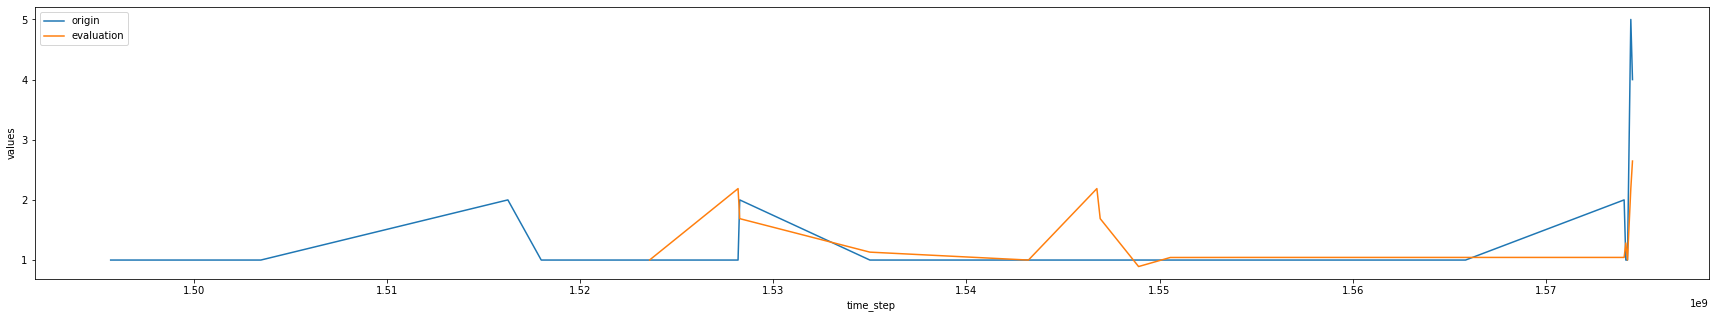

In [166]:
predict_plot_branch('angular_cli_tf_branch.csv')

{'times': array([1.4823864e+09, 1.4917140e+09, 1.4919732e+09, 1.4969844e+09,
       1.4981076e+09, 1.5279156e+09, 1.5593652e+09, 1.5743160e+09]), 'values': array([1, 1, 1, 1, 1, 1, 1, 2])}
INFO:tensorflow:Using default config.


INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Saeid\\AppData\\Local\\Temp\\tmpvixalcbi', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000259B1CD8688>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Saeid\\AppData\\Local\\Temp\\tmpvixalcbi', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000259B1CD8688>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Saeid\AppData\Local\Temp\tmpvixalcbi\model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Saeid\AppData\Local\Temp\tmpvixalcbi\model.ckpt.


INFO:tensorflow:loss = 4.941083, step = 1


INFO:tensorflow:loss = 4.941083, step = 1


INFO:tensorflow:global_step/sec: 280.284


INFO:tensorflow:global_step/sec: 280.284


INFO:tensorflow:loss = 1.7136923, step = 101 (0.362 sec)


INFO:tensorflow:loss = 1.7136923, step = 101 (0.362 sec)


INFO:tensorflow:global_step/sec: 568.535


INFO:tensorflow:global_step/sec: 568.535


INFO:tensorflow:loss = 1.69336, step = 201 (0.175 sec)


INFO:tensorflow:loss = 1.69336, step = 201 (0.175 sec)


INFO:tensorflow:global_step/sec: 478.766


INFO:tensorflow:global_step/sec: 478.766


INFO:tensorflow:loss = 1.6841071, step = 301 (0.210 sec)


INFO:tensorflow:loss = 1.6841071, step = 301 (0.210 sec)


INFO:tensorflow:global_step/sec: 535.089


INFO:tensorflow:global_step/sec: 535.089


INFO:tensorflow:loss = 1.6696318, step = 401 (0.187 sec)


INFO:tensorflow:loss = 1.6696318, step = 401 (0.187 sec)


INFO:tensorflow:global_step/sec: 523.884


INFO:tensorflow:global_step/sec: 523.884


INFO:tensorflow:loss = 1.6729134, step = 501 (0.191 sec)


INFO:tensorflow:loss = 1.6729134, step = 501 (0.191 sec)


INFO:tensorflow:global_step/sec: 526.637


INFO:tensorflow:global_step/sec: 526.637


INFO:tensorflow:loss = 1.678468, step = 601 (0.190 sec)


INFO:tensorflow:loss = 1.678468, step = 601 (0.190 sec)


INFO:tensorflow:global_step/sec: 543.819


INFO:tensorflow:global_step/sec: 543.819


INFO:tensorflow:loss = 1.6738833, step = 701 (0.183 sec)


INFO:tensorflow:loss = 1.6738833, step = 701 (0.183 sec)


INFO:tensorflow:global_step/sec: 535.091


INFO:tensorflow:global_step/sec: 535.091


INFO:tensorflow:loss = 1.6720606, step = 801 (0.188 sec)


INFO:tensorflow:loss = 1.6720606, step = 801 (0.188 sec)


INFO:tensorflow:global_step/sec: 452.771


INFO:tensorflow:global_step/sec: 452.771


INFO:tensorflow:loss = 1.6721319, step = 901 (0.221 sec)


INFO:tensorflow:loss = 1.6721319, step = 901 (0.221 sec)


INFO:tensorflow:global_step/sec: 467.574


INFO:tensorflow:global_step/sec: 467.574


INFO:tensorflow:loss = 1.6728524, step = 1001 (0.215 sec)


INFO:tensorflow:loss = 1.6728524, step = 1001 (0.215 sec)


INFO:tensorflow:global_step/sec: 552.831


INFO:tensorflow:global_step/sec: 552.831


INFO:tensorflow:loss = 1.6728755, step = 1101 (0.181 sec)


INFO:tensorflow:loss = 1.6728755, step = 1101 (0.181 sec)


INFO:tensorflow:global_step/sec: 510.521


INFO:tensorflow:global_step/sec: 510.521


INFO:tensorflow:loss = 1.6709468, step = 1201 (0.195 sec)


INFO:tensorflow:loss = 1.6709468, step = 1201 (0.195 sec)


INFO:tensorflow:global_step/sec: 540.873


INFO:tensorflow:global_step/sec: 540.873


INFO:tensorflow:loss = 1.6789647, step = 1301 (0.183 sec)


INFO:tensorflow:loss = 1.6789647, step = 1301 (0.183 sec)


INFO:tensorflow:global_step/sec: 521.154


INFO:tensorflow:global_step/sec: 521.154


INFO:tensorflow:loss = 1.673278, step = 1401 (0.193 sec)


INFO:tensorflow:loss = 1.673278, step = 1401 (0.193 sec)


INFO:tensorflow:global_step/sec: 515.785


INFO:tensorflow:global_step/sec: 515.785


INFO:tensorflow:loss = 1.673837, step = 1501 (0.193 sec)


INFO:tensorflow:loss = 1.673837, step = 1501 (0.193 sec)


INFO:tensorflow:global_step/sec: 518.455


INFO:tensorflow:global_step/sec: 518.455


INFO:tensorflow:loss = 1.6789306, step = 1601 (0.194 sec)


INFO:tensorflow:loss = 1.6789306, step = 1601 (0.194 sec)


INFO:tensorflow:global_step/sec: 459


INFO:tensorflow:global_step/sec: 459


INFO:tensorflow:loss = 1.6761161, step = 1701 (0.219 sec)


INFO:tensorflow:loss = 1.6761161, step = 1701 (0.219 sec)


INFO:tensorflow:global_step/sec: 515.78


INFO:tensorflow:global_step/sec: 515.78


INFO:tensorflow:loss = 1.6750557, step = 1801 (0.195 sec)


INFO:tensorflow:loss = 1.6750557, step = 1801 (0.195 sec)


INFO:tensorflow:global_step/sec: 490.502


INFO:tensorflow:global_step/sec: 490.502


INFO:tensorflow:loss = 1.6745092, step = 1901 (0.210 sec)


INFO:tensorflow:loss = 1.6745092, step = 1901 (0.210 sec)


INFO:tensorflow:global_step/sec: 436.951


INFO:tensorflow:global_step/sec: 436.951


INFO:tensorflow:loss = 1.6792237, step = 2001 (0.226 sec)


INFO:tensorflow:loss = 1.6792237, step = 2001 (0.226 sec)


INFO:tensorflow:global_step/sec: 518.455


INFO:tensorflow:global_step/sec: 518.455


INFO:tensorflow:loss = 1.6759163, step = 2101 (0.189 sec)


INFO:tensorflow:loss = 1.6759163, step = 2101 (0.189 sec)


INFO:tensorflow:global_step/sec: 465.403


INFO:tensorflow:global_step/sec: 465.403


INFO:tensorflow:loss = 1.6751015, step = 2201 (0.214 sec)


INFO:tensorflow:loss = 1.6751015, step = 2201 (0.214 sec)


INFO:tensorflow:global_step/sec: 507.928


INFO:tensorflow:global_step/sec: 507.928


INFO:tensorflow:loss = 1.6679121, step = 2301 (0.196 sec)


INFO:tensorflow:loss = 1.6679121, step = 2301 (0.196 sec)


INFO:tensorflow:global_step/sec: 521.156


INFO:tensorflow:global_step/sec: 521.156


INFO:tensorflow:loss = 1.6724875, step = 2401 (0.198 sec)


INFO:tensorflow:loss = 1.6724875, step = 2401 (0.198 sec)


INFO:tensorflow:global_step/sec: 492.916


INFO:tensorflow:global_step/sec: 492.916


INFO:tensorflow:loss = 1.674435, step = 2501 (0.200 sec)


INFO:tensorflow:loss = 1.674435, step = 2501 (0.200 sec)


INFO:tensorflow:global_step/sec: 523.885


INFO:tensorflow:global_step/sec: 523.885


INFO:tensorflow:loss = 1.6716784, step = 2601 (0.193 sec)


INFO:tensorflow:loss = 1.6716784, step = 2601 (0.193 sec)


INFO:tensorflow:global_step/sec: 500.311


INFO:tensorflow:global_step/sec: 500.311


INFO:tensorflow:loss = 1.6675495, step = 2701 (0.195 sec)


INFO:tensorflow:loss = 1.6675495, step = 2701 (0.195 sec)


INFO:tensorflow:global_step/sec: 515.785


INFO:tensorflow:global_step/sec: 515.785


INFO:tensorflow:loss = 1.6740166, step = 2801 (0.195 sec)


INFO:tensorflow:loss = 1.6740166, step = 2801 (0.195 sec)


INFO:tensorflow:global_step/sec: 483.392


INFO:tensorflow:global_step/sec: 483.392


INFO:tensorflow:loss = 1.6747099, step = 2901 (0.209 sec)


INFO:tensorflow:loss = 1.6747099, step = 2901 (0.209 sec)


INFO:tensorflow:global_step/sec: 492.915


INFO:tensorflow:global_step/sec: 492.915


INFO:tensorflow:loss = 1.6756854, step = 3001 (0.202 sec)


INFO:tensorflow:loss = 1.6756854, step = 3001 (0.202 sec)


INFO:tensorflow:global_step/sec: 485.735


INFO:tensorflow:global_step/sec: 485.735


INFO:tensorflow:loss = 1.6749958, step = 3101 (0.207 sec)


INFO:tensorflow:loss = 1.6749958, step = 3101 (0.207 sec)


INFO:tensorflow:global_step/sec: 478.766


INFO:tensorflow:global_step/sec: 478.766


INFO:tensorflow:loss = 1.674265, step = 3201 (0.208 sec)


INFO:tensorflow:loss = 1.674265, step = 3201 (0.208 sec)


INFO:tensorflow:global_step/sec: 513.134


INFO:tensorflow:global_step/sec: 513.134


INFO:tensorflow:loss = 1.6743805, step = 3301 (0.198 sec)


INFO:tensorflow:loss = 1.6743805, step = 3301 (0.198 sec)


INFO:tensorflow:global_step/sec: 510.523


INFO:tensorflow:global_step/sec: 510.523


INFO:tensorflow:loss = 1.6793835, step = 3401 (0.193 sec)


INFO:tensorflow:loss = 1.6793835, step = 3401 (0.193 sec)


INFO:tensorflow:global_step/sec: 526.636


INFO:tensorflow:global_step/sec: 526.636


INFO:tensorflow:loss = 1.6691844, step = 3501 (0.191 sec)


INFO:tensorflow:loss = 1.6691844, step = 3501 (0.191 sec)


INFO:tensorflow:global_step/sec: 518.457


INFO:tensorflow:global_step/sec: 518.457


INFO:tensorflow:loss = 1.6742738, step = 3601 (0.196 sec)


INFO:tensorflow:loss = 1.6742738, step = 3601 (0.196 sec)


INFO:tensorflow:global_step/sec: 471.992


INFO:tensorflow:global_step/sec: 471.992


INFO:tensorflow:loss = 1.6731819, step = 3701 (0.208 sec)


INFO:tensorflow:loss = 1.6731819, step = 3701 (0.208 sec)


INFO:tensorflow:global_step/sec: 502.824


INFO:tensorflow:global_step/sec: 502.824


INFO:tensorflow:loss = 1.6716092, step = 3801 (0.197 sec)


INFO:tensorflow:loss = 1.6716092, step = 3801 (0.197 sec)


INFO:tensorflow:global_step/sec: 478.766


INFO:tensorflow:global_step/sec: 478.766


INFO:tensorflow:loss = 1.6725336, step = 3901 (0.213 sec)


INFO:tensorflow:loss = 1.6725336, step = 3901 (0.213 sec)


INFO:tensorflow:global_step/sec: 461.112


INFO:tensorflow:global_step/sec: 461.112


INFO:tensorflow:loss = 1.6737915, step = 4001 (0.216 sec)


INFO:tensorflow:loss = 1.6737915, step = 4001 (0.216 sec)


INFO:tensorflow:global_step/sec: 513.135


INFO:tensorflow:global_step/sec: 513.135


INFO:tensorflow:loss = 1.6771722, step = 4101 (0.193 sec)


INFO:tensorflow:loss = 1.6771722, step = 4101 (0.193 sec)


INFO:tensorflow:global_step/sec: 465.409


INFO:tensorflow:global_step/sec: 465.409


INFO:tensorflow:loss = 1.6778443, step = 4201 (0.217 sec)


INFO:tensorflow:loss = 1.6778443, step = 4201 (0.217 sec)


INFO:tensorflow:global_step/sec: 488.105


INFO:tensorflow:global_step/sec: 488.105


INFO:tensorflow:loss = 1.6649307, step = 4301 (0.210 sec)


INFO:tensorflow:loss = 1.6649307, step = 4301 (0.210 sec)


INFO:tensorflow:global_step/sec: 497.82


INFO:tensorflow:global_step/sec: 497.82


INFO:tensorflow:loss = 1.6663159, step = 4401 (0.196 sec)


INFO:tensorflow:loss = 1.6663159, step = 4401 (0.196 sec)


INFO:tensorflow:global_step/sec: 483.39


INFO:tensorflow:global_step/sec: 483.39


INFO:tensorflow:loss = 1.6732002, step = 4501 (0.206 sec)


INFO:tensorflow:loss = 1.6732002, step = 4501 (0.206 sec)


INFO:tensorflow:global_step/sec: 495.357


INFO:tensorflow:global_step/sec: 495.357


INFO:tensorflow:loss = 1.6732119, step = 4601 (0.201 sec)


INFO:tensorflow:loss = 1.6732119, step = 4601 (0.201 sec)


INFO:tensorflow:global_step/sec: 523.884


INFO:tensorflow:global_step/sec: 523.884


INFO:tensorflow:loss = 1.6746113, step = 4701 (0.190 sec)


INFO:tensorflow:loss = 1.6746113, step = 4701 (0.190 sec)


INFO:tensorflow:global_step/sec: 537.969


INFO:tensorflow:global_step/sec: 537.969


INFO:tensorflow:loss = 1.673145, step = 4801 (0.188 sec)


INFO:tensorflow:loss = 1.673145, step = 4801 (0.188 sec)


INFO:tensorflow:global_step/sec: 467.576


INFO:tensorflow:global_step/sec: 467.576


INFO:tensorflow:loss = 1.6754633, step = 4901 (0.214 sec)


INFO:tensorflow:loss = 1.6754633, step = 4901 (0.214 sec)


INFO:tensorflow:global_step/sec: 549.792


INFO:tensorflow:global_step/sec: 549.792


INFO:tensorflow:loss = 1.6684804, step = 5001 (0.183 sec)


INFO:tensorflow:loss = 1.6684804, step = 5001 (0.183 sec)


INFO:tensorflow:global_step/sec: 510.52


INFO:tensorflow:global_step/sec: 510.52


INFO:tensorflow:loss = 1.6757985, step = 5101 (0.195 sec)


INFO:tensorflow:loss = 1.6757985, step = 5101 (0.195 sec)


INFO:tensorflow:global_step/sec: 555.899


INFO:tensorflow:global_step/sec: 555.899


INFO:tensorflow:loss = 1.6731454, step = 5201 (0.180 sec)


INFO:tensorflow:loss = 1.6731454, step = 5201 (0.180 sec)


INFO:tensorflow:global_step/sec: 515.783


INFO:tensorflow:global_step/sec: 515.783


INFO:tensorflow:loss = 1.67421, step = 5301 (0.196 sec)


INFO:tensorflow:loss = 1.67421, step = 5301 (0.196 sec)


INFO:tensorflow:global_step/sec: 540.875


INFO:tensorflow:global_step/sec: 540.875


INFO:tensorflow:loss = 1.6747143, step = 5401 (0.183 sec)


INFO:tensorflow:loss = 1.6747143, step = 5401 (0.183 sec)


INFO:tensorflow:global_step/sec: 505.362


INFO:tensorflow:global_step/sec: 505.362


INFO:tensorflow:loss = 1.6727674, step = 5501 (0.198 sec)


INFO:tensorflow:loss = 1.6727674, step = 5501 (0.198 sec)


INFO:tensorflow:global_step/sec: 513.139


INFO:tensorflow:global_step/sec: 513.139


INFO:tensorflow:loss = 1.6769578, step = 5601 (0.197 sec)


INFO:tensorflow:loss = 1.6769578, step = 5601 (0.197 sec)


INFO:tensorflow:global_step/sec: 521.155


INFO:tensorflow:global_step/sec: 521.155


INFO:tensorflow:loss = 1.6667892, step = 5701 (0.188 sec)


INFO:tensorflow:loss = 1.6667892, step = 5701 (0.188 sec)


INFO:tensorflow:global_step/sec: 518.449


INFO:tensorflow:global_step/sec: 518.449


INFO:tensorflow:loss = 1.673474, step = 5801 (0.198 sec)


INFO:tensorflow:loss = 1.673474, step = 5801 (0.198 sec)


INFO:tensorflow:global_step/sec: 505.366


INFO:tensorflow:global_step/sec: 505.366


INFO:tensorflow:loss = 1.6721674, step = 5901 (0.197 sec)


INFO:tensorflow:loss = 1.6721674, step = 5901 (0.197 sec)


INFO:tensorflow:Saving checkpoints for 6000 into C:\Users\Saeid\AppData\Local\Temp\tmpvixalcbi\model.ckpt.


INFO:tensorflow:Saving checkpoints for 6000 into C:\Users\Saeid\AppData\Local\Temp\tmpvixalcbi\model.ckpt.


INFO:tensorflow:Loss for final step: 1.6769288.


INFO:tensorflow:Loss for final step: 1.6769288.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2019-11-24T20:26:24Z


INFO:tensorflow:Starting evaluation at 2019-11-24T20:26:24Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmpvixalcbi\model.ckpt-6000


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmpvixalcbi\model.ckpt-6000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Evaluation [100/1000]


INFO:tensorflow:Evaluation [100/1000]


INFO:tensorflow:Evaluation [200/1000]


INFO:tensorflow:Evaluation [200/1000]


INFO:tensorflow:Evaluation [300/1000]


INFO:tensorflow:Evaluation [300/1000]


INFO:tensorflow:Evaluation [400/1000]


INFO:tensorflow:Evaluation [400/1000]


INFO:tensorflow:Evaluation [500/1000]


INFO:tensorflow:Evaluation [500/1000]


INFO:tensorflow:Evaluation [600/1000]


INFO:tensorflow:Evaluation [600/1000]


INFO:tensorflow:Evaluation [700/1000]


INFO:tensorflow:Evaluation [700/1000]


INFO:tensorflow:Evaluation [800/1000]


INFO:tensorflow:Evaluation [800/1000]


INFO:tensorflow:Evaluation [900/1000]


INFO:tensorflow:Evaluation [900/1000]


INFO:tensorflow:Evaluation [1000/1000]


INFO:tensorflow:Evaluation [1000/1000]


INFO:tensorflow:Finished evaluation at 2019-11-24-20:26:26


INFO:tensorflow:Finished evaluation at 2019-11-24-20:26:26


INFO:tensorflow:Saving dict for global step 6000: average_loss = 1.6736709, covariance = [[[0.4997312]
  [0.4997312]]], global_step = 6000, loss = 1.6736709, mean = [[[1.4932642]
  [1.4932642]]], observed = [[[1.]
  [2.]]], start_tuple = (array([[1491973200, 1496984400, 1498107600, 1527915600, 1559365200,
        1574316000]], dtype=int64), array([[[-0.27756253],
        [-0.27756253],
        [-0.27756253],
        [-0.27756253],
        [-0.27756253],
        [ 3.602771  ]]], dtype=float32), array([], shape=(1, 6, 0), dtype=float32)), times = [[1559365200 1574316000]]


INFO:tensorflow:Saving dict for global step 6000: average_loss = 1.6736709, covariance = [[[0.4997312]
  [0.4997312]]], global_step = 6000, loss = 1.6736709, mean = [[[1.4932642]
  [1.4932642]]], observed = [[[1.]
  [2.]]], start_tuple = (array([[1491973200, 1496984400, 1498107600, 1527915600, 1559365200,
        1574316000]], dtype=int64), array([[[-0.27756253],
        [-0.27756253],
        [-0.27756253],
        [-0.27756253],
        [-0.27756253],
        [ 3.602771  ]]], dtype=float32), array([], shape=(1, 6, 0), dtype=float32)), times = [[1559365200 1574316000]]


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6000: C:\Users\Saeid\AppData\Local\Temp\tmpvixalcbi\model.ckpt-6000


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6000: C:\Users\Saeid\AppData\Local\Temp\tmpvixalcbi\model.ckpt-6000


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmpvixalcbi\model.ckpt-6000


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmpvixalcbi\model.ckpt-6000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


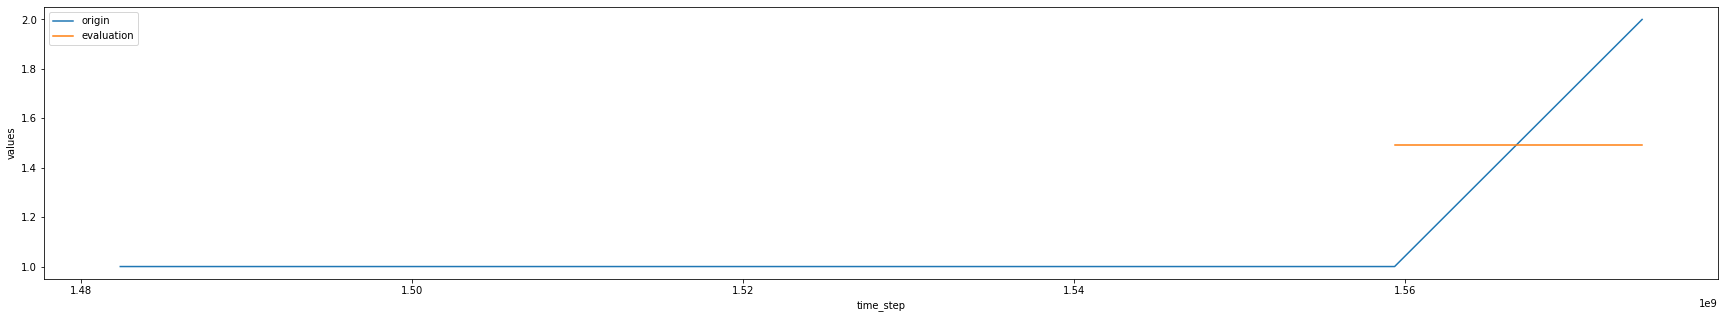

In [167]:
predict_plot_branch('googleMaps_tf_branch.csv')

{'times': array([1.3207320e+09, 1.3613400e+09, 1.3663476e+09, 1.3688532e+09,
       1.3733460e+09, 1.3892472e+09, 1.3904568e+09, 1.3933944e+09,
       1.3934808e+09, 1.3939128e+09, 1.3955508e+09, 1.3964148e+09,
       1.4027220e+09, 1.4041044e+09, 1.4101524e+09, 1.4130900e+09,
       1.4134356e+09, 1.4160312e+09, 1.4193144e+09, 1.4464440e+09,
       1.4471352e+09, 1.5172056e+09, 1.5693876e+09, 1.5742296e+09]), 'values': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1])}
INFO:tensorflow:Using default config.


INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Saeid\\AppData\\Local\\Temp\\tmp3b07fwjn', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000259B70B1B48>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Saeid\\AppData\\Local\\Temp\\tmp3b07fwjn', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000259B70B1B48>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Saeid\AppData\Local\Temp\tmp3b07fwjn\model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Saeid\AppData\Local\Temp\tmp3b07fwjn\model.ckpt.


INFO:tensorflow:loss = 3.217319, step = 1


INFO:tensorflow:loss = 3.217319, step = 1


INFO:tensorflow:global_step/sec: 259.901


INFO:tensorflow:global_step/sec: 259.901


INFO:tensorflow:loss = 1.0786846, step = 101 (0.388 sec)


INFO:tensorflow:loss = 1.0786846, step = 101 (0.388 sec)


INFO:tensorflow:global_step/sec: 629.318


INFO:tensorflow:global_step/sec: 629.318


INFO:tensorflow:loss = 1.2096833, step = 201 (0.157 sec)


INFO:tensorflow:loss = 1.2096833, step = 201 (0.157 sec)


INFO:tensorflow:global_step/sec: 763.835


INFO:tensorflow:global_step/sec: 763.835


INFO:tensorflow:loss = 1.2351655, step = 301 (0.131 sec)


INFO:tensorflow:loss = 1.2351655, step = 301 (0.131 sec)


INFO:tensorflow:global_step/sec: 741.198


INFO:tensorflow:global_step/sec: 741.198


INFO:tensorflow:loss = 1.074703, step = 401 (0.136 sec)


INFO:tensorflow:loss = 1.074703, step = 401 (0.136 sec)


INFO:tensorflow:global_step/sec: 680.69


INFO:tensorflow:global_step/sec: 680.69


INFO:tensorflow:loss = 0.16689397, step = 501 (0.147 sec)


INFO:tensorflow:loss = 0.16689397, step = 501 (0.147 sec)


INFO:tensorflow:global_step/sec: 775.676


INFO:tensorflow:global_step/sec: 775.676


INFO:tensorflow:loss = 0.97700036, step = 601 (0.129 sec)


INFO:tensorflow:loss = 0.97700036, step = 601 (0.129 sec)


INFO:tensorflow:global_step/sec: 704.663


INFO:tensorflow:global_step/sec: 704.663


INFO:tensorflow:loss = 1.1302333, step = 701 (0.142 sec)


INFO:tensorflow:loss = 1.1302333, step = 701 (0.142 sec)


INFO:tensorflow:global_step/sec: 690.078


INFO:tensorflow:global_step/sec: 690.078


INFO:tensorflow:loss = 1.3769597, step = 801 (0.145 sec)


INFO:tensorflow:loss = 1.3769597, step = 801 (0.145 sec)


INFO:tensorflow:global_step/sec: 690.08


INFO:tensorflow:global_step/sec: 690.08


INFO:tensorflow:loss = 1.2447029, step = 901 (0.145 sec)


INFO:tensorflow:loss = 1.2447029, step = 901 (0.145 sec)


INFO:tensorflow:global_step/sec: 725.091


INFO:tensorflow:global_step/sec: 725.091


INFO:tensorflow:loss = 0.9664248, step = 1001 (0.139 sec)


INFO:tensorflow:loss = 0.9664248, step = 1001 (0.139 sec)


INFO:tensorflow:global_step/sec: 714.727


INFO:tensorflow:global_step/sec: 714.727


INFO:tensorflow:loss = 1.0098861, step = 1101 (0.141 sec)


INFO:tensorflow:loss = 1.0098861, step = 1101 (0.141 sec)


INFO:tensorflow:global_step/sec: 676.093


INFO:tensorflow:global_step/sec: 676.093


INFO:tensorflow:loss = 0.69353515, step = 1201 (0.146 sec)


INFO:tensorflow:loss = 0.69353515, step = 1201 (0.146 sec)


INFO:tensorflow:global_step/sec: 653.999


INFO:tensorflow:global_step/sec: 653.999


INFO:tensorflow:loss = 0.6958674, step = 1301 (0.153 sec)


INFO:tensorflow:loss = 0.6958674, step = 1301 (0.153 sec)


INFO:tensorflow:global_step/sec: 709.659


INFO:tensorflow:global_step/sec: 709.659


INFO:tensorflow:loss = 1.1151513, step = 1401 (0.140 sec)


INFO:tensorflow:loss = 1.1151513, step = 1401 (0.140 sec)


INFO:tensorflow:global_step/sec: 690.08


INFO:tensorflow:global_step/sec: 690.08


INFO:tensorflow:loss = 0.9577546, step = 1501 (0.145 sec)


INFO:tensorflow:loss = 0.9577546, step = 1501 (0.145 sec)


INFO:tensorflow:global_step/sec: 714.729


INFO:tensorflow:global_step/sec: 714.729


INFO:tensorflow:loss = 1.0844016, step = 1601 (0.140 sec)


INFO:tensorflow:loss = 1.0844016, step = 1601 (0.140 sec)


INFO:tensorflow:global_step/sec: 714.731


INFO:tensorflow:global_step/sec: 714.731


INFO:tensorflow:loss = 0.39456043, step = 1701 (0.140 sec)


INFO:tensorflow:loss = 0.39456043, step = 1701 (0.140 sec)


INFO:tensorflow:global_step/sec: 694.871


INFO:tensorflow:global_step/sec: 694.871


INFO:tensorflow:loss = 0.096219115, step = 1801 (0.146 sec)


INFO:tensorflow:loss = 0.096219115, step = 1801 (0.146 sec)


INFO:tensorflow:global_step/sec: 699.736


INFO:tensorflow:global_step/sec: 699.736


INFO:tensorflow:loss = 0.7887402, step = 1901 (0.141 sec)


INFO:tensorflow:loss = 0.7887402, step = 1901 (0.141 sec)


INFO:tensorflow:global_step/sec: 699.729


INFO:tensorflow:global_step/sec: 699.729


INFO:tensorflow:loss = 0.3324956, step = 2001 (0.146 sec)


INFO:tensorflow:loss = 0.3324956, step = 2001 (0.146 sec)


INFO:tensorflow:global_step/sec: 667.073


INFO:tensorflow:global_step/sec: 667.073


INFO:tensorflow:loss = 1.3725026, step = 2101 (0.149 sec)


INFO:tensorflow:loss = 1.3725026, step = 2101 (0.149 sec)


INFO:tensorflow:global_step/sec: 690.089


INFO:tensorflow:global_step/sec: 690.089


INFO:tensorflow:loss = 0.7928502, step = 2201 (0.144 sec)


INFO:tensorflow:loss = 0.7928502, step = 2201 (0.144 sec)


INFO:tensorflow:global_step/sec: 633.304


INFO:tensorflow:global_step/sec: 633.304


INFO:tensorflow:loss = 1.9240432, step = 2301 (0.159 sec)


INFO:tensorflow:loss = 1.9240432, step = 2301 (0.159 sec)


INFO:tensorflow:global_step/sec: 637.337


INFO:tensorflow:global_step/sec: 637.337


INFO:tensorflow:loss = 0.3153162, step = 2401 (0.156 sec)


INFO:tensorflow:loss = 0.3153162, step = 2401 (0.156 sec)


INFO:tensorflow:global_step/sec: 653.988


INFO:tensorflow:global_step/sec: 653.988


INFO:tensorflow:loss = 0.9056817, step = 2501 (0.153 sec)


INFO:tensorflow:loss = 0.9056817, step = 2501 (0.153 sec)


INFO:tensorflow:global_step/sec: 585.162


INFO:tensorflow:global_step/sec: 585.162


INFO:tensorflow:loss = 0.6018028, step = 2601 (0.171 sec)


INFO:tensorflow:loss = 0.6018028, step = 2601 (0.171 sec)


INFO:tensorflow:global_step/sec: 694.877


INFO:tensorflow:global_step/sec: 694.877


INFO:tensorflow:loss = 1.0319777, step = 2701 (0.144 sec)


INFO:tensorflow:loss = 1.0319777, step = 2701 (0.144 sec)


INFO:tensorflow:global_step/sec: 658.306


INFO:tensorflow:global_step/sec: 658.306


INFO:tensorflow:loss = 1.2298548, step = 2801 (0.152 sec)


INFO:tensorflow:loss = 1.2298548, step = 2801 (0.152 sec)


INFO:tensorflow:global_step/sec: 667.077


INFO:tensorflow:global_step/sec: 667.077


INFO:tensorflow:loss = 0.91970134, step = 2901 (0.151 sec)


INFO:tensorflow:loss = 0.91970134, step = 2901 (0.151 sec)


INFO:tensorflow:global_step/sec: 629.319


INFO:tensorflow:global_step/sec: 629.319


INFO:tensorflow:loss = 0.6040563, step = 3001 (0.158 sec)


INFO:tensorflow:loss = 0.6040563, step = 3001 (0.158 sec)


INFO:tensorflow:global_step/sec: 610.136


INFO:tensorflow:global_step/sec: 610.136


INFO:tensorflow:loss = 0.917162, step = 3101 (0.166 sec)


INFO:tensorflow:loss = 0.917162, step = 3101 (0.166 sec)


INFO:tensorflow:global_step/sec: 633.301


INFO:tensorflow:global_step/sec: 633.301


INFO:tensorflow:loss = -0.0017091037, step = 3201 (0.157 sec)


INFO:tensorflow:loss = -0.0017091037, step = 3201 (0.157 sec)


INFO:tensorflow:global_step/sec: 662.663


INFO:tensorflow:global_step/sec: 662.663


INFO:tensorflow:loss = 0.6046905, step = 3301 (0.153 sec)


INFO:tensorflow:loss = 0.6046905, step = 3301 (0.153 sec)


INFO:tensorflow:global_step/sec: 694.872


INFO:tensorflow:global_step/sec: 694.872


INFO:tensorflow:loss = 0.60267305, step = 3401 (0.141 sec)


INFO:tensorflow:loss = 0.60267305, step = 3401 (0.141 sec)


INFO:tensorflow:global_step/sec: 658.304


INFO:tensorflow:global_step/sec: 658.304


INFO:tensorflow:loss = 1.0298431, step = 3501 (0.152 sec)


INFO:tensorflow:loss = 1.0298431, step = 3501 (0.152 sec)


INFO:tensorflow:global_step/sec: 610.13


INFO:tensorflow:global_step/sec: 610.13


INFO:tensorflow:loss = 0.27045536, step = 3601 (0.164 sec)


INFO:tensorflow:loss = 0.27045536, step = 3601 (0.164 sec)


INFO:tensorflow:global_step/sec: 671.558


INFO:tensorflow:global_step/sec: 671.558


INFO:tensorflow:loss = 0.28569353, step = 3701 (0.149 sec)


INFO:tensorflow:loss = 0.28569353, step = 3701 (0.149 sec)


INFO:tensorflow:global_step/sec: 662.663


INFO:tensorflow:global_step/sec: 662.663


INFO:tensorflow:loss = 0.8999438, step = 3801 (0.151 sec)


INFO:tensorflow:loss = 0.8999438, step = 3801 (0.151 sec)


INFO:tensorflow:global_step/sec: 667.08


INFO:tensorflow:global_step/sec: 667.08


INFO:tensorflow:loss = -0.029166121, step = 3901 (0.149 sec)


INFO:tensorflow:loss = -0.029166121, step = 3901 (0.149 sec)


INFO:tensorflow:global_step/sec: 662.659


INFO:tensorflow:global_step/sec: 662.659


INFO:tensorflow:loss = 0.26057702, step = 4001 (0.152 sec)


INFO:tensorflow:loss = 0.26057702, step = 4001 (0.152 sec)


INFO:tensorflow:global_step/sec: 658.299


INFO:tensorflow:global_step/sec: 658.299


INFO:tensorflow:loss = 0.2673664, step = 4101 (0.152 sec)


INFO:tensorflow:loss = 0.2673664, step = 4101 (0.152 sec)


INFO:tensorflow:global_step/sec: 719.873


INFO:tensorflow:global_step/sec: 719.873


INFO:tensorflow:loss = 0.8928285, step = 4201 (0.139 sec)


INFO:tensorflow:loss = 0.8928285, step = 4201 (0.139 sec)


INFO:tensorflow:global_step/sec: 629.319


INFO:tensorflow:global_step/sec: 629.319


INFO:tensorflow:loss = 0.22610128, step = 4301 (0.160 sec)


INFO:tensorflow:loss = 0.22610128, step = 4301 (0.160 sec)


INFO:tensorflow:global_step/sec: 599.174


INFO:tensorflow:global_step/sec: 599.174


INFO:tensorflow:loss = 1.6677344, step = 4401 (0.168 sec)


INFO:tensorflow:loss = 1.6677344, step = 4401 (0.168 sec)


INFO:tensorflow:global_step/sec: 699.728


INFO:tensorflow:global_step/sec: 699.728


INFO:tensorflow:loss = 0.88836086, step = 4501 (0.141 sec)


INFO:tensorflow:loss = 0.88836086, step = 4501 (0.141 sec)


INFO:tensorflow:global_step/sec: 714.731


INFO:tensorflow:global_step/sec: 714.731


INFO:tensorflow:loss = 0.2451364, step = 4601 (0.142 sec)


INFO:tensorflow:loss = 0.2451364, step = 4601 (0.142 sec)


INFO:tensorflow:global_step/sec: 735.754


INFO:tensorflow:global_step/sec: 735.754


INFO:tensorflow:loss = -0.7512959, step = 4701 (0.134 sec)


INFO:tensorflow:loss = -0.7512959, step = 4701 (0.134 sec)


INFO:tensorflow:global_step/sec: 714.726


INFO:tensorflow:global_step/sec: 714.726


INFO:tensorflow:loss = 0.5547456, step = 4801 (0.139 sec)


INFO:tensorflow:loss = 0.5547456, step = 4801 (0.139 sec)


INFO:tensorflow:global_step/sec: 685.189


INFO:tensorflow:global_step/sec: 685.189


INFO:tensorflow:loss = 0.87929547, step = 4901 (0.148 sec)


INFO:tensorflow:loss = 0.87929547, step = 4901 (0.148 sec)


INFO:tensorflow:global_step/sec: 699.903


INFO:tensorflow:global_step/sec: 699.903


INFO:tensorflow:loss = 1.0043072, step = 5001 (0.142 sec)


INFO:tensorflow:loss = 1.0043072, step = 5001 (0.142 sec)


INFO:tensorflow:global_step/sec: 725.086


INFO:tensorflow:global_step/sec: 725.086


INFO:tensorflow:loss = 1.2090117, step = 5101 (0.138 sec)


INFO:tensorflow:loss = 1.2090117, step = 5101 (0.138 sec)


INFO:tensorflow:global_step/sec: 758.05


INFO:tensorflow:global_step/sec: 758.05


INFO:tensorflow:loss = 0.8736671, step = 5201 (0.132 sec)


INFO:tensorflow:loss = 0.8736671, step = 5201 (0.132 sec)


INFO:tensorflow:global_step/sec: 662.661


INFO:tensorflow:global_step/sec: 662.661


INFO:tensorflow:loss = 0.20952636, step = 5301 (0.151 sec)


INFO:tensorflow:loss = 0.20952636, step = 5301 (0.151 sec)


INFO:tensorflow:global_step/sec: 699.733


INFO:tensorflow:global_step/sec: 699.733


INFO:tensorflow:loss = 0.19391955, step = 5401 (0.144 sec)


INFO:tensorflow:loss = 0.19391955, step = 5401 (0.144 sec)


INFO:tensorflow:global_step/sec: 752.344


INFO:tensorflow:global_step/sec: 752.344


INFO:tensorflow:loss = 1.6709945, step = 5501 (0.134 sec)


INFO:tensorflow:loss = 1.6709945, step = 5501 (0.134 sec)


INFO:tensorflow:global_step/sec: 690.081


INFO:tensorflow:global_step/sec: 690.081


INFO:tensorflow:loss = 1.3332994, step = 5601 (0.145 sec)


INFO:tensorflow:loss = 1.3332994, step = 5601 (0.145 sec)


INFO:tensorflow:global_step/sec: 714.729


INFO:tensorflow:global_step/sec: 714.729


INFO:tensorflow:loss = 0.18999241, step = 5701 (0.138 sec)


INFO:tensorflow:loss = 0.18999241, step = 5701 (0.138 sec)


INFO:tensorflow:global_step/sec: 709.66


INFO:tensorflow:global_step/sec: 709.66


INFO:tensorflow:loss = -0.3752534, step = 5801 (0.140 sec)


INFO:tensorflow:loss = -0.3752534, step = 5801 (0.140 sec)


INFO:tensorflow:global_step/sec: 662.662


INFO:tensorflow:global_step/sec: 662.662


INFO:tensorflow:loss = 0.9972766, step = 5901 (0.153 sec)


INFO:tensorflow:loss = 0.9972766, step = 5901 (0.153 sec)


INFO:tensorflow:Saving checkpoints for 6000 into C:\Users\Saeid\AppData\Local\Temp\tmp3b07fwjn\model.ckpt.


INFO:tensorflow:Saving checkpoints for 6000 into C:\Users\Saeid\AppData\Local\Temp\tmp3b07fwjn\model.ckpt.


INFO:tensorflow:Loss for final step: 0.5699769.


INFO:tensorflow:Loss for final step: 0.5699769.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2019-11-24T20:27:01Z


INFO:tensorflow:Starting evaluation at 2019-11-24T20:27:01Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmp3b07fwjn\model.ckpt-6000


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmp3b07fwjn\model.ckpt-6000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Evaluation [100/1000]


INFO:tensorflow:Evaluation [100/1000]


INFO:tensorflow:Evaluation [200/1000]


INFO:tensorflow:Evaluation [200/1000]


INFO:tensorflow:Evaluation [300/1000]


INFO:tensorflow:Evaluation [300/1000]


INFO:tensorflow:Evaluation [400/1000]


INFO:tensorflow:Evaluation [400/1000]


INFO:tensorflow:Evaluation [500/1000]


INFO:tensorflow:Evaluation [500/1000]


INFO:tensorflow:Evaluation [600/1000]


INFO:tensorflow:Evaluation [600/1000]


INFO:tensorflow:Evaluation [700/1000]


INFO:tensorflow:Evaluation [700/1000]


INFO:tensorflow:Evaluation [800/1000]


INFO:tensorflow:Evaluation [800/1000]


INFO:tensorflow:Evaluation [900/1000]


INFO:tensorflow:Evaluation [900/1000]


INFO:tensorflow:Evaluation [1000/1000]


INFO:tensorflow:Evaluation [1000/1000]


INFO:tensorflow:Finished evaluation at 2019-11-24-20:27:04


INFO:tensorflow:Finished evaluation at 2019-11-24-20:27:04


INFO:tensorflow:Saving dict for global step 6000: average_loss = 0.7485547, covariance = [[[1.372807e-01]
  [1.372807e-01]
  [1.372807e-01]
  [1.372807e-01]
  [1.372807e-01]
  [1.372807e-01]
  [1.372807e-01]
  [1.372807e-01]
  [1.372807e-01]
  [1.372807e-01]
  [1.372807e-01]
  [1.372807e-01]
  [1.372807e-01]
  [2.199103e-05]
  [9.221018e-06]
  [1.240160e-05]
  [9.300646e-06]
  [9.970441e-06]]], global_step = 6000, loss = 0.7485547, mean = [[[1.0775039 ]
  [1.0775039 ]
  [1.0775039 ]
  [1.0775039 ]
  [1.0775039 ]
  [1.0775039 ]
  [1.0775039 ]
  [1.0775039 ]
  [1.0775039 ]
  [1.0775039 ]
  [1.0775039 ]
  [1.0775039 ]
  [1.0775039 ]
  [1.0001011 ]
  [1.0017047 ]
  [1.0000509 ]
  [0.99846286]
  [0.9999903 ]]], observed = [[[1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [2.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]]], start_tuple = (array([[1419314400, 1446444000, 1447135200, 1517205600, 1569387600,
        1574229600]], dtype=int64), array([[[ 4.471795  ],
  

INFO:tensorflow:Saving dict for global step 6000: average_loss = 0.7485547, covariance = [[[1.372807e-01]
  [1.372807e-01]
  [1.372807e-01]
  [1.372807e-01]
  [1.372807e-01]
  [1.372807e-01]
  [1.372807e-01]
  [1.372807e-01]
  [1.372807e-01]
  [1.372807e-01]
  [1.372807e-01]
  [1.372807e-01]
  [1.372807e-01]
  [2.199103e-05]
  [9.221018e-06]
  [1.240160e-05]
  [9.300646e-06]
  [9.970441e-06]]], global_step = 6000, loss = 0.7485547, mean = [[[1.0775039 ]
  [1.0775039 ]
  [1.0775039 ]
  [1.0775039 ]
  [1.0775039 ]
  [1.0775039 ]
  [1.0775039 ]
  [1.0775039 ]
  [1.0775039 ]
  [1.0775039 ]
  [1.0775039 ]
  [1.0775039 ]
  [1.0775039 ]
  [1.0001011 ]
  [1.0017047 ]
  [1.0000509 ]
  [0.99846286]
  [0.9999903 ]]], observed = [[[1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [2.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]]], start_tuple = (array([[1419314400, 1446444000, 1447135200, 1517205600, 1569387600,
        1574229600]], dtype=int64), array([[[ 4.471795  ],
  

INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6000: C:\Users\Saeid\AppData\Local\Temp\tmp3b07fwjn\model.ckpt-6000


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6000: C:\Users\Saeid\AppData\Local\Temp\tmp3b07fwjn\model.ckpt-6000


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmp3b07fwjn\model.ckpt-6000


INFO:tensorflow:Restoring parameters from C:\Users\Saeid\AppData\Local\Temp\tmp3b07fwjn\model.ckpt-6000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


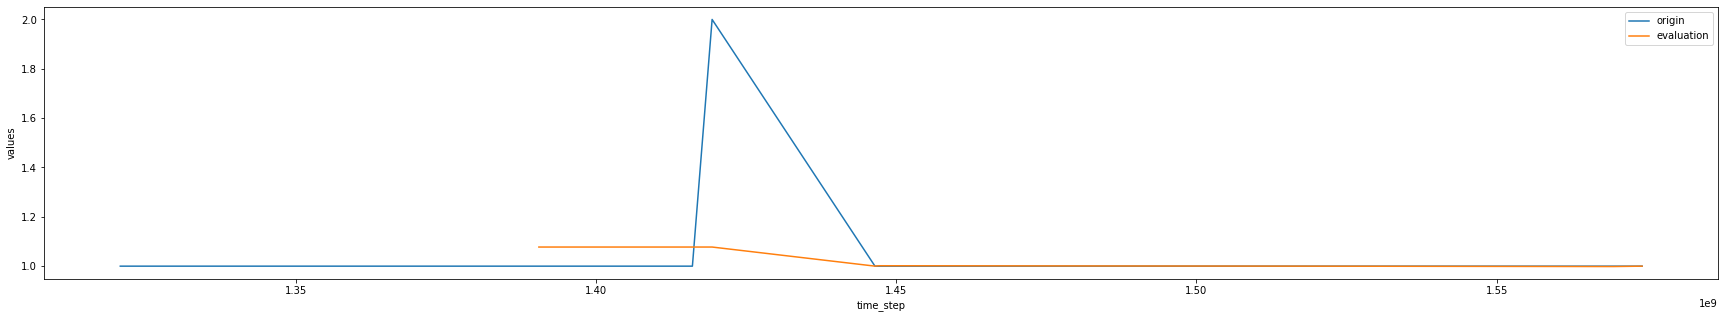

In [169]:
predict_plot_branch('d3_tf_branch.csv')